## Data Preparation

In [630]:
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil, glob, random
import numpy as np
import cv2
from PIL import Image

In [631]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [632]:
df= pd.read_csv('./data/car_imgs_4000.csv')
df.shape

(4000, 3)

In [370]:
df.head()

filename  perspective_score_hood  perspective_score_backdoor_left
0  66ee2d88-f403-4821-a370-8a3d72e200f9.jpg                    0.27                             0.44
1  bf7e237e-f12b-4ffc-8d79-6855cc35ea06.jpg                    0.00                             0.90
2  4c297488-c81f-464d-92bf-1c408333a912.jpg                    0.00                             0.90
3  6c95ad0b-fda6-42a8-a33d-b430073e1dcd.jpg                    0.00                             0.21
4  bd806d94-4c2e-4cd2-8e02-5eaba7c7c63e.jpg                    0.00                             0.82

In [633]:
df['perspective_score_hood']= round(df.perspective_score_hood, 2)
df['perspective_score_backdoor_left']= round(df.perspective_score_backdoor_left, 2)
df.head()

filename  perspective_score_hood  perspective_score_backdoor_left
0  66ee2d88-f403-4821-a370-8a3d72e200f9.jpg                    0.27                             0.44
1  bf7e237e-f12b-4ffc-8d79-6855cc35ea06.jpg                    0.00                             0.90
2  4c297488-c81f-464d-92bf-1c408333a912.jpg                    0.00                             0.90
3  6c95ad0b-fda6-42a8-a33d-b430073e1dcd.jpg                    0.00                             0.21
4  bd806d94-4c2e-4cd2-8e02-5eaba7c7c63e.jpg                    0.00                             0.82

In [379]:
df.shape

(4000, 3)

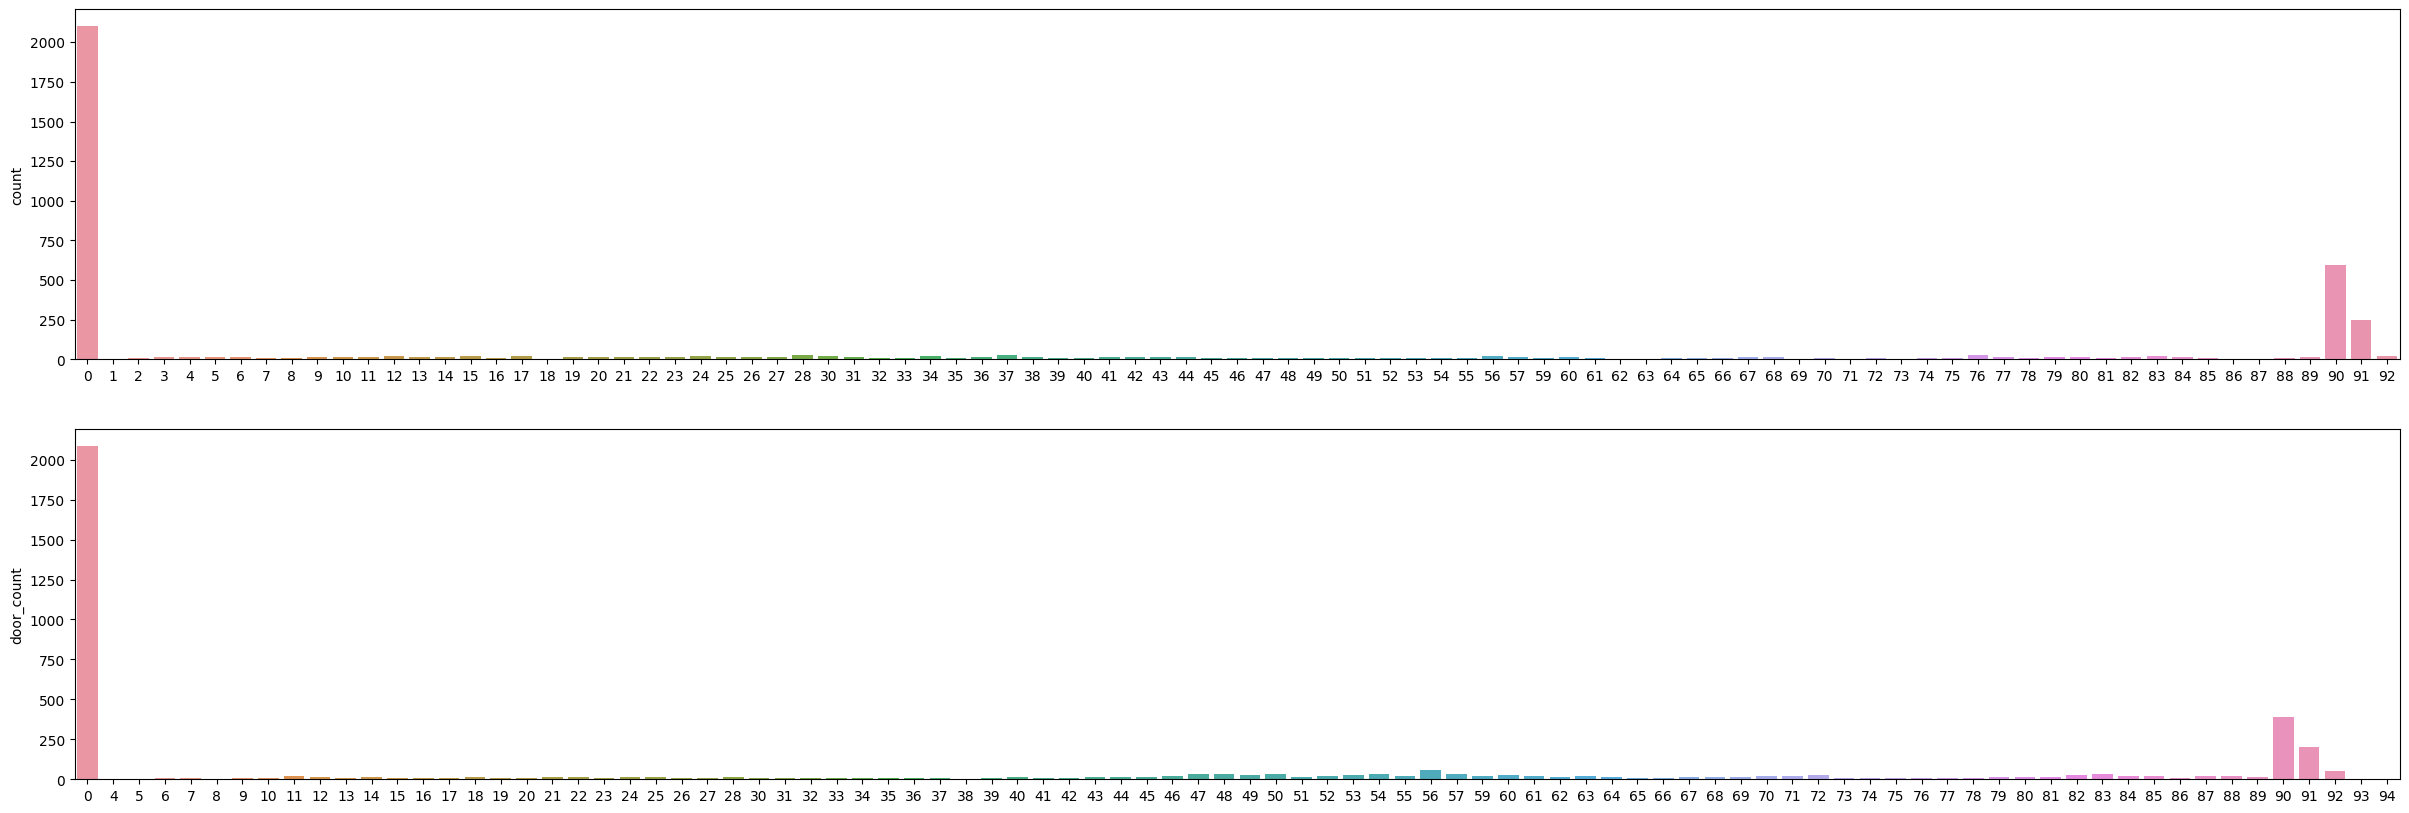

In [624]:
# show the class imbalance in the data
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(30,10))
sns.countplot((df.perspective_score_hood.values * 100).astype(int), ax= ax1)
plt.ylabel('hood_count');

sns.countplot((df.perspective_score_backdoor_left.values * 100).astype(int), ax= ax2)
plt.ylabel('door_count');


In [625]:
#df.perspective_score_backdoor_left.value_counts(normalize=False).sort_index(ascending=False)

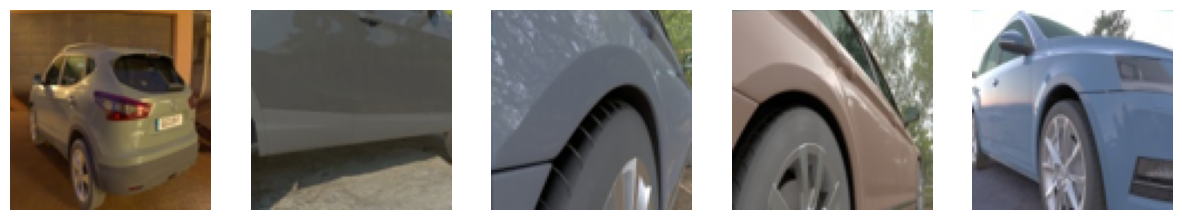

In [643]:
# show 5 samples of the croped images
src_dir= 'data/croped_imgs2/'
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    f= os.listdir(src_dir)[i]
    img_path= os.path.join(src_dir, f)
    #print(img_path)
    img= image.load_img(img_path)
    img= img.resize((90,90))
    img= image.img_to_array(img)/255.
    axes[i].imshow(img)
    axes[i].axis('off')
plt.show();


In [190]:
# show the classes with majority sample

#np.where(df.perspective_score_hood.value_counts(normalize=True) > 0.050)
#df[df.groupby('perspective_score_hood')['perspective_score_hood'].transform('size') > 0.50]
count= df.perspective_score_hood.value_counts(normalize=True)
df[df.perspective_score_hood.map(count >0.06)]['perspective_score_hood'].unique()

array([0.  , 0.9 , 0.91])

In [410]:
# mergeing classes into 5 to have enough samples per class for training
#classes ranges for modelling:
# 0 = 0.0 - 0.20
# 1 = 0.21 - 0.40
# 2 = 0.41 - 0.60
# 3 = 0.61 - 0.80
# 4 = 0.81 - 0.93

src_dir= './data/croped_imgs/'
save_dir= './data/merged_hood/'
class_0 = []
#missing= [i for i in set(df.perspective_score_hood.values) if str(i) not in os.listdir(save_dir)]

if not os.path.exists(save_dir):
    os.makedirs(save_dir, exist_ok=True)
for image in os.listdir(src_dir):
    for i in np.arange(0.91,0.92,0.01):
        i = round(i,2)
        for v, f in zip(df.perspective_score_hood.values, df.filename):
            if v == i and f in os.path.join(src_dir, image):
                #print(v)
                class_0.append([f, v])
                sub_dir= os.path.join(save_dir, str(5))
                os.makedirs(sub_dir, exist_ok= True)
                #print('*'*50)
                shutil.move(os.path.join(src_dir, f), os.path.join(sub_dir, f))
                print(f'moved from {os.path.join(src_dir, f)} to { os.path.join(sub_dir, f)}')

moved from ./data/croped_imgs/2c18b4af-b7f5-452d-ac67-6c190c2d291e.jpg to ./data/merged_hood/5/2c18b4af-b7f5-452d-ac67-6c190c2d291e.jpg
moved from ./data/croped_imgs/62596d11-c784-4ad9-bb71-5cd76b3c6f14.jpg to ./data/merged_hood/5/62596d11-c784-4ad9-bb71-5cd76b3c6f14.jpg
moved from ./data/croped_imgs/13a93ec5-06e3-429b-b43d-b278d0d0ceac.jpg to ./data/merged_hood/5/13a93ec5-06e3-429b-b43d-b278d0d0ceac.jpg
moved from ./data/croped_imgs/83dc6841-d721-44e4-a36a-581d6ce64aec.jpg to ./data/merged_hood/5/83dc6841-d721-44e4-a36a-581d6ce64aec.jpg
moved from ./data/croped_imgs/857d16f2-2914-4ed9-b930-5d576d82b94d.jpg to ./data/merged_hood/5/857d16f2-2914-4ed9-b930-5d576d82b94d.jpg
moved from ./data/croped_imgs/14b4a203-3f07-459f-b219-6c90409afc31.jpg to ./data/merged_hood/5/14b4a203-3f07-459f-b219-6c90409afc31.jpg
moved from ./data/croped_imgs/409d4673-b5d9-4de7-a39a-9d9758bce52d.jpg to ./data/merged_hood/5/409d4673-b5d9-4de7-a39a-9d9758bce52d.jpg
moved from ./data/croped_imgs/f226806d-f92c-4f36

moved from ./data/croped_imgs/c5d0a6d8-1c0a-462b-9e04-9442197a061f.jpg to ./data/merged_hood/5/c5d0a6d8-1c0a-462b-9e04-9442197a061f.jpg
moved from ./data/croped_imgs/622cdfc9-ac21-46fd-a90b-ff48897014b1.jpg to ./data/merged_hood/5/622cdfc9-ac21-46fd-a90b-ff48897014b1.jpg
moved from ./data/croped_imgs/cad64e82-bbfe-412b-8e97-71a3a1c77456.jpg to ./data/merged_hood/5/cad64e82-bbfe-412b-8e97-71a3a1c77456.jpg
moved from ./data/croped_imgs/fecdb7b1-30d0-4298-bfc4-d414d80fdd03.jpg to ./data/merged_hood/5/fecdb7b1-30d0-4298-bfc4-d414d80fdd03.jpg
moved from ./data/croped_imgs/edfe1261-e7d2-484c-b7f7-31ce794a7fd1.jpg to ./data/merged_hood/5/edfe1261-e7d2-484c-b7f7-31ce794a7fd1.jpg
moved from ./data/croped_imgs/fc708b2e-8cc8-42fc-8e0b-fb5260ccf46b.jpg to ./data/merged_hood/5/fc708b2e-8cc8-42fc-8e0b-fb5260ccf46b.jpg
moved from ./data/croped_imgs/91958b7a-e88c-46ec-876a-79934e5c51db.jpg to ./data/merged_hood/5/91958b7a-e88c-46ec-876a-79934e5c51db.jpg
moved from ./data/croped_imgs/812f2a0a-8129-46f4

moved from ./data/croped_imgs/cad2c2ab-58ba-4e83-bbc2-63930aad61e6.jpg to ./data/merged_hood/5/cad2c2ab-58ba-4e83-bbc2-63930aad61e6.jpg
moved from ./data/croped_imgs/6b97a544-d6b3-46d2-93f1-a454164cfd3f.jpg to ./data/merged_hood/5/6b97a544-d6b3-46d2-93f1-a454164cfd3f.jpg
moved from ./data/croped_imgs/a450bc55-e567-4f43-8451-4bb5e76229a2.jpg to ./data/merged_hood/5/a450bc55-e567-4f43-8451-4bb5e76229a2.jpg
moved from ./data/croped_imgs/4634b58a-12b9-480d-abcb-677abe23aaf2.jpg to ./data/merged_hood/5/4634b58a-12b9-480d-abcb-677abe23aaf2.jpg
moved from ./data/croped_imgs/92579cc6-9646-41f6-9c69-b37e8f9d396e.jpg to ./data/merged_hood/5/92579cc6-9646-41f6-9c69-b37e8f9d396e.jpg
moved from ./data/croped_imgs/ef944e5f-00c0-4540-b8d2-b2094d8dfdd5.jpg to ./data/merged_hood/5/ef944e5f-00c0-4540-b8d2-b2094d8dfdd5.jpg
moved from ./data/croped_imgs/d83af4dd-0006-44db-9a7f-45ed42b99ab1.jpg to ./data/merged_hood/5/d83af4dd-0006-44db-9a7f-45ed42b99ab1.jpg
moved from ./data/croped_imgs/da2f5a2b-caf6-49da

moved from ./data/croped_imgs/c7781f9c-4c52-493e-8542-dc8e52bae38b.jpg to ./data/merged_hood/5/c7781f9c-4c52-493e-8542-dc8e52bae38b.jpg
moved from ./data/croped_imgs/edc35b82-6bcf-489f-9271-19c39d0685cb.jpg to ./data/merged_hood/5/edc35b82-6bcf-489f-9271-19c39d0685cb.jpg
moved from ./data/croped_imgs/473880f6-9d77-48aa-874a-3ae40d7b83af.jpg to ./data/merged_hood/5/473880f6-9d77-48aa-874a-3ae40d7b83af.jpg
moved from ./data/croped_imgs/aeff26e7-0112-414d-bd8e-295d9927e4b1.jpg to ./data/merged_hood/5/aeff26e7-0112-414d-bd8e-295d9927e4b1.jpg
moved from ./data/croped_imgs/67bebeee-aef6-4e8d-86a7-b9fd57368bf8.jpg to ./data/merged_hood/5/67bebeee-aef6-4e8d-86a7-b9fd57368bf8.jpg
moved from ./data/croped_imgs/6c923a7a-e86f-46b3-b1af-dad5caae2b2b.jpg to ./data/merged_hood/5/6c923a7a-e86f-46b3-b1af-dad5caae2b2b.jpg
moved from ./data/croped_imgs/1046d181-e8ec-48cc-b20b-a0860da2bd2c.jpg to ./data/merged_hood/5/1046d181-e8ec-48cc-b20b-a0860da2bd2c.jpg
moved from ./data/croped_imgs/2a855fa7-1ba2-4525

In [544]:
# count the images in a subfolder
count = 0
save_dir= 'data/split_hood2/test'
# Iterate directory
for path in os.listdir(save_dir):
    for file in os.listdir(os.path.join(save_dir,path)):
    # check if current path is a file
        if os.path.isfile(os.path.join(save_dir, path, file)):
            count += 1
print('File count:', count)

File count: 89


In [423]:
# count images in each subfolder
for dir,subdir,files in os.walk('data/merged_hood'):
    print(np.sort([dir, str(len(files))]))

['0' 'data/merged_hood']
['400' 'data/merged_hood/0']
['187' 'data/merged_hood/2']
['254' 'data/merged_hood/5']
['400' 'data/merged_hood/4']
['169' 'data/merged_hood/3']
['278' 'data/merged_hood/1']


In [420]:
# sepecify images in each class up to max_number and remove the rest to a folder for the sake of class balancing

# Set the path to the directory containing labeled subdirectories
base_dir = 'data/merged_hood'

# Specify the desired subdirectory labels
desired_labels = ['0.00', '0.90', '0.91']

# Set the destination directory
dest_dir = 'data/residue_hood/'
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir, exist_ok=True)
# Specify the maximum allowed count
max_count = 400

# Loop through each subdirectory, count images, and move if count exceeds max_count
for subdir_label in os.listdir(base_dir):
    if subdir_label == str(4):
        subdir_path = os.path.join(base_dir, subdir_label)
        # Get a list of files in the subdirectory
        files = [file for file in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, file))]
        
        # Count the number of images in the subdirectory
        count = len(files)
        
        # Print or process the count
        print(f"Number of images in {subdir_label}: {count}")
        
        # Move images if count exceeds max_count
        if count > max_count:
            # Select the first (count - max_count) images to move
            images_to_move = files[:count - max_count]
            
            # Move selected images to the destination directory
            for image in images_to_move:
                source_path = os.path.join(subdir_path, image)
                sub_dest_dir = os.path.join(dest_dir, subdir_label)
                os.makedirs(sub_dest_dir, exist_ok= True)
                shutil.move(source_path, os.path.join(sub_dest_dir, str(image)))
                print(f"Moved {image} to {dest_dir}")


Number of images in 4: 668
Moved dc9f1406-f17b-497b-a785-2c33a51f8a7f.jpg to data/residue_hood/
Moved 436b0efc-72f1-4312-acd7-ec3bb815278c.jpg to data/residue_hood/
Moved e5d3bfbe-8cf6-43a3-bdf2-73d18d047d67.jpg to data/residue_hood/
Moved 1f7fa826-1f1b-4776-b18c-622fee093edb.jpg to data/residue_hood/
Moved 7cbaec87-95d8-42ba-a230-e251526ed277.jpg to data/residue_hood/
Moved 8b15791d-6dad-4677-8314-b57eabf0d959.jpg to data/residue_hood/
Moved 1cee9134-0e20-4679-831c-6a9e6ac50c4d.jpg to data/residue_hood/
Moved 033baf89-4515-4177-a382-0483a272ea0d.jpg to data/residue_hood/
Moved 84229b93-3596-4a4d-baa6-7137e1fbe23a.jpg to data/residue_hood/
Moved 3ebc14e6-a4a8-4f99-ba1b-309c8b478a52.jpg to data/residue_hood/
Moved 77ada2a9-2fbb-47e0-b8dc-d092d008373f.jpg to data/residue_hood/
Moved 44247f8c-1f13-45b7-b096-69ba3136d07d.jpg to data/residue_hood/
Moved 273da64f-89d5-4607-bdec-3e3663cdfff8.jpg to data/residue_hood/
Moved 1b6f951c-e0a7-4945-b157-9ccd961709ae.jpg to data/residue_hood/
Moved c

In [422]:
len(os.listdir('data/merged_hood/4'))

400

## Crop Images

In [180]:
from ultralytics import YOLO

In [368]:
# crop images with a pretrained Yolo-v8 model
# We trained Yolo with 500 samples and validated and tested with 500 each. We ran the model for 50 epochs on TPU
# Colab – the loss in the detection box was roughly 1.6 – we could have trained the model for 100 epochs with
# more samples (e.g 1000) for better croping accuracy

custom_model = YOLO('best.pt')
base_dir= 'data/original_data/imgs/'

for image in os.listdir(base_dir):
    img_path= os.path.join(base_dir, image)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img= cv2.resize(img, (160, 160), interpolation= cv2.INTER_AREA)
    results = custom_model(img)
    for n, box in enumerate(results[0].boxes.xywhn):
        h, w = img.shape[:2]
        x1, y1, x2, y2 = box.numpy()
        x_center, y_center = int(float(x1) * w), int(float(y1) * h)
        box_width, box_height = int(float(x2) * w), int(float(y2) * h)

        x_min = int(x_center - (box_width / 2))
        y_min = int(y_center - (box_height / 2))
        crop_img= img[y_min:y_min+int(box_height), x_min:x_min+int(box_width)]

        save_path= f'data/croped_imgs/'
        if not os.path.exists(save_path):
            os.makedirs(save_path, exist_ok= True)
        cv2.imwrite(save_path + f"{image}", crop_img)
        print(f'crop image {img_path} to {os.path.join(save_path,image)}')


0: 640x640 1 Car, 1537.1ms
Speed: 89.6ms preprocess, 1537.1ms inference, 36.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fdbc18c4-7f94-4754-a790-d0ae79694125.jpg to data/croped_imgs/fdbc18c4-7f94-4754-a790-d0ae79694125.jpg


0: 640x640 1 Car, 224.4ms
Speed: 5.1ms preprocess, 224.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 116.0ms
Speed: 3.4ms preprocess, 116.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7113e64c-f505-4300-a28e-2666b46876e1.jpg to data/croped_imgs/7113e64c-f505-4300-a28e-2666b46876e1.jpg
crop image data/original_data/imgs/5eecc82d-7e83-4ebb-a777-7a92fa6c5294.jpg to data/croped_imgs/5eecc82d-7e83-4ebb-a777-7a92fa6c5294.jpg
crop image data/original_data/imgs/5eecc82d-7e83-4ebb-a777-7a92fa6c5294.jpg to data/croped_imgs/5eecc82d-7e83-4ebb-a777-7a92fa6c5294.jpg


0: 640x640 2 Cars, 123.4ms
Speed: 3.8ms preprocess, 123.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 134.8ms
Speed: 4.3ms preprocess, 134.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/df5d5420-0ec9-496d-ba49-0f19ddbb316d.jpg to data/croped_imgs/df5d5420-0ec9-496d-ba49-0f19ddbb316d.jpg
crop image data/original_data/imgs/df5d5420-0ec9-496d-ba49-0f19ddbb316d.jpg to data/croped_imgs/df5d5420-0ec9-496d-ba49-0f19ddbb316d.jpg
crop image data/original_data/imgs/6b1889ae-ac31-4423-9fc7-f967aa36d265.jpg to data/croped_imgs/6b1889ae-ac31-4423-9fc7-f967aa36d265.jpg
crop image data/original_data/imgs/6b1889ae-ac31-4423-9fc7-f967aa36d265.jpg to data/croped_imgs/6b1889ae-ac31-4423-9fc7-f967aa36d265.jpg


0: 640x640 1 Car, 148.9ms
Speed: 3.7ms preprocess, 148.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.3ms
Speed: 4.3ms preprocess, 120.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2c18b4af-b7f5-452d-ac67-6c190c2d291e.jpg to data/croped_imgs/2c18b4af-b7f5-452d-ac67-6c190c2d291e.jpg
crop image data/original_data/imgs/dc9f1406-f17b-497b-a785-2c33a51f8a7f.jpg to data/croped_imgs/dc9f1406-f17b-497b-a785-2c33a51f8a7f.jpg


0: 640x640 1 Car, 126.8ms
Speed: 3.4ms preprocess, 126.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 142.6ms
Speed: 3.9ms preprocess, 142.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6acd1585-c82c-4c74-b8aa-0facd39bb624.jpg to data/croped_imgs/6acd1585-c82c-4c74-b8aa-0facd39bb624.jpg
crop image data/original_data/imgs/62596d11-c784-4ad9-bb71-5cd76b3c6f14.jpg to data/croped_imgs/62596d11-c784-4ad9-bb71-5cd76b3c6f14.jpg


0: 640x640 2 Cars, 131.0ms
Speed: 3.9ms preprocess, 131.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 142.1ms
Speed: 4.1ms preprocess, 142.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/08a2c156-44fb-477d-b606-a9f735dfb5d7.jpg to data/croped_imgs/08a2c156-44fb-477d-b606-a9f735dfb5d7.jpg
crop image data/original_data/imgs/08a2c156-44fb-477d-b606-a9f735dfb5d7.jpg to data/croped_imgs/08a2c156-44fb-477d-b606-a9f735dfb5d7.jpg
crop image data/original_data/imgs/4028debe-e76d-4bad-aacf-6de3de177cbe.jpg to data/croped_imgs/4028debe-e76d-4bad-aacf-6de3de177cbe.jpg


0: 640x640 1 Car, 149.4ms
Speed: 5.0ms preprocess, 149.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.2ms
Speed: 4.4ms preprocess, 125.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/436b0efc-72f1-4312-acd7-ec3bb815278c.jpg to data/croped_imgs/436b0efc-72f1-4312-acd7-ec3bb815278c.jpg
crop image data/original_data/imgs/47186978-b653-4302-a65d-61046a3c43c8.jpg to data/croped_imgs/47186978-b653-4302-a65d-61046a3c43c8.jpg


0: 640x640 1 Car, 144.1ms
Speed: 4.1ms preprocess, 144.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.0ms
Speed: 4.2ms preprocess, 120.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/13a93ec5-06e3-429b-b43d-b278d0d0ceac.jpg to data/croped_imgs/13a93ec5-06e3-429b-b43d-b278d0d0ceac.jpg
crop image data/original_data/imgs/94ece663-1c42-4437-a23c-aef39a26b2b6.jpg to data/croped_imgs/94ece663-1c42-4437-a23c-aef39a26b2b6.jpg


0: 640x640 1 Car, 119.0ms
Speed: 5.6ms preprocess, 119.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.6ms
Speed: 3.6ms preprocess, 109.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b539497d-9807-4227-9ff3-2f271808837c.jpg to data/croped_imgs/b539497d-9807-4227-9ff3-2f271808837c.jpg
crop image data/original_data/imgs/633fb4df-a87b-4ecd-bdb8-1a22889ce60b.jpg to data/croped_imgs/633fb4df-a87b-4ecd-bdb8-1a22889ce60b.jpg


0: 640x640 1 Car, 106.2ms
Speed: 3.1ms preprocess, 106.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 96.6ms
Speed: 3.9ms preprocess, 96.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/12a7c557-b128-431a-b88d-666f965b35d4.jpg to data/croped_imgs/12a7c557-b128-431a-b88d-666f965b35d4.jpg


0: 640x640 2 Cars, 117.9ms
Speed: 3.5ms preprocess, 117.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 148.4ms
Speed: 3.6ms preprocess, 148.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/586e1681-a7b8-4ece-a224-0025061a4038.jpg to data/croped_imgs/586e1681-a7b8-4ece-a224-0025061a4038.jpg
crop image data/original_data/imgs/586e1681-a7b8-4ece-a224-0025061a4038.jpg to data/croped_imgs/586e1681-a7b8-4ece-a224-0025061a4038.jpg
crop image data/original_data/imgs/e5d3bfbe-8cf6-43a3-bdf2-73d18d047d67.jpg to data/croped_imgs/e5d3bfbe-8cf6-43a3-bdf2-73d18d047d67.jpg


0: 640x640 2 Cars, 100.6ms
Speed: 4.0ms preprocess, 100.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.1ms
Speed: 4.1ms preprocess, 113.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3cb914c9-6b09-445b-84a2-5335bd660124.jpg to data/croped_imgs/3cb914c9-6b09-445b-84a2-5335bd660124.jpg
crop image data/original_data/imgs/3cb914c9-6b09-445b-84a2-5335bd660124.jpg to data/croped_imgs/3cb914c9-6b09-445b-84a2-5335bd660124.jpg
crop image data/original_data/imgs/4c1ea229-964c-4aeb-8a97-d1adcaa24d43.jpg to data/croped_imgs/4c1ea229-964c-4aeb-8a97-d1adcaa24d43.jpg


0: 640x640 1 Car, 160.2ms
Speed: 47.4ms preprocess, 160.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 133.1ms
Speed: 4.4ms preprocess, 133.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c9f02905-dd98-4c0e-9852-70dde6b2a2a4.jpg to data/croped_imgs/c9f02905-dd98-4c0e-9852-70dde6b2a2a4.jpg
crop image data/original_data/imgs/17d84c9b-3a08-4aa6-b3f2-1e5cf1a50975.jpg to data/croped_imgs/17d84c9b-3a08-4aa6-b3f2-1e5cf1a50975.jpg


0: 640x640 (no detections), 110.6ms
Speed: 5.0ms preprocess, 110.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 130.2ms
Speed: 3.4ms preprocess, 130.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 133.9ms
Speed: 3.7ms preprocess, 133.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b695f96a-0c74-48fd-9c6d-67ed5c1fbaf6.jpg to data/croped_imgs/b695f96a-0c74-48fd-9c6d-67ed5c1fbaf6.jpg
crop image data/original_data/imgs/b695f96a-0c74-48fd-9c6d-67ed5c1fbaf6.jpg to data/croped_imgs/b695f96a-0c74-48fd-9c6d-67ed5c1fbaf6.jpg
crop image data/original_data/imgs/1f7fa826-1f1b-4776-b18c-622fee093edb.jpg to data/croped_imgs/1f7fa826-1f1b-4776-b18c-622fee093edb.jpg
crop image data/original_data/imgs/1f7fa826-1f1b-4776-b18c-622fee093edb.jpg to data/croped_imgs/1f7fa826-1f1b-4776-b18c-622fee093edb.jpg


0: 640x640 1 Car, 123.0ms
Speed: 3.9ms preprocess, 123.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 152.4ms
Speed: 6.8ms preprocess, 152.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/83dc6841-d721-44e4-a36a-581d6ce64aec.jpg to data/croped_imgs/83dc6841-d721-44e4-a36a-581d6ce64aec.jpg


0: 640x640 2 Cars, 122.0ms
Speed: 5.1ms preprocess, 122.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 91.4ms
Speed: 3.8ms preprocess, 91.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7cbaec87-95d8-42ba-a230-e251526ed277.jpg to data/croped_imgs/7cbaec87-95d8-42ba-a230-e251526ed277.jpg
crop image data/original_data/imgs/7cbaec87-95d8-42ba-a230-e251526ed277.jpg to data/croped_imgs/7cbaec87-95d8-42ba-a230-e251526ed277.jpg
crop image data/original_data/imgs/cbf8bd26-7a7e-4e8f-938f-f7746bb7f39d.jpg to data/croped_imgs/cbf8bd26-7a7e-4e8f-938f-f7746bb7f39d.jpg


0: 640x640 1 Car, 99.1ms
Speed: 3.8ms preprocess, 99.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.2ms
Speed: 3.3ms preprocess, 93.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f87acfd1-5ebe-40ae-81b7-95771114a33b.jpg to data/croped_imgs/f87acfd1-5ebe-40ae-81b7-95771114a33b.jpg
crop image data/original_data/imgs/d9cea69b-797e-4667-a667-58a0bad84d03.jpg to data/croped_imgs/d9cea69b-797e-4667-a667-58a0bad84d03.jpg


0: 640x640 1 Car, 108.9ms
Speed: 3.2ms preprocess, 108.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.6ms
Speed: 3.7ms preprocess, 122.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3e31b78b-0216-4e30-8b1a-f408bc2b9e86.jpg to data/croped_imgs/3e31b78b-0216-4e30-8b1a-f408bc2b9e86.jpg
crop image data/original_data/imgs/857d16f2-2914-4ed9-b930-5d576d82b94d.jpg to data/croped_imgs/857d16f2-2914-4ed9-b930-5d576d82b94d.jpg


0: 640x640 2 Cars, 145.3ms
Speed: 4.4ms preprocess, 145.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 126.1ms
Speed: 3.9ms preprocess, 126.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ad5683b9-d167-4016-9d1a-c983f4209e37.jpg to data/croped_imgs/ad5683b9-d167-4016-9d1a-c983f4209e37.jpg
crop image data/original_data/imgs/ad5683b9-d167-4016-9d1a-c983f4209e37.jpg to data/croped_imgs/ad5683b9-d167-4016-9d1a-c983f4209e37.jpg
crop image data/original_data/imgs/f444a9b7-20ff-4260-8db6-a9d7e8d75d70.jpg to data/croped_imgs/f444a9b7-20ff-4260-8db6-a9d7e8d75d70.jpg
crop image data/original_data/imgs/f444a9b7-20ff-4260-8db6-a9d7e8d75d70.jpg to data/croped_imgs/f444a9b7-20ff-4260-8db6-a9d7e8d75d70.jpg


0: 640x640 1 Car, 129.8ms
Speed: 5.3ms preprocess, 129.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 92.0ms
Speed: 4.3ms preprocess, 92.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8b15791d-6dad-4677-8314-b57eabf0d959.jpg to data/croped_imgs/8b15791d-6dad-4677-8314-b57eabf0d959.jpg
crop image data/original_data/imgs/144df576-632a-4118-8141-566eb7207d1f.jpg to data/croped_imgs/144df576-632a-4118-8141-566eb7207d1f.jpg


0: 640x640 1 Car, 113.7ms
Speed: 3.7ms preprocess, 113.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 153.3ms
Speed: 3.7ms preprocess, 153.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4726beea-eaf7-476b-9303-c7468c7acea8.jpg to data/croped_imgs/4726beea-eaf7-476b-9303-c7468c7acea8.jpg
crop image data/original_data/imgs/2778c8f6-6fec-4244-aa8a-e295b610f747.jpg to data/croped_imgs/2778c8f6-6fec-4244-aa8a-e295b610f747.jpg


0: 640x640 1 Car, 101.0ms
Speed: 3.3ms preprocess, 101.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.9ms
Speed: 4.6ms preprocess, 113.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/32db8678-eea8-43c3-8b78-0693cc4bc473.jpg to data/croped_imgs/32db8678-eea8-43c3-8b78-0693cc4bc473.jpg
crop image data/original_data/imgs/ae39e1f7-0e6e-4b56-8357-fcdafb2aaf90.jpg to data/croped_imgs/ae39e1f7-0e6e-4b56-8357-fcdafb2aaf90.jpg


0: 640x640 1 Car, 85.4ms
Speed: 3.2ms preprocess, 85.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 82.7ms
Speed: 3.3ms preprocess, 82.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/85807492-3d0d-4d7e-ae82-9250e5c850d0.jpg to data/croped_imgs/85807492-3d0d-4d7e-ae82-9250e5c850d0.jpg
crop image data/original_data/imgs/c1b54487-c999-4ee3-bedb-e87577716edb.jpg to data/croped_imgs/c1b54487-c999-4ee3-bedb-e87577716edb.jpg


0: 640x640 2 Cars, 97.3ms
Speed: 3.0ms preprocess, 97.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.2ms
Speed: 3.2ms preprocess, 94.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/974a739d-ecab-41e8-bbba-eda49e99d7cc.jpg to data/croped_imgs/974a739d-ecab-41e8-bbba-eda49e99d7cc.jpg
crop image data/original_data/imgs/974a739d-ecab-41e8-bbba-eda49e99d7cc.jpg to data/croped_imgs/974a739d-ecab-41e8-bbba-eda49e99d7cc.jpg
crop image data/original_data/imgs/d3173c06-c24d-441f-b822-bd782b49e5f4.jpg to data/croped_imgs/d3173c06-c24d-441f-b822-bd782b49e5f4.jpg


0: 640x640 1 Car, 86.5ms
Speed: 3.4ms preprocess, 86.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 77.5ms
Speed: 3.3ms preprocess, 77.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 87.1ms
Speed: 3.3ms preprocess, 87.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/14b4a203-3f07-459f-b219-6c90409afc31.jpg to data/croped_imgs/14b4a203-3f07-459f-b219-6c90409afc31.jpg
crop image data/original_data/imgs/4026fb78-b8b3-42eb-9cb5-a4c9c7d69e9f.jpg to data/croped_imgs/4026fb78-b8b3-42eb-9cb5-a4c9c7d69e9f.jpg
crop image data/original_data/imgs/4026fb78-b8b3-42eb-9cb5-a4c9c7d69e9f.jpg to data/croped_imgs/4026fb78-b8b3-42eb-9cb5-a4c9c7d69e9f.jpg
crop image data/original_data/imgs/48ec9096-2592-45ab-acdb-13ed73f4dd39.jpg to data/croped_imgs/48ec9096-2592-45ab-acdb-13ed73f4dd39.jpg



0: 640x640 1 Car, 84.5ms
Speed: 3.7ms preprocess, 84.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 84.1ms
Speed: 3.0ms preprocess, 84.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 87.8ms


crop image data/original_data/imgs/409d4673-b5d9-4de7-a39a-9d9758bce52d.jpg to data/croped_imgs/409d4673-b5d9-4de7-a39a-9d9758bce52d.jpg
crop image data/original_data/imgs/9c39eb78-2753-4a97-9fcc-dc35cde94b4a.jpg to data/croped_imgs/9c39eb78-2753-4a97-9fcc-dc35cde94b4a.jpg


Speed: 3.0ms preprocess, 87.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.9ms
Speed: 3.2ms preprocess, 93.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/57c55db5-c1f8-4528-8800-f670943c6644.jpg to data/croped_imgs/57c55db5-c1f8-4528-8800-f670943c6644.jpg
crop image data/original_data/imgs/3f006bee-6feb-4e23-b668-d55bbfa54ccd.jpg to data/croped_imgs/3f006bee-6feb-4e23-b668-d55bbfa54ccd.jpg


0: 640x640 1 Car, 81.5ms
Speed: 3.0ms preprocess, 81.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 75.4ms
Speed: 3.2ms preprocess, 75.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 76.8ms
Speed: 3.4ms preprocess, 76.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c609ec43-ef38-45a8-b027-e125920403ce.jpg to data/croped_imgs/c609ec43-ef38-45a8-b027-e125920403ce.jpg
crop image data/original_data/imgs/50bbf55b-1719-41d7-a605-c2be589befe5.jpg to data/croped_imgs/50bbf55b-1719-41d7-a605-c2be589befe5.jpg
crop image data/original_data/imgs/385f3e0c-cf05-4fa6-9d13-ce80f839b62c.jpg to data/croped_imgs/385f3e0c-cf05-4fa6-9d13-ce80f839b62c.jpg


0: 640x640 2 Cars, 96.0ms
Speed: 3.1ms preprocess, 96.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 94.4ms
Speed: 3.3ms preprocess, 94.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/02da2aa3-c0b1-4347-81de-36e954b6aef8.jpg to data/croped_imgs/02da2aa3-c0b1-4347-81de-36e954b6aef8.jpg
crop image data/original_data/imgs/02da2aa3-c0b1-4347-81de-36e954b6aef8.jpg to data/croped_imgs/02da2aa3-c0b1-4347-81de-36e954b6aef8.jpg
crop image data/original_data/imgs/9348aaaa-de05-4387-9bc0-2994c92728e5.jpg to data/croped_imgs/9348aaaa-de05-4387-9bc0-2994c92728e5.jpg
crop image data/original_data/imgs/9348aaaa-de05-4387-9bc0-2994c92728e5.jpg to data/croped_imgs/9348aaaa-de05-4387-9bc0-2994c92728e5.jpg


0: 640x640 (no detections), 85.8ms
Speed: 3.1ms preprocess, 85.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 94.8ms
Speed: 3.2ms preprocess, 94.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Cars, 78.7ms
Speed: 3.2ms preprocess, 78.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 83.1ms
Speed: 3.0ms preprocess, 83.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8e6301fb-a044-4f9b-b7d1-a6acd2303669.jpg to data/croped_imgs/8e6301fb-a044-4f9b-b7d1-a6acd2303669.jpg
crop image data/original_data/imgs/8e6301fb-a044-4f9b-b7d1-a6acd2303669.jpg to data/croped_imgs/8e6301fb-a044-4f9b-b7d1-a6acd2303669.jpg
crop image data/original_data/imgs/8e6301fb-a044-4f9b-b7d1-a6acd2303669.jpg to data/croped_imgs/8e6301fb-a044-4f9b-b7d1-a6acd2303669.jpg
crop image data/original_data/imgs/20f06b55-d03a-4c8e-a0a4-bffb9545e3de.jpg to data/croped_imgs/20f06b55-d03a-4c8e-a0a4-bffb9545e3de.jpg


0: 640x640 1 Car, 97.0ms
Speed: 2.9ms preprocess, 97.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.2ms
Speed: 2.9ms preprocess, 95.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f226806d-f92c-4f36-9faf-a2580e527bda.jpg to data/croped_imgs/f226806d-f92c-4f36-9faf-a2580e527bda.jpg
crop image data/original_data/imgs/899fdd1e-47f6-4dd4-a309-1cee203f9bee.jpg to data/croped_imgs/899fdd1e-47f6-4dd4-a309-1cee203f9bee.jpg


0: 640x640 1 Car, 107.0ms
Speed: 4.9ms preprocess, 107.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.2ms
Speed: 3.0ms preprocess, 102.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1cee9134-0e20-4679-831c-6a9e6ac50c4d.jpg to data/croped_imgs/1cee9134-0e20-4679-831c-6a9e6ac50c4d.jpg
crop image data/original_data/imgs/08526359-cf0b-4acd-9c80-20022e41d0b9.jpg to data/croped_imgs/08526359-cf0b-4acd-9c80-20022e41d0b9.jpg


0: 640x640 1 Car, 106.7ms
Speed: 3.4ms preprocess, 106.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 111.0ms
Speed: 3.2ms preprocess, 111.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/10492dde-3946-450b-b81d-e477a617923a.jpg to data/croped_imgs/10492dde-3946-450b-b81d-e477a617923a.jpg


0: 640x640 2 Cars, 101.4ms
Speed: 3.1ms preprocess, 101.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 90.5ms
Speed: 3.1ms preprocess, 90.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 79.9ms
Speed: 3.3ms preprocess, 79.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/9c96a6b3-3e95-4790-a9d3-6251572e4795.jpg to data/croped_imgs/9c96a6b3-3e95-4790-a9d3-6251572e4795.jpg
crop image data/original_data/imgs/9c96a6b3-3e95-4790-a9d3-6251572e4795.jpg to data/croped_imgs/9c96a6b3-3e95-4790-a9d3-6251572e4795.jpg
crop image data/original_data/imgs/9d413fdc-c316-4afa-a4d3-afec802340d1.jpg to data/croped_imgs/9d413fdc-c316-4afa-a4d3-afec802340d1.jpg
crop image data/original_data/imgs/9d413fdc-c316-4afa-a4d3-afec802340d1.jpg to data/croped_imgs/9d413fdc-c316-4afa-a4d3-afec802340d1.jpg



0: 640x640 1 Car, 77.9ms
Speed: 3.0ms preprocess, 77.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 80.1ms
Speed: 2.9ms preprocess, 80.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/09853caa-30a9-4c4a-87b9-c8dad8f9f1d3.jpg to data/croped_imgs/09853caa-30a9-4c4a-87b9-c8dad8f9f1d3.jpg
crop image data/original_data/imgs/09853caa-30a9-4c4a-87b9-c8dad8f9f1d3.jpg to data/croped_imgs/09853caa-30a9-4c4a-87b9-c8dad8f9f1d3.jpg
crop image data/original_data/imgs/bdf87aee-8ff5-4c30-8fd4-e5532f960d44.jpg to data/croped_imgs/bdf87aee-8ff5-4c30-8fd4-e5532f960d44.jpg
crop image data/original_data/imgs/d9cf304c-fa61-40d1-9ae7-13124fa664cc.jpg to data/croped_imgs/d9cf304c-fa61-40d1-9ae7-13124fa664cc.jpg


0: 640x640 1 Car, 82.4ms
Speed: 3.1ms preprocess, 82.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 85.3ms
Speed: 2.9ms preprocess, 85.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/033baf89-4515-4177-a382-0483a272ea0d.jpg to data/croped_imgs/033baf89-4515-4177-a382-0483a272ea0d.jpg
crop image data/original_data/imgs/e0ed6443-4057-4eef-91e2-780c191c5a63.jpg to data/croped_imgs/e0ed6443-4057-4eef-91e2-780c191c5a63.jpg


0: 640x640 1 Car, 98.5ms
Speed: 3.0ms preprocess, 98.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.6ms
Speed: 3.4ms preprocess, 99.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/84229b93-3596-4a4d-baa6-7137e1fbe23a.jpg to data/croped_imgs/84229b93-3596-4a4d-baa6-7137e1fbe23a.jpg
crop image data/original_data/imgs/48a1489e-80ff-4dab-a309-b85caadede92.jpg to data/croped_imgs/48a1489e-80ff-4dab-a309-b85caadede92.jpg


0: 640x640 1 Car, 116.3ms
Speed: 3.3ms preprocess, 116.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 126.3ms
Speed: 6.7ms preprocess, 126.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ec6b90bc-d971-49b9-8dc8-9207f0146504.jpg to data/croped_imgs/ec6b90bc-d971-49b9-8dc8-9207f0146504.jpg


0: 640x640 1 Car, 122.0ms
Speed: 3.3ms preprocess, 122.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.7ms
Speed: 5.6ms preprocess, 121.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/45d2dd40-1552-4623-853f-b23428be0508.jpg to data/croped_imgs/45d2dd40-1552-4623-853f-b23428be0508.jpg
crop image data/original_data/imgs/c855b22e-64aa-4764-ae17-d151ea634022.jpg to data/croped_imgs/c855b22e-64aa-4764-ae17-d151ea634022.jpg


0: 640x640 1 Car, 125.9ms
Speed: 3.3ms preprocess, 125.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 137.8ms
Speed: 6.3ms preprocess, 137.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e0b52fc0-9a3f-41c2-9831-fe5490586b6b.jpg to data/croped_imgs/e0b52fc0-9a3f-41c2-9831-fe5490586b6b.jpg
crop image data/original_data/imgs/22ec7418-fd68-4bde-ba29-51116ff8dc68.jpg to data/croped_imgs/22ec7418-fd68-4bde-ba29-51116ff8dc68.jpg


0: 640x640 (no detections), 126.0ms
Speed: 3.9ms preprocess, 126.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.1ms
Speed: 4.9ms preprocess, 125.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 130.1ms
Speed: 5.0ms preprocess, 130.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3ebc14e6-a4a8-4f99-ba1b-309c8b478a52.jpg to data/croped_imgs/3ebc14e6-a4a8-4f99-ba1b-309c8b478a52.jpg
crop image data/original_data/imgs/de96110c-d838-4ff6-ad85-6364e99301b2.jpg to data/croped_imgs/de96110c-d838-4ff6-ad85-6364e99301b2.jpg


0: 640x640 1 Car, 127.3ms
Speed: 4.6ms preprocess, 127.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.1ms
Speed: 3.6ms preprocess, 119.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/77ada2a9-2fbb-47e0-b8dc-d092d008373f.jpg to data/croped_imgs/77ada2a9-2fbb-47e0-b8dc-d092d008373f.jpg
crop image data/original_data/imgs/0e52d4dc-2413-491b-bb60-112fec563c03.jpg to data/croped_imgs/0e52d4dc-2413-491b-bb60-112fec563c03.jpg


0: 640x640 1 Car, 113.0ms
Speed: 3.3ms preprocess, 113.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 164.9ms
Speed: 5.1ms preprocess, 164.9ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/738f1056-4f27-4150-8096-99db21226b5c.jpg to data/croped_imgs/738f1056-4f27-4150-8096-99db21226b5c.jpg
crop image data/original_data/imgs/4b07fb59-3ab8-43ef-929f-6dd5d1ba8a97.jpg to data/croped_imgs/4b07fb59-3ab8-43ef-929f-6dd5d1ba8a97.jpg



0: 640x640 1 Car, 131.3ms
Speed: 4.5ms preprocess, 131.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 126.5ms
Speed: 3.6ms preprocess, 126.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c855f2f3-122e-44e6-84fe-de9d4eaa2aee.jpg to data/croped_imgs/c855f2f3-122e-44e6-84fe-de9d4eaa2aee.jpg
crop image data/original_data/imgs/ff592158-561c-4c99-9f37-986fc6e94f7d.jpg to data/croped_imgs/ff592158-561c-4c99-9f37-986fc6e94f7d.jpg


0: 640x640 1 Car, 122.3ms
Speed: 4.4ms preprocess, 122.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 120.7ms
Speed: 3.7ms preprocess, 120.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ea5460ba-998d-47ac-af1b-a78e468da52e.jpg to data/croped_imgs/ea5460ba-998d-47ac-af1b-a78e468da52e.jpg
crop image data/original_data/imgs/a6ea9dbb-2657-4611-b804-c6c4d371bdae.jpg to data/croped_imgs/a6ea9dbb-2657-4611-b804-c6c4d371bdae.jpg
crop image data/original_data/imgs/a6ea9dbb-2657-4611-b804-c6c4d371bdae.jpg to data/croped_imgs/a6ea9dbb-2657-4611-b804-c6c4d371bdae.jpg


0: 640x640 2 Cars, 121.9ms
Speed: 3.6ms preprocess, 121.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 129.5ms
Speed: 6.1ms preprocess, 129.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f5533ea0-410d-4ab5-ac77-3de8af33ecc3.jpg to data/croped_imgs/f5533ea0-410d-4ab5-ac77-3de8af33ecc3.jpg
crop image data/original_data/imgs/f5533ea0-410d-4ab5-ac77-3de8af33ecc3.jpg to data/croped_imgs/f5533ea0-410d-4ab5-ac77-3de8af33ecc3.jpg
crop image data/original_data/imgs/201e8b3b-bde4-4b5a-8655-f9e0a8398ce4.jpg to data/croped_imgs/201e8b3b-bde4-4b5a-8655-f9e0a8398ce4.jpg


0: 640x640 2 Cars, 117.3ms
Speed: 8.0ms preprocess, 117.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 131.0ms
Speed: 7.9ms preprocess, 131.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2e310194-ff89-4d92-92b8-f50e3873b677.jpg to data/croped_imgs/2e310194-ff89-4d92-92b8-f50e3873b677.jpg
crop image data/original_data/imgs/2e310194-ff89-4d92-92b8-f50e3873b677.jpg to data/croped_imgs/2e310194-ff89-4d92-92b8-f50e3873b677.jpg
crop image data/original_data/imgs/9097a49f-f498-49ce-b897-1453bb0c43ab.jpg to data/croped_imgs/9097a49f-f498-49ce-b897-1453bb0c43ab.jpg


0: 640x640 1 Car, 113.9ms
Speed: 8.2ms preprocess, 113.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 127.0ms
Speed: 4.0ms preprocess, 127.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/44247f8c-1f13-45b7-b096-69ba3136d07d.jpg to data/croped_imgs/44247f8c-1f13-45b7-b096-69ba3136d07d.jpg
crop image data/original_data/imgs/273da64f-89d5-4607-bdec-3e3663cdfff8.jpg to data/croped_imgs/273da64f-89d5-4607-bdec-3e3663cdfff8.jpg


0: 640x640 1 Car, 124.9ms
Speed: 3.4ms preprocess, 124.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.0ms
Speed: 3.4ms preprocess, 103.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d7d31a99-07ba-4982-80bc-0322698e14c3.jpg to data/croped_imgs/d7d31a99-07ba-4982-80bc-0322698e14c3.jpg
crop image data/original_data/imgs/faef7d6a-6e32-4ee0-892f-d485dd5fb243.jpg to data/croped_imgs/faef7d6a-6e32-4ee0-892f-d485dd5fb243.jpg


0: 640x640 1 Car, 129.6ms
Speed: 3.1ms preprocess, 129.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.8ms
Speed: 4.7ms preprocess, 108.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5813339e-c97d-40c1-b5e2-d2d8adb194d4.jpg to data/croped_imgs/5813339e-c97d-40c1-b5e2-d2d8adb194d4.jpg
crop image data/original_data/imgs/50765d75-97d7-4e0a-9a0b-5d7ae6396762.jpg to data/croped_imgs/50765d75-97d7-4e0a-9a0b-5d7ae6396762.jpg


0: 640x640 1 Car, 135.5ms
Speed: 4.1ms preprocess, 135.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.2ms
Speed: 4.0ms preprocess, 115.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/986d1d51-9269-4520-8772-9b040ff31fc6.jpg to data/croped_imgs/986d1d51-9269-4520-8772-9b040ff31fc6.jpg
crop image data/original_data/imgs/1b6f951c-e0a7-4945-b157-9ccd961709ae.jpg to data/croped_imgs/1b6f951c-e0a7-4945-b157-9ccd961709ae.jpg


0: 640x640 2 Cars, 127.2ms
Speed: 4.8ms preprocess, 127.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.8ms
Speed: 4.4ms preprocess, 124.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e6ddb099-d382-4d6b-8a66-f750108ef9d2.jpg to data/croped_imgs/e6ddb099-d382-4d6b-8a66-f750108ef9d2.jpg
crop image data/original_data/imgs/e6ddb099-d382-4d6b-8a66-f750108ef9d2.jpg to data/croped_imgs/e6ddb099-d382-4d6b-8a66-f750108ef9d2.jpg
crop image data/original_data/imgs/a5c82195-9789-49a5-9603-19753422bbb6.jpg to data/croped_imgs/a5c82195-9789-49a5-9603-19753422bbb6.jpg


0: 640x640 2 Cars, 141.2ms
Speed: 4.5ms preprocess, 141.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 136.9ms
Speed: 4.6ms preprocess, 136.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ffc4532e-dec4-4740-ba02-6cd5d86f9269.jpg to data/croped_imgs/ffc4532e-dec4-4740-ba02-6cd5d86f9269.jpg
crop image data/original_data/imgs/ffc4532e-dec4-4740-ba02-6cd5d86f9269.jpg to data/croped_imgs/ffc4532e-dec4-4740-ba02-6cd5d86f9269.jpg
crop image data/original_data/imgs/321fd56f-a452-454a-9264-6002896a0bb9.jpg to data/croped_imgs/321fd56f-a452-454a-9264-6002896a0bb9.jpg


0: 640x640 1 Car, 144.7ms
Speed: 4.4ms preprocess, 144.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 136.1ms
Speed: 4.2ms preprocess, 136.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/74c70838-81c4-4392-9b2b-f5d0b6586915.jpg to data/croped_imgs/74c70838-81c4-4392-9b2b-f5d0b6586915.jpg
crop image data/original_data/imgs/92dfb367-4853-427f-8348-939a518a2523.jpg to data/croped_imgs/92dfb367-4853-427f-8348-939a518a2523.jpg


0: 640x640 1 Car, 138.3ms
Speed: 3.6ms preprocess, 138.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 129.9ms
Speed: 3.9ms preprocess, 129.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0a794c3a-d161-4cc8-98e5-b1bb3d481460.jpg to data/croped_imgs/0a794c3a-d161-4cc8-98e5-b1bb3d481460.jpg


0: 640x640 2 Cars, 111.7ms
Speed: 3.1ms preprocess, 111.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.2ms
Speed: 3.1ms preprocess, 111.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a0352523-3f61-4f80-aab1-e6ebd5926666.jpg to data/croped_imgs/a0352523-3f61-4f80-aab1-e6ebd5926666.jpg
crop image data/original_data/imgs/a0352523-3f61-4f80-aab1-e6ebd5926666.jpg to data/croped_imgs/a0352523-3f61-4f80-aab1-e6ebd5926666.jpg
crop image data/original_data/imgs/d98e0878-6a75-4a70-9223-2910adab9a4d.jpg to data/croped_imgs/d98e0878-6a75-4a70-9223-2910adab9a4d.jpg


0: 640x640 1 Car, 111.9ms
Speed: 8.1ms preprocess, 111.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 121.8ms
Speed: 4.0ms preprocess, 121.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/eb13d082-9bb7-44e9-8e2e-1b39c338ea73.jpg to data/croped_imgs/eb13d082-9bb7-44e9-8e2e-1b39c338ea73.jpg
crop image data/original_data/imgs/a5056dec-7d8c-4a4c-99a9-b8c48421f23a.jpg to data/croped_imgs/a5056dec-7d8c-4a4c-99a9-b8c48421f23a.jpg
crop image data/original_data/imgs/a5056dec-7d8c-4a4c-99a9-b8c48421f23a.jpg to data/croped_imgs/a5056dec-7d8c-4a4c-99a9-b8c48421f23a.jpg


0: 640x640 1 Car, 129.8ms
Speed: 3.2ms preprocess, 129.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.8ms
Speed: 3.0ms preprocess, 109.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4cbd20ad-4742-4d2b-9e55-06f993016ee7.jpg to data/croped_imgs/4cbd20ad-4742-4d2b-9e55-06f993016ee7.jpg
crop image data/original_data/imgs/17fb22dc-b11b-48ad-938d-3c855c2ae29e.jpg to data/croped_imgs/17fb22dc-b11b-48ad-938d-3c855c2ae29e.jpg


0: 640x640 2 Cars, 132.7ms
Speed: 3.6ms preprocess, 132.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.9ms
Speed: 3.7ms preprocess, 105.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d84d6f95-6726-40ac-a291-803535a672c7.jpg to data/croped_imgs/d84d6f95-6726-40ac-a291-803535a672c7.jpg
crop image data/original_data/imgs/d84d6f95-6726-40ac-a291-803535a672c7.jpg to data/croped_imgs/d84d6f95-6726-40ac-a291-803535a672c7.jpg
crop image data/original_data/imgs/39d7cf3e-b9a6-4f4f-92fd-f90bf544351e.jpg to data/croped_imgs/39d7cf3e-b9a6-4f4f-92fd-f90bf544351e.jpg


0: 640x640 1 Car, 127.3ms
Speed: 6.8ms preprocess, 127.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 127.6ms
Speed: 7.1ms preprocess, 127.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/48a325c9-94b6-4934-a0cc-a3ce10318e4e.jpg to data/croped_imgs/48a325c9-94b6-4934-a0cc-a3ce10318e4e.jpg
crop image data/original_data/imgs/18402c5d-31f7-449e-95d8-934df9e78846.jpg to data/croped_imgs/18402c5d-31f7-449e-95d8-934df9e78846.jpg


0: 640x640 2 Cars, 135.1ms
Speed: 4.9ms preprocess, 135.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.9ms
Speed: 3.5ms preprocess, 114.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9810b414-f090-4716-a4ba-59e6249986d4.jpg to data/croped_imgs/9810b414-f090-4716-a4ba-59e6249986d4.jpg
crop image data/original_data/imgs/9810b414-f090-4716-a4ba-59e6249986d4.jpg to data/croped_imgs/9810b414-f090-4716-a4ba-59e6249986d4.jpg
crop image data/original_data/imgs/61e8d2d0-d59f-4e0e-8ced-803ad8ff7272.jpg to data/croped_imgs/61e8d2d0-d59f-4e0e-8ced-803ad8ff7272.jpg


0: 640x640 (no detections), 135.3ms
Speed: 5.2ms preprocess, 135.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 135.4ms
Speed: 3.8ms preprocess, 135.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.7ms
Speed: 3.9ms preprocess, 120.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c8888214-8b1e-45e8-b03d-562f5812ff09.jpg to data/croped_imgs/c8888214-8b1e-45e8-b03d-562f5812ff09.jpg
crop image data/original_data/imgs/b6892c1f-c10f-465f-8a59-9155ef173524.jpg to data/croped_imgs/b6892c1f-c10f-465f-8a59-9155ef173524.jpg


0: 640x640 1 Car, 132.7ms
Speed: 4.6ms preprocess, 132.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 144.2ms
Speed: 5.2ms preprocess, 144.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/50f06213-c183-4d56-873b-ca89ce07ec01.jpg to data/croped_imgs/50f06213-c183-4d56-873b-ca89ce07ec01.jpg
crop image data/original_data/imgs/bd0efd9d-28c1-4f6e-a32a-3216dbc17e0f.jpg to data/croped_imgs/bd0efd9d-28c1-4f6e-a32a-3216dbc17e0f.jpg


0: 640x640 1 Car, 138.3ms
Speed: 3.2ms preprocess, 138.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 128.0ms
Speed: 3.6ms preprocess, 128.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/547fbc68-39c4-4273-8d0d-18f612030ba0.jpg to data/croped_imgs/547fbc68-39c4-4273-8d0d-18f612030ba0.jpg
crop image data/original_data/imgs/ec0d6ae0-6ef4-4a50-bbd1-5b485ab2cfe1.jpg to data/croped_imgs/ec0d6ae0-6ef4-4a50-bbd1-5b485ab2cfe1.jpg
crop image data/original_data/imgs/ec0d6ae0-6ef4-4a50-bbd1-5b485ab2cfe1.jpg to data/croped_imgs/ec0d6ae0-6ef4-4a50-bbd1-5b485ab2cfe1.jpg


0: 640x640 1 Car, 125.9ms
Speed: 3.4ms preprocess, 125.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.4ms
Speed: 3.4ms preprocess, 120.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3f179cde-b49b-4d5e-961a-7b56b324b195.jpg to data/croped_imgs/3f179cde-b49b-4d5e-961a-7b56b324b195.jpg
crop image data/original_data/imgs/5f7351ec-4d1b-43ff-a771-bb8a9ecdd48f.jpg to data/croped_imgs/5f7351ec-4d1b-43ff-a771-bb8a9ecdd48f.jpg


0: 640x640 2 Cars, 130.9ms
Speed: 3.6ms preprocess, 130.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 132.1ms
Speed: 3.8ms preprocess, 132.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c435117b-fcc9-4f13-9358-6b00f9e65ff6.jpg to data/croped_imgs/c435117b-fcc9-4f13-9358-6b00f9e65ff6.jpg
crop image data/original_data/imgs/c435117b-fcc9-4f13-9358-6b00f9e65ff6.jpg to data/croped_imgs/c435117b-fcc9-4f13-9358-6b00f9e65ff6.jpg
crop image data/original_data/imgs/df98a86b-193f-4378-b15b-f7b490c4e5ad.jpg to data/croped_imgs/df98a86b-193f-4378-b15b-f7b490c4e5ad.jpg


0: 640x640 1 Car, 120.5ms
Speed: 3.6ms preprocess, 120.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 127.6ms
Speed: 3.3ms preprocess, 127.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a46ebfcd-489b-472f-bbfd-f4cf09a2ccc4.jpg to data/croped_imgs/a46ebfcd-489b-472f-bbfd-f4cf09a2ccc4.jpg
crop image data/original_data/imgs/e20b5648-7bf7-418d-b3e9-7718f6549869.jpg to data/croped_imgs/e20b5648-7bf7-418d-b3e9-7718f6549869.jpg
crop image data/original_data/imgs/e20b5648-7bf7-418d-b3e9-7718f6549869.jpg to data/croped_imgs/e20b5648-7bf7-418d-b3e9-7718f6549869.jpg


0: 640x640 1 Car, 136.0ms
Speed: 3.7ms preprocess, 136.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 118.9ms
Speed: 5.1ms preprocess, 118.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/86c85edc-4dd3-4bde-98d3-5d101ffb1e9d.jpg to data/croped_imgs/86c85edc-4dd3-4bde-98d3-5d101ffb1e9d.jpg
crop image data/original_data/imgs/d7aa8ab2-ca9f-4ccb-a9a0-90a1d3dbcb3b.jpg to data/croped_imgs/d7aa8ab2-ca9f-4ccb-a9a0-90a1d3dbcb3b.jpg
crop image data/original_data/imgs/d7aa8ab2-ca9f-4ccb-a9a0-90a1d3dbcb3b.jpg to data/croped_imgs/d7aa8ab2-ca9f-4ccb-a9a0-90a1d3dbcb3b.jpg


0: 640x640 1 Car, 131.0ms
Speed: 3.8ms preprocess, 131.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 139.8ms
Speed: 3.4ms preprocess, 139.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/71dc7314-d732-4a9c-8b26-a794e899a670.jpg to data/croped_imgs/71dc7314-d732-4a9c-8b26-a794e899a670.jpg
crop image data/original_data/imgs/d5cb7818-b592-46a7-8d0b-771576f081e3.jpg to data/croped_imgs/d5cb7818-b592-46a7-8d0b-771576f081e3.jpg


0: 640x640 1 Car, 131.5ms
Speed: 3.9ms preprocess, 131.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.1ms
Speed: 5.5ms preprocess, 122.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/56981448-9ae6-4261-b8b6-e9a1df7babd4.jpg to data/croped_imgs/56981448-9ae6-4261-b8b6-e9a1df7babd4.jpg
crop image data/original_data/imgs/ad0c71be-2dbb-40df-b621-8cf6d4da16cf.jpg to data/croped_imgs/ad0c71be-2dbb-40df-b621-8cf6d4da16cf.jpg


0: 640x640 1 Car, 143.7ms
Speed: 4.2ms preprocess, 143.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 126.7ms
Speed: 3.7ms preprocess, 126.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/08343708-51f5-4b8c-9aac-e38f9df01d14.jpg to data/croped_imgs/08343708-51f5-4b8c-9aac-e38f9df01d14.jpg
crop image data/original_data/imgs/492444ee-08d2-465e-8dde-bb57520f8557.jpg to data/croped_imgs/492444ee-08d2-465e-8dde-bb57520f8557.jpg


0: 640x640 1 Car, 126.7ms
Speed: 4.3ms preprocess, 126.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.7ms
Speed: 3.7ms preprocess, 121.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e5a98635-4d1a-4252-97eb-cc38f4d54ae2.jpg to data/croped_imgs/e5a98635-4d1a-4252-97eb-cc38f4d54ae2.jpg
crop image data/original_data/imgs/5b1f9547-9229-44e1-af03-5e5f81e859a4.jpg to data/croped_imgs/5b1f9547-9229-44e1-af03-5e5f81e859a4.jpg


0: 640x640 1 Car, 135.1ms
Speed: 3.3ms preprocess, 135.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 127.6ms
Speed: 3.6ms preprocess, 127.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/eb3a7763-a5d2-4735-a5db-65c23fcb480c.jpg to data/croped_imgs/eb3a7763-a5d2-4735-a5db-65c23fcb480c.jpg
crop image data/original_data/imgs/694fccf1-f12e-474e-94e8-ebf8ce405897.jpg to data/croped_imgs/694fccf1-f12e-474e-94e8-ebf8ce405897.jpg


0: 640x640 1 Car, 129.9ms
Speed: 3.7ms preprocess, 129.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 182.0ms
Speed: 3.5ms preprocess, 182.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/485c94e6-6ee6-4cd5-af6e-3c4b6e2f88d3.jpg to data/croped_imgs/485c94e6-6ee6-4cd5-af6e-3c4b6e2f88d3.jpg
crop image data/original_data/imgs/d55152b8-ad08-4cc9-95d2-2169c050f5bf.jpg to data/croped_imgs/d55152b8-ad08-4cc9-95d2-2169c050f5bf.jpg



0: 640x640 1 Car, 116.7ms
Speed: 4.2ms preprocess, 116.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.1ms
Speed: 6.6ms preprocess, 121.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/20dff627-f9bb-433f-b1c6-b5b2d527ede2.jpg to data/croped_imgs/20dff627-f9bb-433f-b1c6-b5b2d527ede2.jpg
crop image data/original_data/imgs/804d3af3-eb6a-4d46-bed8-96d25b18d3ad.jpg to data/croped_imgs/804d3af3-eb6a-4d46-bed8-96d25b18d3ad.jpg


0: 640x640 2 Cars, 111.3ms
Speed: 4.6ms preprocess, 111.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 105.1ms
Speed: 3.7ms preprocess, 105.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bc3c74e7-3050-44b8-b044-5ba6f34bd288.jpg to data/croped_imgs/bc3c74e7-3050-44b8-b044-5ba6f34bd288.jpg
crop image data/original_data/imgs/bc3c74e7-3050-44b8-b044-5ba6f34bd288.jpg to data/croped_imgs/bc3c74e7-3050-44b8-b044-5ba6f34bd288.jpg
crop image data/original_data/imgs/ef857168-7257-4f5b-9a66-2a6e19a04723.jpg to data/croped_imgs/ef857168-7257-4f5b-9a66-2a6e19a04723.jpg
crop image data/original_data/imgs/ef857168-7257-4f5b-9a66-2a6e19a04723.jpg to data/croped_imgs/ef857168-7257-4f5b-9a66-2a6e19a04723.jpg


0: 640x640 2 Cars, 125.2ms
Speed: 4.0ms preprocess, 125.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 130.5ms
Speed: 3.7ms preprocess, 130.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/82d68286-e967-4041-b971-0e316a4913d7.jpg to data/croped_imgs/82d68286-e967-4041-b971-0e316a4913d7.jpg
crop image data/original_data/imgs/82d68286-e967-4041-b971-0e316a4913d7.jpg to data/croped_imgs/82d68286-e967-4041-b971-0e316a4913d7.jpg
crop image data/original_data/imgs/2bab2b45-64b8-4636-863d-13ba8eddcc2b.jpg to data/croped_imgs/2bab2b45-64b8-4636-863d-13ba8eddcc2b.jpg


0: 640x640 1 Car, 134.8ms
Speed: 3.3ms preprocess, 134.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 135.5ms
Speed: 3.2ms preprocess, 135.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6fc48e57-b872-4f13-b381-2523aa58b6f6.jpg to data/croped_imgs/6fc48e57-b872-4f13-b381-2523aa58b6f6.jpg
crop image data/original_data/imgs/1faf932b-79cc-470c-8469-992d407cae0c.jpg to data/croped_imgs/1faf932b-79cc-470c-8469-992d407cae0c.jpg
crop image data/original_data/imgs/1faf932b-79cc-470c-8469-992d407cae0c.jpg to data/croped_imgs/1faf932b-79cc-470c-8469-992d407cae0c.jpg


0: 640x640 1 Car, 131.7ms
Speed: 6.8ms preprocess, 131.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 128.1ms
Speed: 5.0ms preprocess, 128.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/23631496-ae71-48e7-939d-0a2cf844ace4.jpg to data/croped_imgs/23631496-ae71-48e7-939d-0a2cf844ace4.jpg
crop image data/original_data/imgs/b7dea5e5-3ae5-49dc-a611-a0e0b547c200.jpg to data/croped_imgs/b7dea5e5-3ae5-49dc-a611-a0e0b547c200.jpg


0: 640x640 (no detections), 138.6ms
Speed: 4.1ms preprocess, 138.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 135.0ms
Speed: 4.1ms preprocess, 135.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 146.0ms
Speed: 3.4ms preprocess, 146.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/efefd48b-8e09-4b59-9eac-53ee0681565b.jpg to data/croped_imgs/efefd48b-8e09-4b59-9eac-53ee0681565b.jpg
crop image data/original_data/imgs/266f00f6-a956-432a-94e4-261826b180b3.jpg to data/croped_imgs/266f00f6-a956-432a-94e4-261826b180b3.jpg


0: 640x640 1 Car, 131.1ms
Speed: 4.4ms preprocess, 131.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 154.7ms
Speed: 4.3ms preprocess, 154.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c76a2c1d-2af3-42ff-b7df-e2674e8545b0.jpg to data/croped_imgs/c76a2c1d-2af3-42ff-b7df-e2674e8545b0.jpg
crop image data/original_data/imgs/a45e6564-eb3b-4d1b-ae2f-d21f94c74651.jpg to data/croped_imgs/a45e6564-eb3b-4d1b-ae2f-d21f94c74651.jpg
crop image data/original_data/imgs/a45e6564-eb3b-4d1b-ae2f-d21f94c74651.jpg to data/croped_imgs/a45e6564-eb3b-4d1b-ae2f-d21f94c74651.jpg


0: 640x640 1 Car, 128.5ms
Speed: 5.1ms preprocess, 128.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 126.8ms
Speed: 3.4ms preprocess, 126.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ce3f86f4-69ba-49a3-b76a-08735beadd2e.jpg to data/croped_imgs/ce3f86f4-69ba-49a3-b76a-08735beadd2e.jpg
crop image data/original_data/imgs/6e2b18b7-3d6e-440e-94c4-3486af5cf41c.jpg to data/croped_imgs/6e2b18b7-3d6e-440e-94c4-3486af5cf41c.jpg


0: 640x640 1 Car, 125.9ms
Speed: 4.0ms preprocess, 125.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 136.1ms
Speed: 5.2ms preprocess, 136.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6115e1f9-8809-41e8-90cd-95588adf6a4b.jpg to data/croped_imgs/6115e1f9-8809-41e8-90cd-95588adf6a4b.jpg
crop image data/original_data/imgs/541f8ceb-dd2f-4396-a3ec-1862cdff2b3a.jpg to data/croped_imgs/541f8ceb-dd2f-4396-a3ec-1862cdff2b3a.jpg
crop image data/original_data/imgs/541f8ceb-dd2f-4396-a3ec-1862cdff2b3a.jpg to data/croped_imgs/541f8ceb-dd2f-4396-a3ec-1862cdff2b3a.jpg


0: 640x640 1 Car, 143.1ms
Speed: 3.7ms preprocess, 143.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 135.0ms
Speed: 4.2ms preprocess, 135.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6e19f297-dac9-4aca-acbe-8ed85f6732d7.jpg to data/croped_imgs/6e19f297-dac9-4aca-acbe-8ed85f6732d7.jpg
crop image data/original_data/imgs/9800c75b-ce3a-44d6-90d2-eb62e1118b75.jpg to data/croped_imgs/9800c75b-ce3a-44d6-90d2-eb62e1118b75.jpg


0: 640x640 2 Cars, 132.1ms
Speed: 7.0ms preprocess, 132.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.7ms
Speed: 3.0ms preprocess, 95.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8160189b-b9cb-4c3f-8bc6-c6a55240a75a.jpg to data/croped_imgs/8160189b-b9cb-4c3f-8bc6-c6a55240a75a.jpg
crop image data/original_data/imgs/8160189b-b9cb-4c3f-8bc6-c6a55240a75a.jpg to data/croped_imgs/8160189b-b9cb-4c3f-8bc6-c6a55240a75a.jpg
crop image data/original_data/imgs/99740b32-fdf4-4064-9608-8ccac8f91cfb.jpg to data/croped_imgs/99740b32-fdf4-4064-9608-8ccac8f91cfb.jpg


0: 640x640 2 Cars, 86.6ms
Speed: 3.1ms preprocess, 86.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 98.5ms
Speed: 3.0ms preprocess, 98.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f15321f1-1e36-46f1-a13b-6735a3ba9918.jpg to data/croped_imgs/f15321f1-1e36-46f1-a13b-6735a3ba9918.jpg
crop image data/original_data/imgs/f15321f1-1e36-46f1-a13b-6735a3ba9918.jpg to data/croped_imgs/f15321f1-1e36-46f1-a13b-6735a3ba9918.jpg


0: 640x640 1 Car, 94.7ms
Speed: 3.3ms preprocess, 94.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 81.6ms
Speed: 3.0ms preprocess, 81.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 89.1ms
Speed: 3.2ms preprocess, 89.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/fd9de0cc-f3a9-45a3-8823-d224bee8e73a.jpg to data/croped_imgs/fd9de0cc-f3a9-45a3-8823-d224bee8e73a.jpg
crop image data/original_data/imgs/5728eda2-2250-468d-83b7-b4a359078767.jpg to data/croped_imgs/5728eda2-2250-468d-83b7-b4a359078767.jpg
crop image data/original_data/imgs/7b4e00ed-6bed-4920-83f4-71b0924c6b6c.jpg to data/croped_imgs/7b4e00ed-6bed-4920-83f4-71b0924c6b6c.jpg



0: 640x640 2 Cars, 81.6ms
Speed: 3.0ms preprocess, 81.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 79.4ms
Speed: 2.9ms preprocess, 79.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 84.5ms
Speed: 3.1ms preprocess, 84.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/95fc9456-41bb-4aa8-b7cc-d76b393ee1e3.jpg to data/croped_imgs/95fc9456-41bb-4aa8-b7cc-d76b393ee1e3.jpg
crop image data/original_data/imgs/95fc9456-41bb-4aa8-b7cc-d76b393ee1e3.jpg to data/croped_imgs/95fc9456-41bb-4aa8-b7cc-d76b393ee1e3.jpg
crop image data/original_data/imgs/0d0e564b-b876-4747-978f-ca979a5c9e69.jpg to data/croped_imgs/0d0e564b-b876-4747-978f-ca979a5c9e69.jpg
crop image data/original_data/imgs/4428304b-46c8-4810-815d-5281c1c55ee3.jpg to data/croped_imgs/4428304b-46c8-4810-815d-5281c1c55ee3.jpg


0: 640x640 1 Car, 102.3ms
Speed: 3.0ms preprocess, 102.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.9ms
Speed: 3.2ms preprocess, 99.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2a5b6c30-e494-4a27-b867-249aebdb94b7.jpg to data/croped_imgs/2a5b6c30-e494-4a27-b867-249aebdb94b7.jpg
crop image data/original_data/imgs/77353eed-109b-4052-ab73-050641da8c17.jpg to data/croped_imgs/77353eed-109b-4052-ab73-050641da8c17.jpg


0: 640x640 1 Car, 80.3ms
Speed: 2.9ms preprocess, 80.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 78.3ms
Speed: 2.8ms preprocess, 78.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Cars, 84.4ms
Speed: 2.9ms preprocess, 84.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0b3257d6-e68d-414e-9c47-5962866bc11a.jpg to data/croped_imgs/0b3257d6-e68d-414e-9c47-5962866bc11a.jpg
crop image data/original_data/imgs/ba684e10-9d19-4146-94f1-aa22c0655053.jpg to data/croped_imgs/ba684e10-9d19-4146-94f1-aa22c0655053.jpg
crop image data/original_data/imgs/ba684e10-9d19-4146-94f1-aa22c0655053.jpg to data/croped_imgs/ba684e10-9d19-4146-94f1-aa22c0655053.jpg
crop image data/original_data/imgs/ba684e10-9d19-4146-94f1-aa22c0655053.jpg to data/croped_imgs/ba684e10-9d19-4146-94f1-aa22c0655053.jpg


0: 640x640 2 Cars, 82.8ms
Speed: 3.0ms preprocess, 82.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 87.9ms
Speed: 2.9ms preprocess, 87.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 83.8ms
Speed: 2.8ms preprocess, 83.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/048172a4-9e41-4aee-a404-2c2c016e3f8a.jpg to data/croped_imgs/048172a4-9e41-4aee-a404-2c2c016e3f8a.jpg
crop image data/original_data/imgs/048172a4-9e41-4aee-a404-2c2c016e3f8a.jpg to data/croped_imgs/048172a4-9e41-4aee-a404-2c2c016e3f8a.jpg
crop image data/original_data/imgs/04bb0e0b-77a1-4b0f-b34d-743323f4b399.jpg to data/croped_imgs/04bb0e0b-77a1-4b0f-b34d-743323f4b399.jpg
crop image data/original_data/imgs/b547330f-ead3-47ba-9929-619a23cc33da.jpg to data/croped_imgs/b547330f-ead3-47ba-9929-619a23cc33da.jpg



0: 640x640 2 Cars, 78.6ms
Speed: 3.0ms preprocess, 78.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 84.3ms
Speed: 2.9ms preprocess, 84.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 78.2ms
Speed: 2.9ms preprocess, 78.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0a45bb8a-4e04-411f-88b1-19b82a9c70be.jpg to data/croped_imgs/0a45bb8a-4e04-411f-88b1-19b82a9c70be.jpg
crop image data/original_data/imgs/0a45bb8a-4e04-411f-88b1-19b82a9c70be.jpg to data/croped_imgs/0a45bb8a-4e04-411f-88b1-19b82a9c70be.jpg
crop image data/original_data/imgs/6d8fad69-0aa8-4c32-8479-8cdc0f1e1c5b.jpg to data/croped_imgs/6d8fad69-0aa8-4c32-8479-8cdc0f1e1c5b.jpg
crop image data/original_data/imgs/e342e5c7-fd75-46f3-9c83-aee696fbc1a1.jpg to data/croped_imgs/e342e5c7-fd75-46f3-9c83-aee696fbc1a1.jpg


0: 640x640 1 Car, 79.9ms
Speed: 3.0ms preprocess, 79.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.4ms
Speed: 3.2ms preprocess, 97.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d4e7284d-411b-4070-b809-a0fee3f897d2.jpg to data/croped_imgs/d4e7284d-411b-4070-b809-a0fee3f897d2.jpg
crop image data/original_data/imgs/29598a0b-49d5-4955-8fd6-e8dcfcdaadab.jpg to data/croped_imgs/29598a0b-49d5-4955-8fd6-e8dcfcdaadab.jpg


0: 640x640 2 Cars, 98.9ms
Speed: 3.2ms preprocess, 98.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 86.9ms
Speed: 3.1ms preprocess, 86.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 81.6ms
Speed: 3.0ms preprocess, 81.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/d17b7c85-2034-4551-af10-77565d2aa26d.jpg to data/croped_imgs/d17b7c85-2034-4551-af10-77565d2aa26d.jpg
crop image data/original_data/imgs/d17b7c85-2034-4551-af10-77565d2aa26d.jpg to data/croped_imgs/d17b7c85-2034-4551-af10-77565d2aa26d.jpg
crop image data/original_data/imgs/9e8e0ef6-cc4a-4c8e-9531-90c897076c84.jpg to data/croped_imgs/9e8e0ef6-cc4a-4c8e-9531-90c897076c84.jpg
crop image data/original_data/imgs/618043cc-693a-4080-bed7-2bcbe038b905.jpg to data/croped_imgs/618043cc-693a-4080-bed7-2bcbe038b905.jpg



0: 640x640 1 Car, 109.7ms
Speed: 2.9ms preprocess, 109.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 92.5ms
Speed: 3.1ms preprocess, 92.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 80.0ms
Speed: 3.0ms preprocess, 80.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/87c9ddce-565a-4060-8f98-1541b7bb0142.jpg to data/croped_imgs/87c9ddce-565a-4060-8f98-1541b7bb0142.jpg
crop image data/original_data/imgs/fd9a844d-922e-42b8-a007-fd6ba89afa70.jpg to data/croped_imgs/fd9a844d-922e-42b8-a007-fd6ba89afa70.jpg
crop image data/original_data/imgs/fd9a844d-922e-42b8-a007-fd6ba89afa70.jpg to data/croped_imgs/fd9a844d-922e-42b8-a007-fd6ba89afa70.jpg
crop image data/original_data/imgs/7320ae85-6e3e-4f17-9b0d-24857e4cc998.jpg to data/croped_imgs/7320ae85-6e3e-4f17-9b0d-24857e4cc998.jpg



0: 640x640 1 Car, 97.2ms
Speed: 3.9ms preprocess, 97.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 82.9ms
Speed: 3.0ms preprocess, 82.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 86.2ms
Speed: 3.3ms preprocess, 86.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/27435312-5cc9-48c0-bd54-c4077e8f8044.jpg to data/croped_imgs/27435312-5cc9-48c0-bd54-c4077e8f8044.jpg
crop image data/original_data/imgs/4fb39755-f9f7-47a1-927f-29bdcab0ec8c.jpg to data/croped_imgs/4fb39755-f9f7-47a1-927f-29bdcab0ec8c.jpg
crop image data/original_data/imgs/1c8efb40-3f89-4969-b17a-dbdb15771363.jpg to data/croped_imgs/1c8efb40-3f89-4969-b17a-dbdb15771363.jpg



0: 640x640 2 Cars, 134.7ms
Speed: 3.0ms preprocess, 134.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.0ms
Speed: 3.5ms preprocess, 124.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ad94cb4f-a5ac-4a6c-98b6-16dd1e59063f.jpg to data/croped_imgs/ad94cb4f-a5ac-4a6c-98b6-16dd1e59063f.jpg
crop image data/original_data/imgs/ad94cb4f-a5ac-4a6c-98b6-16dd1e59063f.jpg to data/croped_imgs/ad94cb4f-a5ac-4a6c-98b6-16dd1e59063f.jpg
crop image data/original_data/imgs/2b613652-0453-435e-9cdd-426caecafbab.jpg to data/croped_imgs/2b613652-0453-435e-9cdd-426caecafbab.jpg


0: 640x640 1 Car, 143.5ms
Speed: 4.3ms preprocess, 143.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 112.7ms
Speed: 3.9ms preprocess, 112.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/02d763cd-b8b7-4f7c-bfd3-68da1c3a3a9f.jpg to data/croped_imgs/02d763cd-b8b7-4f7c-bfd3-68da1c3a3a9f.jpg


0: 640x640 (no detections), 119.6ms
Speed: 3.5ms preprocess, 119.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 90.8ms
Speed: 3.0ms preprocess, 90.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.4ms
Speed: 4.0ms preprocess, 95.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bbf9f827-6f02-426a-9226-5312fad228e4.jpg to data/croped_imgs/bbf9f827-6f02-426a-9226-5312fad228e4.jpg
crop image data/original_data/imgs/5933e48b-3a38-4d48-838f-81ac124acb3a.jpg to data/croped_imgs/5933e48b-3a38-4d48-838f-81ac124acb3a.jpg


0: 640x640 (no detections), 158.6ms
Speed: 3.3ms preprocess, 158.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 140.4ms
Speed: 4.4ms preprocess, 140.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.6ms
Speed: 3.2ms preprocess, 122.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9598f642-3e5a-48cb-b81e-b8347385c244.jpg to data/croped_imgs/9598f642-3e5a-48cb-b81e-b8347385c244.jpg
crop image data/original_data/imgs/68a35288-c16a-4319-a7b5-327787be261e.jpg to data/croped_imgs/68a35288-c16a-4319-a7b5-327787be261e.jpg


0: 640x640 1 Car, 157.6ms
Speed: 4.2ms preprocess, 157.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 128.1ms
Speed: 5.2ms preprocess, 128.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8e0ccb9b-5f7d-43d6-9dd0-cd2949002b69.jpg to data/croped_imgs/8e0ccb9b-5f7d-43d6-9dd0-cd2949002b69.jpg
crop image data/original_data/imgs/bfb3ded3-ff4b-4590-a133-b4ee908a458d.jpg to data/croped_imgs/bfb3ded3-ff4b-4590-a133-b4ee908a458d.jpg


0: 640x640 1 Car, 112.2ms
Speed: 3.2ms preprocess, 112.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.8ms
Speed: 4.7ms preprocess, 115.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/97a337f5-831d-4dd9-b6c3-31af9e907d81.jpg to data/croped_imgs/97a337f5-831d-4dd9-b6c3-31af9e907d81.jpg
crop image data/original_data/imgs/6370bd70-977b-4a1e-a62e-d085b2b39f7b.jpg to data/croped_imgs/6370bd70-977b-4a1e-a62e-d085b2b39f7b.jpg


0: 640x640 1 Car, 101.8ms
Speed: 5.5ms preprocess, 101.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.8ms
Speed: 4.2ms preprocess, 98.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3b925af7-507c-4542-95f0-38a9dab5f293.jpg to data/croped_imgs/3b925af7-507c-4542-95f0-38a9dab5f293.jpg
crop image data/original_data/imgs/f7c5da7d-c20e-4de6-ab4c-b3e17c7d252e.jpg to data/croped_imgs/f7c5da7d-c20e-4de6-ab4c-b3e17c7d252e.jpg


0: 640x640 2 Cars, 146.7ms
Speed: 6.0ms preprocess, 146.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.1ms
Speed: 3.9ms preprocess, 124.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/04fe51ff-2cbd-41c4-bdee-6265f5a8da7d.jpg to data/croped_imgs/04fe51ff-2cbd-41c4-bdee-6265f5a8da7d.jpg
crop image data/original_data/imgs/04fe51ff-2cbd-41c4-bdee-6265f5a8da7d.jpg to data/croped_imgs/04fe51ff-2cbd-41c4-bdee-6265f5a8da7d.jpg
crop image data/original_data/imgs/98e31d5d-c912-499b-8be0-f8f4aa613264.jpg to data/croped_imgs/98e31d5d-c912-499b-8be0-f8f4aa613264.jpg


0: 640x640 1 Car, 123.1ms
Speed: 4.4ms preprocess, 123.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 142.0ms
Speed: 5.0ms preprocess, 142.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8b61815b-a32d-421e-b0af-38f3e41e4dcb.jpg to data/croped_imgs/8b61815b-a32d-421e-b0af-38f3e41e4dcb.jpg
crop image data/original_data/imgs/be3a12d5-1cb8-4bcf-a1c8-aa0a654d094b.jpg to data/croped_imgs/be3a12d5-1cb8-4bcf-a1c8-aa0a654d094b.jpg


0: 640x640 1 Car, 120.6ms
Speed: 3.6ms preprocess, 120.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.5ms
Speed: 4.7ms preprocess, 114.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/572109dc-459d-4251-9049-dbf3cb2a6527.jpg to data/croped_imgs/572109dc-459d-4251-9049-dbf3cb2a6527.jpg
crop image data/original_data/imgs/baa696ab-4e90-44b8-ba65-291c6238b07d.jpg to data/croped_imgs/baa696ab-4e90-44b8-ba65-291c6238b07d.jpg


0: 640x640 1 Car, 119.7ms
Speed: 3.3ms preprocess, 119.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.3ms
Speed: 3.2ms preprocess, 96.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2c1a32c3-1bbc-4196-8980-bc60fcb78f4f.jpg to data/croped_imgs/2c1a32c3-1bbc-4196-8980-bc60fcb78f4f.jpg
crop image data/original_data/imgs/7efe6c8f-dcf0-401a-a187-50bf0ebfc359.jpg to data/croped_imgs/7efe6c8f-dcf0-401a-a187-50bf0ebfc359.jpg


0: 640x640 1 Car, 101.0ms
Speed: 2.9ms preprocess, 101.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 145.4ms
Speed: 3.9ms preprocess, 145.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9088cf08-09e0-499b-9e70-153652bbb25d.jpg to data/croped_imgs/9088cf08-09e0-499b-9e70-153652bbb25d.jpg
crop image data/original_data/imgs/4d2861b3-169f-4d5c-b0b8-4027ed1a2a4c.jpg to data/croped_imgs/4d2861b3-169f-4d5c-b0b8-4027ed1a2a4c.jpg


0: 640x640 1 Car, 146.1ms
Speed: 3.4ms preprocess, 146.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 141.3ms
Speed: 4.1ms preprocess, 141.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c3d96d84-10b5-464d-9be4-40b73b303163.jpg to data/croped_imgs/c3d96d84-10b5-464d-9be4-40b73b303163.jpg


0: 640x640 1 Car, 105.9ms
Speed: 2.9ms preprocess, 105.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 120.7ms
Speed: 5.9ms preprocess, 120.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c12cc29c-22c4-416a-931a-ca64d8d89318.jpg to data/croped_imgs/c12cc29c-22c4-416a-931a-ca64d8d89318.jpg


0: 640x640 1 Car, 93.0ms
Speed: 3.2ms preprocess, 93.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 140.8ms
Speed: 3.5ms preprocess, 140.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/489b7914-b125-4ca8-97db-a603db41856e.jpg to data/croped_imgs/489b7914-b125-4ca8-97db-a603db41856e.jpg
crop image data/original_data/imgs/e8a351b4-79d9-4f0c-b46e-e0d526697f01.jpg to data/croped_imgs/e8a351b4-79d9-4f0c-b46e-e0d526697f01.jpg
crop image data/original_data/imgs/e8a351b4-79d9-4f0c-b46e-e0d526697f01.jpg to data/croped_imgs/e8a351b4-79d9-4f0c-b46e-e0d526697f01.jpg


0: 640x640 2 Cars, 141.9ms
Speed: 4.9ms preprocess, 141.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 148.9ms
Speed: 3.2ms preprocess, 148.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5bafe60c-25fc-43e3-9657-3adbc12d3961.jpg to data/croped_imgs/5bafe60c-25fc-43e3-9657-3adbc12d3961.jpg
crop image data/original_data/imgs/5bafe60c-25fc-43e3-9657-3adbc12d3961.jpg to data/croped_imgs/5bafe60c-25fc-43e3-9657-3adbc12d3961.jpg
crop image data/original_data/imgs/6e5de0a4-6484-4cee-931f-54213bed3779.jpg to data/croped_imgs/6e5de0a4-6484-4cee-931f-54213bed3779.jpg


0: 640x640 1 Car, 125.8ms
Speed: 3.2ms preprocess, 125.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 140.1ms
Speed: 3.3ms preprocess, 140.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/34d8654f-00c6-40e1-9e66-4123afff341a.jpg to data/croped_imgs/34d8654f-00c6-40e1-9e66-4123afff341a.jpg
crop image data/original_data/imgs/bcb44a00-1484-4048-b8b5-9d3760ee6ecb.jpg to data/croped_imgs/bcb44a00-1484-4048-b8b5-9d3760ee6ecb.jpg


0: 640x640 1 Car, 145.5ms
Speed: 3.5ms preprocess, 145.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 91.9ms
Speed: 3.3ms preprocess, 91.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/63329e9a-5b9e-4dfa-8967-db92c92ff70b.jpg to data/croped_imgs/63329e9a-5b9e-4dfa-8967-db92c92ff70b.jpg
crop image data/original_data/imgs/63b0332a-db7a-4769-9100-6b75ae20261a.jpg to data/croped_imgs/63b0332a-db7a-4769-9100-6b75ae20261a.jpg


0: 640x640 1 Car, 109.7ms
Speed: 3.1ms preprocess, 109.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.8ms
Speed: 4.0ms preprocess, 99.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/48bdb733-9b27-4dbc-bfba-fc3ec475035c.jpg to data/croped_imgs/48bdb733-9b27-4dbc-bfba-fc3ec475035c.jpg
crop image data/original_data/imgs/1cc83a7f-2bed-47f9-98b4-903a799d3876.jpg to data/croped_imgs/1cc83a7f-2bed-47f9-98b4-903a799d3876.jpg


0: 640x640 1 Car, 108.6ms
Speed: 3.5ms preprocess, 108.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 144.0ms
Speed: 3.3ms preprocess, 144.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cf39d709-9192-436c-a1f2-7a4a7bbca1e3.jpg to data/croped_imgs/cf39d709-9192-436c-a1f2-7a4a7bbca1e3.jpg
crop image data/original_data/imgs/c02f40dc-e5a9-4db1-b931-bdd4e11c2cc8.jpg to data/croped_imgs/c02f40dc-e5a9-4db1-b931-bdd4e11c2cc8.jpg


0: 640x640 2 Cars, 126.8ms
Speed: 4.8ms preprocess, 126.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.4ms
Speed: 3.2ms preprocess, 107.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4aeed9f2-792b-4381-a2cf-7499169a5f3b.jpg to data/croped_imgs/4aeed9f2-792b-4381-a2cf-7499169a5f3b.jpg
crop image data/original_data/imgs/4aeed9f2-792b-4381-a2cf-7499169a5f3b.jpg to data/croped_imgs/4aeed9f2-792b-4381-a2cf-7499169a5f3b.jpg
crop image data/original_data/imgs/bd192fde-8acc-4003-aae0-0c1083f9449c.jpg to data/croped_imgs/bd192fde-8acc-4003-aae0-0c1083f9449c.jpg


0: 640x640 1 Car, 97.6ms
Speed: 3.1ms preprocess, 97.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 88.6ms
Speed: 3.6ms preprocess, 88.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d4b5447b-d4e3-47f7-b402-5d395db01fa2.jpg to data/croped_imgs/d4b5447b-d4e3-47f7-b402-5d395db01fa2.jpg
crop image data/original_data/imgs/6dd1a805-5258-4e04-9394-370193bd0519.jpg to data/croped_imgs/6dd1a805-5258-4e04-9394-370193bd0519.jpg
crop image data/original_data/imgs/6dd1a805-5258-4e04-9394-370193bd0519.jpg to data/croped_imgs/6dd1a805-5258-4e04-9394-370193bd0519.jpg


0: 640x640 1 Car, 152.6ms
Speed: 15.7ms preprocess, 152.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.4ms
Speed: 3.4ms preprocess, 98.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1d5f94ca-4af9-4abf-9baf-239d5ee7ee58.jpg to data/croped_imgs/1d5f94ca-4af9-4abf-9baf-239d5ee7ee58.jpg
crop image data/original_data/imgs/1e3a1fe2-3bea-4462-9574-5e4b6895f875.jpg to data/croped_imgs/1e3a1fe2-3bea-4462-9574-5e4b6895f875.jpg


0: 640x640 1 Car, 105.3ms
Speed: 3.1ms preprocess, 105.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 91.3ms
Speed: 3.6ms preprocess, 91.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/41dd7d90-eea9-46bb-91c7-522a1d29183e.jpg to data/croped_imgs/41dd7d90-eea9-46bb-91c7-522a1d29183e.jpg
crop image data/original_data/imgs/7bc9553d-095c-4425-840a-f7b831984096.jpg to data/croped_imgs/7bc9553d-095c-4425-840a-f7b831984096.jpg
crop image data/original_data/imgs/7bc9553d-095c-4425-840a-f7b831984096.jpg to data/croped_imgs/7bc9553d-095c-4425-840a-f7b831984096.jpg


0: 640x640 (no detections), 133.6ms
Speed: 3.4ms preprocess, 133.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 104.1ms
Speed: 4.4ms preprocess, 104.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.7ms
Speed: 4.8ms preprocess, 95.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.3ms
Speed: 3.3ms preprocess, 95.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/44a53309-874c-469e-82e8-431471ebbbf6.jpg to data/croped_imgs/44a53309-874c-469e-82e8-431471ebbbf6.jpg
crop image data/original_data/imgs/e55b6c7b-e36b-44b3-8c49-4e5100b71827.jpg to data/croped_imgs/e55b6c7b-e36b-44b3-8c49-4e5100b71827.jpg


0: 640x640 2 Cars, 101.5ms
Speed: 3.8ms preprocess, 101.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 126.1ms
Speed: 2.9ms preprocess, 126.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4ee8b07e-9716-4ec2-b8a8-654624cad757.jpg to data/croped_imgs/4ee8b07e-9716-4ec2-b8a8-654624cad757.jpg
crop image data/original_data/imgs/4ee8b07e-9716-4ec2-b8a8-654624cad757.jpg to data/croped_imgs/4ee8b07e-9716-4ec2-b8a8-654624cad757.jpg
crop image data/original_data/imgs/99729179-bea4-4020-8869-daffd12276be.jpg to data/croped_imgs/99729179-bea4-4020-8869-daffd12276be.jpg


0: 640x640 1 Car, 147.0ms
Speed: 5.5ms preprocess, 147.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 141.8ms
Speed: 5.6ms preprocess, 141.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bd851374-250b-40b7-99a6-9903e873458d.jpg to data/croped_imgs/bd851374-250b-40b7-99a6-9903e873458d.jpg
crop image data/original_data/imgs/3ddef89e-d223-486a-ab53-1fe426c94cb0.jpg to data/croped_imgs/3ddef89e-d223-486a-ab53-1fe426c94cb0.jpg


0: 640x640 1 Car, 141.7ms
Speed: 5.1ms preprocess, 141.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.7ms
Speed: 4.9ms preprocess, 115.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b44d062b-2b30-409b-a06a-67f8f8858e11.jpg to data/croped_imgs/b44d062b-2b30-409b-a06a-67f8f8858e11.jpg
crop image data/original_data/imgs/94bb24a2-68c2-4b9c-a5e9-5192d8316b38.jpg to data/croped_imgs/94bb24a2-68c2-4b9c-a5e9-5192d8316b38.jpg


0: 640x640 1 Car, 155.9ms
Speed: 6.1ms preprocess, 155.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.2ms
Speed: 4.3ms preprocess, 101.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/42728420-2f5e-4126-a517-c81d899008b6.jpg to data/croped_imgs/42728420-2f5e-4126-a517-c81d899008b6.jpg
crop image data/original_data/imgs/9c0d7f5d-7012-4384-9ef2-440253e857a0.jpg to data/croped_imgs/9c0d7f5d-7012-4384-9ef2-440253e857a0.jpg


0: 640x640 2 Cars, 146.2ms
Speed: 3.6ms preprocess, 146.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.2ms
Speed: 5.1ms preprocess, 115.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d5688c9c-a1d8-4eec-ba80-4c811c0e0f2c.jpg to data/croped_imgs/d5688c9c-a1d8-4eec-ba80-4c811c0e0f2c.jpg
crop image data/original_data/imgs/d5688c9c-a1d8-4eec-ba80-4c811c0e0f2c.jpg to data/croped_imgs/d5688c9c-a1d8-4eec-ba80-4c811c0e0f2c.jpg
crop image data/original_data/imgs/d3ceabf5-2ad1-40fb-ae27-9a9b019bb336.jpg to data/croped_imgs/d3ceabf5-2ad1-40fb-ae27-9a9b019bb336.jpg


0: 640x640 1 Car, 98.9ms
Speed: 4.3ms preprocess, 98.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 143.9ms
Speed: 5.0ms preprocess, 143.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c4f78ab2-7e61-4534-8f15-ac24fe34fb2b.jpg to data/croped_imgs/c4f78ab2-7e61-4534-8f15-ac24fe34fb2b.jpg
crop image data/original_data/imgs/8459b4a2-280d-48f7-8c39-cc8023cee269.jpg to data/croped_imgs/8459b4a2-280d-48f7-8c39-cc8023cee269.jpg


0: 640x640 1 Car, 102.1ms
Speed: 3.0ms preprocess, 102.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.8ms
Speed: 2.8ms preprocess, 107.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/79fedce6-accc-4ed9-ac83-fe55e6e718f6.jpg to data/croped_imgs/79fedce6-accc-4ed9-ac83-fe55e6e718f6.jpg
crop image data/original_data/imgs/7cc5eb56-9ab7-4396-acfe-e7b101a23d17.jpg to data/croped_imgs/7cc5eb56-9ab7-4396-acfe-e7b101a23d17.jpg


0: 640x640 1 Car, 150.9ms
Speed: 3.7ms preprocess, 150.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.5ms
Speed: 4.3ms preprocess, 96.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/97485f6c-05c1-49fb-a66a-f3b927a3549d.jpg to data/croped_imgs/97485f6c-05c1-49fb-a66a-f3b927a3549d.jpg
crop image data/original_data/imgs/77ffe8e7-1d6c-42c6-830f-439ad0f8f3b2.jpg to data/croped_imgs/77ffe8e7-1d6c-42c6-830f-439ad0f8f3b2.jpg


0: 640x640 1 Car, 146.1ms
Speed: 3.6ms preprocess, 146.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 123.8ms
Speed: 4.4ms preprocess, 123.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/608a9f20-cdec-4ddd-9d36-edaf069bec48.jpg to data/croped_imgs/608a9f20-cdec-4ddd-9d36-edaf069bec48.jpg


0: 640x640 1 Car, 103.2ms
Speed: 4.4ms preprocess, 103.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 90.9ms
Speed: 3.4ms preprocess, 90.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4bb18f8d-3672-4a1d-805b-4a1c99cda838.jpg to data/croped_imgs/4bb18f8d-3672-4a1d-805b-4a1c99cda838.jpg


0: 640x640 1 Car, 111.7ms
Speed: 5.1ms preprocess, 111.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 147.6ms
Speed: 3.9ms preprocess, 147.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/be6d8d58-df2b-4162-893a-cfa945ab4ec6.jpg to data/croped_imgs/be6d8d58-df2b-4162-893a-cfa945ab4ec6.jpg
crop image data/original_data/imgs/03377433-2108-4df6-b463-7e9c48065b58.jpg to data/croped_imgs/03377433-2108-4df6-b463-7e9c48065b58.jpg


0: 640x640 1 Car, 111.0ms
Speed: 4.9ms preprocess, 111.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 127.9ms
Speed: 4.2ms preprocess, 127.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/769cbf07-f033-48db-8c7a-4e77f05dd2b7.jpg to data/croped_imgs/769cbf07-f033-48db-8c7a-4e77f05dd2b7.jpg
crop image data/original_data/imgs/c969c1af-6760-4d98-8a6a-2d7ee500ff63.jpg to data/croped_imgs/c969c1af-6760-4d98-8a6a-2d7ee500ff63.jpg


0: 640x640 1 Car, 149.6ms
Speed: 3.7ms preprocess, 149.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.3ms
Speed: 4.8ms preprocess, 111.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8ce123ff-fa95-434f-982e-98f2ffa8b7c4.jpg to data/croped_imgs/8ce123ff-fa95-434f-982e-98f2ffa8b7c4.jpg
crop image data/original_data/imgs/6728f910-80f3-4844-a4d6-640b9716c69a.jpg to data/croped_imgs/6728f910-80f3-4844-a4d6-640b9716c69a.jpg


0: 640x640 1 Car, 117.2ms
Speed: 3.3ms preprocess, 117.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 161.9ms
Speed: 3.8ms preprocess, 161.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c6a21b96-4f54-4ac7-8e58-f258bc02e5c1.jpg to data/croped_imgs/c6a21b96-4f54-4ac7-8e58-f258bc02e5c1.jpg
crop image data/original_data/imgs/e5500e40-ca1d-4d8a-9ba1-f5d204713e2e.jpg to data/croped_imgs/e5500e40-ca1d-4d8a-9ba1-f5d204713e2e.jpg


0: 640x640 1 Car, 125.0ms
Speed: 3.6ms preprocess, 125.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.7ms
Speed: 4.1ms preprocess, 124.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e7e98c79-d2d4-437f-8fbf-3648e2c9128e.jpg to data/croped_imgs/e7e98c79-d2d4-437f-8fbf-3648e2c9128e.jpg
crop image data/original_data/imgs/f2aa3279-e557-4465-a90a-493a31ef0c43.jpg to data/croped_imgs/f2aa3279-e557-4465-a90a-493a31ef0c43.jpg


0: 640x640 1 Car, 139.8ms
Speed: 3.6ms preprocess, 139.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 129.2ms
Speed: 5.4ms preprocess, 129.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/aae96934-cde3-4788-af97-ff51c69ac8be.jpg to data/croped_imgs/aae96934-cde3-4788-af97-ff51c69ac8be.jpg
crop image data/original_data/imgs/3d984cdf-f0ee-42c2-9dc2-9f472137b59c.jpg to data/croped_imgs/3d984cdf-f0ee-42c2-9dc2-9f472137b59c.jpg


0: 640x640 1 Car, 148.6ms
Speed: 4.2ms preprocess, 148.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.9ms
Speed: 5.9ms preprocess, 120.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ad25761d-1dae-4ed2-9acf-450b615497da.jpg to data/croped_imgs/ad25761d-1dae-4ed2-9acf-450b615497da.jpg
crop image data/original_data/imgs/7c998c92-d7f2-4986-8e5b-ab02ddfcf950.jpg to data/croped_imgs/7c998c92-d7f2-4986-8e5b-ab02ddfcf950.jpg


0: 640x640 2 Cars, 168.7ms
Speed: 4.2ms preprocess, 168.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 126.3ms
Speed: 4.6ms preprocess, 126.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4b2ca0e9-a0a7-4b93-bc0c-7f201d4e248c.jpg to data/croped_imgs/4b2ca0e9-a0a7-4b93-bc0c-7f201d4e248c.jpg
crop image data/original_data/imgs/4b2ca0e9-a0a7-4b93-bc0c-7f201d4e248c.jpg to data/croped_imgs/4b2ca0e9-a0a7-4b93-bc0c-7f201d4e248c.jpg
crop image data/original_data/imgs/15bf25bd-a14e-400f-9d45-a237e104675e.jpg to data/croped_imgs/15bf25bd-a14e-400f-9d45-a237e104675e.jpg
crop image data/original_data/imgs/15bf25bd-a14e-400f-9d45-a237e104675e.jpg to data/croped_imgs/15bf25bd-a14e-400f-9d45-a237e104675e.jpg


0: 640x640 1 Car, 155.7ms
Speed: 3.9ms preprocess, 155.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Cars, 106.3ms
Speed: 3.2ms preprocess, 106.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/24750747-2230-4065-a8fb-ab57f9606ac3.jpg to data/croped_imgs/24750747-2230-4065-a8fb-ab57f9606ac3.jpg
crop image data/original_data/imgs/b219eb5b-2e7e-435b-81cc-65e22002a6fd.jpg to data/croped_imgs/b219eb5b-2e7e-435b-81cc-65e22002a6fd.jpg
crop image data/original_data/imgs/b219eb5b-2e7e-435b-81cc-65e22002a6fd.jpg to data/croped_imgs/b219eb5b-2e7e-435b-81cc-65e22002a6fd.jpg
crop image data/original_data/imgs/b219eb5b-2e7e-435b-81cc-65e22002a6fd.jpg to data/croped_imgs/b219eb5b-2e7e-435b-81cc-65e22002a6fd.jpg


0: 640x640 1 Car, 122.9ms
Speed: 3.3ms preprocess, 122.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 143.5ms
Speed: 3.2ms preprocess, 143.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0562b11e-31c4-470b-948a-56bb321d6b7e.jpg to data/croped_imgs/0562b11e-31c4-470b-948a-56bb321d6b7e.jpg
crop image data/original_data/imgs/22670755-b8ed-49ea-83b1-47c08e82ea86.jpg to data/croped_imgs/22670755-b8ed-49ea-83b1-47c08e82ea86.jpg


0: 640x640 1 Car, 126.1ms
Speed: 4.2ms preprocess, 126.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 92.4ms
Speed: 3.0ms preprocess, 92.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a7f23347-27d1-43ca-b8cf-58b7214b4512.jpg to data/croped_imgs/a7f23347-27d1-43ca-b8cf-58b7214b4512.jpg
crop image data/original_data/imgs/cadc9243-0a11-41ca-97f6-d2949ac99e82.jpg to data/croped_imgs/cadc9243-0a11-41ca-97f6-d2949ac99e82.jpg


0: 640x640 1 Car, 137.8ms
Speed: 3.3ms preprocess, 137.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 154.5ms
Speed: 5.5ms preprocess, 154.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cbf0e35a-3926-4f63-b68d-f21c406a6c08.jpg to data/croped_imgs/cbf0e35a-3926-4f63-b68d-f21c406a6c08.jpg
crop image data/original_data/imgs/63af45eb-aa31-4065-b51d-263f51e2df00.jpg to data/croped_imgs/63af45eb-aa31-4065-b51d-263f51e2df00.jpg


0: 640x640 1 Car, 102.3ms
Speed: 4.6ms preprocess, 102.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 134.9ms
Speed: 3.9ms preprocess, 134.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/feb7e508-1eac-45ed-9ed8-01ae0f15e1bb.jpg to data/croped_imgs/feb7e508-1eac-45ed-9ed8-01ae0f15e1bb.jpg
crop image data/original_data/imgs/3e7230d4-7bdc-4c74-ac64-e3743a5067b6.jpg to data/croped_imgs/3e7230d4-7bdc-4c74-ac64-e3743a5067b6.jpg


0: 640x640 1 Car, 148.9ms
Speed: 5.7ms preprocess, 148.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 95.0ms
Speed: 4.9ms preprocess, 95.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/18870ac9-3f38-4b37-9e5b-35164de82533.jpg to data/croped_imgs/18870ac9-3f38-4b37-9e5b-35164de82533.jpg
crop image data/original_data/imgs/0b8da74d-fa9e-4ede-a60d-6a7d4efa4476.jpg to data/croped_imgs/0b8da74d-fa9e-4ede-a60d-6a7d4efa4476.jpg
crop image data/original_data/imgs/0b8da74d-fa9e-4ede-a60d-6a7d4efa4476.jpg to data/croped_imgs/0b8da74d-fa9e-4ede-a60d-6a7d4efa4476.jpg


0: 640x640 1 Car, 148.3ms
Speed: 3.4ms preprocess, 148.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.1ms
Speed: 3.6ms preprocess, 109.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/744d54da-92d7-46f3-ab8a-1788814e2ba7.jpg to data/croped_imgs/744d54da-92d7-46f3-ab8a-1788814e2ba7.jpg
crop image data/original_data/imgs/50227208-b047-4560-bdc6-edb0f3ba8dac.jpg to data/croped_imgs/50227208-b047-4560-bdc6-edb0f3ba8dac.jpg


0: 640x640 1 Car, 100.1ms
Speed: 4.7ms preprocess, 100.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.1ms
Speed: 3.3ms preprocess, 114.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8027859d-e78e-4dfa-9508-b4f266569874.jpg to data/croped_imgs/8027859d-e78e-4dfa-9508-b4f266569874.jpg
crop image data/original_data/imgs/05f5eb83-0cc0-4af4-b21c-7e9f7938f41d.jpg to data/croped_imgs/05f5eb83-0cc0-4af4-b21c-7e9f7938f41d.jpg


0: 640x640 1 Car, 153.0ms
Speed: 5.7ms preprocess, 153.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 92.7ms
Speed: 3.8ms preprocess, 92.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0e9c6d41-0c6a-4a09-822e-dd12498302be.jpg to data/croped_imgs/0e9c6d41-0c6a-4a09-822e-dd12498302be.jpg
crop image data/original_data/imgs/a704c560-d39b-4661-8002-e0f1ee6bfa8f.jpg to data/croped_imgs/a704c560-d39b-4661-8002-e0f1ee6bfa8f.jpg


0: 640x640 1 Car, 148.8ms
Speed: 3.6ms preprocess, 148.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.3ms
Speed: 3.5ms preprocess, 125.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/eda93c12-0af5-4581-848a-7491316c8018.jpg to data/croped_imgs/eda93c12-0af5-4581-848a-7491316c8018.jpg
crop image data/original_data/imgs/a0fc36e2-8e27-437d-8a86-37db8b5b085a.jpg to data/croped_imgs/a0fc36e2-8e27-437d-8a86-37db8b5b085a.jpg


0: 640x640 1 Car, 124.2ms
Speed: 3.6ms preprocess, 124.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Cars, 110.4ms
Speed: 3.8ms preprocess, 110.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ead15db4-47a8-434c-a62c-079fcc930af1.jpg to data/croped_imgs/ead15db4-47a8-434c-a62c-079fcc930af1.jpg
crop image data/original_data/imgs/256e89ea-7632-47b8-880d-ccca10cff568.jpg to data/croped_imgs/256e89ea-7632-47b8-880d-ccca10cff568.jpg
crop image data/original_data/imgs/256e89ea-7632-47b8-880d-ccca10cff568.jpg to data/croped_imgs/256e89ea-7632-47b8-880d-ccca10cff568.jpg
crop image data/original_data/imgs/256e89ea-7632-47b8-880d-ccca10cff568.jpg to data/croped_imgs/256e89ea-7632-47b8-880d-ccca10cff568.jpg


0: 640x640 1 Car, 141.2ms
Speed: 3.1ms preprocess, 141.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 136.1ms
Speed: 3.3ms preprocess, 136.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/53b73af6-efd5-48b2-8f89-0c3afa06704a.jpg to data/croped_imgs/53b73af6-efd5-48b2-8f89-0c3afa06704a.jpg
crop image data/original_data/imgs/931a12fb-2eac-4822-8ce3-54006ef81965.jpg to data/croped_imgs/931a12fb-2eac-4822-8ce3-54006ef81965.jpg


0: 640x640 1 Car, 112.0ms
Speed: 4.9ms preprocess, 112.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 139.8ms
Speed: 3.7ms preprocess, 139.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cc172ce1-7912-439c-aa8e-c8ff5f93e831.jpg to data/croped_imgs/cc172ce1-7912-439c-aa8e-c8ff5f93e831.jpg
crop image data/original_data/imgs/d3b3041c-1e91-4b9e-9a16-d19e3757f5a2.jpg to data/croped_imgs/d3b3041c-1e91-4b9e-9a16-d19e3757f5a2.jpg
crop image data/original_data/imgs/d3b3041c-1e91-4b9e-9a16-d19e3757f5a2.jpg to data/croped_imgs/d3b3041c-1e91-4b9e-9a16-d19e3757f5a2.jpg


0: 640x640 (no detections), 143.0ms
Speed: 4.8ms preprocess, 143.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 114.1ms
Speed: 4.8ms preprocess, 114.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 150.9ms
Speed: 3.7ms preprocess, 150.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d403f4eb-3d7f-4465-b77c-9101f5670ac3.jpg to data/croped_imgs/d403f4eb-3d7f-4465-b77c-9101f5670ac3.jpg
crop image data/original_data/imgs/d403f4eb-3d7f-4465-b77c-9101f5670ac3.jpg to data/croped_imgs/d403f4eb-3d7f-4465-b77c-9101f5670ac3.jpg
crop image data/original_data/imgs/e9294389-9322-4805-8c83-cf66ac21648c.jpg to data/croped_imgs/e9294389-9322-4805-8c83-cf66ac21648c.jpg


0: 640x640 1 Car, 104.2ms
Speed: 4.6ms preprocess, 104.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 88.0ms
Speed: 4.5ms preprocess, 88.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7c417901-871b-420d-9f6e-a0f25f86c806.jpg to data/croped_imgs/7c417901-871b-420d-9f6e-a0f25f86c806.jpg
crop image data/original_data/imgs/9a3310d6-2934-494f-accb-c6753bb11ef6.jpg to data/croped_imgs/9a3310d6-2934-494f-accb-c6753bb11ef6.jpg


0: 640x640 1 Car, 99.7ms
Speed: 4.3ms preprocess, 99.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 122.6ms
Speed: 4.5ms preprocess, 122.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a82655a6-a209-4c9d-bb4e-80972e0932d6.jpg to data/croped_imgs/a82655a6-a209-4c9d-bb4e-80972e0932d6.jpg
crop image data/original_data/imgs/206e989c-b691-47fc-9182-323706ae621a.jpg to data/croped_imgs/206e989c-b691-47fc-9182-323706ae621a.jpg
crop image data/original_data/imgs/206e989c-b691-47fc-9182-323706ae621a.jpg to data/croped_imgs/206e989c-b691-47fc-9182-323706ae621a.jpg


0: 640x640 1 Car, 116.1ms
Speed: 3.4ms preprocess, 116.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.8ms
Speed: 3.2ms preprocess, 105.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4a52ce96-3547-4b4d-b6b8-6867f6a63b78.jpg to data/croped_imgs/4a52ce96-3547-4b4d-b6b8-6867f6a63b78.jpg
crop image data/original_data/imgs/7c23759f-ad05-4be3-bde5-d2e37ed783cc.jpg to data/croped_imgs/7c23759f-ad05-4be3-bde5-d2e37ed783cc.jpg


0: 640x640 1 Car, 103.7ms
Speed: 3.0ms preprocess, 103.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.1ms
Speed: 3.3ms preprocess, 119.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9a2fa3e0-dd2d-4a3f-94ff-e7dbd0c7101b.jpg to data/croped_imgs/9a2fa3e0-dd2d-4a3f-94ff-e7dbd0c7101b.jpg
crop image data/original_data/imgs/5bcb1ca9-3f95-4a98-8991-fc469220f26d.jpg to data/croped_imgs/5bcb1ca9-3f95-4a98-8991-fc469220f26d.jpg


0: 640x640 2 Cars, 124.0ms
Speed: 3.6ms preprocess, 124.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 152.5ms
Speed: 26.6ms preprocess, 152.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b8fd56ad-ee8e-4a6c-9f63-fee69aa401eb.jpg to data/croped_imgs/b8fd56ad-ee8e-4a6c-9f63-fee69aa401eb.jpg
crop image data/original_data/imgs/b8fd56ad-ee8e-4a6c-9f63-fee69aa401eb.jpg to data/croped_imgs/b8fd56ad-ee8e-4a6c-9f63-fee69aa401eb.jpg
crop image data/original_data/imgs/adeab409-08ed-48a6-9ca6-6e8e927a7830.jpg to data/croped_imgs/adeab409-08ed-48a6-9ca6-6e8e927a7830.jpg


0: 640x640 1 Car, 116.2ms
Speed: 3.7ms preprocess, 116.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 89.5ms
Speed: 3.9ms preprocess, 89.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/dc73b3a8-8d9a-45d5-bf12-15b99cfa5d23.jpg to data/croped_imgs/dc73b3a8-8d9a-45d5-bf12-15b99cfa5d23.jpg
crop image data/original_data/imgs/46b1754a-342c-406b-af41-cea87a61093c.jpg to data/croped_imgs/46b1754a-342c-406b-af41-cea87a61093c.jpg


0: 640x640 1 Car, 113.7ms
Speed: 4.2ms preprocess, 113.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 128.2ms
Speed: 3.4ms preprocess, 128.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bd800241-27a5-4fe7-9b5a-d1d95dc2cc11.jpg to data/croped_imgs/bd800241-27a5-4fe7-9b5a-d1d95dc2cc11.jpg
crop image data/original_data/imgs/f3c6a786-b55b-4076-831c-450355437618.jpg to data/croped_imgs/f3c6a786-b55b-4076-831c-450355437618.jpg


0: 640x640 2 Cars, 179.9ms
Speed: 4.4ms preprocess, 179.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 150.6ms
Speed: 3.7ms preprocess, 150.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bf66ea01-7ed3-4a88-8df9-cd56cc11a130.jpg to data/croped_imgs/bf66ea01-7ed3-4a88-8df9-cd56cc11a130.jpg
crop image data/original_data/imgs/bf66ea01-7ed3-4a88-8df9-cd56cc11a130.jpg to data/croped_imgs/bf66ea01-7ed3-4a88-8df9-cd56cc11a130.jpg
crop image data/original_data/imgs/9d1ef3a8-4f16-4d95-a1cb-2a7ad2706079.jpg to data/croped_imgs/9d1ef3a8-4f16-4d95-a1cb-2a7ad2706079.jpg


0: 640x640 1 Car, 118.9ms
Speed: 4.0ms preprocess, 118.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.5ms
Speed: 3.3ms preprocess, 124.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a079fcce-b7a0-43a1-a92a-1b092c1fc528.jpg to data/croped_imgs/a079fcce-b7a0-43a1-a92a-1b092c1fc528.jpg
crop image data/original_data/imgs/5e1bbbff-3062-4f38-a0b3-ffdc0f757ca2.jpg to data/croped_imgs/5e1bbbff-3062-4f38-a0b3-ffdc0f757ca2.jpg


0: 640x640 1 Car, 127.3ms
Speed: 5.6ms preprocess, 127.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.1ms
Speed: 3.9ms preprocess, 99.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/584a1ab8-bc19-4839-9383-070ff092846d.jpg to data/croped_imgs/584a1ab8-bc19-4839-9383-070ff092846d.jpg
crop image data/original_data/imgs/d70af136-88a2-4347-b0dc-893a002499ce.jpg to data/croped_imgs/d70af136-88a2-4347-b0dc-893a002499ce.jpg


0: 640x640 1 Car, 137.5ms
Speed: 3.3ms preprocess, 137.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 148.8ms
Speed: 5.4ms preprocess, 148.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3b5f9c84-9893-497a-a4e0-ce9ac20eebda.jpg to data/croped_imgs/3b5f9c84-9893-497a-a4e0-ce9ac20eebda.jpg
crop image data/original_data/imgs/8a635236-d88c-44db-9feb-787bcc28e71f.jpg to data/croped_imgs/8a635236-d88c-44db-9feb-787bcc28e71f.jpg
crop image data/original_data/imgs/8a635236-d88c-44db-9feb-787bcc28e71f.jpg to data/croped_imgs/8a635236-d88c-44db-9feb-787bcc28e71f.jpg


0: 640x640 1 Car, 103.0ms
Speed: 3.1ms preprocess, 103.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.9ms
Speed: 3.2ms preprocess, 107.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5b8274aa-3946-4058-89be-997f97167cf9.jpg to data/croped_imgs/5b8274aa-3946-4058-89be-997f97167cf9.jpg
crop image data/original_data/imgs/9373568d-ca0e-42ee-b056-fec7476eea42.jpg to data/croped_imgs/9373568d-ca0e-42ee-b056-fec7476eea42.jpg


0: 640x640 1 Car, 113.2ms
Speed: 3.9ms preprocess, 113.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 147.3ms
Speed: 3.6ms preprocess, 147.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6428cccd-e36f-4cdc-a5b6-c392e6b4fb9e.jpg to data/croped_imgs/6428cccd-e36f-4cdc-a5b6-c392e6b4fb9e.jpg
crop image data/original_data/imgs/14700480-aa98-430b-88b7-a3bdf1731638.jpg to data/croped_imgs/14700480-aa98-430b-88b7-a3bdf1731638.jpg


0: 640x640 2 Cars, 120.5ms
Speed: 5.0ms preprocess, 120.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.3ms
Speed: 4.8ms preprocess, 108.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f230853e-9289-4bae-b926-c6db4705fcd0.jpg to data/croped_imgs/f230853e-9289-4bae-b926-c6db4705fcd0.jpg
crop image data/original_data/imgs/f230853e-9289-4bae-b926-c6db4705fcd0.jpg to data/croped_imgs/f230853e-9289-4bae-b926-c6db4705fcd0.jpg
crop image data/original_data/imgs/d75a0e3c-4dcb-40b0-a63f-a517f2660fad.jpg to data/croped_imgs/d75a0e3c-4dcb-40b0-a63f-a517f2660fad.jpg


0: 640x640 1 Car, 120.0ms
Speed: 3.3ms preprocess, 120.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 90.2ms
Speed: 3.4ms preprocess, 90.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a7ceadb5-7815-424e-8963-98a99e04174d.jpg to data/croped_imgs/a7ceadb5-7815-424e-8963-98a99e04174d.jpg
crop image data/original_data/imgs/df39fe9d-5913-4125-85d8-70f3b07dc346.jpg to data/croped_imgs/df39fe9d-5913-4125-85d8-70f3b07dc346.jpg


0: 640x640 1 Car, 90.6ms
Speed: 4.0ms preprocess, 90.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 103.6ms
Speed: 3.1ms preprocess, 103.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0ae5ae05-3ecc-48aa-a2ef-9297219b8ada.jpg to data/croped_imgs/0ae5ae05-3ecc-48aa-a2ef-9297219b8ada.jpg


0: 640x640 (no detections), 103.1ms
Speed: 4.6ms preprocess, 103.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 113.3ms
Speed: 3.4ms preprocess, 113.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 110.2ms
Speed: 4.8ms preprocess, 110.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/331478d8-412e-4aef-9d02-cee108e164ec.jpg to data/croped_imgs/331478d8-412e-4aef-9d02-cee108e164ec.jpg
crop image data/original_data/imgs/331478d8-412e-4aef-9d02-cee108e164ec.jpg to data/croped_imgs/331478d8-412e-4aef-9d02-cee108e164ec.jpg
crop image data/original_data/imgs/a1afee22-be72-4bc1-b72d-8612937ae378.jpg to data/croped_imgs/a1afee22-be72-4bc1-b72d-8612937ae378.jpg
crop image data/original_data/imgs/a1afee22-be72-4bc1-b72d-8612937ae378.jpg to data/croped_imgs/a1afee22-be72-4bc1-b72d-8612937ae378.jpg


0: 640x640 1 Car, 96.7ms
Speed: 4.6ms preprocess, 96.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 87.9ms
Speed: 3.3ms preprocess, 87.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c4e2c448-0048-4c9b-be1e-97418ab448ed.jpg to data/croped_imgs/c4e2c448-0048-4c9b-be1e-97418ab448ed.jpg
crop image data/original_data/imgs/99acf005-9edd-4610-8b43-e1e28243fac3.jpg to data/croped_imgs/99acf005-9edd-4610-8b43-e1e28243fac3.jpg


0: 640x640 1 Car, 95.8ms
Speed: 4.9ms preprocess, 95.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 91.3ms
Speed: 3.5ms preprocess, 91.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6bd970a9-6193-4e32-b9cf-38f2f6a5cb60.jpg to data/croped_imgs/6bd970a9-6193-4e32-b9cf-38f2f6a5cb60.jpg
crop image data/original_data/imgs/386e0ebc-5d83-4c16-8e77-7bce06773f45.jpg to data/croped_imgs/386e0ebc-5d83-4c16-8e77-7bce06773f45.jpg


0: 640x640 (no detections), 102.9ms
Speed: 3.9ms preprocess, 102.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.0ms
Speed: 4.5ms preprocess, 109.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.9ms
Speed: 3.3ms preprocess, 98.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7948260a-dd7d-459d-a657-664697033028.jpg to data/croped_imgs/7948260a-dd7d-459d-a657-664697033028.jpg
crop image data/original_data/imgs/9d89d5ee-50cd-49d7-8aa1-3070b832c58d.jpg to data/croped_imgs/9d89d5ee-50cd-49d7-8aa1-3070b832c58d.jpg


0: 640x640 (no detections), 116.2ms
Speed: 3.2ms preprocess, 116.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 92.9ms
Speed: 3.3ms preprocess, 92.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 91.6ms
Speed: 3.4ms preprocess, 91.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/96046ba3-08ee-4413-845e-490aa8ab1ccf.jpg to data/croped_imgs/96046ba3-08ee-4413-845e-490aa8ab1ccf.jpg
crop image data/original_data/imgs/2be659fb-7fe5-42d2-b3d8-dd29ea53f4d1.jpg to data/croped_imgs/2be659fb-7fe5-42d2-b3d8-dd29ea53f4d1.jpg


0: 640x640 1 Car, 92.0ms
Speed: 3.1ms preprocess, 92.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.9ms
Speed: 8.1ms preprocess, 111.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a757131b-acc8-434e-acc2-206b5367018f.jpg to data/croped_imgs/a757131b-acc8-434e-acc2-206b5367018f.jpg
crop image data/original_data/imgs/36d83d6d-fe1a-4905-bb85-e64bb8657228.jpg to data/croped_imgs/36d83d6d-fe1a-4905-bb85-e64bb8657228.jpg


0: 640x640 2 Cars, 111.9ms
Speed: 3.7ms preprocess, 111.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 89.9ms
Speed: 3.3ms preprocess, 89.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/095c882d-1481-429d-8cda-65d5365323d6.jpg to data/croped_imgs/095c882d-1481-429d-8cda-65d5365323d6.jpg
crop image data/original_data/imgs/095c882d-1481-429d-8cda-65d5365323d6.jpg to data/croped_imgs/095c882d-1481-429d-8cda-65d5365323d6.jpg
crop image data/original_data/imgs/775c9487-e6c6-4f56-884c-6d2ee84b68fd.jpg to data/croped_imgs/775c9487-e6c6-4f56-884c-6d2ee84b68fd.jpg


0: 640x640 2 Cars, 92.4ms
Speed: 3.3ms preprocess, 92.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 90.5ms
Speed: 3.0ms preprocess, 90.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/df303e72-920b-4da5-8334-205d971593e2.jpg to data/croped_imgs/df303e72-920b-4da5-8334-205d971593e2.jpg
crop image data/original_data/imgs/df303e72-920b-4da5-8334-205d971593e2.jpg to data/croped_imgs/df303e72-920b-4da5-8334-205d971593e2.jpg
crop image data/original_data/imgs/56431430-8640-4719-acdf-823c19fa394b.jpg to data/croped_imgs/56431430-8640-4719-acdf-823c19fa394b.jpg


0: 640x640 2 Cars, 118.5ms
Speed: 3.6ms preprocess, 118.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 112.1ms
Speed: 3.4ms preprocess, 112.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0f147452-8fa1-487d-9d92-cecdebf59bd7.jpg to data/croped_imgs/0f147452-8fa1-487d-9d92-cecdebf59bd7.jpg
crop image data/original_data/imgs/0f147452-8fa1-487d-9d92-cecdebf59bd7.jpg to data/croped_imgs/0f147452-8fa1-487d-9d92-cecdebf59bd7.jpg
crop image data/original_data/imgs/7f2c5d17-1e8a-4336-9449-6377e9fee031.jpg to data/croped_imgs/7f2c5d17-1e8a-4336-9449-6377e9fee031.jpg
crop image data/original_data/imgs/7f2c5d17-1e8a-4336-9449-6377e9fee031.jpg to data/croped_imgs/7f2c5d17-1e8a-4336-9449-6377e9fee031.jpg


0: 640x640 2 Cars, 95.9ms
Speed: 3.2ms preprocess, 95.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 95.0ms
Speed: 3.0ms preprocess, 95.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d2ee99fc-2f9d-4bd5-81e2-6a77447e5457.jpg to data/croped_imgs/d2ee99fc-2f9d-4bd5-81e2-6a77447e5457.jpg
crop image data/original_data/imgs/d2ee99fc-2f9d-4bd5-81e2-6a77447e5457.jpg to data/croped_imgs/d2ee99fc-2f9d-4bd5-81e2-6a77447e5457.jpg
crop image data/original_data/imgs/eb57b0d8-924e-4949-ae08-9cd0bb50ff4f.jpg to data/croped_imgs/eb57b0d8-924e-4949-ae08-9cd0bb50ff4f.jpg
crop image data/original_data/imgs/eb57b0d8-924e-4949-ae08-9cd0bb50ff4f.jpg to data/croped_imgs/eb57b0d8-924e-4949-ae08-9cd0bb50ff4f.jpg


0: 640x640 1 Car, 110.5ms
Speed: 3.2ms preprocess, 110.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 92.8ms
Speed: 3.2ms preprocess, 92.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bc8d5ca3-8fa3-4b38-beff-f3f6e03688e1.jpg to data/croped_imgs/bc8d5ca3-8fa3-4b38-beff-f3f6e03688e1.jpg
crop image data/original_data/imgs/ebc5d7fd-7c69-4b06-9aee-87a2be9cef6d.jpg to data/croped_imgs/ebc5d7fd-7c69-4b06-9aee-87a2be9cef6d.jpg


0: 640x640 1 Car, 94.5ms
Speed: 3.1ms preprocess, 94.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.7ms
Speed: 5.0ms preprocess, 107.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/324ea8f2-2c76-417e-bd8e-8f2a6abe5cc0.jpg to data/croped_imgs/324ea8f2-2c76-417e-bd8e-8f2a6abe5cc0.jpg
crop image data/original_data/imgs/7afe9bf6-1c28-4c62-b41b-9802eae1e2f3.jpg to data/croped_imgs/7afe9bf6-1c28-4c62-b41b-9802eae1e2f3.jpg


0: 640x640 2 Cars, 98.8ms
Speed: 3.3ms preprocess, 98.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.9ms
Speed: 3.9ms preprocess, 99.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7d74e969-95c4-48f8-a2ba-8abaeb397cf0.jpg to data/croped_imgs/7d74e969-95c4-48f8-a2ba-8abaeb397cf0.jpg
crop image data/original_data/imgs/7d74e969-95c4-48f8-a2ba-8abaeb397cf0.jpg to data/croped_imgs/7d74e969-95c4-48f8-a2ba-8abaeb397cf0.jpg
crop image data/original_data/imgs/694f620c-5a84-47fa-9d8c-dd75adfffcdb.jpg to data/croped_imgs/694f620c-5a84-47fa-9d8c-dd75adfffcdb.jpg


0: 640x640 (no detections), 100.0ms
Speed: 4.2ms preprocess, 100.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.3ms
Speed: 4.0ms preprocess, 96.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.8ms
Speed: 3.8ms preprocess, 98.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0037c7dc-5df6-4d87-90f7-fbecc79c0575.jpg to data/croped_imgs/0037c7dc-5df6-4d87-90f7-fbecc79c0575.jpg
crop image data/original_data/imgs/2b0f37d1-24bb-4e79-9b40-406f38e6f2b4.jpg to data/croped_imgs/2b0f37d1-24bb-4e79-9b40-406f38e6f2b4.jpg


0: 640x640 (no detections), 98.0ms
Speed: 3.3ms preprocess, 98.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 91.0ms
Speed: 3.9ms preprocess, 91.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 110.0ms
Speed: 3.3ms preprocess, 110.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/90944555-8c2a-49a1-8554-c5bfd84e3509.jpg to data/croped_imgs/90944555-8c2a-49a1-8554-c5bfd84e3509.jpg
crop image data/original_data/imgs/90944555-8c2a-49a1-8554-c5bfd84e3509.jpg to data/croped_imgs/90944555-8c2a-49a1-8554-c5bfd84e3509.jpg
crop image data/original_data/imgs/aac3604b-9866-4ad6-8aea-658ad4f40ddf.jpg to data/croped_imgs/aac3604b-9866-4ad6-8aea-658ad4f40ddf.jpg
crop image data/original_data/imgs/aac3604b-9866-4ad6-8aea-658ad4f40ddf.jpg to data/croped_imgs/aac3604b-9866-4ad6-8aea-658ad4f40ddf.jpg


0: 640x640 1 Car, 103.0ms
Speed: 4.6ms preprocess, 103.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.4ms
Speed: 3.1ms preprocess, 97.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4af11ed7-e863-4904-89f5-6133bf7bee4a.jpg to data/croped_imgs/4af11ed7-e863-4904-89f5-6133bf7bee4a.jpg
crop image data/original_data/imgs/9cf288d6-2355-4e50-ac56-9eb5fdb7d086.jpg to data/croped_imgs/9cf288d6-2355-4e50-ac56-9eb5fdb7d086.jpg


0: 640x640 2 Cars, 107.1ms
Speed: 3.3ms preprocess, 107.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.2ms
Speed: 3.3ms preprocess, 124.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d8509b0f-4d1d-41e9-ac42-3c0ea848cde6.jpg to data/croped_imgs/d8509b0f-4d1d-41e9-ac42-3c0ea848cde6.jpg
crop image data/original_data/imgs/d8509b0f-4d1d-41e9-ac42-3c0ea848cde6.jpg to data/croped_imgs/d8509b0f-4d1d-41e9-ac42-3c0ea848cde6.jpg
crop image data/original_data/imgs/8c3db5ee-f0b3-4cf1-b49a-dc31a7d6a963.jpg to data/croped_imgs/8c3db5ee-f0b3-4cf1-b49a-dc31a7d6a963.jpg


0: 640x640 1 Car, 120.6ms
Speed: 4.8ms preprocess, 120.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.0ms
Speed: 3.1ms preprocess, 107.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b50a42e0-3dc8-412d-8e7e-5e398a9fe8aa.jpg to data/croped_imgs/b50a42e0-3dc8-412d-8e7e-5e398a9fe8aa.jpg
crop image data/original_data/imgs/d137a321-0dae-480b-b45c-4b54cd92e703.jpg to data/croped_imgs/d137a321-0dae-480b-b45c-4b54cd92e703.jpg


0: 640x640 1 Car, 104.2ms
Speed: 3.3ms preprocess, 104.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.2ms
Speed: 3.3ms preprocess, 109.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6377ac16-fb61-4b54-8ec9-bb1504ebf24d.jpg to data/croped_imgs/6377ac16-fb61-4b54-8ec9-bb1504ebf24d.jpg
crop image data/original_data/imgs/14554346-5b41-4a57-8af9-41f83718ce66.jpg to data/croped_imgs/14554346-5b41-4a57-8af9-41f83718ce66.jpg


0: 640x640 1 Car, 114.7ms
Speed: 3.1ms preprocess, 114.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.7ms
Speed: 3.1ms preprocess, 113.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9565b803-3ea8-477f-b590-6999c8bfb797.jpg to data/croped_imgs/9565b803-3ea8-477f-b590-6999c8bfb797.jpg
crop image data/original_data/imgs/16384bf1-165b-453c-be99-0bf162db2748.jpg to data/croped_imgs/16384bf1-165b-453c-be99-0bf162db2748.jpg


0: 640x640 1 Car, 118.0ms
Speed: 3.1ms preprocess, 118.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.6ms
Speed: 4.0ms preprocess, 121.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/37aa4ed7-1481-4405-a4fa-ea54ca38c0d9.jpg to data/croped_imgs/37aa4ed7-1481-4405-a4fa-ea54ca38c0d9.jpg
crop image data/original_data/imgs/5b71df31-d662-41a0-a0f2-b9abb558f0a9.jpg to data/croped_imgs/5b71df31-d662-41a0-a0f2-b9abb558f0a9.jpg


0: 640x640 1 Car, 129.6ms
Speed: 4.1ms preprocess, 129.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Cars, 119.2ms
Speed: 3.9ms preprocess, 119.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9152ea8a-fb7b-4986-8b27-2b7d6d0e47c0.jpg to data/croped_imgs/9152ea8a-fb7b-4986-8b27-2b7d6d0e47c0.jpg
crop image data/original_data/imgs/dadf8897-9a4a-40ee-9b1b-cbb9caf10d40.jpg to data/croped_imgs/dadf8897-9a4a-40ee-9b1b-cbb9caf10d40.jpg
crop image data/original_data/imgs/dadf8897-9a4a-40ee-9b1b-cbb9caf10d40.jpg to data/croped_imgs/dadf8897-9a4a-40ee-9b1b-cbb9caf10d40.jpg
crop image data/original_data/imgs/dadf8897-9a4a-40ee-9b1b-cbb9caf10d40.jpg to data/croped_imgs/dadf8897-9a4a-40ee-9b1b-cbb9caf10d40.jpg


0: 640x640 1 Car, 114.8ms
Speed: 3.8ms preprocess, 114.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.1ms
Speed: 4.1ms preprocess, 125.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d1d73f3e-d25c-4a70-99bf-4fafeded5777.jpg to data/croped_imgs/d1d73f3e-d25c-4a70-99bf-4fafeded5777.jpg
crop image data/original_data/imgs/073d5933-918d-4d63-b54e-495231b6340e.jpg to data/croped_imgs/073d5933-918d-4d63-b54e-495231b6340e.jpg


0: 640x640 (no detections), 120.6ms
Speed: 3.4ms preprocess, 120.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 97.3ms
Speed: 3.4ms preprocess, 97.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.3ms
Speed: 3.3ms preprocess, 117.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a7708ffb-f6c2-414f-a922-2e578f771494.jpg to data/croped_imgs/a7708ffb-f6c2-414f-a922-2e578f771494.jpg
crop image data/original_data/imgs/a7708ffb-f6c2-414f-a922-2e578f771494.jpg to data/croped_imgs/a7708ffb-f6c2-414f-a922-2e578f771494.jpg
crop image data/original_data/imgs/7fb0ff92-e860-49d9-960d-104a6d7dba42.jpg to data/croped_imgs/7fb0ff92-e860-49d9-960d-104a6d7dba42.jpg


0: 640x640 2 Cars, 96.8ms
Speed: 4.4ms preprocess, 96.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.5ms
Speed: 3.8ms preprocess, 93.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b2f53914-1e94-4494-a8ab-64a7f1e464b0.jpg to data/croped_imgs/b2f53914-1e94-4494-a8ab-64a7f1e464b0.jpg
crop image data/original_data/imgs/b2f53914-1e94-4494-a8ab-64a7f1e464b0.jpg to data/croped_imgs/b2f53914-1e94-4494-a8ab-64a7f1e464b0.jpg
crop image data/original_data/imgs/2ae2b1c9-29b5-4c83-ab7a-265b047731fc.jpg to data/croped_imgs/2ae2b1c9-29b5-4c83-ab7a-265b047731fc.jpg


0: 640x640 1 Car, 182.5ms
Speed: 3.2ms preprocess, 182.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 115.1ms
Speed: 3.2ms preprocess, 115.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/66ee2d88-f403-4821-a370-8a3d72e200f9.jpg to data/croped_imgs/66ee2d88-f403-4821-a370-8a3d72e200f9.jpg
crop image data/original_data/imgs/02d72f71-54ea-4ddc-adf6-59f80a287158.jpg to data/croped_imgs/02d72f71-54ea-4ddc-adf6-59f80a287158.jpg
crop image data/original_data/imgs/02d72f71-54ea-4ddc-adf6-59f80a287158.jpg to data/croped_imgs/02d72f71-54ea-4ddc-adf6-59f80a287158.jpg


0: 640x640 2 Cars, 122.5ms
Speed: 3.7ms preprocess, 122.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.6ms
Speed: 3.4ms preprocess, 94.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a804bedf-98c4-4bca-b472-66891deab856.jpg to data/croped_imgs/a804bedf-98c4-4bca-b472-66891deab856.jpg
crop image data/original_data/imgs/a804bedf-98c4-4bca-b472-66891deab856.jpg to data/croped_imgs/a804bedf-98c4-4bca-b472-66891deab856.jpg
crop image data/original_data/imgs/5f1ca8ca-302d-4eff-aaea-96ee2a75e13a.jpg to data/croped_imgs/5f1ca8ca-302d-4eff-aaea-96ee2a75e13a.jpg


0: 640x640 1 Car, 118.2ms
Speed: 3.3ms preprocess, 118.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.2ms
Speed: 3.7ms preprocess, 116.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/eb0d8776-deaa-4ecf-afb0-fe6808211187.jpg to data/croped_imgs/eb0d8776-deaa-4ecf-afb0-fe6808211187.jpg
crop image data/original_data/imgs/1dfd61fe-0aa7-48e6-a396-01561d74cd12.jpg to data/croped_imgs/1dfd61fe-0aa7-48e6-a396-01561d74cd12.jpg


0: 640x640 1 Car, 119.9ms
Speed: 3.2ms preprocess, 119.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.7ms
Speed: 3.4ms preprocess, 115.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f64fa838-9cd8-46ef-bf67-74b396c7f33f.jpg to data/croped_imgs/f64fa838-9cd8-46ef-bf67-74b396c7f33f.jpg
crop image data/original_data/imgs/2117a328-95a6-4e79-b551-fdb98dae1075.jpg to data/croped_imgs/2117a328-95a6-4e79-b551-fdb98dae1075.jpg


0: 640x640 (no detections), 115.6ms
Speed: 3.9ms preprocess, 115.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 97.3ms
Speed: 3.7ms preprocess, 97.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.0ms
Speed: 3.4ms preprocess, 95.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7534b1c8-f519-4ad1-9607-79a5af828c3c.jpg to data/croped_imgs/7534b1c8-f519-4ad1-9607-79a5af828c3c.jpg
crop image data/original_data/imgs/7534b1c8-f519-4ad1-9607-79a5af828c3c.jpg to data/croped_imgs/7534b1c8-f519-4ad1-9607-79a5af828c3c.jpg
crop image data/original_data/imgs/476db6d5-56c5-409d-b2ec-bbb55363a4ec.jpg to data/croped_imgs/476db6d5-56c5-409d-b2ec-bbb55363a4ec.jpg


0: 640x640 1 Car, 108.4ms
Speed: 5.5ms preprocess, 108.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.3ms
Speed: 4.3ms preprocess, 95.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bade4e75-80d0-4e55-9ad3-e373e29a1c15.jpg to data/croped_imgs/bade4e75-80d0-4e55-9ad3-e373e29a1c15.jpg
crop image data/original_data/imgs/7ace415b-0877-437d-9afd-cb24b8020c15.jpg to data/croped_imgs/7ace415b-0877-437d-9afd-cb24b8020c15.jpg


0: 640x640 2 Cars, 114.5ms
Speed: 4.1ms preprocess, 114.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.1ms
Speed: 5.1ms preprocess, 106.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/41c93722-3b04-49b4-80ce-a7e5bb959d4c.jpg to data/croped_imgs/41c93722-3b04-49b4-80ce-a7e5bb959d4c.jpg
crop image data/original_data/imgs/41c93722-3b04-49b4-80ce-a7e5bb959d4c.jpg to data/croped_imgs/41c93722-3b04-49b4-80ce-a7e5bb959d4c.jpg
crop image data/original_data/imgs/e8a38dd5-84c1-4b9f-a464-23c62d60aac9.jpg to data/croped_imgs/e8a38dd5-84c1-4b9f-a464-23c62d60aac9.jpg


0: 640x640 2 Cars, 104.7ms
Speed: 3.4ms preprocess, 104.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 92.1ms
Speed: 3.4ms preprocess, 92.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2d9b5be3-0abb-49bb-b957-c27d335927ad.jpg to data/croped_imgs/2d9b5be3-0abb-49bb-b957-c27d335927ad.jpg
crop image data/original_data/imgs/2d9b5be3-0abb-49bb-b957-c27d335927ad.jpg to data/croped_imgs/2d9b5be3-0abb-49bb-b957-c27d335927ad.jpg


0: 640x640 1 Car, 111.5ms
Speed: 4.4ms preprocess, 111.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.0ms
Speed: 4.8ms preprocess, 101.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f9bff432-626e-48e4-aef6-d7be3b80f371.jpg to data/croped_imgs/f9bff432-626e-48e4-aef6-d7be3b80f371.jpg
crop image data/original_data/imgs/063daa9a-540e-42e2-9a09-3430d40f358a.jpg to data/croped_imgs/063daa9a-540e-42e2-9a09-3430d40f358a.jpg


0: 640x640 1 Car, 98.4ms
Speed: 4.9ms preprocess, 98.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 94.0ms
Speed: 3.4ms preprocess, 94.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/46582f02-cb2d-4517-8e64-7e83607b088e.jpg to data/croped_imgs/46582f02-cb2d-4517-8e64-7e83607b088e.jpg
crop image data/original_data/imgs/43cfa4bc-b5d6-4f4d-8cd7-c837689c4fec.jpg to data/croped_imgs/43cfa4bc-b5d6-4f4d-8cd7-c837689c4fec.jpg
crop image data/original_data/imgs/43cfa4bc-b5d6-4f4d-8cd7-c837689c4fec.jpg to data/croped_imgs/43cfa4bc-b5d6-4f4d-8cd7-c837689c4fec.jpg


0: 640x640 2 Cars, 109.7ms
Speed: 3.2ms preprocess, 109.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.5ms
Speed: 4.2ms preprocess, 115.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d4b5178c-ff67-4841-accb-59d44ced61af.jpg to data/croped_imgs/d4b5178c-ff67-4841-accb-59d44ced61af.jpg
crop image data/original_data/imgs/d4b5178c-ff67-4841-accb-59d44ced61af.jpg to data/croped_imgs/d4b5178c-ff67-4841-accb-59d44ced61af.jpg
crop image data/original_data/imgs/7e8ae2a2-31ce-4ec6-aa68-34c144531c1a.jpg to data/croped_imgs/7e8ae2a2-31ce-4ec6-aa68-34c144531c1a.jpg


0: 640x640 1 Car, 118.6ms
Speed: 5.1ms preprocess, 118.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.0ms
Speed: 3.1ms preprocess, 100.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bb160b6e-dd0b-4add-89b2-3c2655cbfa09.jpg to data/croped_imgs/bb160b6e-dd0b-4add-89b2-3c2655cbfa09.jpg
crop image data/original_data/imgs/1be4c310-fdd6-4135-8736-753d5fa5272c.jpg to data/croped_imgs/1be4c310-fdd6-4135-8736-753d5fa5272c.jpg


0: 640x640 1 Car, 103.7ms
Speed: 3.0ms preprocess, 103.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.8ms
Speed: 3.9ms preprocess, 100.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0e8002dc-fb50-4db9-a354-f60149d8a1a9.jpg to data/croped_imgs/0e8002dc-fb50-4db9-a354-f60149d8a1a9.jpg
crop image data/original_data/imgs/c4ae5cad-a6eb-4daf-b374-73fd12f881a9.jpg to data/croped_imgs/c4ae5cad-a6eb-4daf-b374-73fd12f881a9.jpg


0: 640x640 (no detections), 101.4ms
Speed: 4.2ms preprocess, 101.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.8ms
Speed: 3.6ms preprocess, 101.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.4ms
Speed: 3.2ms preprocess, 109.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c841adaf-4de5-4566-9c3c-c87f98754727.jpg to data/croped_imgs/c841adaf-4de5-4566-9c3c-c87f98754727.jpg
crop image data/original_data/imgs/87d257bb-bbbc-43f0-a8a4-7e51ee3c4168.jpg to data/croped_imgs/87d257bb-bbbc-43f0-a8a4-7e51ee3c4168.jpg


0: 640x640 1 Car, 121.4ms
Speed: 3.5ms preprocess, 121.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.8ms
Speed: 3.6ms preprocess, 97.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a72b3102-adc0-4455-99ce-8fb8c545dd16.jpg to data/croped_imgs/a72b3102-adc0-4455-99ce-8fb8c545dd16.jpg
crop image data/original_data/imgs/dd64fb5b-4598-4d67-a3c2-2df0ec3af773.jpg to data/croped_imgs/dd64fb5b-4598-4d67-a3c2-2df0ec3af773.jpg


0: 640x640 3 Cars, 116.1ms
Speed: 3.2ms preprocess, 116.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 99.5ms
Speed: 3.4ms preprocess, 99.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8063e56b-7c71-49ac-b1f7-bc5a71d578c2.jpg to data/croped_imgs/8063e56b-7c71-49ac-b1f7-bc5a71d578c2.jpg
crop image data/original_data/imgs/8063e56b-7c71-49ac-b1f7-bc5a71d578c2.jpg to data/croped_imgs/8063e56b-7c71-49ac-b1f7-bc5a71d578c2.jpg
crop image data/original_data/imgs/8063e56b-7c71-49ac-b1f7-bc5a71d578c2.jpg to data/croped_imgs/8063e56b-7c71-49ac-b1f7-bc5a71d578c2.jpg
crop image data/original_data/imgs/62331e1b-311c-4174-b937-12cbd6118378.jpg to data/croped_imgs/62331e1b-311c-4174-b937-12cbd6118378.jpg
crop image data/original_data/imgs/62331e1b-311c-4174-b937-12cbd6118378.jpg to data/croped_imgs/62331e1b-311c-4174-b937-12cbd6118378.jpg


0: 640x640 1 Car, 96.3ms
Speed: 3.3ms preprocess, 96.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.7ms
Speed: 4.3ms preprocess, 97.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5d13835e-7b05-46bc-b0d4-c2df82e5e114.jpg to data/croped_imgs/5d13835e-7b05-46bc-b0d4-c2df82e5e114.jpg
crop image data/original_data/imgs/6849d25b-1a3a-4ef9-8f4a-0bb542f6ef99.jpg to data/croped_imgs/6849d25b-1a3a-4ef9-8f4a-0bb542f6ef99.jpg


0: 640x640 1 Car, 119.8ms
Speed: 4.7ms preprocess, 119.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Cars, 120.5ms
Speed: 3.3ms preprocess, 120.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0555eeec-74e1-4ecd-a839-02116a1c6d72.jpg to data/croped_imgs/0555eeec-74e1-4ecd-a839-02116a1c6d72.jpg
crop image data/original_data/imgs/17f95d5d-2d7b-46f8-a4fd-502707f26b26.jpg to data/croped_imgs/17f95d5d-2d7b-46f8-a4fd-502707f26b26.jpg
crop image data/original_data/imgs/17f95d5d-2d7b-46f8-a4fd-502707f26b26.jpg to data/croped_imgs/17f95d5d-2d7b-46f8-a4fd-502707f26b26.jpg
crop image data/original_data/imgs/17f95d5d-2d7b-46f8-a4fd-502707f26b26.jpg to data/croped_imgs/17f95d5d-2d7b-46f8-a4fd-502707f26b26.jpg


0: 640x640 1 Car, 116.9ms
Speed: 3.1ms preprocess, 116.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.1ms
Speed: 4.7ms preprocess, 119.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/da18db1d-a10a-4574-95b9-c98d6ac4a182.jpg to data/croped_imgs/da18db1d-a10a-4574-95b9-c98d6ac4a182.jpg
crop image data/original_data/imgs/fa0bdd43-794c-48e6-9d6e-c2cb795aa800.jpg to data/croped_imgs/fa0bdd43-794c-48e6-9d6e-c2cb795aa800.jpg


0: 640x640 1 Car, 125.5ms
Speed: 3.6ms preprocess, 125.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 108.1ms
Speed: 3.3ms preprocess, 108.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d14e9d1b-15ae-4044-882b-73bf85c5a7da.jpg to data/croped_imgs/d14e9d1b-15ae-4044-882b-73bf85c5a7da.jpg
crop image data/original_data/imgs/8206eff9-f286-4b8c-a6f7-1e344a0503c1.jpg to data/croped_imgs/8206eff9-f286-4b8c-a6f7-1e344a0503c1.jpg
crop image data/original_data/imgs/8206eff9-f286-4b8c-a6f7-1e344a0503c1.jpg to data/croped_imgs/8206eff9-f286-4b8c-a6f7-1e344a0503c1.jpg


0: 640x640 1 Car, 103.5ms
Speed: 3.7ms preprocess, 103.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.8ms
Speed: 3.2ms preprocess, 125.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/519e067a-9596-43a9-99da-66575a0003b9.jpg to data/croped_imgs/519e067a-9596-43a9-99da-66575a0003b9.jpg
crop image data/original_data/imgs/57fdc128-09d3-44cf-8bca-13363995e6de.jpg to data/croped_imgs/57fdc128-09d3-44cf-8bca-13363995e6de.jpg


0: 640x640 2 Cars, 106.3ms
Speed: 3.3ms preprocess, 106.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.5ms
Speed: 3.5ms preprocess, 99.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a4956f19-c590-4cd9-8a0f-a9d7c1323faa.jpg to data/croped_imgs/a4956f19-c590-4cd9-8a0f-a9d7c1323faa.jpg
crop image data/original_data/imgs/a4956f19-c590-4cd9-8a0f-a9d7c1323faa.jpg to data/croped_imgs/a4956f19-c590-4cd9-8a0f-a9d7c1323faa.jpg
crop image data/original_data/imgs/3ae6d5ae-0a97-4f8e-9815-4595ee2e7e5e.jpg to data/croped_imgs/3ae6d5ae-0a97-4f8e-9815-4595ee2e7e5e.jpg


0: 640x640 2 Cars, 106.4ms
Speed: 3.5ms preprocess, 106.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 103.4ms
Speed: 4.2ms preprocess, 103.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3a39b14f-5ead-4ba5-876d-d509d77dd1b9.jpg to data/croped_imgs/3a39b14f-5ead-4ba5-876d-d509d77dd1b9.jpg
crop image data/original_data/imgs/3a39b14f-5ead-4ba5-876d-d509d77dd1b9.jpg to data/croped_imgs/3a39b14f-5ead-4ba5-876d-d509d77dd1b9.jpg
crop image data/original_data/imgs/7c5a7655-71e4-485c-b720-d69beb8c4ea8.jpg to data/croped_imgs/7c5a7655-71e4-485c-b720-d69beb8c4ea8.jpg
crop image data/original_data/imgs/7c5a7655-71e4-485c-b720-d69beb8c4ea8.jpg to data/croped_imgs/7c5a7655-71e4-485c-b720-d69beb8c4ea8.jpg


0: 640x640 1 Car, 108.9ms
Speed: 3.5ms preprocess, 108.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.6ms
Speed: 3.3ms preprocess, 95.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a217e101-b4c3-410c-8803-17ceb45ac8bb.jpg to data/croped_imgs/a217e101-b4c3-410c-8803-17ceb45ac8bb.jpg
crop image data/original_data/imgs/5d14aec1-529c-44e1-bf13-f5b51c5b9dfb.jpg to data/croped_imgs/5d14aec1-529c-44e1-bf13-f5b51c5b9dfb.jpg


0: 640x640 1 Car, 105.0ms
Speed: 4.8ms preprocess, 105.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.6ms
Speed: 3.9ms preprocess, 116.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fb336353-1cca-4560-aa0e-b78be0975c3d.jpg to data/croped_imgs/fb336353-1cca-4560-aa0e-b78be0975c3d.jpg
crop image data/original_data/imgs/dddd73c8-8e79-4df9-8fbc-530e0fe88f53.jpg to data/croped_imgs/dddd73c8-8e79-4df9-8fbc-530e0fe88f53.jpg


0: 640x640 1 Car, 163.0ms
Speed: 4.1ms preprocess, 163.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 137.6ms
Speed: 3.6ms preprocess, 137.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6de116a9-2fc2-4059-a339-391b54e81e5b.jpg to data/croped_imgs/6de116a9-2fc2-4059-a339-391b54e81e5b.jpg
crop image data/original_data/imgs/e99fec86-518d-4d9a-9c73-e523762da7d7.jpg to data/croped_imgs/e99fec86-518d-4d9a-9c73-e523762da7d7.jpg
crop image data/original_data/imgs/e99fec86-518d-4d9a-9c73-e523762da7d7.jpg to data/croped_imgs/e99fec86-518d-4d9a-9c73-e523762da7d7.jpg


0: 640x640 2 Cars, 118.3ms
Speed: 3.3ms preprocess, 118.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.7ms
Speed: 3.4ms preprocess, 93.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/54a4faa5-63ae-4f89-a6ae-be3ca9e828fe.jpg to data/croped_imgs/54a4faa5-63ae-4f89-a6ae-be3ca9e828fe.jpg
crop image data/original_data/imgs/54a4faa5-63ae-4f89-a6ae-be3ca9e828fe.jpg to data/croped_imgs/54a4faa5-63ae-4f89-a6ae-be3ca9e828fe.jpg
crop image data/original_data/imgs/025ae12f-dd98-43aa-91f6-4cbe0480688f.jpg to data/croped_imgs/025ae12f-dd98-43aa-91f6-4cbe0480688f.jpg


0: 640x640 1 Car, 115.8ms
Speed: 3.2ms preprocess, 115.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 112.4ms
Speed: 3.2ms preprocess, 112.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a1efae0c-de79-4477-b0c0-9636ab62f5ff.jpg to data/croped_imgs/a1efae0c-de79-4477-b0c0-9636ab62f5ff.jpg
crop image data/original_data/imgs/ca275a86-fcd3-4527-9566-fb4f09837ff1.jpg to data/croped_imgs/ca275a86-fcd3-4527-9566-fb4f09837ff1.jpg
crop image data/original_data/imgs/ca275a86-fcd3-4527-9566-fb4f09837ff1.jpg to data/croped_imgs/ca275a86-fcd3-4527-9566-fb4f09837ff1.jpg


0: 640x640 1 Car, 133.4ms
Speed: 5.5ms preprocess, 133.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.4ms
Speed: 2.9ms preprocess, 94.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d4cde041-c6c7-4620-9663-3d26c0b05e4b.jpg to data/croped_imgs/d4cde041-c6c7-4620-9663-3d26c0b05e4b.jpg
crop image data/original_data/imgs/6f5225e5-6b99-40a0-ae96-26f44a3bdd0d.jpg to data/croped_imgs/6f5225e5-6b99-40a0-ae96-26f44a3bdd0d.jpg


0: 640x640 1 Car, 102.1ms
Speed: 4.5ms preprocess, 102.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.8ms
Speed: 4.1ms preprocess, 114.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e75d0456-7559-4f24-a1ca-9c6bd3c64b0f.jpg to data/croped_imgs/e75d0456-7559-4f24-a1ca-9c6bd3c64b0f.jpg
crop image data/original_data/imgs/124c7b3b-7f67-48c0-b5da-3e7b48c4098a.jpg to data/croped_imgs/124c7b3b-7f67-48c0-b5da-3e7b48c4098a.jpg


0: 640x640 1 Car, 122.1ms
Speed: 3.6ms preprocess, 122.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.8ms
Speed: 3.4ms preprocess, 101.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f31c9eb0-aa9d-4ee8-a605-4f3476333c64.jpg to data/croped_imgs/f31c9eb0-aa9d-4ee8-a605-4f3476333c64.jpg
crop image data/original_data/imgs/9c37db17-46f2-4615-b269-6243320bbd3c.jpg to data/croped_imgs/9c37db17-46f2-4615-b269-6243320bbd3c.jpg


0: 640x640 1 Car, 113.3ms
Speed: 3.9ms preprocess, 113.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 91.4ms
Speed: 5.1ms preprocess, 91.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5229fe70-80e6-4f51-be9a-986a753fa0f0.jpg to data/croped_imgs/5229fe70-80e6-4f51-be9a-986a753fa0f0.jpg
crop image data/original_data/imgs/0542d06b-1e53-4bc3-998b-86e6d6acdc55.jpg to data/croped_imgs/0542d06b-1e53-4bc3-998b-86e6d6acdc55.jpg


0: 640x640 1 Car, 94.2ms
Speed: 3.0ms preprocess, 94.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.2ms
Speed: 3.0ms preprocess, 113.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2b92d202-8be6-4d3a-b0ea-fcfb6ff14893.jpg to data/croped_imgs/2b92d202-8be6-4d3a-b0ea-fcfb6ff14893.jpg
crop image data/original_data/imgs/041e9c4d-3743-43d0-9523-f6ceeeb304c4.jpg to data/croped_imgs/041e9c4d-3743-43d0-9523-f6ceeeb304c4.jpg


0: 640x640 1 Car, 115.5ms
Speed: 3.8ms preprocess, 115.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.7ms
Speed: 3.3ms preprocess, 108.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8414a02c-cc42-401e-bda4-19c8db14bd4e.jpg to data/croped_imgs/8414a02c-cc42-401e-bda4-19c8db14bd4e.jpg
crop image data/original_data/imgs/e46383fd-642a-4d92-88d0-bedafcd09dea.jpg to data/croped_imgs/e46383fd-642a-4d92-88d0-bedafcd09dea.jpg


0: 640x640 1 Car, 126.9ms
Speed: 3.9ms preprocess, 126.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 90.5ms
Speed: 5.8ms preprocess, 90.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ba2340c8-c01e-4a77-870c-36f9f4c32ba8.jpg to data/croped_imgs/ba2340c8-c01e-4a77-870c-36f9f4c32ba8.jpg
crop image data/original_data/imgs/0271f2a1-81ab-4f5f-a8a0-1849ed713bfb.jpg to data/croped_imgs/0271f2a1-81ab-4f5f-a8a0-1849ed713bfb.jpg
crop image data/original_data/imgs/0271f2a1-81ab-4f5f-a8a0-1849ed713bfb.jpg to data/croped_imgs/0271f2a1-81ab-4f5f-a8a0-1849ed713bfb.jpg


0: 640x640 (no detections), 95.9ms
Speed: 3.2ms preprocess, 95.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 101.8ms
Speed: 3.5ms preprocess, 101.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 92.6ms
Speed: 4.7ms preprocess, 92.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/630171cf-95dc-4faa-a07a-622790d1cf9c.jpg to data/croped_imgs/630171cf-95dc-4faa-a07a-622790d1cf9c.jpg
crop image data/original_data/imgs/630171cf-95dc-4faa-a07a-622790d1cf9c.jpg to data/croped_imgs/630171cf-95dc-4faa-a07a-622790d1cf9c.jpg
crop image data/original_data/imgs/cc03897d-44d7-4139-aaa8-e890273e476b.jpg to data/croped_imgs/cc03897d-44d7-4139-aaa8-e890273e476b.jpg


0: 640x640 1 Car, 106.8ms
Speed: 4.3ms preprocess, 106.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 102.7ms
Speed: 3.8ms preprocess, 102.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/afddeb05-b451-4600-bd9d-b202efedf6e1.jpg to data/croped_imgs/afddeb05-b451-4600-bd9d-b202efedf6e1.jpg
crop image data/original_data/imgs/6308b93c-5b12-46c4-b04e-0eef645e4595.jpg to data/croped_imgs/6308b93c-5b12-46c4-b04e-0eef645e4595.jpg
crop image data/original_data/imgs/6308b93c-5b12-46c4-b04e-0eef645e4595.jpg to data/croped_imgs/6308b93c-5b12-46c4-b04e-0eef645e4595.jpg


0: 640x640 1 Car, 128.3ms
Speed: 3.6ms preprocess, 128.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 129.0ms
Speed: 3.8ms preprocess, 129.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/39708aa1-8c63-4ef8-95b1-1f4a4abe32bf.jpg to data/croped_imgs/39708aa1-8c63-4ef8-95b1-1f4a4abe32bf.jpg
crop image data/original_data/imgs/b77f2e58-427f-4a4c-9f44-cda9ce5094a7.jpg to data/croped_imgs/b77f2e58-427f-4a4c-9f44-cda9ce5094a7.jpg


0: 640x640 (no detections), 117.2ms
Speed: 3.3ms preprocess, 117.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 105.0ms
Speed: 3.7ms preprocess, 105.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 91.8ms
Speed: 3.4ms preprocess, 91.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/58324647-6d9d-47ed-957a-e790032bd343.jpg to data/croped_imgs/58324647-6d9d-47ed-957a-e790032bd343.jpg
crop image data/original_data/imgs/58324647-6d9d-47ed-957a-e790032bd343.jpg to data/croped_imgs/58324647-6d9d-47ed-957a-e790032bd343.jpg
crop image data/original_data/imgs/84fcbf3f-577c-43e7-b137-8550eb0cdc00.jpg to data/croped_imgs/84fcbf3f-577c-43e7-b137-8550eb0cdc00.jpg


0: 640x640 1 Car, 99.7ms
Speed: 4.6ms preprocess, 99.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 112.4ms
Speed: 3.5ms preprocess, 112.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/12dba9f2-9747-43ca-b8da-2b9d79a05ba6.jpg to data/croped_imgs/12dba9f2-9747-43ca-b8da-2b9d79a05ba6.jpg
crop image data/original_data/imgs/96719b09-08d5-45b8-8cb7-55580f6d6886.jpg to data/croped_imgs/96719b09-08d5-45b8-8cb7-55580f6d6886.jpg
crop image data/original_data/imgs/96719b09-08d5-45b8-8cb7-55580f6d6886.jpg to data/croped_imgs/96719b09-08d5-45b8-8cb7-55580f6d6886.jpg


0: 640x640 2 Cars, 126.8ms
Speed: 3.1ms preprocess, 126.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.2ms
Speed: 4.2ms preprocess, 98.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c8f22316-c51a-445c-b2a7-bbdf073f3bbf.jpg to data/croped_imgs/c8f22316-c51a-445c-b2a7-bbdf073f3bbf.jpg
crop image data/original_data/imgs/c8f22316-c51a-445c-b2a7-bbdf073f3bbf.jpg to data/croped_imgs/c8f22316-c51a-445c-b2a7-bbdf073f3bbf.jpg
crop image data/original_data/imgs/e94f7611-ea53-44a1-bbe6-bb4eeefb2940.jpg to data/croped_imgs/e94f7611-ea53-44a1-bbe6-bb4eeefb2940.jpg


0: 640x640 1 Car, 114.5ms
Speed: 3.4ms preprocess, 114.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.3ms
Speed: 3.2ms preprocess, 101.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4fd80cbe-ac1e-4b82-8318-4a414d88a23e.jpg to data/croped_imgs/4fd80cbe-ac1e-4b82-8318-4a414d88a23e.jpg
crop image data/original_data/imgs/4378833f-b72a-42b4-9e53-0905442ac4b9.jpg to data/croped_imgs/4378833f-b72a-42b4-9e53-0905442ac4b9.jpg


0: 640x640 1 Car, 101.9ms
Speed: 3.0ms preprocess, 101.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 127.6ms
Speed: 3.3ms preprocess, 127.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3c454d17-c3d3-4699-a64e-d996c5bf75f6.jpg to data/croped_imgs/3c454d17-c3d3-4699-a64e-d996c5bf75f6.jpg
crop image data/original_data/imgs/2a00db99-4f6e-4a7b-b65f-cf31725165ae.jpg to data/croped_imgs/2a00db99-4f6e-4a7b-b65f-cf31725165ae.jpg


0: 640x640 1 Car, 126.9ms
Speed: 3.7ms preprocess, 126.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.5ms
Speed: 3.3ms preprocess, 119.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/01ff948c-caa2-4a88-8ce6-0ccbdf935217.jpg to data/croped_imgs/01ff948c-caa2-4a88-8ce6-0ccbdf935217.jpg
crop image data/original_data/imgs/507846fd-ef43-4f23-a8dd-5363d097d796.jpg to data/croped_imgs/507846fd-ef43-4f23-a8dd-5363d097d796.jpg


0: 640x640 2 Cars, 117.1ms
Speed: 3.5ms preprocess, 117.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.7ms
Speed: 3.5ms preprocess, 124.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0b59dec8-e94b-4d4a-9015-19cd461bf101.jpg to data/croped_imgs/0b59dec8-e94b-4d4a-9015-19cd461bf101.jpg
crop image data/original_data/imgs/0b59dec8-e94b-4d4a-9015-19cd461bf101.jpg to data/croped_imgs/0b59dec8-e94b-4d4a-9015-19cd461bf101.jpg
crop image data/original_data/imgs/a774bdbb-a554-440d-a9c5-b68f7b599705.jpg to data/croped_imgs/a774bdbb-a554-440d-a9c5-b68f7b599705.jpg


0: 640x640 1 Car, 124.1ms
Speed: 3.7ms preprocess, 124.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 129.8ms
Speed: 3.3ms preprocess, 129.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2bc44936-6893-49a3-8849-0b6e876129a5.jpg to data/croped_imgs/2bc44936-6893-49a3-8849-0b6e876129a5.jpg
crop image data/original_data/imgs/bdf7dc80-d41b-4caa-92e3-2db4ef3b93e8.jpg to data/croped_imgs/bdf7dc80-d41b-4caa-92e3-2db4ef3b93e8.jpg


0: 640x640 2 Cars, 160.6ms
Speed: 5.3ms preprocess, 160.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.6ms
Speed: 3.6ms preprocess, 109.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6b2b82d8-7a58-4025-86cc-deb99b791675.jpg to data/croped_imgs/6b2b82d8-7a58-4025-86cc-deb99b791675.jpg
crop image data/original_data/imgs/6b2b82d8-7a58-4025-86cc-deb99b791675.jpg to data/croped_imgs/6b2b82d8-7a58-4025-86cc-deb99b791675.jpg
crop image data/original_data/imgs/dd456cbe-d7b7-45ac-8459-789b904d73f1.jpg to data/croped_imgs/dd456cbe-d7b7-45ac-8459-789b904d73f1.jpg


0: 640x640 1 Car, 118.4ms
Speed: 4.8ms preprocess, 118.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.6ms
Speed: 4.2ms preprocess, 106.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/abe92d83-af5a-4f2c-a5db-c5f69fd82091.jpg to data/croped_imgs/abe92d83-af5a-4f2c-a5db-c5f69fd82091.jpg
crop image data/original_data/imgs/78bc7d47-ba31-4167-a97d-ee90911809c6.jpg to data/croped_imgs/78bc7d47-ba31-4167-a97d-ee90911809c6.jpg


0: 640x640 1 Car, 102.9ms
Speed: 5.4ms preprocess, 102.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 134.2ms
Speed: 3.7ms preprocess, 134.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2bd33dfb-9971-440c-88d1-41f94596198c.jpg to data/croped_imgs/2bd33dfb-9971-440c-88d1-41f94596198c.jpg
crop image data/original_data/imgs/ad6a7e85-5a52-4e38-9e70-089af8b78581.jpg to data/croped_imgs/ad6a7e85-5a52-4e38-9e70-089af8b78581.jpg
crop image data/original_data/imgs/ad6a7e85-5a52-4e38-9e70-089af8b78581.jpg to data/croped_imgs/ad6a7e85-5a52-4e38-9e70-089af8b78581.jpg


0: 640x640 1 Car, 119.6ms
Speed: 4.1ms preprocess, 119.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.0ms
Speed: 3.7ms preprocess, 97.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/34f644bd-bbc6-41eb-92cc-3c632ab36b71.jpg to data/croped_imgs/34f644bd-bbc6-41eb-92cc-3c632ab36b71.jpg
crop image data/original_data/imgs/14c0a17d-26b3-4f86-b2a7-5423acb259d0.jpg to data/croped_imgs/14c0a17d-26b3-4f86-b2a7-5423acb259d0.jpg


0: 640x640 1 Car, 97.6ms
Speed: 4.9ms preprocess, 97.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.1ms
Speed: 3.6ms preprocess, 120.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/54b2b9db-76ce-49d8-a2d2-7acb558e9bf4.jpg to data/croped_imgs/54b2b9db-76ce-49d8-a2d2-7acb558e9bf4.jpg
crop image data/original_data/imgs/5202fa84-f9ab-45a4-b64d-d9d423c86ed6.jpg to data/croped_imgs/5202fa84-f9ab-45a4-b64d-d9d423c86ed6.jpg


0: 640x640 1 Car, 113.2ms
Speed: 4.6ms preprocess, 113.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.9ms
Speed: 5.0ms preprocess, 101.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1911138a-4d7e-4005-949f-6387065dfe6e.jpg to data/croped_imgs/1911138a-4d7e-4005-949f-6387065dfe6e.jpg
crop image data/original_data/imgs/c21adf90-eb4e-498d-8e9e-1135ffc4ae45.jpg to data/croped_imgs/c21adf90-eb4e-498d-8e9e-1135ffc4ae45.jpg


0: 640x640 2 Cars, 102.2ms
Speed: 3.3ms preprocess, 102.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.0ms
Speed: 3.1ms preprocess, 106.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/11bc48e3-8dd4-4cb0-ad9c-59f8ad208f1f.jpg to data/croped_imgs/11bc48e3-8dd4-4cb0-ad9c-59f8ad208f1f.jpg
crop image data/original_data/imgs/11bc48e3-8dd4-4cb0-ad9c-59f8ad208f1f.jpg to data/croped_imgs/11bc48e3-8dd4-4cb0-ad9c-59f8ad208f1f.jpg
crop image data/original_data/imgs/9abb3ab5-adf0-4986-8000-6ce414f81e93.jpg to data/croped_imgs/9abb3ab5-adf0-4986-8000-6ce414f81e93.jpg


0: 640x640 1 Car, 104.2ms
Speed: 3.4ms preprocess, 104.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 103.8ms
Speed: 5.6ms preprocess, 103.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/eb019375-40e3-4ee2-9db3-0e8c6bcdc7fe.jpg to data/croped_imgs/eb019375-40e3-4ee2-9db3-0e8c6bcdc7fe.jpg


0: 640x640 1 Car, 115.6ms
Speed: 3.6ms preprocess, 115.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 112.9ms
Speed: 3.3ms preprocess, 112.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b5ce359a-b8b5-480b-8953-f998ea9e66e2.jpg to data/croped_imgs/b5ce359a-b8b5-480b-8953-f998ea9e66e2.jpg
crop image data/original_data/imgs/9332a4f6-2970-4280-9d01-9df15d93ab2b.jpg to data/croped_imgs/9332a4f6-2970-4280-9d01-9df15d93ab2b.jpg
crop image data/original_data/imgs/9332a4f6-2970-4280-9d01-9df15d93ab2b.jpg to data/croped_imgs/9332a4f6-2970-4280-9d01-9df15d93ab2b.jpg


0: 640x640 1 Car, 125.3ms
Speed: 2.9ms preprocess, 125.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 128.0ms
Speed: 4.8ms preprocess, 128.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f893b33f-6a2c-4b8e-9d5d-ee8c742875b9.jpg to data/croped_imgs/f893b33f-6a2c-4b8e-9d5d-ee8c742875b9.jpg
crop image data/original_data/imgs/3ff73b1d-5fb7-4b9b-803f-f0bbd4ceaa49.jpg to data/croped_imgs/3ff73b1d-5fb7-4b9b-803f-f0bbd4ceaa49.jpg


0: 640x640 1 Car, 131.6ms
Speed: 3.1ms preprocess, 131.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.6ms
Speed: 4.4ms preprocess, 118.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b6dea75f-8ae4-4423-8f30-4d420f87ea22.jpg to data/croped_imgs/b6dea75f-8ae4-4423-8f30-4d420f87ea22.jpg
crop image data/original_data/imgs/32691919-24cf-4eb7-b2f7-91f232bf51e2.jpg to data/croped_imgs/32691919-24cf-4eb7-b2f7-91f232bf51e2.jpg


0: 640x640 1 Car, 96.0ms
Speed: 3.3ms preprocess, 96.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.6ms
Speed: 4.2ms preprocess, 110.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0650f600-1bf1-4d4f-9c32-1cde51055e00.jpg to data/croped_imgs/0650f600-1bf1-4d4f-9c32-1cde51055e00.jpg
crop image data/original_data/imgs/00b9e159-3ce0-4325-8e9b-4d829db719e8.jpg to data/croped_imgs/00b9e159-3ce0-4325-8e9b-4d829db719e8.jpg


0: 640x640 2 Cars, 121.0ms
Speed: 3.4ms preprocess, 121.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 97.5ms
Speed: 4.0ms preprocess, 97.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/43463359-d15e-46bb-9392-0a08ca15cd9a.jpg to data/croped_imgs/43463359-d15e-46bb-9392-0a08ca15cd9a.jpg
crop image data/original_data/imgs/43463359-d15e-46bb-9392-0a08ca15cd9a.jpg to data/croped_imgs/43463359-d15e-46bb-9392-0a08ca15cd9a.jpg


0: 640x640 1 Car, 124.5ms
Speed: 5.2ms preprocess, 124.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 106.1ms
Speed: 3.5ms preprocess, 106.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f8748b58-727a-467d-accb-e38751c4bbab.jpg to data/croped_imgs/f8748b58-727a-467d-accb-e38751c4bbab.jpg
crop image data/original_data/imgs/337a47cb-d13e-4989-b79a-f4f2dd5a8e8d.jpg to data/croped_imgs/337a47cb-d13e-4989-b79a-f4f2dd5a8e8d.jpg
crop image data/original_data/imgs/337a47cb-d13e-4989-b79a-f4f2dd5a8e8d.jpg to data/croped_imgs/337a47cb-d13e-4989-b79a-f4f2dd5a8e8d.jpg


0: 640x640 1 Car, 100.4ms
Speed: 3.7ms preprocess, 100.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 90.5ms
Speed: 4.7ms preprocess, 90.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5d4e8a79-8d32-4ceb-848d-1b99bee4f638.jpg to data/croped_imgs/5d4e8a79-8d32-4ceb-848d-1b99bee4f638.jpg
crop image data/original_data/imgs/3b7d2c9b-94f9-474d-8c7d-519c96b8e1e5.jpg to data/croped_imgs/3b7d2c9b-94f9-474d-8c7d-519c96b8e1e5.jpg


0: 640x640 1 Car, 98.4ms
Speed: 5.2ms preprocess, 98.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 101.7ms
Speed: 4.9ms preprocess, 101.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4baf1346-f635-4594-a68c-cb93ebe9a38c.jpg to data/croped_imgs/4baf1346-f635-4594-a68c-cb93ebe9a38c.jpg
crop image data/original_data/imgs/c00eabf8-7b3a-48d0-be1d-84f58bbdf4d1.jpg to data/croped_imgs/c00eabf8-7b3a-48d0-be1d-84f58bbdf4d1.jpg
crop image data/original_data/imgs/c00eabf8-7b3a-48d0-be1d-84f58bbdf4d1.jpg to data/croped_imgs/c00eabf8-7b3a-48d0-be1d-84f58bbdf4d1.jpg


0: 640x640 1 Car, 102.6ms
Speed: 4.9ms preprocess, 102.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.5ms
Speed: 4.8ms preprocess, 93.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7aafafa9-cc21-4157-b8ac-d75e9c6363ec.jpg to data/croped_imgs/7aafafa9-cc21-4157-b8ac-d75e9c6363ec.jpg
crop image data/original_data/imgs/ed74e758-fca7-42fa-b856-c60da63fc82e.jpg to data/croped_imgs/ed74e758-fca7-42fa-b856-c60da63fc82e.jpg


0: 640x640 1 Car, 121.3ms
Speed: 3.1ms preprocess, 121.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 96.7ms
Speed: 3.5ms preprocess, 96.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/646955c7-9b54-4dfb-b9d6-e65726914bbb.jpg to data/croped_imgs/646955c7-9b54-4dfb-b9d6-e65726914bbb.jpg
crop image data/original_data/imgs/0efe4e91-d6af-4c70-8db5-ab98d41dc789.jpg to data/croped_imgs/0efe4e91-d6af-4c70-8db5-ab98d41dc789.jpg
crop image data/original_data/imgs/0efe4e91-d6af-4c70-8db5-ab98d41dc789.jpg to data/croped_imgs/0efe4e91-d6af-4c70-8db5-ab98d41dc789.jpg


0: 640x640 1 Car, 96.7ms
Speed: 3.6ms preprocess, 96.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.7ms
Speed: 4.7ms preprocess, 95.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b17266a2-9923-4429-87cd-2f20eff24b69.jpg to data/croped_imgs/b17266a2-9923-4429-87cd-2f20eff24b69.jpg
crop image data/original_data/imgs/d1c559e3-4183-4f27-8f43-cac952ac7317.jpg to data/croped_imgs/d1c559e3-4183-4f27-8f43-cac952ac7317.jpg


0: 640x640 1 Car, 103.2ms
Speed: 3.5ms preprocess, 103.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 94.2ms
Speed: 5.0ms preprocess, 94.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5f04fb33-fb13-4f1f-90ec-e883a92f2da1.jpg to data/croped_imgs/5f04fb33-fb13-4f1f-90ec-e883a92f2da1.jpg


0: 640x640 1 Car, 98.0ms
Speed: 5.1ms preprocess, 98.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 87.5ms
Speed: 3.1ms preprocess, 87.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/22afca15-e698-4d2e-aeda-5d56f7f023c0.jpg to data/croped_imgs/22afca15-e698-4d2e-aeda-5d56f7f023c0.jpg
crop image data/original_data/imgs/d5ab8fd8-2734-4f58-9d8c-4c20438a8a16.jpg to data/croped_imgs/d5ab8fd8-2734-4f58-9d8c-4c20438a8a16.jpg


0: 640x640 1 Car, 100.3ms
Speed: 4.9ms preprocess, 100.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.5ms
Speed: 5.9ms preprocess, 106.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/972d8f1c-04e5-45be-94cb-d06f78958b6c.jpg to data/croped_imgs/972d8f1c-04e5-45be-94cb-d06f78958b6c.jpg
crop image data/original_data/imgs/c663bcff-02d0-4c30-9791-9e555c95a6af.jpg to data/croped_imgs/c663bcff-02d0-4c30-9791-9e555c95a6af.jpg


0: 640x640 (no detections), 105.8ms
Speed: 3.9ms preprocess, 105.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 87.7ms
Speed: 3.4ms preprocess, 87.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.4ms
Speed: 3.5ms preprocess, 97.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/014b8313-b990-45e2-91cf-b9ef374b4e08.jpg to data/croped_imgs/014b8313-b990-45e2-91cf-b9ef374b4e08.jpg
crop image data/original_data/imgs/014b8313-b990-45e2-91cf-b9ef374b4e08.jpg to data/croped_imgs/014b8313-b990-45e2-91cf-b9ef374b4e08.jpg
crop image data/original_data/imgs/e1e57137-f7e8-4e58-9eea-f5cf20a3a37d.jpg to data/croped_imgs/e1e57137-f7e8-4e58-9eea-f5cf20a3a37d.jpg


0: 640x640 1 Car, 96.7ms
Speed: 4.4ms preprocess, 96.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.0ms
Speed: 3.3ms preprocess, 115.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3e6cfc6d-a5f0-47c3-ae34-c47a842ae252.jpg to data/croped_imgs/3e6cfc6d-a5f0-47c3-ae34-c47a842ae252.jpg
crop image data/original_data/imgs/1c4d0fe9-b7f7-4486-8dd3-c988eeb546ae.jpg to data/croped_imgs/1c4d0fe9-b7f7-4486-8dd3-c988eeb546ae.jpg


0: 640x640 1 Car, 126.7ms
Speed: 5.2ms preprocess, 126.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 92.9ms
Speed: 3.3ms preprocess, 92.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b84e89da-f272-4887-8582-6f4d36014fc6.jpg to data/croped_imgs/b84e89da-f272-4887-8582-6f4d36014fc6.jpg
crop image data/original_data/imgs/2551aaa3-aa1d-44e4-a8ac-18d291fd3b13.jpg to data/croped_imgs/2551aaa3-aa1d-44e4-a8ac-18d291fd3b13.jpg


0: 640x640 1 Car, 116.8ms
Speed: 4.2ms preprocess, 116.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.7ms
Speed: 3.4ms preprocess, 119.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/22ac9a26-43f2-44a2-b289-7ed4ea4ec27e.jpg to data/croped_imgs/22ac9a26-43f2-44a2-b289-7ed4ea4ec27e.jpg
crop image data/original_data/imgs/053a5307-cfeb-45cd-8e25-d4363a6f4190.jpg to data/croped_imgs/053a5307-cfeb-45cd-8e25-d4363a6f4190.jpg


0: 640x640 1 Car, 117.3ms
Speed: 3.5ms preprocess, 117.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.2ms
Speed: 3.6ms preprocess, 118.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3fbb929b-1252-47b7-a58c-3eac269d520f.jpg to data/croped_imgs/3fbb929b-1252-47b7-a58c-3eac269d520f.jpg
crop image data/original_data/imgs/6f5454c5-434d-4698-b722-db18d97cc39d.jpg to data/croped_imgs/6f5454c5-434d-4698-b722-db18d97cc39d.jpg


0: 640x640 1 Car, 98.6ms
Speed: 3.0ms preprocess, 98.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.9ms
Speed: 5.0ms preprocess, 117.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6f70cf18-fa69-4121-a9cb-2cc27fbf770a.jpg to data/croped_imgs/6f70cf18-fa69-4121-a9cb-2cc27fbf770a.jpg
crop image data/original_data/imgs/b93fc82f-5efa-4ca8-8832-d7c449062404.jpg to data/croped_imgs/b93fc82f-5efa-4ca8-8832-d7c449062404.jpg


0: 640x640 1 Car, 121.2ms
Speed: 4.0ms preprocess, 121.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 108.3ms
Speed: 3.5ms preprocess, 108.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/43a22acf-95f5-45bb-a99f-1696706e5a27.jpg to data/croped_imgs/43a22acf-95f5-45bb-a99f-1696706e5a27.jpg
crop image data/original_data/imgs/e211cb17-a02d-499c-9532-2c8c98f6aaa7.jpg to data/croped_imgs/e211cb17-a02d-499c-9532-2c8c98f6aaa7.jpg
crop image data/original_data/imgs/e211cb17-a02d-499c-9532-2c8c98f6aaa7.jpg to data/croped_imgs/e211cb17-a02d-499c-9532-2c8c98f6aaa7.jpg


0: 640x640 (no detections), 119.2ms
Speed: 3.2ms preprocess, 119.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.5ms
Speed: 3.1ms preprocess, 106.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 100.5ms
Speed: 4.1ms preprocess, 100.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/25b52266-9020-4381-b809-02bef6adf094.jpg to data/croped_imgs/25b52266-9020-4381-b809-02bef6adf094.jpg
crop image data/original_data/imgs/53663771-145e-4aec-b041-fced0fb00f68.jpg to data/croped_imgs/53663771-145e-4aec-b041-fced0fb00f68.jpg
crop image data/original_data/imgs/53663771-145e-4aec-b041-fced0fb00f68.jpg to data/croped_imgs/53663771-145e-4aec-b041-fced0fb00f68.jpg


0: 640x640 2 Cars, 119.7ms
Speed: 6.6ms preprocess, 119.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 98.0ms
Speed: 4.7ms preprocess, 98.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f1941dc9-ae47-4752-937d-75f75de52851.jpg to data/croped_imgs/f1941dc9-ae47-4752-937d-75f75de52851.jpg
crop image data/original_data/imgs/f1941dc9-ae47-4752-937d-75f75de52851.jpg to data/croped_imgs/f1941dc9-ae47-4752-937d-75f75de52851.jpg
crop image data/original_data/imgs/9880683a-5c3b-40a7-ae4d-c03df0c2d70d.jpg to data/croped_imgs/9880683a-5c3b-40a7-ae4d-c03df0c2d70d.jpg
crop image data/original_data/imgs/9880683a-5c3b-40a7-ae4d-c03df0c2d70d.jpg to data/croped_imgs/9880683a-5c3b-40a7-ae4d-c03df0c2d70d.jpg


0: 640x640 2 Cars, 96.2ms
Speed: 3.5ms preprocess, 96.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.0ms
Speed: 4.0ms preprocess, 98.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a436a18b-13bc-4990-98b1-5b15eb21bd75.jpg to data/croped_imgs/a436a18b-13bc-4990-98b1-5b15eb21bd75.jpg
crop image data/original_data/imgs/a436a18b-13bc-4990-98b1-5b15eb21bd75.jpg to data/croped_imgs/a436a18b-13bc-4990-98b1-5b15eb21bd75.jpg
crop image data/original_data/imgs/57a64a47-b5dd-4e53-9b81-92c5f4e404e7.jpg to data/croped_imgs/57a64a47-b5dd-4e53-9b81-92c5f4e404e7.jpg


0: 640x640 2 Cars, 100.0ms
Speed: 3.1ms preprocess, 100.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.7ms
Speed: 3.2ms preprocess, 97.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/095a9c54-e296-4bf7-842a-447345870858.jpg to data/croped_imgs/095a9c54-e296-4bf7-842a-447345870858.jpg
crop image data/original_data/imgs/095a9c54-e296-4bf7-842a-447345870858.jpg to data/croped_imgs/095a9c54-e296-4bf7-842a-447345870858.jpg
crop image data/original_data/imgs/4e73f46c-fbab-4617-ad43-c9d591c74d7c.jpg to data/croped_imgs/4e73f46c-fbab-4617-ad43-c9d591c74d7c.jpg


0: 640x640 (no detections), 101.1ms
Speed: 5.0ms preprocess, 101.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 109.5ms
Speed: 5.4ms preprocess, 109.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.6ms
Speed: 3.2ms preprocess, 118.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/723776e9-3582-4b1a-b52b-9544eceed6a7.jpg to data/croped_imgs/723776e9-3582-4b1a-b52b-9544eceed6a7.jpg
crop image data/original_data/imgs/723776e9-3582-4b1a-b52b-9544eceed6a7.jpg to data/croped_imgs/723776e9-3582-4b1a-b52b-9544eceed6a7.jpg
crop image data/original_data/imgs/08552bf2-340f-4213-9498-a9769502adc7.jpg to data/croped_imgs/08552bf2-340f-4213-9498-a9769502adc7.jpg


0: 640x640 1 Car, 117.3ms
Speed: 3.2ms preprocess, 117.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.8ms
Speed: 3.2ms preprocess, 111.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/488c7667-52b7-4191-8261-7bcd730b3eb5.jpg to data/croped_imgs/488c7667-52b7-4191-8261-7bcd730b3eb5.jpg
crop image data/original_data/imgs/e6a4784d-d045-4d72-95f5-420d794137cd.jpg to data/croped_imgs/e6a4784d-d045-4d72-95f5-420d794137cd.jpg


0: 640x640 1 Car, 118.9ms
Speed: 3.5ms preprocess, 118.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 90.6ms
Speed: 3.8ms preprocess, 90.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5019c10e-6693-475d-b1af-882a0f287f74.jpg to data/croped_imgs/5019c10e-6693-475d-b1af-882a0f287f74.jpg
crop image data/original_data/imgs/7cdac7d7-4411-4495-aeee-ee0debc715c6.jpg to data/croped_imgs/7cdac7d7-4411-4495-aeee-ee0debc715c6.jpg
crop image data/original_data/imgs/7cdac7d7-4411-4495-aeee-ee0debc715c6.jpg to data/croped_imgs/7cdac7d7-4411-4495-aeee-ee0debc715c6.jpg


0: 640x640 1 Car, 122.5ms
Speed: 2.9ms preprocess, 122.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 91.8ms
Speed: 3.1ms preprocess, 91.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/77cd8f16-5252-4034-a226-0d5a22d7e19e.jpg to data/croped_imgs/77cd8f16-5252-4034-a226-0d5a22d7e19e.jpg
crop image data/original_data/imgs/c0bc54e4-fd3a-4ffb-b0d0-86fb14817e8e.jpg to data/croped_imgs/c0bc54e4-fd3a-4ffb-b0d0-86fb14817e8e.jpg


0: 640x640 1 Car, 93.2ms
Speed: 3.2ms preprocess, 93.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 109.7ms
Speed: 4.5ms preprocess, 109.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fbae05bf-9608-4a2e-9d77-290285cfd17b.jpg to data/croped_imgs/fbae05bf-9608-4a2e-9d77-290285cfd17b.jpg
crop image data/original_data/imgs/725b984d-bfa0-48a0-90c9-3016f98dec94.jpg to data/croped_imgs/725b984d-bfa0-48a0-90c9-3016f98dec94.jpg
crop image data/original_data/imgs/725b984d-bfa0-48a0-90c9-3016f98dec94.jpg to data/croped_imgs/725b984d-bfa0-48a0-90c9-3016f98dec94.jpg


0: 640x640 1 Car, 115.4ms
Speed: 3.4ms preprocess, 115.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.1ms
Speed: 4.5ms preprocess, 104.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9602cbe2-7196-4b30-a589-09a1ce75c51d.jpg to data/croped_imgs/9602cbe2-7196-4b30-a589-09a1ce75c51d.jpg
crop image data/original_data/imgs/061a1ef7-a3da-4dce-9166-1a896867499a.jpg to data/croped_imgs/061a1ef7-a3da-4dce-9166-1a896867499a.jpg


0: 640x640 1 Car, 96.8ms
Speed: 3.6ms preprocess, 96.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.0ms
Speed: 3.5ms preprocess, 95.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fcc8c859-ee13-49ba-838b-08b8d548e994.jpg to data/croped_imgs/fcc8c859-ee13-49ba-838b-08b8d548e994.jpg
crop image data/original_data/imgs/165cddde-9bc7-45e5-9d80-9a327eeef2c8.jpg to data/croped_imgs/165cddde-9bc7-45e5-9d80-9a327eeef2c8.jpg


0: 640x640 1 Car, 99.8ms
Speed: 4.7ms preprocess, 99.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.1ms
Speed: 3.1ms preprocess, 95.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/071d1f11-4780-4950-848a-d7489da73c5f.jpg to data/croped_imgs/071d1f11-4780-4950-848a-d7489da73c5f.jpg
crop image data/original_data/imgs/def6e5f9-337b-4736-a9a1-b6385afccc94.jpg to data/croped_imgs/def6e5f9-337b-4736-a9a1-b6385afccc94.jpg


0: 640x640 1 Car, 93.8ms
Speed: 4.3ms preprocess, 93.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 89.2ms
Speed: 4.6ms preprocess, 89.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9afb1280-7402-49a9-88f1-22389ffcc261.jpg to data/croped_imgs/9afb1280-7402-49a9-88f1-22389ffcc261.jpg
crop image data/original_data/imgs/baaee569-bf23-4840-98e5-25b3066c30ee.jpg to data/croped_imgs/baaee569-bf23-4840-98e5-25b3066c30ee.jpg
crop image data/original_data/imgs/baaee569-bf23-4840-98e5-25b3066c30ee.jpg to data/croped_imgs/baaee569-bf23-4840-98e5-25b3066c30ee.jpg


0: 640x640 1 Car, 111.8ms
Speed: 3.7ms preprocess, 111.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 93.9ms
Speed: 5.3ms preprocess, 93.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d2f6b993-0bed-49e7-8c00-c4c649c3f12a.jpg to data/croped_imgs/d2f6b993-0bed-49e7-8c00-c4c649c3f12a.jpg
crop image data/original_data/imgs/d0c9b087-6733-4678-a1c3-94476cb1ff09.jpg to data/croped_imgs/d0c9b087-6733-4678-a1c3-94476cb1ff09.jpg
crop image data/original_data/imgs/d0c9b087-6733-4678-a1c3-94476cb1ff09.jpg to data/croped_imgs/d0c9b087-6733-4678-a1c3-94476cb1ff09.jpg


0: 640x640 1 Car, 97.4ms
Speed: 4.6ms preprocess, 97.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.6ms
Speed: 3.5ms preprocess, 113.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3302db7d-8dc0-40a0-ad34-b57881722877.jpg to data/croped_imgs/3302db7d-8dc0-40a0-ad34-b57881722877.jpg
crop image data/original_data/imgs/1b90b312-a763-49f9-a9b3-f6c83eadfce8.jpg to data/croped_imgs/1b90b312-a763-49f9-a9b3-f6c83eadfce8.jpg


0: 640x640 1 Car, 114.3ms
Speed: 3.5ms preprocess, 114.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.0ms
Speed: 5.3ms preprocess, 112.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/283a6e02-25be-4676-99c0-da1cce6fa529.jpg to data/croped_imgs/283a6e02-25be-4676-99c0-da1cce6fa529.jpg
crop image data/original_data/imgs/65f18746-0c50-4dc4-b237-0d780f13bfe3.jpg to data/croped_imgs/65f18746-0c50-4dc4-b237-0d780f13bfe3.jpg


0: 640x640 1 Car, 117.0ms
Speed: 3.8ms preprocess, 117.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.7ms
Speed: 2.9ms preprocess, 122.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b392520e-ea8b-4c66-86e2-234a82619472.jpg to data/croped_imgs/b392520e-ea8b-4c66-86e2-234a82619472.jpg
crop image data/original_data/imgs/ad441034-268c-453a-a056-40834dca898c.jpg to data/croped_imgs/ad441034-268c-453a-a056-40834dca898c.jpg


0: 640x640 1 Car, 116.6ms
Speed: 3.0ms preprocess, 116.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.5ms
Speed: 3.6ms preprocess, 108.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1d426660-94cd-48a9-adbc-79e14ca5ae39.jpg to data/croped_imgs/1d426660-94cd-48a9-adbc-79e14ca5ae39.jpg
crop image data/original_data/imgs/16879055-2266-4ea8-9130-570bbdcb8f40.jpg to data/croped_imgs/16879055-2266-4ea8-9130-570bbdcb8f40.jpg


0: 640x640 1 Car, 114.4ms
Speed: 3.4ms preprocess, 114.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 112.3ms
Speed: 5.4ms preprocess, 112.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b20e7831-ff97-4b26-bfcb-32f3ef72cda8.jpg to data/croped_imgs/b20e7831-ff97-4b26-bfcb-32f3ef72cda8.jpg


0: 640x640 1 Car, 120.6ms
Speed: 3.7ms preprocess, 120.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 104.5ms
Speed: 3.1ms preprocess, 104.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/22a8f629-17f2-4b96-9249-134eaf0a08ed.jpg to data/croped_imgs/22a8f629-17f2-4b96-9249-134eaf0a08ed.jpg
crop image data/original_data/imgs/cfb6cbef-f549-4a95-944f-2de6310e3b8b.jpg to data/croped_imgs/cfb6cbef-f549-4a95-944f-2de6310e3b8b.jpg
crop image data/original_data/imgs/cfb6cbef-f549-4a95-944f-2de6310e3b8b.jpg to data/croped_imgs/cfb6cbef-f549-4a95-944f-2de6310e3b8b.jpg


0: 640x640 2 Cars, 117.5ms
Speed: 5.1ms preprocess, 117.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.5ms
Speed: 3.5ms preprocess, 96.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ad815ede-68d8-4c51-be2d-aa6cbf7dbd75.jpg to data/croped_imgs/ad815ede-68d8-4c51-be2d-aa6cbf7dbd75.jpg
crop image data/original_data/imgs/ad815ede-68d8-4c51-be2d-aa6cbf7dbd75.jpg to data/croped_imgs/ad815ede-68d8-4c51-be2d-aa6cbf7dbd75.jpg
crop image data/original_data/imgs/e4668390-421a-437b-934e-973e377475af.jpg to data/croped_imgs/e4668390-421a-437b-934e-973e377475af.jpg


0: 640x640 1 Car, 130.3ms
Speed: 3.5ms preprocess, 130.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.6ms
Speed: 4.6ms preprocess, 93.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9dd52898-27f9-4c5b-a07c-e5e918f264f5.jpg to data/croped_imgs/9dd52898-27f9-4c5b-a07c-e5e918f264f5.jpg
crop image data/original_data/imgs/5a660095-1f7a-4a3e-bb95-044830e5a500.jpg to data/croped_imgs/5a660095-1f7a-4a3e-bb95-044830e5a500.jpg


0: 640x640 3 Cars, 109.1ms
Speed: 3.4ms preprocess, 109.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 89.0ms
Speed: 3.2ms preprocess, 89.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/361b0ee3-c9bd-4a04-ad01-e7f166548789.jpg to data/croped_imgs/361b0ee3-c9bd-4a04-ad01-e7f166548789.jpg
crop image data/original_data/imgs/361b0ee3-c9bd-4a04-ad01-e7f166548789.jpg to data/croped_imgs/361b0ee3-c9bd-4a04-ad01-e7f166548789.jpg
crop image data/original_data/imgs/361b0ee3-c9bd-4a04-ad01-e7f166548789.jpg to data/croped_imgs/361b0ee3-c9bd-4a04-ad01-e7f166548789.jpg
crop image data/original_data/imgs/1287a3eb-74d0-4f66-aeab-3094c49618b6.jpg to data/croped_imgs/1287a3eb-74d0-4f66-aeab-3094c49618b6.jpg


0: 640x640 1 Car, 118.8ms
Speed: 4.6ms preprocess, 118.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.8ms
Speed: 5.1ms preprocess, 109.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b261a1d7-97ce-47f0-a80b-2e526bbd2344.jpg to data/croped_imgs/b261a1d7-97ce-47f0-a80b-2e526bbd2344.jpg
crop image data/original_data/imgs/92d71415-58e4-4f6c-907f-98a64dfc232c.jpg to data/croped_imgs/92d71415-58e4-4f6c-907f-98a64dfc232c.jpg


0: 640x640 1 Car, 118.5ms
Speed: 3.6ms preprocess, 118.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 91.0ms
Speed: 4.8ms preprocess, 91.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e78d1f5e-cd45-411d-841f-57458ad2d318.jpg to data/croped_imgs/e78d1f5e-cd45-411d-841f-57458ad2d318.jpg


0: 640x640 3 Cars, 118.2ms
Speed: 4.6ms preprocess, 118.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 112.2ms
Speed: 3.4ms preprocess, 112.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8bfd3bfd-eba6-4fd3-b35a-7006a4a5de79.jpg to data/croped_imgs/8bfd3bfd-eba6-4fd3-b35a-7006a4a5de79.jpg
crop image data/original_data/imgs/8bfd3bfd-eba6-4fd3-b35a-7006a4a5de79.jpg to data/croped_imgs/8bfd3bfd-eba6-4fd3-b35a-7006a4a5de79.jpg
crop image data/original_data/imgs/8bfd3bfd-eba6-4fd3-b35a-7006a4a5de79.jpg to data/croped_imgs/8bfd3bfd-eba6-4fd3-b35a-7006a4a5de79.jpg


0: 640x640 1 Car, 125.1ms
Speed: 4.4ms preprocess, 125.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.8ms
Speed: 3.6ms preprocess, 93.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0842e483-e3c4-4e2d-b3fe-9e8b3ca477a8.jpg to data/croped_imgs/0842e483-e3c4-4e2d-b3fe-9e8b3ca477a8.jpg
crop image data/original_data/imgs/33483499-cf9d-4434-8293-ce0336eee7f7.jpg to data/croped_imgs/33483499-cf9d-4434-8293-ce0336eee7f7.jpg


0: 640x640 1 Car, 96.9ms
Speed: 3.7ms preprocess, 96.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.8ms
Speed: 3.3ms preprocess, 97.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/37e64f35-4b0a-4419-bc5f-e04bd8174de6.jpg to data/croped_imgs/37e64f35-4b0a-4419-bc5f-e04bd8174de6.jpg
crop image data/original_data/imgs/b57070e8-c438-45d1-a931-d3ab25ff57ba.jpg to data/croped_imgs/b57070e8-c438-45d1-a931-d3ab25ff57ba.jpg


0: 640x640 1 Car, 106.0ms
Speed: 4.4ms preprocess, 106.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.9ms
Speed: 4.9ms preprocess, 95.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/29692e15-8dc8-4371-ac6c-a1a0e328cd3d.jpg to data/croped_imgs/29692e15-8dc8-4371-ac6c-a1a0e328cd3d.jpg
crop image data/original_data/imgs/166b395f-d054-4b9f-ad2f-d6271cc05c95.jpg to data/croped_imgs/166b395f-d054-4b9f-ad2f-d6271cc05c95.jpg


0: 640x640 2 Cars, 117.1ms
Speed: 3.6ms preprocess, 117.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.2ms
Speed: 3.3ms preprocess, 110.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/63b5437c-bf41-4fc2-81a2-c370b30bf6e8.jpg to data/croped_imgs/63b5437c-bf41-4fc2-81a2-c370b30bf6e8.jpg
crop image data/original_data/imgs/63b5437c-bf41-4fc2-81a2-c370b30bf6e8.jpg to data/croped_imgs/63b5437c-bf41-4fc2-81a2-c370b30bf6e8.jpg
crop image data/original_data/imgs/092060bb-0337-48c3-860c-8ef7aa578a1b.jpg to data/croped_imgs/092060bb-0337-48c3-860c-8ef7aa578a1b.jpg


0: 640x640 1 Car, 108.9ms
Speed: 3.6ms preprocess, 108.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.2ms
Speed: 3.4ms preprocess, 93.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9f41af17-137e-42f6-9da9-ad9d2b95b705.jpg to data/croped_imgs/9f41af17-137e-42f6-9da9-ad9d2b95b705.jpg
crop image data/original_data/imgs/7a368ab9-d465-4b85-872a-60ec297dae4a.jpg to data/croped_imgs/7a368ab9-d465-4b85-872a-60ec297dae4a.jpg


0: 640x640 1 Car, 114.7ms
Speed: 3.1ms preprocess, 114.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 91.6ms
Speed: 3.5ms preprocess, 91.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/558ecb38-0a98-49a4-8086-dcf274f069d2.jpg to data/croped_imgs/558ecb38-0a98-49a4-8086-dcf274f069d2.jpg
crop image data/original_data/imgs/7da0f6ce-e27c-442e-b382-3001115f6b12.jpg to data/croped_imgs/7da0f6ce-e27c-442e-b382-3001115f6b12.jpg


0: 640x640 3 Cars, 119.5ms
Speed: 4.9ms preprocess, 119.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.0ms
Speed: 4.8ms preprocess, 113.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b6b10d16-0c25-49d9-978c-a038d66be967.jpg to data/croped_imgs/b6b10d16-0c25-49d9-978c-a038d66be967.jpg
crop image data/original_data/imgs/b6b10d16-0c25-49d9-978c-a038d66be967.jpg to data/croped_imgs/b6b10d16-0c25-49d9-978c-a038d66be967.jpg
crop image data/original_data/imgs/b6b10d16-0c25-49d9-978c-a038d66be967.jpg to data/croped_imgs/b6b10d16-0c25-49d9-978c-a038d66be967.jpg
crop image data/original_data/imgs/34d6f414-5bcd-411d-929e-03dbeab7e5b3.jpg to data/croped_imgs/34d6f414-5bcd-411d-929e-03dbeab7e5b3.jpg


0: 640x640 1 Car, 108.1ms
Speed: 3.6ms preprocess, 108.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.4ms
Speed: 3.2ms preprocess, 111.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/50ae94a3-93d4-424c-95b3-b5857643bd3b.jpg to data/croped_imgs/50ae94a3-93d4-424c-95b3-b5857643bd3b.jpg
crop image data/original_data/imgs/71dece6a-44c8-4f8d-a875-4257b3c27288.jpg to data/croped_imgs/71dece6a-44c8-4f8d-a875-4257b3c27288.jpg


0: 640x640 2 Cars, 99.6ms
Speed: 4.3ms preprocess, 99.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.4ms
Speed: 3.8ms preprocess, 111.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5e4becb6-43c2-4559-b26e-ce97222b2b1a.jpg to data/croped_imgs/5e4becb6-43c2-4559-b26e-ce97222b2b1a.jpg
crop image data/original_data/imgs/5e4becb6-43c2-4559-b26e-ce97222b2b1a.jpg to data/croped_imgs/5e4becb6-43c2-4559-b26e-ce97222b2b1a.jpg
crop image data/original_data/imgs/cfd3aff9-8deb-4c57-9005-b67d6a31d88c.jpg to data/croped_imgs/cfd3aff9-8deb-4c57-9005-b67d6a31d88c.jpg


0: 640x640 (no detections), 105.8ms
Speed: 4.4ms preprocess, 105.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 93.3ms
Speed: 3.1ms preprocess, 93.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.4ms
Speed: 5.1ms preprocess, 105.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 90.6ms
Speed: 2.9ms preprocess, 90.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/75da478f-f11a-4945-a47a-163a3766cf1f.jpg to data/croped_imgs/75da478f-f11a-4945-a47a-163a3766cf1f.jpg
crop image data/original_data/imgs/0282aa2f-6550-4130-9307-d32deb383a2a.jpg to data/croped_imgs/0282aa2f-6550-4130-9307-d32deb383a2a.jpg


0: 640x640 1 Car, 93.2ms
Speed: 4.9ms preprocess, 93.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.3ms
Speed: 3.4ms preprocess, 105.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4273c09d-5c59-4668-b116-69dd2e9a03d7.jpg to data/croped_imgs/4273c09d-5c59-4668-b116-69dd2e9a03d7.jpg
crop image data/original_data/imgs/f1288899-68fc-4f4e-8d5e-a24348a94670.jpg to data/croped_imgs/f1288899-68fc-4f4e-8d5e-a24348a94670.jpg


0: 640x640 2 Cars, 114.1ms
Speed: 3.1ms preprocess, 114.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.5ms
Speed: 3.3ms preprocess, 124.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e8af3eb7-e867-4c3a-a5fd-6505700fe0c9.jpg to data/croped_imgs/e8af3eb7-e867-4c3a-a5fd-6505700fe0c9.jpg
crop image data/original_data/imgs/e8af3eb7-e867-4c3a-a5fd-6505700fe0c9.jpg to data/croped_imgs/e8af3eb7-e867-4c3a-a5fd-6505700fe0c9.jpg
crop image data/original_data/imgs/8d0dd7c9-9f03-4c35-b842-ed4ed361f45c.jpg to data/croped_imgs/8d0dd7c9-9f03-4c35-b842-ed4ed361f45c.jpg


0: 640x640 1 Car, 117.3ms
Speed: 4.2ms preprocess, 117.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.0ms
Speed: 3.5ms preprocess, 99.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e085ff79-9694-4888-8d3f-b6bece3f4da5.jpg to data/croped_imgs/e085ff79-9694-4888-8d3f-b6bece3f4da5.jpg
crop image data/original_data/imgs/59cc9098-f7f1-4b0b-841a-f75048933028.jpg to data/croped_imgs/59cc9098-f7f1-4b0b-841a-f75048933028.jpg


0: 640x640 1 Car, 124.8ms
Speed: 44.1ms preprocess, 124.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.7ms
Speed: 3.4ms preprocess, 111.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/75a185bc-cda0-4451-925c-c3a604c1472e.jpg to data/croped_imgs/75a185bc-cda0-4451-925c-c3a604c1472e.jpg
crop image data/original_data/imgs/2504388e-8ae6-4ad8-b5d8-e5d5fcb010ea.jpg to data/croped_imgs/2504388e-8ae6-4ad8-b5d8-e5d5fcb010ea.jpg


0: 640x640 1 Car, 106.2ms
Speed: 3.5ms preprocess, 106.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.7ms
Speed: 4.4ms preprocess, 110.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7c116f1a-9ec5-47cd-8edc-80a6090e4d41.jpg to data/croped_imgs/7c116f1a-9ec5-47cd-8edc-80a6090e4d41.jpg
crop image data/original_data/imgs/374300f7-67a0-491b-84a4-9566965f3914.jpg to data/croped_imgs/374300f7-67a0-491b-84a4-9566965f3914.jpg


0: 640x640 (no detections), 125.6ms
Speed: 4.2ms preprocess, 125.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.5ms
Speed: 4.5ms preprocess, 93.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.6ms
Speed: 3.5ms preprocess, 97.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/df495977-39b0-4889-881b-2f14dfb42c75.jpg to data/croped_imgs/df495977-39b0-4889-881b-2f14dfb42c75.jpg
crop image data/original_data/imgs/5c7bc3a6-4ce1-427c-a42c-43845e5fa253.jpg to data/croped_imgs/5c7bc3a6-4ce1-427c-a42c-43845e5fa253.jpg


0: 640x640 2 Cars, 114.0ms
Speed: 3.5ms preprocess, 114.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 91.8ms
Speed: 2.8ms preprocess, 91.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f1dc308e-41eb-4d1b-ae75-9ed6c1ee4a2c.jpg to data/croped_imgs/f1dc308e-41eb-4d1b-ae75-9ed6c1ee4a2c.jpg
crop image data/original_data/imgs/f1dc308e-41eb-4d1b-ae75-9ed6c1ee4a2c.jpg to data/croped_imgs/f1dc308e-41eb-4d1b-ae75-9ed6c1ee4a2c.jpg
crop image data/original_data/imgs/24f4e829-1e04-4cf6-96f8-6cb39088b5fe.jpg to data/croped_imgs/24f4e829-1e04-4cf6-96f8-6cb39088b5fe.jpg


0: 640x640 2 Cars, 93.5ms
Speed: 3.6ms preprocess, 93.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.3ms
Speed: 5.0ms preprocess, 109.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/19aae115-7b42-49e1-b1b1-e269bfc1e625.jpg to data/croped_imgs/19aae115-7b42-49e1-b1b1-e269bfc1e625.jpg
crop image data/original_data/imgs/19aae115-7b42-49e1-b1b1-e269bfc1e625.jpg to data/croped_imgs/19aae115-7b42-49e1-b1b1-e269bfc1e625.jpg
crop image data/original_data/imgs/843d9791-2337-4bf8-a595-b82b412d7bc1.jpg to data/croped_imgs/843d9791-2337-4bf8-a595-b82b412d7bc1.jpg


0: 640x640 1 Car, 114.5ms
Speed: 3.4ms preprocess, 114.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.2ms
Speed: 3.5ms preprocess, 111.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1d8278b7-e713-49b5-a81a-fa0438f318d9.jpg to data/croped_imgs/1d8278b7-e713-49b5-a81a-fa0438f318d9.jpg
crop image data/original_data/imgs/b2f1d60a-93ac-49c8-8da7-b66fbbe3eb1a.jpg to data/croped_imgs/b2f1d60a-93ac-49c8-8da7-b66fbbe3eb1a.jpg


0: 640x640 (no detections), 122.2ms
Speed: 4.0ms preprocess, 122.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.6ms
Speed: 3.6ms preprocess, 100.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 92.2ms
Speed: 4.2ms preprocess, 92.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/af956aff-d632-4bb0-a647-8e6750968569.jpg to data/croped_imgs/af956aff-d632-4bb0-a647-8e6750968569.jpg
crop image data/original_data/imgs/fca28d32-bfc1-4456-8e8a-500ceefe0b98.jpg to data/croped_imgs/fca28d32-bfc1-4456-8e8a-500ceefe0b98.jpg


0: 640x640 2 Cars, 99.7ms
Speed: 4.9ms preprocess, 99.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.0ms
Speed: 4.2ms preprocess, 107.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1358282e-e278-4030-9a44-9006f15cf59f.jpg to data/croped_imgs/1358282e-e278-4030-9a44-9006f15cf59f.jpg
crop image data/original_data/imgs/1358282e-e278-4030-9a44-9006f15cf59f.jpg to data/croped_imgs/1358282e-e278-4030-9a44-9006f15cf59f.jpg
crop image data/original_data/imgs/b9d5a767-9393-4804-86bf-cab7d1640a8a.jpg to data/croped_imgs/b9d5a767-9393-4804-86bf-cab7d1640a8a.jpg


0: 640x640 1 Car, 122.5ms
Speed: 5.3ms preprocess, 122.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 109.6ms
Speed: 4.5ms preprocess, 109.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1d05a524-e29e-4fe1-a6e9-0d068d588c56.jpg to data/croped_imgs/1d05a524-e29e-4fe1-a6e9-0d068d588c56.jpg
crop image data/original_data/imgs/c6581fa2-ab83-47fc-8f19-ddc538b28b27.jpg to data/croped_imgs/c6581fa2-ab83-47fc-8f19-ddc538b28b27.jpg
crop image data/original_data/imgs/c6581fa2-ab83-47fc-8f19-ddc538b28b27.jpg to data/croped_imgs/c6581fa2-ab83-47fc-8f19-ddc538b28b27.jpg


0: 640x640 2 Cars, 103.6ms
Speed: 4.9ms preprocess, 103.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.4ms
Speed: 3.4ms preprocess, 95.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/753f8a8a-2a57-4547-93c9-e62383354051.jpg to data/croped_imgs/753f8a8a-2a57-4547-93c9-e62383354051.jpg
crop image data/original_data/imgs/753f8a8a-2a57-4547-93c9-e62383354051.jpg to data/croped_imgs/753f8a8a-2a57-4547-93c9-e62383354051.jpg
crop image data/original_data/imgs/97810a80-9cd8-4d59-87db-abf4ccc4e111.jpg to data/croped_imgs/97810a80-9cd8-4d59-87db-abf4ccc4e111.jpg


0: 640x640 1 Car, 96.9ms
Speed: 5.0ms preprocess, 96.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.7ms
Speed: 3.8ms preprocess, 101.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0602a330-ef73-48b4-8d50-74f52ff28a13.jpg to data/croped_imgs/0602a330-ef73-48b4-8d50-74f52ff28a13.jpg
crop image data/original_data/imgs/ddfc1aa5-4085-4641-a293-e1ca34442cf6.jpg to data/croped_imgs/ddfc1aa5-4085-4641-a293-e1ca34442cf6.jpg


0: 640x640 1 Car, 100.8ms
Speed: 4.0ms preprocess, 100.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 92.1ms
Speed: 4.0ms preprocess, 92.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1d644cf4-14c2-4f45-897e-37b796900f50.jpg to data/croped_imgs/1d644cf4-14c2-4f45-897e-37b796900f50.jpg
crop image data/original_data/imgs/4b0f358d-ee0d-4389-b69b-bb98ef70d14e.jpg to data/croped_imgs/4b0f358d-ee0d-4389-b69b-bb98ef70d14e.jpg


0: 640x640 1 Car, 103.3ms
Speed: 5.1ms preprocess, 103.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.5ms
Speed: 4.9ms preprocess, 103.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/52e64c95-5bc9-49fb-bcc6-321f3390cf80.jpg to data/croped_imgs/52e64c95-5bc9-49fb-bcc6-321f3390cf80.jpg
crop image data/original_data/imgs/cf53563f-73f2-472f-b433-372668b5a90c.jpg to data/croped_imgs/cf53563f-73f2-472f-b433-372668b5a90c.jpg


0: 640x640 1 Car, 100.4ms
Speed: 4.9ms preprocess, 100.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.6ms
Speed: 3.5ms preprocess, 102.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bd7d9044-6117-47ad-8a96-c47b1fe7b25c.jpg to data/croped_imgs/bd7d9044-6117-47ad-8a96-c47b1fe7b25c.jpg
crop image data/original_data/imgs/9ca54336-68f9-47da-8a34-a065762c5037.jpg to data/croped_imgs/9ca54336-68f9-47da-8a34-a065762c5037.jpg


0: 640x640 1 Car, 99.3ms
Speed: 5.0ms preprocess, 99.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 108.2ms
Speed: 3.7ms preprocess, 108.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/041a069f-2e7f-4f63-856d-6c92198cbd46.jpg to data/croped_imgs/041a069f-2e7f-4f63-856d-6c92198cbd46.jpg


0: 640x640 1 Car, 101.5ms
Speed: 6.1ms preprocess, 101.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 119.6ms
Speed: 4.1ms preprocess, 119.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e6bb2df7-a94e-4740-9a94-964f93d011de.jpg to data/croped_imgs/e6bb2df7-a94e-4740-9a94-964f93d011de.jpg


0: 640x640 1 Car, 108.5ms
Speed: 4.1ms preprocess, 108.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.4ms
Speed: 3.3ms preprocess, 95.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ccbe9711-d6f8-4cf0-a36f-7f7eee5a6ea7.jpg to data/croped_imgs/ccbe9711-d6f8-4cf0-a36f-7f7eee5a6ea7.jpg
crop image data/original_data/imgs/65fb1d4c-ed1e-438c-9517-8a6eded5d3ff.jpg to data/croped_imgs/65fb1d4c-ed1e-438c-9517-8a6eded5d3ff.jpg


0: 640x640 2 Cars, 97.7ms
Speed: 4.7ms preprocess, 97.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.5ms
Speed: 3.3ms preprocess, 118.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f9a64f6a-b1ee-4218-ba8b-43bd7cda398a.jpg to data/croped_imgs/f9a64f6a-b1ee-4218-ba8b-43bd7cda398a.jpg
crop image data/original_data/imgs/f9a64f6a-b1ee-4218-ba8b-43bd7cda398a.jpg to data/croped_imgs/f9a64f6a-b1ee-4218-ba8b-43bd7cda398a.jpg
crop image data/original_data/imgs/fc640272-248e-44ab-a0c8-aeb26168b74a.jpg to data/croped_imgs/fc640272-248e-44ab-a0c8-aeb26168b74a.jpg


0: 640x640 2 Cars, 98.4ms
Speed: 5.1ms preprocess, 98.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.0ms
Speed: 3.3ms preprocess, 107.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/36c508cc-8f29-4cb5-85cd-95bc254a738c.jpg to data/croped_imgs/36c508cc-8f29-4cb5-85cd-95bc254a738c.jpg
crop image data/original_data/imgs/36c508cc-8f29-4cb5-85cd-95bc254a738c.jpg to data/croped_imgs/36c508cc-8f29-4cb5-85cd-95bc254a738c.jpg
crop image data/original_data/imgs/031a6d76-4d06-43cb-ac5f-9e289a7ccd24.jpg to data/croped_imgs/031a6d76-4d06-43cb-ac5f-9e289a7ccd24.jpg


0: 640x640 1 Car, 110.0ms
Speed: 3.8ms preprocess, 110.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 111.0ms
Speed: 4.4ms preprocess, 111.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b9272f6f-a8ed-48f5-8410-2dc42c02a9e6.jpg to data/croped_imgs/b9272f6f-a8ed-48f5-8410-2dc42c02a9e6.jpg
crop image data/original_data/imgs/2e630f22-89a1-47bb-8e5c-c06d04187c54.jpg to data/croped_imgs/2e630f22-89a1-47bb-8e5c-c06d04187c54.jpg
crop image data/original_data/imgs/2e630f22-89a1-47bb-8e5c-c06d04187c54.jpg to data/croped_imgs/2e630f22-89a1-47bb-8e5c-c06d04187c54.jpg


0: 640x640 1 Car, 117.8ms
Speed: 3.9ms preprocess, 117.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 104.2ms
Speed: 3.4ms preprocess, 104.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/432fae2e-445c-43b9-837a-25e07c4f1836.jpg to data/croped_imgs/432fae2e-445c-43b9-837a-25e07c4f1836.jpg
crop image data/original_data/imgs/a3f6e7fd-b5d2-438d-a097-0324260311dd.jpg to data/croped_imgs/a3f6e7fd-b5d2-438d-a097-0324260311dd.jpg
crop image data/original_data/imgs/a3f6e7fd-b5d2-438d-a097-0324260311dd.jpg to data/croped_imgs/a3f6e7fd-b5d2-438d-a097-0324260311dd.jpg


0: 640x640 1 Car, 111.9ms
Speed: 4.7ms preprocess, 111.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 89.5ms
Speed: 3.2ms preprocess, 89.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c5e3633e-726a-4ab9-bfdd-21d034edb2e1.jpg to data/croped_imgs/c5e3633e-726a-4ab9-bfdd-21d034edb2e1.jpg
crop image data/original_data/imgs/caf77965-6b50-485c-9027-27ff3f3159b4.jpg to data/croped_imgs/caf77965-6b50-485c-9027-27ff3f3159b4.jpg
crop image data/original_data/imgs/caf77965-6b50-485c-9027-27ff3f3159b4.jpg to data/croped_imgs/caf77965-6b50-485c-9027-27ff3f3159b4.jpg


0: 640x640 2 Cars, 92.9ms
Speed: 5.1ms preprocess, 92.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 128.4ms
Speed: 4.6ms preprocess, 128.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e99c1df6-8959-48c0-8141-826c545dae9a.jpg to data/croped_imgs/e99c1df6-8959-48c0-8141-826c545dae9a.jpg
crop image data/original_data/imgs/e99c1df6-8959-48c0-8141-826c545dae9a.jpg to data/croped_imgs/e99c1df6-8959-48c0-8141-826c545dae9a.jpg
crop image data/original_data/imgs/3d73af5e-bf30-472f-8b53-d3691f115013.jpg to data/croped_imgs/3d73af5e-bf30-472f-8b53-d3691f115013.jpg


0: 640x640 1 Car, 111.1ms
Speed: 5.1ms preprocess, 111.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 91.8ms
Speed: 5.5ms preprocess, 91.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c89e6c42-f272-4b49-b430-b635f0597ffa.jpg to data/croped_imgs/c89e6c42-f272-4b49-b430-b635f0597ffa.jpg


0: 640x640 2 Cars, 114.7ms
Speed: 5.0ms preprocess, 114.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 102.8ms
Speed: 3.7ms preprocess, 102.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6b305a3c-d674-4c33-ac5b-f691e4a39309.jpg to data/croped_imgs/6b305a3c-d674-4c33-ac5b-f691e4a39309.jpg
crop image data/original_data/imgs/6b305a3c-d674-4c33-ac5b-f691e4a39309.jpg to data/croped_imgs/6b305a3c-d674-4c33-ac5b-f691e4a39309.jpg


0: 640x640 (no detections), 116.9ms
Speed: 6.2ms preprocess, 116.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.4ms
Speed: 4.4ms preprocess, 96.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.7ms
Speed: 3.1ms preprocess, 93.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/70010e88-46cf-4a1e-ba4b-9d30daeaeedb.jpg to data/croped_imgs/70010e88-46cf-4a1e-ba4b-9d30daeaeedb.jpg
crop image data/original_data/imgs/d231ae43-8609-43f1-a011-614d7e4149f6.jpg to data/croped_imgs/d231ae43-8609-43f1-a011-614d7e4149f6.jpg


0: 640x640 1 Car, 92.7ms
Speed: 3.3ms preprocess, 92.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.5ms
Speed: 3.2ms preprocess, 97.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a824503b-986c-4c29-a83b-d531d03d58df.jpg to data/croped_imgs/a824503b-986c-4c29-a83b-d531d03d58df.jpg
crop image data/original_data/imgs/eb79def6-8fc2-41cf-8e30-de558732e0cf.jpg to data/croped_imgs/eb79def6-8fc2-41cf-8e30-de558732e0cf.jpg


0: 640x640 1 Car, 124.3ms
Speed: 3.5ms preprocess, 124.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 109.9ms
Speed: 3.1ms preprocess, 109.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/05fd546c-0377-432f-9f64-2050b2d6ed54.jpg to data/croped_imgs/05fd546c-0377-432f-9f64-2050b2d6ed54.jpg
crop image data/original_data/imgs/1dcc944a-5a3b-4776-ad83-2572b1cb9f9c.jpg to data/croped_imgs/1dcc944a-5a3b-4776-ad83-2572b1cb9f9c.jpg
crop image data/original_data/imgs/1dcc944a-5a3b-4776-ad83-2572b1cb9f9c.jpg to data/croped_imgs/1dcc944a-5a3b-4776-ad83-2572b1cb9f9c.jpg


0: 640x640 1 Car, 110.6ms
Speed: 3.8ms preprocess, 110.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.5ms
Speed: 3.5ms preprocess, 95.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/53cce0be-521f-4bb9-a85b-ca182b15febf.jpg to data/croped_imgs/53cce0be-521f-4bb9-a85b-ca182b15febf.jpg
crop image data/original_data/imgs/3ed874ad-c497-4d31-a55b-288e5e1113aa.jpg to data/croped_imgs/3ed874ad-c497-4d31-a55b-288e5e1113aa.jpg


0: 640x640 1 Car, 100.4ms
Speed: 4.2ms preprocess, 100.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.3ms
Speed: 3.1ms preprocess, 95.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9fec5748-f6e4-4614-acd0-96e92b36f809.jpg to data/croped_imgs/9fec5748-f6e4-4614-acd0-96e92b36f809.jpg
crop image data/original_data/imgs/5852c886-ee9f-4ed2-bf1f-900b7a2f8894.jpg to data/croped_imgs/5852c886-ee9f-4ed2-bf1f-900b7a2f8894.jpg


0: 640x640 1 Car, 95.3ms
Speed: 5.0ms preprocess, 95.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.3ms
Speed: 3.6ms preprocess, 121.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6a30916a-97b7-479a-bce6-aff8e0ba920d.jpg to data/croped_imgs/6a30916a-97b7-479a-bce6-aff8e0ba920d.jpg
crop image data/original_data/imgs/35c1537a-3501-4aad-8af0-746be12f67dd.jpg to data/croped_imgs/35c1537a-3501-4aad-8af0-746be12f67dd.jpg


0: 640x640 1 Car, 119.7ms
Speed: 3.3ms preprocess, 119.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 90.6ms
Speed: 5.3ms preprocess, 90.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3f609829-18df-4065-b2e1-142ddb27b760.jpg to data/croped_imgs/3f609829-18df-4065-b2e1-142ddb27b760.jpg
crop image data/original_data/imgs/94326cd4-2f77-47b0-a45b-f4feef7a0b7c.jpg to data/croped_imgs/94326cd4-2f77-47b0-a45b-f4feef7a0b7c.jpg


0: 640x640 1 Car, 94.6ms
Speed: 4.7ms preprocess, 94.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.1ms
Speed: 3.4ms preprocess, 122.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2496e52c-5dd6-4b48-8083-dfd991d20d30.jpg to data/croped_imgs/2496e52c-5dd6-4b48-8083-dfd991d20d30.jpg
crop image data/original_data/imgs/92d8b8e1-550e-48df-b785-3edebdd92b87.jpg to data/croped_imgs/92d8b8e1-550e-48df-b785-3edebdd92b87.jpg


0: 640x640 1 Car, 131.1ms
Speed: 3.7ms preprocess, 131.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.7ms
Speed: 3.7ms preprocess, 112.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0012274e-8b56-4996-9001-d9f404bb1299.jpg to data/croped_imgs/0012274e-8b56-4996-9001-d9f404bb1299.jpg
crop image data/original_data/imgs/8d507b6d-7731-4474-a7be-f129929dee08.jpg to data/croped_imgs/8d507b6d-7731-4474-a7be-f129929dee08.jpg


0: 640x640 1 Car, 116.9ms
Speed: 3.8ms preprocess, 116.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.7ms
Speed: 2.6ms preprocess, 110.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/64b19c26-713a-4092-b990-56d3caf5de42.jpg to data/croped_imgs/64b19c26-713a-4092-b990-56d3caf5de42.jpg
crop image data/original_data/imgs/973b04d1-d2b8-4396-a7ca-dc635bca0e6e.jpg to data/croped_imgs/973b04d1-d2b8-4396-a7ca-dc635bca0e6e.jpg


0: 640x640 1 Car, 117.3ms
Speed: 5.0ms preprocess, 117.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.0ms
Speed: 4.1ms preprocess, 105.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bedad8bf-3475-405a-a8f5-286bb1ce40ee.jpg to data/croped_imgs/bedad8bf-3475-405a-a8f5-286bb1ce40ee.jpg
crop image data/original_data/imgs/6b4b87e1-ab94-4330-8ddc-9cc3caa0d106.jpg to data/croped_imgs/6b4b87e1-ab94-4330-8ddc-9cc3caa0d106.jpg


0: 640x640 2 Cars, 98.9ms
Speed: 5.0ms preprocess, 98.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 107.7ms
Speed: 5.3ms preprocess, 107.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4696162b-9a8d-4164-a3d9-22c40142d6cd.jpg to data/croped_imgs/4696162b-9a8d-4164-a3d9-22c40142d6cd.jpg
crop image data/original_data/imgs/4696162b-9a8d-4164-a3d9-22c40142d6cd.jpg to data/croped_imgs/4696162b-9a8d-4164-a3d9-22c40142d6cd.jpg


0: 640x640 1 Car, 103.3ms
Speed: 3.6ms preprocess, 103.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 89.7ms
Speed: 3.0ms preprocess, 89.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a13d7ce6-56d0-4618-91bd-dbaabcf4b5b7.jpg to data/croped_imgs/a13d7ce6-56d0-4618-91bd-dbaabcf4b5b7.jpg
crop image data/original_data/imgs/e889bb4d-587a-49e8-b5a8-ece05e644ea3.jpg to data/croped_imgs/e889bb4d-587a-49e8-b5a8-ece05e644ea3.jpg


0: 640x640 (no detections), 111.6ms
Speed: 4.3ms preprocess, 111.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 110.3ms
Speed: 4.4ms preprocess, 110.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.0ms
Speed: 4.7ms preprocess, 97.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c23ae444-4a3e-4e41-b669-2d9a3e685055.jpg to data/croped_imgs/c23ae444-4a3e-4e41-b669-2d9a3e685055.jpg
crop image data/original_data/imgs/c23ae444-4a3e-4e41-b669-2d9a3e685055.jpg to data/croped_imgs/c23ae444-4a3e-4e41-b669-2d9a3e685055.jpg
crop image data/original_data/imgs/b006c396-103f-4ad7-bc2f-fb2e59ce71d8.jpg to data/croped_imgs/b006c396-103f-4ad7-bc2f-fb2e59ce71d8.jpg


0: 640x640 1 Car, 108.1ms
Speed: 4.2ms preprocess, 108.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 104.7ms
Speed: 3.9ms preprocess, 104.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5a12e1fa-2521-4841-94d8-8c9d8ceac3bf.jpg to data/croped_imgs/5a12e1fa-2521-4841-94d8-8c9d8ceac3bf.jpg


0: 640x640 1 Car, 94.6ms
Speed: 2.9ms preprocess, 94.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.0ms
Speed: 4.0ms preprocess, 110.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5ba3948a-22ea-495d-83dc-9b0b977f649f.jpg to data/croped_imgs/5ba3948a-22ea-495d-83dc-9b0b977f649f.jpg
crop image data/original_data/imgs/bd76f955-69ab-470b-8418-42f4df3451fa.jpg to data/croped_imgs/bd76f955-69ab-470b-8418-42f4df3451fa.jpg


0: 640x640 1 Car, 104.2ms
Speed: 3.2ms preprocess, 104.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Cars, 116.0ms
Speed: 4.4ms preprocess, 116.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f75284ba-7e40-4f23-8906-1b0cd1057f6a.jpg to data/croped_imgs/f75284ba-7e40-4f23-8906-1b0cd1057f6a.jpg
crop image data/original_data/imgs/3f3e7070-b41d-4143-90aa-602b1f0cf7a3.jpg to data/croped_imgs/3f3e7070-b41d-4143-90aa-602b1f0cf7a3.jpg
crop image data/original_data/imgs/3f3e7070-b41d-4143-90aa-602b1f0cf7a3.jpg to data/croped_imgs/3f3e7070-b41d-4143-90aa-602b1f0cf7a3.jpg
crop image data/original_data/imgs/3f3e7070-b41d-4143-90aa-602b1f0cf7a3.jpg to data/croped_imgs/3f3e7070-b41d-4143-90aa-602b1f0cf7a3.jpg


0: 640x640 1 Car, 220.7ms
Speed: 4.9ms preprocess, 220.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.5ms
Speed: 3.2ms preprocess, 94.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/31e2b7a7-ae7d-478a-b7ed-056d19679989.jpg to data/croped_imgs/31e2b7a7-ae7d-478a-b7ed-056d19679989.jpg
crop image data/original_data/imgs/e272f2b1-8658-45dc-a2e6-21d5a3ca0f3f.jpg to data/croped_imgs/e272f2b1-8658-45dc-a2e6-21d5a3ca0f3f.jpg


0: 640x640 1 Car, 102.0ms
Speed: 3.2ms preprocess, 102.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 92.8ms
Speed: 4.3ms preprocess, 92.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0e34b3e7-132b-4d30-9cb2-094cc9315b0c.jpg to data/croped_imgs/0e34b3e7-132b-4d30-9cb2-094cc9315b0c.jpg


0: 640x640 1 Car, 113.3ms
Speed: 3.8ms preprocess, 113.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.2ms
Speed: 4.7ms preprocess, 117.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/734bdd99-c548-4c7d-b824-6ecdc3ff4d04.jpg to data/croped_imgs/734bdd99-c548-4c7d-b824-6ecdc3ff4d04.jpg
crop image data/original_data/imgs/f29d2471-85f2-416b-9577-a72bf23fe5c5.jpg to data/croped_imgs/f29d2471-85f2-416b-9577-a72bf23fe5c5.jpg


0: 640x640 1 Car, 122.9ms
Speed: 4.7ms preprocess, 122.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 115.7ms
Speed: 3.4ms preprocess, 115.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/860d9670-d952-4734-86d9-205f9e8f3f44.jpg to data/croped_imgs/860d9670-d952-4734-86d9-205f9e8f3f44.jpg
crop image data/original_data/imgs/4473db8e-9d25-4cad-930b-4e44452af333.jpg to data/croped_imgs/4473db8e-9d25-4cad-930b-4e44452af333.jpg
crop image data/original_data/imgs/4473db8e-9d25-4cad-930b-4e44452af333.jpg to data/croped_imgs/4473db8e-9d25-4cad-930b-4e44452af333.jpg


0: 640x640 1 Car, 122.1ms
Speed: 3.3ms preprocess, 122.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.0ms
Speed: 5.1ms preprocess, 99.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cddb7876-95ff-44e1-a24c-34f2c591f1c9.jpg to data/croped_imgs/cddb7876-95ff-44e1-a24c-34f2c591f1c9.jpg
crop image data/original_data/imgs/d60031f3-1649-4341-a228-0fac75ceef66.jpg to data/croped_imgs/d60031f3-1649-4341-a228-0fac75ceef66.jpg


0: 640x640 2 Cars, 100.6ms
Speed: 3.9ms preprocess, 100.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 91.5ms
Speed: 5.1ms preprocess, 91.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/138325c6-f432-4b4f-9b00-ee106052fdb7.jpg to data/croped_imgs/138325c6-f432-4b4f-9b00-ee106052fdb7.jpg
crop image data/original_data/imgs/138325c6-f432-4b4f-9b00-ee106052fdb7.jpg to data/croped_imgs/138325c6-f432-4b4f-9b00-ee106052fdb7.jpg
crop image data/original_data/imgs/17187636-4f7e-49a4-b4e1-bd66d677ab9a.jpg to data/croped_imgs/17187636-4f7e-49a4-b4e1-bd66d677ab9a.jpg
crop image data/original_data/imgs/17187636-4f7e-49a4-b4e1-bd66d677ab9a.jpg to data/croped_imgs/17187636-4f7e-49a4-b4e1-bd66d677ab9a.jpg


0: 640x640 (no detections), 128.8ms
Speed: 4.8ms preprocess, 128.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 134.1ms
Speed: 3.3ms preprocess, 134.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7566082c-efa0-49f8-8b43-ad596ea3300e.jpg to data/croped_imgs/7566082c-efa0-49f8-8b43-ad596ea3300e.jpg


0: 640x640 1 Car, 189.4ms
Speed: 5.5ms preprocess, 189.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.7ms
Speed: 3.9ms preprocess, 108.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d1322134-4a83-4617-8508-84e4890d4e8c.jpg to data/croped_imgs/d1322134-4a83-4617-8508-84e4890d4e8c.jpg
crop image data/original_data/imgs/5378e5e3-14df-4fc4-9b7f-00e0360bbb68.jpg to data/croped_imgs/5378e5e3-14df-4fc4-9b7f-00e0360bbb68.jpg


0: 640x640 1 Car, 117.6ms
Speed: 3.3ms preprocess, 117.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.9ms
Speed: 5.3ms preprocess, 98.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4a7b1490-e8cf-4fe9-b713-0bf498cc5267.jpg to data/croped_imgs/4a7b1490-e8cf-4fe9-b713-0bf498cc5267.jpg
crop image data/original_data/imgs/3e9f5c5a-5ab9-48e6-a6a9-375a0a0b12b8.jpg to data/croped_imgs/3e9f5c5a-5ab9-48e6-a6a9-375a0a0b12b8.jpg


0: 640x640 1 Car, 104.4ms
Speed: 3.9ms preprocess, 104.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.0ms
Speed: 4.6ms preprocess, 123.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c251bdaf-d9bf-42c4-9c1d-0a3dd4271f0e.jpg to data/croped_imgs/c251bdaf-d9bf-42c4-9c1d-0a3dd4271f0e.jpg
crop image data/original_data/imgs/535404a1-cc9d-4798-b89b-d4d1b2d88bda.jpg to data/croped_imgs/535404a1-cc9d-4798-b89b-d4d1b2d88bda.jpg


0: 640x640 2 Cars, 97.8ms
Speed: 3.1ms preprocess, 97.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.8ms
Speed: 3.2ms preprocess, 96.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ed94fe18-0db7-49bd-92cb-ce21d47d5bea.jpg to data/croped_imgs/ed94fe18-0db7-49bd-92cb-ce21d47d5bea.jpg
crop image data/original_data/imgs/ed94fe18-0db7-49bd-92cb-ce21d47d5bea.jpg to data/croped_imgs/ed94fe18-0db7-49bd-92cb-ce21d47d5bea.jpg
crop image data/original_data/imgs/985beebd-9dbe-4d2e-a599-96820986c0c0.jpg to data/croped_imgs/985beebd-9dbe-4d2e-a599-96820986c0c0.jpg


0: 640x640 1 Car, 112.8ms
Speed: 3.7ms preprocess, 112.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.1ms
Speed: 3.3ms preprocess, 112.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/91cf5599-b991-4848-be20-04dad0ed7f2c.jpg to data/croped_imgs/91cf5599-b991-4848-be20-04dad0ed7f2c.jpg
crop image data/original_data/imgs/7f878133-10a8-439e-9ae4-3b058c6d9401.jpg to data/croped_imgs/7f878133-10a8-439e-9ae4-3b058c6d9401.jpg


0: 640x640 2 Cars, 123.2ms
Speed: 3.9ms preprocess, 123.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.0ms
Speed: 5.1ms preprocess, 106.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/67d3bf92-ceab-4fd6-8245-de4044815e63.jpg to data/croped_imgs/67d3bf92-ceab-4fd6-8245-de4044815e63.jpg
crop image data/original_data/imgs/67d3bf92-ceab-4fd6-8245-de4044815e63.jpg to data/croped_imgs/67d3bf92-ceab-4fd6-8245-de4044815e63.jpg
crop image data/original_data/imgs/48d30e26-882a-4da7-a3b6-009a18495c9f.jpg to data/croped_imgs/48d30e26-882a-4da7-a3b6-009a18495c9f.jpg


0: 640x640 1 Car, 109.3ms
Speed: 3.9ms preprocess, 109.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.2ms
Speed: 3.2ms preprocess, 95.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/da21cba6-3457-45d0-8dd8-a669777b7913.jpg to data/croped_imgs/da21cba6-3457-45d0-8dd8-a669777b7913.jpg
crop image data/original_data/imgs/b8b1e819-e422-4eee-8601-4aa1b851ff73.jpg to data/croped_imgs/b8b1e819-e422-4eee-8601-4aa1b851ff73.jpg


0: 640x640 1 Car, 95.0ms
Speed: 3.9ms preprocess, 95.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.6ms
Speed: 3.3ms preprocess, 97.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bcfc41cf-4121-491d-93a6-3da41501d90e.jpg to data/croped_imgs/bcfc41cf-4121-491d-93a6-3da41501d90e.jpg
crop image data/original_data/imgs/c1803e24-e774-4323-9e01-54f9d8f282bf.jpg to data/croped_imgs/c1803e24-e774-4323-9e01-54f9d8f282bf.jpg


0: 640x640 1 Car, 106.4ms
Speed: 4.3ms preprocess, 106.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.4ms
Speed: 5.3ms preprocess, 113.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/78755fdd-c3c4-422c-8c81-4ca01b8bcef5.jpg to data/croped_imgs/78755fdd-c3c4-422c-8c81-4ca01b8bcef5.jpg
crop image data/original_data/imgs/7739dc4d-6dd3-4ff1-8624-2cbed8eb8a7f.jpg to data/croped_imgs/7739dc4d-6dd3-4ff1-8624-2cbed8eb8a7f.jpg


0: 640x640 1 Car, 118.2ms
Speed: 3.3ms preprocess, 118.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.0ms
Speed: 3.2ms preprocess, 110.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4f83bb74-cc95-43c9-aac6-bdce250ee319.jpg to data/croped_imgs/4f83bb74-cc95-43c9-aac6-bdce250ee319.jpg
crop image data/original_data/imgs/acd37ff1-627e-46e4-b5e1-e3a4ecda30c3.jpg to data/croped_imgs/acd37ff1-627e-46e4-b5e1-e3a4ecda30c3.jpg


0: 640x640 1 Car, 114.7ms
Speed: 4.9ms preprocess, 114.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 134.0ms
Speed: 3.4ms preprocess, 134.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b757203e-3f69-4b3a-993e-adea101f8826.jpg to data/croped_imgs/b757203e-3f69-4b3a-993e-adea101f8826.jpg
crop image data/original_data/imgs/f9fc0395-fc8f-41a4-b1a2-94b04f8153cb.jpg to data/croped_imgs/f9fc0395-fc8f-41a4-b1a2-94b04f8153cb.jpg
crop image data/original_data/imgs/f9fc0395-fc8f-41a4-b1a2-94b04f8153cb.jpg to data/croped_imgs/f9fc0395-fc8f-41a4-b1a2-94b04f8153cb.jpg


0: 640x640 2 Cars, 117.6ms
Speed: 3.5ms preprocess, 117.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.1ms
Speed: 3.3ms preprocess, 107.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3aca47a9-7b37-4db5-8fde-98e03b54a7f3.jpg to data/croped_imgs/3aca47a9-7b37-4db5-8fde-98e03b54a7f3.jpg
crop image data/original_data/imgs/3aca47a9-7b37-4db5-8fde-98e03b54a7f3.jpg to data/croped_imgs/3aca47a9-7b37-4db5-8fde-98e03b54a7f3.jpg
crop image data/original_data/imgs/cf3e1ab3-d490-4156-b09d-0e89c50a6654.jpg to data/croped_imgs/cf3e1ab3-d490-4156-b09d-0e89c50a6654.jpg


0: 640x640 (no detections), 117.9ms
Speed: 4.2ms preprocess, 117.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.4ms
Speed: 3.1ms preprocess, 105.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.8ms
Speed: 5.2ms preprocess, 107.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d9648df7-f210-4f36-bbf5-fe0c38f5d73b.jpg to data/croped_imgs/d9648df7-f210-4f36-bbf5-fe0c38f5d73b.jpg
crop image data/original_data/imgs/a50c118a-12f2-4d55-a051-3ad649a5ebe6.jpg to data/croped_imgs/a50c118a-12f2-4d55-a051-3ad649a5ebe6.jpg


0: 640x640 (no detections), 119.7ms
Speed: 4.1ms preprocess, 119.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.4ms
Speed: 3.8ms preprocess, 101.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 95.8ms
Speed: 3.1ms preprocess, 95.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/143a024d-c093-4730-b8ff-704877538609.jpg to data/croped_imgs/143a024d-c093-4730-b8ff-704877538609.jpg
crop image data/original_data/imgs/a8def460-828c-4a00-9ba3-c3ce3cf6aff5.jpg to data/croped_imgs/a8def460-828c-4a00-9ba3-c3ce3cf6aff5.jpg
crop image data/original_data/imgs/a8def460-828c-4a00-9ba3-c3ce3cf6aff5.jpg to data/croped_imgs/a8def460-828c-4a00-9ba3-c3ce3cf6aff5.jpg


0: 640x640 (no detections), 98.3ms
Speed: 4.9ms preprocess, 98.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.9ms
Speed: 4.8ms preprocess, 94.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.6ms
Speed: 3.7ms preprocess, 110.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bba4bc49-a014-4815-94cb-2a10beafdf07.jpg to data/croped_imgs/bba4bc49-a014-4815-94cb-2a10beafdf07.jpg
crop image data/original_data/imgs/0201e8a1-f49e-4a9e-b700-b805c7302928.jpg to data/croped_imgs/0201e8a1-f49e-4a9e-b700-b805c7302928.jpg


0: 640x640 (no detections), 127.0ms
Speed: 4.2ms preprocess, 127.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.8ms
Speed: 3.1ms preprocess, 103.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.3ms
Speed: 4.9ms preprocess, 99.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/df39b98b-d1a3-4e88-8008-cca725b253b8.jpg to data/croped_imgs/df39b98b-d1a3-4e88-8008-cca725b253b8.jpg
crop image data/original_data/imgs/506f418e-f09b-41b1-8ecd-45f23d66ba08.jpg to data/croped_imgs/506f418e-f09b-41b1-8ecd-45f23d66ba08.jpg


0: 640x640 2 Cars, 97.9ms
Speed: 3.5ms preprocess, 97.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.8ms
Speed: 5.2ms preprocess, 103.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8f6ea74e-2679-43ea-83c4-dba55e79652b.jpg to data/croped_imgs/8f6ea74e-2679-43ea-83c4-dba55e79652b.jpg
crop image data/original_data/imgs/8f6ea74e-2679-43ea-83c4-dba55e79652b.jpg to data/croped_imgs/8f6ea74e-2679-43ea-83c4-dba55e79652b.jpg
crop image data/original_data/imgs/18c83af0-b522-46df-a2f3-6bf3b1caa9ba.jpg to data/croped_imgs/18c83af0-b522-46df-a2f3-6bf3b1caa9ba.jpg


0: 640x640 2 Cars, 100.0ms
Speed: 5.3ms preprocess, 100.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.2ms
Speed: 4.8ms preprocess, 101.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2da42eaf-5658-4a3f-a915-6d6ba9a5cce6.jpg to data/croped_imgs/2da42eaf-5658-4a3f-a915-6d6ba9a5cce6.jpg
crop image data/original_data/imgs/2da42eaf-5658-4a3f-a915-6d6ba9a5cce6.jpg to data/croped_imgs/2da42eaf-5658-4a3f-a915-6d6ba9a5cce6.jpg
crop image data/original_data/imgs/e9262cc2-3424-4b12-a2ff-dff56c4452fa.jpg to data/croped_imgs/e9262cc2-3424-4b12-a2ff-dff56c4452fa.jpg


0: 640x640 (no detections), 126.3ms
Speed: 3.2ms preprocess, 126.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.2ms
Speed: 3.4ms preprocess, 110.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 114.5ms
Speed: 3.1ms preprocess, 114.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bfe5c4f3-0831-4935-a142-2a86e25a026f.jpg to data/croped_imgs/bfe5c4f3-0831-4935-a142-2a86e25a026f.jpg


0: 640x640 1 Car, 118.3ms
Speed: 3.4ms preprocess, 118.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.8ms
Speed: 4.5ms preprocess, 99.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/31818a74-1a1c-4bd9-a40d-f1962a0a65a5.jpg to data/croped_imgs/31818a74-1a1c-4bd9-a40d-f1962a0a65a5.jpg
crop image data/original_data/imgs/325a7642-5dc7-4c50-b7fb-7c8c2c2e135d.jpg to data/croped_imgs/325a7642-5dc7-4c50-b7fb-7c8c2c2e135d.jpg


0: 640x640 (no detections), 94.5ms
Speed: 3.7ms preprocess, 94.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 121.1ms
Speed: 4.9ms preprocess, 121.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.9ms
Speed: 3.4ms preprocess, 110.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/946784b2-26dc-4c14-90d2-e1e22a0d13f9.jpg to data/croped_imgs/946784b2-26dc-4c14-90d2-e1e22a0d13f9.jpg
crop image data/original_data/imgs/946784b2-26dc-4c14-90d2-e1e22a0d13f9.jpg to data/croped_imgs/946784b2-26dc-4c14-90d2-e1e22a0d13f9.jpg
crop image data/original_data/imgs/e89a251b-a3da-40fd-b462-536e6f5417f7.jpg to data/croped_imgs/e89a251b-a3da-40fd-b462-536e6f5417f7.jpg


0: 640x640 1 Car, 101.0ms
Speed: 5.0ms preprocess, 101.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 91.9ms
Speed: 5.3ms preprocess, 91.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/87ccd2c4-e803-4874-996e-a0c2b551df2f.jpg to data/croped_imgs/87ccd2c4-e803-4874-996e-a0c2b551df2f.jpg
crop image data/original_data/imgs/62bb86f0-dce9-4c0f-9486-1a6a7da36a1e.jpg to data/croped_imgs/62bb86f0-dce9-4c0f-9486-1a6a7da36a1e.jpg
crop image data/original_data/imgs/62bb86f0-dce9-4c0f-9486-1a6a7da36a1e.jpg to data/croped_imgs/62bb86f0-dce9-4c0f-9486-1a6a7da36a1e.jpg


0: 640x640 1 Car, 106.3ms
Speed: 4.7ms preprocess, 106.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 107.3ms
Speed: 5.0ms preprocess, 107.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4372c52f-22df-4e14-96e4-5a5c7ca1afa5.jpg to data/croped_imgs/4372c52f-22df-4e14-96e4-5a5c7ca1afa5.jpg
crop image data/original_data/imgs/445154bf-6248-4186-a99a-59b1d241f9c2.jpg to data/croped_imgs/445154bf-6248-4186-a99a-59b1d241f9c2.jpg
crop image data/original_data/imgs/445154bf-6248-4186-a99a-59b1d241f9c2.jpg to data/croped_imgs/445154bf-6248-4186-a99a-59b1d241f9c2.jpg


0: 640x640 2 Cars, 102.0ms
Speed: 4.4ms preprocess, 102.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 95.4ms
Speed: 3.1ms preprocess, 95.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c6e92536-caea-448e-8cb1-b10dc8b20ad3.jpg to data/croped_imgs/c6e92536-caea-448e-8cb1-b10dc8b20ad3.jpg
crop image data/original_data/imgs/c6e92536-caea-448e-8cb1-b10dc8b20ad3.jpg to data/croped_imgs/c6e92536-caea-448e-8cb1-b10dc8b20ad3.jpg
crop image data/original_data/imgs/4795a631-466d-40e6-a7a9-9bd8d34f1c6d.jpg to data/croped_imgs/4795a631-466d-40e6-a7a9-9bd8d34f1c6d.jpg
crop image data/original_data/imgs/4795a631-466d-40e6-a7a9-9bd8d34f1c6d.jpg to data/croped_imgs/4795a631-466d-40e6-a7a9-9bd8d34f1c6d.jpg


0: 640x640 1 Car, 105.0ms
Speed: 3.0ms preprocess, 105.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.9ms
Speed: 5.5ms preprocess, 116.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/749b24cf-dd6e-4252-afa1-4f3a6191cadc.jpg to data/croped_imgs/749b24cf-dd6e-4252-afa1-4f3a6191cadc.jpg
crop image data/original_data/imgs/6bdc148f-97b5-4999-8f9e-5527ff6a7efd.jpg to data/croped_imgs/6bdc148f-97b5-4999-8f9e-5527ff6a7efd.jpg


0: 640x640 1 Car, 119.7ms
Speed: 4.1ms preprocess, 119.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.8ms
Speed: 4.3ms preprocess, 110.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4135ea45-9b73-494f-83b4-25c8b69a33df.jpg to data/croped_imgs/4135ea45-9b73-494f-83b4-25c8b69a33df.jpg
crop image data/original_data/imgs/82066715-479c-4587-96be-0104e008971f.jpg to data/croped_imgs/82066715-479c-4587-96be-0104e008971f.jpg


0: 640x640 2 Cars, 98.7ms
Speed: 3.1ms preprocess, 98.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.7ms
Speed: 5.4ms preprocess, 102.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/40a11914-41c1-421b-9f14-c8f785406968.jpg to data/croped_imgs/40a11914-41c1-421b-9f14-c8f785406968.jpg
crop image data/original_data/imgs/40a11914-41c1-421b-9f14-c8f785406968.jpg to data/croped_imgs/40a11914-41c1-421b-9f14-c8f785406968.jpg
crop image data/original_data/imgs/7fd970c2-cf1a-4259-a517-6c5715229368.jpg to data/croped_imgs/7fd970c2-cf1a-4259-a517-6c5715229368.jpg


0: 640x640 2 Cars, 114.8ms
Speed: 3.1ms preprocess, 114.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.0ms
Speed: 3.4ms preprocess, 111.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1b79b35e-4899-4d9d-852c-e85d26a65d1e.jpg to data/croped_imgs/1b79b35e-4899-4d9d-852c-e85d26a65d1e.jpg
crop image data/original_data/imgs/1b79b35e-4899-4d9d-852c-e85d26a65d1e.jpg to data/croped_imgs/1b79b35e-4899-4d9d-852c-e85d26a65d1e.jpg
crop image data/original_data/imgs/bf126914-77ff-4eb1-8db1-4d219fd566b3.jpg to data/croped_imgs/bf126914-77ff-4eb1-8db1-4d219fd566b3.jpg


0: 640x640 1 Car, 138.1ms
Speed: 4.8ms preprocess, 138.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.3ms
Speed: 4.7ms preprocess, 113.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f84c7e33-adfd-4ba6-807e-bd9c581de67e.jpg to data/croped_imgs/f84c7e33-adfd-4ba6-807e-bd9c581de67e.jpg
crop image data/original_data/imgs/91fb9846-78a9-47be-892c-6ef5097db248.jpg to data/croped_imgs/91fb9846-78a9-47be-892c-6ef5097db248.jpg


0: 640x640 1 Car, 104.0ms
Speed: 3.5ms preprocess, 104.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.7ms
Speed: 5.1ms preprocess, 94.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2a36eec3-c110-4f1f-87de-455ef94b232d.jpg to data/croped_imgs/2a36eec3-c110-4f1f-87de-455ef94b232d.jpg
crop image data/original_data/imgs/101cc858-f23e-4241-8f77-bb1cad1811c3.jpg to data/croped_imgs/101cc858-f23e-4241-8f77-bb1cad1811c3.jpg


0: 640x640 1 Car, 121.1ms
Speed: 5.3ms preprocess, 121.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.1ms
Speed: 3.2ms preprocess, 95.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/19af59da-9c38-45c2-a7cc-12fdfa285e38.jpg to data/croped_imgs/19af59da-9c38-45c2-a7cc-12fdfa285e38.jpg
crop image data/original_data/imgs/f1379f7d-14e5-4053-b912-7c6e897b4461.jpg to data/croped_imgs/f1379f7d-14e5-4053-b912-7c6e897b4461.jpg


0: 640x640 (no detections), 104.4ms
Speed: 4.1ms preprocess, 104.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.5ms
Speed: 4.5ms preprocess, 118.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.1ms
Speed: 8.1ms preprocess, 98.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c36f2740-ed88-4897-bad0-78b587852dfa.jpg to data/croped_imgs/c36f2740-ed88-4897-bad0-78b587852dfa.jpg
crop image data/original_data/imgs/8787beec-d9d5-4e55-94d6-bcde5d6123d1.jpg to data/croped_imgs/8787beec-d9d5-4e55-94d6-bcde5d6123d1.jpg


0: 640x640 1 Car, 100.9ms
Speed: 5.0ms preprocess, 100.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.0ms
Speed: 4.0ms preprocess, 109.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d629eb92-afc2-44d9-a911-be8611ebe246.jpg to data/croped_imgs/d629eb92-afc2-44d9-a911-be8611ebe246.jpg
crop image data/original_data/imgs/9ecd33c4-ef03-456a-a8b5-055cbcfd6179.jpg to data/croped_imgs/9ecd33c4-ef03-456a-a8b5-055cbcfd6179.jpg


0: 640x640 1 Car, 114.5ms
Speed: 4.3ms preprocess, 114.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 112.7ms
Speed: 5.3ms preprocess, 112.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1cdde21e-9b8e-4032-bc1c-91bd237d6d6a.jpg to data/croped_imgs/1cdde21e-9b8e-4032-bc1c-91bd237d6d6a.jpg


0: 640x640 1 Car, 112.6ms
Speed: 4.1ms preprocess, 112.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.0ms
Speed: 3.3ms preprocess, 101.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/abf16d8c-85b7-481d-816e-0bc5b1ca7371.jpg to data/croped_imgs/abf16d8c-85b7-481d-816e-0bc5b1ca7371.jpg
crop image data/original_data/imgs/e815d235-6def-4f3f-b67c-ad91787769f4.jpg to data/croped_imgs/e815d235-6def-4f3f-b67c-ad91787769f4.jpg


0: 640x640 1 Car, 111.3ms
Speed: 4.4ms preprocess, 111.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.7ms
Speed: 2.9ms preprocess, 95.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4b623076-677a-4931-930f-224669726a46.jpg to data/croped_imgs/4b623076-677a-4931-930f-224669726a46.jpg
crop image data/original_data/imgs/676f7a1b-d0e0-459e-86cc-f05a0cf5192f.jpg to data/croped_imgs/676f7a1b-d0e0-459e-86cc-f05a0cf5192f.jpg


0: 640x640 1 Car, 119.4ms
Speed: 3.4ms preprocess, 119.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.1ms
Speed: 3.6ms preprocess, 108.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/77c26f3e-5770-4dd6-81c9-b86f8e8534db.jpg to data/croped_imgs/77c26f3e-5770-4dd6-81c9-b86f8e8534db.jpg
crop image data/original_data/imgs/71e5dc5b-3837-4560-9d03-f255c513aaac.jpg to data/croped_imgs/71e5dc5b-3837-4560-9d03-f255c513aaac.jpg


0: 640x640 (no detections), 102.2ms
Speed: 5.1ms preprocess, 102.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.4ms
Speed: 6.5ms preprocess, 100.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.7ms
Speed: 3.8ms preprocess, 95.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a8565984-52a9-40bc-924a-6d093fbff7cc.jpg to data/croped_imgs/a8565984-52a9-40bc-924a-6d093fbff7cc.jpg
crop image data/original_data/imgs/4814d4a0-a730-4785-9e98-f6e257650250.jpg to data/croped_imgs/4814d4a0-a730-4785-9e98-f6e257650250.jpg


0: 640x640 2 Cars, 117.4ms
Speed: 3.4ms preprocess, 117.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.8ms
Speed: 3.1ms preprocess, 108.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1dba9b6d-b2c0-40b7-9bff-8180e3b63526.jpg to data/croped_imgs/1dba9b6d-b2c0-40b7-9bff-8180e3b63526.jpg
crop image data/original_data/imgs/1dba9b6d-b2c0-40b7-9bff-8180e3b63526.jpg to data/croped_imgs/1dba9b6d-b2c0-40b7-9bff-8180e3b63526.jpg
crop image data/original_data/imgs/2ca84b86-ef95-4bb4-8561-9e602b7050ee.jpg to data/croped_imgs/2ca84b86-ef95-4bb4-8561-9e602b7050ee.jpg


0: 640x640 3 Cars, 122.9ms
Speed: 5.0ms preprocess, 122.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 109.3ms
Speed: 4.8ms preprocess, 109.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e2a98568-7801-416c-ba53-0303e0516002.jpg to data/croped_imgs/e2a98568-7801-416c-ba53-0303e0516002.jpg
crop image data/original_data/imgs/e2a98568-7801-416c-ba53-0303e0516002.jpg to data/croped_imgs/e2a98568-7801-416c-ba53-0303e0516002.jpg
crop image data/original_data/imgs/e2a98568-7801-416c-ba53-0303e0516002.jpg to data/croped_imgs/e2a98568-7801-416c-ba53-0303e0516002.jpg


0: 640x640 1 Car, 118.2ms
Speed: 4.1ms preprocess, 118.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.2ms
Speed: 3.3ms preprocess, 108.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/75c77bb5-a184-4333-b1ce-964b9e09c062.jpg to data/croped_imgs/75c77bb5-a184-4333-b1ce-964b9e09c062.jpg
crop image data/original_data/imgs/fd6fdf08-f3a6-4a51-887c-6ea7ed731671.jpg to data/croped_imgs/fd6fdf08-f3a6-4a51-887c-6ea7ed731671.jpg


0: 640x640 1 Car, 110.4ms
Speed: 3.3ms preprocess, 110.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 91.2ms
Speed: 3.1ms preprocess, 91.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fa4ce97d-8943-4053-9622-599da82deefe.jpg to data/croped_imgs/fa4ce97d-8943-4053-9622-599da82deefe.jpg
crop image data/original_data/imgs/2ce97cca-4e81-4285-b688-dc51c42dbf52.jpg to data/croped_imgs/2ce97cca-4e81-4285-b688-dc51c42dbf52.jpg


0: 640x640 (no detections), 95.2ms
Speed: 3.8ms preprocess, 95.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 91.6ms
Speed: 2.9ms preprocess, 91.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.7ms
Speed: 5.2ms preprocess, 99.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.0ms
Speed: 5.0ms preprocess, 112.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/770adc25-b2e7-45c8-b91f-12b07ea0194d.jpg to data/croped_imgs/770adc25-b2e7-45c8-b91f-12b07ea0194d.jpg
crop image data/original_data/imgs/c6e0b5bd-75d4-421d-af1f-27d22c8c4257.jpg to data/croped_imgs/c6e0b5bd-75d4-421d-af1f-27d22c8c4257.jpg


0: 640x640 1 Car, 106.2ms
Speed: 5.3ms preprocess, 106.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 98.3ms
Speed: 3.3ms preprocess, 98.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/599e37c6-7e9a-419b-8fa5-72906e245b20.jpg to data/croped_imgs/599e37c6-7e9a-419b-8fa5-72906e245b20.jpg
crop image data/original_data/imgs/bd122b77-8649-4aa2-a0b4-0baf483f817d.jpg to data/croped_imgs/bd122b77-8649-4aa2-a0b4-0baf483f817d.jpg
crop image data/original_data/imgs/bd122b77-8649-4aa2-a0b4-0baf483f817d.jpg to data/croped_imgs/bd122b77-8649-4aa2-a0b4-0baf483f817d.jpg


0: 640x640 2 Cars, 121.3ms
Speed: 5.4ms preprocess, 121.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.6ms
Speed: 4.5ms preprocess, 120.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/16861575-aa24-4417-8233-3490b61a167b.jpg to data/croped_imgs/16861575-aa24-4417-8233-3490b61a167b.jpg
crop image data/original_data/imgs/16861575-aa24-4417-8233-3490b61a167b.jpg to data/croped_imgs/16861575-aa24-4417-8233-3490b61a167b.jpg
crop image data/original_data/imgs/4dc219bf-21f3-48ab-8f36-5cf68b345e48.jpg to data/croped_imgs/4dc219bf-21f3-48ab-8f36-5cf68b345e48.jpg


0: 640x640 2 Cars, 97.4ms
Speed: 2.9ms preprocess, 97.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.2ms
Speed: 3.2ms preprocess, 124.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/960c14ad-61ec-4e9b-b90c-caa7dec9ebec.jpg to data/croped_imgs/960c14ad-61ec-4e9b-b90c-caa7dec9ebec.jpg
crop image data/original_data/imgs/960c14ad-61ec-4e9b-b90c-caa7dec9ebec.jpg to data/croped_imgs/960c14ad-61ec-4e9b-b90c-caa7dec9ebec.jpg
crop image data/original_data/imgs/70dcc420-037f-4d19-83fc-abf6cc8423d4.jpg to data/croped_imgs/70dcc420-037f-4d19-83fc-abf6cc8423d4.jpg


0: 640x640 2 Cars, 128.9ms
Speed: 2.9ms preprocess, 128.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.2ms
Speed: 4.5ms preprocess, 118.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d48d13f6-0c45-4ee3-8c6b-8a7246760236.jpg to data/croped_imgs/d48d13f6-0c45-4ee3-8c6b-8a7246760236.jpg
crop image data/original_data/imgs/d48d13f6-0c45-4ee3-8c6b-8a7246760236.jpg to data/croped_imgs/d48d13f6-0c45-4ee3-8c6b-8a7246760236.jpg
crop image data/original_data/imgs/d88a7502-6d94-4f09-bb93-c4fa7af71575.jpg to data/croped_imgs/d88a7502-6d94-4f09-bb93-c4fa7af71575.jpg


0: 640x640 1 Car, 131.8ms
Speed: 3.4ms preprocess, 131.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 179.0ms
Speed: 4.8ms preprocess, 179.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/d4648cf3-c49a-4ced-aa9e-3f3eebcaa7fc.jpg to data/croped_imgs/d4648cf3-c49a-4ced-aa9e-3f3eebcaa7fc.jpg



0: 640x640 1 Car, 112.5ms
Speed: 3.6ms preprocess, 112.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.8ms
Speed: 3.8ms preprocess, 99.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ee732ed2-1abf-4e22-a0f5-b7f1654e3185.jpg to data/croped_imgs/ee732ed2-1abf-4e22-a0f5-b7f1654e3185.jpg
crop image data/original_data/imgs/9a47c686-e5e4-46db-8fdb-2ed0819aaf27.jpg to data/croped_imgs/9a47c686-e5e4-46db-8fdb-2ed0819aaf27.jpg


0: 640x640 3 Cars, 111.5ms
Speed: 3.6ms preprocess, 111.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 125.5ms
Speed: 4.2ms preprocess, 125.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/93e59e1f-4545-407a-9141-6a3b04e4fe66.jpg to data/croped_imgs/93e59e1f-4545-407a-9141-6a3b04e4fe66.jpg
crop image data/original_data/imgs/93e59e1f-4545-407a-9141-6a3b04e4fe66.jpg to data/croped_imgs/93e59e1f-4545-407a-9141-6a3b04e4fe66.jpg
crop image data/original_data/imgs/93e59e1f-4545-407a-9141-6a3b04e4fe66.jpg to data/croped_imgs/93e59e1f-4545-407a-9141-6a3b04e4fe66.jpg
crop image data/original_data/imgs/d26d0f9a-63a5-4d8f-ad99-2da13c449933.jpg to data/croped_imgs/d26d0f9a-63a5-4d8f-ad99-2da13c449933.jpg
crop image data/original_data/imgs/d26d0f9a-63a5-4d8f-ad99-2da13c449933.jpg to data/croped_imgs/d26d0f9a-63a5-4d8f-ad99-2da13c449933.jpg


0: 640x640 1 Car, 126.7ms
Speed: 5.9ms preprocess, 126.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 88.4ms
Speed: 3.0ms preprocess, 88.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0db5fee7-cf1a-483f-b5a3-8313e47627f4.jpg to data/croped_imgs/0db5fee7-cf1a-483f-b5a3-8313e47627f4.jpg
crop image data/original_data/imgs/d331d2a6-67ae-401b-90a3-c4cc44ab68ac.jpg to data/croped_imgs/d331d2a6-67ae-401b-90a3-c4cc44ab68ac.jpg


0: 640x640 2 Cars, 101.6ms
Speed: 4.5ms preprocess, 101.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 91.5ms
Speed: 3.6ms preprocess, 91.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/188b425d-b522-41bf-8a74-805a7a0728a5.jpg to data/croped_imgs/188b425d-b522-41bf-8a74-805a7a0728a5.jpg
crop image data/original_data/imgs/188b425d-b522-41bf-8a74-805a7a0728a5.jpg to data/croped_imgs/188b425d-b522-41bf-8a74-805a7a0728a5.jpg
crop image data/original_data/imgs/c8ad7d74-0101-4d7c-b1a2-71818bd96398.jpg to data/croped_imgs/c8ad7d74-0101-4d7c-b1a2-71818bd96398.jpg


0: 640x640 2 Cars, 103.5ms
Speed: 4.2ms preprocess, 103.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.7ms
Speed: 5.1ms preprocess, 94.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0391d7a3-839a-4860-83b5-28166d365aaf.jpg to data/croped_imgs/0391d7a3-839a-4860-83b5-28166d365aaf.jpg
crop image data/original_data/imgs/0391d7a3-839a-4860-83b5-28166d365aaf.jpg to data/croped_imgs/0391d7a3-839a-4860-83b5-28166d365aaf.jpg
crop image data/original_data/imgs/af636bba-ca13-4cf3-9e91-22a8beb9710a.jpg to data/croped_imgs/af636bba-ca13-4cf3-9e91-22a8beb9710a.jpg


0: 640x640 1 Car, 105.4ms
Speed: 3.2ms preprocess, 105.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 118.4ms
Speed: 3.3ms preprocess, 118.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7cdedc20-d6ba-4614-bda6-29628b39b8e8.jpg to data/croped_imgs/7cdedc20-d6ba-4614-bda6-29628b39b8e8.jpg
crop image data/original_data/imgs/cfad74d4-e6f8-413b-a95e-c6482ef7ce8d.jpg to data/croped_imgs/cfad74d4-e6f8-413b-a95e-c6482ef7ce8d.jpg
crop image data/original_data/imgs/cfad74d4-e6f8-413b-a95e-c6482ef7ce8d.jpg to data/croped_imgs/cfad74d4-e6f8-413b-a95e-c6482ef7ce8d.jpg


0: 640x640 (no detections), 134.4ms
Speed: 4.6ms preprocess, 134.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 120.6ms
Speed: 3.5ms preprocess, 120.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.7ms
Speed: 4.2ms preprocess, 123.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/150780ed-c61a-468d-8fda-c29aaf54f013.jpg to data/croped_imgs/150780ed-c61a-468d-8fda-c29aaf54f013.jpg
crop image data/original_data/imgs/150780ed-c61a-468d-8fda-c29aaf54f013.jpg to data/croped_imgs/150780ed-c61a-468d-8fda-c29aaf54f013.jpg
crop image data/original_data/imgs/b8bdf2dd-4e0f-4196-8b1f-274480e1023a.jpg to data/croped_imgs/b8bdf2dd-4e0f-4196-8b1f-274480e1023a.jpg


0: 640x640 2 Cars, 111.5ms
Speed: 4.3ms preprocess, 111.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.5ms
Speed: 3.9ms preprocess, 99.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2004993e-5384-4672-97e8-330c1e57ee78.jpg to data/croped_imgs/2004993e-5384-4672-97e8-330c1e57ee78.jpg
crop image data/original_data/imgs/2004993e-5384-4672-97e8-330c1e57ee78.jpg to data/croped_imgs/2004993e-5384-4672-97e8-330c1e57ee78.jpg
crop image data/original_data/imgs/ed2b7821-73d2-4aca-8603-bd94269a15ae.jpg to data/croped_imgs/ed2b7821-73d2-4aca-8603-bd94269a15ae.jpg


0: 640x640 (no detections), 103.6ms
Speed: 3.5ms preprocess, 103.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.4ms
Speed: 3.4ms preprocess, 96.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.1ms
Speed: 3.2ms preprocess, 110.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/480c8de4-1703-4e37-b131-95e65bf82be8.jpg to data/croped_imgs/480c8de4-1703-4e37-b131-95e65bf82be8.jpg
crop image data/original_data/imgs/4d35c238-0728-464f-ab7a-66c5071ca64f.jpg to data/croped_imgs/4d35c238-0728-464f-ab7a-66c5071ca64f.jpg


0: 640x640 1 Car, 112.5ms
Speed: 3.3ms preprocess, 112.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 89.5ms
Speed: 3.1ms preprocess, 89.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/48ae2a9d-de87-4b58-a57c-48fa4a40a82d.jpg to data/croped_imgs/48ae2a9d-de87-4b58-a57c-48fa4a40a82d.jpg
crop image data/original_data/imgs/84b1267e-fb4b-4caa-b1b7-979309dffb58.jpg to data/croped_imgs/84b1267e-fb4b-4caa-b1b7-979309dffb58.jpg


0: 640x640 1 Car, 92.9ms
Speed: 5.3ms preprocess, 92.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.2ms
Speed: 2.9ms preprocess, 95.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a5ae2735-b378-46d1-8239-b71a0248ec8d.jpg to data/croped_imgs/a5ae2735-b378-46d1-8239-b71a0248ec8d.jpg
crop image data/original_data/imgs/aeacb61e-2fa0-43ea-b7a4-bc67ed4f349a.jpg to data/croped_imgs/aeacb61e-2fa0-43ea-b7a4-bc67ed4f349a.jpg


0: 640x640 1 Car, 100.7ms
Speed: 4.4ms preprocess, 100.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.1ms
Speed: 3.3ms preprocess, 99.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/86c40343-b879-4c86-b4cd-8098e23cce32.jpg to data/croped_imgs/86c40343-b879-4c86-b4cd-8098e23cce32.jpg
crop image data/original_data/imgs/e6b818aa-3a26-4e98-9b49-ffae342edd19.jpg to data/croped_imgs/e6b818aa-3a26-4e98-9b49-ffae342edd19.jpg


0: 640x640 1 Car, 122.4ms
Speed: 3.2ms preprocess, 122.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.9ms
Speed: 3.5ms preprocess, 100.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7d82cd2f-1739-4d7b-9e1b-a7c2a77a6955.jpg to data/croped_imgs/7d82cd2f-1739-4d7b-9e1b-a7c2a77a6955.jpg
crop image data/original_data/imgs/023e5798-ebf3-4533-a268-887c899dc97f.jpg to data/croped_imgs/023e5798-ebf3-4533-a268-887c899dc97f.jpg


0: 640x640 1 Car, 112.7ms
Speed: 3.8ms preprocess, 112.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.7ms
Speed: 4.1ms preprocess, 107.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0306f623-e423-49f3-94f5-e8ce9a899ff3.jpg to data/croped_imgs/0306f623-e423-49f3-94f5-e8ce9a899ff3.jpg
crop image data/original_data/imgs/ba4bbbf5-f12a-428c-95ba-293ef219099d.jpg to data/croped_imgs/ba4bbbf5-f12a-428c-95ba-293ef219099d.jpg


0: 640x640 1 Car, 105.6ms
Speed: 4.2ms preprocess, 105.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 88.0ms
Speed: 2.9ms preprocess, 88.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/57a5049c-9cd6-4ed9-bb3f-483834a605b1.jpg to data/croped_imgs/57a5049c-9cd6-4ed9-bb3f-483834a605b1.jpg
crop image data/original_data/imgs/9ffcfbf2-4cb4-4500-89f6-65f182e168dd.jpg to data/croped_imgs/9ffcfbf2-4cb4-4500-89f6-65f182e168dd.jpg


0: 640x640 2 Cars, 105.7ms
Speed: 3.9ms preprocess, 105.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.4ms
Speed: 3.5ms preprocess, 116.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/59632284-7f06-49cc-a8a8-1b855fe3e23e.jpg to data/croped_imgs/59632284-7f06-49cc-a8a8-1b855fe3e23e.jpg
crop image data/original_data/imgs/59632284-7f06-49cc-a8a8-1b855fe3e23e.jpg to data/croped_imgs/59632284-7f06-49cc-a8a8-1b855fe3e23e.jpg
crop image data/original_data/imgs/19ae5866-d7cc-4c30-a33c-2f8f1b49e9f2.jpg to data/croped_imgs/19ae5866-d7cc-4c30-a33c-2f8f1b49e9f2.jpg


0: 640x640 (no detections), 127.4ms
Speed: 3.6ms preprocess, 127.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.3ms
Speed: 3.3ms preprocess, 97.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 130.9ms
Speed: 4.6ms preprocess, 130.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fa1cd5f5-36d4-403d-a4ff-359ceaaeb93a.jpg to data/croped_imgs/fa1cd5f5-36d4-403d-a4ff-359ceaaeb93a.jpg
crop image data/original_data/imgs/db3587c9-f83e-4c22-a63d-1657dc9c0d72.jpg to data/croped_imgs/db3587c9-f83e-4c22-a63d-1657dc9c0d72.jpg


0: 640x640 2 Cars, 125.1ms
Speed: 3.3ms preprocess, 125.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.6ms
Speed: 3.8ms preprocess, 112.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5ef3db0a-4f7d-4687-97f4-17a5ad7b09c3.jpg to data/croped_imgs/5ef3db0a-4f7d-4687-97f4-17a5ad7b09c3.jpg
crop image data/original_data/imgs/5ef3db0a-4f7d-4687-97f4-17a5ad7b09c3.jpg to data/croped_imgs/5ef3db0a-4f7d-4687-97f4-17a5ad7b09c3.jpg
crop image data/original_data/imgs/12d1299e-0110-4d5a-a69f-6dd3a0241ff3.jpg to data/croped_imgs/12d1299e-0110-4d5a-a69f-6dd3a0241ff3.jpg


0: 640x640 (no detections), 121.3ms
Speed: 3.4ms preprocess, 121.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 116.9ms
Speed: 3.5ms preprocess, 116.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.1ms
Speed: 3.2ms preprocess, 112.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.2ms
Speed: 4.0ms preprocess, 102.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3adb527f-0be7-47a5-91d8-c6e59fd683e3.jpg to data/croped_imgs/3adb527f-0be7-47a5-91d8-c6e59fd683e3.jpg
crop image data/original_data/imgs/1215d1a0-1a18-4120-bc80-c35d8c802474.jpg to data/croped_imgs/1215d1a0-1a18-4120-bc80-c35d8c802474.jpg


0: 640x640 1 Car, 116.3ms
Speed: 4.0ms preprocess, 116.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.8ms
Speed: 3.5ms preprocess, 106.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e06ac2ef-7be8-476d-99bb-a1da52ac0934.jpg to data/croped_imgs/e06ac2ef-7be8-476d-99bb-a1da52ac0934.jpg
crop image data/original_data/imgs/8a0859fa-76af-4be1-8eee-c11a8b18fc1e.jpg to data/croped_imgs/8a0859fa-76af-4be1-8eee-c11a8b18fc1e.jpg


0: 640x640 1 Car, 114.0ms
Speed: 3.2ms preprocess, 114.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 92.7ms
Speed: 3.8ms preprocess, 92.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3b6c0a2f-34ec-4437-85b3-5ac0d963c827.jpg to data/croped_imgs/3b6c0a2f-34ec-4437-85b3-5ac0d963c827.jpg
crop image data/original_data/imgs/e738c8a5-41c7-4c46-b673-4d0cb5e639ca.jpg to data/croped_imgs/e738c8a5-41c7-4c46-b673-4d0cb5e639ca.jpg


0: 640x640 1 Car, 116.8ms
Speed: 3.9ms preprocess, 116.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.3ms
Speed: 3.7ms preprocess, 113.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/76cea314-a7c1-4ecd-9f5b-8728bac2d1be.jpg to data/croped_imgs/76cea314-a7c1-4ecd-9f5b-8728bac2d1be.jpg
crop image data/original_data/imgs/33df710e-c7db-49ec-9027-87243355fed7.jpg to data/croped_imgs/33df710e-c7db-49ec-9027-87243355fed7.jpg


0: 640x640 2 Cars, 132.8ms
Speed: 5.2ms preprocess, 132.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.1ms
Speed: 5.5ms preprocess, 117.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e0c097d7-0a09-4ec1-9522-a1f8abb18c8c.jpg to data/croped_imgs/e0c097d7-0a09-4ec1-9522-a1f8abb18c8c.jpg
crop image data/original_data/imgs/e0c097d7-0a09-4ec1-9522-a1f8abb18c8c.jpg to data/croped_imgs/e0c097d7-0a09-4ec1-9522-a1f8abb18c8c.jpg
crop image data/original_data/imgs/c0baec00-b578-4c17-a364-433b233a5048.jpg to data/croped_imgs/c0baec00-b578-4c17-a364-433b233a5048.jpg


0: 640x640 2 Cars, 122.2ms
Speed: 4.6ms preprocess, 122.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.3ms
Speed: 4.9ms preprocess, 110.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/60b8a152-3d0d-4024-90f1-10b2fd7499dc.jpg to data/croped_imgs/60b8a152-3d0d-4024-90f1-10b2fd7499dc.jpg
crop image data/original_data/imgs/60b8a152-3d0d-4024-90f1-10b2fd7499dc.jpg to data/croped_imgs/60b8a152-3d0d-4024-90f1-10b2fd7499dc.jpg
crop image data/original_data/imgs/f660c273-77c7-45a5-add1-244a9b3846b8.jpg to data/croped_imgs/f660c273-77c7-45a5-add1-244a9b3846b8.jpg


0: 640x640 1 Car, 102.4ms
Speed: 5.1ms preprocess, 102.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.9ms
Speed: 3.9ms preprocess, 107.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f85cc0d9-ed4c-4147-8209-8c1c181260a0.jpg to data/croped_imgs/f85cc0d9-ed4c-4147-8209-8c1c181260a0.jpg
crop image data/original_data/imgs/6101a8b7-88cb-4144-86a3-2384024ed811.jpg to data/croped_imgs/6101a8b7-88cb-4144-86a3-2384024ed811.jpg


0: 640x640 1 Car, 108.5ms
Speed: 6.2ms preprocess, 108.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.2ms
Speed: 3.3ms preprocess, 104.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7ac949be-fde1-48b4-a934-a5d40110bebe.jpg to data/croped_imgs/7ac949be-fde1-48b4-a934-a5d40110bebe.jpg
crop image data/original_data/imgs/edf3b5cd-789f-405b-b7c8-980306902e34.jpg to data/croped_imgs/edf3b5cd-789f-405b-b7c8-980306902e34.jpg


0: 640x640 1 Car, 103.2ms
Speed: 3.2ms preprocess, 103.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.6ms
Speed: 4.5ms preprocess, 103.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9e51c94a-e0c3-4baf-abd0-577cad120a16.jpg to data/croped_imgs/9e51c94a-e0c3-4baf-abd0-577cad120a16.jpg
crop image data/original_data/imgs/378a5e73-8074-497f-9990-eb833ea12b27.jpg to data/croped_imgs/378a5e73-8074-497f-9990-eb833ea12b27.jpg


0: 640x640 1 Car, 125.8ms
Speed: 3.2ms preprocess, 125.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.2ms
Speed: 3.6ms preprocess, 99.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/00518436-aa20-4c6b-93ba-e11891628009.jpg to data/croped_imgs/00518436-aa20-4c6b-93ba-e11891628009.jpg
crop image data/original_data/imgs/07875ef1-948f-4bc1-bc3c-125d1678d5b0.jpg to data/croped_imgs/07875ef1-948f-4bc1-bc3c-125d1678d5b0.jpg


0: 640x640 1 Car, 116.8ms
Speed: 3.7ms preprocess, 116.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.8ms
Speed: 5.2ms preprocess, 118.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/abbbc986-3d2d-4d1b-b035-f4ac6ef220be.jpg to data/croped_imgs/abbbc986-3d2d-4d1b-b035-f4ac6ef220be.jpg
crop image data/original_data/imgs/e077f001-cde1-40f9-8cf9-4e85203d3e15.jpg to data/croped_imgs/e077f001-cde1-40f9-8cf9-4e85203d3e15.jpg


0: 640x640 1 Car, 124.0ms
Speed: 3.4ms preprocess, 124.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.6ms
Speed: 4.3ms preprocess, 115.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3d2c78cb-1834-4b12-8dd2-284474185270.jpg to data/croped_imgs/3d2c78cb-1834-4b12-8dd2-284474185270.jpg
crop image data/original_data/imgs/2be5d051-2cd8-474f-b0d3-4382fa562077.jpg to data/croped_imgs/2be5d051-2cd8-474f-b0d3-4382fa562077.jpg


0: 640x640 2 Cars, 119.4ms
Speed: 5.5ms preprocess, 119.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 147.6ms
Speed: 3.5ms preprocess, 147.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2e613c49-0cf1-4fba-8a7f-4a53f165ca23.jpg to data/croped_imgs/2e613c49-0cf1-4fba-8a7f-4a53f165ca23.jpg
crop image data/original_data/imgs/2e613c49-0cf1-4fba-8a7f-4a53f165ca23.jpg to data/croped_imgs/2e613c49-0cf1-4fba-8a7f-4a53f165ca23.jpg
crop image data/original_data/imgs/c2a07ed9-d664-4fa0-8e66-9781f9f8f6bd.jpg to data/croped_imgs/c2a07ed9-d664-4fa0-8e66-9781f9f8f6bd.jpg


0: 640x640 1 Car, 122.8ms
Speed: 5.0ms preprocess, 122.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 126.2ms
Speed: 3.9ms preprocess, 126.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a695f3a2-b4a3-4a9f-acd1-b7485404e2a5.jpg to data/croped_imgs/a695f3a2-b4a3-4a9f-acd1-b7485404e2a5.jpg
crop image data/original_data/imgs/29fab068-b490-4f13-a2c4-41cef658fb6e.jpg to data/croped_imgs/29fab068-b490-4f13-a2c4-41cef658fb6e.jpg
crop image data/original_data/imgs/29fab068-b490-4f13-a2c4-41cef658fb6e.jpg to data/croped_imgs/29fab068-b490-4f13-a2c4-41cef658fb6e.jpg


0: 640x640 2 Cars, 134.4ms
Speed: 5.1ms preprocess, 134.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 139.0ms
Speed: 5.6ms preprocess, 139.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4f222471-3597-4fba-882f-aad78f14975f.jpg to data/croped_imgs/4f222471-3597-4fba-882f-aad78f14975f.jpg
crop image data/original_data/imgs/4f222471-3597-4fba-882f-aad78f14975f.jpg to data/croped_imgs/4f222471-3597-4fba-882f-aad78f14975f.jpg
crop image data/original_data/imgs/035a91e0-7886-4fc7-809e-aa0dcff5828d.jpg to data/croped_imgs/035a91e0-7886-4fc7-809e-aa0dcff5828d.jpg


0: 640x640 1 Car, 141.8ms
Speed: 5.9ms preprocess, 141.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 111.1ms
Speed: 3.8ms preprocess, 111.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cf807e34-82cd-4a66-909d-a306d39d685d.jpg to data/croped_imgs/cf807e34-82cd-4a66-909d-a306d39d685d.jpg
crop image data/original_data/imgs/a0e069bf-38e3-40b8-8481-02a3fddb3bba.jpg to data/croped_imgs/a0e069bf-38e3-40b8-8481-02a3fddb3bba.jpg
crop image data/original_data/imgs/a0e069bf-38e3-40b8-8481-02a3fddb3bba.jpg to data/croped_imgs/a0e069bf-38e3-40b8-8481-02a3fddb3bba.jpg


0: 640x640 1 Car, 165.7ms
Speed: 4.2ms preprocess, 165.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.4ms
Speed: 4.0ms preprocess, 109.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c8377506-2248-49b8-86fa-ac43f4176bea.jpg to data/croped_imgs/c8377506-2248-49b8-86fa-ac43f4176bea.jpg
crop image data/original_data/imgs/10cdab2b-8e95-4b57-b4b4-60e4155f346f.jpg to data/croped_imgs/10cdab2b-8e95-4b57-b4b4-60e4155f346f.jpg


0: 640x640 1 Car, 113.6ms
Speed: 3.2ms preprocess, 113.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 90.0ms
Speed: 3.3ms preprocess, 90.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4de475b6-a9e0-4129-809f-171e5a5376b6.jpg to data/croped_imgs/4de475b6-a9e0-4129-809f-171e5a5376b6.jpg
crop image data/original_data/imgs/92788e01-44ee-4f50-a50d-feca5762ce97.jpg to data/croped_imgs/92788e01-44ee-4f50-a50d-feca5762ce97.jpg


0: 640x640 1 Car, 102.6ms
Speed: 3.1ms preprocess, 102.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.2ms
Speed: 3.5ms preprocess, 116.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/72ee7b28-4092-4fcd-9cdf-da4f1e73fbca.jpg to data/croped_imgs/72ee7b28-4092-4fcd-9cdf-da4f1e73fbca.jpg
crop image data/original_data/imgs/a977c442-8394-424a-a38e-159ce87d0735.jpg to data/croped_imgs/a977c442-8394-424a-a38e-159ce87d0735.jpg


0: 640x640 1 Car, 103.9ms
Speed: 3.2ms preprocess, 103.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.6ms
Speed: 3.5ms preprocess, 94.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0c16703c-369b-4d4e-a1b0-9daabc5b4392.jpg to data/croped_imgs/0c16703c-369b-4d4e-a1b0-9daabc5b4392.jpg
crop image data/original_data/imgs/edce8c51-31e4-44fc-8d70-19c89977bc1f.jpg to data/croped_imgs/edce8c51-31e4-44fc-8d70-19c89977bc1f.jpg


0: 640x640 1 Car, 116.4ms
Speed: 3.2ms preprocess, 116.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 92.8ms
Speed: 3.1ms preprocess, 92.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/939dbfcc-b4c0-407d-bb6e-4d74889cae66.jpg to data/croped_imgs/939dbfcc-b4c0-407d-bb6e-4d74889cae66.jpg


0: 640x640 1 Car, 108.0ms
Speed: 3.0ms preprocess, 108.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.3ms
Speed: 3.6ms preprocess, 112.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/66abfd4c-f657-4126-bd93-ef316e14b8bb.jpg to data/croped_imgs/66abfd4c-f657-4126-bd93-ef316e14b8bb.jpg
crop image data/original_data/imgs/10095b87-a750-4cbf-999f-5801b434b404.jpg to data/croped_imgs/10095b87-a750-4cbf-999f-5801b434b404.jpg


0: 640x640 1 Car, 104.4ms
Speed: 4.5ms preprocess, 104.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.2ms
Speed: 3.7ms preprocess, 98.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c1bc5135-7817-4818-a636-8aaeed18e158.jpg to data/croped_imgs/c1bc5135-7817-4818-a636-8aaeed18e158.jpg
crop image data/original_data/imgs/c76b8a49-8d21-4653-a885-51374eb31ccc.jpg to data/croped_imgs/c76b8a49-8d21-4653-a885-51374eb31ccc.jpg


0: 640x640 1 Car, 101.0ms
Speed: 3.5ms preprocess, 101.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.6ms
Speed: 4.3ms preprocess, 94.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/73804d3c-ba99-462c-85c8-953e3cff34c3.jpg to data/croped_imgs/73804d3c-ba99-462c-85c8-953e3cff34c3.jpg
crop image data/original_data/imgs/7947a670-80bc-41d4-87c5-26ee990efdbe.jpg to data/croped_imgs/7947a670-80bc-41d4-87c5-26ee990efdbe.jpg


0: 640x640 2 Cars, 109.6ms
Speed: 4.6ms preprocess, 109.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.0ms
Speed: 5.1ms preprocess, 123.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/901ed6e2-14ab-4042-a378-3298f47649fd.jpg to data/croped_imgs/901ed6e2-14ab-4042-a378-3298f47649fd.jpg
crop image data/original_data/imgs/901ed6e2-14ab-4042-a378-3298f47649fd.jpg to data/croped_imgs/901ed6e2-14ab-4042-a378-3298f47649fd.jpg
crop image data/original_data/imgs/9e4850c1-3bbf-4dd7-a317-38ca4ca948b5.jpg to data/croped_imgs/9e4850c1-3bbf-4dd7-a317-38ca4ca948b5.jpg


0: 640x640 1 Car, 115.6ms
Speed: 4.1ms preprocess, 115.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 108.3ms
Speed: 4.1ms preprocess, 108.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ffbd64f0-7a5a-4bf4-ad4b-e2c3fbfe6d6b.jpg to data/croped_imgs/ffbd64f0-7a5a-4bf4-ad4b-e2c3fbfe6d6b.jpg


0: 640x640 1 Car, 121.9ms
Speed: 4.3ms preprocess, 121.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.8ms
Speed: 3.9ms preprocess, 108.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ab38b069-2e2a-49ee-b4dd-e4a969907bfa.jpg to data/croped_imgs/ab38b069-2e2a-49ee-b4dd-e4a969907bfa.jpg
crop image data/original_data/imgs/a23ee9ef-c667-4578-8017-bdd40b6bc0db.jpg to data/croped_imgs/a23ee9ef-c667-4578-8017-bdd40b6bc0db.jpg


0: 640x640 1 Car, 112.6ms
Speed: 4.3ms preprocess, 112.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.1ms
Speed: 4.6ms preprocess, 117.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0cf87916-5bef-4a1d-91f1-956b86d6d84b.jpg to data/croped_imgs/0cf87916-5bef-4a1d-91f1-956b86d6d84b.jpg
crop image data/original_data/imgs/72fc85a8-3e06-4852-b4b6-c5e7c6e42b94.jpg to data/croped_imgs/72fc85a8-3e06-4852-b4b6-c5e7c6e42b94.jpg


0: 640x640 1 Car, 116.4ms
Speed: 3.6ms preprocess, 116.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.5ms
Speed: 3.4ms preprocess, 97.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3d50921a-0e24-4ee2-8ace-1bbdfda76907.jpg to data/croped_imgs/3d50921a-0e24-4ee2-8ace-1bbdfda76907.jpg
crop image data/original_data/imgs/a0c1ee78-3670-4620-b5f3-ff8260dcb7d7.jpg to data/croped_imgs/a0c1ee78-3670-4620-b5f3-ff8260dcb7d7.jpg


0: 640x640 1 Car, 159.8ms
Speed: 4.9ms preprocess, 159.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.2ms
Speed: 4.6ms preprocess, 124.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8520564d-21d7-49b5-a9b4-07b4cdaea790.jpg to data/croped_imgs/8520564d-21d7-49b5-a9b4-07b4cdaea790.jpg
crop image data/original_data/imgs/f9b21b36-1580-4ddf-81e2-4624ae9e8980.jpg to data/croped_imgs/f9b21b36-1580-4ddf-81e2-4624ae9e8980.jpg


0: 640x640 2 Cars, 104.2ms
Speed: 3.5ms preprocess, 104.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.9ms
Speed: 4.6ms preprocess, 97.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a7279e04-b4cb-488e-a703-3f6fa1172b42.jpg to data/croped_imgs/a7279e04-b4cb-488e-a703-3f6fa1172b42.jpg
crop image data/original_data/imgs/a7279e04-b4cb-488e-a703-3f6fa1172b42.jpg to data/croped_imgs/a7279e04-b4cb-488e-a703-3f6fa1172b42.jpg
crop image data/original_data/imgs/c98a25f6-5572-4f0e-a8ea-882d97f2105f.jpg to data/croped_imgs/c98a25f6-5572-4f0e-a8ea-882d97f2105f.jpg


0: 640x640 1 Car, 119.8ms
Speed: 3.9ms preprocess, 119.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.0ms
Speed: 3.2ms preprocess, 101.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/192f3184-09b6-494a-972e-9aaa2ab2ed09.jpg to data/croped_imgs/192f3184-09b6-494a-972e-9aaa2ab2ed09.jpg
crop image data/original_data/imgs/e53439f2-2e67-4cad-bce7-03a304bbdc98.jpg to data/croped_imgs/e53439f2-2e67-4cad-bce7-03a304bbdc98.jpg


0: 640x640 1 Car, 108.6ms
Speed: 3.8ms preprocess, 108.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 97.3ms
Speed: 3.2ms preprocess, 97.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/112b05e3-3769-44ce-965b-4c2bd9d44089.jpg to data/croped_imgs/112b05e3-3769-44ce-965b-4c2bd9d44089.jpg
crop image data/original_data/imgs/84ca214a-5d54-4027-8209-1c9329c10257.jpg to data/croped_imgs/84ca214a-5d54-4027-8209-1c9329c10257.jpg
crop image data/original_data/imgs/84ca214a-5d54-4027-8209-1c9329c10257.jpg to data/croped_imgs/84ca214a-5d54-4027-8209-1c9329c10257.jpg


0: 640x640 1 Car, 108.0ms
Speed: 5.2ms preprocess, 108.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.7ms
Speed: 3.4ms preprocess, 113.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/727fde9f-a4a2-4337-a36f-daf263b4a018.jpg to data/croped_imgs/727fde9f-a4a2-4337-a36f-daf263b4a018.jpg
crop image data/original_data/imgs/d77264af-ae86-47a5-b00f-92c0f918e653.jpg to data/croped_imgs/d77264af-ae86-47a5-b00f-92c0f918e653.jpg


0: 640x640 1 Car, 115.0ms
Speed: 4.9ms preprocess, 115.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.5ms
Speed: 3.1ms preprocess, 117.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/236198fa-a9a7-4853-bbe4-4e3d1ba5a53f.jpg to data/croped_imgs/236198fa-a9a7-4853-bbe4-4e3d1ba5a53f.jpg
crop image data/original_data/imgs/f58d6994-6807-4e96-9327-f2ebb08a8943.jpg to data/croped_imgs/f58d6994-6807-4e96-9327-f2ebb08a8943.jpg


0: 640x640 1 Car, 105.8ms
Speed: 3.9ms preprocess, 105.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.1ms
Speed: 3.3ms preprocess, 110.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/03f38f3b-72a3-4efb-9b7c-60a88dc1d3b4.jpg to data/croped_imgs/03f38f3b-72a3-4efb-9b7c-60a88dc1d3b4.jpg
crop image data/original_data/imgs/d9c251cf-9862-4ed1-a0a9-2da5fb93c71e.jpg to data/croped_imgs/d9c251cf-9862-4ed1-a0a9-2da5fb93c71e.jpg


0: 640x640 (no detections), 157.2ms
Speed: 3.0ms preprocess, 157.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.8ms
Speed: 4.2ms preprocess, 119.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 110.6ms
Speed: 4.2ms preprocess, 110.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a0798f60-3b88-4127-8e85-cf18fbec7fe7.jpg to data/croped_imgs/a0798f60-3b88-4127-8e85-cf18fbec7fe7.jpg
crop image data/original_data/imgs/6ba569c1-1e3a-493c-9cb6-ab7aff739520.jpg to data/croped_imgs/6ba569c1-1e3a-493c-9cb6-ab7aff739520.jpg
crop image data/original_data/imgs/6ba569c1-1e3a-493c-9cb6-ab7aff739520.jpg to data/croped_imgs/6ba569c1-1e3a-493c-9cb6-ab7aff739520.jpg


0: 640x640 1 Car, 117.4ms
Speed: 3.5ms preprocess, 117.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.2ms
Speed: 4.5ms preprocess, 95.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ef5cc56b-46b5-41ee-acb2-7fafd983e87f.jpg to data/croped_imgs/ef5cc56b-46b5-41ee-acb2-7fafd983e87f.jpg
crop image data/original_data/imgs/08778fcc-c1f5-4e06-a63a-da5df243cdd5.jpg to data/croped_imgs/08778fcc-c1f5-4e06-a63a-da5df243cdd5.jpg


0: 640x640 2 Cars, 125.8ms
Speed: 3.4ms preprocess, 125.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 128.8ms
Speed: 3.6ms preprocess, 128.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/09855cbd-f9c4-4d9d-acf1-6e32606d8c03.jpg to data/croped_imgs/09855cbd-f9c4-4d9d-acf1-6e32606d8c03.jpg
crop image data/original_data/imgs/09855cbd-f9c4-4d9d-acf1-6e32606d8c03.jpg to data/croped_imgs/09855cbd-f9c4-4d9d-acf1-6e32606d8c03.jpg
crop image data/original_data/imgs/c4bdbc19-c96b-4a7d-ba79-943750bba258.jpg to data/croped_imgs/c4bdbc19-c96b-4a7d-ba79-943750bba258.jpg


0: 640x640 1 Car, 116.8ms
Speed: 4.4ms preprocess, 116.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.4ms
Speed: 5.5ms preprocess, 100.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c387ca60-14c3-4353-a160-a491374b37ed.jpg to data/croped_imgs/c387ca60-14c3-4353-a160-a491374b37ed.jpg
crop image data/original_data/imgs/c8675d13-af93-4dbc-b61d-21ab19f8a2b1.jpg to data/croped_imgs/c8675d13-af93-4dbc-b61d-21ab19f8a2b1.jpg


0: 640x640 1 Car, 117.2ms
Speed: 5.2ms preprocess, 117.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.8ms
Speed: 3.5ms preprocess, 101.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d4feeab9-4e72-4101-a988-5688e3d9c013.jpg to data/croped_imgs/d4feeab9-4e72-4101-a988-5688e3d9c013.jpg
crop image data/original_data/imgs/f7b5750c-00df-4f7e-8b98-b87f15584f24.jpg to data/croped_imgs/f7b5750c-00df-4f7e-8b98-b87f15584f24.jpg


0: 640x640 (no detections), 127.9ms
Speed: 3.2ms preprocess, 127.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 154.2ms
Speed: 3.2ms preprocess, 154.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 102.3ms
Speed: 4.6ms preprocess, 102.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ae096429-83a3-4485-8175-d9cfb268a0e0.jpg to data/croped_imgs/ae096429-83a3-4485-8175-d9cfb268a0e0.jpg
crop image data/original_data/imgs/fb0b6a94-e254-438f-b74c-46cbf49cbbcd.jpg to data/croped_imgs/fb0b6a94-e254-438f-b74c-46cbf49cbbcd.jpg
crop image data/original_data/imgs/fb0b6a94-e254-438f-b74c-46cbf49cbbcd.jpg to data/croped_imgs/fb0b6a94-e254-438f-b74c-46cbf49cbbcd.jpg


0: 640x640 2 Cars, 122.5ms
Speed: 5.5ms preprocess, 122.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.9ms
Speed: 7.1ms preprocess, 105.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d45dbc68-0bea-4689-89f3-2c53cf1db655.jpg to data/croped_imgs/d45dbc68-0bea-4689-89f3-2c53cf1db655.jpg
crop image data/original_data/imgs/d45dbc68-0bea-4689-89f3-2c53cf1db655.jpg to data/croped_imgs/d45dbc68-0bea-4689-89f3-2c53cf1db655.jpg
crop image data/original_data/imgs/b038be44-5ab4-4685-8afd-904d44110223.jpg to data/croped_imgs/b038be44-5ab4-4685-8afd-904d44110223.jpg


0: 640x640 1 Car, 140.6ms
Speed: 4.1ms preprocess, 140.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 131.8ms
Speed: 5.2ms preprocess, 131.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bd5228e0-18b5-41b2-98f0-9d091e24612e.jpg to data/croped_imgs/bd5228e0-18b5-41b2-98f0-9d091e24612e.jpg
crop image data/original_data/imgs/3662afdb-ed1b-41e5-885c-1bcb73edd049.jpg to data/croped_imgs/3662afdb-ed1b-41e5-885c-1bcb73edd049.jpg
crop image data/original_data/imgs/3662afdb-ed1b-41e5-885c-1bcb73edd049.jpg to data/croped_imgs/3662afdb-ed1b-41e5-885c-1bcb73edd049.jpg


0: 640x640 1 Car, 122.7ms
Speed: 3.7ms preprocess, 122.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 109.8ms
Speed: 5.1ms preprocess, 109.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0299739e-acfa-40aa-a28e-73a4b1f766b1.jpg to data/croped_imgs/0299739e-acfa-40aa-a28e-73a4b1f766b1.jpg


0: 640x640 (no detections), 123.6ms
Speed: 3.2ms preprocess, 123.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 156.1ms
Speed: 3.5ms preprocess, 156.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.4ms
Speed: 6.1ms preprocess, 112.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/dd1a9b6d-fbec-4a71-a8f5-bca299865fbd.jpg to data/croped_imgs/dd1a9b6d-fbec-4a71-a8f5-bca299865fbd.jpg
crop image data/original_data/imgs/392dc75a-3eec-40c0-9da7-74face0c4520.jpg to data/croped_imgs/392dc75a-3eec-40c0-9da7-74face0c4520.jpg


0: 640x640 (no detections), 113.8ms
Speed: 4.8ms preprocess, 113.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.8ms
Speed: 3.6ms preprocess, 111.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.7ms
Speed: 5.2ms preprocess, 111.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cd2508c4-e67b-47ba-9cf1-d6bf40d482cb.jpg to data/croped_imgs/cd2508c4-e67b-47ba-9cf1-d6bf40d482cb.jpg
crop image data/original_data/imgs/51c99b6d-d612-406d-b73f-ef2fb61134da.jpg to data/croped_imgs/51c99b6d-d612-406d-b73f-ef2fb61134da.jpg


0: 640x640 2 Cars, 113.9ms
Speed: 5.2ms preprocess, 113.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.9ms
Speed: 3.4ms preprocess, 111.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c0767bd5-0714-4bc1-93a4-4c410268a5f0.jpg to data/croped_imgs/c0767bd5-0714-4bc1-93a4-4c410268a5f0.jpg
crop image data/original_data/imgs/c0767bd5-0714-4bc1-93a4-4c410268a5f0.jpg to data/croped_imgs/c0767bd5-0714-4bc1-93a4-4c410268a5f0.jpg
crop image data/original_data/imgs/961e56a3-00f0-4192-9798-d49c72c0185b.jpg to data/croped_imgs/961e56a3-00f0-4192-9798-d49c72c0185b.jpg


0: 640x640 (no detections), 106.0ms
Speed: 5.2ms preprocess, 106.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.8ms
Speed: 3.6ms preprocess, 95.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.7ms
Speed: 7.4ms preprocess, 121.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/70796cd5-869e-4246-bdc2-befbb045b97b.jpg to data/croped_imgs/70796cd5-869e-4246-bdc2-befbb045b97b.jpg
crop image data/original_data/imgs/4c297488-c81f-464d-92bf-1c408333a912.jpg to data/croped_imgs/4c297488-c81f-464d-92bf-1c408333a912.jpg


0: 640x640 1 Car, 120.6ms
Speed: 5.0ms preprocess, 120.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.5ms
Speed: 3.2ms preprocess, 121.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/31d2b913-0b1a-4d4e-ae88-fd77f5b159aa.jpg to data/croped_imgs/31d2b913-0b1a-4d4e-ae88-fd77f5b159aa.jpg
crop image data/original_data/imgs/47793ce0-3dd8-4b0b-b030-5b6c2c52b974.jpg to data/croped_imgs/47793ce0-3dd8-4b0b-b030-5b6c2c52b974.jpg


0: 640x640 1 Car, 135.1ms
Speed: 3.6ms preprocess, 135.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.6ms
Speed: 3.8ms preprocess, 120.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/631acb37-453d-439f-8864-0e03a3a81536.jpg to data/croped_imgs/631acb37-453d-439f-8864-0e03a3a81536.jpg
crop image data/original_data/imgs/2a7be08c-212b-473d-8cfc-016488a03e7d.jpg to data/croped_imgs/2a7be08c-212b-473d-8cfc-016488a03e7d.jpg


0: 640x640 1 Car, 116.4ms
Speed: 5.2ms preprocess, 116.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 106.1ms
Speed: 4.9ms preprocess, 106.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8e1bd5f7-83dc-41d4-bb0e-8e8cafaa41a6.jpg to data/croped_imgs/8e1bd5f7-83dc-41d4-bb0e-8e8cafaa41a6.jpg
crop image data/original_data/imgs/543cf2b1-5ffe-43d4-9872-772343ef747b.jpg to data/croped_imgs/543cf2b1-5ffe-43d4-9872-772343ef747b.jpg
crop image data/original_data/imgs/543cf2b1-5ffe-43d4-9872-772343ef747b.jpg to data/croped_imgs/543cf2b1-5ffe-43d4-9872-772343ef747b.jpg


0: 640x640 1 Car, 110.8ms
Speed: 3.2ms preprocess, 110.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.9ms
Speed: 3.8ms preprocess, 105.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/673457d5-fb5c-4de1-8cc9-2f530c361a48.jpg to data/croped_imgs/673457d5-fb5c-4de1-8cc9-2f530c361a48.jpg
crop image data/original_data/imgs/026c7fc8-7f62-408a-8473-5bce2848e19b.jpg to data/croped_imgs/026c7fc8-7f62-408a-8473-5bce2848e19b.jpg


0: 640x640 1 Car, 115.1ms
Speed: 4.7ms preprocess, 115.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Cars, 108.9ms
Speed: 4.7ms preprocess, 108.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4921c074-cff5-497c-b09e-162142198c74.jpg to data/croped_imgs/4921c074-cff5-497c-b09e-162142198c74.jpg
crop image data/original_data/imgs/0e550d4a-8479-46c6-9f5a-e65d7642f3c8.jpg to data/croped_imgs/0e550d4a-8479-46c6-9f5a-e65d7642f3c8.jpg
crop image data/original_data/imgs/0e550d4a-8479-46c6-9f5a-e65d7642f3c8.jpg to data/croped_imgs/0e550d4a-8479-46c6-9f5a-e65d7642f3c8.jpg
crop image data/original_data/imgs/0e550d4a-8479-46c6-9f5a-e65d7642f3c8.jpg to data/croped_imgs/0e550d4a-8479-46c6-9f5a-e65d7642f3c8.jpg


0: 640x640 1 Car, 114.8ms
Speed: 5.4ms preprocess, 114.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 88.9ms
Speed: 3.4ms preprocess, 88.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b53090af-b5f6-42f7-862a-dc4e0ac32476.jpg to data/croped_imgs/b53090af-b5f6-42f7-862a-dc4e0ac32476.jpg
crop image data/original_data/imgs/6f3d3b20-bb22-4511-92d9-8e83174ffc90.jpg to data/croped_imgs/6f3d3b20-bb22-4511-92d9-8e83174ffc90.jpg


0: 640x640 1 Car, 103.1ms
Speed: 4.9ms preprocess, 103.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 100.4ms
Speed: 3.3ms preprocess, 100.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8c193bc0-d76e-4a69-b5a3-1f7041418997.jpg to data/croped_imgs/8c193bc0-d76e-4a69-b5a3-1f7041418997.jpg


0: 640x640 1 Car, 107.0ms
Speed: 3.4ms preprocess, 107.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.8ms
Speed: 3.1ms preprocess, 107.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c5d0a6d8-1c0a-462b-9e04-9442197a061f.jpg to data/croped_imgs/c5d0a6d8-1c0a-462b-9e04-9442197a061f.jpg
crop image data/original_data/imgs/32be9f12-0b9b-4d27-aa07-09268a64d934.jpg to data/croped_imgs/32be9f12-0b9b-4d27-aa07-09268a64d934.jpg


0: 640x640 2 Cars, 110.6ms
Speed: 3.4ms preprocess, 110.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 91.6ms
Speed: 5.1ms preprocess, 91.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4005ba96-f2af-4573-a346-3aae673b922e.jpg to data/croped_imgs/4005ba96-f2af-4573-a346-3aae673b922e.jpg
crop image data/original_data/imgs/4005ba96-f2af-4573-a346-3aae673b922e.jpg to data/croped_imgs/4005ba96-f2af-4573-a346-3aae673b922e.jpg
crop image data/original_data/imgs/a0ddb8ee-4bc5-41f8-9e0c-263e3b360492.jpg to data/croped_imgs/a0ddb8ee-4bc5-41f8-9e0c-263e3b360492.jpg
crop image data/original_data/imgs/a0ddb8ee-4bc5-41f8-9e0c-263e3b360492.jpg to data/croped_imgs/a0ddb8ee-4bc5-41f8-9e0c-263e3b360492.jpg


0: 640x640 1 Car, 109.9ms
Speed: 3.6ms preprocess, 109.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.5ms
Speed: 3.5ms preprocess, 98.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7b330e45-4811-4b95-b020-6b104cf309d6.jpg to data/croped_imgs/7b330e45-4811-4b95-b020-6b104cf309d6.jpg
crop image data/original_data/imgs/22dcdb8b-65de-46d1-9e2b-aca677a2e2c0.jpg to data/croped_imgs/22dcdb8b-65de-46d1-9e2b-aca677a2e2c0.jpg


0: 640x640 2 Cars, 113.5ms
Speed: 4.3ms preprocess, 113.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.7ms
Speed: 3.4ms preprocess, 112.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/07378947-8a36-43f2-8ea8-68ba03b7fa7f.jpg to data/croped_imgs/07378947-8a36-43f2-8ea8-68ba03b7fa7f.jpg
crop image data/original_data/imgs/07378947-8a36-43f2-8ea8-68ba03b7fa7f.jpg to data/croped_imgs/07378947-8a36-43f2-8ea8-68ba03b7fa7f.jpg
crop image data/original_data/imgs/4b5e1d1b-8b78-4b5a-ae59-9c69a89a95e8.jpg to data/croped_imgs/4b5e1d1b-8b78-4b5a-ae59-9c69a89a95e8.jpg


0: 640x640 1 Car, 122.5ms
Speed: 5.0ms preprocess, 122.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.1ms
Speed: 4.4ms preprocess, 118.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d6223b6e-1cb6-45da-9ecc-8866876754e2.jpg to data/croped_imgs/d6223b6e-1cb6-45da-9ecc-8866876754e2.jpg
crop image data/original_data/imgs/b8c8a00e-299d-411e-bf85-49551323a480.jpg to data/croped_imgs/b8c8a00e-299d-411e-bf85-49551323a480.jpg


0: 640x640 1 Car, 101.1ms
Speed: 5.0ms preprocess, 101.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.5ms
Speed: 3.3ms preprocess, 112.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2225436d-db8a-404a-8996-e2c49a429e09.jpg to data/croped_imgs/2225436d-db8a-404a-8996-e2c49a429e09.jpg
crop image data/original_data/imgs/cf61a514-bf75-4286-b9a5-fc54beb0eedb.jpg to data/croped_imgs/cf61a514-bf75-4286-b9a5-fc54beb0eedb.jpg


0: 640x640 1 Car, 125.1ms
Speed: 3.6ms preprocess, 125.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.1ms
Speed: 3.3ms preprocess, 114.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/622cdfc9-ac21-46fd-a90b-ff48897014b1.jpg to data/croped_imgs/622cdfc9-ac21-46fd-a90b-ff48897014b1.jpg
crop image data/original_data/imgs/ed7131cb-a9cd-4303-a3c4-ae3a7329c767.jpg to data/croped_imgs/ed7131cb-a9cd-4303-a3c4-ae3a7329c767.jpg


0: 640x640 1 Car, 105.6ms
Speed: 3.6ms preprocess, 105.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.9ms
Speed: 5.4ms preprocess, 120.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cad64e82-bbfe-412b-8e97-71a3a1c77456.jpg to data/croped_imgs/cad64e82-bbfe-412b-8e97-71a3a1c77456.jpg
crop image data/original_data/imgs/fecdb7b1-30d0-4298-bfc4-d414d80fdd03.jpg to data/croped_imgs/fecdb7b1-30d0-4298-bfc4-d414d80fdd03.jpg


0: 640x640 1 Car, 150.3ms
Speed: 3.5ms preprocess, 150.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.4ms
Speed: 6.2ms preprocess, 102.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/76ef80c4-f1fc-4b31-bf6b-4f9766120181.jpg to data/croped_imgs/76ef80c4-f1fc-4b31-bf6b-4f9766120181.jpg
crop image data/original_data/imgs/cbd62309-5893-4f0f-92ad-8c9c8892132c.jpg to data/croped_imgs/cbd62309-5893-4f0f-92ad-8c9c8892132c.jpg


0: 640x640 (no detections), 128.5ms
Speed: 4.0ms preprocess, 128.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 127.6ms
Speed: 4.7ms preprocess, 127.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.1ms
Speed: 4.7ms preprocess, 97.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3cca9028-b55d-449f-aa8e-fab92e236266.jpg to data/croped_imgs/3cca9028-b55d-449f-aa8e-fab92e236266.jpg
crop image data/original_data/imgs/edfe1261-e7d2-484c-b7f7-31ce794a7fd1.jpg to data/croped_imgs/edfe1261-e7d2-484c-b7f7-31ce794a7fd1.jpg


0: 640x640 1 Car, 116.9ms
Speed: 4.3ms preprocess, 116.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.2ms
Speed: 5.4ms preprocess, 96.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/39b048d8-a5fd-40ff-9bf7-64eee9552c14.jpg to data/croped_imgs/39b048d8-a5fd-40ff-9bf7-64eee9552c14.jpg
crop image data/original_data/imgs/b0e8ed96-d725-465d-aa24-d2c0c19d87ba.jpg to data/croped_imgs/b0e8ed96-d725-465d-aa24-d2c0c19d87ba.jpg


0: 640x640 2 Cars, 121.5ms
Speed: 3.5ms preprocess, 121.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 107.8ms
Speed: 3.5ms preprocess, 107.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/75a865a2-d0c0-471e-bbc2-afc19d8302b9.jpg to data/croped_imgs/75a865a2-d0c0-471e-bbc2-afc19d8302b9.jpg
crop image data/original_data/imgs/75a865a2-d0c0-471e-bbc2-afc19d8302b9.jpg to data/croped_imgs/75a865a2-d0c0-471e-bbc2-afc19d8302b9.jpg
crop image data/original_data/imgs/a9872ff5-d3db-4143-b57d-09767f17ec8c.jpg to data/croped_imgs/a9872ff5-d3db-4143-b57d-09767f17ec8c.jpg
crop image data/original_data/imgs/a9872ff5-d3db-4143-b57d-09767f17ec8c.jpg to data/croped_imgs/a9872ff5-d3db-4143-b57d-09767f17ec8c.jpg


0: 640x640 1 Car, 119.6ms
Speed: 5.1ms preprocess, 119.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 103.0ms
Speed: 3.3ms preprocess, 103.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0a35d5bf-5f3f-4bc0-8c7b-bf7a51e67e67.jpg to data/croped_imgs/0a35d5bf-5f3f-4bc0-8c7b-bf7a51e67e67.jpg
crop image data/original_data/imgs/0b5f9b4b-3d0b-490a-8fdf-ed548f77f9c9.jpg to data/croped_imgs/0b5f9b4b-3d0b-490a-8fdf-ed548f77f9c9.jpg
crop image data/original_data/imgs/0b5f9b4b-3d0b-490a-8fdf-ed548f77f9c9.jpg to data/croped_imgs/0b5f9b4b-3d0b-490a-8fdf-ed548f77f9c9.jpg


0: 640x640 (no detections), 102.8ms
Speed: 3.5ms preprocess, 102.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.0ms
Speed: 4.8ms preprocess, 106.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.1ms
Speed: 3.7ms preprocess, 109.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b1fa9b24-b221-4bd4-bbd1-fc8fc8e1300d.jpg to data/croped_imgs/b1fa9b24-b221-4bd4-bbd1-fc8fc8e1300d.jpg
crop image data/original_data/imgs/08ad415d-2064-447e-a085-5f73ee686347.jpg to data/croped_imgs/08ad415d-2064-447e-a085-5f73ee686347.jpg


0: 640x640 1 Car, 117.2ms
Speed: 4.3ms preprocess, 117.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 127.0ms
Speed: 5.3ms preprocess, 127.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2c755281-bcaf-4aa3-8f9f-58dbb38b2568.jpg to data/croped_imgs/2c755281-bcaf-4aa3-8f9f-58dbb38b2568.jpg
crop image data/original_data/imgs/37959b3c-8296-45f2-895c-30e0c8f0f642.jpg to data/croped_imgs/37959b3c-8296-45f2-895c-30e0c8f0f642.jpg


0: 640x640 1 Car, 119.8ms
Speed: 3.2ms preprocess, 119.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.3ms
Speed: 4.7ms preprocess, 121.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d6a66b69-cbd8-4710-b680-030af3b8074a.jpg to data/croped_imgs/d6a66b69-cbd8-4710-b680-030af3b8074a.jpg
crop image data/original_data/imgs/7dd98314-d257-4e35-b138-256a8da114a4.jpg to data/croped_imgs/7dd98314-d257-4e35-b138-256a8da114a4.jpg


0: 640x640 1 Car, 104.7ms
Speed: 3.1ms preprocess, 104.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 89.7ms
Speed: 3.4ms preprocess, 89.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fc708b2e-8cc8-42fc-8e0b-fb5260ccf46b.jpg to data/croped_imgs/fc708b2e-8cc8-42fc-8e0b-fb5260ccf46b.jpg
crop image data/original_data/imgs/23549806-2bd8-4308-9e15-a7ca9d1f9e69.jpg to data/croped_imgs/23549806-2bd8-4308-9e15-a7ca9d1f9e69.jpg


0: 640x640 (no detections), 100.0ms
Speed: 3.5ms preprocess, 100.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 109.7ms
Speed: 3.7ms preprocess, 109.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.0ms
Speed: 3.6ms preprocess, 114.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.9ms
Speed: 5.1ms preprocess, 112.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/de22b178-fc82-4529-b2f1-f32c66d4c824.jpg to data/croped_imgs/de22b178-fc82-4529-b2f1-f32c66d4c824.jpg
crop image data/original_data/imgs/f3b47e27-e12c-435d-9272-8ed99bf5ffe7.jpg to data/croped_imgs/f3b47e27-e12c-435d-9272-8ed99bf5ffe7.jpg


0: 640x640 1 Car, 122.4ms
Speed: 4.6ms preprocess, 122.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.6ms
Speed: 3.3ms preprocess, 95.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/91958b7a-e88c-46ec-876a-79934e5c51db.jpg to data/croped_imgs/91958b7a-e88c-46ec-876a-79934e5c51db.jpg
crop image data/original_data/imgs/66eb7ae3-fa2a-4f22-9a80-cb71ae9391f6.jpg to data/croped_imgs/66eb7ae3-fa2a-4f22-9a80-cb71ae9391f6.jpg


0: 640x640 1 Car, 121.1ms
Speed: 3.2ms preprocess, 121.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 145.8ms
Speed: 5.0ms preprocess, 145.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/490ca414-e539-4fff-8240-7ff94b72655c.jpg to data/croped_imgs/490ca414-e539-4fff-8240-7ff94b72655c.jpg
crop image data/original_data/imgs/be6b6a23-154b-4c71-8457-a0d8d4934173.jpg to data/croped_imgs/be6b6a23-154b-4c71-8457-a0d8d4934173.jpg


0: 640x640 1 Car, 130.3ms
Speed: 4.5ms preprocess, 130.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 139.4ms
Speed: 3.5ms preprocess, 139.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b7dc5d0f-c73d-411c-9b24-8ebc77624a5a.jpg to data/croped_imgs/b7dc5d0f-c73d-411c-9b24-8ebc77624a5a.jpg
crop image data/original_data/imgs/cfcbd38f-75bd-4534-bf4f-2ef0480b1264.jpg to data/croped_imgs/cfcbd38f-75bd-4534-bf4f-2ef0480b1264.jpg


0: 640x640 1 Car, 137.4ms
Speed: 3.6ms preprocess, 137.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.3ms
Speed: 3.8ms preprocess, 95.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8a763814-2a45-4997-928d-e9c6bb2ab21d.jpg to data/croped_imgs/8a763814-2a45-4997-928d-e9c6bb2ab21d.jpg
crop image data/original_data/imgs/ab8a86f1-8665-4067-a79d-e71c15d1822b.jpg to data/croped_imgs/ab8a86f1-8665-4067-a79d-e71c15d1822b.jpg


0: 640x640 1 Car, 116.7ms
Speed: 5.0ms preprocess, 116.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.5ms
Speed: 3.1ms preprocess, 118.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/65648783-9882-438b-89b0-bf28f0cb2c01.jpg to data/croped_imgs/65648783-9882-438b-89b0-bf28f0cb2c01.jpg
crop image data/original_data/imgs/ee9d8ec0-b621-43ed-8cd9-3e841ca53b3c.jpg to data/croped_imgs/ee9d8ec0-b621-43ed-8cd9-3e841ca53b3c.jpg


0: 640x640 1 Car, 148.7ms
Speed: 3.3ms preprocess, 148.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 118.2ms
Speed: 3.8ms preprocess, 118.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6a269364-d6ae-4b23-b014-558d69ef78bc.jpg to data/croped_imgs/6a269364-d6ae-4b23-b014-558d69ef78bc.jpg
crop image data/original_data/imgs/499622b3-f21f-4f60-8d0b-21c35f8390a1.jpg to data/croped_imgs/499622b3-f21f-4f60-8d0b-21c35f8390a1.jpg
crop image data/original_data/imgs/499622b3-f21f-4f60-8d0b-21c35f8390a1.jpg to data/croped_imgs/499622b3-f21f-4f60-8d0b-21c35f8390a1.jpg


0: 640x640 1 Car, 100.2ms
Speed: 4.8ms preprocess, 100.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.5ms
Speed: 3.3ms preprocess, 96.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f64e8c7c-4e25-4a4e-b595-8d7588f13e30.jpg to data/croped_imgs/f64e8c7c-4e25-4a4e-b595-8d7588f13e30.jpg
crop image data/original_data/imgs/59509b85-b6ed-441b-8b26-9cad27c8a2b5.jpg to data/croped_imgs/59509b85-b6ed-441b-8b26-9cad27c8a2b5.jpg


0: 640x640 1 Car, 106.3ms
Speed: 3.3ms preprocess, 106.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.7ms
Speed: 3.8ms preprocess, 97.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/62bce9e4-224c-4226-beff-de61a6b4c00f.jpg to data/croped_imgs/62bce9e4-224c-4226-beff-de61a6b4c00f.jpg
crop image data/original_data/imgs/812f2a0a-8129-46f4-977d-df7c5fada0b7.jpg to data/croped_imgs/812f2a0a-8129-46f4-977d-df7c5fada0b7.jpg


0: 640x640 1 Car, 100.3ms
Speed: 3.6ms preprocess, 100.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.7ms
Speed: 6.4ms preprocess, 112.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6d3bd90f-15b1-480d-999b-58ad04a9d758.jpg to data/croped_imgs/6d3bd90f-15b1-480d-999b-58ad04a9d758.jpg
crop image data/original_data/imgs/1faeea4f-95b1-4791-bab4-6cd946df75b6.jpg to data/croped_imgs/1faeea4f-95b1-4791-bab4-6cd946df75b6.jpg


0: 640x640 1 Car, 118.2ms
Speed: 5.9ms preprocess, 118.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.9ms
Speed: 4.8ms preprocess, 114.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c9690efc-0fb8-4acb-b1e9-34ecd8f6ddc0.jpg to data/croped_imgs/c9690efc-0fb8-4acb-b1e9-34ecd8f6ddc0.jpg
crop image data/original_data/imgs/74e3a32d-ed79-4280-81f8-973e221e181e.jpg to data/croped_imgs/74e3a32d-ed79-4280-81f8-973e221e181e.jpg


0: 640x640 1 Car, 101.3ms
Speed: 3.2ms preprocess, 101.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.4ms
Speed: 3.3ms preprocess, 108.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/592eab9a-db9e-4dc3-85d1-570ce222d908.jpg to data/croped_imgs/592eab9a-db9e-4dc3-85d1-570ce222d908.jpg
crop image data/original_data/imgs/8e543ff6-4c8c-4889-a097-493269e2453c.jpg to data/croped_imgs/8e543ff6-4c8c-4889-a097-493269e2453c.jpg


0: 640x640 1 Car, 125.8ms
Speed: 3.7ms preprocess, 125.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 138.1ms
Speed: 4.7ms preprocess, 138.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bd806d94-4c2e-4cd2-8e02-5eaba7c7c63e.jpg to data/croped_imgs/bd806d94-4c2e-4cd2-8e02-5eaba7c7c63e.jpg
crop image data/original_data/imgs/32ca9934-efaf-4f83-a7ca-a2eb79846128.jpg to data/croped_imgs/32ca9934-efaf-4f83-a7ca-a2eb79846128.jpg


0: 640x640 2 Cars, 122.4ms
Speed: 4.0ms preprocess, 122.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 174.4ms
Speed: 3.2ms preprocess, 174.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/f0f4cd05-233a-4ad7-806e-52bae6e4a471.jpg to data/croped_imgs/f0f4cd05-233a-4ad7-806e-52bae6e4a471.jpg
crop image data/original_data/imgs/f0f4cd05-233a-4ad7-806e-52bae6e4a471.jpg to data/croped_imgs/f0f4cd05-233a-4ad7-806e-52bae6e4a471.jpg
crop image data/original_data/imgs/bbe68629-ca08-4b67-be6a-4cc5c57adad4.jpg to data/croped_imgs/bbe68629-ca08-4b67-be6a-4cc5c57adad4.jpg



0: 640x640 (no detections), 121.2ms
Speed: 3.2ms preprocess, 121.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 141.5ms
Speed: 3.7ms preprocess, 141.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 132.9ms
Speed: 4.2ms preprocess, 132.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/eec91a6a-c4fd-46bd-9408-fdd04aa88c76.jpg to data/croped_imgs/eec91a6a-c4fd-46bd-9408-fdd04aa88c76.jpg
crop image data/original_data/imgs/89e71524-886d-4a0e-9260-92b23c35c0b1.jpg to data/croped_imgs/89e71524-886d-4a0e-9260-92b23c35c0b1.jpg


0: 640x640 1 Car, 152.1ms
Speed: 6.2ms preprocess, 152.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 133.7ms
Speed: 4.0ms preprocess, 133.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7a197007-042e-49c4-b66e-936e329362b2.jpg to data/croped_imgs/7a197007-042e-49c4-b66e-936e329362b2.jpg
crop image data/original_data/imgs/72b642ad-9e0a-471a-9d99-c1ce35869862.jpg to data/croped_imgs/72b642ad-9e0a-471a-9d99-c1ce35869862.jpg


0: 640x640 1 Car, 142.3ms
Speed: 3.9ms preprocess, 142.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.9ms
Speed: 3.5ms preprocess, 111.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ed1f0a69-7469-4822-a228-43520b60d256.jpg to data/croped_imgs/ed1f0a69-7469-4822-a228-43520b60d256.jpg
crop image data/original_data/imgs/1a2156b2-26f7-4649-a44b-e5f0b1433602.jpg to data/croped_imgs/1a2156b2-26f7-4649-a44b-e5f0b1433602.jpg


0: 640x640 1 Car, 104.6ms
Speed: 3.1ms preprocess, 104.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.1ms
Speed: 3.1ms preprocess, 111.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9bdfc313-4365-4968-bf90-c1ac704ec7d2.jpg to data/croped_imgs/9bdfc313-4365-4968-bf90-c1ac704ec7d2.jpg
crop image data/original_data/imgs/c7a2cb60-6fb2-4119-a95a-564f5042f5e9.jpg to data/croped_imgs/c7a2cb60-6fb2-4119-a95a-564f5042f5e9.jpg


0: 640x640 2 Cars, 133.2ms
Speed: 3.6ms preprocess, 133.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 134.8ms
Speed: 3.8ms preprocess, 134.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1587d0d0-e974-4b15-b79a-53e072760d38.jpg to data/croped_imgs/1587d0d0-e974-4b15-b79a-53e072760d38.jpg
crop image data/original_data/imgs/1587d0d0-e974-4b15-b79a-53e072760d38.jpg to data/croped_imgs/1587d0d0-e974-4b15-b79a-53e072760d38.jpg
crop image data/original_data/imgs/97628f6c-cd7f-4984-85ae-8dc14d1d4011.jpg to data/croped_imgs/97628f6c-cd7f-4984-85ae-8dc14d1d4011.jpg


0: 640x640 1 Car, 128.2ms
Speed: 3.2ms preprocess, 128.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.2ms
Speed: 4.1ms preprocess, 117.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7d19a9a8-d778-44c4-aae4-cc7cd4211c86.jpg to data/croped_imgs/7d19a9a8-d778-44c4-aae4-cc7cd4211c86.jpg
crop image data/original_data/imgs/0ca5f6ad-c9a7-4b25-91dc-b6fd43394b89.jpg to data/croped_imgs/0ca5f6ad-c9a7-4b25-91dc-b6fd43394b89.jpg


0: 640x640 1 Car, 167.8ms
Speed: 3.8ms preprocess, 167.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 148.8ms
Speed: 3.5ms preprocess, 148.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7cccabf4-9416-47fe-823d-316943bde8d3.jpg to data/croped_imgs/7cccabf4-9416-47fe-823d-316943bde8d3.jpg
crop image data/original_data/imgs/57debbe5-fb63-495c-ad3b-781465f34e05.jpg to data/croped_imgs/57debbe5-fb63-495c-ad3b-781465f34e05.jpg


0: 640x640 2 Cars, 125.8ms
Speed: 3.8ms preprocess, 125.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.9ms
Speed: 5.1ms preprocess, 115.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a03d5bbd-5789-41bd-8432-18d1ac4c9e73.jpg to data/croped_imgs/a03d5bbd-5789-41bd-8432-18d1ac4c9e73.jpg
crop image data/original_data/imgs/a03d5bbd-5789-41bd-8432-18d1ac4c9e73.jpg to data/croped_imgs/a03d5bbd-5789-41bd-8432-18d1ac4c9e73.jpg
crop image data/original_data/imgs/3732f034-0c8f-4c04-b48d-a445238a5d2b.jpg to data/croped_imgs/3732f034-0c8f-4c04-b48d-a445238a5d2b.jpg


0: 640x640 1 Car, 113.6ms
Speed: 3.1ms preprocess, 113.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.5ms
Speed: 3.8ms preprocess, 105.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f839930d-a6db-4caf-970c-52eb5bcd90d1.jpg to data/croped_imgs/f839930d-a6db-4caf-970c-52eb5bcd90d1.jpg
crop image data/original_data/imgs/9e4a1888-c59e-411c-9ac0-7e1aa95c2b01.jpg to data/croped_imgs/9e4a1888-c59e-411c-9ac0-7e1aa95c2b01.jpg


0: 640x640 1 Car, 111.4ms
Speed: 3.0ms preprocess, 111.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.6ms
Speed: 3.2ms preprocess, 125.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9b88b57f-880b-48c1-b13f-bb8dea6b3997.jpg to data/croped_imgs/9b88b57f-880b-48c1-b13f-bb8dea6b3997.jpg
crop image data/original_data/imgs/8212208e-8eef-439f-9d14-eadfd1064b76.jpg to data/croped_imgs/8212208e-8eef-439f-9d14-eadfd1064b76.jpg


0: 640x640 1 Car, 122.8ms
Speed: 4.7ms preprocess, 122.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 138.3ms
Speed: 3.3ms preprocess, 138.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f732c530-a070-42d1-aa4b-883d334508d2.jpg to data/croped_imgs/f732c530-a070-42d1-aa4b-883d334508d2.jpg
crop image data/original_data/imgs/eadd684c-e07d-4e5c-bbcc-0de928eac39d.jpg to data/croped_imgs/eadd684c-e07d-4e5c-bbcc-0de928eac39d.jpg
crop image data/original_data/imgs/eadd684c-e07d-4e5c-bbcc-0de928eac39d.jpg to data/croped_imgs/eadd684c-e07d-4e5c-bbcc-0de928eac39d.jpg


0: 640x640 1 Car, 138.3ms
Speed: 3.8ms preprocess, 138.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.8ms
Speed: 3.2ms preprocess, 94.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/13744808-1e0e-434b-a11c-46be85fe3737.jpg to data/croped_imgs/13744808-1e0e-434b-a11c-46be85fe3737.jpg
crop image data/original_data/imgs/7b7d57d4-ffbd-4c6b-ad94-f48b16bde4ae.jpg to data/croped_imgs/7b7d57d4-ffbd-4c6b-ad94-f48b16bde4ae.jpg


0: 640x640 1 Car, 100.8ms
Speed: 3.2ms preprocess, 100.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.6ms
Speed: 3.5ms preprocess, 97.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bb81bad8-6e6a-4732-b568-cac61364573b.jpg to data/croped_imgs/bb81bad8-6e6a-4732-b568-cac61364573b.jpg
crop image data/original_data/imgs/fe564b28-2124-43c7-b463-95cb5cbc6eb0.jpg to data/croped_imgs/fe564b28-2124-43c7-b463-95cb5cbc6eb0.jpg


0: 640x640 2 Cars, 106.4ms
Speed: 3.2ms preprocess, 106.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.3ms
Speed: 3.3ms preprocess, 105.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e73ce764-236d-408f-b078-16ed0ab9b3a0.jpg to data/croped_imgs/e73ce764-236d-408f-b078-16ed0ab9b3a0.jpg
crop image data/original_data/imgs/e73ce764-236d-408f-b078-16ed0ab9b3a0.jpg to data/croped_imgs/e73ce764-236d-408f-b078-16ed0ab9b3a0.jpg
crop image data/original_data/imgs/785c1d25-b989-4e36-8692-5a1d926711f6.jpg to data/croped_imgs/785c1d25-b989-4e36-8692-5a1d926711f6.jpg


0: 640x640 1 Car, 110.7ms
Speed: 3.7ms preprocess, 110.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.2ms
Speed: 3.3ms preprocess, 114.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/14424838-cbfb-41a3-a671-b10012fce59c.jpg to data/croped_imgs/14424838-cbfb-41a3-a671-b10012fce59c.jpg
crop image data/original_data/imgs/084c76ba-b8be-4858-9010-28fdedc027f5.jpg to data/croped_imgs/084c76ba-b8be-4858-9010-28fdedc027f5.jpg


0: 640x640 2 Cars, 115.7ms
Speed: 5.0ms preprocess, 115.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.0ms
Speed: 6.5ms preprocess, 118.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/32a764f2-7d8e-42d6-bb48-1abd58a2fc42.jpg to data/croped_imgs/32a764f2-7d8e-42d6-bb48-1abd58a2fc42.jpg
crop image data/original_data/imgs/32a764f2-7d8e-42d6-bb48-1abd58a2fc42.jpg to data/croped_imgs/32a764f2-7d8e-42d6-bb48-1abd58a2fc42.jpg
crop image data/original_data/imgs/fac70f3f-5f15-4a53-8324-a334f33bba12.jpg to data/croped_imgs/fac70f3f-5f15-4a53-8324-a334f33bba12.jpg


0: 640x640 2 Cars, 105.0ms
Speed: 3.3ms preprocess, 105.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.3ms
Speed: 3.6ms preprocess, 95.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8622e72d-f6b6-4a2d-bf49-82ac9cb0c3c8.jpg to data/croped_imgs/8622e72d-f6b6-4a2d-bf49-82ac9cb0c3c8.jpg
crop image data/original_data/imgs/8622e72d-f6b6-4a2d-bf49-82ac9cb0c3c8.jpg to data/croped_imgs/8622e72d-f6b6-4a2d-bf49-82ac9cb0c3c8.jpg
crop image data/original_data/imgs/a4fe6d46-49ae-44a5-a289-777df7e68633.jpg to data/croped_imgs/a4fe6d46-49ae-44a5-a289-777df7e68633.jpg


0: 640x640 1 Car, 103.4ms
Speed: 3.2ms preprocess, 103.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.5ms
Speed: 3.5ms preprocess, 98.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d80a2a00-ee84-4b84-9d19-000f2a8932bf.jpg to data/croped_imgs/d80a2a00-ee84-4b84-9d19-000f2a8932bf.jpg
crop image data/original_data/imgs/cb1b7d03-ed6f-413e-999d-7b543a27d1ab.jpg to data/croped_imgs/cb1b7d03-ed6f-413e-999d-7b543a27d1ab.jpg


0: 640x640 1 Car, 110.0ms
Speed: 3.7ms preprocess, 110.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.0ms
Speed: 4.7ms preprocess, 113.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f2a45b4e-b631-4901-ae19-4d0e122b0266.jpg to data/croped_imgs/f2a45b4e-b631-4901-ae19-4d0e122b0266.jpg
crop image data/original_data/imgs/d1193e68-1ebf-4f85-a9e3-0eaaaf11143c.jpg to data/croped_imgs/d1193e68-1ebf-4f85-a9e3-0eaaaf11143c.jpg


0: 640x640 1 Car, 128.8ms
Speed: 4.5ms preprocess, 128.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.5ms
Speed: 5.6ms preprocess, 114.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5b99d53e-b9e8-4679-9832-c6302e345375.jpg to data/croped_imgs/5b99d53e-b9e8-4679-9832-c6302e345375.jpg
crop image data/original_data/imgs/7f036533-b497-43d6-8c10-2d90c5666c40.jpg to data/croped_imgs/7f036533-b497-43d6-8c10-2d90c5666c40.jpg


0: 640x640 2 Cars, 102.0ms
Speed: 3.1ms preprocess, 102.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 98.1ms
Speed: 3.5ms preprocess, 98.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/28a5c9aa-647c-4060-a245-3bb2212c1517.jpg to data/croped_imgs/28a5c9aa-647c-4060-a245-3bb2212c1517.jpg
crop image data/original_data/imgs/28a5c9aa-647c-4060-a245-3bb2212c1517.jpg to data/croped_imgs/28a5c9aa-647c-4060-a245-3bb2212c1517.jpg
crop image data/original_data/imgs/8d08d660-2abf-4900-8ca5-c96ab84bd8e4.jpg to data/croped_imgs/8d08d660-2abf-4900-8ca5-c96ab84bd8e4.jpg
crop image data/original_data/imgs/8d08d660-2abf-4900-8ca5-c96ab84bd8e4.jpg to data/croped_imgs/8d08d660-2abf-4900-8ca5-c96ab84bd8e4.jpg


0: 640x640 (no detections), 109.6ms
Speed: 4.8ms preprocess, 109.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 95.8ms
Speed: 3.5ms preprocess, 95.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.2ms
Speed: 3.5ms preprocess, 94.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.9ms
Speed: 3.7ms preprocess, 94.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/764bc233-ee13-4e8b-aa9c-0df7ca0a2af3.jpg to data/croped_imgs/764bc233-ee13-4e8b-aa9c-0df7ca0a2af3.jpg
crop image data/original_data/imgs/2521dc4e-f282-451f-978e-e115d86defa9.jpg to data/croped_imgs/2521dc4e-f282-451f-978e-e115d86defa9.jpg


0: 640x640 1 Car, 112.1ms
Speed: 3.5ms preprocess, 112.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 132.9ms
Speed: 4.8ms preprocess, 132.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d96ba46e-2c36-4bee-9aa5-bff2e901f4af.jpg to data/croped_imgs/d96ba46e-2c36-4bee-9aa5-bff2e901f4af.jpg
crop image data/original_data/imgs/b8240d7a-5fea-44db-af63-34e1b0be7998.jpg to data/croped_imgs/b8240d7a-5fea-44db-af63-34e1b0be7998.jpg


0: 640x640 (no detections), 120.3ms
Speed: 3.2ms preprocess, 120.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.3ms
Speed: 3.6ms preprocess, 101.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.4ms
Speed: 4.5ms preprocess, 101.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d62ae327-c194-4705-b66d-5486ac85e4d9.jpg to data/croped_imgs/d62ae327-c194-4705-b66d-5486ac85e4d9.jpg
crop image data/original_data/imgs/7ddc8b3e-4ac7-4bd5-a94a-76187808a2cb.jpg to data/croped_imgs/7ddc8b3e-4ac7-4bd5-a94a-76187808a2cb.jpg


0: 640x640 1 Car, 102.1ms
Speed: 5.1ms preprocess, 102.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.2ms
Speed: 3.4ms preprocess, 96.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a05d2bb7-8a10-46ab-8d08-b5ee884cd9b8.jpg to data/croped_imgs/a05d2bb7-8a10-46ab-8d08-b5ee884cd9b8.jpg
crop image data/original_data/imgs/d695089e-2948-4015-b9a0-f95982fc345d.jpg to data/croped_imgs/d695089e-2948-4015-b9a0-f95982fc345d.jpg


0: 640x640 1 Car, 115.9ms
Speed: 4.3ms preprocess, 115.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.1ms
Speed: 4.5ms preprocess, 100.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6c6465cf-8139-4c9f-846c-6c2866f155d7.jpg to data/croped_imgs/6c6465cf-8139-4c9f-846c-6c2866f155d7.jpg
crop image data/original_data/imgs/4272d54a-129d-4de2-9dd1-02de4ce6d734.jpg to data/croped_imgs/4272d54a-129d-4de2-9dd1-02de4ce6d734.jpg


0: 640x640 2 Cars, 107.5ms
Speed: 3.0ms preprocess, 107.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 100.5ms
Speed: 3.3ms preprocess, 100.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/af78200f-dafa-4bae-98a5-10b8775b6f65.jpg to data/croped_imgs/af78200f-dafa-4bae-98a5-10b8775b6f65.jpg
crop image data/original_data/imgs/af78200f-dafa-4bae-98a5-10b8775b6f65.jpg to data/croped_imgs/af78200f-dafa-4bae-98a5-10b8775b6f65.jpg
crop image data/original_data/imgs/1828c08a-59fe-4d31-8e43-cebdbe5db0f0.jpg to data/croped_imgs/1828c08a-59fe-4d31-8e43-cebdbe5db0f0.jpg
crop image data/original_data/imgs/1828c08a-59fe-4d31-8e43-cebdbe5db0f0.jpg to data/croped_imgs/1828c08a-59fe-4d31-8e43-cebdbe5db0f0.jpg


0: 640x640 2 Cars, 123.0ms
Speed: 3.2ms preprocess, 123.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 152.8ms
Speed: 3.9ms preprocess, 152.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c90bef6b-9080-405b-a482-46121499ac5f.jpg to data/croped_imgs/c90bef6b-9080-405b-a482-46121499ac5f.jpg
crop image data/original_data/imgs/c90bef6b-9080-405b-a482-46121499ac5f.jpg to data/croped_imgs/c90bef6b-9080-405b-a482-46121499ac5f.jpg
crop image data/original_data/imgs/3386ddc4-ebd6-4ad6-9fee-24b484520f87.jpg to data/croped_imgs/3386ddc4-ebd6-4ad6-9fee-24b484520f87.jpg


0: 640x640 1 Car, 121.4ms
Speed: 3.7ms preprocess, 121.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.2ms
Speed: 2.8ms preprocess, 111.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ac97a7aa-2b61-4273-8aa3-39a4ffa927b9.jpg to data/croped_imgs/ac97a7aa-2b61-4273-8aa3-39a4ffa927b9.jpg
crop image data/original_data/imgs/d6419d8c-7d06-4ae3-b558-b32c152ae6f1.jpg to data/croped_imgs/d6419d8c-7d06-4ae3-b558-b32c152ae6f1.jpg


0: 640x640 1 Car, 138.9ms
Speed: 5.0ms preprocess, 138.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.6ms
Speed: 3.9ms preprocess, 124.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/40b6caec-6ea4-4777-b2f1-03572ebfbc5b.jpg to data/croped_imgs/40b6caec-6ea4-4777-b2f1-03572ebfbc5b.jpg
crop image data/original_data/imgs/16e80058-8649-4d1a-96ad-5ed4498d22e5.jpg to data/croped_imgs/16e80058-8649-4d1a-96ad-5ed4498d22e5.jpg


0: 640x640 1 Car, 105.0ms
Speed: 5.9ms preprocess, 105.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.5ms
Speed: 3.2ms preprocess, 94.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6c870bcb-d500-4eb9-b645-f1ec4a713400.jpg to data/croped_imgs/6c870bcb-d500-4eb9-b645-f1ec4a713400.jpg
crop image data/original_data/imgs/dd2762c6-9367-4d0f-88f0-e82be79f8f83.jpg to data/croped_imgs/dd2762c6-9367-4d0f-88f0-e82be79f8f83.jpg


0: 640x640 1 Car, 94.2ms
Speed: 2.9ms preprocess, 94.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 109.0ms
Speed: 3.1ms preprocess, 109.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/79cb01f8-6470-4b70-8d64-1d4fca527452.jpg to data/croped_imgs/79cb01f8-6470-4b70-8d64-1d4fca527452.jpg


0: 640x640 1 Car, 136.5ms
Speed: 5.6ms preprocess, 136.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.0ms
Speed: 4.8ms preprocess, 115.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cfd1a194-9cb8-4f10-9bf5-e47f92723d37.jpg to data/croped_imgs/cfd1a194-9cb8-4f10-9bf5-e47f92723d37.jpg
crop image data/original_data/imgs/4a607cc5-9a98-42d9-8a84-6cfd203093d3.jpg to data/croped_imgs/4a607cc5-9a98-42d9-8a84-6cfd203093d3.jpg


0: 640x640 1 Car, 132.0ms
Speed: 3.6ms preprocess, 132.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.4ms
Speed: 4.2ms preprocess, 120.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7d181e57-be12-4601-9174-00245cd1b2f1.jpg to data/croped_imgs/7d181e57-be12-4601-9174-00245cd1b2f1.jpg
crop image data/original_data/imgs/f5ffb6db-87ed-42dc-b6a2-d37f7de91b6d.jpg to data/croped_imgs/f5ffb6db-87ed-42dc-b6a2-d37f7de91b6d.jpg


0: 640x640 1 Car, 124.7ms
Speed: 4.3ms preprocess, 124.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.5ms
Speed: 5.5ms preprocess, 107.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bc5ff3c9-ce61-4d8c-9156-e11a5172fa40.jpg to data/croped_imgs/bc5ff3c9-ce61-4d8c-9156-e11a5172fa40.jpg
crop image data/original_data/imgs/00da3a2e-c762-4d6c-ad3e-3fa9100a7dfc.jpg to data/croped_imgs/00da3a2e-c762-4d6c-ad3e-3fa9100a7dfc.jpg


0: 640x640 1 Car, 117.4ms
Speed: 2.8ms preprocess, 117.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 95.2ms
Speed: 3.5ms preprocess, 95.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/048aadde-8d53-407e-8b85-0b3f6c0ca744.jpg to data/croped_imgs/048aadde-8d53-407e-8b85-0b3f6c0ca744.jpg
crop image data/original_data/imgs/bd6cf860-5645-41af-9a10-e7aa169f9160.jpg to data/croped_imgs/bd6cf860-5645-41af-9a10-e7aa169f9160.jpg
crop image data/original_data/imgs/bd6cf860-5645-41af-9a10-e7aa169f9160.jpg to data/croped_imgs/bd6cf860-5645-41af-9a10-e7aa169f9160.jpg


0: 640x640 (no detections), 102.3ms
Speed: 3.2ms preprocess, 102.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 92.3ms
Speed: 5.5ms preprocess, 92.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 119.3ms
Speed: 3.3ms preprocess, 119.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.5ms
Speed: 3.4ms preprocess, 117.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.1ms
Speed: 5.3ms preprocess, 100.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c8558046-2537-4cee-ba83-e10d7c38336b.jpg to data/croped_imgs/c8558046-2537-4cee-ba83-e10d7c38336b.jpg
crop image data/original_data/imgs/590c82fd-92a4-4b40-a53f-c19d5ce94932.jpg to data/croped_imgs/590c82fd-92a4-4b40-a53f-c19d5ce94932.jpg


0: 640x640 2 Cars, 100.1ms
Speed: 3.1ms preprocess, 100.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 110.9ms
Speed: 4.8ms preprocess, 110.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8626ea6d-4343-4dc5-afcb-cf7b6c74dcb8.jpg to data/croped_imgs/8626ea6d-4343-4dc5-afcb-cf7b6c74dcb8.jpg
crop image data/original_data/imgs/8626ea6d-4343-4dc5-afcb-cf7b6c74dcb8.jpg to data/croped_imgs/8626ea6d-4343-4dc5-afcb-cf7b6c74dcb8.jpg


0: 640x640 1 Car, 114.8ms
Speed: 5.1ms preprocess, 114.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 107.8ms
Speed: 3.3ms preprocess, 107.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3aaa73d1-ebe6-4f19-a5b4-448487ea84fa.jpg to data/croped_imgs/3aaa73d1-ebe6-4f19-a5b4-448487ea84fa.jpg
crop image data/original_data/imgs/423fb418-7062-4e5b-80d7-a779daa22d3d.jpg to data/croped_imgs/423fb418-7062-4e5b-80d7-a779daa22d3d.jpg
crop image data/original_data/imgs/423fb418-7062-4e5b-80d7-a779daa22d3d.jpg to data/croped_imgs/423fb418-7062-4e5b-80d7-a779daa22d3d.jpg


0: 640x640 (no detections), 101.5ms
Speed: 3.3ms preprocess, 101.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.5ms
Speed: 4.6ms preprocess, 100.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.1ms
Speed: 4.3ms preprocess, 97.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c5d82caa-f33b-4968-99a8-274f6dadfbfb.jpg to data/croped_imgs/c5d82caa-f33b-4968-99a8-274f6dadfbfb.jpg
crop image data/original_data/imgs/981d2a64-f89e-4e4e-b863-8908e3b56be9.jpg to data/croped_imgs/981d2a64-f89e-4e4e-b863-8908e3b56be9.jpg


0: 640x640 1 Car, 122.3ms
Speed: 3.5ms preprocess, 122.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 89.5ms
Speed: 3.0ms preprocess, 89.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ad77e3ff-fd0b-4391-9d29-e1f91b288e84.jpg to data/croped_imgs/ad77e3ff-fd0b-4391-9d29-e1f91b288e84.jpg


0: 640x640 1 Car, 107.3ms
Speed: 4.9ms preprocess, 107.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 115.1ms
Speed: 4.5ms preprocess, 115.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/923e896d-e4c9-4728-b874-bab77c56d058.jpg to data/croped_imgs/923e896d-e4c9-4728-b874-bab77c56d058.jpg


0: 640x640 2 Cars, 95.9ms
Speed: 2.9ms preprocess, 95.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 87.4ms
Speed: 2.9ms preprocess, 87.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/127f860a-8a1c-4350-a225-b7c1b684098d.jpg to data/croped_imgs/127f860a-8a1c-4350-a225-b7c1b684098d.jpg
crop image data/original_data/imgs/127f860a-8a1c-4350-a225-b7c1b684098d.jpg to data/croped_imgs/127f860a-8a1c-4350-a225-b7c1b684098d.jpg
crop image data/original_data/imgs/d25e208f-3934-45f3-9899-f16162219bd9.jpg to data/croped_imgs/d25e208f-3934-45f3-9899-f16162219bd9.jpg


0: 640x640 1 Car, 112.5ms
Speed: 3.8ms preprocess, 112.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.2ms
Speed: 4.0ms preprocess, 113.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fd917a8c-20dd-40ef-9129-1416e6078ce5.jpg to data/croped_imgs/fd917a8c-20dd-40ef-9129-1416e6078ce5.jpg
crop image data/original_data/imgs/61e9f968-638b-4828-95e4-e2e9d0fa77de.jpg to data/croped_imgs/61e9f968-638b-4828-95e4-e2e9d0fa77de.jpg


0: 640x640 1 Car, 116.5ms
Speed: 5.3ms preprocess, 116.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.4ms
Speed: 3.3ms preprocess, 116.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/441fe72a-3e44-4fac-b047-2ca2f1b60275.jpg to data/croped_imgs/441fe72a-3e44-4fac-b047-2ca2f1b60275.jpg
crop image data/original_data/imgs/06e8253d-ccfa-4f82-a734-71fc51a4b543.jpg to data/croped_imgs/06e8253d-ccfa-4f82-a734-71fc51a4b543.jpg


0: 640x640 1 Car, 122.1ms
Speed: 4.8ms preprocess, 122.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.7ms
Speed: 3.8ms preprocess, 102.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e16b3f95-5b00-475c-8e00-bdcaf2aadbad.jpg to data/croped_imgs/e16b3f95-5b00-475c-8e00-bdcaf2aadbad.jpg
crop image data/original_data/imgs/3cc62919-6d0f-4ecd-b26c-5f077e5920a6.jpg to data/croped_imgs/3cc62919-6d0f-4ecd-b26c-5f077e5920a6.jpg


0: 640x640 2 Cars, 102.1ms
Speed: 3.8ms preprocess, 102.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.1ms
Speed: 4.9ms preprocess, 94.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0cfb3caa-1667-4d89-b012-0f03b0bfe7ff.jpg to data/croped_imgs/0cfb3caa-1667-4d89-b012-0f03b0bfe7ff.jpg
crop image data/original_data/imgs/0cfb3caa-1667-4d89-b012-0f03b0bfe7ff.jpg to data/croped_imgs/0cfb3caa-1667-4d89-b012-0f03b0bfe7ff.jpg
crop image data/original_data/imgs/060df053-2b1a-44a3-a85d-82b028530ad7.jpg to data/croped_imgs/060df053-2b1a-44a3-a85d-82b028530ad7.jpg


0: 640x640 1 Car, 121.7ms
Speed: 4.4ms preprocess, 121.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 98.6ms
Speed: 3.3ms preprocess, 98.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/481b7005-a707-485c-a9aa-f469e81bbd12.jpg to data/croped_imgs/481b7005-a707-485c-a9aa-f469e81bbd12.jpg


0: 640x640 1 Car, 102.8ms
Speed: 3.4ms preprocess, 102.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 94.9ms
Speed: 3.3ms preprocess, 94.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/19636779-ea9b-41bc-9ff1-460086c9100c.jpg to data/croped_imgs/19636779-ea9b-41bc-9ff1-460086c9100c.jpg


0: 640x640 1 Car, 96.7ms
Speed: 3.1ms preprocess, 96.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.9ms
Speed: 3.4ms preprocess, 103.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d70fbd42-5006-41f0-bf65-931d738d246a.jpg to data/croped_imgs/d70fbd42-5006-41f0-bf65-931d738d246a.jpg
crop image data/original_data/imgs/1986ade4-1c65-4f06-bec8-d146b0c03d2f.jpg to data/croped_imgs/1986ade4-1c65-4f06-bec8-d146b0c03d2f.jpg


0: 640x640 1 Car, 103.0ms
Speed: 5.3ms preprocess, 103.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.2ms
Speed: 3.2ms preprocess, 96.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c3ca9c60-6968-4654-98a1-64ed0d0c32a2.jpg to data/croped_imgs/c3ca9c60-6968-4654-98a1-64ed0d0c32a2.jpg
crop image data/original_data/imgs/ab57b25b-69e9-463c-92b6-96ec5fa1394a.jpg to data/croped_imgs/ab57b25b-69e9-463c-92b6-96ec5fa1394a.jpg


0: 640x640 1 Car, 95.7ms
Speed: 3.5ms preprocess, 95.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 90.8ms
Speed: 4.8ms preprocess, 90.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fc1cc985-f703-4426-924e-c9dc7217abe7.jpg to data/croped_imgs/fc1cc985-f703-4426-924e-c9dc7217abe7.jpg
crop image data/original_data/imgs/b665ebc2-9823-4824-9f69-f4e56d68ad23.jpg to data/croped_imgs/b665ebc2-9823-4824-9f69-f4e56d68ad23.jpg


0: 640x640 1 Car, 105.9ms
Speed: 4.1ms preprocess, 105.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.3ms
Speed: 5.9ms preprocess, 100.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ff7e50a8-c087-41a5-87ad-6316342cc390.jpg to data/croped_imgs/ff7e50a8-c087-41a5-87ad-6316342cc390.jpg
crop image data/original_data/imgs/dcd62f79-42df-416d-ba28-2f29829f60b6.jpg to data/croped_imgs/dcd62f79-42df-416d-ba28-2f29829f60b6.jpg


0: 640x640 3 Cars, 105.4ms
Speed: 4.8ms preprocess, 105.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.3ms
Speed: 3.6ms preprocess, 99.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/43091fac-1291-402e-a374-a4b82b93f22a.jpg to data/croped_imgs/43091fac-1291-402e-a374-a4b82b93f22a.jpg
crop image data/original_data/imgs/43091fac-1291-402e-a374-a4b82b93f22a.jpg to data/croped_imgs/43091fac-1291-402e-a374-a4b82b93f22a.jpg
crop image data/original_data/imgs/43091fac-1291-402e-a374-a4b82b93f22a.jpg to data/croped_imgs/43091fac-1291-402e-a374-a4b82b93f22a.jpg
crop image data/original_data/imgs/b536d137-2601-47ce-82f2-f4aca0b50232.jpg to data/croped_imgs/b536d137-2601-47ce-82f2-f4aca0b50232.jpg


0: 640x640 1 Car, 103.2ms
Speed: 3.4ms preprocess, 103.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.2ms
Speed: 5.5ms preprocess, 93.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bfb3046d-244c-4a80-a168-4be2802c1631.jpg to data/croped_imgs/bfb3046d-244c-4a80-a168-4be2802c1631.jpg
crop image data/original_data/imgs/881c6101-5cde-4932-8095-5d76e195d9af.jpg to data/croped_imgs/881c6101-5cde-4932-8095-5d76e195d9af.jpg


0: 640x640 1 Car, 106.0ms
Speed: 4.8ms preprocess, 106.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 96.4ms
Speed: 3.4ms preprocess, 96.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7cd1ee3b-96d5-4718-8648-3319f0960cee.jpg to data/croped_imgs/7cd1ee3b-96d5-4718-8648-3319f0960cee.jpg
crop image data/original_data/imgs/adef7cb3-a789-4307-9d5d-b00636854f79.jpg to data/croped_imgs/adef7cb3-a789-4307-9d5d-b00636854f79.jpg
crop image data/original_data/imgs/adef7cb3-a789-4307-9d5d-b00636854f79.jpg to data/croped_imgs/adef7cb3-a789-4307-9d5d-b00636854f79.jpg


0: 640x640 1 Car, 117.6ms
Speed: 5.0ms preprocess, 117.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.1ms
Speed: 3.6ms preprocess, 102.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f4ee5867-c3ed-47f3-b64a-2c3ef8eb2537.jpg to data/croped_imgs/f4ee5867-c3ed-47f3-b64a-2c3ef8eb2537.jpg
crop image data/original_data/imgs/d8e08f46-e91b-49e8-86fc-e06379f131ee.jpg to data/croped_imgs/d8e08f46-e91b-49e8-86fc-e06379f131ee.jpg


0: 640x640 1 Car, 114.5ms
Speed: 3.7ms preprocess, 114.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 97.7ms
Speed: 3.2ms preprocess, 97.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e07689a5-323a-4a61-812a-775d3db273d0.jpg to data/croped_imgs/e07689a5-323a-4a61-812a-775d3db273d0.jpg
crop image data/original_data/imgs/d2352850-9c16-4937-bd9f-b1bf966e8e95.jpg to data/croped_imgs/d2352850-9c16-4937-bd9f-b1bf966e8e95.jpg
crop image data/original_data/imgs/d2352850-9c16-4937-bd9f-b1bf966e8e95.jpg to data/croped_imgs/d2352850-9c16-4937-bd9f-b1bf966e8e95.jpg


0: 640x640 1 Car, 103.4ms
Speed: 3.1ms preprocess, 103.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 92.9ms
Speed: 5.0ms preprocess, 92.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ac854152-96ae-441c-b0c5-fd2cf4160eac.jpg to data/croped_imgs/ac854152-96ae-441c-b0c5-fd2cf4160eac.jpg
crop image data/original_data/imgs/db7c5d62-5ba0-41ef-93c5-3b874d97c352.jpg to data/croped_imgs/db7c5d62-5ba0-41ef-93c5-3b874d97c352.jpg
crop image data/original_data/imgs/db7c5d62-5ba0-41ef-93c5-3b874d97c352.jpg to data/croped_imgs/db7c5d62-5ba0-41ef-93c5-3b874d97c352.jpg


0: 640x640 1 Car, 118.5ms
Speed: 4.3ms preprocess, 118.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.3ms
Speed: 3.4ms preprocess, 114.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7f34a459-73f7-4b64-96ca-0585eaf831b9.jpg to data/croped_imgs/7f34a459-73f7-4b64-96ca-0585eaf831b9.jpg
crop image data/original_data/imgs/540bb71e-0981-4409-bb75-db467ffd271b.jpg to data/croped_imgs/540bb71e-0981-4409-bb75-db467ffd271b.jpg


0: 640x640 1 Car, 118.4ms
Speed: 3.5ms preprocess, 118.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.6ms
Speed: 3.3ms preprocess, 109.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ac65dcbe-d674-4a64-b313-f18c2649de9e.jpg to data/croped_imgs/ac65dcbe-d674-4a64-b313-f18c2649de9e.jpg
crop image data/original_data/imgs/ebbc1178-5491-43fa-9d1e-f8b367ffa1b0.jpg to data/croped_imgs/ebbc1178-5491-43fa-9d1e-f8b367ffa1b0.jpg


0: 640x640 1 Car, 126.6ms
Speed: 4.8ms preprocess, 126.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 119.2ms
Speed: 3.4ms preprocess, 119.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f50a670a-2069-4734-ad01-0699d82f2af6.jpg to data/croped_imgs/f50a670a-2069-4734-ad01-0699d82f2af6.jpg
crop image data/original_data/imgs/6d70f426-906c-434f-9ff4-6006f4b93a6b.jpg to data/croped_imgs/6d70f426-906c-434f-9ff4-6006f4b93a6b.jpg
crop image data/original_data/imgs/6d70f426-906c-434f-9ff4-6006f4b93a6b.jpg to data/croped_imgs/6d70f426-906c-434f-9ff4-6006f4b93a6b.jpg


0: 640x640 1 Car, 148.6ms
Speed: 5.5ms preprocess, 148.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 139.7ms
Speed: 3.6ms preprocess, 139.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/836dac24-3e76-4980-b747-27bf616bd4cc.jpg to data/croped_imgs/836dac24-3e76-4980-b747-27bf616bd4cc.jpg


0: 640x640 1 Car, 141.5ms
Speed: 3.3ms preprocess, 141.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.8ms
Speed: 5.9ms preprocess, 125.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4aec1f6c-f2e7-4860-b907-7e93dbf5fd19.jpg to data/croped_imgs/4aec1f6c-f2e7-4860-b907-7e93dbf5fd19.jpg
crop image data/original_data/imgs/703b1c22-1f5d-4125-ab6f-bb7b8d040374.jpg to data/croped_imgs/703b1c22-1f5d-4125-ab6f-bb7b8d040374.jpg


0: 640x640 2 Cars, 114.6ms
Speed: 5.1ms preprocess, 114.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.8ms
Speed: 3.7ms preprocess, 106.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9250c835-f8aa-4605-b2a2-6885c74cb819.jpg to data/croped_imgs/9250c835-f8aa-4605-b2a2-6885c74cb819.jpg
crop image data/original_data/imgs/9250c835-f8aa-4605-b2a2-6885c74cb819.jpg to data/croped_imgs/9250c835-f8aa-4605-b2a2-6885c74cb819.jpg
crop image data/original_data/imgs/46319dd8-1f78-4f56-aba8-bf8747247036.jpg to data/croped_imgs/46319dd8-1f78-4f56-aba8-bf8747247036.jpg


0: 640x640 1 Car, 157.9ms
Speed: 3.6ms preprocess, 157.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.6ms
Speed: 3.7ms preprocess, 122.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e99a2b19-9f8e-47ef-8b5b-62841a9a1800.jpg to data/croped_imgs/e99a2b19-9f8e-47ef-8b5b-62841a9a1800.jpg
crop image data/original_data/imgs/ec485de2-b672-4727-b588-52d345f42eb8.jpg to data/croped_imgs/ec485de2-b672-4727-b588-52d345f42eb8.jpg


0: 640x640 (no detections), 127.9ms
Speed: 4.5ms preprocess, 127.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.6ms
Speed: 3.5ms preprocess, 120.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 99.8ms
Speed: 5.4ms preprocess, 99.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/719123da-c0fe-4460-a279-c492c3fe2793.jpg to data/croped_imgs/719123da-c0fe-4460-a279-c492c3fe2793.jpg


0: 640x640 1 Car, 117.7ms
Speed: 3.7ms preprocess, 117.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.0ms
Speed: 4.0ms preprocess, 96.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b1808e85-4012-4ed2-b338-42bd7cabd9c2.jpg to data/croped_imgs/b1808e85-4012-4ed2-b338-42bd7cabd9c2.jpg
crop image data/original_data/imgs/e6f5f246-997b-4079-927d-a0ff1e73321f.jpg to data/croped_imgs/e6f5f246-997b-4079-927d-a0ff1e73321f.jpg


0: 640x640 1 Car, 111.3ms
Speed: 4.7ms preprocess, 111.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 91.3ms
Speed: 3.4ms preprocess, 91.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/89cc7054-47bc-46ca-a3d9-2260cfa13856.jpg to data/croped_imgs/89cc7054-47bc-46ca-a3d9-2260cfa13856.jpg
crop image data/original_data/imgs/9f0223a8-fa4b-4b6d-9cf4-d43958424ae7.jpg to data/croped_imgs/9f0223a8-fa4b-4b6d-9cf4-d43958424ae7.jpg
crop image data/original_data/imgs/9f0223a8-fa4b-4b6d-9cf4-d43958424ae7.jpg to data/croped_imgs/9f0223a8-fa4b-4b6d-9cf4-d43958424ae7.jpg


0: 640x640 1 Car, 111.4ms
Speed: 3.5ms preprocess, 111.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.8ms
Speed: 3.4ms preprocess, 104.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2df8490e-4f77-47b4-ba26-5f36544b927a.jpg to data/croped_imgs/2df8490e-4f77-47b4-ba26-5f36544b927a.jpg
crop image data/original_data/imgs/dbbf250a-b1eb-4607-be9b-d27c952859de.jpg to data/croped_imgs/dbbf250a-b1eb-4607-be9b-d27c952859de.jpg


0: 640x640 1 Car, 105.4ms
Speed: 3.3ms preprocess, 105.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.9ms
Speed: 3.1ms preprocess, 100.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/295ae057-27b7-4a35-b23a-8cd5c9672797.jpg to data/croped_imgs/295ae057-27b7-4a35-b23a-8cd5c9672797.jpg
crop image data/original_data/imgs/0fc97652-173b-4d9e-909a-1a21bce7304a.jpg to data/croped_imgs/0fc97652-173b-4d9e-909a-1a21bce7304a.jpg


0: 640x640 1 Car, 107.1ms
Speed: 3.3ms preprocess, 107.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.7ms
Speed: 3.3ms preprocess, 124.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6e480af6-dc65-4776-9063-937f6957eb43.jpg to data/croped_imgs/6e480af6-dc65-4776-9063-937f6957eb43.jpg
crop image data/original_data/imgs/9996b0d2-579f-44f5-83d0-47653547dca4.jpg to data/croped_imgs/9996b0d2-579f-44f5-83d0-47653547dca4.jpg


0: 640x640 1 Car, 121.9ms
Speed: 3.5ms preprocess, 121.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 135.7ms
Speed: 3.3ms preprocess, 135.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/eb9441fc-a548-4d6e-93fb-9c6549ef4526.jpg to data/croped_imgs/eb9441fc-a548-4d6e-93fb-9c6549ef4526.jpg
crop image data/original_data/imgs/996420d5-afe3-4bfa-b23e-9f682b5d0650.jpg to data/croped_imgs/996420d5-afe3-4bfa-b23e-9f682b5d0650.jpg


0: 640x640 1 Car, 157.4ms
Speed: 4.2ms preprocess, 157.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.1ms
Speed: 4.7ms preprocess, 120.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a903c2ba-173d-447b-ac93-663cb469742f.jpg to data/croped_imgs/a903c2ba-173d-447b-ac93-663cb469742f.jpg
crop image data/original_data/imgs/910c72d0-5d30-4e83-a910-951f09c5997a.jpg to data/croped_imgs/910c72d0-5d30-4e83-a910-951f09c5997a.jpg


0: 640x640 (no detections), 122.4ms
Speed: 5.0ms preprocess, 122.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.3ms
Speed: 3.5ms preprocess, 110.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.2ms
Speed: 4.0ms preprocess, 98.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/88bd6770-4baa-442c-b386-cd62112ba90e.jpg to data/croped_imgs/88bd6770-4baa-442c-b386-cd62112ba90e.jpg
crop image data/original_data/imgs/272022cc-25e4-458e-97f8-1976298768b2.jpg to data/croped_imgs/272022cc-25e4-458e-97f8-1976298768b2.jpg


0: 640x640 1 Car, 111.0ms
Speed: 3.7ms preprocess, 111.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.2ms
Speed: 3.4ms preprocess, 98.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c7a54b14-e272-401b-8e08-c642fe4095fd.jpg to data/croped_imgs/c7a54b14-e272-401b-8e08-c642fe4095fd.jpg
crop image data/original_data/imgs/9558b8dc-6eb1-4440-90c2-e361bb5c42d5.jpg to data/croped_imgs/9558b8dc-6eb1-4440-90c2-e361bb5c42d5.jpg


0: 640x640 1 Car, 124.4ms
Speed: 3.7ms preprocess, 124.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 140.1ms
Speed: 5.5ms preprocess, 140.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1afa323a-8188-4971-955c-099afb64eaad.jpg to data/croped_imgs/1afa323a-8188-4971-955c-099afb64eaad.jpg
crop image data/original_data/imgs/2dba97ee-3d20-41d5-b735-b7745b5402c4.jpg to data/croped_imgs/2dba97ee-3d20-41d5-b735-b7745b5402c4.jpg


0: 640x640 1 Car, 125.7ms
Speed: 3.4ms preprocess, 125.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.1ms
Speed: 3.1ms preprocess, 105.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0fc089b8-8b5d-47dd-9d71-cd7dcf8374c9.jpg to data/croped_imgs/0fc089b8-8b5d-47dd-9d71-cd7dcf8374c9.jpg
crop image data/original_data/imgs/4159feed-0b1f-4090-b5bd-ec91d1e4065d.jpg to data/croped_imgs/4159feed-0b1f-4090-b5bd-ec91d1e4065d.jpg


0: 640x640 2 Cars, 113.2ms
Speed: 3.2ms preprocess, 113.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 91.5ms
Speed: 3.1ms preprocess, 91.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2157132d-11fe-48be-949b-8b9702f1633e.jpg to data/croped_imgs/2157132d-11fe-48be-949b-8b9702f1633e.jpg
crop image data/original_data/imgs/2157132d-11fe-48be-949b-8b9702f1633e.jpg to data/croped_imgs/2157132d-11fe-48be-949b-8b9702f1633e.jpg
crop image data/original_data/imgs/a5ffa2a9-d3d0-4a46-829b-a9143e3b678f.jpg to data/croped_imgs/a5ffa2a9-d3d0-4a46-829b-a9143e3b678f.jpg


0: 640x640 2 Cars, 100.8ms
Speed: 3.4ms preprocess, 100.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 94.0ms
Speed: 3.0ms preprocess, 94.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6f183ae3-3ac5-422a-9aea-c7fc0808abd3.jpg to data/croped_imgs/6f183ae3-3ac5-422a-9aea-c7fc0808abd3.jpg
crop image data/original_data/imgs/6f183ae3-3ac5-422a-9aea-c7fc0808abd3.jpg to data/croped_imgs/6f183ae3-3ac5-422a-9aea-c7fc0808abd3.jpg
crop image data/original_data/imgs/0c5720e5-baf0-4e29-b189-b4bac7dfe6e1.jpg to data/croped_imgs/0c5720e5-baf0-4e29-b189-b4bac7dfe6e1.jpg
crop image data/original_data/imgs/0c5720e5-baf0-4e29-b189-b4bac7dfe6e1.jpg to data/croped_imgs/0c5720e5-baf0-4e29-b189-b4bac7dfe6e1.jpg


0: 640x640 (no detections), 109.9ms
Speed: 4.6ms preprocess, 109.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 97.0ms
Speed: 3.0ms preprocess, 97.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 98.9ms
Speed: 3.5ms preprocess, 98.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.3ms
Speed: 3.9ms preprocess, 100.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/db8dbaed-08ef-4be0-ae83-fac833d2e67f.jpg to data/croped_imgs/db8dbaed-08ef-4be0-ae83-fac833d2e67f.jpg
crop image data/original_data/imgs/db8dbaed-08ef-4be0-ae83-fac833d2e67f.jpg to data/croped_imgs/db8dbaed-08ef-4be0-ae83-fac833d2e67f.jpg
crop image data/original_data/imgs/c98c197c-6fbe-4749-a1e7-315310e663ce.jpg to data/croped_imgs/c98c197c-6fbe-4749-a1e7-315310e663ce.jpg


0: 640x640 1 Car, 182.3ms
Speed: 4.6ms preprocess, 182.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.4ms
Speed: 3.9ms preprocess, 111.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8126dd5d-260a-487b-90ed-6a9fff0fcab4.jpg to data/croped_imgs/8126dd5d-260a-487b-90ed-6a9fff0fcab4.jpg
crop image data/original_data/imgs/d16d01c3-0616-40c2-937e-4ff6f9568497.jpg to data/croped_imgs/d16d01c3-0616-40c2-937e-4ff6f9568497.jpg


0: 640x640 1 Car, 115.2ms
Speed: 4.6ms preprocess, 115.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 113.7ms
Speed: 3.3ms preprocess, 113.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b9ae4590-992d-4487-9b0f-be71c6b51c70.jpg to data/croped_imgs/b9ae4590-992d-4487-9b0f-be71c6b51c70.jpg


0: 640x640 1 Car, 118.2ms
Speed: 3.9ms preprocess, 118.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.5ms
Speed: 4.8ms preprocess, 95.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e7c08849-9020-4b51-b896-dd0f75c7572f.jpg to data/croped_imgs/e7c08849-9020-4b51-b896-dd0f75c7572f.jpg
crop image data/original_data/imgs/05973a0a-e2c2-4da6-a5b7-768ff34509f9.jpg to data/croped_imgs/05973a0a-e2c2-4da6-a5b7-768ff34509f9.jpg


0: 640x640 2 Cars, 98.6ms
Speed: 3.4ms preprocess, 98.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.0ms
Speed: 3.4ms preprocess, 99.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5931118f-8b40-45e6-aa76-aefd38ea3072.jpg to data/croped_imgs/5931118f-8b40-45e6-aa76-aefd38ea3072.jpg
crop image data/original_data/imgs/5931118f-8b40-45e6-aa76-aefd38ea3072.jpg to data/croped_imgs/5931118f-8b40-45e6-aa76-aefd38ea3072.jpg
crop image data/original_data/imgs/5461c5aa-d2f9-4294-8568-836fa3cbb04a.jpg to data/croped_imgs/5461c5aa-d2f9-4294-8568-836fa3cbb04a.jpg


0: 640x640 1 Car, 130.7ms
Speed: 4.8ms preprocess, 130.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.2ms
Speed: 5.1ms preprocess, 93.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a78d5408-a9f8-4582-9ba1-b59317940289.jpg to data/croped_imgs/a78d5408-a9f8-4582-9ba1-b59317940289.jpg
crop image data/original_data/imgs/9082d13c-e6e6-4321-a870-94f0bf6e194a.jpg to data/croped_imgs/9082d13c-e6e6-4321-a870-94f0bf6e194a.jpg


0: 640x640 (no detections), 107.9ms
Speed: 4.9ms preprocess, 107.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.9ms
Speed: 3.4ms preprocess, 101.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.1ms
Speed: 4.5ms preprocess, 100.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/020be2bd-c259-4b80-a59a-a54a399e7704.jpg to data/croped_imgs/020be2bd-c259-4b80-a59a-a54a399e7704.jpg
crop image data/original_data/imgs/f683aee8-210d-4756-890c-c2c085b29720.jpg to data/croped_imgs/f683aee8-210d-4756-890c-c2c085b29720.jpg


0: 640x640 1 Car, 105.0ms
Speed: 3.4ms preprocess, 105.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.4ms
Speed: 4.6ms preprocess, 109.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b4e9c77f-6d13-4521-b224-579fd27063aa.jpg to data/croped_imgs/b4e9c77f-6d13-4521-b224-579fd27063aa.jpg
crop image data/original_data/imgs/ba38033d-c3da-4e3d-8266-9af049674f38.jpg to data/croped_imgs/ba38033d-c3da-4e3d-8266-9af049674f38.jpg


0: 640x640 1 Car, 100.8ms
Speed: 5.7ms preprocess, 100.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 112.6ms
Speed: 3.2ms preprocess, 112.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d13fcf9b-6ebf-4bcc-9616-4b455ced591d.jpg to data/croped_imgs/d13fcf9b-6ebf-4bcc-9616-4b455ced591d.jpg
crop image data/original_data/imgs/5e4325fd-0283-4487-ba6d-e1e478c2627a.jpg to data/croped_imgs/5e4325fd-0283-4487-ba6d-e1e478c2627a.jpg
crop image data/original_data/imgs/5e4325fd-0283-4487-ba6d-e1e478c2627a.jpg to data/croped_imgs/5e4325fd-0283-4487-ba6d-e1e478c2627a.jpg


0: 640x640 1 Car, 99.3ms
Speed: 4.4ms preprocess, 99.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.8ms
Speed: 3.4ms preprocess, 97.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/83a60a3c-7c34-4b5f-a551-4785c40d61ca.jpg to data/croped_imgs/83a60a3c-7c34-4b5f-a551-4785c40d61ca.jpg
crop image data/original_data/imgs/f67b7e21-3ef3-48f0-80b7-d3a1387a56b7.jpg to data/croped_imgs/f67b7e21-3ef3-48f0-80b7-d3a1387a56b7.jpg


0: 640x640 1 Car, 101.1ms
Speed: 5.3ms preprocess, 101.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 103.6ms
Speed: 3.4ms preprocess, 103.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/64e5dde2-2374-459b-8a4d-80ea980c71b3.jpg to data/croped_imgs/64e5dde2-2374-459b-8a4d-80ea980c71b3.jpg
crop image data/original_data/imgs/8db2924c-4ca9-4735-97ce-2858852dbd04.jpg to data/croped_imgs/8db2924c-4ca9-4735-97ce-2858852dbd04.jpg
crop image data/original_data/imgs/8db2924c-4ca9-4735-97ce-2858852dbd04.jpg to data/croped_imgs/8db2924c-4ca9-4735-97ce-2858852dbd04.jpg


0: 640x640 1 Car, 110.3ms
Speed: 3.6ms preprocess, 110.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Cars, 92.3ms
Speed: 5.4ms preprocess, 92.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fe2a59f0-6f64-438b-ab6c-b163eed74a16.jpg to data/croped_imgs/fe2a59f0-6f64-438b-ab6c-b163eed74a16.jpg
crop image data/original_data/imgs/3d26309d-6cbe-4b63-adec-39f410c06050.jpg to data/croped_imgs/3d26309d-6cbe-4b63-adec-39f410c06050.jpg
crop image data/original_data/imgs/3d26309d-6cbe-4b63-adec-39f410c06050.jpg to data/croped_imgs/3d26309d-6cbe-4b63-adec-39f410c06050.jpg
crop image data/original_data/imgs/3d26309d-6cbe-4b63-adec-39f410c06050.jpg to data/croped_imgs/3d26309d-6cbe-4b63-adec-39f410c06050.jpg


0: 640x640 1 Car, 131.1ms
Speed: 4.4ms preprocess, 131.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 112.8ms
Speed: 3.2ms preprocess, 112.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0a1d0d53-eaa4-4f42-9ea7-2197bd183520.jpg to data/croped_imgs/0a1d0d53-eaa4-4f42-9ea7-2197bd183520.jpg
crop image data/original_data/imgs/6d2a85d6-9311-4e9a-8353-930648088274.jpg to data/croped_imgs/6d2a85d6-9311-4e9a-8353-930648088274.jpg
crop image data/original_data/imgs/6d2a85d6-9311-4e9a-8353-930648088274.jpg to data/croped_imgs/6d2a85d6-9311-4e9a-8353-930648088274.jpg


0: 640x640 2 Cars, 116.5ms
Speed: 4.1ms preprocess, 116.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.2ms
Speed: 3.9ms preprocess, 113.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/80a04f7d-91cd-434f-b419-64d312418585.jpg to data/croped_imgs/80a04f7d-91cd-434f-b419-64d312418585.jpg
crop image data/original_data/imgs/80a04f7d-91cd-434f-b419-64d312418585.jpg to data/croped_imgs/80a04f7d-91cd-434f-b419-64d312418585.jpg
crop image data/original_data/imgs/2426e7bb-e362-4495-83d5-50a6a2abc24e.jpg to data/croped_imgs/2426e7bb-e362-4495-83d5-50a6a2abc24e.jpg


0: 640x640 1 Car, 113.2ms
Speed: 5.3ms preprocess, 113.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.4ms
Speed: 3.4ms preprocess, 98.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4e21ee51-f00e-4795-821d-b787c68802a3.jpg to data/croped_imgs/4e21ee51-f00e-4795-821d-b787c68802a3.jpg
crop image data/original_data/imgs/7d244b69-0ae9-4322-aec1-73f208fad33e.jpg to data/croped_imgs/7d244b69-0ae9-4322-aec1-73f208fad33e.jpg


0: 640x640 1 Car, 108.5ms
Speed: 3.2ms preprocess, 108.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.9ms
Speed: 3.5ms preprocess, 116.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/243cef3f-d36d-451f-b465-1b6e56cfe8c2.jpg to data/croped_imgs/243cef3f-d36d-451f-b465-1b6e56cfe8c2.jpg
crop image data/original_data/imgs/8d1edb10-8f93-4ef1-843a-26e7ff77d9a2.jpg to data/croped_imgs/8d1edb10-8f93-4ef1-843a-26e7ff77d9a2.jpg


0: 640x640 1 Car, 116.2ms
Speed: 5.2ms preprocess, 116.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.1ms
Speed: 4.1ms preprocess, 107.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2f938735-711e-4d6b-af6d-a9bb00c45029.jpg to data/croped_imgs/2f938735-711e-4d6b-af6d-a9bb00c45029.jpg
crop image data/original_data/imgs/734804f3-7ca9-4d5d-8ccc-24473063c412.jpg to data/croped_imgs/734804f3-7ca9-4d5d-8ccc-24473063c412.jpg


0: 640x640 1 Car, 102.2ms
Speed: 3.4ms preprocess, 102.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.6ms
Speed: 3.3ms preprocess, 94.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9be0c8d0-85ec-4280-a1b7-1beb772d2a60.jpg to data/croped_imgs/9be0c8d0-85ec-4280-a1b7-1beb772d2a60.jpg
crop image data/original_data/imgs/ae07d4c2-10b4-46ac-b1c5-15912a92b83b.jpg to data/croped_imgs/ae07d4c2-10b4-46ac-b1c5-15912a92b83b.jpg


0: 640x640 1 Car, 115.4ms
Speed: 4.8ms preprocess, 115.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 91.4ms
Speed: 3.0ms preprocess, 91.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1c55a463-4704-4fe1-97a0-e5300a1e0a3e.jpg to data/croped_imgs/1c55a463-4704-4fe1-97a0-e5300a1e0a3e.jpg
crop image data/original_data/imgs/5bcf92f3-8e62-414c-b656-b05d703962ac.jpg to data/croped_imgs/5bcf92f3-8e62-414c-b656-b05d703962ac.jpg


0: 640x640 1 Car, 99.0ms
Speed: 3.2ms preprocess, 99.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.4ms
Speed: 3.5ms preprocess, 101.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/96a57867-0646-4924-9dd8-4a83329cfc99.jpg to data/croped_imgs/96a57867-0646-4924-9dd8-4a83329cfc99.jpg
crop image data/original_data/imgs/b374ae80-eedc-4328-9f7c-ec948745ccb3.jpg to data/croped_imgs/b374ae80-eedc-4328-9f7c-ec948745ccb3.jpg


0: 640x640 1 Car, 101.4ms
Speed: 3.4ms preprocess, 101.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.3ms
Speed: 4.8ms preprocess, 98.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/888c21f7-e832-4217-abd5-5cfc84b7f906.jpg to data/croped_imgs/888c21f7-e832-4217-abd5-5cfc84b7f906.jpg
crop image data/original_data/imgs/b501ae6c-2a4c-41c0-9740-e52f08b7c587.jpg to data/croped_imgs/b501ae6c-2a4c-41c0-9740-e52f08b7c587.jpg


0: 640x640 (no detections), 114.4ms
Speed: 4.0ms preprocess, 114.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 89.8ms
Speed: 3.5ms preprocess, 89.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.2ms
Speed: 6.3ms preprocess, 95.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0765ad8e-027f-48f5-8415-31f580cf27c2.jpg to data/croped_imgs/0765ad8e-027f-48f5-8415-31f580cf27c2.jpg
crop image data/original_data/imgs/0765ad8e-027f-48f5-8415-31f580cf27c2.jpg to data/croped_imgs/0765ad8e-027f-48f5-8415-31f580cf27c2.jpg
crop image data/original_data/imgs/e05aeb9b-ca6c-4ad2-90b9-07f686f1347b.jpg to data/croped_imgs/e05aeb9b-ca6c-4ad2-90b9-07f686f1347b.jpg


0: 640x640 1 Car, 119.1ms
Speed: 3.9ms preprocess, 119.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 88.5ms
Speed: 3.2ms preprocess, 88.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/643edd40-d212-4f97-a7d0-f7589459e0cb.jpg to data/croped_imgs/643edd40-d212-4f97-a7d0-f7589459e0cb.jpg
crop image data/original_data/imgs/a7bb902d-711a-46e4-a097-dabea7577583.jpg to data/croped_imgs/a7bb902d-711a-46e4-a097-dabea7577583.jpg


0: 640x640 1 Car, 104.7ms
Speed: 5.4ms preprocess, 104.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.5ms
Speed: 3.5ms preprocess, 101.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b578e5e3-08a4-46c9-9d8b-c99d27e5cb4d.jpg to data/croped_imgs/b578e5e3-08a4-46c9-9d8b-c99d27e5cb4d.jpg
crop image data/original_data/imgs/591cc051-d7ce-46bc-bda3-27708fbe9427.jpg to data/croped_imgs/591cc051-d7ce-46bc-bda3-27708fbe9427.jpg


0: 640x640 2 Cars, 102.9ms
Speed: 3.3ms preprocess, 102.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.5ms
Speed: 5.0ms preprocess, 96.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ceb876ac-ea25-41e2-b19d-611577f163c0.jpg to data/croped_imgs/ceb876ac-ea25-41e2-b19d-611577f163c0.jpg
crop image data/original_data/imgs/ceb876ac-ea25-41e2-b19d-611577f163c0.jpg to data/croped_imgs/ceb876ac-ea25-41e2-b19d-611577f163c0.jpg
crop image data/original_data/imgs/63a5bbda-05f7-410b-a93a-f179430d4845.jpg to data/croped_imgs/63a5bbda-05f7-410b-a93a-f179430d4845.jpg


0: 640x640 1 Car, 102.3ms
Speed: 3.3ms preprocess, 102.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.8ms
Speed: 3.3ms preprocess, 111.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/97251bbe-a0ac-4147-9ce8-3e484e678823.jpg to data/croped_imgs/97251bbe-a0ac-4147-9ce8-3e484e678823.jpg
crop image data/original_data/imgs/551fd95d-5ee9-4c75-b3b9-036f0b2f77d4.jpg to data/croped_imgs/551fd95d-5ee9-4c75-b3b9-036f0b2f77d4.jpg


0: 640x640 1 Car, 119.0ms
Speed: 5.2ms preprocess, 119.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.6ms
Speed: 3.2ms preprocess, 97.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a3d623bb-8489-4e4e-85a6-85406e6eaaa8.jpg to data/croped_imgs/a3d623bb-8489-4e4e-85a6-85406e6eaaa8.jpg
crop image data/original_data/imgs/d90d98d7-d58f-426e-8955-3e7933ff9a2e.jpg to data/croped_imgs/d90d98d7-d58f-426e-8955-3e7933ff9a2e.jpg


0: 640x640 1 Car, 108.0ms
Speed: 5.3ms preprocess, 108.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 92.7ms
Speed: 5.3ms preprocess, 92.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5aa9943e-aeb8-4cda-a313-8a2997e3d08c.jpg to data/croped_imgs/5aa9943e-aeb8-4cda-a313-8a2997e3d08c.jpg


0: 640x640 1 Car, 104.4ms
Speed: 3.2ms preprocess, 104.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 111.9ms
Speed: 4.5ms preprocess, 111.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ac18fc64-77e8-4c84-8838-e69a9741781f.jpg to data/croped_imgs/ac18fc64-77e8-4c84-8838-e69a9741781f.jpg


0: 640x640 1 Car, 118.3ms
Speed: 6.8ms preprocess, 118.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.4ms
Speed: 4.3ms preprocess, 98.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5e1f172c-f215-41a3-a1b7-ddf2620fa92f.jpg to data/croped_imgs/5e1f172c-f215-41a3-a1b7-ddf2620fa92f.jpg
crop image data/original_data/imgs/81e5ec71-022e-422d-b2bb-08186c6a80d5.jpg to data/croped_imgs/81e5ec71-022e-422d-b2bb-08186c6a80d5.jpg


0: 640x640 1 Car, 113.9ms
Speed: 3.1ms preprocess, 113.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 108.5ms
Speed: 4.5ms preprocess, 108.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/aa1cccdc-7e3c-484d-ad89-55616bc0b957.jpg to data/croped_imgs/aa1cccdc-7e3c-484d-ad89-55616bc0b957.jpg
crop image data/original_data/imgs/cebc361c-0331-4e49-b3d9-56bfd10b67af.jpg to data/croped_imgs/cebc361c-0331-4e49-b3d9-56bfd10b67af.jpg
crop image data/original_data/imgs/cebc361c-0331-4e49-b3d9-56bfd10b67af.jpg to data/croped_imgs/cebc361c-0331-4e49-b3d9-56bfd10b67af.jpg


0: 640x640 1 Car, 123.9ms
Speed: 5.2ms preprocess, 123.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 99.4ms
Speed: 3.4ms preprocess, 99.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a4a096f6-5dd6-47b8-8327-c5bcb33eafc6.jpg to data/croped_imgs/a4a096f6-5dd6-47b8-8327-c5bcb33eafc6.jpg


0: 640x640 1 Car, 119.4ms
Speed: 3.3ms preprocess, 119.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.4ms
Speed: 3.4ms preprocess, 108.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/95385f58-5219-4def-a9d6-cbdb2d975d30.jpg to data/croped_imgs/95385f58-5219-4def-a9d6-cbdb2d975d30.jpg
crop image data/original_data/imgs/99e53b4b-e252-4e6f-8c29-3aae13c55920.jpg to data/croped_imgs/99e53b4b-e252-4e6f-8c29-3aae13c55920.jpg


0: 640x640 2 Cars, 130.8ms
Speed: 4.9ms preprocess, 130.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 98.7ms
Speed: 3.8ms preprocess, 98.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1f6f25e4-3def-424e-b70d-88de98ef3a22.jpg to data/croped_imgs/1f6f25e4-3def-424e-b70d-88de98ef3a22.jpg
crop image data/original_data/imgs/1f6f25e4-3def-424e-b70d-88de98ef3a22.jpg to data/croped_imgs/1f6f25e4-3def-424e-b70d-88de98ef3a22.jpg
crop image data/original_data/imgs/0ee7b863-fab8-4cfa-9626-3b6f32421ad3.jpg to data/croped_imgs/0ee7b863-fab8-4cfa-9626-3b6f32421ad3.jpg
crop image data/original_data/imgs/0ee7b863-fab8-4cfa-9626-3b6f32421ad3.jpg to data/croped_imgs/0ee7b863-fab8-4cfa-9626-3b6f32421ad3.jpg


0: 640x640 1 Car, 117.9ms
Speed: 3.6ms preprocess, 117.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.5ms
Speed: 3.6ms preprocess, 114.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6c69dda6-cd2e-4fdd-9a83-99c26e7b82e7.jpg to data/croped_imgs/6c69dda6-cd2e-4fdd-9a83-99c26e7b82e7.jpg
crop image data/original_data/imgs/b329e905-93f1-4251-9e4f-8ba459bc0f04.jpg to data/croped_imgs/b329e905-93f1-4251-9e4f-8ba459bc0f04.jpg


0: 640x640 1 Car, 113.6ms
Speed: 5.7ms preprocess, 113.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.5ms
Speed: 5.5ms preprocess, 107.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9cc4b2e6-03b7-4a46-aa65-8e7d6a3f6bb0.jpg to data/croped_imgs/9cc4b2e6-03b7-4a46-aa65-8e7d6a3f6bb0.jpg
crop image data/original_data/imgs/e33237c9-01be-438f-974d-10a3f2fb33f2.jpg to data/croped_imgs/e33237c9-01be-438f-974d-10a3f2fb33f2.jpg


0: 640x640 1 Car, 103.0ms
Speed: 4.8ms preprocess, 103.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 98.2ms
Speed: 3.3ms preprocess, 98.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e6c1161b-892b-438c-add6-da84b5454e87.jpg to data/croped_imgs/e6c1161b-892b-438c-add6-da84b5454e87.jpg
crop image data/original_data/imgs/a627e9f5-babc-40e8-a19c-1e3bd7fe20bd.jpg to data/croped_imgs/a627e9f5-babc-40e8-a19c-1e3bd7fe20bd.jpg
crop image data/original_data/imgs/a627e9f5-babc-40e8-a19c-1e3bd7fe20bd.jpg to data/croped_imgs/a627e9f5-babc-40e8-a19c-1e3bd7fe20bd.jpg


0: 640x640 1 Car, 109.0ms
Speed: 4.6ms preprocess, 109.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.4ms
Speed: 5.4ms preprocess, 110.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7c2ca6ee-3fdd-47cb-8b0b-f5198ce61658.jpg to data/croped_imgs/7c2ca6ee-3fdd-47cb-8b0b-f5198ce61658.jpg
crop image data/original_data/imgs/1214b5a3-7c06-44eb-88ba-e377eda1e86f.jpg to data/croped_imgs/1214b5a3-7c06-44eb-88ba-e377eda1e86f.jpg


0: 640x640 1 Car, 101.8ms
Speed: 4.8ms preprocess, 101.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 112.8ms
Speed: 3.2ms preprocess, 112.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bda7dd29-effd-48a7-8c1b-b702051906ac.jpg to data/croped_imgs/bda7dd29-effd-48a7-8c1b-b702051906ac.jpg
crop image data/original_data/imgs/2ff9c160-3eb7-45ff-973c-8db07e190203.jpg to data/croped_imgs/2ff9c160-3eb7-45ff-973c-8db07e190203.jpg
crop image data/original_data/imgs/2ff9c160-3eb7-45ff-973c-8db07e190203.jpg to data/croped_imgs/2ff9c160-3eb7-45ff-973c-8db07e190203.jpg


0: 640x640 2 Cars, 101.9ms
Speed: 3.2ms preprocess, 101.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.4ms
Speed: 5.2ms preprocess, 93.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/81e561c6-d50d-4c3e-9fe7-4865314b9ca9.jpg to data/croped_imgs/81e561c6-d50d-4c3e-9fe7-4865314b9ca9.jpg
crop image data/original_data/imgs/81e561c6-d50d-4c3e-9fe7-4865314b9ca9.jpg to data/croped_imgs/81e561c6-d50d-4c3e-9fe7-4865314b9ca9.jpg
crop image data/original_data/imgs/9448dc35-2a77-4fcf-8680-578dcc2f28b0.jpg to data/croped_imgs/9448dc35-2a77-4fcf-8680-578dcc2f28b0.jpg


0: 640x640 1 Car, 97.1ms
Speed: 4.9ms preprocess, 97.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 101.0ms
Speed: 5.5ms preprocess, 101.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2264a32c-5770-49ba-b8ef-e96ed5c15fd7.jpg to data/croped_imgs/2264a32c-5770-49ba-b8ef-e96ed5c15fd7.jpg
crop image data/original_data/imgs/303e7be9-f0c9-4bab-a6a5-d6abbdb3acff.jpg to data/croped_imgs/303e7be9-f0c9-4bab-a6a5-d6abbdb3acff.jpg
crop image data/original_data/imgs/303e7be9-f0c9-4bab-a6a5-d6abbdb3acff.jpg to data/croped_imgs/303e7be9-f0c9-4bab-a6a5-d6abbdb3acff.jpg


0: 640x640 1 Car, 102.6ms
Speed: 8.2ms preprocess, 102.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.1ms
Speed: 3.2ms preprocess, 111.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9f09a974-a954-445a-9a24-f834876b8709.jpg to data/croped_imgs/9f09a974-a954-445a-9a24-f834876b8709.jpg
crop image data/original_data/imgs/cfee747f-bad8-4105-816a-cd43a2551e64.jpg to data/croped_imgs/cfee747f-bad8-4105-816a-cd43a2551e64.jpg


0: 640x640 1 Car, 112.8ms
Speed: 5.2ms preprocess, 112.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.7ms
Speed: 3.2ms preprocess, 93.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/324fa661-1f25-4668-bc4c-02fa0250f13c.jpg to data/croped_imgs/324fa661-1f25-4668-bc4c-02fa0250f13c.jpg
crop image data/original_data/imgs/3e538a0d-60d6-407e-bcaa-2f40a0f5aa77.jpg to data/croped_imgs/3e538a0d-60d6-407e-bcaa-2f40a0f5aa77.jpg


0: 640x640 2 Cars, 103.2ms
Speed: 3.2ms preprocess, 103.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.8ms
Speed: 5.3ms preprocess, 110.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8df7999d-8e61-4439-81fd-5cde7b3f14f3.jpg to data/croped_imgs/8df7999d-8e61-4439-81fd-5cde7b3f14f3.jpg
crop image data/original_data/imgs/8df7999d-8e61-4439-81fd-5cde7b3f14f3.jpg to data/croped_imgs/8df7999d-8e61-4439-81fd-5cde7b3f14f3.jpg
crop image data/original_data/imgs/dccc7c2e-f071-423d-8a96-16329e69b6cf.jpg to data/croped_imgs/dccc7c2e-f071-423d-8a96-16329e69b6cf.jpg


0: 640x640 2 Cars, 103.3ms
Speed: 3.2ms preprocess, 103.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 93.5ms
Speed: 5.1ms preprocess, 93.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e3f81cc0-38a0-4e23-acd0-fe3c231fc043.jpg to data/croped_imgs/e3f81cc0-38a0-4e23-acd0-fe3c231fc043.jpg
crop image data/original_data/imgs/e3f81cc0-38a0-4e23-acd0-fe3c231fc043.jpg to data/croped_imgs/e3f81cc0-38a0-4e23-acd0-fe3c231fc043.jpg
crop image data/original_data/imgs/74b497e5-34a2-4336-bbe2-98516d186392.jpg to data/croped_imgs/74b497e5-34a2-4336-bbe2-98516d186392.jpg
crop image data/original_data/imgs/74b497e5-34a2-4336-bbe2-98516d186392.jpg to data/croped_imgs/74b497e5-34a2-4336-bbe2-98516d186392.jpg


0: 640x640 2 Cars, 106.8ms
Speed: 4.9ms preprocess, 106.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 113.7ms
Speed: 4.8ms preprocess, 113.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fe8134c4-2973-45f4-87b4-c9f517a51130.jpg to data/croped_imgs/fe8134c4-2973-45f4-87b4-c9f517a51130.jpg
crop image data/original_data/imgs/fe8134c4-2973-45f4-87b4-c9f517a51130.jpg to data/croped_imgs/fe8134c4-2973-45f4-87b4-c9f517a51130.jpg
crop image data/original_data/imgs/b43e98e8-1acd-490f-9713-933de74bd624.jpg to data/croped_imgs/b43e98e8-1acd-490f-9713-933de74bd624.jpg
crop image data/original_data/imgs/b43e98e8-1acd-490f-9713-933de74bd624.jpg to data/croped_imgs/b43e98e8-1acd-490f-9713-933de74bd624.jpg


0: 640x640 1 Car, 114.9ms
Speed: 5.0ms preprocess, 114.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.6ms
Speed: 3.2ms preprocess, 110.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/34d2baf6-8f42-470a-9ad6-02075f9c603b.jpg to data/croped_imgs/34d2baf6-8f42-470a-9ad6-02075f9c603b.jpg
crop image data/original_data/imgs/5e3a3599-a1f5-4cea-9789-300fe3680878.jpg to data/croped_imgs/5e3a3599-a1f5-4cea-9789-300fe3680878.jpg


0: 640x640 1 Car, 118.2ms
Speed: 3.5ms preprocess, 118.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 104.8ms
Speed: 5.3ms preprocess, 104.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/47d9122f-c59d-4e4f-afcb-42df7028b7c9.jpg to data/croped_imgs/47d9122f-c59d-4e4f-afcb-42df7028b7c9.jpg
crop image data/original_data/imgs/46ede3d3-30f8-447e-a221-2542e7c52279.jpg to data/croped_imgs/46ede3d3-30f8-447e-a221-2542e7c52279.jpg
crop image data/original_data/imgs/46ede3d3-30f8-447e-a221-2542e7c52279.jpg to data/croped_imgs/46ede3d3-30f8-447e-a221-2542e7c52279.jpg


0: 640x640 1 Car, 98.1ms
Speed: 5.3ms preprocess, 98.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 112.2ms
Speed: 5.2ms preprocess, 112.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a6208bba-ae6c-4823-8702-512cb513b773.jpg to data/croped_imgs/a6208bba-ae6c-4823-8702-512cb513b773.jpg


0: 640x640 1 Car, 123.2ms
Speed: 3.9ms preprocess, 123.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 97.4ms
Speed: 4.8ms preprocess, 97.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/532213aa-021c-4050-924a-3c64680bc15f.jpg to data/croped_imgs/532213aa-021c-4050-924a-3c64680bc15f.jpg
crop image data/original_data/imgs/5938f85b-059c-4bf8-af6e-da3c1254240c.jpg to data/croped_imgs/5938f85b-059c-4bf8-af6e-da3c1254240c.jpg
crop image data/original_data/imgs/5938f85b-059c-4bf8-af6e-da3c1254240c.jpg to data/croped_imgs/5938f85b-059c-4bf8-af6e-da3c1254240c.jpg


0: 640x640 (no detections), 110.6ms
Speed: 4.3ms preprocess, 110.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 90.5ms
Speed: 3.0ms preprocess, 90.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.1ms
Speed: 3.3ms preprocess, 93.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5faabd29-3f86-41ee-a659-2f39d69dc184.jpg to data/croped_imgs/5faabd29-3f86-41ee-a659-2f39d69dc184.jpg
crop image data/original_data/imgs/e1c9f06a-4985-4aa2-8de5-17b182879f1c.jpg to data/croped_imgs/e1c9f06a-4985-4aa2-8de5-17b182879f1c.jpg


0: 640x640 1 Car, 102.9ms
Speed: 3.2ms preprocess, 102.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.0ms
Speed: 3.4ms preprocess, 96.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/df22e454-fba4-4c72-b4b7-38e63ee8edca.jpg to data/croped_imgs/df22e454-fba4-4c72-b4b7-38e63ee8edca.jpg
crop image data/original_data/imgs/f4f394ef-aa5b-45bc-91d7-8bb22febc5f2.jpg to data/croped_imgs/f4f394ef-aa5b-45bc-91d7-8bb22febc5f2.jpg


0: 640x640 2 Cars, 127.6ms
Speed: 4.2ms preprocess, 127.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 128.5ms
Speed: 3.3ms preprocess, 128.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f3a108e7-4f08-40d7-bd2a-1af9d1e47807.jpg to data/croped_imgs/f3a108e7-4f08-40d7-bd2a-1af9d1e47807.jpg
crop image data/original_data/imgs/f3a108e7-4f08-40d7-bd2a-1af9d1e47807.jpg to data/croped_imgs/f3a108e7-4f08-40d7-bd2a-1af9d1e47807.jpg


0: 640x640 1 Car, 119.3ms
Speed: 3.5ms preprocess, 119.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 112.5ms
Speed: 3.8ms preprocess, 112.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9b05a14f-692d-4448-8b1e-5158e5397d02.jpg to data/croped_imgs/9b05a14f-692d-4448-8b1e-5158e5397d02.jpg


0: 640x640 2 Cars, 133.4ms
Speed: 3.1ms preprocess, 133.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 130.0ms
Speed: 3.4ms preprocess, 130.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1bb6d943-7f79-4bfa-8857-63448805951a.jpg to data/croped_imgs/1bb6d943-7f79-4bfa-8857-63448805951a.jpg
crop image data/original_data/imgs/1bb6d943-7f79-4bfa-8857-63448805951a.jpg to data/croped_imgs/1bb6d943-7f79-4bfa-8857-63448805951a.jpg
crop image data/original_data/imgs/10de41c0-c9cb-4297-a7dd-2b5cc7e2c181.jpg to data/croped_imgs/10de41c0-c9cb-4297-a7dd-2b5cc7e2c181.jpg


0: 640x640 1 Car, 127.0ms
Speed: 3.1ms preprocess, 127.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.6ms
Speed: 3.5ms preprocess, 114.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8d0ac09e-de7d-41aa-b667-fd572f9473cc.jpg to data/croped_imgs/8d0ac09e-de7d-41aa-b667-fd572f9473cc.jpg
crop image data/original_data/imgs/941eb8c7-7d34-4192-92c5-058d9a3d0328.jpg to data/croped_imgs/941eb8c7-7d34-4192-92c5-058d9a3d0328.jpg


0: 640x640 1 Car, 136.6ms
Speed: 4.6ms preprocess, 136.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 130.9ms
Speed: 3.5ms preprocess, 130.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/232ea4da-a1e1-47d6-8833-2f549d3abdc9.jpg to data/croped_imgs/232ea4da-a1e1-47d6-8833-2f549d3abdc9.jpg
crop image data/original_data/imgs/939e9e5d-deba-45e8-9f7a-e4175baa72e3.jpg to data/croped_imgs/939e9e5d-deba-45e8-9f7a-e4175baa72e3.jpg


0: 640x640 1 Car, 128.6ms
Speed: 3.7ms preprocess, 128.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 117.5ms
Speed: 3.4ms preprocess, 117.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8f68ee72-4eb0-4a93-921a-d70fab600e3f.jpg to data/croped_imgs/8f68ee72-4eb0-4a93-921a-d70fab600e3f.jpg
crop image data/original_data/imgs/43a26540-d10d-4bcc-9f1a-7bb22a413dc0.jpg to data/croped_imgs/43a26540-d10d-4bcc-9f1a-7bb22a413dc0.jpg
crop image data/original_data/imgs/43a26540-d10d-4bcc-9f1a-7bb22a413dc0.jpg to data/croped_imgs/43a26540-d10d-4bcc-9f1a-7bb22a413dc0.jpg


0: 640x640 (no detections), 130.0ms
Speed: 3.4ms preprocess, 130.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 92.7ms
Speed: 3.0ms preprocess, 92.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.2ms
Speed: 4.1ms preprocess, 125.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a638d271-ba97-4d03-b8f6-1c8b5b01bd63.jpg to data/croped_imgs/a638d271-ba97-4d03-b8f6-1c8b5b01bd63.jpg
crop image data/original_data/imgs/b0f8d4ca-7d33-49fa-8e00-5c939f5a5a4b.jpg to data/croped_imgs/b0f8d4ca-7d33-49fa-8e00-5c939f5a5a4b.jpg


0: 640x640 2 Cars, 149.6ms
Speed: 3.6ms preprocess, 149.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.4ms
Speed: 4.8ms preprocess, 114.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7ff34814-9860-433c-8189-5f4ad52f94f1.jpg to data/croped_imgs/7ff34814-9860-433c-8189-5f4ad52f94f1.jpg
crop image data/original_data/imgs/7ff34814-9860-433c-8189-5f4ad52f94f1.jpg to data/croped_imgs/7ff34814-9860-433c-8189-5f4ad52f94f1.jpg
crop image data/original_data/imgs/f9d3b4b6-6ef7-46a9-b07e-317444b9a5a2.jpg to data/croped_imgs/f9d3b4b6-6ef7-46a9-b07e-317444b9a5a2.jpg


0: 640x640 1 Car, 123.2ms
Speed: 4.6ms preprocess, 123.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.9ms
Speed: 3.5ms preprocess, 99.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f65d094c-25be-4ea9-8969-4116e5217773.jpg to data/croped_imgs/f65d094c-25be-4ea9-8969-4116e5217773.jpg
crop image data/original_data/imgs/5dbbfbca-3796-436c-be1d-f66e3199e65e.jpg to data/croped_imgs/5dbbfbca-3796-436c-be1d-f66e3199e65e.jpg


0: 640x640 2 Cars, 112.9ms
Speed: 3.2ms preprocess, 112.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.3ms
Speed: 5.4ms preprocess, 94.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3e4163ca-d390-4365-9a0f-a4a45c3005bc.jpg to data/croped_imgs/3e4163ca-d390-4365-9a0f-a4a45c3005bc.jpg
crop image data/original_data/imgs/3e4163ca-d390-4365-9a0f-a4a45c3005bc.jpg to data/croped_imgs/3e4163ca-d390-4365-9a0f-a4a45c3005bc.jpg
crop image data/original_data/imgs/07bcffdb-81e9-43ae-a1bb-a6f2cd32bea1.jpg to data/croped_imgs/07bcffdb-81e9-43ae-a1bb-a6f2cd32bea1.jpg


0: 640x640 1 Car, 109.8ms
Speed: 3.7ms preprocess, 109.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.4ms
Speed: 4.8ms preprocess, 105.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/51acb242-ccd8-49ef-ac8c-8bc521a70a0a.jpg to data/croped_imgs/51acb242-ccd8-49ef-ac8c-8bc521a70a0a.jpg
crop image data/original_data/imgs/9bb86bd8-6c62-4b0a-8bd6-4cf9d9561e1d.jpg to data/croped_imgs/9bb86bd8-6c62-4b0a-8bd6-4cf9d9561e1d.jpg


0: 640x640 1 Car, 128.9ms
Speed: 5.5ms preprocess, 128.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 112.9ms
Speed: 5.0ms preprocess, 112.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e4bff87d-8341-4c04-b748-4825de81194f.jpg to data/croped_imgs/e4bff87d-8341-4c04-b748-4825de81194f.jpg


0: 640x640 1 Car, 113.6ms
Speed: 3.1ms preprocess, 113.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.2ms
Speed: 5.1ms preprocess, 99.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/108541de-c152-422e-a44e-0aea29739287.jpg to data/croped_imgs/108541de-c152-422e-a44e-0aea29739287.jpg
crop image data/original_data/imgs/7afe430e-2c2b-4c93-ab80-ec201d4396c3.jpg to data/croped_imgs/7afe430e-2c2b-4c93-ab80-ec201d4396c3.jpg


0: 640x640 1 Car, 110.2ms
Speed: 3.4ms preprocess, 110.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 99.2ms
Speed: 3.2ms preprocess, 99.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f79b7bd5-ba1f-48e5-a6f7-1e49a6c603ce.jpg to data/croped_imgs/f79b7bd5-ba1f-48e5-a6f7-1e49a6c603ce.jpg


0: 640x640 1 Car, 112.5ms
Speed: 3.2ms preprocess, 112.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.8ms
Speed: 4.9ms preprocess, 114.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5a1b1b87-7345-456b-9f43-fab05b8e4498.jpg to data/croped_imgs/5a1b1b87-7345-456b-9f43-fab05b8e4498.jpg
crop image data/original_data/imgs/0485e53d-d0b7-459d-82d6-70f8b07c3ae9.jpg to data/croped_imgs/0485e53d-d0b7-459d-82d6-70f8b07c3ae9.jpg


0: 640x640 2 Cars, 124.9ms
Speed: 5.6ms preprocess, 124.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.4ms
Speed: 5.2ms preprocess, 99.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ff29be24-bd27-4f6f-9a22-b7c815cee983.jpg to data/croped_imgs/ff29be24-bd27-4f6f-9a22-b7c815cee983.jpg
crop image data/original_data/imgs/ff29be24-bd27-4f6f-9a22-b7c815cee983.jpg to data/croped_imgs/ff29be24-bd27-4f6f-9a22-b7c815cee983.jpg
crop image data/original_data/imgs/54ccd109-2ca1-4583-afd2-34a2a630a8ac.jpg to data/croped_imgs/54ccd109-2ca1-4583-afd2-34a2a630a8ac.jpg


0: 640x640 1 Car, 111.3ms
Speed: 3.9ms preprocess, 111.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 111.6ms
Speed: 5.1ms preprocess, 111.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2c42181c-748d-46ef-9aa9-a03ac4b14eed.jpg to data/croped_imgs/2c42181c-748d-46ef-9aa9-a03ac4b14eed.jpg


0: 640x640 1 Car, 120.4ms
Speed: 3.9ms preprocess, 120.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.4ms
Speed: 3.3ms preprocess, 111.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b86cd58c-aed0-4499-b037-bb2b36d3ce7c.jpg to data/croped_imgs/b86cd58c-aed0-4499-b037-bb2b36d3ce7c.jpg
crop image data/original_data/imgs/9f58626c-8ad6-402e-b2db-231da62ca4a8.jpg to data/croped_imgs/9f58626c-8ad6-402e-b2db-231da62ca4a8.jpg


0: 640x640 2 Cars, 124.9ms
Speed: 3.7ms preprocess, 124.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 121.2ms
Speed: 3.6ms preprocess, 121.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/77a8db29-1ad1-429f-b2ed-26c24e6a7065.jpg to data/croped_imgs/77a8db29-1ad1-429f-b2ed-26c24e6a7065.jpg
crop image data/original_data/imgs/77a8db29-1ad1-429f-b2ed-26c24e6a7065.jpg to data/croped_imgs/77a8db29-1ad1-429f-b2ed-26c24e6a7065.jpg


0: 640x640 1 Car, 114.2ms
Speed: 3.7ms preprocess, 114.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.7ms
Speed: 4.2ms preprocess, 101.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ac41f4e5-8378-437e-9b20-385017642057.jpg to data/croped_imgs/ac41f4e5-8378-437e-9b20-385017642057.jpg
crop image data/original_data/imgs/47faee86-557f-4203-8e01-d77c94db536d.jpg to data/croped_imgs/47faee86-557f-4203-8e01-d77c94db536d.jpg


0: 640x640 3 Cars, 112.2ms
Speed: 3.6ms preprocess, 112.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.2ms
Speed: 3.8ms preprocess, 108.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/961d37f0-2764-4a38-86d4-cd6f746e38fa.jpg to data/croped_imgs/961d37f0-2764-4a38-86d4-cd6f746e38fa.jpg
crop image data/original_data/imgs/961d37f0-2764-4a38-86d4-cd6f746e38fa.jpg to data/croped_imgs/961d37f0-2764-4a38-86d4-cd6f746e38fa.jpg
crop image data/original_data/imgs/961d37f0-2764-4a38-86d4-cd6f746e38fa.jpg to data/croped_imgs/961d37f0-2764-4a38-86d4-cd6f746e38fa.jpg
crop image data/original_data/imgs/bf0a90d7-6862-4a40-af1a-41a32d56ba74.jpg to data/croped_imgs/bf0a90d7-6862-4a40-af1a-41a32d56ba74.jpg


0: 640x640 1 Car, 106.2ms
Speed: 3.2ms preprocess, 106.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.1ms
Speed: 3.4ms preprocess, 97.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6563696f-8108-48bc-a5de-e27cdcaf29f8.jpg to data/croped_imgs/6563696f-8108-48bc-a5de-e27cdcaf29f8.jpg
crop image data/original_data/imgs/8a882d46-abf7-4af6-b029-112410140008.jpg to data/croped_imgs/8a882d46-abf7-4af6-b029-112410140008.jpg


0: 640x640 1 Car, 100.6ms
Speed: 3.2ms preprocess, 100.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 92.3ms
Speed: 2.9ms preprocess, 92.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b69e7b0c-1195-41d7-83b3-8bb93bad38fe.jpg to data/croped_imgs/b69e7b0c-1195-41d7-83b3-8bb93bad38fe.jpg
crop image data/original_data/imgs/5f0e69ad-d8a0-492d-bfc2-7d3abfba84ec.jpg to data/croped_imgs/5f0e69ad-d8a0-492d-bfc2-7d3abfba84ec.jpg


0: 640x640 1 Car, 127.9ms
Speed: 4.0ms preprocess, 127.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 89.3ms
Speed: 3.4ms preprocess, 89.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/99de7136-26d5-47b2-b8a6-b249417d3af3.jpg to data/croped_imgs/99de7136-26d5-47b2-b8a6-b249417d3af3.jpg
crop image data/original_data/imgs/3c371ab1-85db-4ce5-8d7d-121dbba04e28.jpg to data/croped_imgs/3c371ab1-85db-4ce5-8d7d-121dbba04e28.jpg


0: 640x640 1 Car, 108.2ms
Speed: 3.4ms preprocess, 108.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.3ms
Speed: 3.5ms preprocess, 121.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2a74227c-d55e-4c85-bea8-0301449831d9.jpg to data/croped_imgs/2a74227c-d55e-4c85-bea8-0301449831d9.jpg
crop image data/original_data/imgs/e7c9c946-a685-48c2-8900-1564859bb70c.jpg to data/croped_imgs/e7c9c946-a685-48c2-8900-1564859bb70c.jpg


0: 640x640 (no detections), 117.3ms
Speed: 4.8ms preprocess, 117.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.5ms
Speed: 3.3ms preprocess, 120.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 101.7ms
Speed: 3.1ms preprocess, 101.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/49348837-79bd-4f77-bfd9-7523219559ee.jpg to data/croped_imgs/49348837-79bd-4f77-bfd9-7523219559ee.jpg
crop image data/original_data/imgs/09b565fc-b8ba-4b97-9fab-1e2cfcc9c2a7.jpg to data/croped_imgs/09b565fc-b8ba-4b97-9fab-1e2cfcc9c2a7.jpg
crop image data/original_data/imgs/09b565fc-b8ba-4b97-9fab-1e2cfcc9c2a7.jpg to data/croped_imgs/09b565fc-b8ba-4b97-9fab-1e2cfcc9c2a7.jpg


0: 640x640 (no detections), 118.4ms
Speed: 5.2ms preprocess, 118.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 145.0ms
Speed: 3.6ms preprocess, 145.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 105.3ms
Speed: 3.5ms preprocess, 105.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/403b8fc8-631d-4016-a450-b8625f546f8a.jpg to data/croped_imgs/403b8fc8-631d-4016-a450-b8625f546f8a.jpg
crop image data/original_data/imgs/6eba3f90-056b-4e81-961c-e51ac6a5b672.jpg to data/croped_imgs/6eba3f90-056b-4e81-961c-e51ac6a5b672.jpg
crop image data/original_data/imgs/6eba3f90-056b-4e81-961c-e51ac6a5b672.jpg to data/croped_imgs/6eba3f90-056b-4e81-961c-e51ac6a5b672.jpg


0: 640x640 (no detections), 116.6ms
Speed: 4.5ms preprocess, 116.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.4ms
Speed: 3.4ms preprocess, 106.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 97.5ms
Speed: 3.8ms preprocess, 97.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a8f49148-7301-47a0-8a1c-5291824c9109.jpg to data/croped_imgs/a8f49148-7301-47a0-8a1c-5291824c9109.jpg
crop image data/original_data/imgs/88da70d7-1eb4-4730-be67-b49505d65779.jpg to data/croped_imgs/88da70d7-1eb4-4730-be67-b49505d65779.jpg
crop image data/original_data/imgs/88da70d7-1eb4-4730-be67-b49505d65779.jpg to data/croped_imgs/88da70d7-1eb4-4730-be67-b49505d65779.jpg


0: 640x640 (no detections), 106.8ms
Speed: 5.8ms preprocess, 106.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.4ms
Speed: 3.8ms preprocess, 108.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 100.3ms
Speed: 3.2ms preprocess, 100.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3f2fe74d-9bf3-467c-a167-38427c64a73c.jpg to data/croped_imgs/3f2fe74d-9bf3-467c-a167-38427c64a73c.jpg


0: 640x640 1 Car, 139.8ms
Speed: 3.6ms preprocess, 139.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.5ms
Speed: 3.5ms preprocess, 115.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/12d4ce52-c9fd-49a5-ba9f-58680cb88b40.jpg to data/croped_imgs/12d4ce52-c9fd-49a5-ba9f-58680cb88b40.jpg
crop image data/original_data/imgs/8cd850de-6a9b-4e40-9302-8e17d501dcbd.jpg to data/croped_imgs/8cd850de-6a9b-4e40-9302-8e17d501dcbd.jpg


0: 640x640 1 Car, 121.6ms
Speed: 3.4ms preprocess, 121.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.6ms
Speed: 3.4ms preprocess, 109.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/52d36963-579c-4aea-bc29-91734e7f2547.jpg to data/croped_imgs/52d36963-579c-4aea-bc29-91734e7f2547.jpg
crop image data/original_data/imgs/e5b080fa-927d-49da-b694-4d819da5eb24.jpg to data/croped_imgs/e5b080fa-927d-49da-b694-4d819da5eb24.jpg


0: 640x640 2 Cars, 108.3ms
Speed: 3.1ms preprocess, 108.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.3ms
Speed: 4.4ms preprocess, 117.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bf7e237e-f12b-4ffc-8d79-6855cc35ea06.jpg to data/croped_imgs/bf7e237e-f12b-4ffc-8d79-6855cc35ea06.jpg
crop image data/original_data/imgs/bf7e237e-f12b-4ffc-8d79-6855cc35ea06.jpg to data/croped_imgs/bf7e237e-f12b-4ffc-8d79-6855cc35ea06.jpg
crop image data/original_data/imgs/fcc3a7db-a662-4341-88d3-4294299b4efe.jpg to data/croped_imgs/fcc3a7db-a662-4341-88d3-4294299b4efe.jpg


0: 640x640 1 Car, 105.9ms
Speed: 3.8ms preprocess, 105.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.1ms
Speed: 3.4ms preprocess, 117.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/76a8a6e9-6de1-4186-a06c-2368fa5e89f6.jpg to data/croped_imgs/76a8a6e9-6de1-4186-a06c-2368fa5e89f6.jpg
crop image data/original_data/imgs/170a0b9e-7641-4f4b-a23f-2f6666196a6d.jpg to data/croped_imgs/170a0b9e-7641-4f4b-a23f-2f6666196a6d.jpg


0: 640x640 1 Car, 116.8ms
Speed: 3.5ms preprocess, 116.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.2ms
Speed: 3.4ms preprocess, 112.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/814720b5-8741-4840-9c95-aa75b3cc4b69.jpg to data/croped_imgs/814720b5-8741-4840-9c95-aa75b3cc4b69.jpg
crop image data/original_data/imgs/cf44c18f-365d-47cd-871c-a8ec19ba159f.jpg to data/croped_imgs/cf44c18f-365d-47cd-871c-a8ec19ba159f.jpg


0: 640x640 1 Car, 117.2ms
Speed: 5.2ms preprocess, 117.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.4ms
Speed: 5.6ms preprocess, 99.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0f5c6510-5bfd-456f-acdd-bce01a315466.jpg to data/croped_imgs/0f5c6510-5bfd-456f-acdd-bce01a315466.jpg
crop image data/original_data/imgs/e3b8be38-0b65-4c3b-b093-dada143e26b7.jpg to data/croped_imgs/e3b8be38-0b65-4c3b-b093-dada143e26b7.jpg


0: 640x640 1 Car, 108.6ms
Speed: 3.3ms preprocess, 108.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 161.9ms
Speed: 3.6ms preprocess, 161.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3e68e447-b929-4ca8-a1f3-b62db82a0fb7.jpg to data/croped_imgs/3e68e447-b929-4ca8-a1f3-b62db82a0fb7.jpg
crop image data/original_data/imgs/e7277875-6242-4a4d-805b-5b3acadf2099.jpg to data/croped_imgs/e7277875-6242-4a4d-805b-5b3acadf2099.jpg


0: 640x640 2 Cars, 106.8ms
Speed: 3.6ms preprocess, 106.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.8ms
Speed: 2.8ms preprocess, 101.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e3548e60-171d-4015-905d-0e03f494cfd8.jpg to data/croped_imgs/e3548e60-171d-4015-905d-0e03f494cfd8.jpg
crop image data/original_data/imgs/e3548e60-171d-4015-905d-0e03f494cfd8.jpg to data/croped_imgs/e3548e60-171d-4015-905d-0e03f494cfd8.jpg
crop image data/original_data/imgs/1c199f43-2b7b-4a93-b990-1e718a03ece4.jpg to data/croped_imgs/1c199f43-2b7b-4a93-b990-1e718a03ece4.jpg


0: 640x640 1 Car, 107.8ms
Speed: 3.5ms preprocess, 107.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 102.1ms
Speed: 5.3ms preprocess, 102.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e89f3d0d-9bf3-4444-a6d4-9937998e46ac.jpg to data/croped_imgs/e89f3d0d-9bf3-4444-a6d4-9937998e46ac.jpg
crop image data/original_data/imgs/469d48ec-9cb8-46b2-98d0-de5ad2739491.jpg to data/croped_imgs/469d48ec-9cb8-46b2-98d0-de5ad2739491.jpg
crop image data/original_data/imgs/469d48ec-9cb8-46b2-98d0-de5ad2739491.jpg to data/croped_imgs/469d48ec-9cb8-46b2-98d0-de5ad2739491.jpg


0: 640x640 1 Car, 104.0ms
Speed: 4.9ms preprocess, 104.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 89.4ms
Speed: 2.9ms preprocess, 89.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/04b632a0-ca36-453a-970b-d91d066051f3.jpg to data/croped_imgs/04b632a0-ca36-453a-970b-d91d066051f3.jpg


0: 640x640 1 Car, 95.9ms
Speed: 3.9ms preprocess, 95.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Cars, 98.0ms
Speed: 3.4ms preprocess, 98.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/34e3b1bc-5dd1-48c8-acbd-730b8fb11230.jpg to data/croped_imgs/34e3b1bc-5dd1-48c8-acbd-730b8fb11230.jpg
crop image data/original_data/imgs/7a3b7039-6b53-4383-962f-04e0a7244443.jpg to data/croped_imgs/7a3b7039-6b53-4383-962f-04e0a7244443.jpg
crop image data/original_data/imgs/7a3b7039-6b53-4383-962f-04e0a7244443.jpg to data/croped_imgs/7a3b7039-6b53-4383-962f-04e0a7244443.jpg
crop image data/original_data/imgs/7a3b7039-6b53-4383-962f-04e0a7244443.jpg to data/croped_imgs/7a3b7039-6b53-4383-962f-04e0a7244443.jpg


0: 640x640 1 Car, 98.4ms
Speed: 3.8ms preprocess, 98.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.7ms
Speed: 3.5ms preprocess, 98.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/88517820-c12b-4daf-8078-1f822a121276.jpg to data/croped_imgs/88517820-c12b-4daf-8078-1f822a121276.jpg
crop image data/original_data/imgs/9b44d822-3be0-41df-9ba2-4268ec180b0d.jpg to data/croped_imgs/9b44d822-3be0-41df-9ba2-4268ec180b0d.jpg


0: 640x640 2 Cars, 106.4ms
Speed: 4.8ms preprocess, 106.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.3ms
Speed: 4.7ms preprocess, 109.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2c6a3850-8222-4dfb-8b21-acc81c31277b.jpg to data/croped_imgs/2c6a3850-8222-4dfb-8b21-acc81c31277b.jpg
crop image data/original_data/imgs/2c6a3850-8222-4dfb-8b21-acc81c31277b.jpg to data/croped_imgs/2c6a3850-8222-4dfb-8b21-acc81c31277b.jpg
crop image data/original_data/imgs/3df21f97-f75d-4c14-b651-22a41df15d79.jpg to data/croped_imgs/3df21f97-f75d-4c14-b651-22a41df15d79.jpg


0: 640x640 1 Car, 127.9ms
Speed: 5.1ms preprocess, 127.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.2ms
Speed: 5.1ms preprocess, 106.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8e518678-e23e-4fa1-8bab-709d033545ea.jpg to data/croped_imgs/8e518678-e23e-4fa1-8bab-709d033545ea.jpg
crop image data/original_data/imgs/5137b6fc-29fa-4ea6-8945-a80a0049465e.jpg to data/croped_imgs/5137b6fc-29fa-4ea6-8945-a80a0049465e.jpg


0: 640x640 1 Car, 105.4ms
Speed: 3.1ms preprocess, 105.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 90.1ms
Speed: 3.0ms preprocess, 90.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8cb7406c-86b7-4bbd-a1eb-9d513efd5127.jpg to data/croped_imgs/8cb7406c-86b7-4bbd-a1eb-9d513efd5127.jpg
crop image data/original_data/imgs/908f5817-750d-419f-b3c1-d47af03ee68d.jpg to data/croped_imgs/908f5817-750d-419f-b3c1-d47af03ee68d.jpg


0: 640x640 1 Car, 103.6ms
Speed: 3.2ms preprocess, 103.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.9ms
Speed: 3.3ms preprocess, 118.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/52d9b413-51f1-478c-b1a3-674977e27fcf.jpg to data/croped_imgs/52d9b413-51f1-478c-b1a3-674977e27fcf.jpg
crop image data/original_data/imgs/4aa6146e-8e26-4a8a-a5b1-3d9f875af8ea.jpg to data/croped_imgs/4aa6146e-8e26-4a8a-a5b1-3d9f875af8ea.jpg


0: 640x640 2 Cars, 138.4ms
Speed: 3.1ms preprocess, 138.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 133.7ms
Speed: 5.5ms preprocess, 133.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d0c25253-4b7c-451d-96a8-a1da85ae4c27.jpg to data/croped_imgs/d0c25253-4b7c-451d-96a8-a1da85ae4c27.jpg
crop image data/original_data/imgs/d0c25253-4b7c-451d-96a8-a1da85ae4c27.jpg to data/croped_imgs/d0c25253-4b7c-451d-96a8-a1da85ae4c27.jpg
crop image data/original_data/imgs/47da8247-47b6-4067-a308-74f774d1ad0b.jpg to data/croped_imgs/47da8247-47b6-4067-a308-74f774d1ad0b.jpg
crop image data/original_data/imgs/47da8247-47b6-4067-a308-74f774d1ad0b.jpg to data/croped_imgs/47da8247-47b6-4067-a308-74f774d1ad0b.jpg


0: 640x640 1 Car, 139.7ms
Speed: 3.4ms preprocess, 139.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 140.5ms
Speed: 3.3ms preprocess, 140.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7711c15c-f59d-4508-aad9-5ac633b934ad.jpg to data/croped_imgs/7711c15c-f59d-4508-aad9-5ac633b934ad.jpg
crop image data/original_data/imgs/421f9102-73b0-4e85-9dec-414cc1b53cd7.jpg to data/croped_imgs/421f9102-73b0-4e85-9dec-414cc1b53cd7.jpg


0: 640x640 1 Car, 118.0ms
Speed: 4.3ms preprocess, 118.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 109.6ms
Speed: 5.1ms preprocess, 109.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/175deef6-f87d-43e8-90ce-3efabfc643ca.jpg to data/croped_imgs/175deef6-f87d-43e8-90ce-3efabfc643ca.jpg
crop image data/original_data/imgs/b7fd08ba-4d2e-431c-8c18-adbe462d2b0e.jpg to data/croped_imgs/b7fd08ba-4d2e-431c-8c18-adbe462d2b0e.jpg
crop image data/original_data/imgs/b7fd08ba-4d2e-431c-8c18-adbe462d2b0e.jpg to data/croped_imgs/b7fd08ba-4d2e-431c-8c18-adbe462d2b0e.jpg


0: 640x640 2 Cars, 114.1ms
Speed: 3.2ms preprocess, 114.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.7ms
Speed: 5.1ms preprocess, 106.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d86657e2-07e7-4b84-8452-c5fcc654f3c0.jpg to data/croped_imgs/d86657e2-07e7-4b84-8452-c5fcc654f3c0.jpg
crop image data/original_data/imgs/d86657e2-07e7-4b84-8452-c5fcc654f3c0.jpg to data/croped_imgs/d86657e2-07e7-4b84-8452-c5fcc654f3c0.jpg
crop image data/original_data/imgs/a8769172-7922-41bf-b9f7-71de3586d120.jpg to data/croped_imgs/a8769172-7922-41bf-b9f7-71de3586d120.jpg


0: 640x640 (no detections), 102.3ms
Speed: 3.1ms preprocess, 102.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 98.7ms
Speed: 3.3ms preprocess, 98.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 131.5ms
Speed: 3.8ms preprocess, 131.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/97d6859f-85eb-4a96-9637-8be792559c3f.jpg to data/croped_imgs/97d6859f-85eb-4a96-9637-8be792559c3f.jpg
crop image data/original_data/imgs/97d6859f-85eb-4a96-9637-8be792559c3f.jpg to data/croped_imgs/97d6859f-85eb-4a96-9637-8be792559c3f.jpg
crop image data/original_data/imgs/ca04e743-85be-4dcf-8171-51c69b242031.jpg to data/croped_imgs/ca04e743-85be-4dcf-8171-51c69b242031.jpg
crop image data/original_data/imgs/ca04e743-85be-4dcf-8171-51c69b242031.jpg to data/croped_imgs/ca04e743-85be-4dcf-8171-51c69b242031.jpg


0: 640x640 1 Car, 154.8ms
Speed: 3.2ms preprocess, 154.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.1ms
Speed: 4.3ms preprocess, 121.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/513f2b60-2ae3-4f5c-8775-8ffb94054230.jpg to data/croped_imgs/513f2b60-2ae3-4f5c-8775-8ffb94054230.jpg
crop image data/original_data/imgs/3cb0d5cc-196a-4f6d-998b-48f439afefcd.jpg to data/croped_imgs/3cb0d5cc-196a-4f6d-998b-48f439afefcd.jpg


0: 640x640 1 Car, 102.3ms
Speed: 3.2ms preprocess, 102.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.9ms
Speed: 3.2ms preprocess, 96.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/aa0a38b8-6187-4308-b820-612d9238fecb.jpg to data/croped_imgs/aa0a38b8-6187-4308-b820-612d9238fecb.jpg
crop image data/original_data/imgs/a3a75457-1da6-4068-8e5a-c54fddcf6777.jpg to data/croped_imgs/a3a75457-1da6-4068-8e5a-c54fddcf6777.jpg


0: 640x640 1 Car, 109.2ms
Speed: 3.3ms preprocess, 109.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.1ms
Speed: 3.2ms preprocess, 98.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b5d46e46-e51e-498c-91f6-fdbd19ae14df.jpg to data/croped_imgs/b5d46e46-e51e-498c-91f6-fdbd19ae14df.jpg
crop image data/original_data/imgs/766a4ade-1130-49ac-bc50-e0b4f9663d8c.jpg to data/croped_imgs/766a4ade-1130-49ac-bc50-e0b4f9663d8c.jpg


0: 640x640 1 Car, 100.9ms
Speed: 2.7ms preprocess, 100.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.9ms
Speed: 3.5ms preprocess, 102.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b3f3c3fc-bfdf-44cc-92e2-ef01b8ceed0a.jpg to data/croped_imgs/b3f3c3fc-bfdf-44cc-92e2-ef01b8ceed0a.jpg
crop image data/original_data/imgs/4ccc05d7-046a-4b7b-b86f-5c440c22a8a6.jpg to data/croped_imgs/4ccc05d7-046a-4b7b-b86f-5c440c22a8a6.jpg


0: 640x640 1 Car, 106.8ms
Speed: 3.6ms preprocess, 106.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 127.7ms
Speed: 4.9ms preprocess, 127.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6eefa051-5168-434c-b94c-198973cf8bed.jpg to data/croped_imgs/6eefa051-5168-434c-b94c-198973cf8bed.jpg


0: 640x640 (no detections), 122.2ms
Speed: 4.8ms preprocess, 122.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.0ms
Speed: 3.1ms preprocess, 93.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.8ms
Speed: 3.6ms preprocess, 101.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/12f8bda4-f160-4905-89a7-68a88c840218.jpg to data/croped_imgs/12f8bda4-f160-4905-89a7-68a88c840218.jpg
crop image data/original_data/imgs/e90bce87-0309-41a0-b087-bd5c589ca0b0.jpg to data/croped_imgs/e90bce87-0309-41a0-b087-bd5c589ca0b0.jpg


0: 640x640 1 Car, 94.4ms
Speed: 3.4ms preprocess, 94.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.0ms
Speed: 4.0ms preprocess, 108.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/862f4222-be13-417a-a118-14072f991b71.jpg to data/croped_imgs/862f4222-be13-417a-a118-14072f991b71.jpg
crop image data/original_data/imgs/b8e2b1ec-9c37-437e-ab15-5c40c7820e8e.jpg to data/croped_imgs/b8e2b1ec-9c37-437e-ab15-5c40c7820e8e.jpg


0: 640x640 1 Car, 118.7ms
Speed: 3.9ms preprocess, 118.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 90.7ms
Speed: 5.4ms preprocess, 90.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/805abfca-f4f7-4543-b653-56bd1621ee41.jpg to data/croped_imgs/805abfca-f4f7-4543-b653-56bd1621ee41.jpg
crop image data/original_data/imgs/d6a825df-0380-4f78-935e-e34e1f70019c.jpg to data/croped_imgs/d6a825df-0380-4f78-935e-e34e1f70019c.jpg


0: 640x640 1 Car, 105.3ms
Speed: 3.3ms preprocess, 105.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 129.7ms
Speed: 4.9ms preprocess, 129.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/462cf403-eb34-48fd-aad7-a5a492c06153.jpg to data/croped_imgs/462cf403-eb34-48fd-aad7-a5a492c06153.jpg
crop image data/original_data/imgs/f5969d4f-9f7c-4890-b238-fcdb5912dd85.jpg to data/croped_imgs/f5969d4f-9f7c-4890-b238-fcdb5912dd85.jpg


0: 640x640 1 Car, 169.3ms
Speed: 3.9ms preprocess, 169.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.3ms
Speed: 4.7ms preprocess, 108.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/dfaec34f-af1b-4d3a-b66e-7aa56e2e2550.jpg to data/croped_imgs/dfaec34f-af1b-4d3a-b66e-7aa56e2e2550.jpg
crop image data/original_data/imgs/efbd9672-213f-4641-9215-95c8b0a9a6c4.jpg to data/croped_imgs/efbd9672-213f-4641-9215-95c8b0a9a6c4.jpg


0: 640x640 1 Car, 111.5ms
Speed: 3.2ms preprocess, 111.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.2ms
Speed: 3.3ms preprocess, 95.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0930de29-52d6-4965-8fdb-f885bcf3f993.jpg to data/croped_imgs/0930de29-52d6-4965-8fdb-f885bcf3f993.jpg
crop image data/original_data/imgs/751adba3-a57e-401c-836c-13d1c3440817.jpg to data/croped_imgs/751adba3-a57e-401c-836c-13d1c3440817.jpg


0: 640x640 1 Car, 114.7ms
Speed: 3.1ms preprocess, 114.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.5ms
Speed: 3.4ms preprocess, 118.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f25873b8-16b2-4d4e-b244-c61566f8ff83.jpg to data/croped_imgs/f25873b8-16b2-4d4e-b244-c61566f8ff83.jpg
crop image data/original_data/imgs/4db9b68b-71da-4e17-af0a-57727bc1b088.jpg to data/croped_imgs/4db9b68b-71da-4e17-af0a-57727bc1b088.jpg


0: 640x640 1 Car, 149.7ms
Speed: 4.9ms preprocess, 149.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 120.7ms
Speed: 3.8ms preprocess, 120.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a1f59921-873d-4e8e-a616-2c05a883ff3c.jpg to data/croped_imgs/a1f59921-873d-4e8e-a616-2c05a883ff3c.jpg


0: 640x640 1 Car, 131.8ms
Speed: 3.3ms preprocess, 131.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 95.0ms
Speed: 3.3ms preprocess, 95.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cfe21303-78f9-451b-81fc-76c9a36152cc.jpg to data/croped_imgs/cfe21303-78f9-451b-81fc-76c9a36152cc.jpg


0: 640x640 2 Cars, 111.2ms
Speed: 3.3ms preprocess, 111.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.3ms
Speed: 3.5ms preprocess, 112.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/06fa9490-024a-4020-ae32-140c225d9854.jpg to data/croped_imgs/06fa9490-024a-4020-ae32-140c225d9854.jpg
crop image data/original_data/imgs/06fa9490-024a-4020-ae32-140c225d9854.jpg to data/croped_imgs/06fa9490-024a-4020-ae32-140c225d9854.jpg
crop image data/original_data/imgs/b8a76d7a-9196-48e7-993a-f1820ad24448.jpg to data/croped_imgs/b8a76d7a-9196-48e7-993a-f1820ad24448.jpg


0: 640x640 1 Car, 110.0ms
Speed: 3.2ms preprocess, 110.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.8ms
Speed: 3.4ms preprocess, 95.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e5ed6947-79b9-4f4b-ba77-bc34b04a028b.jpg to data/croped_imgs/e5ed6947-79b9-4f4b-ba77-bc34b04a028b.jpg
crop image data/original_data/imgs/20fad605-8e65-4fb8-b340-6b20b0511774.jpg to data/croped_imgs/20fad605-8e65-4fb8-b340-6b20b0511774.jpg


0: 640x640 1 Car, 121.1ms
Speed: 4.3ms preprocess, 121.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.7ms
Speed: 3.4ms preprocess, 112.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/167fb08b-9507-434b-a436-5b67becf4f8d.jpg to data/croped_imgs/167fb08b-9507-434b-a436-5b67becf4f8d.jpg
crop image data/original_data/imgs/48149b7f-9802-4a0d-9e15-f45964c0b86c.jpg to data/croped_imgs/48149b7f-9802-4a0d-9e15-f45964c0b86c.jpg


0: 640x640 (no detections), 129.3ms
Speed: 3.6ms preprocess, 129.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.1ms
Speed: 3.2ms preprocess, 109.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.2ms
Speed: 3.6ms preprocess, 110.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c966694f-6df2-4989-92dc-66541beb8aa1.jpg to data/croped_imgs/c966694f-6df2-4989-92dc-66541beb8aa1.jpg
crop image data/original_data/imgs/36f8c6bb-0053-4ea6-b9a1-252d6086d4e2.jpg to data/croped_imgs/36f8c6bb-0053-4ea6-b9a1-252d6086d4e2.jpg


0: 640x640 2 Cars, 104.5ms
Speed: 6.8ms preprocess, 104.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.6ms
Speed: 3.5ms preprocess, 94.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3661a2b1-24eb-487c-abaa-8ec3ab807782.jpg to data/croped_imgs/3661a2b1-24eb-487c-abaa-8ec3ab807782.jpg
crop image data/original_data/imgs/3661a2b1-24eb-487c-abaa-8ec3ab807782.jpg to data/croped_imgs/3661a2b1-24eb-487c-abaa-8ec3ab807782.jpg
crop image data/original_data/imgs/3076ed26-7b71-46f5-85f6-8729157d47a6.jpg to data/croped_imgs/3076ed26-7b71-46f5-85f6-8729157d47a6.jpg


0: 640x640 2 Cars, 102.2ms
Speed: 3.9ms preprocess, 102.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 91.4ms
Speed: 6.6ms preprocess, 91.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a57c51fd-d0ba-49b2-9a31-fdd7bf7976b5.jpg to data/croped_imgs/a57c51fd-d0ba-49b2-9a31-fdd7bf7976b5.jpg
crop image data/original_data/imgs/a57c51fd-d0ba-49b2-9a31-fdd7bf7976b5.jpg to data/croped_imgs/a57c51fd-d0ba-49b2-9a31-fdd7bf7976b5.jpg
crop image data/original_data/imgs/89abd5dd-035f-4cc0-902f-07b4fb8b2e96.jpg to data/croped_imgs/89abd5dd-035f-4cc0-902f-07b4fb8b2e96.jpg


0: 640x640 (no detections), 113.0ms
Speed: 3.0ms preprocess, 113.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 104.9ms
Speed: 3.8ms preprocess, 104.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 92.9ms
Speed: 4.9ms preprocess, 92.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ac77aaac-5c0e-4841-97c3-d5d64e97b94e.jpg to data/croped_imgs/ac77aaac-5c0e-4841-97c3-d5d64e97b94e.jpg
crop image data/original_data/imgs/ac77aaac-5c0e-4841-97c3-d5d64e97b94e.jpg to data/croped_imgs/ac77aaac-5c0e-4841-97c3-d5d64e97b94e.jpg
crop image data/original_data/imgs/a46867b0-9fea-4421-8430-dd9cfc08ce14.jpg to data/croped_imgs/a46867b0-9fea-4421-8430-dd9cfc08ce14.jpg


0: 640x640 1 Car, 126.8ms
Speed: 4.0ms preprocess, 126.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.6ms
Speed: 3.9ms preprocess, 112.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/750aeb18-a3ce-4aba-ac0e-aea47faf849c.jpg to data/croped_imgs/750aeb18-a3ce-4aba-ac0e-aea47faf849c.jpg
crop image data/original_data/imgs/17b4da4f-fbfa-441a-b3b5-1643b97ff14a.jpg to data/croped_imgs/17b4da4f-fbfa-441a-b3b5-1643b97ff14a.jpg


0: 640x640 1 Car, 118.1ms
Speed: 3.4ms preprocess, 118.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 97.1ms
Speed: 3.3ms preprocess, 97.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9703e99f-efe6-4cfc-be68-9b927198b59f.jpg to data/croped_imgs/9703e99f-efe6-4cfc-be68-9b927198b59f.jpg
crop image data/original_data/imgs/408c5f41-7e52-4d20-ad6c-d3256ecc6fa5.jpg to data/croped_imgs/408c5f41-7e52-4d20-ad6c-d3256ecc6fa5.jpg
crop image data/original_data/imgs/408c5f41-7e52-4d20-ad6c-d3256ecc6fa5.jpg to data/croped_imgs/408c5f41-7e52-4d20-ad6c-d3256ecc6fa5.jpg


0: 640x640 2 Cars, 115.1ms
Speed: 3.2ms preprocess, 115.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.6ms
Speed: 3.2ms preprocess, 95.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/89155878-27f1-47d4-a4b2-36a511ab9a5c.jpg to data/croped_imgs/89155878-27f1-47d4-a4b2-36a511ab9a5c.jpg
crop image data/original_data/imgs/89155878-27f1-47d4-a4b2-36a511ab9a5c.jpg to data/croped_imgs/89155878-27f1-47d4-a4b2-36a511ab9a5c.jpg
crop image data/original_data/imgs/9f88eb6f-284b-4822-a047-1456e6442595.jpg to data/croped_imgs/9f88eb6f-284b-4822-a047-1456e6442595.jpg


0: 640x640 1 Car, 122.3ms
Speed: 3.8ms preprocess, 122.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.2ms
Speed: 5.4ms preprocess, 93.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/09ef38aa-5f06-40eb-860c-dd18898caa54.jpg to data/croped_imgs/09ef38aa-5f06-40eb-860c-dd18898caa54.jpg
crop image data/original_data/imgs/426bc25b-1ab4-43e9-841e-d49e3f7a28cb.jpg to data/croped_imgs/426bc25b-1ab4-43e9-841e-d49e3f7a28cb.jpg


0: 640x640 1 Car, 103.6ms
Speed: 4.8ms preprocess, 103.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.2ms
Speed: 3.6ms preprocess, 99.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fb9c9d23-f9e9-419f-a799-45dd49d04fbd.jpg to data/croped_imgs/fb9c9d23-f9e9-419f-a799-45dd49d04fbd.jpg
crop image data/original_data/imgs/a461b506-e297-448c-ba92-0f15721fc50d.jpg to data/croped_imgs/a461b506-e297-448c-ba92-0f15721fc50d.jpg


0: 640x640 1 Car, 118.5ms
Speed: 3.7ms preprocess, 118.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 89.4ms
Speed: 3.2ms preprocess, 89.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/222f9126-ed4e-4d51-a049-fe6fc906d511.jpg to data/croped_imgs/222f9126-ed4e-4d51-a049-fe6fc906d511.jpg
crop image data/original_data/imgs/5ecd0aad-655a-4d97-b283-7517b597b5b7.jpg to data/croped_imgs/5ecd0aad-655a-4d97-b283-7517b597b5b7.jpg


0: 640x640 1 Car, 114.1ms
Speed: 5.0ms preprocess, 114.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 97.5ms
Speed: 3.2ms preprocess, 97.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/59859cbc-655d-45b5-9ada-38f5008e1d1c.jpg to data/croped_imgs/59859cbc-655d-45b5-9ada-38f5008e1d1c.jpg


0: 640x640 1 Car, 122.3ms
Speed: 3.5ms preprocess, 122.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.8ms
Speed: 3.1ms preprocess, 93.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a7899a45-d011-4a9e-a7a1-b525ae93ebf5.jpg to data/croped_imgs/a7899a45-d011-4a9e-a7a1-b525ae93ebf5.jpg
crop image data/original_data/imgs/9cc45b58-3326-437a-b236-6c5e191249fb.jpg to data/croped_imgs/9cc45b58-3326-437a-b236-6c5e191249fb.jpg


0: 640x640 1 Car, 101.1ms
Speed: 4.0ms preprocess, 101.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.0ms
Speed: 3.5ms preprocess, 99.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/17b7ec78-843e-4e09-a9b7-44ab8799f9f7.jpg to data/croped_imgs/17b7ec78-843e-4e09-a9b7-44ab8799f9f7.jpg
crop image data/original_data/imgs/d6e7561b-5dda-4628-80d3-52eda362e0c8.jpg to data/croped_imgs/d6e7561b-5dda-4628-80d3-52eda362e0c8.jpg


0: 640x640 1 Car, 103.4ms
Speed: 3.4ms preprocess, 103.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.6ms
Speed: 3.4ms preprocess, 104.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c28b903a-65b9-4759-add9-7a21d1507652.jpg to data/croped_imgs/c28b903a-65b9-4759-add9-7a21d1507652.jpg
crop image data/original_data/imgs/c8ab87dd-23fd-4171-828b-b1bfd661e800.jpg to data/croped_imgs/c8ab87dd-23fd-4171-828b-b1bfd661e800.jpg


0: 640x640 2 Cars, 98.5ms
Speed: 3.2ms preprocess, 98.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.0ms
Speed: 3.3ms preprocess, 100.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/18cdf9cd-64f8-4d0b-a420-f06bf6d637f5.jpg to data/croped_imgs/18cdf9cd-64f8-4d0b-a420-f06bf6d637f5.jpg
crop image data/original_data/imgs/18cdf9cd-64f8-4d0b-a420-f06bf6d637f5.jpg to data/croped_imgs/18cdf9cd-64f8-4d0b-a420-f06bf6d637f5.jpg
crop image data/original_data/imgs/3cf75d84-6086-49ba-9a5d-70f7abc68e11.jpg to data/croped_imgs/3cf75d84-6086-49ba-9a5d-70f7abc68e11.jpg


0: 640x640 1 Car, 107.0ms
Speed: 3.1ms preprocess, 107.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.4ms
Speed: 4.6ms preprocess, 104.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f143711f-27dd-4365-8aa3-508e5bf2b1f9.jpg to data/croped_imgs/f143711f-27dd-4365-8aa3-508e5bf2b1f9.jpg
crop image data/original_data/imgs/02e0afd0-507d-4b5f-9bff-4698d495f919.jpg to data/croped_imgs/02e0afd0-507d-4b5f-9bff-4698d495f919.jpg


0: 640x640 1 Car, 99.8ms
Speed: 3.2ms preprocess, 99.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.8ms
Speed: 3.3ms preprocess, 100.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/00211abf-cc63-4a75-9140-724dab397d73.jpg to data/croped_imgs/00211abf-cc63-4a75-9140-724dab397d73.jpg
crop image data/original_data/imgs/03926a59-68aa-44a3-9688-17cb709466ac.jpg to data/croped_imgs/03926a59-68aa-44a3-9688-17cb709466ac.jpg


0: 640x640 1 Car, 123.1ms
Speed: 3.9ms preprocess, 123.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 117.9ms
Speed: 4.0ms preprocess, 117.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5febb4bf-5271-43ec-a398-363205536e27.jpg to data/croped_imgs/5febb4bf-5271-43ec-a398-363205536e27.jpg


0: 640x640 1 Car, 102.8ms
Speed: 3.3ms preprocess, 102.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 107.6ms
Speed: 3.3ms preprocess, 107.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/79be1dd8-5236-429d-ba6d-2b62f678971f.jpg to data/croped_imgs/79be1dd8-5236-429d-ba6d-2b62f678971f.jpg
crop image data/original_data/imgs/3d3b4670-985d-452b-af4f-fa0b35ee800a.jpg to data/croped_imgs/3d3b4670-985d-452b-af4f-fa0b35ee800a.jpg
crop image data/original_data/imgs/3d3b4670-985d-452b-af4f-fa0b35ee800a.jpg to data/croped_imgs/3d3b4670-985d-452b-af4f-fa0b35ee800a.jpg


0: 640x640 1 Car, 103.0ms
Speed: 5.7ms preprocess, 103.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 95.4ms
Speed: 3.0ms preprocess, 95.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a6addfcf-8206-4f37-b5ec-3b13b8d08376.jpg to data/croped_imgs/a6addfcf-8206-4f37-b5ec-3b13b8d08376.jpg


0: 640x640 1 Car, 106.8ms
Speed: 3.6ms preprocess, 106.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.0ms
Speed: 3.5ms preprocess, 123.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6d9e1b9a-5cca-4aee-bae0-a425d0bcca59.jpg to data/croped_imgs/6d9e1b9a-5cca-4aee-bae0-a425d0bcca59.jpg
crop image data/original_data/imgs/8fd4c197-6509-4a2e-951c-1f0ae2d76e21.jpg to data/croped_imgs/8fd4c197-6509-4a2e-951c-1f0ae2d76e21.jpg


0: 640x640 1 Car, 143.5ms
Speed: 3.0ms preprocess, 143.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 130.4ms
Speed: 4.4ms preprocess, 130.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ebf6c487-5070-4bca-8136-4b13f05002e3.jpg to data/croped_imgs/ebf6c487-5070-4bca-8136-4b13f05002e3.jpg
crop image data/original_data/imgs/4241cfc3-84f8-40eb-bc4f-af29a06d0ff8.jpg to data/croped_imgs/4241cfc3-84f8-40eb-bc4f-af29a06d0ff8.jpg


0: 640x640 2 Cars, 134.0ms
Speed: 3.3ms preprocess, 134.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.3ms
Speed: 3.1ms preprocess, 121.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/946abd72-0a2f-477e-a937-42160d523c28.jpg to data/croped_imgs/946abd72-0a2f-477e-a937-42160d523c28.jpg
crop image data/original_data/imgs/946abd72-0a2f-477e-a937-42160d523c28.jpg to data/croped_imgs/946abd72-0a2f-477e-a937-42160d523c28.jpg
crop image data/original_data/imgs/c65a7807-216f-47c9-8bb4-92e00fe016ee.jpg to data/croped_imgs/c65a7807-216f-47c9-8bb4-92e00fe016ee.jpg


0: 640x640 1 Car, 112.8ms
Speed: 3.7ms preprocess, 112.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.0ms
Speed: 3.2ms preprocess, 103.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c63d16e8-017c-4073-bd81-226cf1e9ce3a.jpg to data/croped_imgs/c63d16e8-017c-4073-bd81-226cf1e9ce3a.jpg
crop image data/original_data/imgs/47f7b7e7-a4b5-4ca5-b0ca-a50088a0bf77.jpg to data/croped_imgs/47f7b7e7-a4b5-4ca5-b0ca-a50088a0bf77.jpg


0: 640x640 1 Car, 116.3ms
Speed: 3.5ms preprocess, 116.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.3ms
Speed: 3.4ms preprocess, 107.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2b2fe675-9c4e-4b1c-811d-57c4e6e3eb3b.jpg to data/croped_imgs/2b2fe675-9c4e-4b1c-811d-57c4e6e3eb3b.jpg
crop image data/original_data/imgs/893aca7e-1417-4fb7-8b79-d1d9b0842d43.jpg to data/croped_imgs/893aca7e-1417-4fb7-8b79-d1d9b0842d43.jpg


0: 640x640 (no detections), 106.1ms
Speed: 3.3ms preprocess, 106.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.9ms
Speed: 3.8ms preprocess, 107.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.4ms
Speed: 3.3ms preprocess, 119.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d550b981-5c02-4c80-98ee-8fea491f9801.jpg to data/croped_imgs/d550b981-5c02-4c80-98ee-8fea491f9801.jpg
crop image data/original_data/imgs/a3d390a7-9d64-4046-932f-3194c32ced1f.jpg to data/croped_imgs/a3d390a7-9d64-4046-932f-3194c32ced1f.jpg


0: 640x640 1 Car, 107.5ms
Speed: 5.4ms preprocess, 107.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.0ms
Speed: 3.4ms preprocess, 101.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/afad6a21-418e-44c2-bf8f-980e8ae962b3.jpg to data/croped_imgs/afad6a21-418e-44c2-bf8f-980e8ae962b3.jpg
crop image data/original_data/imgs/25dec77f-1945-4aa9-a562-dd4962b943df.jpg to data/croped_imgs/25dec77f-1945-4aa9-a562-dd4962b943df.jpg


0: 640x640 1 Car, 106.5ms
Speed: 3.3ms preprocess, 106.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 142.8ms
Speed: 7.1ms preprocess, 142.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2b5f5fed-6d4a-494d-82d8-fd02d64b9a56.jpg to data/croped_imgs/2b5f5fed-6d4a-494d-82d8-fd02d64b9a56.jpg
crop image data/original_data/imgs/c60de115-4802-4e0b-b5a2-72fe4999c7d9.jpg to data/croped_imgs/c60de115-4802-4e0b-b5a2-72fe4999c7d9.jpg


0: 640x640 1 Car, 135.1ms
Speed: 3.0ms preprocess, 135.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.9ms
Speed: 3.9ms preprocess, 96.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7f60b816-bf4f-419f-b174-d59048e3735c.jpg to data/croped_imgs/7f60b816-bf4f-419f-b174-d59048e3735c.jpg
crop image data/original_data/imgs/ecd8b1f8-c431-4b4c-8696-769095689652.jpg to data/croped_imgs/ecd8b1f8-c431-4b4c-8696-769095689652.jpg


0: 640x640 1 Car, 101.7ms
Speed: 4.4ms preprocess, 101.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 96.3ms
Speed: 3.5ms preprocess, 96.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4fe472d9-d82e-48db-bda8-cd0c256d868d.jpg to data/croped_imgs/4fe472d9-d82e-48db-bda8-cd0c256d868d.jpg


0: 640x640 1 Car, 102.6ms
Speed: 3.0ms preprocess, 102.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.5ms
Speed: 3.3ms preprocess, 120.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/716dcd6c-f811-42bd-a5c6-ec20f3bb0e11.jpg to data/croped_imgs/716dcd6c-f811-42bd-a5c6-ec20f3bb0e11.jpg
crop image data/original_data/imgs/254903d4-68c4-4a73-953c-58d4b2269eb1.jpg to data/croped_imgs/254903d4-68c4-4a73-953c-58d4b2269eb1.jpg


0: 640x640 2 Cars, 105.6ms
Speed: 3.6ms preprocess, 105.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 93.9ms
Speed: 3.2ms preprocess, 93.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7f387f60-0783-4fd7-aa40-b0b14ff1dd74.jpg to data/croped_imgs/7f387f60-0783-4fd7-aa40-b0b14ff1dd74.jpg
crop image data/original_data/imgs/7f387f60-0783-4fd7-aa40-b0b14ff1dd74.jpg to data/croped_imgs/7f387f60-0783-4fd7-aa40-b0b14ff1dd74.jpg
crop image data/original_data/imgs/61613a12-ee16-4829-b9c7-fbeb4a26416d.jpg to data/croped_imgs/61613a12-ee16-4829-b9c7-fbeb4a26416d.jpg
crop image data/original_data/imgs/61613a12-ee16-4829-b9c7-fbeb4a26416d.jpg to data/croped_imgs/61613a12-ee16-4829-b9c7-fbeb4a26416d.jpg


0: 640x640 2 Cars, 107.4ms
Speed: 3.3ms preprocess, 107.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.9ms
Speed: 3.5ms preprocess, 102.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e2d5cdf0-be79-40c5-99d9-35010363111a.jpg to data/croped_imgs/e2d5cdf0-be79-40c5-99d9-35010363111a.jpg
crop image data/original_data/imgs/e2d5cdf0-be79-40c5-99d9-35010363111a.jpg to data/croped_imgs/e2d5cdf0-be79-40c5-99d9-35010363111a.jpg
crop image data/original_data/imgs/2d617fee-8203-49d5-84ab-78bb4872f008.jpg to data/croped_imgs/2d617fee-8203-49d5-84ab-78bb4872f008.jpg


0: 640x640 1 Car, 105.0ms
Speed: 3.3ms preprocess, 105.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 89.9ms
Speed: 3.2ms preprocess, 89.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6a173321-296e-4f8f-b0fe-c7b9a67c5949.jpg to data/croped_imgs/6a173321-296e-4f8f-b0fe-c7b9a67c5949.jpg


0: 640x640 1 Car, 97.9ms
Speed: 2.9ms preprocess, 97.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.9ms
Speed: 3.0ms preprocess, 94.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7bca5ce5-03f0-4a86-9713-fa5dbceac798.jpg to data/croped_imgs/7bca5ce5-03f0-4a86-9713-fa5dbceac798.jpg
crop image data/original_data/imgs/1daa41bf-ce8e-4608-b4ce-0937313a8819.jpg to data/croped_imgs/1daa41bf-ce8e-4608-b4ce-0937313a8819.jpg


0: 640x640 1 Car, 116.9ms
Speed: 3.2ms preprocess, 116.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 92.6ms
Speed: 5.4ms preprocess, 92.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1c61abd9-307d-4673-b3b0-fc6648960be5.jpg to data/croped_imgs/1c61abd9-307d-4673-b3b0-fc6648960be5.jpg
crop image data/original_data/imgs/5d25c14a-6a17-4259-bd19-c385065fa6b2.jpg to data/croped_imgs/5d25c14a-6a17-4259-bd19-c385065fa6b2.jpg


0: 640x640 2 Cars, 107.5ms
Speed: 3.1ms preprocess, 107.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.1ms
Speed: 3.6ms preprocess, 107.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/06c7fdcf-de0b-4d7b-b6f7-402b6eb4972e.jpg to data/croped_imgs/06c7fdcf-de0b-4d7b-b6f7-402b6eb4972e.jpg
crop image data/original_data/imgs/06c7fdcf-de0b-4d7b-b6f7-402b6eb4972e.jpg to data/croped_imgs/06c7fdcf-de0b-4d7b-b6f7-402b6eb4972e.jpg
crop image data/original_data/imgs/42a59935-5509-4a26-8bdf-9749f7830231.jpg to data/croped_imgs/42a59935-5509-4a26-8bdf-9749f7830231.jpg


0: 640x640 1 Car, 101.1ms
Speed: 4.1ms preprocess, 101.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.8ms
Speed: 3.2ms preprocess, 93.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ead0e1a2-2a82-44fa-a060-dd225faeb43f.jpg to data/croped_imgs/ead0e1a2-2a82-44fa-a060-dd225faeb43f.jpg
crop image data/original_data/imgs/85c2cc31-aacd-4a57-ae37-562b3a4dfe78.jpg to data/croped_imgs/85c2cc31-aacd-4a57-ae37-562b3a4dfe78.jpg


0: 640x640 1 Car, 103.8ms
Speed: 3.6ms preprocess, 103.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 129.2ms
Speed: 3.6ms preprocess, 129.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/22c953f2-e55b-4246-9342-c3e7aac06c47.jpg to data/croped_imgs/22c953f2-e55b-4246-9342-c3e7aac06c47.jpg
crop image data/original_data/imgs/83aac19b-f4b1-4346-96be-67d474981642.jpg to data/croped_imgs/83aac19b-f4b1-4346-96be-67d474981642.jpg


0: 640x640 1 Car, 117.9ms
Speed: 5.5ms preprocess, 117.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.2ms
Speed: 3.5ms preprocess, 123.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3f269158-048b-4057-b11e-97f719c8968a.jpg to data/croped_imgs/3f269158-048b-4057-b11e-97f719c8968a.jpg
crop image data/original_data/imgs/7ccc2789-7e33-406a-b0c9-9ac1be4115fd.jpg to data/croped_imgs/7ccc2789-7e33-406a-b0c9-9ac1be4115fd.jpg


0: 640x640 (no detections), 149.2ms
Speed: 3.9ms preprocess, 149.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.4ms
Speed: 3.6ms preprocess, 96.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.0ms
Speed: 3.4ms preprocess, 103.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0f797747-5b31-4b5d-a8c5-917f8810bf11.jpg to data/croped_imgs/0f797747-5b31-4b5d-a8c5-917f8810bf11.jpg
crop image data/original_data/imgs/2352e088-cd25-4947-a7c6-85ca0997698d.jpg to data/croped_imgs/2352e088-cd25-4947-a7c6-85ca0997698d.jpg


0: 640x640 (no detections), 105.4ms
Speed: 3.1ms preprocess, 105.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 98.0ms
Speed: 3.3ms preprocess, 98.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.7ms
Speed: 3.7ms preprocess, 114.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.9ms
Speed: 5.1ms preprocess, 116.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8f93edb9-3300-4a07-80ce-76eb62375067.jpg to data/croped_imgs/8f93edb9-3300-4a07-80ce-76eb62375067.jpg
crop image data/original_data/imgs/757d13d8-1627-4123-92f0-51e194beadb7.jpg to data/croped_imgs/757d13d8-1627-4123-92f0-51e194beadb7.jpg


0: 640x640 (no detections), 125.6ms
Speed: 3.5ms preprocess, 125.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 136.4ms
Speed: 3.3ms preprocess, 136.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 133.1ms
Speed: 3.9ms preprocess, 133.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/83347d7b-ed68-45c7-b016-b86129ff1846.jpg to data/croped_imgs/83347d7b-ed68-45c7-b016-b86129ff1846.jpg
crop image data/original_data/imgs/83347d7b-ed68-45c7-b016-b86129ff1846.jpg to data/croped_imgs/83347d7b-ed68-45c7-b016-b86129ff1846.jpg
crop image data/original_data/imgs/c6c1bfbd-017a-4a8c-8c35-150aac17ab95.jpg to data/croped_imgs/c6c1bfbd-017a-4a8c-8c35-150aac17ab95.jpg


0: 640x640 1 Car, 104.6ms
Speed: 3.4ms preprocess, 104.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 117.1ms
Speed: 3.2ms preprocess, 117.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e7fdb242-fe4d-41ab-b168-8f2e698e2aa6.jpg to data/croped_imgs/e7fdb242-fe4d-41ab-b168-8f2e698e2aa6.jpg


0: 640x640 1 Car, 107.9ms
Speed: 3.6ms preprocess, 107.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.0ms
Speed: 3.3ms preprocess, 95.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ec58b988-fffd-414d-b973-16004a19b974.jpg to data/croped_imgs/ec58b988-fffd-414d-b973-16004a19b974.jpg
crop image data/original_data/imgs/6cc6cce9-ef0c-4ff8-a745-a184d42e8fd2.jpg to data/croped_imgs/6cc6cce9-ef0c-4ff8-a745-a184d42e8fd2.jpg


0: 640x640 2 Cars, 100.0ms
Speed: 3.5ms preprocess, 100.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.3ms
Speed: 3.2ms preprocess, 93.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/21962142-7540-4846-a3e0-e7fc53685d98.jpg to data/croped_imgs/21962142-7540-4846-a3e0-e7fc53685d98.jpg
crop image data/original_data/imgs/21962142-7540-4846-a3e0-e7fc53685d98.jpg to data/croped_imgs/21962142-7540-4846-a3e0-e7fc53685d98.jpg
crop image data/original_data/imgs/234e3468-34b2-405d-a18f-137cf322c6cd.jpg to data/croped_imgs/234e3468-34b2-405d-a18f-137cf322c6cd.jpg


0: 640x640 1 Car, 105.5ms
Speed: 3.1ms preprocess, 105.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.2ms
Speed: 3.6ms preprocess, 100.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9e542836-8ff0-4109-94f5-5c921400cbc7.jpg to data/croped_imgs/9e542836-8ff0-4109-94f5-5c921400cbc7.jpg
crop image data/original_data/imgs/5b26be02-ed22-4840-b064-01de53560389.jpg to data/croped_imgs/5b26be02-ed22-4840-b064-01de53560389.jpg


0: 640x640 1 Car, 111.8ms
Speed: 3.8ms preprocess, 111.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 95.6ms
Speed: 3.4ms preprocess, 95.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f2ebfe4f-56c2-45ca-a688-1b75cdd523a6.jpg to data/croped_imgs/f2ebfe4f-56c2-45ca-a688-1b75cdd523a6.jpg
crop image data/original_data/imgs/087472bb-e727-4e45-8b02-669853dff53b.jpg to data/croped_imgs/087472bb-e727-4e45-8b02-669853dff53b.jpg
crop image data/original_data/imgs/087472bb-e727-4e45-8b02-669853dff53b.jpg to data/croped_imgs/087472bb-e727-4e45-8b02-669853dff53b.jpg


0: 640x640 1 Car, 100.4ms
Speed: 3.2ms preprocess, 100.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.1ms
Speed: 3.6ms preprocess, 100.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cacac747-edb4-402f-bcf3-d2de5357383e.jpg to data/croped_imgs/cacac747-edb4-402f-bcf3-d2de5357383e.jpg
crop image data/original_data/imgs/bfffe5fc-e6aa-43c2-b6ad-3c57c86012e4.jpg to data/croped_imgs/bfffe5fc-e6aa-43c2-b6ad-3c57c86012e4.jpg


0: 640x640 1 Car, 123.6ms
Speed: 3.5ms preprocess, 123.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.8ms
Speed: 3.4ms preprocess, 120.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/69c18a3c-3c23-4d1a-aa18-1e1e605e8864.jpg to data/croped_imgs/69c18a3c-3c23-4d1a-aa18-1e1e605e8864.jpg
crop image data/original_data/imgs/0092d4e8-c518-4672-992d-2397974d40a9.jpg to data/croped_imgs/0092d4e8-c518-4672-992d-2397974d40a9.jpg


0: 640x640 (no detections), 102.4ms
Speed: 3.7ms preprocess, 102.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 147.1ms
Speed: 3.6ms preprocess, 147.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.1ms
Speed: 3.3ms preprocess, 106.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4437da37-dcfd-49e2-9f17-8b2a0c7acb23.jpg to data/croped_imgs/4437da37-dcfd-49e2-9f17-8b2a0c7acb23.jpg
crop image data/original_data/imgs/bf3a54f2-db9d-4e06-9725-4ff23aaad5df.jpg to data/croped_imgs/bf3a54f2-db9d-4e06-9725-4ff23aaad5df.jpg


0: 640x640 1 Car, 125.9ms
Speed: 3.7ms preprocess, 125.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.6ms
Speed: 3.2ms preprocess, 98.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3f584683-9cba-4251-81d0-66c775dbfdb8.jpg to data/croped_imgs/3f584683-9cba-4251-81d0-66c775dbfdb8.jpg
crop image data/original_data/imgs/bdeef0f3-601a-43de-8419-445ba808c3e1.jpg to data/croped_imgs/bdeef0f3-601a-43de-8419-445ba808c3e1.jpg


0: 640x640 2 Cars, 107.8ms
Speed: 3.1ms preprocess, 107.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.6ms
Speed: 3.8ms preprocess, 105.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3109ff9d-a065-4034-81f1-7294ae426948.jpg to data/croped_imgs/3109ff9d-a065-4034-81f1-7294ae426948.jpg
crop image data/original_data/imgs/3109ff9d-a065-4034-81f1-7294ae426948.jpg to data/croped_imgs/3109ff9d-a065-4034-81f1-7294ae426948.jpg
crop image data/original_data/imgs/8e52ca8f-9943-469d-8e48-b6e2d20989f4.jpg to data/croped_imgs/8e52ca8f-9943-469d-8e48-b6e2d20989f4.jpg


0: 640x640 1 Car, 116.1ms
Speed: 4.7ms preprocess, 116.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 94.3ms
Speed: 3.1ms preprocess, 94.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/47e69500-1c5d-4bed-88f4-94b22ad1d022.jpg to data/croped_imgs/47e69500-1c5d-4bed-88f4-94b22ad1d022.jpg
crop image data/original_data/imgs/16cf8ae4-e145-4c83-9225-9e40c0a81a06.jpg to data/croped_imgs/16cf8ae4-e145-4c83-9225-9e40c0a81a06.jpg
crop image data/original_data/imgs/16cf8ae4-e145-4c83-9225-9e40c0a81a06.jpg to data/croped_imgs/16cf8ae4-e145-4c83-9225-9e40c0a81a06.jpg


0: 640x640 1 Car, 109.7ms
Speed: 3.5ms preprocess, 109.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.2ms
Speed: 4.6ms preprocess, 97.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9de7e272-62e6-44d4-8958-156c4c8e65d9.jpg to data/croped_imgs/9de7e272-62e6-44d4-8958-156c4c8e65d9.jpg
crop image data/original_data/imgs/072d5631-070d-4daf-ba84-068feb401a37.jpg to data/croped_imgs/072d5631-070d-4daf-ba84-068feb401a37.jpg


0: 640x640 1 Car, 94.1ms
Speed: 3.2ms preprocess, 94.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.3ms
Speed: 3.7ms preprocess, 105.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2f906c30-2574-482b-8cbf-c67663b4c3a8.jpg to data/croped_imgs/2f906c30-2574-482b-8cbf-c67663b4c3a8.jpg
crop image data/original_data/imgs/1c098a81-8f85-46c0-9ec1-b5d3e49fe395.jpg to data/croped_imgs/1c098a81-8f85-46c0-9ec1-b5d3e49fe395.jpg


0: 640x640 1 Car, 117.4ms
Speed: 3.9ms preprocess, 117.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.1ms
Speed: 5.4ms preprocess, 107.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/de423b56-ba5c-41f4-8c22-b65acf14471b.jpg to data/croped_imgs/de423b56-ba5c-41f4-8c22-b65acf14471b.jpg
crop image data/original_data/imgs/465994f3-eb47-46c4-aab4-3d984d019ac3.jpg to data/croped_imgs/465994f3-eb47-46c4-aab4-3d984d019ac3.jpg


0: 640x640 1 Car, 126.0ms
Speed: 3.7ms preprocess, 126.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.1ms
Speed: 3.2ms preprocess, 98.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7af7320c-d5b4-41b5-8a79-3383492592a5.jpg to data/croped_imgs/7af7320c-d5b4-41b5-8a79-3383492592a5.jpg
crop image data/original_data/imgs/a1181097-4797-4ddf-8f12-c7fb38cbdaf6.jpg to data/croped_imgs/a1181097-4797-4ddf-8f12-c7fb38cbdaf6.jpg


0: 640x640 1 Car, 104.0ms
Speed: 4.4ms preprocess, 104.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.2ms
Speed: 3.8ms preprocess, 98.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f4ec40eb-57b5-4bc5-9be4-e19c45d16823.jpg to data/croped_imgs/f4ec40eb-57b5-4bc5-9be4-e19c45d16823.jpg
crop image data/original_data/imgs/e82b26d7-8ba9-44b7-baa2-a22747e7fa8e.jpg to data/croped_imgs/e82b26d7-8ba9-44b7-baa2-a22747e7fa8e.jpg


0: 640x640 2 Cars, 122.7ms
Speed: 3.7ms preprocess, 122.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.4ms
Speed: 3.3ms preprocess, 109.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/dc7f9d22-1225-44ce-85cb-e63f20f4ec60.jpg to data/croped_imgs/dc7f9d22-1225-44ce-85cb-e63f20f4ec60.jpg
crop image data/original_data/imgs/dc7f9d22-1225-44ce-85cb-e63f20f4ec60.jpg to data/croped_imgs/dc7f9d22-1225-44ce-85cb-e63f20f4ec60.jpg
crop image data/original_data/imgs/90263d14-cb6a-4b48-80a3-f1c267694ef0.jpg to data/croped_imgs/90263d14-cb6a-4b48-80a3-f1c267694ef0.jpg


0: 640x640 1 Car, 119.3ms
Speed: 3.4ms preprocess, 119.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 121.5ms
Speed: 3.6ms preprocess, 121.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7bec529d-b857-4bde-a23e-a3ea8565f0a0.jpg to data/croped_imgs/7bec529d-b857-4bde-a23e-a3ea8565f0a0.jpg


0: 640x640 2 Cars, 128.5ms
Speed: 4.5ms preprocess, 128.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 96.1ms
Speed: 5.3ms preprocess, 96.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/423ac347-8db6-421d-97d3-ed31bcb02747.jpg to data/croped_imgs/423ac347-8db6-421d-97d3-ed31bcb02747.jpg
crop image data/original_data/imgs/423ac347-8db6-421d-97d3-ed31bcb02747.jpg to data/croped_imgs/423ac347-8db6-421d-97d3-ed31bcb02747.jpg


0: 640x640 1 Car, 111.2ms
Speed: 3.1ms preprocess, 111.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.5ms
Speed: 6.1ms preprocess, 118.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0edd3799-224e-4eac-97b4-2c13bd4849db.jpg to data/croped_imgs/0edd3799-224e-4eac-97b4-2c13bd4849db.jpg
crop image data/original_data/imgs/6c47f43d-7275-429b-b9ff-e4f03a472fe0.jpg to data/croped_imgs/6c47f43d-7275-429b-b9ff-e4f03a472fe0.jpg


0: 640x640 3 Cars, 126.0ms
Speed: 3.3ms preprocess, 126.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.2ms
Speed: 5.6ms preprocess, 108.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6dd42e49-098b-4bad-b340-f296457e74aa.jpg to data/croped_imgs/6dd42e49-098b-4bad-b340-f296457e74aa.jpg
crop image data/original_data/imgs/6dd42e49-098b-4bad-b340-f296457e74aa.jpg to data/croped_imgs/6dd42e49-098b-4bad-b340-f296457e74aa.jpg
crop image data/original_data/imgs/6dd42e49-098b-4bad-b340-f296457e74aa.jpg to data/croped_imgs/6dd42e49-098b-4bad-b340-f296457e74aa.jpg
crop image data/original_data/imgs/f70c518a-12c3-4ce5-96a7-f505d607fcce.jpg to data/croped_imgs/f70c518a-12c3-4ce5-96a7-f505d607fcce.jpg


0: 640x640 1 Car, 115.5ms
Speed: 3.5ms preprocess, 115.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.9ms
Speed: 3.4ms preprocess, 95.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2239e952-ed7e-4c7d-b9dd-4bebbae83970.jpg to data/croped_imgs/2239e952-ed7e-4c7d-b9dd-4bebbae83970.jpg
crop image data/original_data/imgs/04406277-4449-41e6-8d01-21a06e5cdd2f.jpg to data/croped_imgs/04406277-4449-41e6-8d01-21a06e5cdd2f.jpg


0: 640x640 1 Car, 126.1ms
Speed: 4.8ms preprocess, 126.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 115.1ms
Speed: 4.2ms preprocess, 115.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9d35b829-0680-42d4-956c-fca482e0f9d4.jpg to data/croped_imgs/9d35b829-0680-42d4-956c-fca482e0f9d4.jpg
crop image data/original_data/imgs/cacafe44-84cf-425d-82de-fe8275fd9a73.jpg to data/croped_imgs/cacafe44-84cf-425d-82de-fe8275fd9a73.jpg
crop image data/original_data/imgs/cacafe44-84cf-425d-82de-fe8275fd9a73.jpg to data/croped_imgs/cacafe44-84cf-425d-82de-fe8275fd9a73.jpg


0: 640x640 1 Car, 118.4ms
Speed: 3.5ms preprocess, 118.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 114.2ms
Speed: 3.2ms preprocess, 114.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6c9fdeb9-42c8-41b6-b584-02bcd240c2e9.jpg to data/croped_imgs/6c9fdeb9-42c8-41b6-b584-02bcd240c2e9.jpg


0: 640x640 1 Car, 119.3ms
Speed: 3.2ms preprocess, 119.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.4ms
Speed: 3.3ms preprocess, 109.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/260142d9-8bfb-4c9e-9f19-19f5a808fab2.jpg to data/croped_imgs/260142d9-8bfb-4c9e-9f19-19f5a808fab2.jpg
crop image data/original_data/imgs/39e01be2-8992-43ae-8f36-e566f71b71d8.jpg to data/croped_imgs/39e01be2-8992-43ae-8f36-e566f71b71d8.jpg


0: 640x640 (no detections), 140.8ms
Speed: 3.7ms preprocess, 140.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 127.7ms
Speed: 4.7ms preprocess, 127.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 149.5ms
Speed: 3.4ms preprocess, 149.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/524e14a7-593e-4a49-8e83-d913513a53c3.jpg to data/croped_imgs/524e14a7-593e-4a49-8e83-d913513a53c3.jpg
crop image data/original_data/imgs/165d1a5b-06e2-41c8-939a-1ea0639f0dba.jpg to data/croped_imgs/165d1a5b-06e2-41c8-939a-1ea0639f0dba.jpg
crop image data/original_data/imgs/165d1a5b-06e2-41c8-939a-1ea0639f0dba.jpg to data/croped_imgs/165d1a5b-06e2-41c8-939a-1ea0639f0dba.jpg


0: 640x640 2 Cars, 143.0ms
Speed: 5.4ms preprocess, 143.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.5ms
Speed: 3.7ms preprocess, 114.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2c45a4a3-7ae1-4480-a26c-11e9cc0fa62a.jpg to data/croped_imgs/2c45a4a3-7ae1-4480-a26c-11e9cc0fa62a.jpg
crop image data/original_data/imgs/2c45a4a3-7ae1-4480-a26c-11e9cc0fa62a.jpg to data/croped_imgs/2c45a4a3-7ae1-4480-a26c-11e9cc0fa62a.jpg
crop image data/original_data/imgs/a72e74d7-ed0a-425d-ac6d-663e37a38471.jpg to data/croped_imgs/a72e74d7-ed0a-425d-ac6d-663e37a38471.jpg


0: 640x640 1 Car, 126.6ms
Speed: 3.4ms preprocess, 126.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 111.5ms
Speed: 3.8ms preprocess, 111.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/aee25c46-6a6e-4c2c-b77a-b6f44bd830f5.jpg to data/croped_imgs/aee25c46-6a6e-4c2c-b77a-b6f44bd830f5.jpg
crop image data/original_data/imgs/5c641e65-b2d1-45d3-ba61-39a8d4599f05.jpg to data/croped_imgs/5c641e65-b2d1-45d3-ba61-39a8d4599f05.jpg
crop image data/original_data/imgs/5c641e65-b2d1-45d3-ba61-39a8d4599f05.jpg to data/croped_imgs/5c641e65-b2d1-45d3-ba61-39a8d4599f05.jpg


0: 640x640 1 Car, 120.1ms
Speed: 3.9ms preprocess, 120.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.0ms
Speed: 3.4ms preprocess, 107.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/18a6d964-3b89-46e8-837e-c74ccab1e278.jpg to data/croped_imgs/18a6d964-3b89-46e8-837e-c74ccab1e278.jpg
crop image data/original_data/imgs/4d493681-48ad-4f4c-9cd4-6192d2328cc8.jpg to data/croped_imgs/4d493681-48ad-4f4c-9cd4-6192d2328cc8.jpg


0: 640x640 1 Car, 110.4ms
Speed: 3.4ms preprocess, 110.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.5ms
Speed: 3.4ms preprocess, 97.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/af6c89e1-575e-43ac-ba82-5eaccbeafd82.jpg to data/croped_imgs/af6c89e1-575e-43ac-ba82-5eaccbeafd82.jpg
crop image data/original_data/imgs/9803cfde-08d5-4c09-a828-e5d9a54649a9.jpg to data/croped_imgs/9803cfde-08d5-4c09-a828-e5d9a54649a9.jpg


0: 640x640 1 Car, 100.5ms
Speed: 5.0ms preprocess, 100.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.1ms
Speed: 3.7ms preprocess, 115.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/27ba8da2-8c63-442c-b30b-fe4dda4e8d7d.jpg to data/croped_imgs/27ba8da2-8c63-442c-b30b-fe4dda4e8d7d.jpg
crop image data/original_data/imgs/785e5153-258e-4ada-af34-8c91d5ee8fc6.jpg to data/croped_imgs/785e5153-258e-4ada-af34-8c91d5ee8fc6.jpg


0: 640x640 1 Car, 103.2ms
Speed: 3.0ms preprocess, 103.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.2ms
Speed: 3.7ms preprocess, 97.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/97d3cb53-83fd-438e-84bb-e0d36e655eb4.jpg to data/croped_imgs/97d3cb53-83fd-438e-84bb-e0d36e655eb4.jpg
crop image data/original_data/imgs/97f13426-ef3f-4f89-980a-a56e86da8fda.jpg to data/croped_imgs/97f13426-ef3f-4f89-980a-a56e86da8fda.jpg


0: 640x640 1 Car, 109.9ms
Speed: 3.6ms preprocess, 109.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.7ms
Speed: 3.8ms preprocess, 95.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9e12f2c4-1892-4ff3-8695-3af691e6d4ad.jpg to data/croped_imgs/9e12f2c4-1892-4ff3-8695-3af691e6d4ad.jpg
crop image data/original_data/imgs/f219dc2b-595f-4a33-8731-9ae28dea6019.jpg to data/croped_imgs/f219dc2b-595f-4a33-8731-9ae28dea6019.jpg


0: 640x640 1 Car, 103.5ms
Speed: 3.7ms preprocess, 103.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.2ms
Speed: 3.6ms preprocess, 115.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0f4630d7-425f-43de-8bad-37104c8f11aa.jpg to data/croped_imgs/0f4630d7-425f-43de-8bad-37104c8f11aa.jpg
crop image data/original_data/imgs/f30ee7e9-cf81-492f-84bc-f3472d71d00d.jpg to data/croped_imgs/f30ee7e9-cf81-492f-84bc-f3472d71d00d.jpg


0: 640x640 1 Car, 120.6ms
Speed: 4.6ms preprocess, 120.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.6ms
Speed: 3.4ms preprocess, 104.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/30486528-a446-489a-b069-77234f2bb9a4.jpg to data/croped_imgs/30486528-a446-489a-b069-77234f2bb9a4.jpg
crop image data/original_data/imgs/31590de1-714f-426e-93a3-b5fe157425d6.jpg to data/croped_imgs/31590de1-714f-426e-93a3-b5fe157425d6.jpg


0: 640x640 1 Car, 110.5ms
Speed: 2.9ms preprocess, 110.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.9ms
Speed: 3.8ms preprocess, 98.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1460804f-f60f-46ac-8301-e532f5677a24.jpg to data/croped_imgs/1460804f-f60f-46ac-8301-e532f5677a24.jpg
crop image data/original_data/imgs/bfa3412e-a1fe-4ccc-bb1a-218e7c692cd8.jpg to data/croped_imgs/bfa3412e-a1fe-4ccc-bb1a-218e7c692cd8.jpg


0: 640x640 1 Car, 117.3ms
Speed: 3.4ms preprocess, 117.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.6ms
Speed: 3.8ms preprocess, 117.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6ab66b1c-c4ac-45a7-b8d4-9c4d4c0cdfe7.jpg to data/croped_imgs/6ab66b1c-c4ac-45a7-b8d4-9c4d4c0cdfe7.jpg
crop image data/original_data/imgs/342286fb-a375-4f8d-9dff-faecb23e1166.jpg to data/croped_imgs/342286fb-a375-4f8d-9dff-faecb23e1166.jpg


0: 640x640 2 Cars, 119.2ms
Speed: 3.2ms preprocess, 119.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 121.3ms
Speed: 3.6ms preprocess, 121.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5337d2af-4fa1-4a78-8f77-2d6233b41b69.jpg to data/croped_imgs/5337d2af-4fa1-4a78-8f77-2d6233b41b69.jpg
crop image data/original_data/imgs/5337d2af-4fa1-4a78-8f77-2d6233b41b69.jpg to data/croped_imgs/5337d2af-4fa1-4a78-8f77-2d6233b41b69.jpg


0: 640x640 1 Car, 122.0ms
Speed: 3.1ms preprocess, 122.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 89.1ms
Speed: 3.2ms preprocess, 89.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/db13352e-1c0a-4dc0-a424-d20690c72850.jpg to data/croped_imgs/db13352e-1c0a-4dc0-a424-d20690c72850.jpg
crop image data/original_data/imgs/868becdd-fe71-4eb3-9f61-05dd2446da4e.jpg to data/croped_imgs/868becdd-fe71-4eb3-9f61-05dd2446da4e.jpg


0: 640x640 1 Car, 120.8ms
Speed: 5.2ms preprocess, 120.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.7ms
Speed: 3.4ms preprocess, 118.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/55db93f0-ecaa-44a5-9761-cfad17b8978c.jpg to data/croped_imgs/55db93f0-ecaa-44a5-9761-cfad17b8978c.jpg
crop image data/original_data/imgs/1cfa3370-c612-4244-994e-d61605372365.jpg to data/croped_imgs/1cfa3370-c612-4244-994e-d61605372365.jpg


0: 640x640 1 Car, 130.4ms
Speed: 3.4ms preprocess, 130.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.7ms
Speed: 3.2ms preprocess, 111.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/dd6177ac-ed78-4da1-b92a-0c9876feb36b.jpg to data/croped_imgs/dd6177ac-ed78-4da1-b92a-0c9876feb36b.jpg
crop image data/original_data/imgs/3d4e2b76-af51-4ba6-8e4c-ee1d05ce7b9a.jpg to data/croped_imgs/3d4e2b76-af51-4ba6-8e4c-ee1d05ce7b9a.jpg


0: 640x640 (no detections), 102.5ms
Speed: 3.0ms preprocess, 102.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 92.6ms
Speed: 2.9ms preprocess, 92.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 102.8ms
Speed: 3.3ms preprocess, 102.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/166d6a76-cbf1-4c6f-97b3-ce8dcb74c542.jpg to data/croped_imgs/166d6a76-cbf1-4c6f-97b3-ce8dcb74c542.jpg
crop image data/original_data/imgs/c003cf9e-95a8-4775-bd04-f2b548ab83a4.jpg to data/croped_imgs/c003cf9e-95a8-4775-bd04-f2b548ab83a4.jpg
crop image data/original_data/imgs/c003cf9e-95a8-4775-bd04-f2b548ab83a4.jpg to data/croped_imgs/c003cf9e-95a8-4775-bd04-f2b548ab83a4.jpg


0: 640x640 1 Car, 104.4ms
Speed: 3.1ms preprocess, 104.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 103.6ms
Speed: 3.3ms preprocess, 103.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6a809f8d-ced1-4b95-b4ae-052b5abbcbd8.jpg to data/croped_imgs/6a809f8d-ced1-4b95-b4ae-052b5abbcbd8.jpg


0: 640x640 1 Car, 113.4ms
Speed: 3.4ms preprocess, 113.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.4ms
Speed: 3.4ms preprocess, 101.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a8c9448b-0f3d-47b1-a636-1c941bc9b965.jpg to data/croped_imgs/a8c9448b-0f3d-47b1-a636-1c941bc9b965.jpg
crop image data/original_data/imgs/9ece822e-f56d-4d23-b388-b7fbbf90ca91.jpg to data/croped_imgs/9ece822e-f56d-4d23-b388-b7fbbf90ca91.jpg


0: 640x640 1 Car, 111.0ms
Speed: 3.3ms preprocess, 111.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 91.7ms
Speed: 3.0ms preprocess, 91.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e164d26f-bdc9-4d80-86f6-3a86f0c00126.jpg to data/croped_imgs/e164d26f-bdc9-4d80-86f6-3a86f0c00126.jpg
crop image data/original_data/imgs/4aeef85a-c1ae-4c62-b2e2-a5381e65c84f.jpg to data/croped_imgs/4aeef85a-c1ae-4c62-b2e2-a5381e65c84f.jpg


0: 640x640 1 Car, 117.5ms
Speed: 3.2ms preprocess, 117.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 140.8ms
Speed: 4.1ms preprocess, 140.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a9fc9a87-6b6c-4672-b2be-34862b160302.jpg to data/croped_imgs/a9fc9a87-6b6c-4672-b2be-34862b160302.jpg
crop image data/original_data/imgs/538c9f22-9db4-4eb8-bf5e-358795355ae3.jpg to data/croped_imgs/538c9f22-9db4-4eb8-bf5e-358795355ae3.jpg


0: 640x640 2 Cars, 134.4ms
Speed: 3.3ms preprocess, 134.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Cars, 124.5ms
Speed: 4.3ms preprocess, 124.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/95f39357-a323-463b-885a-bee784586110.jpg to data/croped_imgs/95f39357-a323-463b-885a-bee784586110.jpg
crop image data/original_data/imgs/95f39357-a323-463b-885a-bee784586110.jpg to data/croped_imgs/95f39357-a323-463b-885a-bee784586110.jpg
crop image data/original_data/imgs/c9cc578e-8bc0-43db-b1c6-f551b054cd57.jpg to data/croped_imgs/c9cc578e-8bc0-43db-b1c6-f551b054cd57.jpg
crop image data/original_data/imgs/c9cc578e-8bc0-43db-b1c6-f551b054cd57.jpg to data/croped_imgs/c9cc578e-8bc0-43db-b1c6-f551b054cd57.jpg
crop image data/original_data/imgs/c9cc578e-8bc0-43db-b1c6-f551b054cd57.jpg to data/croped_imgs/c9cc578e-8bc0-43db-b1c6-f551b054cd57.jpg


0: 640x640 1 Car, 167.1ms
Speed: 3.3ms preprocess, 167.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 123.7ms
Speed: 5.3ms preprocess, 123.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9bafe54e-87a3-4074-af79-2567c525e96c.jpg to data/croped_imgs/9bafe54e-87a3-4074-af79-2567c525e96c.jpg
crop image data/original_data/imgs/adb45c12-afed-4504-899c-acea7b6fd92a.jpg to data/croped_imgs/adb45c12-afed-4504-899c-acea7b6fd92a.jpg
crop image data/original_data/imgs/adb45c12-afed-4504-899c-acea7b6fd92a.jpg to data/croped_imgs/adb45c12-afed-4504-899c-acea7b6fd92a.jpg


0: 640x640 1 Car, 112.3ms
Speed: 3.4ms preprocess, 112.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.0ms
Speed: 3.4ms preprocess, 97.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6e8949da-dda8-4f88-8080-298a86dc6d8e.jpg to data/croped_imgs/6e8949da-dda8-4f88-8080-298a86dc6d8e.jpg
crop image data/original_data/imgs/3f1d0e37-3865-4cf7-861c-33b37089ac7d.jpg to data/croped_imgs/3f1d0e37-3865-4cf7-861c-33b37089ac7d.jpg


0: 640x640 1 Car, 111.7ms
Speed: 3.6ms preprocess, 111.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.7ms
Speed: 4.4ms preprocess, 113.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b6240f3a-e5a1-4931-b466-d612432c6c9b.jpg to data/croped_imgs/b6240f3a-e5a1-4931-b466-d612432c6c9b.jpg
crop image data/original_data/imgs/f39cef0d-f792-4b93-8833-ee19fbc338f9.jpg to data/croped_imgs/f39cef0d-f792-4b93-8833-ee19fbc338f9.jpg


0: 640x640 1 Car, 142.1ms
Speed: 3.2ms preprocess, 142.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 153.7ms
Speed: 4.8ms preprocess, 153.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cc4bb919-5493-4f87-b1c6-3f129ec4f1eb.jpg to data/croped_imgs/cc4bb919-5493-4f87-b1c6-3f129ec4f1eb.jpg
crop image data/original_data/imgs/0ae6ac8d-42e9-4a4f-86ca-5fdfe73fa12b.jpg to data/croped_imgs/0ae6ac8d-42e9-4a4f-86ca-5fdfe73fa12b.jpg


0: 640x640 1 Car, 127.6ms
Speed: 5.3ms preprocess, 127.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 135.8ms
Speed: 3.6ms preprocess, 135.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5825cb05-8373-4ba3-801d-e05eb92a05a6.jpg to data/croped_imgs/5825cb05-8373-4ba3-801d-e05eb92a05a6.jpg
crop image data/original_data/imgs/36205e59-a24e-435a-8ba0-66b9f4a50ff6.jpg to data/croped_imgs/36205e59-a24e-435a-8ba0-66b9f4a50ff6.jpg


0: 640x640 1 Car, 110.5ms
Speed: 3.6ms preprocess, 110.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.6ms
Speed: 3.4ms preprocess, 96.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8e32143f-f179-4d20-a601-cb3b9d009fda.jpg to data/croped_imgs/8e32143f-f179-4d20-a601-cb3b9d009fda.jpg
crop image data/original_data/imgs/9205e620-e2cb-44c5-b140-52e6a7f1478f.jpg to data/croped_imgs/9205e620-e2cb-44c5-b140-52e6a7f1478f.jpg


0: 640x640 1 Car, 138.8ms
Speed: 3.5ms preprocess, 138.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 132.6ms
Speed: 3.4ms preprocess, 132.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/371907ad-c001-4792-aeab-905d9572b5cf.jpg to data/croped_imgs/371907ad-c001-4792-aeab-905d9572b5cf.jpg
crop image data/original_data/imgs/319daf83-4bd2-480d-b873-40788887092c.jpg to data/croped_imgs/319daf83-4bd2-480d-b873-40788887092c.jpg


0: 640x640 1 Car, 149.3ms
Speed: 3.8ms preprocess, 149.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 149.1ms
Speed: 3.6ms preprocess, 149.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6f24b8fc-41d2-48cd-b3b2-4b16aa898216.jpg to data/croped_imgs/6f24b8fc-41d2-48cd-b3b2-4b16aa898216.jpg
crop image data/original_data/imgs/ea0824fb-4029-4f05-8933-0b0b71ef99af.jpg to data/croped_imgs/ea0824fb-4029-4f05-8933-0b0b71ef99af.jpg


0: 640x640 1 Car, 120.6ms
Speed: 3.3ms preprocess, 120.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.8ms
Speed: 3.9ms preprocess, 121.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/aeee9853-17f2-49bc-8e92-df9a10839114.jpg to data/croped_imgs/aeee9853-17f2-49bc-8e92-df9a10839114.jpg
crop image data/original_data/imgs/3563969a-413b-4e35-a1d7-69c1c9ec4e92.jpg to data/croped_imgs/3563969a-413b-4e35-a1d7-69c1c9ec4e92.jpg


0: 640x640 1 Car, 127.6ms
Speed: 4.4ms preprocess, 127.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.6ms
Speed: 3.1ms preprocess, 110.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5041f3fc-a39e-4326-85ef-5b08e890ebaa.jpg to data/croped_imgs/5041f3fc-a39e-4326-85ef-5b08e890ebaa.jpg
crop image data/original_data/imgs/68d68a7b-cb96-4bc6-b6ba-2dfa9eb0def3.jpg to data/croped_imgs/68d68a7b-cb96-4bc6-b6ba-2dfa9eb0def3.jpg


0: 640x640 1 Car, 104.7ms
Speed: 4.1ms preprocess, 104.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.6ms
Speed: 4.3ms preprocess, 121.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/82a2708d-774a-4124-9d2f-603513134321.jpg to data/croped_imgs/82a2708d-774a-4124-9d2f-603513134321.jpg
crop image data/original_data/imgs/5a7417ec-acff-4663-8743-91c5399e66e6.jpg to data/croped_imgs/5a7417ec-acff-4663-8743-91c5399e66e6.jpg


0: 640x640 1 Car, 130.7ms
Speed: 3.6ms preprocess, 130.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.2ms
Speed: 3.5ms preprocess, 113.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f655566e-8af7-4bdc-883d-ace76b37a2b9.jpg to data/croped_imgs/f655566e-8af7-4bdc-883d-ace76b37a2b9.jpg
crop image data/original_data/imgs/c7d6d989-1e6e-414c-b08a-413c8d8fd65b.jpg to data/croped_imgs/c7d6d989-1e6e-414c-b08a-413c8d8fd65b.jpg


0: 640x640 1 Car, 123.2ms
Speed: 3.4ms preprocess, 123.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 88.4ms
Speed: 2.8ms preprocess, 88.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/68c7a632-8005-4af0-8cce-7b044a3e7810.jpg to data/croped_imgs/68c7a632-8005-4af0-8cce-7b044a3e7810.jpg
crop image data/original_data/imgs/66d20ca1-5e3a-45e1-b2a0-de4cfc9974a4.jpg to data/croped_imgs/66d20ca1-5e3a-45e1-b2a0-de4cfc9974a4.jpg
crop image data/original_data/imgs/66d20ca1-5e3a-45e1-b2a0-de4cfc9974a4.jpg to data/croped_imgs/66d20ca1-5e3a-45e1-b2a0-de4cfc9974a4.jpg


0: 640x640 2 Cars, 111.3ms
Speed: 3.0ms preprocess, 111.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.5ms
Speed: 3.3ms preprocess, 93.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3cbd9bd8-da16-45ab-94e4-f077518c7743.jpg to data/croped_imgs/3cbd9bd8-da16-45ab-94e4-f077518c7743.jpg
crop image data/original_data/imgs/3cbd9bd8-da16-45ab-94e4-f077518c7743.jpg to data/croped_imgs/3cbd9bd8-da16-45ab-94e4-f077518c7743.jpg
crop image data/original_data/imgs/89e4eafc-7804-4176-ac7d-b21d95fddb43.jpg to data/croped_imgs/89e4eafc-7804-4176-ac7d-b21d95fddb43.jpg


0: 640x640 1 Car, 130.5ms
Speed: 3.3ms preprocess, 130.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 97.6ms
Speed: 3.0ms preprocess, 97.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bf4611d1-7cbf-4479-b540-466d02d08420.jpg to data/croped_imgs/bf4611d1-7cbf-4479-b540-466d02d08420.jpg
crop image data/original_data/imgs/6f2e0203-9d60-42a2-a93b-1539fe71f2ce.jpg to data/croped_imgs/6f2e0203-9d60-42a2-a93b-1539fe71f2ce.jpg
crop image data/original_data/imgs/6f2e0203-9d60-42a2-a93b-1539fe71f2ce.jpg to data/croped_imgs/6f2e0203-9d60-42a2-a93b-1539fe71f2ce.jpg


0: 640x640 1 Car, 103.6ms
Speed: 7.7ms preprocess, 103.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 107.8ms
Speed: 3.4ms preprocess, 107.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a4edadab-a116-4afe-97ae-690a92fb0c6e.jpg to data/croped_imgs/a4edadab-a116-4afe-97ae-690a92fb0c6e.jpg


0: 640x640 (no detections), 107.4ms
Speed: 2.9ms preprocess, 107.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 90.5ms
Speed: 3.0ms preprocess, 90.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.8ms
Speed: 3.3ms preprocess, 94.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/189911ca-70e2-4a75-8665-5689f52ebe6a.jpg to data/croped_imgs/189911ca-70e2-4a75-8665-5689f52ebe6a.jpg
crop image data/original_data/imgs/189911ca-70e2-4a75-8665-5689f52ebe6a.jpg to data/croped_imgs/189911ca-70e2-4a75-8665-5689f52ebe6a.jpg
crop image data/original_data/imgs/db1ebe91-4b55-489a-8707-1b11ab76a5da.jpg to data/croped_imgs/db1ebe91-4b55-489a-8707-1b11ab76a5da.jpg


0: 640x640 1 Car, 112.7ms
Speed: 4.1ms preprocess, 112.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.2ms
Speed: 3.3ms preprocess, 95.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d85f4c1b-4842-4983-83a2-b2d575f53018.jpg to data/croped_imgs/d85f4c1b-4842-4983-83a2-b2d575f53018.jpg
crop image data/original_data/imgs/e989f937-7496-44f6-97cd-e101be7c6a99.jpg to data/croped_imgs/e989f937-7496-44f6-97cd-e101be7c6a99.jpg


0: 640x640 (no detections), 104.5ms
Speed: 3.6ms preprocess, 104.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.5ms
Speed: 6.5ms preprocess, 123.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.0ms
Speed: 2.9ms preprocess, 100.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6c00b2ae-579c-4d05-b0ab-4bd9c74ecf0d.jpg to data/croped_imgs/6c00b2ae-579c-4d05-b0ab-4bd9c74ecf0d.jpg
crop image data/original_data/imgs/fdefbfb9-09cf-44ec-b2e6-7f6c4fc18443.jpg to data/croped_imgs/fdefbfb9-09cf-44ec-b2e6-7f6c4fc18443.jpg


0: 640x640 1 Car, 122.7ms
Speed: 3.0ms preprocess, 122.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.7ms
Speed: 3.0ms preprocess, 102.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/15e6a0e3-bf7b-4cee-8e2d-8dbd76434fec.jpg to data/croped_imgs/15e6a0e3-bf7b-4cee-8e2d-8dbd76434fec.jpg
crop image data/original_data/imgs/3078c059-cb6e-4bcf-8e9d-e1f11e5b3e89.jpg to data/croped_imgs/3078c059-cb6e-4bcf-8e9d-e1f11e5b3e89.jpg


0: 640x640 1 Car, 109.6ms
Speed: 3.3ms preprocess, 109.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.2ms
Speed: 4.7ms preprocess, 99.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d1d6d209-bc0a-4d2d-8c84-68f244734a5c.jpg to data/croped_imgs/d1d6d209-bc0a-4d2d-8c84-68f244734a5c.jpg
crop image data/original_data/imgs/87e5caed-0143-4847-b172-dd6aa32f5522.jpg to data/croped_imgs/87e5caed-0143-4847-b172-dd6aa32f5522.jpg


0: 640x640 1 Car, 101.7ms
Speed: 3.7ms preprocess, 101.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.7ms
Speed: 3.8ms preprocess, 111.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f6e1c284-5f0b-4785-8111-575db7a07f98.jpg to data/croped_imgs/f6e1c284-5f0b-4785-8111-575db7a07f98.jpg
crop image data/original_data/imgs/35b64f4a-a2ea-4602-abaf-f0bbf6c487c0.jpg to data/croped_imgs/35b64f4a-a2ea-4602-abaf-f0bbf6c487c0.jpg


0: 640x640 1 Car, 123.3ms
Speed: 3.9ms preprocess, 123.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.1ms
Speed: 3.3ms preprocess, 102.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3877f03d-5c9f-42fe-9de6-850df77312f2.jpg to data/croped_imgs/3877f03d-5c9f-42fe-9de6-850df77312f2.jpg
crop image data/original_data/imgs/4a447715-eebe-4c43-a5d4-069d418cd9b6.jpg to data/croped_imgs/4a447715-eebe-4c43-a5d4-069d418cd9b6.jpg


0: 640x640 1 Car, 103.3ms
Speed: 3.4ms preprocess, 103.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.3ms
Speed: 3.5ms preprocess, 125.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/601ae5ad-502a-48f3-8d15-5a07d0cd200a.jpg to data/croped_imgs/601ae5ad-502a-48f3-8d15-5a07d0cd200a.jpg
crop image data/original_data/imgs/95d90a75-d7bd-42d8-8f72-f719b0c54910.jpg to data/croped_imgs/95d90a75-d7bd-42d8-8f72-f719b0c54910.jpg


0: 640x640 1 Car, 155.2ms
Speed: 3.7ms preprocess, 155.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 137.0ms
Speed: 4.6ms preprocess, 137.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7e401b28-a305-46cc-a2d0-225fefd12714.jpg to data/croped_imgs/7e401b28-a305-46cc-a2d0-225fefd12714.jpg
crop image data/original_data/imgs/1dd838dd-0d66-4b81-8e4c-9557cee14b94.jpg to data/croped_imgs/1dd838dd-0d66-4b81-8e4c-9557cee14b94.jpg
crop image data/original_data/imgs/1dd838dd-0d66-4b81-8e4c-9557cee14b94.jpg to data/croped_imgs/1dd838dd-0d66-4b81-8e4c-9557cee14b94.jpg


0: 640x640 1 Car, 134.1ms
Speed: 3.1ms preprocess, 134.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 141.0ms
Speed: 3.7ms preprocess, 141.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fd815e69-599d-46cd-bd90-93d674cda118.jpg to data/croped_imgs/fd815e69-599d-46cd-bd90-93d674cda118.jpg
crop image data/original_data/imgs/2927564a-d9ab-45e5-9c4a-8fd304099bb5.jpg to data/croped_imgs/2927564a-d9ab-45e5-9c4a-8fd304099bb5.jpg


0: 640x640 1 Car, 116.6ms
Speed: 4.1ms preprocess, 116.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.2ms
Speed: 3.3ms preprocess, 100.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5effedf5-b508-4690-b9b5-08237906bb44.jpg to data/croped_imgs/5effedf5-b508-4690-b9b5-08237906bb44.jpg
crop image data/original_data/imgs/c4926954-a539-49e2-bdc2-429287b0593f.jpg to data/croped_imgs/c4926954-a539-49e2-bdc2-429287b0593f.jpg


0: 640x640 1 Car, 107.3ms
Speed: 3.0ms preprocess, 107.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.6ms
Speed: 3.9ms preprocess, 105.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5c2a7e78-e52e-430b-b541-39d812c65f39.jpg to data/croped_imgs/5c2a7e78-e52e-430b-b541-39d812c65f39.jpg
crop image data/original_data/imgs/0246631c-f624-44fb-b0ad-25578603f711.jpg to data/croped_imgs/0246631c-f624-44fb-b0ad-25578603f711.jpg


0: 640x640 1 Car, 120.6ms
Speed: 3.2ms preprocess, 120.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 139.1ms
Speed: 4.5ms preprocess, 139.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/acfeb3b0-a973-4cf1-8f82-38d8a5c7a097.jpg to data/croped_imgs/acfeb3b0-a973-4cf1-8f82-38d8a5c7a097.jpg
crop image data/original_data/imgs/b80cc3a4-1823-4808-899f-37bef59c148f.jpg to data/croped_imgs/b80cc3a4-1823-4808-899f-37bef59c148f.jpg


0: 640x640 1 Car, 121.2ms
Speed: 3.7ms preprocess, 121.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.0ms
Speed: 5.3ms preprocess, 121.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/606d40ad-70be-4092-a295-29da80e2e53d.jpg to data/croped_imgs/606d40ad-70be-4092-a295-29da80e2e53d.jpg
crop image data/original_data/imgs/7cd75ef6-4a20-45ca-ba63-b85aebf42b6c.jpg to data/croped_imgs/7cd75ef6-4a20-45ca-ba63-b85aebf42b6c.jpg


0: 640x640 2 Cars, 124.4ms
Speed: 3.4ms preprocess, 124.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 100.4ms
Speed: 3.2ms preprocess, 100.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7574733c-0e5b-4a95-b18a-80f777b1f150.jpg to data/croped_imgs/7574733c-0e5b-4a95-b18a-80f777b1f150.jpg
crop image data/original_data/imgs/7574733c-0e5b-4a95-b18a-80f777b1f150.jpg to data/croped_imgs/7574733c-0e5b-4a95-b18a-80f777b1f150.jpg
crop image data/original_data/imgs/9aefdee5-b792-4286-978a-acc90faf3bb7.jpg to data/croped_imgs/9aefdee5-b792-4286-978a-acc90faf3bb7.jpg
crop image data/original_data/imgs/9aefdee5-b792-4286-978a-acc90faf3bb7.jpg to data/croped_imgs/9aefdee5-b792-4286-978a-acc90faf3bb7.jpg


0: 640x640 1 Car, 96.3ms
Speed: 3.1ms preprocess, 96.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 94.7ms
Speed: 3.1ms preprocess, 94.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f3d7b19c-90fb-4fc8-8608-ed6bafc5d074.jpg to data/croped_imgs/f3d7b19c-90fb-4fc8-8608-ed6bafc5d074.jpg


0: 640x640 1 Car, 126.0ms
Speed: 3.4ms preprocess, 126.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 96.4ms
Speed: 3.7ms preprocess, 96.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3321c2fa-7437-4a0c-ab33-9d0f48c389f6.jpg to data/croped_imgs/3321c2fa-7437-4a0c-ab33-9d0f48c389f6.jpg
crop image data/original_data/imgs/3884d910-a532-4cf4-805a-17350b1df32d.jpg to data/croped_imgs/3884d910-a532-4cf4-805a-17350b1df32d.jpg
crop image data/original_data/imgs/3884d910-a532-4cf4-805a-17350b1df32d.jpg to data/croped_imgs/3884d910-a532-4cf4-805a-17350b1df32d.jpg


0: 640x640 1 Car, 100.4ms
Speed: 3.3ms preprocess, 100.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 107.8ms
Speed: 3.0ms preprocess, 107.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/366b8ea9-1db3-41eb-9afc-515d19e53a36.jpg to data/croped_imgs/366b8ea9-1db3-41eb-9afc-515d19e53a36.jpg


0: 640x640 1 Car, 114.3ms
Speed: 3.5ms preprocess, 114.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.0ms
Speed: 3.9ms preprocess, 100.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2f3caafd-0e54-4181-8a67-ccc7c17b8449.jpg to data/croped_imgs/2f3caafd-0e54-4181-8a67-ccc7c17b8449.jpg
crop image data/original_data/imgs/dc330b30-f0c1-4c21-a0a1-920f8ce544db.jpg to data/croped_imgs/dc330b30-f0c1-4c21-a0a1-920f8ce544db.jpg


0: 640x640 1 Car, 119.7ms
Speed: 3.4ms preprocess, 119.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.5ms
Speed: 3.7ms preprocess, 102.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1d56b6b4-0b45-4846-82b0-73360ade5fa8.jpg to data/croped_imgs/1d56b6b4-0b45-4846-82b0-73360ade5fa8.jpg
crop image data/original_data/imgs/74a757bf-214e-486f-b2f1-d7620edb412a.jpg to data/croped_imgs/74a757bf-214e-486f-b2f1-d7620edb412a.jpg


0: 640x640 1 Car, 119.6ms
Speed: 3.6ms preprocess, 119.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.9ms
Speed: 3.3ms preprocess, 116.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a3eee3d9-e88e-4530-a78f-9d79ec5871c1.jpg to data/croped_imgs/a3eee3d9-e88e-4530-a78f-9d79ec5871c1.jpg
crop image data/original_data/imgs/e9a7a9b8-4ed7-4f86-958a-ef7fc1c45ab6.jpg to data/croped_imgs/e9a7a9b8-4ed7-4f86-958a-ef7fc1c45ab6.jpg


0: 640x640 1 Car, 106.4ms
Speed: 3.5ms preprocess, 106.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 121.1ms
Speed: 3.6ms preprocess, 121.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f91a64da-85d4-4007-9e0e-2dfa787b1dd4.jpg to data/croped_imgs/f91a64da-85d4-4007-9e0e-2dfa787b1dd4.jpg
crop image data/original_data/imgs/411d8509-995e-4e82-ba09-596f98f9d0ce.jpg to data/croped_imgs/411d8509-995e-4e82-ba09-596f98f9d0ce.jpg
crop image data/original_data/imgs/411d8509-995e-4e82-ba09-596f98f9d0ce.jpg to data/croped_imgs/411d8509-995e-4e82-ba09-596f98f9d0ce.jpg


0: 640x640 1 Car, 118.5ms
Speed: 5.3ms preprocess, 118.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 106.7ms
Speed: 3.1ms preprocess, 106.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d8453879-0b7b-4555-ab20-14a3137ece55.jpg to data/croped_imgs/d8453879-0b7b-4555-ab20-14a3137ece55.jpg
crop image data/original_data/imgs/84b3dd7c-fba0-4d38-b810-f0011775d1c8.jpg to data/croped_imgs/84b3dd7c-fba0-4d38-b810-f0011775d1c8.jpg
crop image data/original_data/imgs/84b3dd7c-fba0-4d38-b810-f0011775d1c8.jpg to data/croped_imgs/84b3dd7c-fba0-4d38-b810-f0011775d1c8.jpg


0: 640x640 1 Car, 102.3ms
Speed: 3.1ms preprocess, 102.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.2ms
Speed: 4.0ms preprocess, 114.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/dc672ea4-6bc8-4c91-bd00-9393624b3329.jpg to data/croped_imgs/dc672ea4-6bc8-4c91-bd00-9393624b3329.jpg
crop image data/original_data/imgs/d0f56004-3e6f-4f13-8672-c4625eee4be0.jpg to data/croped_imgs/d0f56004-3e6f-4f13-8672-c4625eee4be0.jpg


0: 640x640 1 Car, 109.7ms
Speed: 3.7ms preprocess, 109.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.3ms
Speed: 4.1ms preprocess, 111.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/20c318c1-7fda-4107-a8a8-68635f546332.jpg to data/croped_imgs/20c318c1-7fda-4107-a8a8-68635f546332.jpg
crop image data/original_data/imgs/af8e0d05-2b0f-45a8-8bf7-e594801be4d0.jpg to data/croped_imgs/af8e0d05-2b0f-45a8-8bf7-e594801be4d0.jpg


0: 640x640 1 Car, 172.5ms
Speed: 3.2ms preprocess, 172.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.1ms
Speed: 3.7ms preprocess, 110.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e3df56e5-84d4-483b-9eb1-ed7cb71413c0.jpg to data/croped_imgs/e3df56e5-84d4-483b-9eb1-ed7cb71413c0.jpg
crop image data/original_data/imgs/5b4483be-8c27-4671-acda-e1c837ced839.jpg to data/croped_imgs/5b4483be-8c27-4671-acda-e1c837ced839.jpg


0: 640x640 1 Car, 108.3ms
Speed: 3.2ms preprocess, 108.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.2ms
Speed: 3.6ms preprocess, 104.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ba2171a0-562e-4838-b5a3-3ea7da559a59.jpg to data/croped_imgs/ba2171a0-562e-4838-b5a3-3ea7da559a59.jpg
crop image data/original_data/imgs/4cb817d3-6092-4151-b7a7-af538191eb86.jpg to data/croped_imgs/4cb817d3-6092-4151-b7a7-af538191eb86.jpg


0: 640x640 1 Car, 117.8ms
Speed: 3.3ms preprocess, 117.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 112.1ms
Speed: 3.5ms preprocess, 112.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e968d2a1-b892-482d-9fcc-1f29eb92b426.jpg to data/croped_imgs/e968d2a1-b892-482d-9fcc-1f29eb92b426.jpg


0: 640x640 1 Car, 121.3ms
Speed: 3.4ms preprocess, 121.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.3ms
Speed: 3.6ms preprocess, 111.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1db5b87d-aa28-4580-9e48-d8a9dd572e6a.jpg to data/croped_imgs/1db5b87d-aa28-4580-9e48-d8a9dd572e6a.jpg
crop image data/original_data/imgs/53c07e46-cf09-42fb-b312-bb6d61b45e08.jpg to data/croped_imgs/53c07e46-cf09-42fb-b312-bb6d61b45e08.jpg


0: 640x640 1 Car, 126.5ms
Speed: 3.8ms preprocess, 126.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.3ms
Speed: 3.3ms preprocess, 114.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/02b40f24-34d6-4c04-a5a7-a405de0aa8ec.jpg to data/croped_imgs/02b40f24-34d6-4c04-a5a7-a405de0aa8ec.jpg
crop image data/original_data/imgs/72a52bc1-b6ce-4695-8b9e-5ce2cd07c3fb.jpg to data/croped_imgs/72a52bc1-b6ce-4695-8b9e-5ce2cd07c3fb.jpg


0: 640x640 1 Car, 106.9ms
Speed: 3.4ms preprocess, 106.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.9ms
Speed: 3.6ms preprocess, 97.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d8d0c7d1-3636-4f58-8a47-69cd63ee5b98.jpg to data/croped_imgs/d8d0c7d1-3636-4f58-8a47-69cd63ee5b98.jpg
crop image data/original_data/imgs/6f351473-b3b1-4b2c-96f9-4b994dfd0361.jpg to data/croped_imgs/6f351473-b3b1-4b2c-96f9-4b994dfd0361.jpg


0: 640x640 (no detections), 104.0ms
Speed: 3.4ms preprocess, 104.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 123.6ms
Speed: 3.4ms preprocess, 123.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.4ms
Speed: 3.2ms preprocess, 109.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a81dd33b-e616-4667-9399-683e941bf42b.jpg to data/croped_imgs/a81dd33b-e616-4667-9399-683e941bf42b.jpg
crop image data/original_data/imgs/a81dd33b-e616-4667-9399-683e941bf42b.jpg to data/croped_imgs/a81dd33b-e616-4667-9399-683e941bf42b.jpg
crop image data/original_data/imgs/4c0ff069-0b7d-4bcd-aa10-c0f189bb4293.jpg to data/croped_imgs/4c0ff069-0b7d-4bcd-aa10-c0f189bb4293.jpg


0: 640x640 1 Car, 119.0ms
Speed: 3.9ms preprocess, 119.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.2ms
Speed: 4.1ms preprocess, 110.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/74b0efe0-83e2-48a5-a554-d33c1ad85b77.jpg to data/croped_imgs/74b0efe0-83e2-48a5-a554-d33c1ad85b77.jpg
crop image data/original_data/imgs/4cba3c3d-d2c4-411d-b614-6101a42152fe.jpg to data/croped_imgs/4cba3c3d-d2c4-411d-b614-6101a42152fe.jpg


0: 640x640 1 Car, 124.1ms
Speed: 3.9ms preprocess, 124.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.2ms
Speed: 3.5ms preprocess, 115.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/33b1996c-b079-4930-ad52-c73de6825aee.jpg to data/croped_imgs/33b1996c-b079-4930-ad52-c73de6825aee.jpg
crop image data/original_data/imgs/652d705c-8e02-49c4-a750-08dbd775ac4a.jpg to data/croped_imgs/652d705c-8e02-49c4-a750-08dbd775ac4a.jpg


0: 640x640 2 Cars, 111.9ms
Speed: 3.0ms preprocess, 111.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.3ms
Speed: 3.1ms preprocess, 105.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b3c88938-177c-4bbc-a211-d447d0b99bcd.jpg to data/croped_imgs/b3c88938-177c-4bbc-a211-d447d0b99bcd.jpg
crop image data/original_data/imgs/b3c88938-177c-4bbc-a211-d447d0b99bcd.jpg to data/croped_imgs/b3c88938-177c-4bbc-a211-d447d0b99bcd.jpg
crop image data/original_data/imgs/69f843bc-f8cf-4358-a4ec-9e55bc644512.jpg to data/croped_imgs/69f843bc-f8cf-4358-a4ec-9e55bc644512.jpg


0: 640x640 1 Car, 105.3ms
Speed: 3.1ms preprocess, 105.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.1ms
Speed: 3.4ms preprocess, 98.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/96903cb1-aea8-429f-9cd3-d9c7d6611aa0.jpg to data/croped_imgs/96903cb1-aea8-429f-9cd3-d9c7d6611aa0.jpg
crop image data/original_data/imgs/65d7f0de-d8d7-4e6f-9c1e-8a9bfc3c9abe.jpg to data/croped_imgs/65d7f0de-d8d7-4e6f-9c1e-8a9bfc3c9abe.jpg


0: 640x640 1 Car, 121.5ms
Speed: 3.7ms preprocess, 121.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.6ms
Speed: 3.4ms preprocess, 120.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e18ea0b3-7db7-4719-ae2e-8e3354bf4bcd.jpg to data/croped_imgs/e18ea0b3-7db7-4719-ae2e-8e3354bf4bcd.jpg
crop image data/original_data/imgs/27e0fdf2-14a8-4d35-b947-be2273659a53.jpg to data/croped_imgs/27e0fdf2-14a8-4d35-b947-be2273659a53.jpg


0: 640x640 (no detections), 116.7ms
Speed: 3.2ms preprocess, 116.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 91.6ms
Speed: 2.9ms preprocess, 91.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 95.2ms
Speed: 3.4ms preprocess, 95.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2863fd3f-80c5-40ef-8664-3002898c84c0.jpg to data/croped_imgs/2863fd3f-80c5-40ef-8664-3002898c84c0.jpg


0: 640x640 1 Car, 104.4ms
Speed: 3.1ms preprocess, 104.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 91.1ms
Speed: 2.9ms preprocess, 91.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c3dd7881-1618-48c7-8329-689bc34bbf00.jpg to data/croped_imgs/c3dd7881-1618-48c7-8329-689bc34bbf00.jpg
crop image data/original_data/imgs/f2f3503d-9571-4d75-9958-21ab7b6c4ce4.jpg to data/croped_imgs/f2f3503d-9571-4d75-9958-21ab7b6c4ce4.jpg


0: 640x640 (no detections), 110.1ms
Speed: 3.3ms preprocess, 110.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.8ms
Speed: 3.4ms preprocess, 114.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.7ms
Speed: 3.4ms preprocess, 118.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2f786c94-d573-4a04-be14-e714b03a7d99.jpg to data/croped_imgs/2f786c94-d573-4a04-be14-e714b03a7d99.jpg
crop image data/original_data/imgs/ce8f74b1-49d9-4ea3-9d30-6f108c8602cb.jpg to data/croped_imgs/ce8f74b1-49d9-4ea3-9d30-6f108c8602cb.jpg


0: 640x640 1 Car, 120.6ms
Speed: 3.4ms preprocess, 120.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.9ms
Speed: 3.7ms preprocess, 113.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2c935b3a-c1d7-4005-8c73-891cb7ad05c5.jpg to data/croped_imgs/2c935b3a-c1d7-4005-8c73-891cb7ad05c5.jpg
crop image data/original_data/imgs/b5b6b988-df4b-40e4-ae6e-400dec1f1b76.jpg to data/croped_imgs/b5b6b988-df4b-40e4-ae6e-400dec1f1b76.jpg


0: 640x640 1 Car, 120.4ms
Speed: 3.6ms preprocess, 120.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.6ms
Speed: 3.3ms preprocess, 96.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3884bbd9-7f4a-4dab-9789-2a94c9ceb81b.jpg to data/croped_imgs/3884bbd9-7f4a-4dab-9789-2a94c9ceb81b.jpg
crop image data/original_data/imgs/400d1980-603b-4dfe-af23-d68838162c5d.jpg to data/croped_imgs/400d1980-603b-4dfe-af23-d68838162c5d.jpg


0: 640x640 1 Car, 102.5ms
Speed: 3.1ms preprocess, 102.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.7ms
Speed: 3.2ms preprocess, 99.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d22c3368-1b01-4cb8-8b63-b913671821e1.jpg to data/croped_imgs/d22c3368-1b01-4cb8-8b63-b913671821e1.jpg
crop image data/original_data/imgs/7efc7177-f5b9-457d-97bb-f93b8d4ac80f.jpg to data/croped_imgs/7efc7177-f5b9-457d-97bb-f93b8d4ac80f.jpg


0: 640x640 1 Car, 118.6ms
Speed: 3.3ms preprocess, 118.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.9ms
Speed: 3.2ms preprocess, 118.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8d29e0a5-a14b-4429-8e7a-f7e04e5aa03c.jpg to data/croped_imgs/8d29e0a5-a14b-4429-8e7a-f7e04e5aa03c.jpg
crop image data/original_data/imgs/96829ffe-dec6-4bf6-85e0-b07c1ded4011.jpg to data/croped_imgs/96829ffe-dec6-4bf6-85e0-b07c1ded4011.jpg


0: 640x640 1 Car, 107.1ms
Speed: 3.1ms preprocess, 107.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.5ms
Speed: 3.0ms preprocess, 94.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4c5ac666-41c6-4e92-b608-096021290830.jpg to data/croped_imgs/4c5ac666-41c6-4e92-b608-096021290830.jpg
crop image data/original_data/imgs/53c2c68a-fded-42ff-9bc9-af76edcd998f.jpg to data/croped_imgs/53c2c68a-fded-42ff-9bc9-af76edcd998f.jpg


0: 640x640 1 Car, 113.5ms
Speed: 3.4ms preprocess, 113.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.4ms
Speed: 4.6ms preprocess, 98.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ae8dc50d-c7a5-4cee-ab86-32c61363ddc0.jpg to data/croped_imgs/ae8dc50d-c7a5-4cee-ab86-32c61363ddc0.jpg
crop image data/original_data/imgs/66cb99bd-6151-44e2-ad87-45c312eef965.jpg to data/croped_imgs/66cb99bd-6151-44e2-ad87-45c312eef965.jpg


0: 640x640 1 Car, 103.1ms
Speed: 3.1ms preprocess, 103.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.1ms
Speed: 5.0ms preprocess, 103.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/52a09173-dd28-471e-97ff-68ee0b926caa.jpg to data/croped_imgs/52a09173-dd28-471e-97ff-68ee0b926caa.jpg
crop image data/original_data/imgs/41c8bc19-5577-4337-b9db-49bb778e9e0f.jpg to data/croped_imgs/41c8bc19-5577-4337-b9db-49bb778e9e0f.jpg


0: 640x640 1 Car, 124.2ms
Speed: 3.5ms preprocess, 124.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.8ms
Speed: 3.0ms preprocess, 99.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/338a9f61-4f89-4fa8-aa61-db3e6f1b62dc.jpg to data/croped_imgs/338a9f61-4f89-4fa8-aa61-db3e6f1b62dc.jpg
crop image data/original_data/imgs/60568d22-811d-42e5-9706-8b1c57ed142c.jpg to data/croped_imgs/60568d22-811d-42e5-9706-8b1c57ed142c.jpg


0: 640x640 1 Car, 119.3ms
Speed: 3.3ms preprocess, 119.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 114.6ms
Speed: 3.6ms preprocess, 114.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/40781b7d-bec7-46d2-95cd-59d41b72dc74.jpg to data/croped_imgs/40781b7d-bec7-46d2-95cd-59d41b72dc74.jpg


0: 640x640 2 Cars, 101.9ms
Speed: 3.5ms preprocess, 101.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 96.4ms
Speed: 3.3ms preprocess, 96.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ac175695-4c18-4800-80c9-4c91798722a8.jpg to data/croped_imgs/ac175695-4c18-4800-80c9-4c91798722a8.jpg
crop image data/original_data/imgs/ac175695-4c18-4800-80c9-4c91798722a8.jpg to data/croped_imgs/ac175695-4c18-4800-80c9-4c91798722a8.jpg
crop image data/original_data/imgs/85b6323c-d3ac-4667-b4db-2ae1fd8af8c0.jpg to data/croped_imgs/85b6323c-d3ac-4667-b4db-2ae1fd8af8c0.jpg
crop image data/original_data/imgs/85b6323c-d3ac-4667-b4db-2ae1fd8af8c0.jpg to data/croped_imgs/85b6323c-d3ac-4667-b4db-2ae1fd8af8c0.jpg


0: 640x640 1 Car, 103.1ms
Speed: 3.3ms preprocess, 103.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 109.9ms
Speed: 4.6ms preprocess, 109.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0f30447e-ce60-4ad7-afee-05ab6691f90a.jpg to data/croped_imgs/0f30447e-ce60-4ad7-afee-05ab6691f90a.jpg


0: 640x640 1 Car, 108.1ms
Speed: 3.4ms preprocess, 108.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 103.1ms
Speed: 3.6ms preprocess, 103.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9145a084-4cd1-45c5-b285-a5225b60868d.jpg to data/croped_imgs/9145a084-4cd1-45c5-b285-a5225b60868d.jpg


0: 640x640 (no detections), 118.9ms
Speed: 2.9ms preprocess, 118.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 95.1ms
Speed: 3.8ms preprocess, 95.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.4ms
Speed: 3.5ms preprocess, 97.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1750a14e-aade-4661-8ca5-a6403cfe50b5.jpg to data/croped_imgs/1750a14e-aade-4661-8ca5-a6403cfe50b5.jpg
crop image data/original_data/imgs/1750a14e-aade-4661-8ca5-a6403cfe50b5.jpg to data/croped_imgs/1750a14e-aade-4661-8ca5-a6403cfe50b5.jpg
crop image data/original_data/imgs/d284d6c5-081f-4669-b882-1db4467d0b23.jpg to data/croped_imgs/d284d6c5-081f-4669-b882-1db4467d0b23.jpg


0: 640x640 2 Cars, 108.9ms
Speed: 3.5ms preprocess, 108.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.1ms
Speed: 3.4ms preprocess, 95.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b929c9c2-1967-4119-a446-a7f3ce72db8e.jpg to data/croped_imgs/b929c9c2-1967-4119-a446-a7f3ce72db8e.jpg
crop image data/original_data/imgs/b929c9c2-1967-4119-a446-a7f3ce72db8e.jpg to data/croped_imgs/b929c9c2-1967-4119-a446-a7f3ce72db8e.jpg
crop image data/original_data/imgs/fa1af608-a856-4566-8b97-461e2f14cb31.jpg to data/croped_imgs/fa1af608-a856-4566-8b97-461e2f14cb31.jpg


0: 640x640 2 Cars, 112.6ms
Speed: 3.1ms preprocess, 112.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.8ms
Speed: 4.1ms preprocess, 102.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f4f2c99d-0d3b-4d6b-8f8e-6803c4aa1fe7.jpg to data/croped_imgs/f4f2c99d-0d3b-4d6b-8f8e-6803c4aa1fe7.jpg
crop image data/original_data/imgs/f4f2c99d-0d3b-4d6b-8f8e-6803c4aa1fe7.jpg to data/croped_imgs/f4f2c99d-0d3b-4d6b-8f8e-6803c4aa1fe7.jpg
crop image data/original_data/imgs/83e61c7f-9116-4486-bb0c-0b0750b466c4.jpg to data/croped_imgs/83e61c7f-9116-4486-bb0c-0b0750b466c4.jpg


0: 640x640 1 Car, 117.7ms
Speed: 3.4ms preprocess, 117.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 128.7ms
Speed: 3.2ms preprocess, 128.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/52648cdf-553a-4c53-b73d-3064f8443a6c.jpg to data/croped_imgs/52648cdf-553a-4c53-b73d-3064f8443a6c.jpg
crop image data/original_data/imgs/ef4e7841-7405-48e2-b863-18c2ec24e3bd.jpg to data/croped_imgs/ef4e7841-7405-48e2-b863-18c2ec24e3bd.jpg


0: 640x640 1 Car, 167.4ms
Speed: 3.8ms preprocess, 167.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.7ms
Speed: 4.8ms preprocess, 122.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/dcdd5b5d-d704-4f87-b8c4-f745eef8166d.jpg to data/croped_imgs/dcdd5b5d-d704-4f87-b8c4-f745eef8166d.jpg
crop image data/original_data/imgs/6e72f41c-80c6-4381-bf7a-696e10d23ce4.jpg to data/croped_imgs/6e72f41c-80c6-4381-bf7a-696e10d23ce4.jpg


0: 640x640 2 Cars, 134.4ms
Speed: 4.1ms preprocess, 134.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 115.2ms
Speed: 5.9ms preprocess, 115.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5c3bd7f5-0251-4907-8b5d-276a056bb322.jpg to data/croped_imgs/5c3bd7f5-0251-4907-8b5d-276a056bb322.jpg
crop image data/original_data/imgs/5c3bd7f5-0251-4907-8b5d-276a056bb322.jpg to data/croped_imgs/5c3bd7f5-0251-4907-8b5d-276a056bb322.jpg
crop image data/original_data/imgs/4cd60b7d-72c5-4238-a5e3-98cdff068ca1.jpg to data/croped_imgs/4cd60b7d-72c5-4238-a5e3-98cdff068ca1.jpg
crop image data/original_data/imgs/4cd60b7d-72c5-4238-a5e3-98cdff068ca1.jpg to data/croped_imgs/4cd60b7d-72c5-4238-a5e3-98cdff068ca1.jpg


0: 640x640 1 Car, 131.6ms
Speed: 3.9ms preprocess, 131.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 158.8ms
Speed: 4.8ms preprocess, 158.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/12856eff-7bd8-405b-af11-c51979caf40e.jpg to data/croped_imgs/12856eff-7bd8-405b-af11-c51979caf40e.jpg
crop image data/original_data/imgs/68ae275c-27be-4bf4-97cb-ba7bf2ef8764.jpg to data/croped_imgs/68ae275c-27be-4bf4-97cb-ba7bf2ef8764.jpg


0: 640x640 2 Cars, 122.7ms
Speed: 4.0ms preprocess, 122.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 85.3ms
Speed: 3.4ms preprocess, 85.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 82.2ms
Speed: 2.8ms preprocess, 82.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/ef429f17-d9e2-4c6c-97ca-fad555ffe70c.jpg to data/croped_imgs/ef429f17-d9e2-4c6c-97ca-fad555ffe70c.jpg
crop image data/original_data/imgs/ef429f17-d9e2-4c6c-97ca-fad555ffe70c.jpg to data/croped_imgs/ef429f17-d9e2-4c6c-97ca-fad555ffe70c.jpg
crop image data/original_data/imgs/8039e1d2-c868-4261-8bfc-0b450f3d34b9.jpg to data/croped_imgs/8039e1d2-c868-4261-8bfc-0b450f3d34b9.jpg
crop image data/original_data/imgs/58889d26-2de4-4dcb-a5bd-42ba4b287881.jpg to data/croped_imgs/58889d26-2de4-4dcb-a5bd-42ba4b287881.jpg
crop image data/original_data/imgs/58889d26-2de4-4dcb-a5bd-42ba4b287881.jpg to data/croped_imgs/58889d26-2de4-4dcb-a5bd-42ba4b287881.jpg



0: 640x640 2 Cars, 78.3ms
Speed: 3.3ms preprocess, 78.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 84.0ms
Speed: 2.9ms preprocess, 84.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 90.7ms
Speed: 4.2ms preprocess, 90.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/a9ca07d7-3e28-4485-af4f-eb96fdc8302d.jpg to data/croped_imgs/a9ca07d7-3e28-4485-af4f-eb96fdc8302d.jpg
crop image data/original_data/imgs/a9ca07d7-3e28-4485-af4f-eb96fdc8302d.jpg to data/croped_imgs/a9ca07d7-3e28-4485-af4f-eb96fdc8302d.jpg



0: 640x640 1 Car, 118.6ms
Speed: 4.7ms preprocess, 118.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e6d816b2-cec0-49d0-92b1-32f0a835c642.jpg to data/croped_imgs/e6d816b2-cec0-49d0-92b1-32f0a835c642.jpg
crop image data/original_data/imgs/4efdbbe5-5893-4c01-8efb-57973616254a.jpg to data/croped_imgs/4efdbbe5-5893-4c01-8efb-57973616254a.jpg


0: 640x640 1 Car, 106.1ms
Speed: 3.1ms preprocess, 106.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 115.8ms
Speed: 3.7ms preprocess, 115.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6e3ceb3f-3cd8-4eb4-9e19-8dae5598d4e2.jpg to data/croped_imgs/6e3ceb3f-3cd8-4eb4-9e19-8dae5598d4e2.jpg
crop image data/original_data/imgs/dde7245c-7e25-486c-8570-918541bd60eb.jpg to data/croped_imgs/dde7245c-7e25-486c-8570-918541bd60eb.jpg
crop image data/original_data/imgs/dde7245c-7e25-486c-8570-918541bd60eb.jpg to data/croped_imgs/dde7245c-7e25-486c-8570-918541bd60eb.jpg


0: 640x640 (no detections), 91.3ms
Speed: 3.6ms preprocess, 91.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.3ms
Speed: 4.0ms preprocess, 101.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.4ms
Speed: 3.2ms preprocess, 100.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/28d40cb4-5cc7-4b12-9d5d-37b8cfc4a40a.jpg to data/croped_imgs/28d40cb4-5cc7-4b12-9d5d-37b8cfc4a40a.jpg
crop image data/original_data/imgs/e706db00-1427-4482-a3a4-6ece067a9815.jpg to data/croped_imgs/e706db00-1427-4482-a3a4-6ece067a9815.jpg


0: 640x640 1 Car, 102.3ms
Speed: 3.1ms preprocess, 102.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 84.4ms
Speed: 3.1ms preprocess, 84.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d449528a-2880-4800-937e-34d0a3261783.jpg to data/croped_imgs/d449528a-2880-4800-937e-34d0a3261783.jpg
crop image data/original_data/imgs/d3c85ce5-14dc-44b9-ba70-08cbf0f19a53.jpg to data/croped_imgs/d3c85ce5-14dc-44b9-ba70-08cbf0f19a53.jpg


0: 640x640 1 Car, 94.3ms
Speed: 3.1ms preprocess, 94.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 91.6ms
Speed: 3.1ms preprocess, 91.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 84.9ms


crop image data/original_data/imgs/10470a23-e835-4f56-ad3d-e112304581fa.jpg to data/croped_imgs/10470a23-e835-4f56-ad3d-e112304581fa.jpg
crop image data/original_data/imgs/310d86ac-b220-4c04-aa03-f1e428f1aab9.jpg to data/croped_imgs/310d86ac-b220-4c04-aa03-f1e428f1aab9.jpg


Speed: 3.0ms preprocess, 84.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.4ms
Speed: 2.9ms preprocess, 122.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.1ms
Speed: 3.8ms preprocess, 116.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/143508f2-2903-495c-8a2d-492d2dddacd7.jpg to data/croped_imgs/143508f2-2903-495c-8a2d-492d2dddacd7.jpg
crop image data/original_data/imgs/eec5b9eb-0596-41e2-afa2-a3f7c1f7b0da.jpg to data/croped_imgs/eec5b9eb-0596-41e2-afa2-a3f7c1f7b0da.jpg


0: 640x640 1 Car, 120.3ms
Speed: 4.9ms preprocess, 120.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.8ms
Speed: 3.2ms preprocess, 100.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/98d8c782-04e3-47e5-8120-32fb4b5628b9.jpg to data/croped_imgs/98d8c782-04e3-47e5-8120-32fb4b5628b9.jpg
crop image data/original_data/imgs/6c9bc4a1-700e-4d1b-94ab-9c2017cd5082.jpg to data/croped_imgs/6c9bc4a1-700e-4d1b-94ab-9c2017cd5082.jpg


0: 640x640 2 Cars, 98.2ms
Speed: 3.4ms preprocess, 98.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.7ms
Speed: 3.2ms preprocess, 102.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a41f091c-26bb-4fc6-88c2-1d091cb82cb8.jpg to data/croped_imgs/a41f091c-26bb-4fc6-88c2-1d091cb82cb8.jpg
crop image data/original_data/imgs/a41f091c-26bb-4fc6-88c2-1d091cb82cb8.jpg to data/croped_imgs/a41f091c-26bb-4fc6-88c2-1d091cb82cb8.jpg
crop image data/original_data/imgs/a26effad-8a18-4e54-9fc2-ca137ffb35d1.jpg to data/croped_imgs/a26effad-8a18-4e54-9fc2-ca137ffb35d1.jpg


0: 640x640 1 Car, 102.1ms
Speed: 3.0ms preprocess, 102.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 112.1ms
Speed: 3.0ms preprocess, 112.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/85c26620-fd65-482e-bf7b-0729d59e13c7.jpg to data/croped_imgs/85c26620-fd65-482e-bf7b-0729d59e13c7.jpg
crop image data/original_data/imgs/41b3761a-b22e-47a9-86c5-27b44e0180f6.jpg to data/croped_imgs/41b3761a-b22e-47a9-86c5-27b44e0180f6.jpg
crop image data/original_data/imgs/41b3761a-b22e-47a9-86c5-27b44e0180f6.jpg to data/croped_imgs/41b3761a-b22e-47a9-86c5-27b44e0180f6.jpg


0: 640x640 1 Car, 146.0ms
Speed: 4.2ms preprocess, 146.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 153.4ms
Speed: 4.4ms preprocess, 153.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bbf7224a-5cae-4d42-9a84-21cd2b87bf11.jpg to data/croped_imgs/bbf7224a-5cae-4d42-9a84-21cd2b87bf11.jpg
crop image data/original_data/imgs/968f9746-f067-430a-ad24-f4858c0eeab6.jpg to data/croped_imgs/968f9746-f067-430a-ad24-f4858c0eeab6.jpg


0: 640x640 1 Car, 135.6ms
Speed: 3.7ms preprocess, 135.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 161.6ms
Speed: 5.0ms preprocess, 161.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/09be1c6f-183e-4138-9610-7a9e365f4440.jpg to data/croped_imgs/09be1c6f-183e-4138-9610-7a9e365f4440.jpg


0: 640x640 2 Cars, 142.9ms
Speed: 6.8ms preprocess, 142.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 133.0ms
Speed: 4.3ms preprocess, 133.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/be4cff32-eda2-4297-9d3f-ae61563805ce.jpg to data/croped_imgs/be4cff32-eda2-4297-9d3f-ae61563805ce.jpg
crop image data/original_data/imgs/be4cff32-eda2-4297-9d3f-ae61563805ce.jpg to data/croped_imgs/be4cff32-eda2-4297-9d3f-ae61563805ce.jpg
crop image data/original_data/imgs/89c43899-ab8c-4a3d-b5b8-1f4d0147ea97.jpg to data/croped_imgs/89c43899-ab8c-4a3d-b5b8-1f4d0147ea97.jpg
crop image data/original_data/imgs/89c43899-ab8c-4a3d-b5b8-1f4d0147ea97.jpg to data/croped_imgs/89c43899-ab8c-4a3d-b5b8-1f4d0147ea97.jpg


0: 640x640 1 Car, 134.7ms
Speed: 5.0ms preprocess, 134.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.3ms
Speed: 5.9ms preprocess, 124.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0b06aadd-07bf-4c85-bd18-be6e08f56b55.jpg to data/croped_imgs/0b06aadd-07bf-4c85-bd18-be6e08f56b55.jpg
crop image data/original_data/imgs/87b9d766-e578-47e3-865b-03cfba923c15.jpg to data/croped_imgs/87b9d766-e578-47e3-865b-03cfba923c15.jpg


0: 640x640 1 Car, 113.7ms
Speed: 3.8ms preprocess, 113.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 131.9ms
Speed: 4.9ms preprocess, 131.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/42605dbc-fd8c-4539-a8cf-bedf4876abb3.jpg to data/croped_imgs/42605dbc-fd8c-4539-a8cf-bedf4876abb3.jpg
crop image data/original_data/imgs/452170bb-26bd-4d22-984e-d7baa20ef33a.jpg to data/croped_imgs/452170bb-26bd-4d22-984e-d7baa20ef33a.jpg
crop image data/original_data/imgs/452170bb-26bd-4d22-984e-d7baa20ef33a.jpg to data/croped_imgs/452170bb-26bd-4d22-984e-d7baa20ef33a.jpg


0: 640x640 1 Car, 133.3ms
Speed: 3.3ms preprocess, 133.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 131.8ms
Speed: 3.5ms preprocess, 131.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/79f5146d-0ae1-41b5-92cc-6ef54e65064c.jpg to data/croped_imgs/79f5146d-0ae1-41b5-92cc-6ef54e65064c.jpg
crop image data/original_data/imgs/364dd3b6-cc75-4ae3-8f45-d66e782f3d90.jpg to data/croped_imgs/364dd3b6-cc75-4ae3-8f45-d66e782f3d90.jpg


0: 640x640 2 Cars, 129.8ms
Speed: 3.5ms preprocess, 129.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 147.9ms
Speed: 3.6ms preprocess, 147.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f58226a5-e944-4ce9-bae0-edba1704df7a.jpg to data/croped_imgs/f58226a5-e944-4ce9-bae0-edba1704df7a.jpg
crop image data/original_data/imgs/f58226a5-e944-4ce9-bae0-edba1704df7a.jpg to data/croped_imgs/f58226a5-e944-4ce9-bae0-edba1704df7a.jpg
crop image data/original_data/imgs/e2e1fdaa-0e9c-4307-ab23-5ce46cb03fd4.jpg to data/croped_imgs/e2e1fdaa-0e9c-4307-ab23-5ce46cb03fd4.jpg


0: 640x640 1 Car, 138.4ms
Speed: 5.7ms preprocess, 138.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 132.3ms
Speed: 4.5ms preprocess, 132.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/66c1ed36-14d1-4817-b077-00449c44b46d.jpg to data/croped_imgs/66c1ed36-14d1-4817-b077-00449c44b46d.jpg
crop image data/original_data/imgs/3669a547-3b40-44b3-a1a8-6bc6dd23cd83.jpg to data/croped_imgs/3669a547-3b40-44b3-a1a8-6bc6dd23cd83.jpg
crop image data/original_data/imgs/3669a547-3b40-44b3-a1a8-6bc6dd23cd83.jpg to data/croped_imgs/3669a547-3b40-44b3-a1a8-6bc6dd23cd83.jpg


0: 640x640 1 Car, 127.3ms
Speed: 3.6ms preprocess, 127.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 132.7ms
Speed: 5.2ms preprocess, 132.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/92f0bb65-5e02-4d78-807d-da39b64a774f.jpg to data/croped_imgs/92f0bb65-5e02-4d78-807d-da39b64a774f.jpg


0: 640x640 1 Car, 146.5ms
Speed: 5.9ms preprocess, 146.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 127.8ms
Speed: 3.6ms preprocess, 127.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0fcdc118-78c6-4f98-85a1-6d1a0b461c24.jpg to data/croped_imgs/0fcdc118-78c6-4f98-85a1-6d1a0b461c24.jpg
crop image data/original_data/imgs/c353bff9-4297-4bea-af47-c8c7c8e2a548.jpg to data/croped_imgs/c353bff9-4297-4bea-af47-c8c7c8e2a548.jpg
crop image data/original_data/imgs/c353bff9-4297-4bea-af47-c8c7c8e2a548.jpg to data/croped_imgs/c353bff9-4297-4bea-af47-c8c7c8e2a548.jpg


0: 640x640 1 Car, 146.3ms
Speed: 4.7ms preprocess, 146.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 135.7ms
Speed: 4.3ms preprocess, 135.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/85051989-fe7c-4122-a861-03425307e489.jpg to data/croped_imgs/85051989-fe7c-4122-a861-03425307e489.jpg
crop image data/original_data/imgs/b9d45404-7418-402b-bae7-07685caad48b.jpg to data/croped_imgs/b9d45404-7418-402b-bae7-07685caad48b.jpg


0: 640x640 1 Car, 120.8ms
Speed: 4.6ms preprocess, 120.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 128.0ms
Speed: 5.8ms preprocess, 128.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/70e6efe1-5a8b-4b16-b277-d4038caea808.jpg to data/croped_imgs/70e6efe1-5a8b-4b16-b277-d4038caea808.jpg
crop image data/original_data/imgs/3235a5af-caf3-4b67-87bb-427287baf348.jpg to data/croped_imgs/3235a5af-caf3-4b67-87bb-427287baf348.jpg


0: 640x640 1 Car, 117.5ms
Speed: 3.5ms preprocess, 117.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 119.4ms
Speed: 3.6ms preprocess, 119.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/41e5e98e-e5a2-4d5c-a181-136440b86a31.jpg to data/croped_imgs/41e5e98e-e5a2-4d5c-a181-136440b86a31.jpg


0: 640x640 1 Car, 130.8ms
Speed: 3.7ms preprocess, 130.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.9ms
Speed: 4.2ms preprocess, 111.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/171df40c-1987-4d2d-887a-0b10e6a43788.jpg to data/croped_imgs/171df40c-1987-4d2d-887a-0b10e6a43788.jpg
crop image data/original_data/imgs/ea4b5db4-02a5-49b2-ade5-e691b04ab550.jpg to data/croped_imgs/ea4b5db4-02a5-49b2-ade5-e691b04ab550.jpg


0: 640x640 1 Car, 134.7ms
Speed: 6.1ms preprocess, 134.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 130.5ms
Speed: 3.6ms preprocess, 130.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3e9f225f-7573-4185-a97f-5f1715f410fe.jpg to data/croped_imgs/3e9f225f-7573-4185-a97f-5f1715f410fe.jpg
crop image data/original_data/imgs/57e1aa3e-a4c3-460c-99c5-9e5f1746efcf.jpg to data/croped_imgs/57e1aa3e-a4c3-460c-99c5-9e5f1746efcf.jpg
crop image data/original_data/imgs/57e1aa3e-a4c3-460c-99c5-9e5f1746efcf.jpg to data/croped_imgs/57e1aa3e-a4c3-460c-99c5-9e5f1746efcf.jpg


0: 640x640 1 Car, 123.5ms
Speed: 3.6ms preprocess, 123.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.1ms
Speed: 3.6ms preprocess, 123.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/16b8f0db-4433-4e94-bb83-f042f3a9902e.jpg to data/croped_imgs/16b8f0db-4433-4e94-bb83-f042f3a9902e.jpg
crop image data/original_data/imgs/cd68cad5-61bf-4a3b-a1cc-76d91673c241.jpg to data/croped_imgs/cd68cad5-61bf-4a3b-a1cc-76d91673c241.jpg


0: 640x640 1 Car, 136.2ms
Speed: 3.5ms preprocess, 136.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 122.6ms
Speed: 4.3ms preprocess, 122.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/032284b5-d6d7-4f96-b74e-0341503fb398.jpg to data/croped_imgs/032284b5-d6d7-4f96-b74e-0341503fb398.jpg
crop image data/original_data/imgs/79452ceb-355c-4658-8aa4-7a7a6ad5415b.jpg to data/croped_imgs/79452ceb-355c-4658-8aa4-7a7a6ad5415b.jpg
crop image data/original_data/imgs/79452ceb-355c-4658-8aa4-7a7a6ad5415b.jpg to data/croped_imgs/79452ceb-355c-4658-8aa4-7a7a6ad5415b.jpg


0: 640x640 2 Cars, 121.6ms
Speed: 4.0ms preprocess, 121.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 139.3ms
Speed: 3.7ms preprocess, 139.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b7e938c4-a912-4f8c-ad8f-27a7b5e7e7c6.jpg to data/croped_imgs/b7e938c4-a912-4f8c-ad8f-27a7b5e7e7c6.jpg
crop image data/original_data/imgs/b7e938c4-a912-4f8c-ad8f-27a7b5e7e7c6.jpg to data/croped_imgs/b7e938c4-a912-4f8c-ad8f-27a7b5e7e7c6.jpg
crop image data/original_data/imgs/7022fad9-a560-4e20-9dda-83d881564c50.jpg to data/croped_imgs/7022fad9-a560-4e20-9dda-83d881564c50.jpg


0: 640x640 1 Car, 128.4ms
Speed: 3.5ms preprocess, 128.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.3ms
Speed: 5.0ms preprocess, 122.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cecac66b-adee-4fe9-83fd-69b2667e2a15.jpg to data/croped_imgs/cecac66b-adee-4fe9-83fd-69b2667e2a15.jpg
crop image data/original_data/imgs/0205ac9c-33ee-49af-a090-dadfb6e73f52.jpg to data/croped_imgs/0205ac9c-33ee-49af-a090-dadfb6e73f52.jpg


0: 640x640 1 Car, 130.4ms
Speed: 3.5ms preprocess, 130.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 131.7ms
Speed: 4.2ms preprocess, 131.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e775942a-cf8f-4910-a434-a91106afb4d3.jpg to data/croped_imgs/e775942a-cf8f-4910-a434-a91106afb4d3.jpg
crop image data/original_data/imgs/4ccce92e-3501-4053-bb51-975bf8d7afda.jpg to data/croped_imgs/4ccce92e-3501-4053-bb51-975bf8d7afda.jpg


0: 640x640 (no detections), 125.0ms
Speed: 3.4ms preprocess, 125.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 144.4ms
Speed: 3.8ms preprocess, 144.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 126.0ms
Speed: 3.5ms preprocess, 126.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/35b130fc-2885-407f-8111-1c5e03adb679.jpg to data/croped_imgs/35b130fc-2885-407f-8111-1c5e03adb679.jpg
crop image data/original_data/imgs/ccd47762-4c47-45d6-a87a-fbf0a1af8416.jpg to data/croped_imgs/ccd47762-4c47-45d6-a87a-fbf0a1af8416.jpg


0: 640x640 2 Cars, 140.3ms
Speed: 4.1ms preprocess, 140.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 130.0ms
Speed: 3.8ms preprocess, 130.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/aa2bb88e-77f9-4ee9-be84-7864bf15893d.jpg to data/croped_imgs/aa2bb88e-77f9-4ee9-be84-7864bf15893d.jpg
crop image data/original_data/imgs/aa2bb88e-77f9-4ee9-be84-7864bf15893d.jpg to data/croped_imgs/aa2bb88e-77f9-4ee9-be84-7864bf15893d.jpg
crop image data/original_data/imgs/90528c4d-4a0d-4bac-90af-2a8e8743409a.jpg to data/croped_imgs/90528c4d-4a0d-4bac-90af-2a8e8743409a.jpg


0: 640x640 1 Car, 116.6ms
Speed: 3.6ms preprocess, 116.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 132.0ms
Speed: 3.9ms preprocess, 132.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/40fcdcf6-c493-4890-93a4-6e4ac4457437.jpg to data/croped_imgs/40fcdcf6-c493-4890-93a4-6e4ac4457437.jpg
crop image data/original_data/imgs/5178d2d6-9c42-4721-b289-08b8996c6c6c.jpg to data/croped_imgs/5178d2d6-9c42-4721-b289-08b8996c6c6c.jpg
crop image data/original_data/imgs/5178d2d6-9c42-4721-b289-08b8996c6c6c.jpg to data/croped_imgs/5178d2d6-9c42-4721-b289-08b8996c6c6c.jpg


0: 640x640 1 Car, 135.7ms
Speed: 6.1ms preprocess, 135.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 144.3ms
Speed: 4.6ms preprocess, 144.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2e6401af-52e9-4478-a413-dad457ab88d2.jpg to data/croped_imgs/2e6401af-52e9-4478-a413-dad457ab88d2.jpg
crop image data/original_data/imgs/43e07c25-eb53-461f-9645-172d6570b8cd.jpg to data/croped_imgs/43e07c25-eb53-461f-9645-172d6570b8cd.jpg


0: 640x640 1 Car, 137.7ms
Speed: 4.1ms preprocess, 137.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 123.3ms
Speed: 6.8ms preprocess, 123.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/71f00aff-e163-47f9-a3cd-6e9831a6e500.jpg to data/croped_imgs/71f00aff-e163-47f9-a3cd-6e9831a6e500.jpg
crop image data/original_data/imgs/bd0bc2f3-376b-4a6b-a4c9-7a040709cc67.jpg to data/croped_imgs/bd0bc2f3-376b-4a6b-a4c9-7a040709cc67.jpg
crop image data/original_data/imgs/bd0bc2f3-376b-4a6b-a4c9-7a040709cc67.jpg to data/croped_imgs/bd0bc2f3-376b-4a6b-a4c9-7a040709cc67.jpg


0: 640x640 (no detections), 139.1ms
Speed: 3.7ms preprocess, 139.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 133.4ms
Speed: 3.5ms preprocess, 133.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 146.6ms
Speed: 4.7ms preprocess, 146.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ac21f661-7673-49bf-8de0-1b32dc180c2e.jpg to data/croped_imgs/ac21f661-7673-49bf-8de0-1b32dc180c2e.jpg
crop image data/original_data/imgs/f666c75e-985f-4433-8d01-0c1cf990f132.jpg to data/croped_imgs/f666c75e-985f-4433-8d01-0c1cf990f132.jpg
crop image data/original_data/imgs/f666c75e-985f-4433-8d01-0c1cf990f132.jpg to data/croped_imgs/f666c75e-985f-4433-8d01-0c1cf990f132.jpg


0: 640x640 1 Car, 128.1ms
Speed: 3.7ms preprocess, 128.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 134.9ms
Speed: 3.8ms preprocess, 134.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/43aaee14-7683-4ba5-9aef-83ee829f3b61.jpg to data/croped_imgs/43aaee14-7683-4ba5-9aef-83ee829f3b61.jpg
crop image data/original_data/imgs/a97bc585-ccb5-4cd0-88aa-8eae7ff14380.jpg to data/croped_imgs/a97bc585-ccb5-4cd0-88aa-8eae7ff14380.jpg


0: 640x640 2 Cars, 148.9ms
Speed: 5.2ms preprocess, 148.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.9ms
Speed: 3.0ms preprocess, 112.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4cf03919-a315-4f95-9eba-9835c7e5e0aa.jpg to data/croped_imgs/4cf03919-a315-4f95-9eba-9835c7e5e0aa.jpg
crop image data/original_data/imgs/4cf03919-a315-4f95-9eba-9835c7e5e0aa.jpg to data/croped_imgs/4cf03919-a315-4f95-9eba-9835c7e5e0aa.jpg
crop image data/original_data/imgs/4186d52a-04d6-4f02-8841-26fc6c5c8da3.jpg to data/croped_imgs/4186d52a-04d6-4f02-8841-26fc6c5c8da3.jpg


0: 640x640 1 Car, 115.4ms
Speed: 4.9ms preprocess, 115.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 89.0ms
Speed: 5.2ms preprocess, 89.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4aa76f3f-95a8-42fd-838e-a2e18be7759d.jpg to data/croped_imgs/4aa76f3f-95a8-42fd-838e-a2e18be7759d.jpg
crop image data/original_data/imgs/8ce4a554-21bd-48d3-8541-366f6d814ff4.jpg to data/croped_imgs/8ce4a554-21bd-48d3-8541-366f6d814ff4.jpg
crop image data/original_data/imgs/8ce4a554-21bd-48d3-8541-366f6d814ff4.jpg to data/croped_imgs/8ce4a554-21bd-48d3-8541-366f6d814ff4.jpg


0: 640x640 (no detections), 142.7ms
Speed: 3.2ms preprocess, 142.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 148.1ms
Speed: 3.5ms preprocess, 148.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 149.7ms
Speed: 3.9ms preprocess, 149.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8caf3e63-87a7-4d93-accb-9f88e8fd116d.jpg to data/croped_imgs/8caf3e63-87a7-4d93-accb-9f88e8fd116d.jpg
crop image data/original_data/imgs/8caf3e63-87a7-4d93-accb-9f88e8fd116d.jpg to data/croped_imgs/8caf3e63-87a7-4d93-accb-9f88e8fd116d.jpg
crop image data/original_data/imgs/9466fa21-0c21-46fe-a860-59b0faa2b9e2.jpg to data/croped_imgs/9466fa21-0c21-46fe-a860-59b0faa2b9e2.jpg


0: 640x640 1 Car, 140.8ms
Speed: 3.4ms preprocess, 140.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 131.3ms
Speed: 3.3ms preprocess, 131.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6376d312-7407-4f28-8a14-6fa9661a7d15.jpg to data/croped_imgs/6376d312-7407-4f28-8a14-6fa9661a7d15.jpg
crop image data/original_data/imgs/35325b09-db60-4ddc-bd56-b4602efc3888.jpg to data/croped_imgs/35325b09-db60-4ddc-bd56-b4602efc3888.jpg


0: 640x640 1 Car, 128.3ms
Speed: 3.5ms preprocess, 128.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 116.0ms
Speed: 3.1ms preprocess, 116.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8fd662e2-79b8-4df4-98db-fd406991b49c.jpg to data/croped_imgs/8fd662e2-79b8-4df4-98db-fd406991b49c.jpg
crop image data/original_data/imgs/e92e2d45-5664-4740-8699-5107d88097a4.jpg to data/croped_imgs/e92e2d45-5664-4740-8699-5107d88097a4.jpg
crop image data/original_data/imgs/e92e2d45-5664-4740-8699-5107d88097a4.jpg to data/croped_imgs/e92e2d45-5664-4740-8699-5107d88097a4.jpg


0: 640x640 1 Car, 136.6ms
Speed: 4.1ms preprocess, 136.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.1ms
Speed: 3.1ms preprocess, 116.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a99d6259-fb04-42ab-9bee-1e7204b99656.jpg to data/croped_imgs/a99d6259-fb04-42ab-9bee-1e7204b99656.jpg
crop image data/original_data/imgs/7acb4d2f-fe8b-41da-85e2-3724ec53b0cd.jpg to data/croped_imgs/7acb4d2f-fe8b-41da-85e2-3724ec53b0cd.jpg


0: 640x640 2 Cars, 131.2ms
Speed: 3.6ms preprocess, 131.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 119.0ms
Speed: 3.7ms preprocess, 119.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/76593757-988d-403c-8c57-3e03800991ea.jpg to data/croped_imgs/76593757-988d-403c-8c57-3e03800991ea.jpg
crop image data/original_data/imgs/76593757-988d-403c-8c57-3e03800991ea.jpg to data/croped_imgs/76593757-988d-403c-8c57-3e03800991ea.jpg
crop image data/original_data/imgs/7d8a7549-8e8c-4c55-b454-913093ef146d.jpg to data/croped_imgs/7d8a7549-8e8c-4c55-b454-913093ef146d.jpg
crop image data/original_data/imgs/7d8a7549-8e8c-4c55-b454-913093ef146d.jpg to data/croped_imgs/7d8a7549-8e8c-4c55-b454-913093ef146d.jpg


0: 640x640 1 Car, 118.7ms
Speed: 3.3ms preprocess, 118.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 119.6ms
Speed: 3.1ms preprocess, 119.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bad8598b-ccff-42b5-a2d7-aab704a921b3.jpg to data/croped_imgs/bad8598b-ccff-42b5-a2d7-aab704a921b3.jpg
crop image data/original_data/imgs/bfa52669-f391-44ca-90b8-6306f683229b.jpg to data/croped_imgs/bfa52669-f391-44ca-90b8-6306f683229b.jpg
crop image data/original_data/imgs/bfa52669-f391-44ca-90b8-6306f683229b.jpg to data/croped_imgs/bfa52669-f391-44ca-90b8-6306f683229b.jpg


0: 640x640 2 Cars, 118.5ms
Speed: 3.1ms preprocess, 118.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.6ms
Speed: 3.4ms preprocess, 115.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/48029a61-863b-434d-b72f-db226dd5435f.jpg to data/croped_imgs/48029a61-863b-434d-b72f-db226dd5435f.jpg
crop image data/original_data/imgs/48029a61-863b-434d-b72f-db226dd5435f.jpg to data/croped_imgs/48029a61-863b-434d-b72f-db226dd5435f.jpg
crop image data/original_data/imgs/d784e774-eb41-451b-bdd6-d2411047c889.jpg to data/croped_imgs/d784e774-eb41-451b-bdd6-d2411047c889.jpg


0: 640x640 1 Car, 111.3ms
Speed: 3.1ms preprocess, 111.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.1ms
Speed: 3.6ms preprocess, 115.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/64b3542d-a7be-4948-a9a7-6188d693e298.jpg to data/croped_imgs/64b3542d-a7be-4948-a9a7-6188d693e298.jpg
crop image data/original_data/imgs/befec71f-b37e-4553-8b8d-82392e165505.jpg to data/croped_imgs/befec71f-b37e-4553-8b8d-82392e165505.jpg


0: 640x640 2 Cars, 118.7ms
Speed: 2.9ms preprocess, 118.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.0ms
Speed: 3.7ms preprocess, 105.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b656f969-c9a7-4c44-9a0b-d6e87198ce83.jpg to data/croped_imgs/b656f969-c9a7-4c44-9a0b-d6e87198ce83.jpg
crop image data/original_data/imgs/b656f969-c9a7-4c44-9a0b-d6e87198ce83.jpg to data/croped_imgs/b656f969-c9a7-4c44-9a0b-d6e87198ce83.jpg
crop image data/original_data/imgs/626ea9e3-85a1-44fa-beb0-fe3f5809ef5a.jpg to data/croped_imgs/626ea9e3-85a1-44fa-beb0-fe3f5809ef5a.jpg


0: 640x640 1 Car, 116.9ms
Speed: 3.8ms preprocess, 116.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 102.5ms
Speed: 3.7ms preprocess, 102.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/97e5e3fb-9e12-469e-863f-05ce6bbef9f2.jpg to data/croped_imgs/97e5e3fb-9e12-469e-863f-05ce6bbef9f2.jpg
crop image data/original_data/imgs/66333c5e-fa6f-4881-a579-a0e734fb7010.jpg to data/croped_imgs/66333c5e-fa6f-4881-a579-a0e734fb7010.jpg
crop image data/original_data/imgs/66333c5e-fa6f-4881-a579-a0e734fb7010.jpg to data/croped_imgs/66333c5e-fa6f-4881-a579-a0e734fb7010.jpg


0: 640x640 2 Cars, 99.3ms
Speed: 3.2ms preprocess, 99.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.7ms
Speed: 4.2ms preprocess, 123.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ccfb8bc1-a7f8-4d2e-83e6-05c96153e792.jpg to data/croped_imgs/ccfb8bc1-a7f8-4d2e-83e6-05c96153e792.jpg
crop image data/original_data/imgs/ccfb8bc1-a7f8-4d2e-83e6-05c96153e792.jpg to data/croped_imgs/ccfb8bc1-a7f8-4d2e-83e6-05c96153e792.jpg
crop image data/original_data/imgs/ed72888b-38ad-4eca-95db-88a5a700b6b0.jpg to data/croped_imgs/ed72888b-38ad-4eca-95db-88a5a700b6b0.jpg


0: 640x640 1 Car, 126.1ms
Speed: 3.3ms preprocess, 126.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 108.4ms
Speed: 3.4ms preprocess, 108.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/730d1849-c65d-4751-aec5-69e4ed42270f.jpg to data/croped_imgs/730d1849-c65d-4751-aec5-69e4ed42270f.jpg


0: 640x640 1 Car, 113.2ms
Speed: 3.5ms preprocess, 113.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 103.6ms
Speed: 3.9ms preprocess, 103.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d4788eab-c465-44d4-a07d-26fef92b1667.jpg to data/croped_imgs/d4788eab-c465-44d4-a07d-26fef92b1667.jpg
crop image data/original_data/imgs/4c3dda12-9095-4f15-a776-8dfe36885edc.jpg to data/croped_imgs/4c3dda12-9095-4f15-a776-8dfe36885edc.jpg
crop image data/original_data/imgs/4c3dda12-9095-4f15-a776-8dfe36885edc.jpg to data/croped_imgs/4c3dda12-9095-4f15-a776-8dfe36885edc.jpg


0: 640x640 (no detections), 110.8ms
Speed: 3.4ms preprocess, 110.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.4ms
Speed: 3.9ms preprocess, 109.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.0ms
Speed: 3.0ms preprocess, 103.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0c67b468-3498-4f5e-8222-78a53af0db19.jpg to data/croped_imgs/0c67b468-3498-4f5e-8222-78a53af0db19.jpg
crop image data/original_data/imgs/1696e7f4-06e1-4d16-809e-3f3686d6f184.jpg to data/croped_imgs/1696e7f4-06e1-4d16-809e-3f3686d6f184.jpg


0: 640x640 1 Car, 130.3ms
Speed: 3.2ms preprocess, 130.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.5ms
Speed: 3.2ms preprocess, 112.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d45f64e5-7385-4be9-8317-90cee8713bd2.jpg to data/croped_imgs/d45f64e5-7385-4be9-8317-90cee8713bd2.jpg
crop image data/original_data/imgs/aa86028f-0279-4c16-8aea-4f12d4a5c826.jpg to data/croped_imgs/aa86028f-0279-4c16-8aea-4f12d4a5c826.jpg


0: 640x640 2 Cars, 133.7ms
Speed: 3.5ms preprocess, 133.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.4ms
Speed: 3.3ms preprocess, 107.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/952abfa7-2369-4f94-bc18-c41b0fff614a.jpg to data/croped_imgs/952abfa7-2369-4f94-bc18-c41b0fff614a.jpg
crop image data/original_data/imgs/952abfa7-2369-4f94-bc18-c41b0fff614a.jpg to data/croped_imgs/952abfa7-2369-4f94-bc18-c41b0fff614a.jpg
crop image data/original_data/imgs/ff93b859-1e67-458a-b1b0-c4cfe4a3f771.jpg to data/croped_imgs/ff93b859-1e67-458a-b1b0-c4cfe4a3f771.jpg


0: 640x640 1 Car, 123.5ms
Speed: 3.6ms preprocess, 123.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 117.0ms
Speed: 3.3ms preprocess, 117.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/22a90194-fc92-4262-a125-bc212507db9f.jpg to data/croped_imgs/22a90194-fc92-4262-a125-bc212507db9f.jpg


0: 640x640 1 Car, 132.8ms
Speed: 3.2ms preprocess, 132.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.2ms
Speed: 3.5ms preprocess, 125.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/485ffd49-13ae-469c-9b31-ea40692ccfdb.jpg to data/croped_imgs/485ffd49-13ae-469c-9b31-ea40692ccfdb.jpg
crop image data/original_data/imgs/e30f5819-89e0-4d63-8c57-da77c801c56e.jpg to data/croped_imgs/e30f5819-89e0-4d63-8c57-da77c801c56e.jpg


0: 640x640 1 Car, 131.8ms
Speed: 3.1ms preprocess, 131.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.8ms
Speed: 3.4ms preprocess, 104.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ca996e1f-cdca-47b5-84d4-9e33bcef1bf9.jpg to data/croped_imgs/ca996e1f-cdca-47b5-84d4-9e33bcef1bf9.jpg
crop image data/original_data/imgs/dcbae084-c35a-4443-a429-21136a568e8c.jpg to data/croped_imgs/dcbae084-c35a-4443-a429-21136a568e8c.jpg


0: 640x640 1 Car, 122.4ms
Speed: 3.4ms preprocess, 122.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.5ms
Speed: 3.2ms preprocess, 107.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a3edb3de-8002-4edf-a0f2-b568e09f43d8.jpg to data/croped_imgs/a3edb3de-8002-4edf-a0f2-b568e09f43d8.jpg
crop image data/original_data/imgs/740db086-f7f8-4c8a-b6a1-b8400ddb7d68.jpg to data/croped_imgs/740db086-f7f8-4c8a-b6a1-b8400ddb7d68.jpg


0: 640x640 2 Cars, 127.7ms
Speed: 4.1ms preprocess, 127.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.1ms
Speed: 5.2ms preprocess, 121.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/67c0fc9c-b365-440b-b991-4221b7fe8b6d.jpg to data/croped_imgs/67c0fc9c-b365-440b-b991-4221b7fe8b6d.jpg
crop image data/original_data/imgs/67c0fc9c-b365-440b-b991-4221b7fe8b6d.jpg to data/croped_imgs/67c0fc9c-b365-440b-b991-4221b7fe8b6d.jpg
crop image data/original_data/imgs/0a9a0202-d22e-447b-9be5-f922bd7d9116.jpg to data/croped_imgs/0a9a0202-d22e-447b-9be5-f922bd7d9116.jpg


0: 640x640 1 Car, 119.9ms
Speed: 3.2ms preprocess, 119.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 120.1ms
Speed: 3.6ms preprocess, 120.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d3c2f0a5-f3aa-4315-b130-e2511dc017f4.jpg to data/croped_imgs/d3c2f0a5-f3aa-4315-b130-e2511dc017f4.jpg
crop image data/original_data/imgs/009e760a-ac70-442b-b461-e024cb744485.jpg to data/croped_imgs/009e760a-ac70-442b-b461-e024cb744485.jpg
crop image data/original_data/imgs/009e760a-ac70-442b-b461-e024cb744485.jpg to data/croped_imgs/009e760a-ac70-442b-b461-e024cb744485.jpg


0: 640x640 1 Car, 123.9ms
Speed: 3.4ms preprocess, 123.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 118.9ms
Speed: 3.1ms preprocess, 118.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9c65a1f8-b551-4fea-aa23-e62f8271fdf6.jpg to data/croped_imgs/9c65a1f8-b551-4fea-aa23-e62f8271fdf6.jpg


0: 640x640 1 Car, 150.9ms
Speed: 3.1ms preprocess, 150.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 134.6ms
Speed: 5.1ms preprocess, 134.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a06e2cec-1706-4ab1-ab08-55fe55eaf5f6.jpg to data/croped_imgs/a06e2cec-1706-4ab1-ab08-55fe55eaf5f6.jpg
crop image data/original_data/imgs/aa65c8b1-ac53-4d9a-a32d-7ff18ef8c290.jpg to data/croped_imgs/aa65c8b1-ac53-4d9a-a32d-7ff18ef8c290.jpg


0: 640x640 1 Car, 123.0ms
Speed: 3.2ms preprocess, 123.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.2ms
Speed: 3.4ms preprocess, 97.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6dcefc55-e274-48a9-b068-01adcecff305.jpg to data/croped_imgs/6dcefc55-e274-48a9-b068-01adcecff305.jpg
crop image data/original_data/imgs/fc324a7e-b341-4a6e-b504-e365c53daece.jpg to data/croped_imgs/fc324a7e-b341-4a6e-b504-e365c53daece.jpg


0: 640x640 1 Car, 118.9ms
Speed: 7.6ms preprocess, 118.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.4ms
Speed: 3.7ms preprocess, 110.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/13eb5721-5634-4ef1-b5ab-486258779425.jpg to data/croped_imgs/13eb5721-5634-4ef1-b5ab-486258779425.jpg
crop image data/original_data/imgs/16ab9c6d-d140-43ac-8c61-31a41e8c8e74.jpg to data/croped_imgs/16ab9c6d-d140-43ac-8c61-31a41e8c8e74.jpg


0: 640x640 1 Car, 108.1ms
Speed: 3.1ms preprocess, 108.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.0ms
Speed: 3.8ms preprocess, 106.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0ac6c208-ae26-41b0-ae41-53035302dbb9.jpg to data/croped_imgs/0ac6c208-ae26-41b0-ae41-53035302dbb9.jpg
crop image data/original_data/imgs/a63f26a1-7d81-45b0-8c47-b17d2395b046.jpg to data/croped_imgs/a63f26a1-7d81-45b0-8c47-b17d2395b046.jpg


0: 640x640 2 Cars, 123.3ms
Speed: 3.3ms preprocess, 123.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.5ms
Speed: 3.5ms preprocess, 116.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/09d5c93f-a24a-482c-8388-39a672d41131.jpg to data/croped_imgs/09d5c93f-a24a-482c-8388-39a672d41131.jpg
crop image data/original_data/imgs/09d5c93f-a24a-482c-8388-39a672d41131.jpg to data/croped_imgs/09d5c93f-a24a-482c-8388-39a672d41131.jpg
crop image data/original_data/imgs/0ec4ad75-5315-4ed4-9f86-1c0794bbb3ad.jpg to data/croped_imgs/0ec4ad75-5315-4ed4-9f86-1c0794bbb3ad.jpg


0: 640x640 (no detections), 124.2ms
Speed: 3.4ms preprocess, 124.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 112.8ms
Speed: 3.2ms preprocess, 112.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.7ms
Speed: 3.2ms preprocess, 100.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b5e92bc4-8957-4611-b885-78019a169c21.jpg to data/croped_imgs/b5e92bc4-8957-4611-b885-78019a169c21.jpg
crop image data/original_data/imgs/b5e92bc4-8957-4611-b885-78019a169c21.jpg to data/croped_imgs/b5e92bc4-8957-4611-b885-78019a169c21.jpg
crop image data/original_data/imgs/5364a252-50c0-4a17-9b70-d6fcc69d7999.jpg to data/croped_imgs/5364a252-50c0-4a17-9b70-d6fcc69d7999.jpg


0: 640x640 1 Car, 106.6ms
Speed: 3.6ms preprocess, 106.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 99.4ms
Speed: 3.4ms preprocess, 99.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/de120926-abaa-4930-acac-b94cfe946f55.jpg to data/croped_imgs/de120926-abaa-4930-acac-b94cfe946f55.jpg
crop image data/original_data/imgs/07fa4d26-61ba-4d9d-ab8f-1d8da7aead00.jpg to data/croped_imgs/07fa4d26-61ba-4d9d-ab8f-1d8da7aead00.jpg
crop image data/original_data/imgs/07fa4d26-61ba-4d9d-ab8f-1d8da7aead00.jpg to data/croped_imgs/07fa4d26-61ba-4d9d-ab8f-1d8da7aead00.jpg


0: 640x640 1 Car, 108.1ms
Speed: 3.5ms preprocess, 108.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.9ms
Speed: 3.2ms preprocess, 102.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/926cff9f-0662-4b72-9930-af3ebce2cc08.jpg to data/croped_imgs/926cff9f-0662-4b72-9930-af3ebce2cc08.jpg
crop image data/original_data/imgs/d758a418-d144-4ed8-a9f4-452feab5c892.jpg to data/croped_imgs/d758a418-d144-4ed8-a9f4-452feab5c892.jpg


0: 640x640 1 Car, 102.6ms
Speed: 3.4ms preprocess, 102.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.3ms
Speed: 3.3ms preprocess, 110.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cf8bda85-9832-4140-bd15-0a6d59f83cff.jpg to data/croped_imgs/cf8bda85-9832-4140-bd15-0a6d59f83cff.jpg
crop image data/original_data/imgs/8d014d05-b729-4378-b6ad-0f46a0094bdf.jpg to data/croped_imgs/8d014d05-b729-4378-b6ad-0f46a0094bdf.jpg


0: 640x640 1 Car, 111.0ms
Speed: 3.4ms preprocess, 111.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.2ms
Speed: 4.2ms preprocess, 105.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a2a53bb5-5bf5-4cf1-9e21-8d6d31d21f47.jpg to data/croped_imgs/a2a53bb5-5bf5-4cf1-9e21-8d6d31d21f47.jpg
crop image data/original_data/imgs/6d9f59f9-81fa-428c-981b-fb8ab8ee1084.jpg to data/croped_imgs/6d9f59f9-81fa-428c-981b-fb8ab8ee1084.jpg


0: 640x640 1 Car, 115.0ms
Speed: 3.5ms preprocess, 115.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.0ms
Speed: 3.1ms preprocess, 99.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7cc0e2b2-744f-4bbd-8101-8880e421b4aa.jpg to data/croped_imgs/7cc0e2b2-744f-4bbd-8101-8880e421b4aa.jpg
crop image data/original_data/imgs/07d590ab-c016-4c1c-bb0c-f56fcc3ab78b.jpg to data/croped_imgs/07d590ab-c016-4c1c-bb0c-f56fcc3ab78b.jpg


0: 640x640 1 Car, 110.6ms
Speed: 3.1ms preprocess, 110.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.8ms
Speed: 3.3ms preprocess, 109.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d4ec3909-d281-4137-93da-c180f5d68658.jpg to data/croped_imgs/d4ec3909-d281-4137-93da-c180f5d68658.jpg
crop image data/original_data/imgs/5101f09c-9a3d-4c1a-8978-2d903a1a207e.jpg to data/croped_imgs/5101f09c-9a3d-4c1a-8978-2d903a1a207e.jpg


0: 640x640 2 Cars, 122.2ms
Speed: 3.8ms preprocess, 122.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.7ms
Speed: 3.8ms preprocess, 105.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f6b482d5-af41-4ab0-aa8f-d84560098830.jpg to data/croped_imgs/f6b482d5-af41-4ab0-aa8f-d84560098830.jpg
crop image data/original_data/imgs/f6b482d5-af41-4ab0-aa8f-d84560098830.jpg to data/croped_imgs/f6b482d5-af41-4ab0-aa8f-d84560098830.jpg
crop image data/original_data/imgs/1616edae-569f-45f2-be62-9defe9373333.jpg to data/croped_imgs/1616edae-569f-45f2-be62-9defe9373333.jpg


0: 640x640 1 Car, 124.9ms
Speed: 3.7ms preprocess, 124.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 129.0ms
Speed: 3.5ms preprocess, 129.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ef65c733-3cbb-4c63-964f-b037c9842822.jpg to data/croped_imgs/ef65c733-3cbb-4c63-964f-b037c9842822.jpg
crop image data/original_data/imgs/61edebc3-ebd1-4f5f-8314-fc0dfebfece7.jpg to data/croped_imgs/61edebc3-ebd1-4f5f-8314-fc0dfebfece7.jpg


0: 640x640 2 Cars, 103.5ms
Speed: 2.7ms preprocess, 103.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.6ms
Speed: 3.3ms preprocess, 104.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7aaa7573-d325-4685-b0c6-9c3ac9279ed9.jpg to data/croped_imgs/7aaa7573-d325-4685-b0c6-9c3ac9279ed9.jpg
crop image data/original_data/imgs/7aaa7573-d325-4685-b0c6-9c3ac9279ed9.jpg to data/croped_imgs/7aaa7573-d325-4685-b0c6-9c3ac9279ed9.jpg
crop image data/original_data/imgs/d51e3a5b-bbe1-4ea8-bc7c-1f8c70298fa7.jpg to data/croped_imgs/d51e3a5b-bbe1-4ea8-bc7c-1f8c70298fa7.jpg


0: 640x640 1 Car, 103.1ms
Speed: 2.9ms preprocess, 103.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 132.6ms
Speed: 3.2ms preprocess, 132.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ad639b4f-6243-40ad-bcf4-f765d85844a6.jpg to data/croped_imgs/ad639b4f-6243-40ad-bcf4-f765d85844a6.jpg
crop image data/original_data/imgs/0f544640-0bff-4758-9953-0d12ddee8cd6.jpg to data/croped_imgs/0f544640-0bff-4758-9953-0d12ddee8cd6.jpg


0: 640x640 1 Car, 133.0ms
Speed: 6.2ms preprocess, 133.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.9ms
Speed: 3.2ms preprocess, 115.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0d450d5b-7366-4e01-81d5-b20783850640.jpg to data/croped_imgs/0d450d5b-7366-4e01-81d5-b20783850640.jpg
crop image data/original_data/imgs/208efa41-0ccc-4176-8e1e-f7b76a910c3b.jpg to data/croped_imgs/208efa41-0ccc-4176-8e1e-f7b76a910c3b.jpg


0: 640x640 1 Car, 130.6ms
Speed: 3.5ms preprocess, 130.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.8ms
Speed: 3.4ms preprocess, 110.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/68eacaa0-0a26-428d-b6d7-71d5a4f6a311.jpg to data/croped_imgs/68eacaa0-0a26-428d-b6d7-71d5a4f6a311.jpg
crop image data/original_data/imgs/be6f974c-b8b6-4a12-8609-d18a0a6c3157.jpg to data/croped_imgs/be6f974c-b8b6-4a12-8609-d18a0a6c3157.jpg


0: 640x640 1 Car, 117.0ms
Speed: 3.1ms preprocess, 117.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 109.4ms
Speed: 3.4ms preprocess, 109.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1a79db8f-a77f-48b3-b920-0a56101b7354.jpg to data/croped_imgs/1a79db8f-a77f-48b3-b920-0a56101b7354.jpg


0: 640x640 1 Car, 108.9ms
Speed: 3.6ms preprocess, 108.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.3ms
Speed: 3.6ms preprocess, 123.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/775bb79a-7442-4670-b42f-526d94103e0b.jpg to data/croped_imgs/775bb79a-7442-4670-b42f-526d94103e0b.jpg
crop image data/original_data/imgs/62ac04d4-9bf4-4025-a0c0-9b9df045a990.jpg to data/croped_imgs/62ac04d4-9bf4-4025-a0c0-9b9df045a990.jpg


0: 640x640 1 Car, 134.6ms
Speed: 3.2ms preprocess, 134.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.5ms
Speed: 3.6ms preprocess, 116.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/98727422-46cb-4f3d-9d8d-1185c9b6fbbc.jpg to data/croped_imgs/98727422-46cb-4f3d-9d8d-1185c9b6fbbc.jpg
crop image data/original_data/imgs/69ece2cf-f449-4051-bc9f-b0044cc5d650.jpg to data/croped_imgs/69ece2cf-f449-4051-bc9f-b0044cc5d650.jpg


0: 640x640 1 Car, 111.3ms
Speed: 3.5ms preprocess, 111.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.6ms
Speed: 3.5ms preprocess, 95.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/933f958b-5d0e-4714-8499-a8d91261d634.jpg to data/croped_imgs/933f958b-5d0e-4714-8499-a8d91261d634.jpg
crop image data/original_data/imgs/a513e9cc-3c84-4381-b4a0-b3781226d350.jpg to data/croped_imgs/a513e9cc-3c84-4381-b4a0-b3781226d350.jpg


0: 640x640 1 Car, 116.5ms
Speed: 3.4ms preprocess, 116.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.1ms
Speed: 3.0ms preprocess, 93.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7e158508-3be7-4ae0-9ef8-58c0a336ccb5.jpg to data/croped_imgs/7e158508-3be7-4ae0-9ef8-58c0a336ccb5.jpg
crop image data/original_data/imgs/5caad637-b236-4838-b9ed-0739b39319f4.jpg to data/croped_imgs/5caad637-b236-4838-b9ed-0739b39319f4.jpg


0: 640x640 1 Car, 115.0ms
Speed: 3.5ms preprocess, 115.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.4ms
Speed: 3.6ms preprocess, 112.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0fe44ebc-fbbb-4b4f-a911-68d00a9f2581.jpg to data/croped_imgs/0fe44ebc-fbbb-4b4f-a911-68d00a9f2581.jpg
crop image data/original_data/imgs/0b9d119e-6e28-4bef-81cf-52fba1730c21.jpg to data/croped_imgs/0b9d119e-6e28-4bef-81cf-52fba1730c21.jpg


0: 640x640 2 Cars, 114.4ms
Speed: 3.7ms preprocess, 114.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.0ms
Speed: 3.1ms preprocess, 100.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0f30cef5-4e38-48dd-bf9f-17e4633d7b3f.jpg to data/croped_imgs/0f30cef5-4e38-48dd-bf9f-17e4633d7b3f.jpg
crop image data/original_data/imgs/0f30cef5-4e38-48dd-bf9f-17e4633d7b3f.jpg to data/croped_imgs/0f30cef5-4e38-48dd-bf9f-17e4633d7b3f.jpg
crop image data/original_data/imgs/13c4bb44-a4ba-453f-9e0d-8d81dcde8167.jpg to data/croped_imgs/13c4bb44-a4ba-453f-9e0d-8d81dcde8167.jpg


0: 640x640 1 Car, 122.3ms
Speed: 4.7ms preprocess, 122.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 111.2ms
Speed: 3.1ms preprocess, 111.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/aa4406e0-8895-4e11-811e-db48626b5ce0.jpg to data/croped_imgs/aa4406e0-8895-4e11-811e-db48626b5ce0.jpg
crop image data/original_data/imgs/3ae51264-6d66-4b02-97dd-2f78c0ff2665.jpg to data/croped_imgs/3ae51264-6d66-4b02-97dd-2f78c0ff2665.jpg
crop image data/original_data/imgs/3ae51264-6d66-4b02-97dd-2f78c0ff2665.jpg to data/croped_imgs/3ae51264-6d66-4b02-97dd-2f78c0ff2665.jpg


0: 640x640 1 Car, 129.7ms
Speed: 3.5ms preprocess, 129.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.8ms
Speed: 3.3ms preprocess, 113.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/81941f53-79b1-4044-9249-9f1d2f44de09.jpg to data/croped_imgs/81941f53-79b1-4044-9249-9f1d2f44de09.jpg
crop image data/original_data/imgs/63b6ba04-a414-47d2-b72b-783f872a07eb.jpg to data/croped_imgs/63b6ba04-a414-47d2-b72b-783f872a07eb.jpg


0: 640x640 (no detections), 128.9ms
Speed: 3.1ms preprocess, 128.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 129.5ms
Speed: 3.5ms preprocess, 129.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.9ms
Speed: 3.1ms preprocess, 114.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5d23e7c4-350a-4f94-a60a-86926fd9c11b.jpg to data/croped_imgs/5d23e7c4-350a-4f94-a60a-86926fd9c11b.jpg
crop image data/original_data/imgs/84d808d7-99e3-4f2c-b97f-2b97df0286a9.jpg to data/croped_imgs/84d808d7-99e3-4f2c-b97f-2b97df0286a9.jpg


0: 640x640 1 Car, 138.3ms
Speed: 3.3ms preprocess, 138.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.3ms
Speed: 3.4ms preprocess, 117.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6852b42a-a710-45b2-b75c-cf31bbbc856d.jpg to data/croped_imgs/6852b42a-a710-45b2-b75c-cf31bbbc856d.jpg
crop image data/original_data/imgs/0b4eb539-2239-4f07-b5c4-be5852136f6b.jpg to data/croped_imgs/0b4eb539-2239-4f07-b5c4-be5852136f6b.jpg


0: 640x640 1 Car, 129.5ms
Speed: 3.5ms preprocess, 129.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 153.2ms
Speed: 3.4ms preprocess, 153.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1902fceb-7587-42e4-8271-1b0cfb02e08e.jpg to data/croped_imgs/1902fceb-7587-42e4-8271-1b0cfb02e08e.jpg
crop image data/original_data/imgs/9c6779e5-66ed-4b61-aaad-3ea2b6af87e7.jpg to data/croped_imgs/9c6779e5-66ed-4b61-aaad-3ea2b6af87e7.jpg


0: 640x640 1 Car, 150.2ms
Speed: 4.1ms preprocess, 150.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.4ms
Speed: 3.7ms preprocess, 124.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/16d2f89b-9a2a-46bb-9590-c76788a9f48f.jpg to data/croped_imgs/16d2f89b-9a2a-46bb-9590-c76788a9f48f.jpg
crop image data/original_data/imgs/35c2ff79-72f0-479e-b172-7d4d44d8a98a.jpg to data/croped_imgs/35c2ff79-72f0-479e-b172-7d4d44d8a98a.jpg


0: 640x640 (no detections), 109.0ms
Speed: 3.3ms preprocess, 109.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 108.2ms
Speed: 3.3ms preprocess, 108.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.3ms
Speed: 3.5ms preprocess, 111.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/560ae992-4470-42b0-aacf-9af6bd62fc1f.jpg to data/croped_imgs/560ae992-4470-42b0-aacf-9af6bd62fc1f.jpg
crop image data/original_data/imgs/560ae992-4470-42b0-aacf-9af6bd62fc1f.jpg to data/croped_imgs/560ae992-4470-42b0-aacf-9af6bd62fc1f.jpg
crop image data/original_data/imgs/9b4e89a8-0818-4ab7-a131-9dadc3be48d8.jpg to data/croped_imgs/9b4e89a8-0818-4ab7-a131-9dadc3be48d8.jpg


0: 640x640 1 Car, 106.1ms
Speed: 3.6ms preprocess, 106.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.5ms
Speed: 3.4ms preprocess, 102.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/eac0b64d-d37e-45a4-bd2e-58a75df3b19a.jpg to data/croped_imgs/eac0b64d-d37e-45a4-bd2e-58a75df3b19a.jpg
crop image data/original_data/imgs/2157d436-bd6a-45a6-a50f-4b2ea8f57d54.jpg to data/croped_imgs/2157d436-bd6a-45a6-a50f-4b2ea8f57d54.jpg


0: 640x640 1 Car, 127.8ms
Speed: 3.5ms preprocess, 127.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.0ms
Speed: 3.8ms preprocess, 96.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0703f0e9-9b7c-44b8-bd1c-af0b35d5b160.jpg to data/croped_imgs/0703f0e9-9b7c-44b8-bd1c-af0b35d5b160.jpg
crop image data/original_data/imgs/a3c5312e-e333-4100-be08-369cb654d804.jpg to data/croped_imgs/a3c5312e-e333-4100-be08-369cb654d804.jpg


0: 640x640 1 Car, 109.4ms
Speed: 3.4ms preprocess, 109.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 102.1ms
Speed: 3.5ms preprocess, 102.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a9d1b33f-471f-468d-9387-f7ea74e5cf58.jpg to data/croped_imgs/a9d1b33f-471f-468d-9387-f7ea74e5cf58.jpg


0: 640x640 1 Car, 123.3ms
Speed: 3.3ms preprocess, 123.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 111.9ms
Speed: 3.5ms preprocess, 111.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/65eb9449-4a49-4a67-8e72-981ef48678c9.jpg to data/croped_imgs/65eb9449-4a49-4a67-8e72-981ef48678c9.jpg


0: 640x640 1 Car, 115.1ms
Speed: 3.3ms preprocess, 115.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.4ms
Speed: 3.6ms preprocess, 112.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6c95ad0b-fda6-42a8-a33d-b430073e1dcd.jpg to data/croped_imgs/6c95ad0b-fda6-42a8-a33d-b430073e1dcd.jpg
crop image data/original_data/imgs/96c6075a-2e6a-4c8e-9b5c-110a14a2f8b7.jpg to data/croped_imgs/96c6075a-2e6a-4c8e-9b5c-110a14a2f8b7.jpg


0: 640x640 1 Car, 127.4ms
Speed: 3.3ms preprocess, 127.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 121.9ms
Speed: 3.2ms preprocess, 121.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5605b4d7-d954-4e65-b00c-c25e27f3fad7.jpg to data/croped_imgs/5605b4d7-d954-4e65-b00c-c25e27f3fad7.jpg


0: 640x640 1 Car, 126.0ms
Speed: 3.6ms preprocess, 126.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 101.2ms
Speed: 3.6ms preprocess, 101.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/123ad9c0-45e3-4c51-b8ce-3339f8b918ae.jpg to data/croped_imgs/123ad9c0-45e3-4c51-b8ce-3339f8b918ae.jpg


0: 640x640 (no detections), 125.7ms
Speed: 3.5ms preprocess, 125.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 116.5ms
Speed: 3.4ms preprocess, 116.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.4ms
Speed: 3.4ms preprocess, 120.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3e3eb401-2ab1-4890-ae49-52c54f5f4018.jpg to data/croped_imgs/3e3eb401-2ab1-4890-ae49-52c54f5f4018.jpg
crop image data/original_data/imgs/3e3eb401-2ab1-4890-ae49-52c54f5f4018.jpg to data/croped_imgs/3e3eb401-2ab1-4890-ae49-52c54f5f4018.jpg
crop image data/original_data/imgs/1f341a39-dbbf-480d-be03-889704a53060.jpg to data/croped_imgs/1f341a39-dbbf-480d-be03-889704a53060.jpg


0: 640x640 1 Car, 101.0ms
Speed: 3.0ms preprocess, 101.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.5ms
Speed: 3.4ms preprocess, 99.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7868a264-ae23-481c-bfb3-0890958caccd.jpg to data/croped_imgs/7868a264-ae23-481c-bfb3-0890958caccd.jpg
crop image data/original_data/imgs/6d7348c9-2a3e-404e-8056-472b9e8aab63.jpg to data/croped_imgs/6d7348c9-2a3e-404e-8056-472b9e8aab63.jpg


0: 640x640 1 Car, 115.3ms
Speed: 3.5ms preprocess, 115.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.1ms
Speed: 3.6ms preprocess, 108.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/65ce0790-8665-4de2-aeab-e9d611d44cbc.jpg to data/croped_imgs/65ce0790-8665-4de2-aeab-e9d611d44cbc.jpg
crop image data/original_data/imgs/3f6ab07d-2013-450a-8888-ea777b243d9a.jpg to data/croped_imgs/3f6ab07d-2013-450a-8888-ea777b243d9a.jpg


0: 640x640 1 Car, 112.4ms
Speed: 3.4ms preprocess, 112.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.3ms
Speed: 3.2ms preprocess, 95.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1759ca20-f250-446d-8fb6-9795c4d9f59e.jpg to data/croped_imgs/1759ca20-f250-446d-8fb6-9795c4d9f59e.jpg
crop image data/original_data/imgs/82dc8ad7-faf0-4bc3-a144-cf9a0d280f19.jpg to data/croped_imgs/82dc8ad7-faf0-4bc3-a144-cf9a0d280f19.jpg


0: 640x640 (no detections), 114.0ms
Speed: 3.3ms preprocess, 114.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.4ms
Speed: 3.4ms preprocess, 100.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.3ms
Speed: 3.5ms preprocess, 105.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3ee1b585-4246-4e1e-bc2c-b08bc5d5f8c7.jpg to data/croped_imgs/3ee1b585-4246-4e1e-bc2c-b08bc5d5f8c7.jpg
crop image data/original_data/imgs/e1c62993-0db7-4f37-bd49-2223703c937e.jpg to data/croped_imgs/e1c62993-0db7-4f37-bd49-2223703c937e.jpg


0: 640x640 1 Car, 110.1ms
Speed: 3.4ms preprocess, 110.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.3ms
Speed: 3.4ms preprocess, 98.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/439ad98d-f117-4332-90a4-5adfff967dbb.jpg to data/croped_imgs/439ad98d-f117-4332-90a4-5adfff967dbb.jpg
crop image data/original_data/imgs/999fecc4-d222-4fd5-83b9-738b1bc410db.jpg to data/croped_imgs/999fecc4-d222-4fd5-83b9-738b1bc410db.jpg


0: 640x640 2 Cars, 128.8ms
Speed: 3.6ms preprocess, 128.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.7ms
Speed: 3.4ms preprocess, 120.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/be29a1af-32d2-4eea-a781-b65f5bfab37a.jpg to data/croped_imgs/be29a1af-32d2-4eea-a781-b65f5bfab37a.jpg
crop image data/original_data/imgs/be29a1af-32d2-4eea-a781-b65f5bfab37a.jpg to data/croped_imgs/be29a1af-32d2-4eea-a781-b65f5bfab37a.jpg
crop image data/original_data/imgs/a1f35220-38df-47e3-8e60-c4fb22819072.jpg to data/croped_imgs/a1f35220-38df-47e3-8e60-c4fb22819072.jpg


0: 640x640 1 Car, 120.6ms
Speed: 3.7ms preprocess, 120.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.0ms
Speed: 3.4ms preprocess, 105.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/290defdb-b3c4-4c60-bb14-4533933e0150.jpg to data/croped_imgs/290defdb-b3c4-4c60-bb14-4533933e0150.jpg
crop image data/original_data/imgs/1f595fa8-5145-4025-8aed-823a32fcd658.jpg to data/croped_imgs/1f595fa8-5145-4025-8aed-823a32fcd658.jpg


0: 640x640 1 Car, 116.5ms
Speed: 3.1ms preprocess, 116.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.1ms
Speed: 3.5ms preprocess, 98.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1b99fcd4-e8ba-4110-b9bf-d351eaad50d6.jpg to data/croped_imgs/1b99fcd4-e8ba-4110-b9bf-d351eaad50d6.jpg
crop image data/original_data/imgs/51c92903-6921-40a3-9cf8-f24cc41aa759.jpg to data/croped_imgs/51c92903-6921-40a3-9cf8-f24cc41aa759.jpg


0: 640x640 1 Car, 111.9ms
Speed: 3.1ms preprocess, 111.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.2ms
Speed: 3.6ms preprocess, 101.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/16ac4c50-6ffb-4578-800d-e94c1bb848b5.jpg to data/croped_imgs/16ac4c50-6ffb-4578-800d-e94c1bb848b5.jpg
crop image data/original_data/imgs/c2097916-a97e-460c-b192-d52e882b08a0.jpg to data/croped_imgs/c2097916-a97e-460c-b192-d52e882b08a0.jpg


0: 640x640 (no detections), 126.9ms
Speed: 3.4ms preprocess, 126.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.8ms
Speed: 3.7ms preprocess, 111.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 103.3ms
Speed: 2.8ms preprocess, 103.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3a86ac70-6ea2-434b-869e-5bd6595bf659.jpg to data/croped_imgs/3a86ac70-6ea2-434b-869e-5bd6595bf659.jpg


0: 640x640 1 Car, 126.2ms
Speed: 3.5ms preprocess, 126.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.5ms
Speed: 3.4ms preprocess, 101.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a6737db7-e3c0-4c6e-b794-4714fb8e068a.jpg to data/croped_imgs/a6737db7-e3c0-4c6e-b794-4714fb8e068a.jpg
crop image data/original_data/imgs/7020d147-a607-4bca-9591-a8cc1f951ac3.jpg to data/croped_imgs/7020d147-a607-4bca-9591-a8cc1f951ac3.jpg


0: 640x640 1 Car, 122.1ms
Speed: 3.2ms preprocess, 122.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.6ms
Speed: 2.8ms preprocess, 105.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/df52a2f0-ff31-4c15-af48-5d90eb6b2118.jpg to data/croped_imgs/df52a2f0-ff31-4c15-af48-5d90eb6b2118.jpg
crop image data/original_data/imgs/058e0150-dc3e-4f29-961f-e8bab15a89de.jpg to data/croped_imgs/058e0150-dc3e-4f29-961f-e8bab15a89de.jpg


0: 640x640 (no detections), 122.7ms
Speed: 3.3ms preprocess, 122.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.1ms
Speed: 3.5ms preprocess, 125.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.2ms
Speed: 3.5ms preprocess, 124.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0c5fb311-6761-492e-b2f7-8f65b80fcb6c.jpg to data/croped_imgs/0c5fb311-6761-492e-b2f7-8f65b80fcb6c.jpg
crop image data/original_data/imgs/677ea54d-0bff-4cd3-acda-388003838ae5.jpg to data/croped_imgs/677ea54d-0bff-4cd3-acda-388003838ae5.jpg


0: 640x640 1 Car, 130.3ms
Speed: 3.4ms preprocess, 130.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.4ms
Speed: 3.5ms preprocess, 117.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5913b9fe-245f-4c3c-9772-94c46ff3408b.jpg to data/croped_imgs/5913b9fe-245f-4c3c-9772-94c46ff3408b.jpg
crop image data/original_data/imgs/eb847261-c188-4424-a8bc-1358bc61b9de.jpg to data/croped_imgs/eb847261-c188-4424-a8bc-1358bc61b9de.jpg


0: 640x640 1 Car, 117.1ms
Speed: 3.3ms preprocess, 117.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 97.0ms
Speed: 3.2ms preprocess, 97.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b6bed2bc-a3e4-433e-aa12-e4e38dcff71b.jpg to data/croped_imgs/b6bed2bc-a3e4-433e-aa12-e4e38dcff71b.jpg
crop image data/original_data/imgs/90b310c7-b6fe-4329-aabd-c02674484af2.jpg to data/croped_imgs/90b310c7-b6fe-4329-aabd-c02674484af2.jpg
crop image data/original_data/imgs/90b310c7-b6fe-4329-aabd-c02674484af2.jpg to data/croped_imgs/90b310c7-b6fe-4329-aabd-c02674484af2.jpg


0: 640x640 1 Car, 113.4ms
Speed: 4.0ms preprocess, 113.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 131.8ms
Speed: 3.6ms preprocess, 131.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d111e965-6afd-4a56-af2a-8f873bd0a708.jpg to data/croped_imgs/d111e965-6afd-4a56-af2a-8f873bd0a708.jpg
crop image data/original_data/imgs/7003d53d-3d2b-4402-8d59-ff6a86cf4289.jpg to data/croped_imgs/7003d53d-3d2b-4402-8d59-ff6a86cf4289.jpg


0: 640x640 1 Car, 113.6ms
Speed: 3.7ms preprocess, 113.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.5ms
Speed: 6.3ms preprocess, 103.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9bcea8f9-2698-4374-ba2f-82cc39aa90fe.jpg to data/croped_imgs/9bcea8f9-2698-4374-ba2f-82cc39aa90fe.jpg
crop image data/original_data/imgs/715e7e3e-6026-43eb-8a37-9a4facce4fc0.jpg to data/croped_imgs/715e7e3e-6026-43eb-8a37-9a4facce4fc0.jpg


0: 640x640 1 Car, 113.3ms
Speed: 3.1ms preprocess, 113.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.0ms
Speed: 3.4ms preprocess, 100.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4a382a3a-1562-4e2f-9b29-588adcd31789.jpg to data/croped_imgs/4a382a3a-1562-4e2f-9b29-588adcd31789.jpg
crop image data/original_data/imgs/1130ad81-fc49-42ac-813e-d0a0563f7070.jpg to data/croped_imgs/1130ad81-fc49-42ac-813e-d0a0563f7070.jpg


0: 640x640 1 Car, 126.0ms
Speed: 3.3ms preprocess, 126.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 98.0ms
Speed: 3.3ms preprocess, 98.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/87088568-7b0f-48fa-a694-472f979ec006.jpg to data/croped_imgs/87088568-7b0f-48fa-a694-472f979ec006.jpg


0: 640x640 1 Car, 105.5ms
Speed: 3.4ms preprocess, 105.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.2ms
Speed: 3.2ms preprocess, 97.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a5738941-1b21-457c-8563-1a83bf9a286d.jpg to data/croped_imgs/a5738941-1b21-457c-8563-1a83bf9a286d.jpg
crop image data/original_data/imgs/dc1fe8be-d36a-4ca3-8bc5-752b7e367ee6.jpg to data/croped_imgs/dc1fe8be-d36a-4ca3-8bc5-752b7e367ee6.jpg


0: 640x640 1 Car, 102.4ms
Speed: 2.9ms preprocess, 102.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.1ms
Speed: 3.4ms preprocess, 121.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bcffeeba-0518-4f98-9205-5e29e1f70237.jpg to data/croped_imgs/bcffeeba-0518-4f98-9205-5e29e1f70237.jpg
crop image data/original_data/imgs/75f56d21-71d3-4293-8954-0712b4014716.jpg to data/croped_imgs/75f56d21-71d3-4293-8954-0712b4014716.jpg


0: 640x640 2 Cars, 108.7ms
Speed: 3.0ms preprocess, 108.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 105.6ms
Speed: 3.4ms preprocess, 105.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/63c17f7b-a309-404a-8158-609ac59b7a8a.jpg to data/croped_imgs/63c17f7b-a309-404a-8158-609ac59b7a8a.jpg
crop image data/original_data/imgs/63c17f7b-a309-404a-8158-609ac59b7a8a.jpg to data/croped_imgs/63c17f7b-a309-404a-8158-609ac59b7a8a.jpg
crop image data/original_data/imgs/6cbc75c8-9fc2-42f0-980e-b6a4daea237d.jpg to data/croped_imgs/6cbc75c8-9fc2-42f0-980e-b6a4daea237d.jpg
crop image data/original_data/imgs/6cbc75c8-9fc2-42f0-980e-b6a4daea237d.jpg to data/croped_imgs/6cbc75c8-9fc2-42f0-980e-b6a4daea237d.jpg


0: 640x640 2 Cars, 115.0ms
Speed: 3.5ms preprocess, 115.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.8ms
Speed: 3.5ms preprocess, 122.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/dae23506-8d04-4fc5-834c-1ee4eceec316.jpg to data/croped_imgs/dae23506-8d04-4fc5-834c-1ee4eceec316.jpg
crop image data/original_data/imgs/dae23506-8d04-4fc5-834c-1ee4eceec316.jpg to data/croped_imgs/dae23506-8d04-4fc5-834c-1ee4eceec316.jpg
crop image data/original_data/imgs/17604f41-43e4-4186-aeeb-9766327eb618.jpg to data/croped_imgs/17604f41-43e4-4186-aeeb-9766327eb618.jpg


0: 640x640 2 Cars, 115.7ms
Speed: 3.5ms preprocess, 115.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.2ms
Speed: 3.3ms preprocess, 110.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/141f94ff-d949-461f-883e-f8dab39a31a3.jpg to data/croped_imgs/141f94ff-d949-461f-883e-f8dab39a31a3.jpg
crop image data/original_data/imgs/141f94ff-d949-461f-883e-f8dab39a31a3.jpg to data/croped_imgs/141f94ff-d949-461f-883e-f8dab39a31a3.jpg
crop image data/original_data/imgs/b4968a50-4522-4a02-b382-a587127e5a6e.jpg to data/croped_imgs/b4968a50-4522-4a02-b382-a587127e5a6e.jpg


0: 640x640 2 Cars, 106.9ms
Speed: 3.6ms preprocess, 106.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 109.9ms
Speed: 3.1ms preprocess, 109.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/75ccec9b-b6d5-4f6f-a8fc-fcb989689056.jpg to data/croped_imgs/75ccec9b-b6d5-4f6f-a8fc-fcb989689056.jpg
crop image data/original_data/imgs/75ccec9b-b6d5-4f6f-a8fc-fcb989689056.jpg to data/croped_imgs/75ccec9b-b6d5-4f6f-a8fc-fcb989689056.jpg
crop image data/original_data/imgs/4532d33a-084e-4803-9c98-4c67f6d330d0.jpg to data/croped_imgs/4532d33a-084e-4803-9c98-4c67f6d330d0.jpg
crop image data/original_data/imgs/4532d33a-084e-4803-9c98-4c67f6d330d0.jpg to data/croped_imgs/4532d33a-084e-4803-9c98-4c67f6d330d0.jpg


0: 640x640 1 Car, 110.1ms
Speed: 3.5ms preprocess, 110.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.0ms
Speed: 3.2ms preprocess, 115.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0b625e1b-58f1-4614-95cd-20c9e0df7096.jpg to data/croped_imgs/0b625e1b-58f1-4614-95cd-20c9e0df7096.jpg
crop image data/original_data/imgs/34945cd9-06cc-4853-bccf-01aefc5dc30d.jpg to data/croped_imgs/34945cd9-06cc-4853-bccf-01aefc5dc30d.jpg


0: 640x640 1 Car, 123.1ms
Speed: 3.7ms preprocess, 123.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.9ms
Speed: 3.5ms preprocess, 114.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1093f39b-28c2-409e-8e8e-c9385ba26ed7.jpg to data/croped_imgs/1093f39b-28c2-409e-8e8e-c9385ba26ed7.jpg
crop image data/original_data/imgs/1cc3a41e-8a8a-48ac-8031-92e97b4324bb.jpg to data/croped_imgs/1cc3a41e-8a8a-48ac-8031-92e97b4324bb.jpg


0: 640x640 2 Cars, 130.7ms
Speed: 3.4ms preprocess, 130.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.6ms
Speed: 3.8ms preprocess, 114.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5bfb6d9e-fe85-47fb-9f14-d6e1ecd00bfe.jpg to data/croped_imgs/5bfb6d9e-fe85-47fb-9f14-d6e1ecd00bfe.jpg
crop image data/original_data/imgs/5bfb6d9e-fe85-47fb-9f14-d6e1ecd00bfe.jpg to data/croped_imgs/5bfb6d9e-fe85-47fb-9f14-d6e1ecd00bfe.jpg
crop image data/original_data/imgs/df036f0b-f9ae-4d57-8763-46ed189b95b3.jpg to data/croped_imgs/df036f0b-f9ae-4d57-8763-46ed189b95b3.jpg


0: 640x640 1 Car, 131.1ms
Speed: 3.0ms preprocess, 131.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.8ms
Speed: 3.4ms preprocess, 123.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/996405f0-8485-4ec3-b3f9-3506bcd69153.jpg to data/croped_imgs/996405f0-8485-4ec3-b3f9-3506bcd69153.jpg
crop image data/original_data/imgs/f786a2be-72d9-4b85-80fb-fb0b7cd78ae8.jpg to data/croped_imgs/f786a2be-72d9-4b85-80fb-fb0b7cd78ae8.jpg


0: 640x640 1 Car, 123.1ms
Speed: 3.0ms preprocess, 123.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.4ms
Speed: 3.1ms preprocess, 118.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/27fbd486-598a-463b-b037-cb61db1dd6b2.jpg to data/croped_imgs/27fbd486-598a-463b-b037-cb61db1dd6b2.jpg
crop image data/original_data/imgs/d776eb73-60f7-4440-b52b-9a0f6dc29fe6.jpg to data/croped_imgs/d776eb73-60f7-4440-b52b-9a0f6dc29fe6.jpg


0: 640x640 1 Car, 118.5ms
Speed: 3.2ms preprocess, 118.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.2ms
Speed: 3.3ms preprocess, 101.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cc0b5440-6f22-432f-a2c0-81acc2dec28e.jpg to data/croped_imgs/cc0b5440-6f22-432f-a2c0-81acc2dec28e.jpg
crop image data/original_data/imgs/fb5dea44-0590-4bb1-a0b4-4e4b704ff3a7.jpg to data/croped_imgs/fb5dea44-0590-4bb1-a0b4-4e4b704ff3a7.jpg


0: 640x640 (no detections), 166.1ms
Speed: 3.6ms preprocess, 166.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Cars, 129.0ms
Speed: 4.5ms preprocess, 129.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.9ms
Speed: 3.5ms preprocess, 121.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/97def0cc-e710-4603-b8cd-e92ffc22aa5a.jpg to data/croped_imgs/97def0cc-e710-4603-b8cd-e92ffc22aa5a.jpg
crop image data/original_data/imgs/97def0cc-e710-4603-b8cd-e92ffc22aa5a.jpg to data/croped_imgs/97def0cc-e710-4603-b8cd-e92ffc22aa5a.jpg
crop image data/original_data/imgs/97def0cc-e710-4603-b8cd-e92ffc22aa5a.jpg to data/croped_imgs/97def0cc-e710-4603-b8cd-e92ffc22aa5a.jpg
crop image data/original_data/imgs/a366e67a-2564-4187-8a79-db689744525e.jpg to data/croped_imgs/a366e67a-2564-4187-8a79-db689744525e.jpg


0: 640x640 1 Car, 127.3ms
Speed: 3.2ms preprocess, 127.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 108.6ms
Speed: 3.3ms preprocess, 108.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/40cb25b7-a74c-4134-a516-508f1307a165.jpg to data/croped_imgs/40cb25b7-a74c-4134-a516-508f1307a165.jpg


0: 640x640 2 Cars, 115.9ms
Speed: 3.1ms preprocess, 115.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.6ms
Speed: 3.5ms preprocess, 102.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e9a41860-e911-4887-ac5f-39b26aad7eb4.jpg to data/croped_imgs/e9a41860-e911-4887-ac5f-39b26aad7eb4.jpg
crop image data/original_data/imgs/e9a41860-e911-4887-ac5f-39b26aad7eb4.jpg to data/croped_imgs/e9a41860-e911-4887-ac5f-39b26aad7eb4.jpg
crop image data/original_data/imgs/bde29803-e7b9-41f2-aca2-c137abe71137.jpg to data/croped_imgs/bde29803-e7b9-41f2-aca2-c137abe71137.jpg


0: 640x640 1 Car, 107.6ms
Speed: 3.1ms preprocess, 107.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.5ms
Speed: 3.4ms preprocess, 100.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5201eed5-4daa-41f4-80b7-cd486121ebae.jpg to data/croped_imgs/5201eed5-4daa-41f4-80b7-cd486121ebae.jpg
crop image data/original_data/imgs/7714906c-6ab1-43ff-b9d2-c01029e88ae4.jpg to data/croped_imgs/7714906c-6ab1-43ff-b9d2-c01029e88ae4.jpg


0: 640x640 2 Cars, 117.4ms
Speed: 3.2ms preprocess, 117.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.7ms
Speed: 3.1ms preprocess, 106.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7eddfed6-0e0d-431d-98f5-b07faf01d319.jpg to data/croped_imgs/7eddfed6-0e0d-431d-98f5-b07faf01d319.jpg
crop image data/original_data/imgs/7eddfed6-0e0d-431d-98f5-b07faf01d319.jpg to data/croped_imgs/7eddfed6-0e0d-431d-98f5-b07faf01d319.jpg
crop image data/original_data/imgs/df0ccdb4-200c-43ef-9492-14e73d25a634.jpg to data/croped_imgs/df0ccdb4-200c-43ef-9492-14e73d25a634.jpg


0: 640x640 1 Car, 116.7ms
Speed: 3.2ms preprocess, 116.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.5ms
Speed: 3.1ms preprocess, 101.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b5ff77f0-a825-4054-97b3-64ce8982d2a2.jpg to data/croped_imgs/b5ff77f0-a825-4054-97b3-64ce8982d2a2.jpg
crop image data/original_data/imgs/729fbbf8-c7ad-47f8-a88f-3e114146d74f.jpg to data/croped_imgs/729fbbf8-c7ad-47f8-a88f-3e114146d74f.jpg


0: 640x640 1 Car, 108.9ms
Speed: 3.3ms preprocess, 108.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 92.7ms
Speed: 3.0ms preprocess, 92.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e7496a5d-35d1-480b-8e64-c13bad154286.jpg to data/croped_imgs/e7496a5d-35d1-480b-8e64-c13bad154286.jpg
crop image data/original_data/imgs/9a3998c0-33cd-49e2-a52b-d9ba22ee4034.jpg to data/croped_imgs/9a3998c0-33cd-49e2-a52b-d9ba22ee4034.jpg


0: 640x640 1 Car, 103.8ms
Speed: 3.3ms preprocess, 103.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 112.9ms
Speed: 3.5ms preprocess, 112.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8688c0e3-9302-4477-b9a9-e27ed2024764.jpg to data/croped_imgs/8688c0e3-9302-4477-b9a9-e27ed2024764.jpg
crop image data/original_data/imgs/2574380e-949d-4814-bfb1-c99572e6d65c.jpg to data/croped_imgs/2574380e-949d-4814-bfb1-c99572e6d65c.jpg
crop image data/original_data/imgs/2574380e-949d-4814-bfb1-c99572e6d65c.jpg to data/croped_imgs/2574380e-949d-4814-bfb1-c99572e6d65c.jpg


0: 640x640 1 Car, 131.3ms
Speed: 3.4ms preprocess, 131.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.4ms
Speed: 3.5ms preprocess, 118.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/60399731-d33a-4cf5-a5f2-416939fb8b77.jpg to data/croped_imgs/60399731-d33a-4cf5-a5f2-416939fb8b77.jpg
crop image data/original_data/imgs/b18e4e19-02a4-4c19-a370-2a75266135b4.jpg to data/croped_imgs/b18e4e19-02a4-4c19-a370-2a75266135b4.jpg


0: 640x640 1 Car, 121.3ms
Speed: 3.1ms preprocess, 121.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.8ms
Speed: 3.3ms preprocess, 107.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4b54d065-87b8-4554-b8fe-da8385d2e9a5.jpg to data/croped_imgs/4b54d065-87b8-4554-b8fe-da8385d2e9a5.jpg
crop image data/original_data/imgs/2a0a873d-cfc8-4fea-ae65-5369c95834c9.jpg to data/croped_imgs/2a0a873d-cfc8-4fea-ae65-5369c95834c9.jpg


0: 640x640 1 Car, 103.3ms
Speed: 2.9ms preprocess, 103.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.6ms
Speed: 3.3ms preprocess, 112.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/585513b7-a610-4717-9dac-90ab60bfb8d4.jpg to data/croped_imgs/585513b7-a610-4717-9dac-90ab60bfb8d4.jpg
crop image data/original_data/imgs/e977fe28-9903-426c-8dc5-e74ef61bd161.jpg to data/croped_imgs/e977fe28-9903-426c-8dc5-e74ef61bd161.jpg


0: 640x640 1 Car, 108.6ms
Speed: 3.8ms preprocess, 108.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.4ms
Speed: 3.6ms preprocess, 124.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2845a7ce-92eb-4e6a-9e27-530b97217552.jpg to data/croped_imgs/2845a7ce-92eb-4e6a-9e27-530b97217552.jpg
crop image data/original_data/imgs/b1d4dd33-21df-463f-8707-44b9baf5fd1e.jpg to data/croped_imgs/b1d4dd33-21df-463f-8707-44b9baf5fd1e.jpg


0: 640x640 1 Car, 136.4ms
Speed: 3.5ms preprocess, 136.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.8ms
Speed: 3.1ms preprocess, 100.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1753f946-fa9c-4ef7-a7d3-b24e4019d946.jpg to data/croped_imgs/1753f946-fa9c-4ef7-a7d3-b24e4019d946.jpg
crop image data/original_data/imgs/09fe72d7-0a69-4604-9816-a04dd7fda2e8.jpg to data/croped_imgs/09fe72d7-0a69-4604-9816-a04dd7fda2e8.jpg


0: 640x640 1 Car, 103.0ms
Speed: 3.1ms preprocess, 103.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.6ms
Speed: 3.1ms preprocess, 95.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0914a34c-79e6-46b2-8bb4-9678442d51d5.jpg to data/croped_imgs/0914a34c-79e6-46b2-8bb4-9678442d51d5.jpg
crop image data/original_data/imgs/0a606358-bacc-4a71-909e-e28998bdceb4.jpg to data/croped_imgs/0a606358-bacc-4a71-909e-e28998bdceb4.jpg


0: 640x640 1 Car, 114.5ms
Speed: 3.2ms preprocess, 114.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 104.4ms
Speed: 3.2ms preprocess, 104.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d2f0b594-5047-4ae2-9f1e-6ae177aba566.jpg to data/croped_imgs/d2f0b594-5047-4ae2-9f1e-6ae177aba566.jpg
crop image data/original_data/imgs/8298f151-77e1-436b-b3cb-2571c211bbb4.jpg to data/croped_imgs/8298f151-77e1-436b-b3cb-2571c211bbb4.jpg
crop image data/original_data/imgs/8298f151-77e1-436b-b3cb-2571c211bbb4.jpg to data/croped_imgs/8298f151-77e1-436b-b3cb-2571c211bbb4.jpg


0: 640x640 2 Cars, 127.7ms
Speed: 4.0ms preprocess, 127.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.7ms
Speed: 3.4ms preprocess, 106.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b4187419-627c-484d-8d0e-7c73556dd099.jpg to data/croped_imgs/b4187419-627c-484d-8d0e-7c73556dd099.jpg
crop image data/original_data/imgs/b4187419-627c-484d-8d0e-7c73556dd099.jpg to data/croped_imgs/b4187419-627c-484d-8d0e-7c73556dd099.jpg
crop image data/original_data/imgs/41032d6b-20dc-4042-a94c-41873a5b8a39.jpg to data/croped_imgs/41032d6b-20dc-4042-a94c-41873a5b8a39.jpg


0: 640x640 1 Car, 128.3ms
Speed: 3.5ms preprocess, 128.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 101.0ms
Speed: 3.4ms preprocess, 101.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a0951a40-f274-4e1b-b006-ace1fb44ecd8.jpg to data/croped_imgs/a0951a40-f274-4e1b-b006-ace1fb44ecd8.jpg


0: 640x640 1 Car, 102.9ms
Speed: 3.4ms preprocess, 102.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.6ms
Speed: 3.0ms preprocess, 94.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/318a72e4-3987-4709-937d-c4a364423ebc.jpg to data/croped_imgs/318a72e4-3987-4709-937d-c4a364423ebc.jpg
crop image data/original_data/imgs/1f4c7da2-03c4-494a-a920-10c4be4062a7.jpg to data/croped_imgs/1f4c7da2-03c4-494a-a920-10c4be4062a7.jpg


0: 640x640 (no detections), 114.3ms
Speed: 3.3ms preprocess, 114.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.2ms
Speed: 3.3ms preprocess, 119.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.5ms
Speed: 3.2ms preprocess, 122.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9b7be5e2-b99e-415c-a7b5-241e7638e61b.jpg to data/croped_imgs/9b7be5e2-b99e-415c-a7b5-241e7638e61b.jpg
crop image data/original_data/imgs/c665007c-5cde-4de0-8fb3-eda375d9c74f.jpg to data/croped_imgs/c665007c-5cde-4de0-8fb3-eda375d9c74f.jpg


0: 640x640 1 Car, 122.4ms
Speed: 3.5ms preprocess, 122.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.7ms
Speed: 3.3ms preprocess, 114.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8742f111-fc93-4585-b0a8-8706ec4a05b5.jpg to data/croped_imgs/8742f111-fc93-4585-b0a8-8706ec4a05b5.jpg
crop image data/original_data/imgs/cd431c59-95e3-4b7c-bc20-c44063ba3d1f.jpg to data/croped_imgs/cd431c59-95e3-4b7c-bc20-c44063ba3d1f.jpg


0: 640x640 1 Car, 132.6ms
Speed: 3.4ms preprocess, 132.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.9ms
Speed: 3.1ms preprocess, 101.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3fa9eb42-e9c6-4c28-a62e-fb515a089e9f.jpg to data/croped_imgs/3fa9eb42-e9c6-4c28-a62e-fb515a089e9f.jpg
crop image data/original_data/imgs/285928bb-580f-4b41-8820-14ea1caf2f12.jpg to data/croped_imgs/285928bb-580f-4b41-8820-14ea1caf2f12.jpg


0: 640x640 1 Car, 107.7ms
Speed: 3.1ms preprocess, 107.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.5ms
Speed: 3.2ms preprocess, 113.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f8020ac6-b2f9-4d46-8b52-fe88a42f2793.jpg to data/croped_imgs/f8020ac6-b2f9-4d46-8b52-fe88a42f2793.jpg
crop image data/original_data/imgs/8c23a637-ff07-441d-87bf-4df27ff6529f.jpg to data/croped_imgs/8c23a637-ff07-441d-87bf-4df27ff6529f.jpg


0: 640x640 2 Cars, 150.4ms
Speed: 3.5ms preprocess, 150.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 134.0ms
Speed: 3.5ms preprocess, 134.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9d96c39b-9cc6-44b4-bf5e-82642be8d746.jpg to data/croped_imgs/9d96c39b-9cc6-44b4-bf5e-82642be8d746.jpg
crop image data/original_data/imgs/9d96c39b-9cc6-44b4-bf5e-82642be8d746.jpg to data/croped_imgs/9d96c39b-9cc6-44b4-bf5e-82642be8d746.jpg
crop image data/original_data/imgs/ab8f4d0c-1b65-4161-85d1-c95f382ac1c7.jpg to data/croped_imgs/ab8f4d0c-1b65-4161-85d1-c95f382ac1c7.jpg
crop image data/original_data/imgs/ab8f4d0c-1b65-4161-85d1-c95f382ac1c7.jpg to data/croped_imgs/ab8f4d0c-1b65-4161-85d1-c95f382ac1c7.jpg


0: 640x640 1 Car, 128.8ms
Speed: 3.4ms preprocess, 128.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.8ms
Speed: 3.4ms preprocess, 107.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/995fc269-e3d7-4b46-921b-7beb2a8b46ac.jpg to data/croped_imgs/995fc269-e3d7-4b46-921b-7beb2a8b46ac.jpg
crop image data/original_data/imgs/a09d03b6-b4c2-4697-8992-c947bcffc704.jpg to data/croped_imgs/a09d03b6-b4c2-4697-8992-c947bcffc704.jpg


0: 640x640 1 Car, 123.7ms
Speed: 3.0ms preprocess, 123.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.8ms
Speed: 3.5ms preprocess, 115.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/afdc7b3a-c9ec-4faa-a7b0-5ae54f04f1c3.jpg to data/croped_imgs/afdc7b3a-c9ec-4faa-a7b0-5ae54f04f1c3.jpg
crop image data/original_data/imgs/05d81be9-62e9-44f8-b364-dd911d15074b.jpg to data/croped_imgs/05d81be9-62e9-44f8-b364-dd911d15074b.jpg


0: 640x640 2 Cars, 124.4ms
Speed: 3.4ms preprocess, 124.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.2ms
Speed: 3.3ms preprocess, 123.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1c893328-c32f-4b11-a5b6-b666dc1b7157.jpg to data/croped_imgs/1c893328-c32f-4b11-a5b6-b666dc1b7157.jpg
crop image data/original_data/imgs/1c893328-c32f-4b11-a5b6-b666dc1b7157.jpg to data/croped_imgs/1c893328-c32f-4b11-a5b6-b666dc1b7157.jpg
crop image data/original_data/imgs/29f92fcf-6093-4727-8b1d-b7669dc0fbc7.jpg to data/croped_imgs/29f92fcf-6093-4727-8b1d-b7669dc0fbc7.jpg


0: 640x640 1 Car, 122.0ms
Speed: 3.2ms preprocess, 122.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.9ms
Speed: 2.9ms preprocess, 106.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0cc00b4b-e76c-413c-aa1f-d04eb085f07b.jpg to data/croped_imgs/0cc00b4b-e76c-413c-aa1f-d04eb085f07b.jpg
crop image data/original_data/imgs/d585fece-5542-4e7e-9e50-bf2be61f4039.jpg to data/croped_imgs/d585fece-5542-4e7e-9e50-bf2be61f4039.jpg


0: 640x640 1 Car, 132.9ms
Speed: 3.5ms preprocess, 132.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.7ms
Speed: 3.6ms preprocess, 125.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c40a86e9-b9f4-497a-8aac-2ef385ccbe53.jpg to data/croped_imgs/c40a86e9-b9f4-497a-8aac-2ef385ccbe53.jpg
crop image data/original_data/imgs/6c53de85-b553-4a1e-8947-bf180454775d.jpg to data/croped_imgs/6c53de85-b553-4a1e-8947-bf180454775d.jpg


0: 640x640 1 Car, 140.2ms
Speed: 3.2ms preprocess, 140.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 152.4ms
Speed: 4.4ms preprocess, 152.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/305dd109-d7fc-4330-a131-6c81b9efafeb.jpg to data/croped_imgs/305dd109-d7fc-4330-a131-6c81b9efafeb.jpg
crop image data/original_data/imgs/587c617c-ca1f-45f1-9e2d-f489729f3e3b.jpg to data/croped_imgs/587c617c-ca1f-45f1-9e2d-f489729f3e3b.jpg
crop image data/original_data/imgs/587c617c-ca1f-45f1-9e2d-f489729f3e3b.jpg to data/croped_imgs/587c617c-ca1f-45f1-9e2d-f489729f3e3b.jpg


0: 640x640 1 Car, 151.4ms
Speed: 3.9ms preprocess, 151.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 154.0ms
Speed: 3.4ms preprocess, 154.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/34d1c9d9-ca25-4246-b56e-ba9cd8b59a36.jpg to data/croped_imgs/34d1c9d9-ca25-4246-b56e-ba9cd8b59a36.jpg
crop image data/original_data/imgs/15e123cf-d3a6-4b60-9692-aa4c3d3432d3.jpg to data/croped_imgs/15e123cf-d3a6-4b60-9692-aa4c3d3432d3.jpg
crop image data/original_data/imgs/15e123cf-d3a6-4b60-9692-aa4c3d3432d3.jpg to data/croped_imgs/15e123cf-d3a6-4b60-9692-aa4c3d3432d3.jpg


0: 640x640 1 Car, 146.6ms
Speed: 4.5ms preprocess, 146.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.7ms
Speed: 3.5ms preprocess, 117.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c0562dee-00b4-4664-a54b-e740a0ec8c97.jpg to data/croped_imgs/c0562dee-00b4-4664-a54b-e740a0ec8c97.jpg
crop image data/original_data/imgs/a11297d0-a943-4106-a079-f1190afc520a.jpg to data/croped_imgs/a11297d0-a943-4106-a079-f1190afc520a.jpg


0: 640x640 1 Car, 133.7ms
Speed: 3.6ms preprocess, 133.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 123.6ms
Speed: 3.6ms preprocess, 123.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4a8cddf8-01da-40f1-847c-4f868915fa79.jpg to data/croped_imgs/4a8cddf8-01da-40f1-847c-4f868915fa79.jpg
crop image data/original_data/imgs/e1e1c717-a1e7-4e24-8c9c-ee1e8ebfc18d.jpg to data/croped_imgs/e1e1c717-a1e7-4e24-8c9c-ee1e8ebfc18d.jpg
crop image data/original_data/imgs/e1e1c717-a1e7-4e24-8c9c-ee1e8ebfc18d.jpg to data/croped_imgs/e1e1c717-a1e7-4e24-8c9c-ee1e8ebfc18d.jpg


0: 640x640 1 Car, 106.3ms
Speed: 3.1ms preprocess, 106.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.3ms
Speed: 3.6ms preprocess, 108.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f248abd5-c389-49ed-a191-199ac1e17321.jpg to data/croped_imgs/f248abd5-c389-49ed-a191-199ac1e17321.jpg
crop image data/original_data/imgs/e1e2599a-f0ba-4f5c-b37a-45d263c073ff.jpg to data/croped_imgs/e1e2599a-f0ba-4f5c-b37a-45d263c073ff.jpg


0: 640x640 1 Car, 123.2ms
Speed: 3.2ms preprocess, 123.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 126.2ms
Speed: 3.5ms preprocess, 126.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/13e4014e-bafd-42e1-b1ef-897f9a8fcb13.jpg to data/croped_imgs/13e4014e-bafd-42e1-b1ef-897f9a8fcb13.jpg
crop image data/original_data/imgs/5da6c5ca-624e-4b5e-8b47-ea7016a137b7.jpg to data/croped_imgs/5da6c5ca-624e-4b5e-8b47-ea7016a137b7.jpg


0: 640x640 (no detections), 122.6ms
Speed: 3.1ms preprocess, 122.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.4ms
Speed: 3.2ms preprocess, 123.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.6ms
Speed: 3.1ms preprocess, 108.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2a0faf9b-821b-4a72-9e9a-6137002f604f.jpg to data/croped_imgs/2a0faf9b-821b-4a72-9e9a-6137002f604f.jpg
crop image data/original_data/imgs/aabad73a-b309-4076-ae19-001b810cdf6f.jpg to data/croped_imgs/aabad73a-b309-4076-ae19-001b810cdf6f.jpg


0: 640x640 1 Car, 126.9ms
Speed: 3.2ms preprocess, 126.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.8ms
Speed: 3.5ms preprocess, 111.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c7bfb6c9-3f6d-479a-90c5-2ee605015ca2.jpg to data/croped_imgs/c7bfb6c9-3f6d-479a-90c5-2ee605015ca2.jpg
crop image data/original_data/imgs/a66b6a76-111c-456f-a334-3b491b77170b.jpg to data/croped_imgs/a66b6a76-111c-456f-a334-3b491b77170b.jpg


0: 640x640 2 Cars, 121.6ms
Speed: 3.4ms preprocess, 121.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 119.3ms
Speed: 3.2ms preprocess, 119.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/26b50cd4-da40-46e5-815c-16cf30acb04c.jpg to data/croped_imgs/26b50cd4-da40-46e5-815c-16cf30acb04c.jpg
crop image data/original_data/imgs/26b50cd4-da40-46e5-815c-16cf30acb04c.jpg to data/croped_imgs/26b50cd4-da40-46e5-815c-16cf30acb04c.jpg
crop image data/original_data/imgs/12e9fdae-8b20-482f-8a8b-0cc1438bfc2d.jpg to data/croped_imgs/12e9fdae-8b20-482f-8a8b-0cc1438bfc2d.jpg
crop image data/original_data/imgs/12e9fdae-8b20-482f-8a8b-0cc1438bfc2d.jpg to data/croped_imgs/12e9fdae-8b20-482f-8a8b-0cc1438bfc2d.jpg


0: 640x640 (no detections), 113.1ms
Speed: 3.5ms preprocess, 113.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.8ms
Speed: 3.3ms preprocess, 101.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 114.7ms
Speed: 3.2ms preprocess, 114.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3355fc4a-fe0c-4560-a2d1-9092a453a9b2.jpg to data/croped_imgs/3355fc4a-fe0c-4560-a2d1-9092a453a9b2.jpg
crop image data/original_data/imgs/aaa45eee-85bc-4b79-bbf8-fbb0d8928504.jpg to data/croped_imgs/aaa45eee-85bc-4b79-bbf8-fbb0d8928504.jpg
crop image data/original_data/imgs/aaa45eee-85bc-4b79-bbf8-fbb0d8928504.jpg to data/croped_imgs/aaa45eee-85bc-4b79-bbf8-fbb0d8928504.jpg


0: 640x640 (no detections), 135.4ms
Speed: 3.2ms preprocess, 135.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.4ms
Speed: 3.1ms preprocess, 104.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.2ms
Speed: 3.3ms preprocess, 123.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/75f4d2b6-9123-4830-90b9-41a97b305490.jpg to data/croped_imgs/75f4d2b6-9123-4830-90b9-41a97b305490.jpg
crop image data/original_data/imgs/f7d5fe89-bd20-4c1d-9903-7dcf023eb262.jpg to data/croped_imgs/f7d5fe89-bd20-4c1d-9903-7dcf023eb262.jpg


0: 640x640 1 Car, 110.0ms
Speed: 2.9ms preprocess, 110.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 106.6ms
Speed: 3.3ms preprocess, 106.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/30c00b45-1504-4156-a9a6-c3f17947099a.jpg to data/croped_imgs/30c00b45-1504-4156-a9a6-c3f17947099a.jpg
crop image data/original_data/imgs/04c797d9-4978-418a-aeff-1b1099f77be8.jpg to data/croped_imgs/04c797d9-4978-418a-aeff-1b1099f77be8.jpg
crop image data/original_data/imgs/04c797d9-4978-418a-aeff-1b1099f77be8.jpg to data/croped_imgs/04c797d9-4978-418a-aeff-1b1099f77be8.jpg


0: 640x640 2 Cars, 135.2ms
Speed: 3.6ms preprocess, 135.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.6ms
Speed: 3.6ms preprocess, 103.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c5b882b5-0b6e-489e-a5de-6fe0f8b5595d.jpg to data/croped_imgs/c5b882b5-0b6e-489e-a5de-6fe0f8b5595d.jpg
crop image data/original_data/imgs/c5b882b5-0b6e-489e-a5de-6fe0f8b5595d.jpg to data/croped_imgs/c5b882b5-0b6e-489e-a5de-6fe0f8b5595d.jpg
crop image data/original_data/imgs/ca96a651-bf2e-44dc-a4a1-4241ebf1d676.jpg to data/croped_imgs/ca96a651-bf2e-44dc-a4a1-4241ebf1d676.jpg


0: 640x640 (no detections), 115.6ms
Speed: 3.3ms preprocess, 115.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 108.3ms
Speed: 5.1ms preprocess, 108.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.7ms
Speed: 3.4ms preprocess, 109.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.1ms
Speed: 3.1ms preprocess, 100.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/493f1bce-0f94-45eb-a2b5-05b9808ddc49.jpg to data/croped_imgs/493f1bce-0f94-45eb-a2b5-05b9808ddc49.jpg
crop image data/original_data/imgs/e36c0b2e-a814-42c7-9939-84d8564d2f18.jpg to data/croped_imgs/e36c0b2e-a814-42c7-9939-84d8564d2f18.jpg


0: 640x640 1 Car, 118.8ms
Speed: 3.7ms preprocess, 118.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.7ms
Speed: 3.4ms preprocess, 110.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bc529dc2-604e-475c-85c1-ae4ed5a7e7ce.jpg to data/croped_imgs/bc529dc2-604e-475c-85c1-ae4ed5a7e7ce.jpg
crop image data/original_data/imgs/e0d1a11e-1bf9-40e2-97bd-4606a456f20b.jpg to data/croped_imgs/e0d1a11e-1bf9-40e2-97bd-4606a456f20b.jpg


0: 640x640 1 Car, 121.7ms
Speed: 3.3ms preprocess, 121.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 131.0ms
Speed: 3.8ms preprocess, 131.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/dc85ee44-3980-4bcc-b66f-3611823725f8.jpg to data/croped_imgs/dc85ee44-3980-4bcc-b66f-3611823725f8.jpg
crop image data/original_data/imgs/08052fa3-117b-40b5-a271-f371da531377.jpg to data/croped_imgs/08052fa3-117b-40b5-a271-f371da531377.jpg
crop image data/original_data/imgs/08052fa3-117b-40b5-a271-f371da531377.jpg to data/croped_imgs/08052fa3-117b-40b5-a271-f371da531377.jpg


0: 640x640 1 Car, 136.9ms
Speed: 3.5ms preprocess, 136.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 100.3ms
Speed: 3.5ms preprocess, 100.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/65752f5a-78ac-465e-b276-8ffec8e247ce.jpg to data/croped_imgs/65752f5a-78ac-465e-b276-8ffec8e247ce.jpg
crop image data/original_data/imgs/d5bd7e5c-ffc2-4135-81dd-7a82071fc04c.jpg to data/croped_imgs/d5bd7e5c-ffc2-4135-81dd-7a82071fc04c.jpg
crop image data/original_data/imgs/d5bd7e5c-ffc2-4135-81dd-7a82071fc04c.jpg to data/croped_imgs/d5bd7e5c-ffc2-4135-81dd-7a82071fc04c.jpg


0: 640x640 1 Car, 105.6ms
Speed: 3.1ms preprocess, 105.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 110.5ms
Speed: 3.2ms preprocess, 110.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cdcf059e-d056-4db5-ac14-6896088e0eac.jpg to data/croped_imgs/cdcf059e-d056-4db5-ac14-6896088e0eac.jpg
crop image data/original_data/imgs/4d929fbd-3574-4a18-bd68-aedbccb67dcd.jpg to data/croped_imgs/4d929fbd-3574-4a18-bd68-aedbccb67dcd.jpg
crop image data/original_data/imgs/4d929fbd-3574-4a18-bd68-aedbccb67dcd.jpg to data/croped_imgs/4d929fbd-3574-4a18-bd68-aedbccb67dcd.jpg


0: 640x640 1 Car, 139.7ms
Speed: 3.5ms preprocess, 139.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.1ms
Speed: 3.5ms preprocess, 125.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/62cc0db4-6f71-4ac5-8b4d-31261c7efa62.jpg to data/croped_imgs/62cc0db4-6f71-4ac5-8b4d-31261c7efa62.jpg
crop image data/original_data/imgs/c7d8d23b-deae-4b35-aa74-0a96eec3dda7.jpg to data/croped_imgs/c7d8d23b-deae-4b35-aa74-0a96eec3dda7.jpg


0: 640x640 1 Car, 118.4ms
Speed: 3.6ms preprocess, 118.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.3ms
Speed: 3.8ms preprocess, 104.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9783c873-7e27-4075-a989-34ed31122f50.jpg to data/croped_imgs/9783c873-7e27-4075-a989-34ed31122f50.jpg
crop image data/original_data/imgs/ebe41f87-5609-4c2f-9837-4c8a1a9b1119.jpg to data/croped_imgs/ebe41f87-5609-4c2f-9837-4c8a1a9b1119.jpg


0: 640x640 1 Car, 127.0ms
Speed: 3.2ms preprocess, 127.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.4ms
Speed: 3.7ms preprocess, 124.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c1a6a766-e8fa-4376-8421-20c045d8eb8a.jpg to data/croped_imgs/c1a6a766-e8fa-4376-8421-20c045d8eb8a.jpg
crop image data/original_data/imgs/1a7981b2-7d96-4b4e-8832-27a4f83e292c.jpg to data/croped_imgs/1a7981b2-7d96-4b4e-8832-27a4f83e292c.jpg


0: 640x640 1 Car, 128.0ms
Speed: 3.2ms preprocess, 128.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.9ms
Speed: 3.3ms preprocess, 106.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/36236d86-2c2d-490c-ad20-25a924d4ecd5.jpg to data/croped_imgs/36236d86-2c2d-490c-ad20-25a924d4ecd5.jpg
crop image data/original_data/imgs/5d35b657-9dc5-4637-8697-1cbba9a30120.jpg to data/croped_imgs/5d35b657-9dc5-4637-8697-1cbba9a30120.jpg


0: 640x640 1 Car, 116.6ms
Speed: 3.2ms preprocess, 116.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 93.0ms
Speed: 3.3ms preprocess, 93.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5890bfa4-36ed-4b26-bbfc-c2f1864af06c.jpg to data/croped_imgs/5890bfa4-36ed-4b26-bbfc-c2f1864af06c.jpg
crop image data/original_data/imgs/618967d7-376f-4d9b-970f-51022c926449.jpg to data/croped_imgs/618967d7-376f-4d9b-970f-51022c926449.jpg
crop image data/original_data/imgs/618967d7-376f-4d9b-970f-51022c926449.jpg to data/croped_imgs/618967d7-376f-4d9b-970f-51022c926449.jpg


0: 640x640 1 Car, 106.6ms
Speed: 3.7ms preprocess, 106.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.2ms
Speed: 3.4ms preprocess, 100.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/da397e69-2333-438b-bc9a-13b27ddc24d7.jpg to data/croped_imgs/da397e69-2333-438b-bc9a-13b27ddc24d7.jpg
crop image data/original_data/imgs/779a4fba-563a-49bc-88cb-9b5fa6347f07.jpg to data/croped_imgs/779a4fba-563a-49bc-88cb-9b5fa6347f07.jpg


0: 640x640 1 Car, 123.7ms
Speed: 3.0ms preprocess, 123.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.4ms
Speed: 3.4ms preprocess, 101.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e92d7b4a-a73c-4d1d-8a7a-79d9513d03c9.jpg to data/croped_imgs/e92d7b4a-a73c-4d1d-8a7a-79d9513d03c9.jpg
crop image data/original_data/imgs/2990b108-d645-48ef-8a1e-442c3c76013b.jpg to data/croped_imgs/2990b108-d645-48ef-8a1e-442c3c76013b.jpg


0: 640x640 (no detections), 131.3ms
Speed: 3.5ms preprocess, 131.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.9ms
Speed: 3.5ms preprocess, 98.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.0ms
Speed: 3.7ms preprocess, 114.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4c49f966-6235-4b6f-9140-9ea0f09e4c4e.jpg to data/croped_imgs/4c49f966-6235-4b6f-9140-9ea0f09e4c4e.jpg
crop image data/original_data/imgs/eba295aa-6f3f-48f8-ba18-1aebae724411.jpg to data/croped_imgs/eba295aa-6f3f-48f8-ba18-1aebae724411.jpg


0: 640x640 1 Car, 107.8ms
Speed: 3.9ms preprocess, 107.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 91.2ms
Speed: 3.2ms preprocess, 91.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0af299f2-bef4-4781-8747-d6fcb02bdbd8.jpg to data/croped_imgs/0af299f2-bef4-4781-8747-d6fcb02bdbd8.jpg
crop image data/original_data/imgs/5a44e56b-1b83-465c-8b96-29024a6303d6.jpg to data/croped_imgs/5a44e56b-1b83-465c-8b96-29024a6303d6.jpg


0: 640x640 1 Car, 116.4ms
Speed: 3.1ms preprocess, 116.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.1ms
Speed: 3.6ms preprocess, 101.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5ddc42da-f712-4142-8f38-d2d21af770b4.jpg to data/croped_imgs/5ddc42da-f712-4142-8f38-d2d21af770b4.jpg
crop image data/original_data/imgs/83bde1c6-c27e-48e8-b2d1-22a8ac4df553.jpg to data/croped_imgs/83bde1c6-c27e-48e8-b2d1-22a8ac4df553.jpg


0: 640x640 2 Cars, 124.0ms
Speed: 3.5ms preprocess, 124.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 111.2ms
Speed: 3.3ms preprocess, 111.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4030b11e-8ea9-4279-83d8-2e2799908056.jpg to data/croped_imgs/4030b11e-8ea9-4279-83d8-2e2799908056.jpg
crop image data/original_data/imgs/4030b11e-8ea9-4279-83d8-2e2799908056.jpg to data/croped_imgs/4030b11e-8ea9-4279-83d8-2e2799908056.jpg
crop image data/original_data/imgs/fa2c8476-080a-4561-a67c-f7e53f56ebdb.jpg to data/croped_imgs/fa2c8476-080a-4561-a67c-f7e53f56ebdb.jpg
crop image data/original_data/imgs/fa2c8476-080a-4561-a67c-f7e53f56ebdb.jpg to data/croped_imgs/fa2c8476-080a-4561-a67c-f7e53f56ebdb.jpg


0: 640x640 1 Car, 121.7ms
Speed: 3.2ms preprocess, 121.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.1ms
Speed: 3.1ms preprocess, 113.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c01b7161-9c57-4b13-9c3e-05733acd7a3c.jpg to data/croped_imgs/c01b7161-9c57-4b13-9c3e-05733acd7a3c.jpg
crop image data/original_data/imgs/f312ddb3-7006-4873-9da9-551147ea4b82.jpg to data/croped_imgs/f312ddb3-7006-4873-9da9-551147ea4b82.jpg


0: 640x640 1 Car, 98.9ms
Speed: 3.1ms preprocess, 98.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 101.6ms
Speed: 3.2ms preprocess, 101.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/22a99d13-fa6e-4473-87da-e69e01997bef.jpg to data/croped_imgs/22a99d13-fa6e-4473-87da-e69e01997bef.jpg


0: 640x640 1 Car, 124.3ms
Speed: 3.2ms preprocess, 124.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.4ms
Speed: 3.1ms preprocess, 101.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7cca31ea-ae6c-4cc4-8455-0bbdd03d4e1b.jpg to data/croped_imgs/7cca31ea-ae6c-4cc4-8455-0bbdd03d4e1b.jpg
crop image data/original_data/imgs/40c222dc-5bb4-4a65-8918-7fa63bb452dc.jpg to data/croped_imgs/40c222dc-5bb4-4a65-8918-7fa63bb452dc.jpg


0: 640x640 1 Car, 127.3ms
Speed: 3.3ms preprocess, 127.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.5ms
Speed: 3.2ms preprocess, 112.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9f791a63-f841-428b-8e5c-be23db3b9f42.jpg to data/croped_imgs/9f791a63-f841-428b-8e5c-be23db3b9f42.jpg
crop image data/original_data/imgs/ea86df7b-340c-4e04-924b-16aca59dbd84.jpg to data/croped_imgs/ea86df7b-340c-4e04-924b-16aca59dbd84.jpg


0: 640x640 1 Car, 113.7ms
Speed: 3.4ms preprocess, 113.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 132.5ms
Speed: 3.4ms preprocess, 132.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/521474b7-eb5c-4d8c-a5c9-7bfa093b15a2.jpg to data/croped_imgs/521474b7-eb5c-4d8c-a5c9-7bfa093b15a2.jpg
crop image data/original_data/imgs/fb5826d2-ff1a-4c81-aafd-25b327a84d23.jpg to data/croped_imgs/fb5826d2-ff1a-4c81-aafd-25b327a84d23.jpg


0: 640x640 1 Car, 127.8ms
Speed: 3.3ms preprocess, 127.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 91.5ms
Speed: 2.9ms preprocess, 91.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/12a40b5c-744a-48ce-b772-39c2242f90c0.jpg to data/croped_imgs/12a40b5c-744a-48ce-b772-39c2242f90c0.jpg
crop image data/original_data/imgs/2e8f2f90-9b07-46fe-b029-bbf97d2eb887.jpg to data/croped_imgs/2e8f2f90-9b07-46fe-b029-bbf97d2eb887.jpg


0: 640x640 2 Cars, 124.3ms
Speed: 3.4ms preprocess, 124.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.4ms
Speed: 3.4ms preprocess, 119.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2da16138-b6c6-4f08-81ad-6c3e42d6be0a.jpg to data/croped_imgs/2da16138-b6c6-4f08-81ad-6c3e42d6be0a.jpg
crop image data/original_data/imgs/2da16138-b6c6-4f08-81ad-6c3e42d6be0a.jpg to data/croped_imgs/2da16138-b6c6-4f08-81ad-6c3e42d6be0a.jpg
crop image data/original_data/imgs/7b2dd8ba-d665-4c06-b5f3-b3c9a1d35c02.jpg to data/croped_imgs/7b2dd8ba-d665-4c06-b5f3-b3c9a1d35c02.jpg


0: 640x640 1 Car, 127.6ms
Speed: 3.3ms preprocess, 127.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.2ms
Speed: 3.4ms preprocess, 125.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/97ee53a3-9939-4a08-9b5d-274bdd72ec8d.jpg to data/croped_imgs/97ee53a3-9939-4a08-9b5d-274bdd72ec8d.jpg
crop image data/original_data/imgs/a6262bdc-27e7-4e41-9ebc-61c3f2c56152.jpg to data/croped_imgs/a6262bdc-27e7-4e41-9ebc-61c3f2c56152.jpg


0: 640x640 2 Cars, 127.5ms
Speed: 3.1ms preprocess, 127.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.0ms
Speed: 2.9ms preprocess, 93.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2784b4e9-afde-4b2d-bf73-7d46224e9c48.jpg to data/croped_imgs/2784b4e9-afde-4b2d-bf73-7d46224e9c48.jpg
crop image data/original_data/imgs/2784b4e9-afde-4b2d-bf73-7d46224e9c48.jpg to data/croped_imgs/2784b4e9-afde-4b2d-bf73-7d46224e9c48.jpg
crop image data/original_data/imgs/b91e18f4-9d11-4209-9088-25ca8f7269c2.jpg to data/croped_imgs/b91e18f4-9d11-4209-9088-25ca8f7269c2.jpg


0: 640x640 1 Car, 181.8ms
Speed: 3.3ms preprocess, 181.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.9ms
Speed: 3.6ms preprocess, 109.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/aafb9e57-928b-49b0-a767-df3a1ab33245.jpg to data/croped_imgs/aafb9e57-928b-49b0-a767-df3a1ab33245.jpg
crop image data/original_data/imgs/962679d0-6305-4e65-9147-b4eefeb0b8e6.jpg to data/croped_imgs/962679d0-6305-4e65-9147-b4eefeb0b8e6.jpg


0: 640x640 (no detections), 133.8ms
Speed: 3.6ms preprocess, 133.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.7ms
Speed: 3.7ms preprocess, 122.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 125.3ms
Speed: 3.4ms preprocess, 125.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1d9045a3-8e25-4d4b-a5d3-44a4c05594f4.jpg to data/croped_imgs/1d9045a3-8e25-4d4b-a5d3-44a4c05594f4.jpg
crop image data/original_data/imgs/6093e26d-ecd2-4b23-b727-cf38e39be772.jpg to data/croped_imgs/6093e26d-ecd2-4b23-b727-cf38e39be772.jpg
crop image data/original_data/imgs/6093e26d-ecd2-4b23-b727-cf38e39be772.jpg to data/croped_imgs/6093e26d-ecd2-4b23-b727-cf38e39be772.jpg


0: 640x640 1 Car, 140.9ms
Speed: 3.4ms preprocess, 140.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.0ms
Speed: 3.5ms preprocess, 107.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f9c67e0f-513b-4ea0-a06f-ceedec7a681c.jpg to data/croped_imgs/f9c67e0f-513b-4ea0-a06f-ceedec7a681c.jpg
crop image data/original_data/imgs/2afaa44b-7308-4478-a4d5-db1e1a33f78f.jpg to data/croped_imgs/2afaa44b-7308-4478-a4d5-db1e1a33f78f.jpg


0: 640x640 1 Car, 108.9ms
Speed: 3.5ms preprocess, 108.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.7ms
Speed: 3.3ms preprocess, 104.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5bbf1e8e-92a1-4e12-a081-81d0fbb79a18.jpg to data/croped_imgs/5bbf1e8e-92a1-4e12-a081-81d0fbb79a18.jpg
crop image data/original_data/imgs/b981805b-3c8d-43b2-94da-50f33d08b952.jpg to data/croped_imgs/b981805b-3c8d-43b2-94da-50f33d08b952.jpg


0: 640x640 1 Car, 124.9ms
Speed: 2.9ms preprocess, 124.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 115.1ms
Speed: 3.5ms preprocess, 115.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4b81eeeb-3568-4264-b4e2-179ffb5fc344.jpg to data/croped_imgs/4b81eeeb-3568-4264-b4e2-179ffb5fc344.jpg
crop image data/original_data/imgs/0ba247b0-49e0-46c8-8f21-fcc828afc5ba.jpg to data/croped_imgs/0ba247b0-49e0-46c8-8f21-fcc828afc5ba.jpg
crop image data/original_data/imgs/0ba247b0-49e0-46c8-8f21-fcc828afc5ba.jpg to data/croped_imgs/0ba247b0-49e0-46c8-8f21-fcc828afc5ba.jpg


0: 640x640 1 Car, 135.4ms
Speed: 3.5ms preprocess, 135.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 116.0ms
Speed: 3.3ms preprocess, 116.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5b537273-a7b8-4e2d-8ac4-e3535845515f.jpg to data/croped_imgs/5b537273-a7b8-4e2d-8ac4-e3535845515f.jpg


0: 640x640 (no detections), 137.6ms
Speed: 3.2ms preprocess, 137.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.2ms
Speed: 3.4ms preprocess, 121.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.0ms
Speed: 3.7ms preprocess, 106.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1e2afea1-ca6b-4b1c-8690-160ad459ffaf.jpg to data/croped_imgs/1e2afea1-ca6b-4b1c-8690-160ad459ffaf.jpg
crop image data/original_data/imgs/345dd121-a0d3-4681-8cfe-39da9694bccb.jpg to data/croped_imgs/345dd121-a0d3-4681-8cfe-39da9694bccb.jpg


0: 640x640 (no detections), 118.9ms
Speed: 3.4ms preprocess, 118.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 92.1ms
Speed: 3.3ms preprocess, 92.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.3ms
Speed: 3.3ms preprocess, 100.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4ae8ee87-8307-409c-b09f-af4ee96b4fe5.jpg to data/croped_imgs/4ae8ee87-8307-409c-b09f-af4ee96b4fe5.jpg
crop image data/original_data/imgs/770cce06-fe19-4ed9-bb51-6a224fd949f5.jpg to data/croped_imgs/770cce06-fe19-4ed9-bb51-6a224fd949f5.jpg


0: 640x640 1 Car, 102.3ms
Speed: 3.3ms preprocess, 102.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.8ms
Speed: 3.1ms preprocess, 97.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c3f9dbdd-6481-490e-81e4-fbcb01e8c53e.jpg to data/croped_imgs/c3f9dbdd-6481-490e-81e4-fbcb01e8c53e.jpg
crop image data/original_data/imgs/3aaac793-2990-4d7f-ad2a-fa1bb8341ffe.jpg to data/croped_imgs/3aaac793-2990-4d7f-ad2a-fa1bb8341ffe.jpg


0: 640x640 1 Car, 110.6ms
Speed: 4.5ms preprocess, 110.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 126.1ms
Speed: 3.5ms preprocess, 126.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/273fb309-bf78-412b-b1ed-aa85f15d038b.jpg to data/croped_imgs/273fb309-bf78-412b-b1ed-aa85f15d038b.jpg


0: 640x640 1 Car, 109.7ms
Speed: 3.4ms preprocess, 109.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 92.7ms
Speed: 3.0ms preprocess, 92.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/894a20a8-1279-40ab-8981-2103aa3affdb.jpg to data/croped_imgs/894a20a8-1279-40ab-8981-2103aa3affdb.jpg
crop image data/original_data/imgs/4514854c-8938-474b-bdd1-1c9153ee0b3b.jpg to data/croped_imgs/4514854c-8938-474b-bdd1-1c9153ee0b3b.jpg


0: 640x640 2 Cars, 124.0ms
Speed: 3.1ms preprocess, 124.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 100.4ms
Speed: 3.6ms preprocess, 100.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6f40b135-3a70-4550-82bd-34d5dd3ec7b5.jpg to data/croped_imgs/6f40b135-3a70-4550-82bd-34d5dd3ec7b5.jpg
crop image data/original_data/imgs/6f40b135-3a70-4550-82bd-34d5dd3ec7b5.jpg to data/croped_imgs/6f40b135-3a70-4550-82bd-34d5dd3ec7b5.jpg
crop image data/original_data/imgs/1262e9ee-aee9-4183-a14f-442bc4f1d667.jpg to data/croped_imgs/1262e9ee-aee9-4183-a14f-442bc4f1d667.jpg
crop image data/original_data/imgs/1262e9ee-aee9-4183-a14f-442bc4f1d667.jpg to data/croped_imgs/1262e9ee-aee9-4183-a14f-442bc4f1d667.jpg


0: 640x640 1 Car, 109.9ms
Speed: 2.9ms preprocess, 109.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.3ms
Speed: 3.3ms preprocess, 107.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/704d1ceb-ce2e-42e7-8ba8-45ec498e9ecb.jpg to data/croped_imgs/704d1ceb-ce2e-42e7-8ba8-45ec498e9ecb.jpg
crop image data/original_data/imgs/608bfefc-c82c-4b3b-bdad-638722df72d5.jpg to data/croped_imgs/608bfefc-c82c-4b3b-bdad-638722df72d5.jpg


0: 640x640 1 Car, 114.7ms
Speed: 3.4ms preprocess, 114.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.0ms
Speed: 3.3ms preprocess, 104.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b600c1c8-f919-4c2b-aeb5-9ee7d57eaf80.jpg to data/croped_imgs/b600c1c8-f919-4c2b-aeb5-9ee7d57eaf80.jpg
crop image data/original_data/imgs/51a05854-8c6b-452f-b60e-57cf2df5999e.jpg to data/croped_imgs/51a05854-8c6b-452f-b60e-57cf2df5999e.jpg


0: 640x640 1 Car, 110.9ms
Speed: 3.6ms preprocess, 110.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.9ms
Speed: 3.6ms preprocess, 101.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b442c303-ebe1-4dc4-bb26-c03599007bab.jpg to data/croped_imgs/b442c303-ebe1-4dc4-bb26-c03599007bab.jpg
crop image data/original_data/imgs/4abc6e19-0921-4ff8-ad97-a58aa6746f13.jpg to data/croped_imgs/4abc6e19-0921-4ff8-ad97-a58aa6746f13.jpg


0: 640x640 1 Car, 125.5ms
Speed: 3.4ms preprocess, 125.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.1ms
Speed: 5.0ms preprocess, 100.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d70bc8cd-60d8-4742-835e-3eaa4bcdcd29.jpg to data/croped_imgs/d70bc8cd-60d8-4742-835e-3eaa4bcdcd29.jpg
crop image data/original_data/imgs/cad2c2ab-58ba-4e83-bbc2-63930aad61e6.jpg to data/croped_imgs/cad2c2ab-58ba-4e83-bbc2-63930aad61e6.jpg


0: 640x640 2 Cars, 120.2ms
Speed: 3.7ms preprocess, 120.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.8ms
Speed: 3.5ms preprocess, 113.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/365be2a1-d9de-41e2-8826-b1612aef4701.jpg to data/croped_imgs/365be2a1-d9de-41e2-8826-b1612aef4701.jpg
crop image data/original_data/imgs/365be2a1-d9de-41e2-8826-b1612aef4701.jpg to data/croped_imgs/365be2a1-d9de-41e2-8826-b1612aef4701.jpg
crop image data/original_data/imgs/08f1489c-9286-4f64-98e5-6020104809e5.jpg to data/croped_imgs/08f1489c-9286-4f64-98e5-6020104809e5.jpg


0: 640x640 1 Car, 122.6ms
Speed: 3.4ms preprocess, 122.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.8ms
Speed: 3.6ms preprocess, 119.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/96a041ca-0f24-4083-94f6-8a523aa415f3.jpg to data/croped_imgs/96a041ca-0f24-4083-94f6-8a523aa415f3.jpg
crop image data/original_data/imgs/b7ce657a-38cd-4567-9efb-e2ac148031b0.jpg to data/croped_imgs/b7ce657a-38cd-4567-9efb-e2ac148031b0.jpg


0: 640x640 1 Car, 108.5ms
Speed: 3.1ms preprocess, 108.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 92.4ms
Speed: 3.2ms preprocess, 92.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bb6e5bfb-7c94-4821-8757-7ebe98e0d98d.jpg to data/croped_imgs/bb6e5bfb-7c94-4821-8757-7ebe98e0d98d.jpg
crop image data/original_data/imgs/6d5445cd-0e0e-499c-8f63-8e4d43220611.jpg to data/croped_imgs/6d5445cd-0e0e-499c-8f63-8e4d43220611.jpg


0: 640x640 1 Car, 111.3ms
Speed: 3.0ms preprocess, 111.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 95.3ms
Speed: 3.3ms preprocess, 95.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ff9f5123-f51e-424b-afd6-3cd396555196.jpg to data/croped_imgs/ff9f5123-f51e-424b-afd6-3cd396555196.jpg


0: 640x640 1 Car, 100.0ms
Speed: 3.3ms preprocess, 100.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.0ms
Speed: 3.7ms preprocess, 105.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/04125509-fd72-44a9-a03b-b397f18e7e62.jpg to data/croped_imgs/04125509-fd72-44a9-a03b-b397f18e7e62.jpg
crop image data/original_data/imgs/0e2112de-1ad0-4057-815a-d5bc3902d282.jpg to data/croped_imgs/0e2112de-1ad0-4057-815a-d5bc3902d282.jpg


0: 640x640 (no detections), 121.3ms
Speed: 4.7ms preprocess, 121.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 126.6ms
Speed: 3.8ms preprocess, 126.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.0ms
Speed: 3.3ms preprocess, 112.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.4ms
Speed: 3.4ms preprocess, 116.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7aead503-75fa-41b1-b590-9d61235fd939.jpg to data/croped_imgs/7aead503-75fa-41b1-b590-9d61235fd939.jpg
crop image data/original_data/imgs/8809c075-ba47-40ab-8976-c7bd124edad3.jpg to data/croped_imgs/8809c075-ba47-40ab-8976-c7bd124edad3.jpg


0: 640x640 2 Cars, 123.4ms
Speed: 3.4ms preprocess, 123.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.3ms
Speed: 3.7ms preprocess, 114.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b88c4a4f-01f6-46eb-a29a-f7ebbe15b50e.jpg to data/croped_imgs/b88c4a4f-01f6-46eb-a29a-f7ebbe15b50e.jpg
crop image data/original_data/imgs/b88c4a4f-01f6-46eb-a29a-f7ebbe15b50e.jpg to data/croped_imgs/b88c4a4f-01f6-46eb-a29a-f7ebbe15b50e.jpg
crop image data/original_data/imgs/20730b17-84d9-4350-b21c-1a21fccd4296.jpg to data/croped_imgs/20730b17-84d9-4350-b21c-1a21fccd4296.jpg


0: 640x640 1 Car, 126.8ms
Speed: 3.1ms preprocess, 126.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.6ms
Speed: 3.4ms preprocess, 109.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4cb9e4f9-7c0d-4ffc-ac04-14df59060252.jpg to data/croped_imgs/4cb9e4f9-7c0d-4ffc-ac04-14df59060252.jpg
crop image data/original_data/imgs/cf3d2f63-b512-4d68-8d93-ae2ee62b2b6b.jpg to data/croped_imgs/cf3d2f63-b512-4d68-8d93-ae2ee62b2b6b.jpg


0: 640x640 1 Car, 118.2ms
Speed: 4.0ms preprocess, 118.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Cars, 98.4ms
Speed: 3.1ms preprocess, 98.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8423acc8-9473-41f7-b9a7-14d2194e476f.jpg to data/croped_imgs/8423acc8-9473-41f7-b9a7-14d2194e476f.jpg
crop image data/original_data/imgs/5e381dac-2634-4b4d-9419-a6a4b8a1e096.jpg to data/croped_imgs/5e381dac-2634-4b4d-9419-a6a4b8a1e096.jpg
crop image data/original_data/imgs/5e381dac-2634-4b4d-9419-a6a4b8a1e096.jpg to data/croped_imgs/5e381dac-2634-4b4d-9419-a6a4b8a1e096.jpg
crop image data/original_data/imgs/5e381dac-2634-4b4d-9419-a6a4b8a1e096.jpg to data/croped_imgs/5e381dac-2634-4b4d-9419-a6a4b8a1e096.jpg


0: 640x640 1 Car, 117.0ms
Speed: 3.4ms preprocess, 117.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.9ms
Speed: 3.9ms preprocess, 107.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f66eeed6-8823-4cfe-a5c9-380792102739.jpg to data/croped_imgs/f66eeed6-8823-4cfe-a5c9-380792102739.jpg
crop image data/original_data/imgs/707d71e9-12fc-4692-b97c-544e57ff2297.jpg to data/croped_imgs/707d71e9-12fc-4692-b97c-544e57ff2297.jpg


0: 640x640 1 Car, 113.5ms
Speed: 3.5ms preprocess, 113.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 121.6ms
Speed: 3.4ms preprocess, 121.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/41f89c2f-cf5a-4123-adf6-2341551dc195.jpg to data/croped_imgs/41f89c2f-cf5a-4123-adf6-2341551dc195.jpg


0: 640x640 1 Car, 125.5ms
Speed: 3.4ms preprocess, 125.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 127.5ms
Speed: 3.0ms preprocess, 127.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1de39e6e-fb7e-46e9-8da2-f8405cbf0e0f.jpg to data/croped_imgs/1de39e6e-fb7e-46e9-8da2-f8405cbf0e0f.jpg
crop image data/original_data/imgs/39653f93-fdc5-47b2-8878-46eb5087629c.jpg to data/croped_imgs/39653f93-fdc5-47b2-8878-46eb5087629c.jpg


0: 640x640 (no detections), 128.3ms
Speed: 3.2ms preprocess, 128.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.5ms
Speed: 3.9ms preprocess, 118.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.9ms
Speed: 3.4ms preprocess, 112.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6b97a544-d6b3-46d2-93f1-a454164cfd3f.jpg to data/croped_imgs/6b97a544-d6b3-46d2-93f1-a454164cfd3f.jpg
crop image data/original_data/imgs/a450bc55-e567-4f43-8451-4bb5e76229a2.jpg to data/croped_imgs/a450bc55-e567-4f43-8451-4bb5e76229a2.jpg


0: 640x640 3 Cars, 119.2ms
Speed: 3.3ms preprocess, 119.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.0ms
Speed: 3.0ms preprocess, 115.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0bc51eac-7a2d-4503-a520-b3beeda8de0a.jpg to data/croped_imgs/0bc51eac-7a2d-4503-a520-b3beeda8de0a.jpg
crop image data/original_data/imgs/0bc51eac-7a2d-4503-a520-b3beeda8de0a.jpg to data/croped_imgs/0bc51eac-7a2d-4503-a520-b3beeda8de0a.jpg
crop image data/original_data/imgs/0bc51eac-7a2d-4503-a520-b3beeda8de0a.jpg to data/croped_imgs/0bc51eac-7a2d-4503-a520-b3beeda8de0a.jpg
crop image data/original_data/imgs/694aae75-e9e9-46f9-8573-f8a2edb96913.jpg to data/croped_imgs/694aae75-e9e9-46f9-8573-f8a2edb96913.jpg


0: 640x640 1 Car, 118.3ms
Speed: 3.2ms preprocess, 118.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 109.7ms
Speed: 3.1ms preprocess, 109.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4634b58a-12b9-480d-abcb-677abe23aaf2.jpg to data/croped_imgs/4634b58a-12b9-480d-abcb-677abe23aaf2.jpg


0: 640x640 1 Car, 116.6ms
Speed: 3.2ms preprocess, 116.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.9ms
Speed: 3.3ms preprocess, 99.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9168cfe7-f33d-481b-855a-827a2bd5b3d6.jpg to data/croped_imgs/9168cfe7-f33d-481b-855a-827a2bd5b3d6.jpg
crop image data/original_data/imgs/84896184-07e2-4682-9dc5-0db739e0dd43.jpg to data/croped_imgs/84896184-07e2-4682-9dc5-0db739e0dd43.jpg


0: 640x640 1 Car, 115.2ms
Speed: 3.2ms preprocess, 115.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 110.1ms
Speed: 3.3ms preprocess, 110.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c25d9b20-6f12-4e21-8b79-5be7d4c4abdd.jpg to data/croped_imgs/c25d9b20-6f12-4e21-8b79-5be7d4c4abdd.jpg
crop image data/original_data/imgs/3a2496b5-7bab-4e3a-9a6e-ed4b58a4a55e.jpg to data/croped_imgs/3a2496b5-7bab-4e3a-9a6e-ed4b58a4a55e.jpg
crop image data/original_data/imgs/3a2496b5-7bab-4e3a-9a6e-ed4b58a4a55e.jpg to data/croped_imgs/3a2496b5-7bab-4e3a-9a6e-ed4b58a4a55e.jpg


0: 640x640 2 Cars, 126.5ms
Speed: 3.4ms preprocess, 126.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.4ms
Speed: 3.8ms preprocess, 106.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b9ad31eb-66a4-4038-ac9e-0fefca2cd0ea.jpg to data/croped_imgs/b9ad31eb-66a4-4038-ac9e-0fefca2cd0ea.jpg
crop image data/original_data/imgs/b9ad31eb-66a4-4038-ac9e-0fefca2cd0ea.jpg to data/croped_imgs/b9ad31eb-66a4-4038-ac9e-0fefca2cd0ea.jpg
crop image data/original_data/imgs/79877909-85c4-456d-83db-ec6b810cca99.jpg to data/croped_imgs/79877909-85c4-456d-83db-ec6b810cca99.jpg


0: 640x640 1 Car, 108.1ms
Speed: 3.4ms preprocess, 108.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 130.4ms
Speed: 3.6ms preprocess, 130.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/96af3755-a61c-4818-8f6d-27e875965e20.jpg to data/croped_imgs/96af3755-a61c-4818-8f6d-27e875965e20.jpg
crop image data/original_data/imgs/055d5de2-54f0-491f-9f82-18372ba6014d.jpg to data/croped_imgs/055d5de2-54f0-491f-9f82-18372ba6014d.jpg


0: 640x640 1 Car, 139.9ms
Speed: 3.4ms preprocess, 139.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 141.1ms
Speed: 3.5ms preprocess, 141.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/668640da-bf78-4b0b-946b-4bca0f50bbb3.jpg to data/croped_imgs/668640da-bf78-4b0b-946b-4bca0f50bbb3.jpg
crop image data/original_data/imgs/758869d7-1bad-4e4f-9d76-e3fbd9bf8b3e.jpg to data/croped_imgs/758869d7-1bad-4e4f-9d76-e3fbd9bf8b3e.jpg


0: 640x640 2 Cars, 133.0ms
Speed: 3.4ms preprocess, 133.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.0ms
Speed: 3.2ms preprocess, 112.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4b09ff75-1698-49ab-84e5-e015bfad65fc.jpg to data/croped_imgs/4b09ff75-1698-49ab-84e5-e015bfad65fc.jpg
crop image data/original_data/imgs/4b09ff75-1698-49ab-84e5-e015bfad65fc.jpg to data/croped_imgs/4b09ff75-1698-49ab-84e5-e015bfad65fc.jpg
crop image data/original_data/imgs/92579cc6-9646-41f6-9c69-b37e8f9d396e.jpg to data/croped_imgs/92579cc6-9646-41f6-9c69-b37e8f9d396e.jpg


0: 640x640 2 Cars, 134.3ms
Speed: 3.4ms preprocess, 134.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.2ms
Speed: 3.3ms preprocess, 118.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d6f271a8-d77f-40c5-89b5-538b2289b6c0.jpg to data/croped_imgs/d6f271a8-d77f-40c5-89b5-538b2289b6c0.jpg
crop image data/original_data/imgs/d6f271a8-d77f-40c5-89b5-538b2289b6c0.jpg to data/croped_imgs/d6f271a8-d77f-40c5-89b5-538b2289b6c0.jpg
crop image data/original_data/imgs/84f94bc9-ecb4-476d-ba91-b5646814ec17.jpg to data/croped_imgs/84f94bc9-ecb4-476d-ba91-b5646814ec17.jpg


0: 640x640 (no detections), 128.2ms
Speed: 3.6ms preprocess, 128.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 127.5ms
Speed: 3.4ms preprocess, 127.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.1ms
Speed: 3.2ms preprocess, 121.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0d96f012-2aba-4b48-a6d5-7f582508c6dc.jpg to data/croped_imgs/0d96f012-2aba-4b48-a6d5-7f582508c6dc.jpg
crop image data/original_data/imgs/0d96f012-2aba-4b48-a6d5-7f582508c6dc.jpg to data/croped_imgs/0d96f012-2aba-4b48-a6d5-7f582508c6dc.jpg
crop image data/original_data/imgs/22959ee4-5fb2-454d-8246-8622888f4411.jpg to data/croped_imgs/22959ee4-5fb2-454d-8246-8622888f4411.jpg


0: 640x640 1 Car, 141.9ms
Speed: 3.5ms preprocess, 141.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.6ms
Speed: 3.4ms preprocess, 112.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ef944e5f-00c0-4540-b8d2-b2094d8dfdd5.jpg to data/croped_imgs/ef944e5f-00c0-4540-b8d2-b2094d8dfdd5.jpg
crop image data/original_data/imgs/3ba58d04-e8c2-4bfc-8ea2-55091d68528c.jpg to data/croped_imgs/3ba58d04-e8c2-4bfc-8ea2-55091d68528c.jpg


0: 640x640 (no detections), 125.1ms
Speed: 3.3ms preprocess, 125.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.7ms
Speed: 3.4ms preprocess, 120.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 126.2ms
Speed: 3.7ms preprocess, 126.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c695637a-9499-437f-995a-96fbbdecef8a.jpg to data/croped_imgs/c695637a-9499-437f-995a-96fbbdecef8a.jpg
crop image data/original_data/imgs/d3981f79-924b-4d7b-b4f6-421f22682571.jpg to data/croped_imgs/d3981f79-924b-4d7b-b4f6-421f22682571.jpg


0: 640x640 1 Car, 134.3ms
Speed: 3.5ms preprocess, 134.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.2ms
Speed: 3.5ms preprocess, 99.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fb4ce63c-e0c6-4de0-bd6e-683d243a0923.jpg to data/croped_imgs/fb4ce63c-e0c6-4de0-bd6e-683d243a0923.jpg
crop image data/original_data/imgs/9e73b629-c0d8-4846-8626-26d9df65fa84.jpg to data/croped_imgs/9e73b629-c0d8-4846-8626-26d9df65fa84.jpg


0: 640x640 1 Car, 124.4ms
Speed: 3.4ms preprocess, 124.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.9ms
Speed: 3.4ms preprocess, 108.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2ae63a21-3332-4f40-859a-92c389dc40b4.jpg to data/croped_imgs/2ae63a21-3332-4f40-859a-92c389dc40b4.jpg
crop image data/original_data/imgs/cd620c2f-d882-46c0-a9a3-d9d8dc91892a.jpg to data/croped_imgs/cd620c2f-d882-46c0-a9a3-d9d8dc91892a.jpg


0: 640x640 1 Car, 115.3ms
Speed: 3.1ms preprocess, 115.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 131.4ms
Speed: 3.8ms preprocess, 131.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/81d66558-37d3-4a21-b3f9-9a89131ff613.jpg to data/croped_imgs/81d66558-37d3-4a21-b3f9-9a89131ff613.jpg
crop image data/original_data/imgs/68ddbbc3-d3fa-49e9-9ca1-65c32ccb0a59.jpg to data/croped_imgs/68ddbbc3-d3fa-49e9-9ca1-65c32ccb0a59.jpg


0: 640x640 1 Car, 117.4ms
Speed: 3.6ms preprocess, 117.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.8ms
Speed: 3.5ms preprocess, 100.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/feacd762-a1a8-424b-80ea-64a777acd584.jpg to data/croped_imgs/feacd762-a1a8-424b-80ea-64a777acd584.jpg
crop image data/original_data/imgs/7f499851-3d9a-4045-bea1-ec09c0b2db38.jpg to data/croped_imgs/7f499851-3d9a-4045-bea1-ec09c0b2db38.jpg


0: 640x640 2 Cars, 116.5ms
Speed: 3.5ms preprocess, 116.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 123.9ms
Speed: 3.3ms preprocess, 123.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8eebf3d7-6c64-4fb3-b7b9-1aa824b6a8a1.jpg to data/croped_imgs/8eebf3d7-6c64-4fb3-b7b9-1aa824b6a8a1.jpg
crop image data/original_data/imgs/8eebf3d7-6c64-4fb3-b7b9-1aa824b6a8a1.jpg to data/croped_imgs/8eebf3d7-6c64-4fb3-b7b9-1aa824b6a8a1.jpg
crop image data/original_data/imgs/fd5f8222-dee0-45c5-b074-0850238bad88.jpg to data/croped_imgs/fd5f8222-dee0-45c5-b074-0850238bad88.jpg
crop image data/original_data/imgs/fd5f8222-dee0-45c5-b074-0850238bad88.jpg to data/croped_imgs/fd5f8222-dee0-45c5-b074-0850238bad88.jpg


0: 640x640 1 Car, 123.9ms
Speed: 3.4ms preprocess, 123.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 117.1ms
Speed: 3.5ms preprocess, 117.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f9ec55df-3f95-4078-941b-81302b7ef915.jpg to data/croped_imgs/f9ec55df-3f95-4078-941b-81302b7ef915.jpg


0: 640x640 1 Car, 109.4ms
Speed: 3.3ms preprocess, 109.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.3ms
Speed: 3.0ms preprocess, 98.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/21efceb5-172f-49d9-9d1c-2372857a53f1.jpg to data/croped_imgs/21efceb5-172f-49d9-9d1c-2372857a53f1.jpg
crop image data/original_data/imgs/d83af4dd-0006-44db-9a7f-45ed42b99ab1.jpg to data/croped_imgs/d83af4dd-0006-44db-9a7f-45ed42b99ab1.jpg


0: 640x640 1 Car, 115.3ms
Speed: 3.3ms preprocess, 115.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.9ms
Speed: 3.6ms preprocess, 106.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/da2f5a2b-caf6-49da-ade9-ccdafbbff5df.jpg to data/croped_imgs/da2f5a2b-caf6-49da-ade9-ccdafbbff5df.jpg
crop image data/original_data/imgs/690fa459-607d-4377-9527-1e181e2851ba.jpg to data/croped_imgs/690fa459-607d-4377-9527-1e181e2851ba.jpg


0: 640x640 2 Cars, 120.6ms
Speed: 3.2ms preprocess, 120.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.4ms
Speed: 3.7ms preprocess, 114.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b2508f98-2223-46e4-bd1a-635d8268384e.jpg to data/croped_imgs/b2508f98-2223-46e4-bd1a-635d8268384e.jpg
crop image data/original_data/imgs/b2508f98-2223-46e4-bd1a-635d8268384e.jpg to data/croped_imgs/b2508f98-2223-46e4-bd1a-635d8268384e.jpg
crop image data/original_data/imgs/d8e4d7ff-6112-4f79-a42e-dfbf3ce76086.jpg to data/croped_imgs/d8e4d7ff-6112-4f79-a42e-dfbf3ce76086.jpg


0: 640x640 1 Car, 139.6ms
Speed: 3.4ms preprocess, 139.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 123.8ms
Speed: 3.4ms preprocess, 123.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fe70f887-625b-4aa6-b5ec-227503bccaf5.jpg to data/croped_imgs/fe70f887-625b-4aa6-b5ec-227503bccaf5.jpg
crop image data/original_data/imgs/3635cd35-7824-4bb7-b9e0-403893344163.jpg to data/croped_imgs/3635cd35-7824-4bb7-b9e0-403893344163.jpg
crop image data/original_data/imgs/3635cd35-7824-4bb7-b9e0-403893344163.jpg to data/croped_imgs/3635cd35-7824-4bb7-b9e0-403893344163.jpg


0: 640x640 2 Cars, 135.0ms
Speed: 3.1ms preprocess, 135.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.1ms
Speed: 3.5ms preprocess, 116.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2327c713-3230-403a-8436-302b05d16a69.jpg to data/croped_imgs/2327c713-3230-403a-8436-302b05d16a69.jpg
crop image data/original_data/imgs/2327c713-3230-403a-8436-302b05d16a69.jpg to data/croped_imgs/2327c713-3230-403a-8436-302b05d16a69.jpg
crop image data/original_data/imgs/66021aed-4fef-4554-aaf4-81ff9f75dfb4.jpg to data/croped_imgs/66021aed-4fef-4554-aaf4-81ff9f75dfb4.jpg


0: 640x640 1 Car, 110.5ms
Speed: 3.7ms preprocess, 110.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 96.1ms
Speed: 3.3ms preprocess, 96.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d456ff82-07d2-44b4-be84-c9dea3796050.jpg to data/croped_imgs/d456ff82-07d2-44b4-be84-c9dea3796050.jpg


0: 640x640 2 Cars, 110.5ms
Speed: 3.0ms preprocess, 110.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.0ms
Speed: 3.6ms preprocess, 105.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/38a258e6-43bb-49de-be41-7fdd6fd298b1.jpg to data/croped_imgs/38a258e6-43bb-49de-be41-7fdd6fd298b1.jpg
crop image data/original_data/imgs/38a258e6-43bb-49de-be41-7fdd6fd298b1.jpg to data/croped_imgs/38a258e6-43bb-49de-be41-7fdd6fd298b1.jpg
crop image data/original_data/imgs/f683f3a3-bf8c-424d-b881-7b970a8b3903.jpg to data/croped_imgs/f683f3a3-bf8c-424d-b881-7b970a8b3903.jpg


0: 640x640 1 Car, 109.4ms
Speed: 3.5ms preprocess, 109.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 131.6ms
Speed: 3.6ms preprocess, 131.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/38fcfa4f-181f-4c02-8c80-bed95a44db14.jpg to data/croped_imgs/38fcfa4f-181f-4c02-8c80-bed95a44db14.jpg
crop image data/original_data/imgs/fc5ef723-3f27-422a-a98c-c752d2398876.jpg to data/croped_imgs/fc5ef723-3f27-422a-a98c-c752d2398876.jpg


0: 640x640 1 Car, 125.4ms
Speed: 3.3ms preprocess, 125.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.0ms
Speed: 3.0ms preprocess, 113.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b0189244-75a0-467b-8345-88d326530f4d.jpg to data/croped_imgs/b0189244-75a0-467b-8345-88d326530f4d.jpg
crop image data/original_data/imgs/55a97f2a-c566-4587-9d38-098403fd83e2.jpg to data/croped_imgs/55a97f2a-c566-4587-9d38-098403fd83e2.jpg


0: 640x640 2 Cars, 113.6ms
Speed: 3.1ms preprocess, 113.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.0ms
Speed: 3.9ms preprocess, 119.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9f1f7356-2d9f-4ea8-a13c-c70ddd086c90.jpg to data/croped_imgs/9f1f7356-2d9f-4ea8-a13c-c70ddd086c90.jpg
crop image data/original_data/imgs/9f1f7356-2d9f-4ea8-a13c-c70ddd086c90.jpg to data/croped_imgs/9f1f7356-2d9f-4ea8-a13c-c70ddd086c90.jpg
crop image data/original_data/imgs/23d3f4a2-fd18-4eb0-bf94-78d22205f2ab.jpg to data/croped_imgs/23d3f4a2-fd18-4eb0-bf94-78d22205f2ab.jpg


0: 640x640 1 Car, 140.0ms
Speed: 3.7ms preprocess, 140.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.5ms
Speed: 3.4ms preprocess, 113.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/12540d38-5d9a-4830-ad5d-f9b51306f744.jpg to data/croped_imgs/12540d38-5d9a-4830-ad5d-f9b51306f744.jpg
crop image data/original_data/imgs/8097c30f-421e-4c3f-a1e6-02dbfeca75a8.jpg to data/croped_imgs/8097c30f-421e-4c3f-a1e6-02dbfeca75a8.jpg


0: 640x640 1 Car, 133.7ms
Speed: 3.4ms preprocess, 133.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.2ms
Speed: 3.3ms preprocess, 123.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/dff1b042-6149-4284-9cfd-e895d7a7dd3f.jpg to data/croped_imgs/dff1b042-6149-4284-9cfd-e895d7a7dd3f.jpg
crop image data/original_data/imgs/e3864577-639f-4de6-a0e8-e6fc96c54299.jpg to data/croped_imgs/e3864577-639f-4de6-a0e8-e6fc96c54299.jpg


0: 640x640 1 Car, 121.2ms
Speed: 3.5ms preprocess, 121.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 130.7ms
Speed: 6.2ms preprocess, 130.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/526192f2-a7e1-4e29-90d5-db36f8cc05ee.jpg to data/croped_imgs/526192f2-a7e1-4e29-90d5-db36f8cc05ee.jpg
crop image data/original_data/imgs/64ff6069-8bae-4d44-955e-b4ad31188027.jpg to data/croped_imgs/64ff6069-8bae-4d44-955e-b4ad31188027.jpg


0: 640x640 1 Car, 124.9ms
Speed: 3.2ms preprocess, 124.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 129.1ms
Speed: 3.1ms preprocess, 129.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/827f7720-642e-4466-bab4-b16e89b4876d.jpg to data/croped_imgs/827f7720-642e-4466-bab4-b16e89b4876d.jpg
crop image data/original_data/imgs/70037109-9c7e-498e-a6bd-77c900a41968.jpg to data/croped_imgs/70037109-9c7e-498e-a6bd-77c900a41968.jpg


0: 640x640 1 Car, 124.5ms
Speed: 3.4ms preprocess, 124.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.9ms
Speed: 3.3ms preprocess, 118.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0d65d42c-319a-44b9-bf88-1831f57ae6d4.jpg to data/croped_imgs/0d65d42c-319a-44b9-bf88-1831f57ae6d4.jpg
crop image data/original_data/imgs/daa07a6c-959f-486b-bb28-0efc28991aad.jpg to data/croped_imgs/daa07a6c-959f-486b-bb28-0efc28991aad.jpg


0: 640x640 1 Car, 131.4ms
Speed: 3.1ms preprocess, 131.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 127.5ms
Speed: 3.3ms preprocess, 127.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/701e41dc-c6fa-4753-acc4-5edf120e8989.jpg to data/croped_imgs/701e41dc-c6fa-4753-acc4-5edf120e8989.jpg
crop image data/original_data/imgs/d8a5d6da-716e-49c5-b4bf-a153374b7b5c.jpg to data/croped_imgs/d8a5d6da-716e-49c5-b4bf-a153374b7b5c.jpg


0: 640x640 1 Car, 141.0ms
Speed: 3.3ms preprocess, 141.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 173.0ms
Speed: 3.4ms preprocess, 173.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/737da578-f613-4038-8a8b-93e61c8bf349.jpg to data/croped_imgs/737da578-f613-4038-8a8b-93e61c8bf349.jpg
crop image data/original_data/imgs/77cb1a26-9e86-416f-8030-2670d2c7ab2c.jpg to data/croped_imgs/77cb1a26-9e86-416f-8030-2670d2c7ab2c.jpg


0: 640x640 1 Car, 126.5ms
Speed: 3.8ms preprocess, 126.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.2ms
Speed: 3.2ms preprocess, 119.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2f67a5af-1dde-45d4-acf0-dd805d232a17.jpg to data/croped_imgs/2f67a5af-1dde-45d4-acf0-dd805d232a17.jpg
crop image data/original_data/imgs/5986401b-f65b-4a21-a065-7d9f530c877e.jpg to data/croped_imgs/5986401b-f65b-4a21-a065-7d9f530c877e.jpg


0: 640x640 1 Car, 132.4ms
Speed: 3.3ms preprocess, 132.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Cars, 93.4ms
Speed: 3.2ms preprocess, 93.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d0499d84-0fd4-48c4-a540-a6ede05f531b.jpg to data/croped_imgs/d0499d84-0fd4-48c4-a540-a6ede05f531b.jpg
crop image data/original_data/imgs/7660c641-7830-4645-8194-5967e1015479.jpg to data/croped_imgs/7660c641-7830-4645-8194-5967e1015479.jpg
crop image data/original_data/imgs/7660c641-7830-4645-8194-5967e1015479.jpg to data/croped_imgs/7660c641-7830-4645-8194-5967e1015479.jpg
crop image data/original_data/imgs/7660c641-7830-4645-8194-5967e1015479.jpg to data/croped_imgs/7660c641-7830-4645-8194-5967e1015479.jpg


0: 640x640 2 Cars, 118.2ms
Speed: 3.5ms preprocess, 118.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.4ms
Speed: 4.5ms preprocess, 119.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bcc20671-58c6-4d09-b74e-d19c3f5f4271.jpg to data/croped_imgs/bcc20671-58c6-4d09-b74e-d19c3f5f4271.jpg
crop image data/original_data/imgs/bcc20671-58c6-4d09-b74e-d19c3f5f4271.jpg to data/croped_imgs/bcc20671-58c6-4d09-b74e-d19c3f5f4271.jpg
crop image data/original_data/imgs/a31bd8ba-d1a0-402a-ab0a-6c7284975ae7.jpg to data/croped_imgs/a31bd8ba-d1a0-402a-ab0a-6c7284975ae7.jpg


0: 640x640 1 Car, 112.5ms
Speed: 3.1ms preprocess, 112.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 99.9ms
Speed: 3.9ms preprocess, 99.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/de8d3f36-6a68-4aba-952f-ef4b73e6ce2b.jpg to data/croped_imgs/de8d3f36-6a68-4aba-952f-ef4b73e6ce2b.jpg


0: 640x640 1 Car, 124.5ms
Speed: 3.2ms preprocess, 124.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.0ms
Speed: 3.4ms preprocess, 100.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5f7e2585-8e33-436c-b1ec-d747aa964005.jpg to data/croped_imgs/5f7e2585-8e33-436c-b1ec-d747aa964005.jpg
crop image data/original_data/imgs/2e0328a6-8c75-448d-a3bd-8dbf82977489.jpg to data/croped_imgs/2e0328a6-8c75-448d-a3bd-8dbf82977489.jpg


0: 640x640 1 Car, 116.5ms
Speed: 3.5ms preprocess, 116.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 111.7ms
Speed: 3.4ms preprocess, 111.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/63317e77-2041-4276-9e44-3396ce50d320.jpg to data/croped_imgs/63317e77-2041-4276-9e44-3396ce50d320.jpg
crop image data/original_data/imgs/a8307d3f-b2e3-4a4e-b2e9-6133ce7ae8e6.jpg to data/croped_imgs/a8307d3f-b2e3-4a4e-b2e9-6133ce7ae8e6.jpg
crop image data/original_data/imgs/a8307d3f-b2e3-4a4e-b2e9-6133ce7ae8e6.jpg to data/croped_imgs/a8307d3f-b2e3-4a4e-b2e9-6133ce7ae8e6.jpg


0: 640x640 1 Car, 123.2ms
Speed: 3.0ms preprocess, 123.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 98.2ms
Speed: 3.1ms preprocess, 98.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b5b91114-419b-4100-8698-4d633c317e4b.jpg to data/croped_imgs/b5b91114-419b-4100-8698-4d633c317e4b.jpg


0: 640x640 (no detections), 135.2ms
Speed: 3.2ms preprocess, 135.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.6ms
Speed: 3.3ms preprocess, 112.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 102.9ms
Speed: 3.0ms preprocess, 102.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d6e5eacd-8f38-466f-9b6e-bf9b73e214a3.jpg to data/croped_imgs/d6e5eacd-8f38-466f-9b6e-bf9b73e214a3.jpg
crop image data/original_data/imgs/12ef6b9d-4e74-4c31-bb7a-85a3f22bafa3.jpg to data/croped_imgs/12ef6b9d-4e74-4c31-bb7a-85a3f22bafa3.jpg
crop image data/original_data/imgs/12ef6b9d-4e74-4c31-bb7a-85a3f22bafa3.jpg to data/croped_imgs/12ef6b9d-4e74-4c31-bb7a-85a3f22bafa3.jpg


0: 640x640 1 Car, 108.3ms
Speed: 3.4ms preprocess, 108.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.1ms
Speed: 3.7ms preprocess, 104.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c17f3d06-a23f-470e-a74d-f4ea1166417f.jpg to data/croped_imgs/c17f3d06-a23f-470e-a74d-f4ea1166417f.jpg
crop image data/original_data/imgs/34dbd552-47b5-4cec-a8f9-6419a320aba4.jpg to data/croped_imgs/34dbd552-47b5-4cec-a8f9-6419a320aba4.jpg


0: 640x640 1 Car, 114.2ms
Speed: 4.5ms preprocess, 114.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 137.2ms
Speed: 4.4ms preprocess, 137.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a642c6e7-1e57-4d3f-baa5-52b9032d450b.jpg to data/croped_imgs/a642c6e7-1e57-4d3f-baa5-52b9032d450b.jpg


0: 640x640 1 Car, 127.5ms
Speed: 3.3ms preprocess, 127.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.9ms
Speed: 3.2ms preprocess, 107.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c148e7ff-a4d2-47f5-974e-16738f8f50c3.jpg to data/croped_imgs/c148e7ff-a4d2-47f5-974e-16738f8f50c3.jpg
crop image data/original_data/imgs/4c9e3430-5076-493a-9dc5-176a5f1855f8.jpg to data/croped_imgs/4c9e3430-5076-493a-9dc5-176a5f1855f8.jpg


0: 640x640 2 Cars, 123.2ms
Speed: 3.1ms preprocess, 123.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.0ms
Speed: 3.5ms preprocess, 113.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f6300ea8-2891-44a0-9149-dd22d9937289.jpg to data/croped_imgs/f6300ea8-2891-44a0-9149-dd22d9937289.jpg
crop image data/original_data/imgs/f6300ea8-2891-44a0-9149-dd22d9937289.jpg to data/croped_imgs/f6300ea8-2891-44a0-9149-dd22d9937289.jpg
crop image data/original_data/imgs/f6ce106d-0a0e-4c10-b47e-7fafe3341f09.jpg to data/croped_imgs/f6ce106d-0a0e-4c10-b47e-7fafe3341f09.jpg


0: 640x640 1 Car, 119.2ms
Speed: 3.6ms preprocess, 119.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.1ms
Speed: 4.0ms preprocess, 101.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a60d2241-e189-4e52-ad99-e6f2a17616ef.jpg to data/croped_imgs/a60d2241-e189-4e52-ad99-e6f2a17616ef.jpg
crop image data/original_data/imgs/00e201b4-3b35-4d13-9a39-51725daf3662.jpg to data/croped_imgs/00e201b4-3b35-4d13-9a39-51725daf3662.jpg


0: 640x640 1 Car, 109.7ms
Speed: 3.5ms preprocess, 109.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 111.7ms
Speed: 3.2ms preprocess, 111.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9caff555-01ba-4cef-b82f-ada8ac015ab7.jpg to data/croped_imgs/9caff555-01ba-4cef-b82f-ada8ac015ab7.jpg
crop image data/original_data/imgs/c8bd8a20-115e-470a-97f6-e1a91a91880c.jpg to data/croped_imgs/c8bd8a20-115e-470a-97f6-e1a91a91880c.jpg
crop image data/original_data/imgs/c8bd8a20-115e-470a-97f6-e1a91a91880c.jpg to data/croped_imgs/c8bd8a20-115e-470a-97f6-e1a91a91880c.jpg


0: 640x640 1 Car, 126.2ms
Speed: 3.3ms preprocess, 126.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 121.0ms
Speed: 3.3ms preprocess, 121.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ce778583-0800-40cd-9c35-78525b244cc9.jpg to data/croped_imgs/ce778583-0800-40cd-9c35-78525b244cc9.jpg
crop image data/original_data/imgs/c607c410-b517-4294-8936-538a0e730441.jpg to data/croped_imgs/c607c410-b517-4294-8936-538a0e730441.jpg
crop image data/original_data/imgs/c607c410-b517-4294-8936-538a0e730441.jpg to data/croped_imgs/c607c410-b517-4294-8936-538a0e730441.jpg


0: 640x640 1 Car, 124.6ms
Speed: 3.2ms preprocess, 124.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.4ms
Speed: 3.3ms preprocess, 122.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/64697ec8-5a38-4fee-9934-283e76ef993b.jpg to data/croped_imgs/64697ec8-5a38-4fee-9934-283e76ef993b.jpg
crop image data/original_data/imgs/241ffcfe-ffa2-4987-a7ea-8a345fc36ed7.jpg to data/croped_imgs/241ffcfe-ffa2-4987-a7ea-8a345fc36ed7.jpg


0: 640x640 1 Car, 118.0ms
Speed: 3.2ms preprocess, 118.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.8ms
Speed: 3.3ms preprocess, 101.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/41357a7d-c411-415d-8dd1-cfbe10559c87.jpg to data/croped_imgs/41357a7d-c411-415d-8dd1-cfbe10559c87.jpg
crop image data/original_data/imgs/39a32cc9-ec9d-4dc6-ab15-b96af5994aa0.jpg to data/croped_imgs/39a32cc9-ec9d-4dc6-ab15-b96af5994aa0.jpg


0: 640x640 1 Car, 115.4ms
Speed: 3.2ms preprocess, 115.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 116.5ms
Speed: 3.9ms preprocess, 116.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/af0d2fbb-ae8a-4291-ab05-468bad1ea5ce.jpg to data/croped_imgs/af0d2fbb-ae8a-4291-ab05-468bad1ea5ce.jpg
crop image data/original_data/imgs/bd162bf0-85a6-4ea1-ad2e-22ea635d826f.jpg to data/croped_imgs/bd162bf0-85a6-4ea1-ad2e-22ea635d826f.jpg
crop image data/original_data/imgs/bd162bf0-85a6-4ea1-ad2e-22ea635d826f.jpg to data/croped_imgs/bd162bf0-85a6-4ea1-ad2e-22ea635d826f.jpg


0: 640x640 1 Car, 115.9ms
Speed: 3.7ms preprocess, 115.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.6ms
Speed: 3.2ms preprocess, 102.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3a514632-aab6-44e8-8a49-2740200d68b0.jpg to data/croped_imgs/3a514632-aab6-44e8-8a49-2740200d68b0.jpg
crop image data/original_data/imgs/244a3e9d-ed05-44c9-9f0e-7ea65ce5c2ae.jpg to data/croped_imgs/244a3e9d-ed05-44c9-9f0e-7ea65ce5c2ae.jpg


0: 640x640 1 Car, 104.4ms
Speed: 3.3ms preprocess, 104.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.6ms
Speed: 3.5ms preprocess, 125.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/dfd6ea2d-324d-4b7f-b931-9ed6a4be281b.jpg to data/croped_imgs/dfd6ea2d-324d-4b7f-b931-9ed6a4be281b.jpg
crop image data/original_data/imgs/1788f236-c181-47bb-bd9e-6f5b2902192a.jpg to data/croped_imgs/1788f236-c181-47bb-bd9e-6f5b2902192a.jpg


0: 640x640 1 Car, 137.8ms
Speed: 3.3ms preprocess, 137.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 133.3ms
Speed: 3.2ms preprocess, 133.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f84ac6c8-e6f2-4f61-8e0c-7f084fec356f.jpg to data/croped_imgs/f84ac6c8-e6f2-4f61-8e0c-7f084fec356f.jpg


0: 640x640 1 Car, 131.9ms
Speed: 3.6ms preprocess, 131.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 126.4ms
Speed: 2.9ms preprocess, 126.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/120419e9-f814-471d-b431-8ab8a06a0a76.jpg to data/croped_imgs/120419e9-f814-471d-b431-8ab8a06a0a76.jpg
crop image data/original_data/imgs/6a65c58d-62bb-4226-8987-31e308ef4ad7.jpg to data/croped_imgs/6a65c58d-62bb-4226-8987-31e308ef4ad7.jpg


0: 640x640 (no detections), 107.5ms
Speed: 3.0ms preprocess, 107.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 154.8ms
Speed: 5.8ms preprocess, 154.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 130.9ms
Speed: 5.7ms preprocess, 130.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/98f8ff11-85c1-4360-9ab2-8105fa4ccb2c.jpg to data/croped_imgs/98f8ff11-85c1-4360-9ab2-8105fa4ccb2c.jpg
crop image data/original_data/imgs/7582b625-9945-4600-859d-302a9cdc88b4.jpg to data/croped_imgs/7582b625-9945-4600-859d-302a9cdc88b4.jpg


0: 640x640 1 Car, 111.8ms
Speed: 3.2ms preprocess, 111.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.7ms
Speed: 3.8ms preprocess, 97.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4c604baa-7488-42dc-8143-ddc28a34225e.jpg to data/croped_imgs/4c604baa-7488-42dc-8143-ddc28a34225e.jpg
crop image data/original_data/imgs/fe2e2cc9-4652-423e-9df9-62fee7476844.jpg to data/croped_imgs/fe2e2cc9-4652-423e-9df9-62fee7476844.jpg


0: 640x640 1 Car, 129.2ms
Speed: 3.5ms preprocess, 129.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 101.7ms
Speed: 3.6ms preprocess, 101.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/710fac81-2aa0-4947-a3d8-e07efcdad6af.jpg to data/croped_imgs/710fac81-2aa0-4947-a3d8-e07efcdad6af.jpg
crop image data/original_data/imgs/a35f538e-8843-43a0-8f04-ccc91d6e7271.jpg to data/croped_imgs/a35f538e-8843-43a0-8f04-ccc91d6e7271.jpg
crop image data/original_data/imgs/a35f538e-8843-43a0-8f04-ccc91d6e7271.jpg to data/croped_imgs/a35f538e-8843-43a0-8f04-ccc91d6e7271.jpg


0: 640x640 1 Car, 120.9ms
Speed: 3.3ms preprocess, 120.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 102.5ms
Speed: 3.3ms preprocess, 102.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/97100700-5fe6-47d7-8863-ef3701c7814b.jpg to data/croped_imgs/97100700-5fe6-47d7-8863-ef3701c7814b.jpg
crop image data/original_data/imgs/a19c847b-26c4-44ce-9d55-d2429f90859f.jpg to data/croped_imgs/a19c847b-26c4-44ce-9d55-d2429f90859f.jpg
crop image data/original_data/imgs/a19c847b-26c4-44ce-9d55-d2429f90859f.jpg to data/croped_imgs/a19c847b-26c4-44ce-9d55-d2429f90859f.jpg


0: 640x640 1 Car, 116.0ms
Speed: 3.6ms preprocess, 116.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.9ms
Speed: 3.7ms preprocess, 116.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c8e731ee-d5f4-4a0d-8024-44e1715509dd.jpg to data/croped_imgs/c8e731ee-d5f4-4a0d-8024-44e1715509dd.jpg
crop image data/original_data/imgs/51194d88-57e7-47f6-bb00-ac1306ca8f1a.jpg to data/croped_imgs/51194d88-57e7-47f6-bb00-ac1306ca8f1a.jpg


0: 640x640 1 Car, 147.3ms
Speed: 5.5ms preprocess, 147.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.8ms
Speed: 3.5ms preprocess, 124.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/42d0d7c9-a9ad-4dd6-b127-35c30dc5b775.jpg to data/croped_imgs/42d0d7c9-a9ad-4dd6-b127-35c30dc5b775.jpg
crop image data/original_data/imgs/6298109c-1903-4448-88e8-68c6e88917f7.jpg to data/croped_imgs/6298109c-1903-4448-88e8-68c6e88917f7.jpg


0: 640x640 1 Car, 138.7ms
Speed: 3.2ms preprocess, 138.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.3ms
Speed: 3.5ms preprocess, 125.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e319ba34-73b1-4ccf-8d4e-247ab94fa122.jpg to data/croped_imgs/e319ba34-73b1-4ccf-8d4e-247ab94fa122.jpg
crop image data/original_data/imgs/2a5cf01c-b320-4962-8635-04f5e4dd396a.jpg to data/croped_imgs/2a5cf01c-b320-4962-8635-04f5e4dd396a.jpg


0: 640x640 1 Car, 133.8ms
Speed: 3.2ms preprocess, 133.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.9ms
Speed: 3.3ms preprocess, 112.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8be506f0-ac75-4025-8678-30220746902d.jpg to data/croped_imgs/8be506f0-ac75-4025-8678-30220746902d.jpg
crop image data/original_data/imgs/1d81251f-6bb4-4b22-a5c8-e88bdbe0a6d2.jpg to data/croped_imgs/1d81251f-6bb4-4b22-a5c8-e88bdbe0a6d2.jpg


0: 640x640 1 Car, 110.0ms
Speed: 3.6ms preprocess, 110.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.5ms
Speed: 3.4ms preprocess, 114.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5d5bb509-e46f-49ac-b503-00fa4a4170fc.jpg to data/croped_imgs/5d5bb509-e46f-49ac-b503-00fa4a4170fc.jpg
crop image data/original_data/imgs/cd48f8f5-b444-4350-be5f-ecfea8ede2fb.jpg to data/croped_imgs/cd48f8f5-b444-4350-be5f-ecfea8ede2fb.jpg


0: 640x640 1 Car, 125.9ms
Speed: 4.1ms preprocess, 125.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.7ms
Speed: 3.5ms preprocess, 125.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8650bfe4-a3bd-4183-a85d-e7d671699d3e.jpg to data/croped_imgs/8650bfe4-a3bd-4183-a85d-e7d671699d3e.jpg
crop image data/original_data/imgs/1827ae9f-8972-4085-80aa-a5c1ac4518ec.jpg to data/croped_imgs/1827ae9f-8972-4085-80aa-a5c1ac4518ec.jpg


0: 640x640 2 Cars, 124.3ms
Speed: 3.2ms preprocess, 124.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.8ms
Speed: 3.6ms preprocess, 107.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/dc98116c-4520-4b6b-a204-bfe9a777ab56.jpg to data/croped_imgs/dc98116c-4520-4b6b-a204-bfe9a777ab56.jpg
crop image data/original_data/imgs/dc98116c-4520-4b6b-a204-bfe9a777ab56.jpg to data/croped_imgs/dc98116c-4520-4b6b-a204-bfe9a777ab56.jpg
crop image data/original_data/imgs/b898070d-0f6e-4aaf-b74c-e12fb464f58a.jpg to data/croped_imgs/b898070d-0f6e-4aaf-b74c-e12fb464f58a.jpg


0: 640x640 1 Car, 109.9ms
Speed: 3.1ms preprocess, 109.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.4ms
Speed: 3.5ms preprocess, 125.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0e17530c-9e0a-4ebb-9119-b3cae3393cd8.jpg to data/croped_imgs/0e17530c-9e0a-4ebb-9119-b3cae3393cd8.jpg
crop image data/original_data/imgs/8db82605-4e01-49cf-a297-5adf423e3bb7.jpg to data/croped_imgs/8db82605-4e01-49cf-a297-5adf423e3bb7.jpg


0: 640x640 1 Car, 125.0ms
Speed: 3.4ms preprocess, 125.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.5ms
Speed: 3.1ms preprocess, 105.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/356e798e-61da-4212-bcbf-b8cdecf7ca3e.jpg to data/croped_imgs/356e798e-61da-4212-bcbf-b8cdecf7ca3e.jpg
crop image data/original_data/imgs/5b9f837b-613c-4289-9ae3-63ee29c50f44.jpg to data/croped_imgs/5b9f837b-613c-4289-9ae3-63ee29c50f44.jpg


0: 640x640 2 Cars, 124.7ms
Speed: 3.2ms preprocess, 124.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 101.1ms
Speed: 3.4ms preprocess, 101.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/38fd57c8-9a7d-4954-921d-090fbf204b0e.jpg to data/croped_imgs/38fd57c8-9a7d-4954-921d-090fbf204b0e.jpg
crop image data/original_data/imgs/38fd57c8-9a7d-4954-921d-090fbf204b0e.jpg to data/croped_imgs/38fd57c8-9a7d-4954-921d-090fbf204b0e.jpg
crop image data/original_data/imgs/f40ae4c0-3842-41f9-ac45-9afe5d0ab79e.jpg to data/croped_imgs/f40ae4c0-3842-41f9-ac45-9afe5d0ab79e.jpg
crop image data/original_data/imgs/f40ae4c0-3842-41f9-ac45-9afe5d0ab79e.jpg to data/croped_imgs/f40ae4c0-3842-41f9-ac45-9afe5d0ab79e.jpg


0: 640x640 1 Car, 120.6ms
Speed: 3.3ms preprocess, 120.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 111.1ms
Speed: 3.3ms preprocess, 111.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9823bfef-1aca-4daa-8cc8-fcbe43a8ef22.jpg to data/croped_imgs/9823bfef-1aca-4daa-8cc8-fcbe43a8ef22.jpg


0: 640x640 1 Car, 119.7ms
Speed: 3.0ms preprocess, 119.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.8ms
Speed: 3.3ms preprocess, 108.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a453022f-fe6a-4f7a-9a81-d8c52877804a.jpg to data/croped_imgs/a453022f-fe6a-4f7a-9a81-d8c52877804a.jpg
crop image data/original_data/imgs/c9796659-2dfb-41b9-bd80-a35aae3441e0.jpg to data/croped_imgs/c9796659-2dfb-41b9-bd80-a35aae3441e0.jpg


0: 640x640 1 Car, 130.2ms
Speed: 3.5ms preprocess, 130.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.0ms
Speed: 3.4ms preprocess, 117.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7deb5634-4f95-428c-a5c8-f0a5332fbc9d.jpg to data/croped_imgs/7deb5634-4f95-428c-a5c8-f0a5332fbc9d.jpg
crop image data/original_data/imgs/d9cdf161-0f0b-4c1c-8f0e-dd1bfdd830c7.jpg to data/croped_imgs/d9cdf161-0f0b-4c1c-8f0e-dd1bfdd830c7.jpg


0: 640x640 1 Car, 134.0ms
Speed: 3.1ms preprocess, 134.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 104.3ms
Speed: 3.2ms preprocess, 104.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2fa4cd3b-76af-45cc-bae0-3c9bf7657b99.jpg to data/croped_imgs/2fa4cd3b-76af-45cc-bae0-3c9bf7657b99.jpg
crop image data/original_data/imgs/f7900a51-9557-4141-af1d-322bcea886b2.jpg to data/croped_imgs/f7900a51-9557-4141-af1d-322bcea886b2.jpg
crop image data/original_data/imgs/f7900a51-9557-4141-af1d-322bcea886b2.jpg to data/croped_imgs/f7900a51-9557-4141-af1d-322bcea886b2.jpg


0: 640x640 (no detections), 116.8ms
Speed: 3.2ms preprocess, 116.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.8ms
Speed: 3.4ms preprocess, 114.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 100.8ms
Speed: 3.2ms preprocess, 100.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3ae982d2-5b3c-4b00-b421-11e6eabff74a.jpg to data/croped_imgs/3ae982d2-5b3c-4b00-b421-11e6eabff74a.jpg


0: 640x640 1 Car, 121.2ms
Speed: 3.3ms preprocess, 121.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 107.6ms
Speed: 3.7ms preprocess, 107.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d32e930f-d2ae-462f-b95c-3ff3044619c1.jpg to data/croped_imgs/d32e930f-d2ae-462f-b95c-3ff3044619c1.jpg
crop image data/original_data/imgs/7dae0c36-bf86-436e-9e84-11739ea15386.jpg to data/croped_imgs/7dae0c36-bf86-436e-9e84-11739ea15386.jpg
crop image data/original_data/imgs/7dae0c36-bf86-436e-9e84-11739ea15386.jpg to data/croped_imgs/7dae0c36-bf86-436e-9e84-11739ea15386.jpg


0: 640x640 1 Car, 123.3ms
Speed: 3.5ms preprocess, 123.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.1ms
Speed: 3.6ms preprocess, 108.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b4246a8f-66a0-44f2-b09a-69787401a94a.jpg to data/croped_imgs/b4246a8f-66a0-44f2-b09a-69787401a94a.jpg
crop image data/original_data/imgs/5c2930b9-d173-415e-bd8c-eca2250bc9c6.jpg to data/croped_imgs/5c2930b9-d173-415e-bd8c-eca2250bc9c6.jpg


0: 640x640 1 Car, 116.3ms
Speed: 3.5ms preprocess, 116.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.9ms
Speed: 3.1ms preprocess, 110.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6e2e5a1e-ce99-42c4-a740-9d71a00fc489.jpg to data/croped_imgs/6e2e5a1e-ce99-42c4-a740-9d71a00fc489.jpg
crop image data/original_data/imgs/5e6b9f3c-32bb-4293-afa2-c614e529e25b.jpg to data/croped_imgs/5e6b9f3c-32bb-4293-afa2-c614e529e25b.jpg


0: 640x640 1 Car, 103.9ms
Speed: 3.0ms preprocess, 103.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 110.4ms
Speed: 3.8ms preprocess, 110.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1a021150-5817-41b0-9dea-e60b85d1f013.jpg to data/croped_imgs/1a021150-5817-41b0-9dea-e60b85d1f013.jpg
crop image data/original_data/imgs/77315285-96fb-48ea-b6a2-6a8e787c84c6.jpg to data/croped_imgs/77315285-96fb-48ea-b6a2-6a8e787c84c6.jpg
crop image data/original_data/imgs/77315285-96fb-48ea-b6a2-6a8e787c84c6.jpg to data/croped_imgs/77315285-96fb-48ea-b6a2-6a8e787c84c6.jpg


0: 640x640 1 Car, 130.3ms
Speed: 3.4ms preprocess, 130.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 111.9ms
Speed: 3.3ms preprocess, 111.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c72a1f4c-2b1f-4147-a6e0-f82d2cfbd56a.jpg to data/croped_imgs/c72a1f4c-2b1f-4147-a6e0-f82d2cfbd56a.jpg
crop image data/original_data/imgs/8d3f0614-ae49-4cc7-afc3-18baf9b8efac.jpg to data/croped_imgs/8d3f0614-ae49-4cc7-afc3-18baf9b8efac.jpg
crop image data/original_data/imgs/8d3f0614-ae49-4cc7-afc3-18baf9b8efac.jpg to data/croped_imgs/8d3f0614-ae49-4cc7-afc3-18baf9b8efac.jpg


0: 640x640 (no detections), 131.2ms
Speed: 3.1ms preprocess, 131.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 116.8ms
Speed: 3.4ms preprocess, 116.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 109.7ms
Speed: 3.3ms preprocess, 109.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.1ms
Speed: 3.2ms preprocess, 115.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.0ms
Speed: 3.9ms preprocess, 111.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ded33050-9528-40e1-9f3e-a844e810b33f.jpg to data/croped_imgs/ded33050-9528-40e1-9f3e-a844e810b33f.jpg
crop image data/original_data/imgs/34b297d8-b605-4b98-8476-0cbdbdb91176.jpg to data/croped_imgs/34b297d8-b605-4b98-8476-0cbdbdb91176.jpg


0: 640x640 1 Car, 110.1ms
Speed: 3.7ms preprocess, 110.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 108.2ms
Speed: 3.5ms preprocess, 108.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0eda70a5-21fd-456c-8185-2af1b192b957.jpg to data/croped_imgs/0eda70a5-21fd-456c-8185-2af1b192b957.jpg
crop image data/original_data/imgs/333a95da-8804-438f-ba32-4c4219626ae2.jpg to data/croped_imgs/333a95da-8804-438f-ba32-4c4219626ae2.jpg
crop image data/original_data/imgs/333a95da-8804-438f-ba32-4c4219626ae2.jpg to data/croped_imgs/333a95da-8804-438f-ba32-4c4219626ae2.jpg


0: 640x640 1 Car, 126.0ms
Speed: 3.4ms preprocess, 126.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 133.7ms
Speed: 3.5ms preprocess, 133.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d83dfa45-37be-4e37-b749-14587a883d1d.jpg to data/croped_imgs/d83dfa45-37be-4e37-b749-14587a883d1d.jpg
crop image data/original_data/imgs/a4b1397b-b8d5-4a5c-9aad-8baf70e097d1.jpg to data/croped_imgs/a4b1397b-b8d5-4a5c-9aad-8baf70e097d1.jpg


0: 640x640 2 Cars, 125.2ms
Speed: 3.2ms preprocess, 125.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 127.3ms
Speed: 3.4ms preprocess, 127.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/dfc2ee3b-45c9-40d5-997e-d1abdccf53f7.jpg to data/croped_imgs/dfc2ee3b-45c9-40d5-997e-d1abdccf53f7.jpg
crop image data/original_data/imgs/dfc2ee3b-45c9-40d5-997e-d1abdccf53f7.jpg to data/croped_imgs/dfc2ee3b-45c9-40d5-997e-d1abdccf53f7.jpg
crop image data/original_data/imgs/42102cfa-484b-488f-8bc7-efee62c6884e.jpg to data/croped_imgs/42102cfa-484b-488f-8bc7-efee62c6884e.jpg
crop image data/original_data/imgs/42102cfa-484b-488f-8bc7-efee62c6884e.jpg to data/croped_imgs/42102cfa-484b-488f-8bc7-efee62c6884e.jpg


0: 640x640 2 Cars, 125.3ms
Speed: 3.4ms preprocess, 125.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.2ms
Speed: 3.3ms preprocess, 120.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4e51aa18-1f5e-4def-97ca-ae321ba54f95.jpg to data/croped_imgs/4e51aa18-1f5e-4def-97ca-ae321ba54f95.jpg
crop image data/original_data/imgs/4e51aa18-1f5e-4def-97ca-ae321ba54f95.jpg to data/croped_imgs/4e51aa18-1f5e-4def-97ca-ae321ba54f95.jpg
crop image data/original_data/imgs/7496ef29-af5e-4edb-b21c-19faad10bb3d.jpg to data/croped_imgs/7496ef29-af5e-4edb-b21c-19faad10bb3d.jpg


0: 640x640 2 Cars, 107.8ms
Speed: 3.0ms preprocess, 107.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.2ms
Speed: 3.7ms preprocess, 123.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9135f33a-af62-41a6-933e-412fb8105eff.jpg to data/croped_imgs/9135f33a-af62-41a6-933e-412fb8105eff.jpg
crop image data/original_data/imgs/9135f33a-af62-41a6-933e-412fb8105eff.jpg to data/croped_imgs/9135f33a-af62-41a6-933e-412fb8105eff.jpg
crop image data/original_data/imgs/9a64c2cb-582d-437e-9ca7-4e0f871891d7.jpg to data/croped_imgs/9a64c2cb-582d-437e-9ca7-4e0f871891d7.jpg


0: 640x640 1 Car, 125.3ms
Speed: 3.1ms preprocess, 125.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 118.0ms
Speed: 3.2ms preprocess, 118.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f69aa704-2ebf-4f2c-8fd1-a1ff502eb3be.jpg to data/croped_imgs/f69aa704-2ebf-4f2c-8fd1-a1ff502eb3be.jpg
crop image data/original_data/imgs/1ac9795d-881c-47f2-a9bc-addfa336bad3.jpg to data/croped_imgs/1ac9795d-881c-47f2-a9bc-addfa336bad3.jpg
crop image data/original_data/imgs/1ac9795d-881c-47f2-a9bc-addfa336bad3.jpg to data/croped_imgs/1ac9795d-881c-47f2-a9bc-addfa336bad3.jpg


0: 640x640 2 Cars, 114.6ms
Speed: 3.4ms preprocess, 114.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 128.3ms
Speed: 3.5ms preprocess, 128.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/096b81d2-ff14-4f0e-8161-35f37b7af194.jpg to data/croped_imgs/096b81d2-ff14-4f0e-8161-35f37b7af194.jpg
crop image data/original_data/imgs/096b81d2-ff14-4f0e-8161-35f37b7af194.jpg to data/croped_imgs/096b81d2-ff14-4f0e-8161-35f37b7af194.jpg


0: 640x640 2 Cars, 146.2ms
Speed: 3.5ms preprocess, 146.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 135.9ms
Speed: 4.4ms preprocess, 135.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/feb1350e-bf34-45e7-a754-1c8fec2189ea.jpg to data/croped_imgs/feb1350e-bf34-45e7-a754-1c8fec2189ea.jpg
crop image data/original_data/imgs/feb1350e-bf34-45e7-a754-1c8fec2189ea.jpg to data/croped_imgs/feb1350e-bf34-45e7-a754-1c8fec2189ea.jpg
crop image data/original_data/imgs/6e753a78-18c7-452a-a86c-59c9a0ba689c.jpg to data/croped_imgs/6e753a78-18c7-452a-a86c-59c9a0ba689c.jpg
crop image data/original_data/imgs/6e753a78-18c7-452a-a86c-59c9a0ba689c.jpg to data/croped_imgs/6e753a78-18c7-452a-a86c-59c9a0ba689c.jpg


0: 640x640 1 Car, 129.1ms
Speed: 3.3ms preprocess, 129.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.0ms
Speed: 3.3ms preprocess, 117.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/97591f30-1246-4f4e-9bc5-c2814c407c44.jpg to data/croped_imgs/97591f30-1246-4f4e-9bc5-c2814c407c44.jpg
crop image data/original_data/imgs/d699a310-c293-4358-b40d-76a257c8d910.jpg to data/croped_imgs/d699a310-c293-4358-b40d-76a257c8d910.jpg


0: 640x640 (no detections), 119.1ms
Speed: 3.1ms preprocess, 119.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 119.9ms
Speed: 3.4ms preprocess, 119.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.1ms
Speed: 3.3ms preprocess, 105.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/74382aa3-8324-4afa-ba3f-20aaf97cfb57.jpg to data/croped_imgs/74382aa3-8324-4afa-ba3f-20aaf97cfb57.jpg
crop image data/original_data/imgs/74382aa3-8324-4afa-ba3f-20aaf97cfb57.jpg to data/croped_imgs/74382aa3-8324-4afa-ba3f-20aaf97cfb57.jpg
crop image data/original_data/imgs/25b48136-c7d4-43ef-8dd8-1e2d0f29ddf1.jpg to data/croped_imgs/25b48136-c7d4-43ef-8dd8-1e2d0f29ddf1.jpg


0: 640x640 1 Car, 117.1ms
Speed: 3.5ms preprocess, 117.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.1ms
Speed: 3.4ms preprocess, 105.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c4ad751c-7640-49a6-8f30-47ec88a6b243.jpg to data/croped_imgs/c4ad751c-7640-49a6-8f30-47ec88a6b243.jpg
crop image data/original_data/imgs/4cb390e6-9922-4afb-8c4a-783e25ef06ea.jpg to data/croped_imgs/4cb390e6-9922-4afb-8c4a-783e25ef06ea.jpg


0: 640x640 (no detections), 111.4ms
Speed: 3.5ms preprocess, 111.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 103.3ms
Speed: 3.7ms preprocess, 103.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.4ms
Speed: 3.4ms preprocess, 109.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.6ms
Speed: 3.4ms preprocess, 114.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f5999077-e6fd-45ef-82b2-5ac9299a5792.jpg to data/croped_imgs/f5999077-e6fd-45ef-82b2-5ac9299a5792.jpg
crop image data/original_data/imgs/accfb550-add4-441b-a520-02e954838cb2.jpg to data/croped_imgs/accfb550-add4-441b-a520-02e954838cb2.jpg


0: 640x640 1 Car, 113.2ms
Speed: 3.5ms preprocess, 113.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.0ms
Speed: 3.5ms preprocess, 119.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/79f53c3d-e2c4-4390-8e57-358ca6b833fa.jpg to data/croped_imgs/79f53c3d-e2c4-4390-8e57-358ca6b833fa.jpg
crop image data/original_data/imgs/c1f6a082-d871-48cb-9fd4-099f7ce8fe5a.jpg to data/croped_imgs/c1f6a082-d871-48cb-9fd4-099f7ce8fe5a.jpg


0: 640x640 1 Car, 130.4ms
Speed: 3.1ms preprocess, 130.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.5ms
Speed: 3.2ms preprocess, 116.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0e282443-4b6d-474c-af69-9e86f6ce56a6.jpg to data/croped_imgs/0e282443-4b6d-474c-af69-9e86f6ce56a6.jpg
crop image data/original_data/imgs/d622f4a7-27af-407b-ae3a-ced6ebe2ff4a.jpg to data/croped_imgs/d622f4a7-27af-407b-ae3a-ced6ebe2ff4a.jpg


0: 640x640 (no detections), 111.2ms
Speed: 3.3ms preprocess, 111.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.2ms
Speed: 3.3ms preprocess, 121.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 181.2ms
Speed: 5.9ms preprocess, 181.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/2c10bdb0-3e2d-4922-ab92-c6e5e76e1996.jpg to data/croped_imgs/2c10bdb0-3e2d-4922-ab92-c6e5e76e1996.jpg



0: 640x640 1 Car, 126.1ms
Speed: 3.5ms preprocess, 126.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.1ms
Speed: 3.2ms preprocess, 122.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d7958a36-c05d-4983-b16b-1f3bc2c581d0.jpg to data/croped_imgs/d7958a36-c05d-4983-b16b-1f3bc2c581d0.jpg
crop image data/original_data/imgs/f4ce1418-5bce-4f4c-8805-74bc1b97b1d4.jpg to data/croped_imgs/f4ce1418-5bce-4f4c-8805-74bc1b97b1d4.jpg


0: 640x640 1 Car, 129.7ms
Speed: 3.1ms preprocess, 129.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.0ms
Speed: 3.4ms preprocess, 121.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/63675ff9-d151-498a-9ebc-66a412a262d4.jpg to data/croped_imgs/63675ff9-d151-498a-9ebc-66a412a262d4.jpg
crop image data/original_data/imgs/969be653-398f-439f-b4d9-156db12949b5.jpg to data/croped_imgs/969be653-398f-439f-b4d9-156db12949b5.jpg


0: 640x640 (no detections), 108.5ms
Speed: 3.6ms preprocess, 108.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.0ms
Speed: 3.6ms preprocess, 115.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 128.9ms
Speed: 3.8ms preprocess, 128.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/771e3502-7d58-4924-beac-8f1dfde772f6.jpg to data/croped_imgs/771e3502-7d58-4924-beac-8f1dfde772f6.jpg
crop image data/original_data/imgs/986f7a2e-7b99-48cc-ade2-ffb0bb453d9e.jpg to data/croped_imgs/986f7a2e-7b99-48cc-ade2-ffb0bb453d9e.jpg


0: 640x640 2 Cars, 132.7ms
Speed: 4.6ms preprocess, 132.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.8ms
Speed: 3.1ms preprocess, 111.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f5c490ff-bfca-47a0-a158-2778d8ead736.jpg to data/croped_imgs/f5c490ff-bfca-47a0-a158-2778d8ead736.jpg
crop image data/original_data/imgs/f5c490ff-bfca-47a0-a158-2778d8ead736.jpg to data/croped_imgs/f5c490ff-bfca-47a0-a158-2778d8ead736.jpg
crop image data/original_data/imgs/210f612c-4e6b-496c-962e-485693082ca1.jpg to data/croped_imgs/210f612c-4e6b-496c-962e-485693082ca1.jpg


0: 640x640 1 Car, 124.2ms
Speed: 3.3ms preprocess, 124.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.5ms
Speed: 3.3ms preprocess, 122.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/54008ac3-7189-4d52-8e08-421a755fe7ce.jpg to data/croped_imgs/54008ac3-7189-4d52-8e08-421a755fe7ce.jpg
crop image data/original_data/imgs/adaaa7cd-0f80-4c05-ba03-ecdb086a2bbc.jpg to data/croped_imgs/adaaa7cd-0f80-4c05-ba03-ecdb086a2bbc.jpg


0: 640x640 2 Cars, 133.4ms
Speed: 3.2ms preprocess, 133.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.0ms
Speed: 3.6ms preprocess, 100.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5e37b55b-8b35-46d0-98be-4cf5158ef7ca.jpg to data/croped_imgs/5e37b55b-8b35-46d0-98be-4cf5158ef7ca.jpg
crop image data/original_data/imgs/5e37b55b-8b35-46d0-98be-4cf5158ef7ca.jpg to data/croped_imgs/5e37b55b-8b35-46d0-98be-4cf5158ef7ca.jpg
crop image data/original_data/imgs/2f4cca3c-e04b-43b1-ac84-99c9b0e502ce.jpg to data/croped_imgs/2f4cca3c-e04b-43b1-ac84-99c9b0e502ce.jpg


0: 640x640 2 Cars, 128.8ms
Speed: 3.1ms preprocess, 128.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.6ms
Speed: 3.6ms preprocess, 121.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/120697dc-9264-4529-a16f-053b2e4602c8.jpg to data/croped_imgs/120697dc-9264-4529-a16f-053b2e4602c8.jpg
crop image data/original_data/imgs/120697dc-9264-4529-a16f-053b2e4602c8.jpg to data/croped_imgs/120697dc-9264-4529-a16f-053b2e4602c8.jpg
crop image data/original_data/imgs/eecec186-aa31-4636-a567-0510014f4d7b.jpg to data/croped_imgs/eecec186-aa31-4636-a567-0510014f4d7b.jpg


0: 640x640 1 Car, 129.8ms
Speed: 3.3ms preprocess, 129.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.5ms
Speed: 3.5ms preprocess, 102.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3349b2c5-1732-4e27-8f43-fec16e516a09.jpg to data/croped_imgs/3349b2c5-1732-4e27-8f43-fec16e516a09.jpg
crop image data/original_data/imgs/7dd170f2-2c7a-453a-9e6a-98ffa8e1983b.jpg to data/croped_imgs/7dd170f2-2c7a-453a-9e6a-98ffa8e1983b.jpg


0: 640x640 (no detections), 130.7ms
Speed: 3.2ms preprocess, 130.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 122.2ms
Speed: 3.4ms preprocess, 122.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.4ms
Speed: 3.4ms preprocess, 122.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bdc442c7-69da-4c55-b93c-95fdbb8754c6.jpg to data/croped_imgs/bdc442c7-69da-4c55-b93c-95fdbb8754c6.jpg
crop image data/original_data/imgs/bdc442c7-69da-4c55-b93c-95fdbb8754c6.jpg to data/croped_imgs/bdc442c7-69da-4c55-b93c-95fdbb8754c6.jpg
crop image data/original_data/imgs/df4b8d78-6201-4598-be78-bf117908844e.jpg to data/croped_imgs/df4b8d78-6201-4598-be78-bf117908844e.jpg


0: 640x640 2 Cars, 142.2ms
Speed: 3.1ms preprocess, 142.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.9ms
Speed: 3.5ms preprocess, 120.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/728f2f38-c1f5-4575-9402-6141f973d9e5.jpg to data/croped_imgs/728f2f38-c1f5-4575-9402-6141f973d9e5.jpg
crop image data/original_data/imgs/728f2f38-c1f5-4575-9402-6141f973d9e5.jpg to data/croped_imgs/728f2f38-c1f5-4575-9402-6141f973d9e5.jpg
crop image data/original_data/imgs/859a70b9-49e9-40ca-92c6-e3c7fe1f1c63.jpg to data/croped_imgs/859a70b9-49e9-40ca-92c6-e3c7fe1f1c63.jpg


0: 640x640 1 Car, 115.3ms
Speed: 2.8ms preprocess, 115.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 100.8ms
Speed: 3.6ms preprocess, 100.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/450b1826-ee80-4a2b-92fb-366f069404d3.jpg to data/croped_imgs/450b1826-ee80-4a2b-92fb-366f069404d3.jpg
crop image data/original_data/imgs/9a8f3880-f753-46b1-8f21-9fd0e48b2b55.jpg to data/croped_imgs/9a8f3880-f753-46b1-8f21-9fd0e48b2b55.jpg
crop image data/original_data/imgs/9a8f3880-f753-46b1-8f21-9fd0e48b2b55.jpg to data/croped_imgs/9a8f3880-f753-46b1-8f21-9fd0e48b2b55.jpg


0: 640x640 1 Car, 109.5ms
Speed: 3.5ms preprocess, 109.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.4ms
Speed: 3.5ms preprocess, 110.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/624c7101-c6e8-4fad-be32-d26c9c482a10.jpg to data/croped_imgs/624c7101-c6e8-4fad-be32-d26c9c482a10.jpg
crop image data/original_data/imgs/7b813424-53ae-429a-87fc-d88d37889ea9.jpg to data/croped_imgs/7b813424-53ae-429a-87fc-d88d37889ea9.jpg


0: 640x640 (no detections), 119.3ms
Speed: 3.9ms preprocess, 119.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 125.1ms
Speed: 3.5ms preprocess, 125.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.7ms
Speed: 3.5ms preprocess, 100.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ddfc3aec-1f34-49a8-973b-a7e38b017e0b.jpg to data/croped_imgs/ddfc3aec-1f34-49a8-973b-a7e38b017e0b.jpg
crop image data/original_data/imgs/ddfc3aec-1f34-49a8-973b-a7e38b017e0b.jpg to data/croped_imgs/ddfc3aec-1f34-49a8-973b-a7e38b017e0b.jpg
crop image data/original_data/imgs/e7509057-8616-4de1-86c4-bdbabcc57bc5.jpg to data/croped_imgs/e7509057-8616-4de1-86c4-bdbabcc57bc5.jpg


0: 640x640 1 Car, 116.8ms
Speed: 3.0ms preprocess, 116.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.5ms
Speed: 3.2ms preprocess, 102.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/52d65793-e96d-4c47-9a53-ffe1cb079f97.jpg to data/croped_imgs/52d65793-e96d-4c47-9a53-ffe1cb079f97.jpg
crop image data/original_data/imgs/5de366af-378b-4485-9a35-2735e1ed6e13.jpg to data/croped_imgs/5de366af-378b-4485-9a35-2735e1ed6e13.jpg


0: 640x640 2 Cars, 131.3ms
Speed: 3.5ms preprocess, 131.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.4ms
Speed: 3.5ms preprocess, 100.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fa23a481-91db-4c46-b88d-785c43b2dc3e.jpg to data/croped_imgs/fa23a481-91db-4c46-b88d-785c43b2dc3e.jpg
crop image data/original_data/imgs/fa23a481-91db-4c46-b88d-785c43b2dc3e.jpg to data/croped_imgs/fa23a481-91db-4c46-b88d-785c43b2dc3e.jpg
crop image data/original_data/imgs/df47ad0c-560e-433e-abf6-1ab7295826ac.jpg to data/croped_imgs/df47ad0c-560e-433e-abf6-1ab7295826ac.jpg


0: 640x640 1 Car, 111.4ms
Speed: 3.1ms preprocess, 111.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.5ms
Speed: 4.4ms preprocess, 112.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/aafce816-1867-40d4-adf3-53bcb0734fa8.jpg to data/croped_imgs/aafce816-1867-40d4-adf3-53bcb0734fa8.jpg
crop image data/original_data/imgs/08da92a0-b4e2-4b59-a136-0b04bc16efd6.jpg to data/croped_imgs/08da92a0-b4e2-4b59-a136-0b04bc16efd6.jpg


0: 640x640 1 Car, 142.1ms
Speed: 3.4ms preprocess, 142.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.5ms
Speed: 3.3ms preprocess, 122.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/78ed807d-f408-4e39-ac77-cdbc98e59584.jpg to data/croped_imgs/78ed807d-f408-4e39-ac77-cdbc98e59584.jpg
crop image data/original_data/imgs/3eed5146-8227-4899-8cc2-be17b6fcb35d.jpg to data/croped_imgs/3eed5146-8227-4899-8cc2-be17b6fcb35d.jpg


0: 640x640 2 Cars, 117.7ms
Speed: 3.5ms preprocess, 117.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.5ms
Speed: 3.5ms preprocess, 111.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7d802bce-7c10-4a04-8eba-3f804c58cc65.jpg to data/croped_imgs/7d802bce-7c10-4a04-8eba-3f804c58cc65.jpg
crop image data/original_data/imgs/7d802bce-7c10-4a04-8eba-3f804c58cc65.jpg to data/croped_imgs/7d802bce-7c10-4a04-8eba-3f804c58cc65.jpg
crop image data/original_data/imgs/5e3bf909-e2dc-423d-bb23-b06f87b1e4cc.jpg to data/croped_imgs/5e3bf909-e2dc-423d-bb23-b06f87b1e4cc.jpg


0: 640x640 1 Car, 114.4ms
Speed: 3.7ms preprocess, 114.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.1ms
Speed: 3.0ms preprocess, 97.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6afb2d7a-5bff-4c6c-97a8-d325bc6d529b.jpg to data/croped_imgs/6afb2d7a-5bff-4c6c-97a8-d325bc6d529b.jpg
crop image data/original_data/imgs/c1c5d241-05cf-438e-8a45-fef59878be08.jpg to data/croped_imgs/c1c5d241-05cf-438e-8a45-fef59878be08.jpg


0: 640x640 2 Cars, 116.3ms
Speed: 3.8ms preprocess, 116.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.6ms
Speed: 3.3ms preprocess, 113.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c8615397-fa62-4670-997a-fd8d458ef262.jpg to data/croped_imgs/c8615397-fa62-4670-997a-fd8d458ef262.jpg
crop image data/original_data/imgs/c8615397-fa62-4670-997a-fd8d458ef262.jpg to data/croped_imgs/c8615397-fa62-4670-997a-fd8d458ef262.jpg
crop image data/original_data/imgs/e1159444-f224-46cd-8f9a-bd9e7e29b2b7.jpg to data/croped_imgs/e1159444-f224-46cd-8f9a-bd9e7e29b2b7.jpg


0: 640x640 1 Car, 133.7ms
Speed: 3.5ms preprocess, 133.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.4ms
Speed: 3.3ms preprocess, 120.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b424863b-3f3b-4fca-bfd9-c396644624ed.jpg to data/croped_imgs/b424863b-3f3b-4fca-bfd9-c396644624ed.jpg
crop image data/original_data/imgs/4d2271a0-4e17-4315-a113-8de24b612943.jpg to data/croped_imgs/4d2271a0-4e17-4315-a113-8de24b612943.jpg


0: 640x640 1 Car, 123.6ms
Speed: 3.1ms preprocess, 123.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.3ms
Speed: 3.4ms preprocess, 115.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b8e4ba2c-33e4-4f5a-a561-ac88cbb1c44c.jpg to data/croped_imgs/b8e4ba2c-33e4-4f5a-a561-ac88cbb1c44c.jpg
crop image data/original_data/imgs/e3ba90e3-1023-42eb-9b5f-6cbbfd65601e.jpg to data/croped_imgs/e3ba90e3-1023-42eb-9b5f-6cbbfd65601e.jpg


0: 640x640 1 Car, 109.5ms
Speed: 3.0ms preprocess, 109.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 98.4ms
Speed: 3.3ms preprocess, 98.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a2874846-b4fe-4129-8ab7-c0352d1f403c.jpg to data/croped_imgs/a2874846-b4fe-4129-8ab7-c0352d1f403c.jpg
crop image data/original_data/imgs/84d5f7dc-fed8-4a32-b58b-3e376369d251.jpg to data/croped_imgs/84d5f7dc-fed8-4a32-b58b-3e376369d251.jpg


0: 640x640 1 Car, 123.8ms
Speed: 3.4ms preprocess, 123.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 132.2ms
Speed: 3.5ms preprocess, 132.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3e86622c-4b56-4fb7-a3f9-02e34b2d7d11.jpg to data/croped_imgs/3e86622c-4b56-4fb7-a3f9-02e34b2d7d11.jpg
crop image data/original_data/imgs/d4351c13-c64b-4699-b4f2-f35e7f04fb6f.jpg to data/croped_imgs/d4351c13-c64b-4699-b4f2-f35e7f04fb6f.jpg
crop image data/original_data/imgs/d4351c13-c64b-4699-b4f2-f35e7f04fb6f.jpg to data/croped_imgs/d4351c13-c64b-4699-b4f2-f35e7f04fb6f.jpg


0: 640x640 1 Car, 109.0ms
Speed: 3.7ms preprocess, 109.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.9ms
Speed: 3.1ms preprocess, 101.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a7f6b2f4-a98e-430a-a84e-a253ff438bd3.jpg to data/croped_imgs/a7f6b2f4-a98e-430a-a84e-a253ff438bd3.jpg
crop image data/original_data/imgs/1d21d49a-2495-4b5c-a840-7fd680e5ae9a.jpg to data/croped_imgs/1d21d49a-2495-4b5c-a840-7fd680e5ae9a.jpg


0: 640x640 1 Car, 105.4ms
Speed: 3.1ms preprocess, 105.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.9ms
Speed: 3.1ms preprocess, 97.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ceec972f-772f-4bc7-bc0a-18d4a2ce0b64.jpg to data/croped_imgs/ceec972f-772f-4bc7-bc0a-18d4a2ce0b64.jpg
crop image data/original_data/imgs/a9223759-2c20-4618-8d0b-fe7355b56895.jpg to data/croped_imgs/a9223759-2c20-4618-8d0b-fe7355b56895.jpg


0: 640x640 1 Car, 103.9ms
Speed: 3.4ms preprocess, 103.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 95.5ms
Speed: 3.3ms preprocess, 95.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3263eecd-fa2a-4383-aede-ac31707f5834.jpg to data/croped_imgs/3263eecd-fa2a-4383-aede-ac31707f5834.jpg


0: 640x640 1 Car, 110.3ms
Speed: 3.3ms preprocess, 110.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.9ms
Speed: 3.5ms preprocess, 104.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/14b39f87-c648-4817-ba63-0104068c1510.jpg to data/croped_imgs/14b39f87-c648-4817-ba63-0104068c1510.jpg
crop image data/original_data/imgs/c2a76db8-7c77-4416-af48-92416227274a.jpg to data/croped_imgs/c2a76db8-7c77-4416-af48-92416227274a.jpg


0: 640x640 1 Car, 137.6ms
Speed: 3.3ms preprocess, 137.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.1ms
Speed: 3.1ms preprocess, 96.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/16e14a25-57d1-4acb-9e3d-4aee75f4667e.jpg to data/croped_imgs/16e14a25-57d1-4acb-9e3d-4aee75f4667e.jpg
crop image data/original_data/imgs/144f09c9-cf17-4054-8e59-099d8c9d7ce5.jpg to data/croped_imgs/144f09c9-cf17-4054-8e59-099d8c9d7ce5.jpg


0: 640x640 2 Cars, 105.0ms
Speed: 3.3ms preprocess, 105.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.2ms
Speed: 3.3ms preprocess, 114.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2b6d157e-6e60-490b-86ff-2ff10ea5a2a1.jpg to data/croped_imgs/2b6d157e-6e60-490b-86ff-2ff10ea5a2a1.jpg
crop image data/original_data/imgs/2b6d157e-6e60-490b-86ff-2ff10ea5a2a1.jpg to data/croped_imgs/2b6d157e-6e60-490b-86ff-2ff10ea5a2a1.jpg
crop image data/original_data/imgs/bbc185f6-8c12-4ec6-b920-1e0e65d7359b.jpg to data/croped_imgs/bbc185f6-8c12-4ec6-b920-1e0e65d7359b.jpg


0: 640x640 1 Car, 130.7ms
Speed: 3.2ms preprocess, 130.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 131.3ms
Speed: 3.3ms preprocess, 131.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0d273b90-8919-427b-819d-b9ee33888fc3.jpg to data/croped_imgs/0d273b90-8919-427b-819d-b9ee33888fc3.jpg
crop image data/original_data/imgs/a30f1dfb-5637-473d-af4d-9587f7ef3030.jpg to data/croped_imgs/a30f1dfb-5637-473d-af4d-9587f7ef3030.jpg


0: 640x640 1 Car, 125.0ms
Speed: 3.3ms preprocess, 125.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.5ms
Speed: 3.1ms preprocess, 124.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b43b16b8-6203-439e-8ab7-c3535a21441b.jpg to data/croped_imgs/b43b16b8-6203-439e-8ab7-c3535a21441b.jpg
crop image data/original_data/imgs/fb9ae7db-b9c6-4e92-bc88-1dc6cb0aad56.jpg to data/croped_imgs/fb9ae7db-b9c6-4e92-bc88-1dc6cb0aad56.jpg


0: 640x640 1 Car, 125.1ms
Speed: 3.2ms preprocess, 125.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 120.9ms
Speed: 3.1ms preprocess, 120.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d121bb7f-07f4-47c8-bf48-d15a3078e367.jpg to data/croped_imgs/d121bb7f-07f4-47c8-bf48-d15a3078e367.jpg


0: 640x640 1 Car, 128.2ms
Speed: 3.1ms preprocess, 128.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.2ms
Speed: 3.2ms preprocess, 105.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/85b0bda9-5b75-4447-ba43-c1f61afd2cc0.jpg to data/croped_imgs/85b0bda9-5b75-4447-ba43-c1f61afd2cc0.jpg
crop image data/original_data/imgs/4b16bed5-4a95-4020-92ec-d33355c3b609.jpg to data/croped_imgs/4b16bed5-4a95-4020-92ec-d33355c3b609.jpg


0: 640x640 1 Car, 134.8ms
Speed: 3.4ms preprocess, 134.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.6ms
Speed: 3.2ms preprocess, 116.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3ac9e69b-509d-4114-9956-b687ec134ed8.jpg to data/croped_imgs/3ac9e69b-509d-4114-9956-b687ec134ed8.jpg
crop image data/original_data/imgs/dc99e939-2c4b-456b-a831-8394eb6a894c.jpg to data/croped_imgs/dc99e939-2c4b-456b-a831-8394eb6a894c.jpg


0: 640x640 2 Cars, 116.1ms
Speed: 3.4ms preprocess, 116.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.1ms
Speed: 4.0ms preprocess, 116.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2119a732-49ab-4c2c-b378-c906674b356a.jpg to data/croped_imgs/2119a732-49ab-4c2c-b378-c906674b356a.jpg
crop image data/original_data/imgs/2119a732-49ab-4c2c-b378-c906674b356a.jpg to data/croped_imgs/2119a732-49ab-4c2c-b378-c906674b356a.jpg
crop image data/original_data/imgs/38bedfbb-7480-4c55-a836-4d7c29ceee68.jpg to data/croped_imgs/38bedfbb-7480-4c55-a836-4d7c29ceee68.jpg


0: 640x640 1 Car, 120.3ms
Speed: 3.2ms preprocess, 120.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 128.0ms
Speed: 3.4ms preprocess, 128.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8abd13ca-387e-4ede-9198-8b7b71da5486.jpg to data/croped_imgs/8abd13ca-387e-4ede-9198-8b7b71da5486.jpg


0: 640x640 1 Car, 129.2ms
Speed: 3.5ms preprocess, 129.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 119.7ms
Speed: 4.1ms preprocess, 119.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8c63c5b4-a3ed-47c5-930a-f66efcdaeb68.jpg to data/croped_imgs/8c63c5b4-a3ed-47c5-930a-f66efcdaeb68.jpg


0: 640x640 1 Car, 127.1ms
Speed: 3.2ms preprocess, 127.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.0ms
Speed: 3.4ms preprocess, 119.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4a56e445-64f4-403d-bf0b-c8b1a973cfbe.jpg to data/croped_imgs/4a56e445-64f4-403d-bf0b-c8b1a973cfbe.jpg
crop image data/original_data/imgs/b47bb44c-aa3b-44e4-81ae-4c2a3e1b86b7.jpg to data/croped_imgs/b47bb44c-aa3b-44e4-81ae-4c2a3e1b86b7.jpg


0: 640x640 1 Car, 117.4ms
Speed: 3.5ms preprocess, 117.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.8ms
Speed: 3.7ms preprocess, 103.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/45e83536-ad90-4c91-b8a3-91b0c4dc203b.jpg to data/croped_imgs/45e83536-ad90-4c91-b8a3-91b0c4dc203b.jpg
crop image data/original_data/imgs/7426eec2-2270-4708-bf26-5967ce2e3e4b.jpg to data/croped_imgs/7426eec2-2270-4708-bf26-5967ce2e3e4b.jpg


0: 640x640 2 Cars, 99.2ms
Speed: 3.1ms preprocess, 99.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.9ms
Speed: 3.2ms preprocess, 116.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9c6f0b4d-8c48-4a34-ac33-5947c5858a9b.jpg to data/croped_imgs/9c6f0b4d-8c48-4a34-ac33-5947c5858a9b.jpg
crop image data/original_data/imgs/9c6f0b4d-8c48-4a34-ac33-5947c5858a9b.jpg to data/croped_imgs/9c6f0b4d-8c48-4a34-ac33-5947c5858a9b.jpg
crop image data/original_data/imgs/45833beb-19f7-4777-8449-8f5d1a4fce5e.jpg to data/croped_imgs/45833beb-19f7-4777-8449-8f5d1a4fce5e.jpg


0: 640x640 3 Cars, 111.0ms
Speed: 3.1ms preprocess, 111.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.4ms
Speed: 3.1ms preprocess, 97.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e93703e7-df7d-4284-ad63-21419e469e96.jpg to data/croped_imgs/e93703e7-df7d-4284-ad63-21419e469e96.jpg
crop image data/original_data/imgs/e93703e7-df7d-4284-ad63-21419e469e96.jpg to data/croped_imgs/e93703e7-df7d-4284-ad63-21419e469e96.jpg
crop image data/original_data/imgs/e93703e7-df7d-4284-ad63-21419e469e96.jpg to data/croped_imgs/e93703e7-df7d-4284-ad63-21419e469e96.jpg
crop image data/original_data/imgs/fd8acab4-bd59-4461-a058-6b48ec3bdeac.jpg to data/croped_imgs/fd8acab4-bd59-4461-a058-6b48ec3bdeac.jpg


0: 640x640 1 Car, 109.7ms
Speed: 3.2ms preprocess, 109.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 105.9ms
Speed: 3.3ms preprocess, 105.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9d8fb87f-d470-4d08-b523-72c2a80b8d15.jpg to data/croped_imgs/9d8fb87f-d470-4d08-b523-72c2a80b8d15.jpg


0: 640x640 1 Car, 117.1ms
Speed: 3.2ms preprocess, 117.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.6ms
Speed: 3.5ms preprocess, 106.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f0fc816e-53db-4a6d-a48e-92682a0976e1.jpg to data/croped_imgs/f0fc816e-53db-4a6d-a48e-92682a0976e1.jpg
crop image data/original_data/imgs/c8d72414-70e7-44db-be72-4a81adbfd074.jpg to data/croped_imgs/c8d72414-70e7-44db-be72-4a81adbfd074.jpg


0: 640x640 1 Car, 125.7ms
Speed: 3.4ms preprocess, 125.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.5ms
Speed: 3.3ms preprocess, 111.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1421895d-771b-496e-9fe9-8790db56ce14.jpg to data/croped_imgs/1421895d-771b-496e-9fe9-8790db56ce14.jpg
crop image data/original_data/imgs/e2c0d915-92be-41b0-8d75-d746e762f601.jpg to data/croped_imgs/e2c0d915-92be-41b0-8d75-d746e762f601.jpg


0: 640x640 1 Car, 112.1ms
Speed: 3.3ms preprocess, 112.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.1ms
Speed: 3.9ms preprocess, 115.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a24f9d86-4f01-4dfb-be51-2f8420c642b8.jpg to data/croped_imgs/a24f9d86-4f01-4dfb-be51-2f8420c642b8.jpg
crop image data/original_data/imgs/b6ba0f09-b9a1-477d-b4f5-099d9c85e93b.jpg to data/croped_imgs/b6ba0f09-b9a1-477d-b4f5-099d9c85e93b.jpg


0: 640x640 2 Cars, 134.0ms
Speed: 3.4ms preprocess, 134.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 113.7ms
Speed: 3.1ms preprocess, 113.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fc062adc-6271-459d-9b70-0a4160fe0f69.jpg to data/croped_imgs/fc062adc-6271-459d-9b70-0a4160fe0f69.jpg
crop image data/original_data/imgs/fc062adc-6271-459d-9b70-0a4160fe0f69.jpg to data/croped_imgs/fc062adc-6271-459d-9b70-0a4160fe0f69.jpg


0: 640x640 1 Car, 116.0ms
Speed: 7.2ms preprocess, 116.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.8ms
Speed: 3.3ms preprocess, 110.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a2eda7f1-dd23-4833-97bd-1702e4cf61a5.jpg to data/croped_imgs/a2eda7f1-dd23-4833-97bd-1702e4cf61a5.jpg
crop image data/original_data/imgs/2a22b423-ebfc-4f16-b84e-f23eb145e3b7.jpg to data/croped_imgs/2a22b423-ebfc-4f16-b84e-f23eb145e3b7.jpg


0: 640x640 1 Car, 119.8ms
Speed: 3.6ms preprocess, 119.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.8ms
Speed: 3.3ms preprocess, 118.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b56eaa9d-81ea-4e3a-9e50-b360b7f77397.jpg to data/croped_imgs/b56eaa9d-81ea-4e3a-9e50-b360b7f77397.jpg
crop image data/original_data/imgs/a282c30a-cf20-4cae-9be2-4f210c47c1f0.jpg to data/croped_imgs/a282c30a-cf20-4cae-9be2-4f210c47c1f0.jpg


0: 640x640 1 Car, 126.1ms
Speed: 3.2ms preprocess, 126.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.1ms
Speed: 3.4ms preprocess, 121.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/acd0eb6c-e986-4594-ab63-82dc0b79e2d2.jpg to data/croped_imgs/acd0eb6c-e986-4594-ab63-82dc0b79e2d2.jpg
crop image data/original_data/imgs/4ed38a73-a3a5-4d44-bfcc-24fe9921e97a.jpg to data/croped_imgs/4ed38a73-a3a5-4d44-bfcc-24fe9921e97a.jpg


0: 640x640 1 Car, 116.0ms
Speed: 3.3ms preprocess, 116.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.1ms
Speed: 3.0ms preprocess, 101.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/630f60b4-747e-4e8c-9963-673b85f150d2.jpg to data/croped_imgs/630f60b4-747e-4e8c-9963-673b85f150d2.jpg
crop image data/original_data/imgs/96ef9615-c2c5-4260-925d-209241d52ab8.jpg to data/croped_imgs/96ef9615-c2c5-4260-925d-209241d52ab8.jpg


0: 640x640 1 Car, 112.4ms
Speed: 3.6ms preprocess, 112.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.6ms
Speed: 3.6ms preprocess, 114.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3d09cff6-982e-4b2d-a970-7592f5e436de.jpg to data/croped_imgs/3d09cff6-982e-4b2d-a970-7592f5e436de.jpg
crop image data/original_data/imgs/8b6d3589-c756-43bf-a3e3-7002fd7ec80b.jpg to data/croped_imgs/8b6d3589-c756-43bf-a3e3-7002fd7ec80b.jpg


0: 640x640 1 Car, 134.2ms
Speed: 3.6ms preprocess, 134.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.9ms
Speed: 3.3ms preprocess, 99.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e5507981-623a-4da5-b466-d6f60d0ebcca.jpg to data/croped_imgs/e5507981-623a-4da5-b466-d6f60d0ebcca.jpg
crop image data/original_data/imgs/fbc186c6-d536-4566-93e5-98a8f66a882b.jpg to data/croped_imgs/fbc186c6-d536-4566-93e5-98a8f66a882b.jpg


0: 640x640 1 Car, 107.7ms
Speed: 3.3ms preprocess, 107.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.1ms
Speed: 3.3ms preprocess, 114.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b1bbba52-a05b-46f0-86e1-e36b5c11138e.jpg to data/croped_imgs/b1bbba52-a05b-46f0-86e1-e36b5c11138e.jpg
crop image data/original_data/imgs/1dae513c-316e-41c7-89a0-55be522adffb.jpg to data/croped_imgs/1dae513c-316e-41c7-89a0-55be522adffb.jpg


0: 640x640 1 Car, 116.8ms
Speed: 3.6ms preprocess, 116.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.8ms
Speed: 3.5ms preprocess, 117.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/02a043f1-1aef-49f6-8f3d-275dd5dbabca.jpg to data/croped_imgs/02a043f1-1aef-49f6-8f3d-275dd5dbabca.jpg
crop image data/original_data/imgs/cacbab4f-1ec2-4129-8a09-71275d9c7df9.jpg to data/croped_imgs/cacbab4f-1ec2-4129-8a09-71275d9c7df9.jpg


0: 640x640 1 Car, 118.3ms
Speed: 3.3ms preprocess, 118.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.0ms
Speed: 3.3ms preprocess, 112.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2761ecd3-3d37-4ef7-bcdd-2487f58b9abc.jpg to data/croped_imgs/2761ecd3-3d37-4ef7-bcdd-2487f58b9abc.jpg
crop image data/original_data/imgs/2553f239-7cb6-4ea0-aa0b-d44b7f9d1cd8.jpg to data/croped_imgs/2553f239-7cb6-4ea0-aa0b-d44b7f9d1cd8.jpg


0: 640x640 1 Car, 133.9ms
Speed: 3.4ms preprocess, 133.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 118.4ms
Speed: 3.5ms preprocess, 118.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4d2beb32-8645-4e8b-b6a8-0faea76a7e70.jpg to data/croped_imgs/4d2beb32-8645-4e8b-b6a8-0faea76a7e70.jpg
crop image data/original_data/imgs/b098c8de-9a59-4e48-ae0f-51fc5731f86d.jpg to data/croped_imgs/b098c8de-9a59-4e48-ae0f-51fc5731f86d.jpg
crop image data/original_data/imgs/b098c8de-9a59-4e48-ae0f-51fc5731f86d.jpg to data/croped_imgs/b098c8de-9a59-4e48-ae0f-51fc5731f86d.jpg


0: 640x640 1 Car, 132.2ms
Speed: 3.2ms preprocess, 132.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 120.6ms
Speed: 3.0ms preprocess, 120.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1e22f450-bff0-429c-9c6b-52e8a1ee0c13.jpg to data/croped_imgs/1e22f450-bff0-429c-9c6b-52e8a1ee0c13.jpg
crop image data/original_data/imgs/f844f350-c173-4a44-8556-5a6bd9ad2fdb.jpg to data/croped_imgs/f844f350-c173-4a44-8556-5a6bd9ad2fdb.jpg
crop image data/original_data/imgs/f844f350-c173-4a44-8556-5a6bd9ad2fdb.jpg to data/croped_imgs/f844f350-c173-4a44-8556-5a6bd9ad2fdb.jpg


0: 640x640 (no detections), 139.2ms
Speed: 3.3ms preprocess, 139.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 118.9ms
Speed: 3.4ms preprocess, 118.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.7ms
Speed: 3.3ms preprocess, 103.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/53d75b6c-0860-40b2-845d-978bb0330efc.jpg to data/croped_imgs/53d75b6c-0860-40b2-845d-978bb0330efc.jpg
crop image data/original_data/imgs/53d75b6c-0860-40b2-845d-978bb0330efc.jpg to data/croped_imgs/53d75b6c-0860-40b2-845d-978bb0330efc.jpg
crop image data/original_data/imgs/c68e9d06-13cb-48ef-b5f8-4eb10bcfa3ea.jpg to data/croped_imgs/c68e9d06-13cb-48ef-b5f8-4eb10bcfa3ea.jpg


0: 640x640 1 Car, 124.5ms
Speed: 3.3ms preprocess, 124.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.7ms
Speed: 3.2ms preprocess, 125.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5551c5da-81d2-4fd8-8880-b84a122fdd84.jpg to data/croped_imgs/5551c5da-81d2-4fd8-8880-b84a122fdd84.jpg
crop image data/original_data/imgs/5e579181-703b-47a5-ab82-577af07e06c7.jpg to data/croped_imgs/5e579181-703b-47a5-ab82-577af07e06c7.jpg


0: 640x640 1 Car, 110.3ms
Speed: 3.5ms preprocess, 110.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.8ms
Speed: 3.3ms preprocess, 104.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2f6e991b-36b6-477b-b01d-4bbb5cfa87fe.jpg to data/croped_imgs/2f6e991b-36b6-477b-b01d-4bbb5cfa87fe.jpg
crop image data/original_data/imgs/c8cffae7-2ee5-4676-9ae2-3aa97716dd15.jpg to data/croped_imgs/c8cffae7-2ee5-4676-9ae2-3aa97716dd15.jpg


0: 640x640 1 Car, 130.8ms
Speed: 3.4ms preprocess, 130.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 116.6ms
Speed: 3.2ms preprocess, 116.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/873fd6c4-39cc-4f98-818c-ff0abb9c9aaa.jpg to data/croped_imgs/873fd6c4-39cc-4f98-818c-ff0abb9c9aaa.jpg


0: 640x640 1 Car, 127.4ms
Speed: 3.2ms preprocess, 127.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 129.6ms
Speed: 3.1ms preprocess, 129.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/df2aa2cb-8342-4b0d-a1bd-1490012d3ad8.jpg to data/croped_imgs/df2aa2cb-8342-4b0d-a1bd-1490012d3ad8.jpg


0: 640x640 1 Car, 128.9ms
Speed: 3.4ms preprocess, 128.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 124.2ms
Speed: 3.5ms preprocess, 124.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/713135ef-7df1-4ab0-ade8-8d53084767b6.jpg to data/croped_imgs/713135ef-7df1-4ab0-ade8-8d53084767b6.jpg


0: 640x640 2 Cars, 107.8ms
Speed: 3.6ms preprocess, 107.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.1ms
Speed: 3.4ms preprocess, 119.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1e9bf733-5621-42dc-9dfa-a41841517f16.jpg to data/croped_imgs/1e9bf733-5621-42dc-9dfa-a41841517f16.jpg
crop image data/original_data/imgs/1e9bf733-5621-42dc-9dfa-a41841517f16.jpg to data/croped_imgs/1e9bf733-5621-42dc-9dfa-a41841517f16.jpg
crop image data/original_data/imgs/e3d5af00-6711-411f-ab19-524caa722585.jpg to data/croped_imgs/e3d5af00-6711-411f-ab19-524caa722585.jpg


0: 640x640 2 Cars, 117.2ms
Speed: 3.0ms preprocess, 117.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.2ms
Speed: 3.0ms preprocess, 97.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6f47ea02-bcb4-494a-9dd1-7d5782e1f109.jpg to data/croped_imgs/6f47ea02-bcb4-494a-9dd1-7d5782e1f109.jpg
crop image data/original_data/imgs/6f47ea02-bcb4-494a-9dd1-7d5782e1f109.jpg to data/croped_imgs/6f47ea02-bcb4-494a-9dd1-7d5782e1f109.jpg
crop image data/original_data/imgs/beecfb26-d4e3-4e00-b421-d0c0065f0136.jpg to data/croped_imgs/beecfb26-d4e3-4e00-b421-d0c0065f0136.jpg


0: 640x640 1 Car, 98.6ms
Speed: 3.4ms preprocess, 98.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.8ms
Speed: 3.7ms preprocess, 96.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b9cd7bdd-c12f-4899-8367-c95f950187a5.jpg to data/croped_imgs/b9cd7bdd-c12f-4899-8367-c95f950187a5.jpg
crop image data/original_data/imgs/510b8bf5-4faa-478d-af14-f635815b740b.jpg to data/croped_imgs/510b8bf5-4faa-478d-af14-f635815b740b.jpg


0: 640x640 1 Car, 108.4ms
Speed: 3.1ms preprocess, 108.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.9ms
Speed: 3.3ms preprocess, 119.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/35499758-10ec-4534-8e4f-071a1aeaee86.jpg to data/croped_imgs/35499758-10ec-4534-8e4f-071a1aeaee86.jpg
crop image data/original_data/imgs/5da1c419-b7ee-4e3a-a384-3559da094586.jpg to data/croped_imgs/5da1c419-b7ee-4e3a-a384-3559da094586.jpg


0: 640x640 1 Car, 117.8ms
Speed: 3.3ms preprocess, 117.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 123.5ms
Speed: 3.3ms preprocess, 123.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/01a3df32-0944-4d7c-9077-04440de3558a.jpg to data/croped_imgs/01a3df32-0944-4d7c-9077-04440de3558a.jpg
crop image data/original_data/imgs/485d5257-35fa-44ef-817c-025b9f0278f4.jpg to data/croped_imgs/485d5257-35fa-44ef-817c-025b9f0278f4.jpg
crop image data/original_data/imgs/485d5257-35fa-44ef-817c-025b9f0278f4.jpg to data/croped_imgs/485d5257-35fa-44ef-817c-025b9f0278f4.jpg


0: 640x640 1 Car, 131.5ms
Speed: 3.2ms preprocess, 131.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cb977e1d-6957-486a-b5d9-a003c2964a95.jpg to data/croped_imgs/cb977e1d-6957-486a-b5d9-a003c2964a95.jpg


0: 640x640 1 Car, 202.3ms
Speed: 3.3ms preprocess, 202.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 121.9ms
Speed: 4.0ms preprocess, 121.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a95cac02-bb48-400c-899b-3c0590389fc3.jpg to data/croped_imgs/a95cac02-bb48-400c-899b-3c0590389fc3.jpg


0: 640x640 1 Car, 110.1ms
Speed: 3.4ms preprocess, 110.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.2ms
Speed: 3.2ms preprocess, 93.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3f92ddf9-1f77-4f91-84d6-25c110e9b0a0.jpg to data/croped_imgs/3f92ddf9-1f77-4f91-84d6-25c110e9b0a0.jpg
crop image data/original_data/imgs/45a1aa5a-6518-41cf-ac08-2f07b5b7d644.jpg to data/croped_imgs/45a1aa5a-6518-41cf-ac08-2f07b5b7d644.jpg


0: 640x640 2 Cars, 133.6ms
Speed: 3.0ms preprocess, 133.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 105.0ms
Speed: 3.1ms preprocess, 105.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/af5178ad-a380-4b06-a9fb-997086b84378.jpg to data/croped_imgs/af5178ad-a380-4b06-a9fb-997086b84378.jpg
crop image data/original_data/imgs/af5178ad-a380-4b06-a9fb-997086b84378.jpg to data/croped_imgs/af5178ad-a380-4b06-a9fb-997086b84378.jpg
crop image data/original_data/imgs/9ada38ef-45bc-40be-8ed9-90d2b02d583c.jpg to data/croped_imgs/9ada38ef-45bc-40be-8ed9-90d2b02d583c.jpg
crop image data/original_data/imgs/9ada38ef-45bc-40be-8ed9-90d2b02d583c.jpg to data/croped_imgs/9ada38ef-45bc-40be-8ed9-90d2b02d583c.jpg


0: 640x640 1 Car, 114.7ms
Speed: 3.5ms preprocess, 114.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 100.5ms
Speed: 3.6ms preprocess, 100.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/98d7169e-2ca1-4573-90fd-3212868dfa63.jpg to data/croped_imgs/98d7169e-2ca1-4573-90fd-3212868dfa63.jpg
crop image data/original_data/imgs/ecd61841-9be5-4594-9179-56662e706f0a.jpg to data/croped_imgs/ecd61841-9be5-4594-9179-56662e706f0a.jpg
crop image data/original_data/imgs/ecd61841-9be5-4594-9179-56662e706f0a.jpg to data/croped_imgs/ecd61841-9be5-4594-9179-56662e706f0a.jpg


0: 640x640 1 Car, 108.2ms
Speed: 3.6ms preprocess, 108.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.8ms
Speed: 3.7ms preprocess, 111.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d2a26be4-2f4c-4714-b44e-120f74ad53c2.jpg to data/croped_imgs/d2a26be4-2f4c-4714-b44e-120f74ad53c2.jpg
crop image data/original_data/imgs/7da1830d-07ee-4a26-85f1-d369fa707197.jpg to data/croped_imgs/7da1830d-07ee-4a26-85f1-d369fa707197.jpg


0: 640x640 (no detections), 112.0ms
Speed: 3.4ms preprocess, 112.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.2ms
Speed: 3.5ms preprocess, 102.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 100.7ms
Speed: 3.3ms preprocess, 100.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4e6cae22-e096-43f9-8ebe-91f52abd980f.jpg to data/croped_imgs/4e6cae22-e096-43f9-8ebe-91f52abd980f.jpg


0: 640x640 1 Car, 120.8ms
Speed: 3.2ms preprocess, 120.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.4ms
Speed: 3.2ms preprocess, 103.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bc14f32a-1267-4e51-a54e-441cfa6dd08a.jpg to data/croped_imgs/bc14f32a-1267-4e51-a54e-441cfa6dd08a.jpg
crop image data/original_data/imgs/10a8aad7-b375-4bb7-b3a1-4c3843990f8c.jpg to data/croped_imgs/10a8aad7-b375-4bb7-b3a1-4c3843990f8c.jpg


0: 640x640 2 Cars, 126.1ms
Speed: 3.4ms preprocess, 126.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.8ms
Speed: 3.2ms preprocess, 125.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b0a7a54e-4541-4842-8305-f4c89e23df2e.jpg to data/croped_imgs/b0a7a54e-4541-4842-8305-f4c89e23df2e.jpg
crop image data/original_data/imgs/b0a7a54e-4541-4842-8305-f4c89e23df2e.jpg to data/croped_imgs/b0a7a54e-4541-4842-8305-f4c89e23df2e.jpg
crop image data/original_data/imgs/79696622-9e1e-4044-b5a9-90d5e497330e.jpg to data/croped_imgs/79696622-9e1e-4044-b5a9-90d5e497330e.jpg


0: 640x640 1 Car, 113.3ms
Speed: 3.5ms preprocess, 113.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.2ms
Speed: 3.1ms preprocess, 95.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ab15e3e6-fb1c-4869-996c-f35fd7ea1889.jpg to data/croped_imgs/ab15e3e6-fb1c-4869-996c-f35fd7ea1889.jpg
crop image data/original_data/imgs/c6a256b9-d799-431a-9b30-55ae4946613f.jpg to data/croped_imgs/c6a256b9-d799-431a-9b30-55ae4946613f.jpg


0: 640x640 1 Car, 117.5ms
Speed: 3.3ms preprocess, 117.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.9ms
Speed: 4.0ms preprocess, 114.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ee223d52-3b11-4ef7-bdb4-b2f74d8d7dfc.jpg to data/croped_imgs/ee223d52-3b11-4ef7-bdb4-b2f74d8d7dfc.jpg
crop image data/original_data/imgs/3657494d-d4f0-4307-bd44-a2283fee5fde.jpg to data/croped_imgs/3657494d-d4f0-4307-bd44-a2283fee5fde.jpg


0: 640x640 1 Car, 114.9ms
Speed: 3.5ms preprocess, 114.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.1ms
Speed: 3.2ms preprocess, 108.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a27ae7f9-694b-4707-9527-3f02e8b51ab8.jpg to data/croped_imgs/a27ae7f9-694b-4707-9527-3f02e8b51ab8.jpg
crop image data/original_data/imgs/059eded2-c56c-4577-bad7-4083fc6e37d5.jpg to data/croped_imgs/059eded2-c56c-4577-bad7-4083fc6e37d5.jpg


0: 640x640 1 Car, 113.1ms
Speed: 3.5ms preprocess, 113.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.7ms
Speed: 3.3ms preprocess, 102.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b1379aba-214c-4e24-8064-0141a4ca128a.jpg to data/croped_imgs/b1379aba-214c-4e24-8064-0141a4ca128a.jpg
crop image data/original_data/imgs/c67d6b80-9165-4d2a-be9b-52c7cf437a58.jpg to data/croped_imgs/c67d6b80-9165-4d2a-be9b-52c7cf437a58.jpg


0: 640x640 1 Car, 104.8ms
Speed: 3.4ms preprocess, 104.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 105.1ms
Speed: 3.2ms preprocess, 105.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9798059e-c4b2-46a3-acc3-4da4915ddc60.jpg to data/croped_imgs/9798059e-c4b2-46a3-acc3-4da4915ddc60.jpg
crop image data/original_data/imgs/8c8965f6-670e-4808-8691-bc499182d295.jpg to data/croped_imgs/8c8965f6-670e-4808-8691-bc499182d295.jpg
crop image data/original_data/imgs/8c8965f6-670e-4808-8691-bc499182d295.jpg to data/croped_imgs/8c8965f6-670e-4808-8691-bc499182d295.jpg


0: 640x640 (no detections), 100.2ms
Speed: 3.5ms preprocess, 100.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.9ms
Speed: 3.2ms preprocess, 103.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.5ms
Speed: 3.6ms preprocess, 116.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/097a7eec-39d3-49c3-93b2-b8f85f3d02c0.jpg to data/croped_imgs/097a7eec-39d3-49c3-93b2-b8f85f3d02c0.jpg
crop image data/original_data/imgs/ba1d7f99-6a2d-407a-a76d-ae7c28185b11.jpg to data/croped_imgs/ba1d7f99-6a2d-407a-a76d-ae7c28185b11.jpg


0: 640x640 2 Cars, 132.8ms
Speed: 3.5ms preprocess, 132.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.2ms
Speed: 3.4ms preprocess, 113.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7b107e96-1528-4ce8-922f-73ef9dbdb711.jpg to data/croped_imgs/7b107e96-1528-4ce8-922f-73ef9dbdb711.jpg
crop image data/original_data/imgs/7b107e96-1528-4ce8-922f-73ef9dbdb711.jpg to data/croped_imgs/7b107e96-1528-4ce8-922f-73ef9dbdb711.jpg
crop image data/original_data/imgs/c80b3894-20f9-4b0d-9c60-667d2af18ae2.jpg to data/croped_imgs/c80b3894-20f9-4b0d-9c60-667d2af18ae2.jpg


0: 640x640 1 Car, 123.7ms
Speed: 3.0ms preprocess, 123.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 128.6ms
Speed: 3.5ms preprocess, 128.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d00df39a-3145-4097-911e-442cce836a22.jpg to data/croped_imgs/d00df39a-3145-4097-911e-442cce836a22.jpg
crop image data/original_data/imgs/cf62ac1b-2978-48d2-bc69-70aa910c6ed5.jpg to data/croped_imgs/cf62ac1b-2978-48d2-bc69-70aa910c6ed5.jpg
crop image data/original_data/imgs/cf62ac1b-2978-48d2-bc69-70aa910c6ed5.jpg to data/croped_imgs/cf62ac1b-2978-48d2-bc69-70aa910c6ed5.jpg


0: 640x640 1 Car, 127.6ms
Speed: 3.5ms preprocess, 127.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.9ms
Speed: 3.6ms preprocess, 112.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cabd214c-8e0c-4839-a9b1-25b869689d33.jpg to data/croped_imgs/cabd214c-8e0c-4839-a9b1-25b869689d33.jpg
crop image data/original_data/imgs/69e78577-4f30-4219-b538-9adb9dc05230.jpg to data/croped_imgs/69e78577-4f30-4219-b538-9adb9dc05230.jpg


0: 640x640 1 Car, 119.8ms
Speed: 3.2ms preprocess, 119.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.0ms
Speed: 3.2ms preprocess, 101.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/eb5e5cf5-585c-4b35-84ee-fc32e94e86d6.jpg to data/croped_imgs/eb5e5cf5-585c-4b35-84ee-fc32e94e86d6.jpg
crop image data/original_data/imgs/d70d0c0a-5c7e-4cb1-bc42-1b3eda40fec7.jpg to data/croped_imgs/d70d0c0a-5c7e-4cb1-bc42-1b3eda40fec7.jpg


0: 640x640 2 Cars, 146.6ms
Speed: 3.4ms preprocess, 146.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 115.5ms
Speed: 4.0ms preprocess, 115.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b0ecf664-aa50-4ba3-95ac-74810da4c070.jpg to data/croped_imgs/b0ecf664-aa50-4ba3-95ac-74810da4c070.jpg
crop image data/original_data/imgs/b0ecf664-aa50-4ba3-95ac-74810da4c070.jpg to data/croped_imgs/b0ecf664-aa50-4ba3-95ac-74810da4c070.jpg
crop image data/original_data/imgs/17049578-9340-4a6e-9450-368fb9cafee8.jpg to data/croped_imgs/17049578-9340-4a6e-9450-368fb9cafee8.jpg
crop image data/original_data/imgs/17049578-9340-4a6e-9450-368fb9cafee8.jpg to data/croped_imgs/17049578-9340-4a6e-9450-368fb9cafee8.jpg


0: 640x640 1 Car, 120.1ms
Speed: 3.3ms preprocess, 120.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 119.5ms
Speed: 3.6ms preprocess, 119.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/67d01b54-cf4e-4b3b-934f-2710e63d2e2b.jpg to data/croped_imgs/67d01b54-cf4e-4b3b-934f-2710e63d2e2b.jpg
crop image data/original_data/imgs/e8c72aae-ab7c-4fb1-8702-e8bdaa038fc2.jpg to data/croped_imgs/e8c72aae-ab7c-4fb1-8702-e8bdaa038fc2.jpg
crop image data/original_data/imgs/e8c72aae-ab7c-4fb1-8702-e8bdaa038fc2.jpg to data/croped_imgs/e8c72aae-ab7c-4fb1-8702-e8bdaa038fc2.jpg


0: 640x640 1 Car, 135.4ms
Speed: 3.1ms preprocess, 135.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 145.6ms
Speed: 4.9ms preprocess, 145.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/258f88f0-b541-4834-a2b0-d73995fe71a1.jpg to data/croped_imgs/258f88f0-b541-4834-a2b0-d73995fe71a1.jpg
crop image data/original_data/imgs/051336ef-c5a4-403c-900f-179246681de3.jpg to data/croped_imgs/051336ef-c5a4-403c-900f-179246681de3.jpg


0: 640x640 1 Car, 137.9ms
Speed: 3.4ms preprocess, 137.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.9ms
Speed: 3.4ms preprocess, 125.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a64020ec-56b8-4ecc-82b6-cb423b17749c.jpg to data/croped_imgs/a64020ec-56b8-4ecc-82b6-cb423b17749c.jpg
crop image data/original_data/imgs/fb8308a3-1cec-473d-84c7-2e094bcb8df8.jpg to data/croped_imgs/fb8308a3-1cec-473d-84c7-2e094bcb8df8.jpg


0: 640x640 1 Car, 126.0ms
Speed: 3.4ms preprocess, 126.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.3ms
Speed: 3.4ms preprocess, 102.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f1895c90-4766-40bb-9372-584a3b442526.jpg to data/croped_imgs/f1895c90-4766-40bb-9372-584a3b442526.jpg
crop image data/original_data/imgs/5c35ece5-e0aa-4d1e-bb6d-37dd8d33c974.jpg to data/croped_imgs/5c35ece5-e0aa-4d1e-bb6d-37dd8d33c974.jpg


0: 640x640 1 Car, 110.7ms
Speed: 3.2ms preprocess, 110.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.2ms
Speed: 3.3ms preprocess, 111.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ccd0d717-eb12-4e14-b31e-cc16f8b33435.jpg to data/croped_imgs/ccd0d717-eb12-4e14-b31e-cc16f8b33435.jpg
crop image data/original_data/imgs/f2d8955a-4d86-49bc-8b0d-c08c81f72018.jpg to data/croped_imgs/f2d8955a-4d86-49bc-8b0d-c08c81f72018.jpg


0: 640x640 1 Car, 112.5ms
Speed: 3.9ms preprocess, 112.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 126.5ms
Speed: 3.4ms preprocess, 126.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/daca693a-7c47-4bbb-b792-ec615ac4a1be.jpg to data/croped_imgs/daca693a-7c47-4bbb-b792-ec615ac4a1be.jpg
crop image data/original_data/imgs/900fc2ff-33ec-4e9f-88a6-28d5706f8f40.jpg to data/croped_imgs/900fc2ff-33ec-4e9f-88a6-28d5706f8f40.jpg


0: 640x640 1 Car, 121.0ms
Speed: 3.2ms preprocess, 121.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 147.6ms
Speed: 4.8ms preprocess, 147.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/529239f2-aa20-408f-ba7a-d1d22762dc81.jpg to data/croped_imgs/529239f2-aa20-408f-ba7a-d1d22762dc81.jpg
crop image data/original_data/imgs/0841dd34-ee92-4016-ba81-986638c98f3f.jpg to data/croped_imgs/0841dd34-ee92-4016-ba81-986638c98f3f.jpg


0: 640x640 (no detections), 127.3ms
Speed: 3.4ms preprocess, 127.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 136.4ms
Speed: 3.2ms preprocess, 136.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 126.1ms
Speed: 3.5ms preprocess, 126.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/41c7b718-5142-44a4-928f-4f19ee35bfcf.jpg to data/croped_imgs/41c7b718-5142-44a4-928f-4f19ee35bfcf.jpg
crop image data/original_data/imgs/e6dce488-6590-4e74-ae55-8e40de49152d.jpg to data/croped_imgs/e6dce488-6590-4e74-ae55-8e40de49152d.jpg
crop image data/original_data/imgs/e6dce488-6590-4e74-ae55-8e40de49152d.jpg to data/croped_imgs/e6dce488-6590-4e74-ae55-8e40de49152d.jpg


0: 640x640 2 Cars, 119.7ms
Speed: 3.3ms preprocess, 119.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 119.5ms
Speed: 3.3ms preprocess, 119.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/306a4e44-b03e-4129-9da6-06c9458ffc41.jpg to data/croped_imgs/306a4e44-b03e-4129-9da6-06c9458ffc41.jpg
crop image data/original_data/imgs/306a4e44-b03e-4129-9da6-06c9458ffc41.jpg to data/croped_imgs/306a4e44-b03e-4129-9da6-06c9458ffc41.jpg
crop image data/original_data/imgs/9df09d34-ff18-4f46-bf66-25562b73ec76.jpg to data/croped_imgs/9df09d34-ff18-4f46-bf66-25562b73ec76.jpg
crop image data/original_data/imgs/9df09d34-ff18-4f46-bf66-25562b73ec76.jpg to data/croped_imgs/9df09d34-ff18-4f46-bf66-25562b73ec76.jpg


0: 640x640 2 Cars, 122.4ms
Speed: 3.5ms preprocess, 122.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.8ms
Speed: 3.6ms preprocess, 116.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/69be2ba8-2580-4b71-8e21-2f482a500319.jpg to data/croped_imgs/69be2ba8-2580-4b71-8e21-2f482a500319.jpg
crop image data/original_data/imgs/69be2ba8-2580-4b71-8e21-2f482a500319.jpg to data/croped_imgs/69be2ba8-2580-4b71-8e21-2f482a500319.jpg
crop image data/original_data/imgs/a733df61-2f1f-467a-853e-0cdf220bfbd4.jpg to data/croped_imgs/a733df61-2f1f-467a-853e-0cdf220bfbd4.jpg


0: 640x640 1 Car, 120.1ms
Speed: 3.4ms preprocess, 120.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 132.8ms
Speed: 3.4ms preprocess, 132.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/85d83771-6ded-43c6-8a47-80cb5a5a6523.jpg to data/croped_imgs/85d83771-6ded-43c6-8a47-80cb5a5a6523.jpg
crop image data/original_data/imgs/6baa8521-0203-4d58-9a3f-132fae8221af.jpg to data/croped_imgs/6baa8521-0203-4d58-9a3f-132fae8221af.jpg


0: 640x640 1 Car, 144.1ms
Speed: 3.8ms preprocess, 144.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.0ms
Speed: 3.2ms preprocess, 114.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/86e536b9-4b16-45dd-bbfe-75f5e3d5026e.jpg to data/croped_imgs/86e536b9-4b16-45dd-bbfe-75f5e3d5026e.jpg
crop image data/original_data/imgs/59efba3a-2d47-442b-92f8-237a99960fe0.jpg to data/croped_imgs/59efba3a-2d47-442b-92f8-237a99960fe0.jpg


0: 640x640 1 Car, 113.5ms
Speed: 3.3ms preprocess, 113.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.9ms
Speed: 3.3ms preprocess, 120.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a1e537fa-9a5f-410f-9f82-ee6abd662e06.jpg to data/croped_imgs/a1e537fa-9a5f-410f-9f82-ee6abd662e06.jpg
crop image data/original_data/imgs/9b5bc2ca-299e-4081-9583-8bcaf64147db.jpg to data/croped_imgs/9b5bc2ca-299e-4081-9583-8bcaf64147db.jpg


0: 640x640 1 Car, 133.9ms
Speed: 3.2ms preprocess, 133.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 130.0ms
Speed: 3.4ms preprocess, 130.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3235a188-70ad-4687-b055-731e33461eab.jpg to data/croped_imgs/3235a188-70ad-4687-b055-731e33461eab.jpg
crop image data/original_data/imgs/e9be3db0-0a95-4ebe-ad6a-e50155e08968.jpg to data/croped_imgs/e9be3db0-0a95-4ebe-ad6a-e50155e08968.jpg


0: 640x640 1 Car, 116.8ms
Speed: 3.7ms preprocess, 116.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 99.7ms
Speed: 5.0ms preprocess, 99.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bd00486f-46e7-4840-a70f-6118095ce293.jpg to data/croped_imgs/bd00486f-46e7-4840-a70f-6118095ce293.jpg


0: 640x640 1 Car, 122.0ms
Speed: 3.2ms preprocess, 122.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.4ms
Speed: 3.5ms preprocess, 105.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d8800a48-f891-4121-86d7-b114bddb5784.jpg to data/croped_imgs/d8800a48-f891-4121-86d7-b114bddb5784.jpg
crop image data/original_data/imgs/c91a1aa6-9016-4f5d-a841-f8cf2d9bfa75.jpg to data/croped_imgs/c91a1aa6-9016-4f5d-a841-f8cf2d9bfa75.jpg


0: 640x640 1 Car, 117.5ms
Speed: 3.4ms preprocess, 117.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.4ms
Speed: 3.5ms preprocess, 115.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bcd17cfa-2a3b-4e94-a415-8db3271babdf.jpg to data/croped_imgs/bcd17cfa-2a3b-4e94-a415-8db3271babdf.jpg
crop image data/original_data/imgs/69adab74-46dd-4496-af17-4f24e0197789.jpg to data/croped_imgs/69adab74-46dd-4496-af17-4f24e0197789.jpg


0: 640x640 1 Car, 109.5ms
Speed: 3.8ms preprocess, 109.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 92.3ms
Speed: 3.0ms preprocess, 92.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1dd3ae18-09e9-43c1-9630-dfe7ba4055c2.jpg to data/croped_imgs/1dd3ae18-09e9-43c1-9630-dfe7ba4055c2.jpg
crop image data/original_data/imgs/40ccd15a-bfb7-4ec2-8d56-516abcb7421e.jpg to data/croped_imgs/40ccd15a-bfb7-4ec2-8d56-516abcb7421e.jpg


0: 640x640 (no detections), 129.5ms
Speed: 3.5ms preprocess, 129.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 131.8ms
Speed: 3.6ms preprocess, 131.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Cars, 104.3ms
Speed: 3.4ms preprocess, 104.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/08120f1e-4ca2-4e4e-8fe1-254e0a27d244.jpg to data/croped_imgs/08120f1e-4ca2-4e4e-8fe1-254e0a27d244.jpg
crop image data/original_data/imgs/3736862c-0485-47bf-a311-49cafdd592ce.jpg to data/croped_imgs/3736862c-0485-47bf-a311-49cafdd592ce.jpg
crop image data/original_data/imgs/3736862c-0485-47bf-a311-49cafdd592ce.jpg to data/croped_imgs/3736862c-0485-47bf-a311-49cafdd592ce.jpg
crop image data/original_data/imgs/3736862c-0485-47bf-a311-49cafdd592ce.jpg to data/croped_imgs/3736862c-0485-47bf-a311-49cafdd592ce.jpg


0: 640x640 1 Car, 116.1ms
Speed: 3.8ms preprocess, 116.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 121.3ms
Speed: 3.4ms preprocess, 121.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5cde31e8-8a2f-4038-83ee-e7c0893d97da.jpg to data/croped_imgs/5cde31e8-8a2f-4038-83ee-e7c0893d97da.jpg
crop image data/original_data/imgs/eeb0aace-a2eb-40e0-a41a-ad93f9fcb0a6.jpg to data/croped_imgs/eeb0aace-a2eb-40e0-a41a-ad93f9fcb0a6.jpg
crop image data/original_data/imgs/eeb0aace-a2eb-40e0-a41a-ad93f9fcb0a6.jpg to data/croped_imgs/eeb0aace-a2eb-40e0-a41a-ad93f9fcb0a6.jpg


0: 640x640 2 Cars, 120.1ms
Speed: 3.0ms preprocess, 120.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.7ms
Speed: 3.4ms preprocess, 118.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/abeedf9c-4d57-4fde-a25f-a0b892009782.jpg to data/croped_imgs/abeedf9c-4d57-4fde-a25f-a0b892009782.jpg
crop image data/original_data/imgs/abeedf9c-4d57-4fde-a25f-a0b892009782.jpg to data/croped_imgs/abeedf9c-4d57-4fde-a25f-a0b892009782.jpg
crop image data/original_data/imgs/430b6809-1464-417e-8adf-72254252eaab.jpg to data/croped_imgs/430b6809-1464-417e-8adf-72254252eaab.jpg


0: 640x640 2 Cars, 112.3ms
Speed: 3.4ms preprocess, 112.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.7ms
Speed: 3.2ms preprocess, 115.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/43409f3c-dddc-4f63-8b97-8274efd2a8e7.jpg to data/croped_imgs/43409f3c-dddc-4f63-8b97-8274efd2a8e7.jpg
crop image data/original_data/imgs/43409f3c-dddc-4f63-8b97-8274efd2a8e7.jpg to data/croped_imgs/43409f3c-dddc-4f63-8b97-8274efd2a8e7.jpg
crop image data/original_data/imgs/da280db5-f333-436b-89b0-a37f7ac37e57.jpg to data/croped_imgs/da280db5-f333-436b-89b0-a37f7ac37e57.jpg


0: 640x640 1 Car, 110.6ms
Speed: 3.2ms preprocess, 110.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.0ms
Speed: 3.3ms preprocess, 117.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ad20958a-c1f7-491c-8e19-af55807b57cb.jpg to data/croped_imgs/ad20958a-c1f7-491c-8e19-af55807b57cb.jpg
crop image data/original_data/imgs/eca12292-fc50-46a4-a2fc-5162127d6387.jpg to data/croped_imgs/eca12292-fc50-46a4-a2fc-5162127d6387.jpg


0: 640x640 1 Car, 119.8ms
Speed: 3.3ms preprocess, 119.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.5ms
Speed: 3.3ms preprocess, 107.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/23173270-b582-4bb4-abac-270fa0ed0eaf.jpg to data/croped_imgs/23173270-b582-4bb4-abac-270fa0ed0eaf.jpg
crop image data/original_data/imgs/630ccaaf-7937-4d77-81e0-cbac09d35fa0.jpg to data/croped_imgs/630ccaaf-7937-4d77-81e0-cbac09d35fa0.jpg


0: 640x640 1 Car, 108.9ms
Speed: 3.0ms preprocess, 108.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.5ms
Speed: 3.3ms preprocess, 104.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/504d34f3-c525-45e1-8b88-68203251d0ec.jpg to data/croped_imgs/504d34f3-c525-45e1-8b88-68203251d0ec.jpg
crop image data/original_data/imgs/2849e800-67b5-4b93-929c-957ef85c67e5.jpg to data/croped_imgs/2849e800-67b5-4b93-929c-957ef85c67e5.jpg


0: 640x640 2 Cars, 112.2ms
Speed: 3.8ms preprocess, 112.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 113.9ms
Speed: 3.4ms preprocess, 113.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4ecb1467-6dac-4bb7-aa3e-7fd252dae5b7.jpg to data/croped_imgs/4ecb1467-6dac-4bb7-aa3e-7fd252dae5b7.jpg
crop image data/original_data/imgs/4ecb1467-6dac-4bb7-aa3e-7fd252dae5b7.jpg to data/croped_imgs/4ecb1467-6dac-4bb7-aa3e-7fd252dae5b7.jpg
crop image data/original_data/imgs/a73aa6ab-adc4-43bb-a79e-bdaeaacbe519.jpg to data/croped_imgs/a73aa6ab-adc4-43bb-a79e-bdaeaacbe519.jpg
crop image data/original_data/imgs/a73aa6ab-adc4-43bb-a79e-bdaeaacbe519.jpg to data/croped_imgs/a73aa6ab-adc4-43bb-a79e-bdaeaacbe519.jpg


0: 640x640 1 Car, 121.6ms
Speed: 3.1ms preprocess, 121.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 126.1ms
Speed: 3.7ms preprocess, 126.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b4e354dd-4708-4db4-aba4-87e65c9cc976.jpg to data/croped_imgs/b4e354dd-4708-4db4-aba4-87e65c9cc976.jpg
crop image data/original_data/imgs/4bdee29d-875c-4fe1-a2e0-345192b951fd.jpg to data/croped_imgs/4bdee29d-875c-4fe1-a2e0-345192b951fd.jpg
crop image data/original_data/imgs/4bdee29d-875c-4fe1-a2e0-345192b951fd.jpg to data/croped_imgs/4bdee29d-875c-4fe1-a2e0-345192b951fd.jpg


0: 640x640 (no detections), 156.2ms
Speed: 3.5ms preprocess, 156.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.8ms
Speed: 3.3ms preprocess, 99.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.4ms
Speed: 3.3ms preprocess, 97.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/58c2ad4a-0511-48b5-a1e9-1b4b42528ba1.jpg to data/croped_imgs/58c2ad4a-0511-48b5-a1e9-1b4b42528ba1.jpg
crop image data/original_data/imgs/9812c04f-1859-4a1f-b651-1fda74bd1bc1.jpg to data/croped_imgs/9812c04f-1859-4a1f-b651-1fda74bd1bc1.jpg


0: 640x640 1 Car, 101.9ms
Speed: 2.9ms preprocess, 101.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.3ms
Speed: 3.5ms preprocess, 105.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/eb266da4-482f-476f-b53a-5511f14942da.jpg to data/croped_imgs/eb266da4-482f-476f-b53a-5511f14942da.jpg
crop image data/original_data/imgs/afb6a961-fe91-4f33-9bb7-73fb2c360d22.jpg to data/croped_imgs/afb6a961-fe91-4f33-9bb7-73fb2c360d22.jpg


0: 640x640 1 Car, 103.3ms
Speed: 3.1ms preprocess, 103.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 117.1ms
Speed: 4.7ms preprocess, 117.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d7ce0e22-d162-4a99-a4ed-2b9e67e29f0e.jpg to data/croped_imgs/d7ce0e22-d162-4a99-a4ed-2b9e67e29f0e.jpg


0: 640x640 1 Car, 117.1ms
Speed: 3.0ms preprocess, 117.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.4ms
Speed: 3.9ms preprocess, 116.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ed9bd599-8e57-4e50-98e1-51f85373e9a9.jpg to data/croped_imgs/ed9bd599-8e57-4e50-98e1-51f85373e9a9.jpg
crop image data/original_data/imgs/a02c067f-23c7-4484-81e0-c46048141e3b.jpg to data/croped_imgs/a02c067f-23c7-4484-81e0-c46048141e3b.jpg


0: 640x640 1 Car, 113.1ms
Speed: 3.5ms preprocess, 113.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.1ms
Speed: 3.0ms preprocess, 96.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e6bfe396-5a46-4e17-9297-81f06d4dc30d.jpg to data/croped_imgs/e6bfe396-5a46-4e17-9297-81f06d4dc30d.jpg
crop image data/original_data/imgs/22cf0809-e02a-496a-b51c-f83a1385fd2f.jpg to data/croped_imgs/22cf0809-e02a-496a-b51c-f83a1385fd2f.jpg


0: 640x640 1 Car, 125.9ms
Speed: 3.3ms preprocess, 125.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 138.6ms
Speed: 3.5ms preprocess, 138.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/81fb4bb0-a2f3-48a3-a32c-694a5fd82ccf.jpg to data/croped_imgs/81fb4bb0-a2f3-48a3-a32c-694a5fd82ccf.jpg
crop image data/original_data/imgs/4341a942-884f-490d-88f0-2f5ba30d3bed.jpg to data/croped_imgs/4341a942-884f-490d-88f0-2f5ba30d3bed.jpg
crop image data/original_data/imgs/4341a942-884f-490d-88f0-2f5ba30d3bed.jpg to data/croped_imgs/4341a942-884f-490d-88f0-2f5ba30d3bed.jpg


0: 640x640 2 Cars, 127.6ms
Speed: 3.2ms preprocess, 127.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 134.1ms
Speed: 3.1ms preprocess, 134.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6454ec64-8d5a-4ce7-86bc-3884c7a929ad.jpg to data/croped_imgs/6454ec64-8d5a-4ce7-86bc-3884c7a929ad.jpg
crop image data/original_data/imgs/6454ec64-8d5a-4ce7-86bc-3884c7a929ad.jpg to data/croped_imgs/6454ec64-8d5a-4ce7-86bc-3884c7a929ad.jpg
crop image data/original_data/imgs/6055d4e9-4866-427a-97b2-b632820232a7.jpg to data/croped_imgs/6055d4e9-4866-427a-97b2-b632820232a7.jpg


0: 640x640 1 Car, 137.9ms
Speed: 3.2ms preprocess, 137.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.1ms
Speed: 3.7ms preprocess, 111.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/aa2c6fc9-70e3-47de-82a9-b76086994a57.jpg to data/croped_imgs/aa2c6fc9-70e3-47de-82a9-b76086994a57.jpg
crop image data/original_data/imgs/885ead1f-0e63-4bc2-b470-aad87153d944.jpg to data/croped_imgs/885ead1f-0e63-4bc2-b470-aad87153d944.jpg


0: 640x640 (no detections), 129.5ms
Speed: 3.3ms preprocess, 129.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.7ms
Speed: 3.5ms preprocess, 113.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 134.2ms
Speed: 3.1ms preprocess, 134.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fe37ce22-d7c6-4adc-a1ac-c0a6eab88d4b.jpg to data/croped_imgs/fe37ce22-d7c6-4adc-a1ac-c0a6eab88d4b.jpg
crop image data/original_data/imgs/dae41e46-8521-4fd3-876f-96ed030bfd4d.jpg to data/croped_imgs/dae41e46-8521-4fd3-876f-96ed030bfd4d.jpg


0: 640x640 2 Cars, 127.4ms
Speed: 3.3ms preprocess, 127.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 130.2ms
Speed: 5.2ms preprocess, 130.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e4768bca-efa5-4e6b-9a13-2d8551de1ef8.jpg to data/croped_imgs/e4768bca-efa5-4e6b-9a13-2d8551de1ef8.jpg
crop image data/original_data/imgs/e4768bca-efa5-4e6b-9a13-2d8551de1ef8.jpg to data/croped_imgs/e4768bca-efa5-4e6b-9a13-2d8551de1ef8.jpg
crop image data/original_data/imgs/2d5d501c-a5a6-4ab8-b7f7-0b7265b1a65a.jpg to data/croped_imgs/2d5d501c-a5a6-4ab8-b7f7-0b7265b1a65a.jpg


0: 640x640 1 Car, 140.6ms
Speed: 3.2ms preprocess, 140.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.4ms
Speed: 3.3ms preprocess, 118.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/108219c2-66b4-4f92-887f-d799d889be54.jpg to data/croped_imgs/108219c2-66b4-4f92-887f-d799d889be54.jpg
crop image data/original_data/imgs/d7fbc8d0-78ba-42c9-b9d8-bee13670a6f2.jpg to data/croped_imgs/d7fbc8d0-78ba-42c9-b9d8-bee13670a6f2.jpg


0: 640x640 1 Car, 133.1ms
Speed: 3.2ms preprocess, 133.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.6ms
Speed: 5.0ms preprocess, 122.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/864d63b2-798a-4614-881c-d2623e295ae2.jpg to data/croped_imgs/864d63b2-798a-4614-881c-d2623e295ae2.jpg
crop image data/original_data/imgs/cb397ea4-0cda-466b-8eec-00b2a7bd5c02.jpg to data/croped_imgs/cb397ea4-0cda-466b-8eec-00b2a7bd5c02.jpg


0: 640x640 1 Car, 138.5ms
Speed: 3.6ms preprocess, 138.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 119.6ms
Speed: 3.8ms preprocess, 119.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/152e4b10-b1a4-48da-a598-e00d0a43c462.jpg to data/croped_imgs/152e4b10-b1a4-48da-a598-e00d0a43c462.jpg


0: 640x640 2 Cars, 125.7ms
Speed: 3.3ms preprocess, 125.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.3ms
Speed: 3.7ms preprocess, 115.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fc35566c-ba2e-4869-a873-13779ef5b0d8.jpg to data/croped_imgs/fc35566c-ba2e-4869-a873-13779ef5b0d8.jpg
crop image data/original_data/imgs/fc35566c-ba2e-4869-a873-13779ef5b0d8.jpg to data/croped_imgs/fc35566c-ba2e-4869-a873-13779ef5b0d8.jpg
crop image data/original_data/imgs/a22857b8-c7ad-4374-91c2-7ffd0880cc5b.jpg to data/croped_imgs/a22857b8-c7ad-4374-91c2-7ffd0880cc5b.jpg


0: 640x640 (no detections), 133.4ms
Speed: 5.1ms preprocess, 133.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 126.0ms
Speed: 4.1ms preprocess, 126.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.8ms
Speed: 3.3ms preprocess, 123.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7c65d8e4-2f71-4359-b05d-0aa5a80ece1a.jpg to data/croped_imgs/7c65d8e4-2f71-4359-b05d-0aa5a80ece1a.jpg
crop image data/original_data/imgs/2fed02b2-8a47-4264-ab52-344aefaa041a.jpg to data/croped_imgs/2fed02b2-8a47-4264-ab52-344aefaa041a.jpg


0: 640x640 1 Car, 126.9ms
Speed: 3.3ms preprocess, 126.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 127.0ms
Speed: 3.2ms preprocess, 127.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7406dd55-e0df-47d6-b218-241959f2fe75.jpg to data/croped_imgs/7406dd55-e0df-47d6-b218-241959f2fe75.jpg
crop image data/original_data/imgs/f0c58599-2e8f-47f4-a84c-954dc4978a97.jpg to data/croped_imgs/f0c58599-2e8f-47f4-a84c-954dc4978a97.jpg


0: 640x640 1 Car, 143.3ms
Speed: 3.4ms preprocess, 143.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.2ms
Speed: 3.3ms preprocess, 124.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b4d4f85a-3cf5-444d-bb0b-9ae87c6f5c5b.jpg to data/croped_imgs/b4d4f85a-3cf5-444d-bb0b-9ae87c6f5c5b.jpg
crop image data/original_data/imgs/87d56c75-2252-49a4-9608-cd7b7d230cc4.jpg to data/croped_imgs/87d56c75-2252-49a4-9608-cd7b7d230cc4.jpg


0: 640x640 1 Car, 124.7ms
Speed: 3.8ms preprocess, 124.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.1ms
Speed: 3.5ms preprocess, 100.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0c127c35-ba52-4c18-b14b-41ab43231ea8.jpg to data/croped_imgs/0c127c35-ba52-4c18-b14b-41ab43231ea8.jpg
crop image data/original_data/imgs/22da0c71-def4-4fb4-ab27-321dd9646eb3.jpg to data/croped_imgs/22da0c71-def4-4fb4-ab27-321dd9646eb3.jpg


0: 640x640 2 Cars, 128.0ms
Speed: 3.3ms preprocess, 128.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.9ms
Speed: 3.4ms preprocess, 94.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2a46037d-9aca-4b7c-878d-380ef9e61b2f.jpg to data/croped_imgs/2a46037d-9aca-4b7c-878d-380ef9e61b2f.jpg
crop image data/original_data/imgs/2a46037d-9aca-4b7c-878d-380ef9e61b2f.jpg to data/croped_imgs/2a46037d-9aca-4b7c-878d-380ef9e61b2f.jpg
crop image data/original_data/imgs/826a426b-fec8-4b17-94da-3a3d06e99580.jpg to data/croped_imgs/826a426b-fec8-4b17-94da-3a3d06e99580.jpg


0: 640x640 2 Cars, 98.3ms
Speed: 3.1ms preprocess, 98.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 182.0ms
Speed: 3.3ms preprocess, 182.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/9f821094-67cc-440b-bba8-ca21a0100470.jpg to data/croped_imgs/9f821094-67cc-440b-bba8-ca21a0100470.jpg
crop image data/original_data/imgs/9f821094-67cc-440b-bba8-ca21a0100470.jpg to data/croped_imgs/9f821094-67cc-440b-bba8-ca21a0100470.jpg
crop image data/original_data/imgs/754362e1-6d9b-4138-99d6-be710d19a316.jpg to data/croped_imgs/754362e1-6d9b-4138-99d6-be710d19a316.jpg



0: 640x640 (no detections), 102.6ms
Speed: 3.6ms preprocess, 102.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 113.9ms
Speed: 3.4ms preprocess, 113.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.6ms
Speed: 3.4ms preprocess, 107.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.5ms
Speed: 3.0ms preprocess, 96.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7415d8bc-154c-4796-b709-14a97e6dae6d.jpg to data/croped_imgs/7415d8bc-154c-4796-b709-14a97e6dae6d.jpg
crop image data/original_data/imgs/5d79f7b7-de74-4710-a4e8-c2b0f974180e.jpg to data/croped_imgs/5d79f7b7-de74-4710-a4e8-c2b0f974180e.jpg


0: 640x640 1 Car, 104.9ms
Speed: 3.2ms preprocess, 104.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.4ms
Speed: 3.3ms preprocess, 99.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a4f6fe99-b5cd-4faf-9d29-64a704c2ab5b.jpg to data/croped_imgs/a4f6fe99-b5cd-4faf-9d29-64a704c2ab5b.jpg
crop image data/original_data/imgs/cef00c69-faee-4b20-9823-312b807fa34d.jpg to data/croped_imgs/cef00c69-faee-4b20-9823-312b807fa34d.jpg


0: 640x640 1 Car, 116.6ms
Speed: 3.1ms preprocess, 116.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.5ms
Speed: 5.0ms preprocess, 101.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/426f7276-73b9-40fa-a2e3-c8d28e98a02f.jpg to data/croped_imgs/426f7276-73b9-40fa-a2e3-c8d28e98a02f.jpg
crop image data/original_data/imgs/b65d1760-72af-46a6-911f-d5bc737a6651.jpg to data/croped_imgs/b65d1760-72af-46a6-911f-d5bc737a6651.jpg


0: 640x640 1 Car, 110.1ms
Speed: 3.2ms preprocess, 110.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 128.9ms
Speed: 3.9ms preprocess, 128.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5c82f49d-158d-4e9d-a47e-fce88da791e9.jpg to data/croped_imgs/5c82f49d-158d-4e9d-a47e-fce88da791e9.jpg
crop image data/original_data/imgs/fc51bd79-b70c-4959-ba2e-55908d6f4012.jpg to data/croped_imgs/fc51bd79-b70c-4959-ba2e-55908d6f4012.jpg


0: 640x640 1 Car, 113.8ms
Speed: 3.2ms preprocess, 113.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 104.6ms
Speed: 3.5ms preprocess, 104.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f37c4192-4bc4-4b2e-b8c6-41a2361e4763.jpg to data/croped_imgs/f37c4192-4bc4-4b2e-b8c6-41a2361e4763.jpg
crop image data/original_data/imgs/df7802ef-0aab-4f1d-9054-af6d673495dd.jpg to data/croped_imgs/df7802ef-0aab-4f1d-9054-af6d673495dd.jpg
crop image data/original_data/imgs/df7802ef-0aab-4f1d-9054-af6d673495dd.jpg to data/croped_imgs/df7802ef-0aab-4f1d-9054-af6d673495dd.jpg


0: 640x640 1 Car, 126.7ms
Speed: 3.6ms preprocess, 126.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 127.9ms
Speed: 3.6ms preprocess, 127.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/12a8242c-7574-4b4e-b1f9-b5ef24de6e9c.jpg to data/croped_imgs/12a8242c-7574-4b4e-b1f9-b5ef24de6e9c.jpg
crop image data/original_data/imgs/d9ba579f-732e-40d1-a94b-b7bf1bd79856.jpg to data/croped_imgs/d9ba579f-732e-40d1-a94b-b7bf1bd79856.jpg


0: 640x640 1 Car, 128.0ms
Speed: 3.2ms preprocess, 128.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.7ms
Speed: 3.1ms preprocess, 124.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5f30ab65-d013-4037-8074-d02f7ae599f5.jpg to data/croped_imgs/5f30ab65-d013-4037-8074-d02f7ae599f5.jpg
crop image data/original_data/imgs/9239e9a0-e16b-4b98-a292-c83da18ce7be.jpg to data/croped_imgs/9239e9a0-e16b-4b98-a292-c83da18ce7be.jpg


0: 640x640 2 Cars, 131.5ms
Speed: 3.2ms preprocess, 131.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.4ms
Speed: 3.5ms preprocess, 117.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/84e2dd3f-d64a-4e04-a659-4eea1f234f2f.jpg to data/croped_imgs/84e2dd3f-d64a-4e04-a659-4eea1f234f2f.jpg
crop image data/original_data/imgs/84e2dd3f-d64a-4e04-a659-4eea1f234f2f.jpg to data/croped_imgs/84e2dd3f-d64a-4e04-a659-4eea1f234f2f.jpg
crop image data/original_data/imgs/f748892b-0555-4f34-b8d3-09f0eebd29c8.jpg to data/croped_imgs/f748892b-0555-4f34-b8d3-09f0eebd29c8.jpg


0: 640x640 1 Car, 119.2ms
Speed: 3.4ms preprocess, 119.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 106.7ms
Speed: 3.5ms preprocess, 106.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e712079d-d0d8-42c6-a4b1-a084f5d76ab9.jpg to data/croped_imgs/e712079d-d0d8-42c6-a4b1-a084f5d76ab9.jpg
crop image data/original_data/imgs/93008c22-84bb-484e-b639-80cf5cf5f2b3.jpg to data/croped_imgs/93008c22-84bb-484e-b639-80cf5cf5f2b3.jpg
crop image data/original_data/imgs/93008c22-84bb-484e-b639-80cf5cf5f2b3.jpg to data/croped_imgs/93008c22-84bb-484e-b639-80cf5cf5f2b3.jpg


0: 640x640 1 Car, 110.2ms
Speed: 3.4ms preprocess, 110.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.0ms
Speed: 3.5ms preprocess, 95.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/869c9263-7ebf-47a7-bf43-965232f572d0.jpg to data/croped_imgs/869c9263-7ebf-47a7-bf43-965232f572d0.jpg
crop image data/original_data/imgs/69041aa5-7f55-4b75-9e41-2ed50f272059.jpg to data/croped_imgs/69041aa5-7f55-4b75-9e41-2ed50f272059.jpg


0: 640x640 1 Car, 104.4ms
Speed: 3.2ms preprocess, 104.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.2ms
Speed: 3.2ms preprocess, 108.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/598f59e3-1993-40d8-9f14-ffbefe2a5a5d.jpg to data/croped_imgs/598f59e3-1993-40d8-9f14-ffbefe2a5a5d.jpg
crop image data/original_data/imgs/7093b14e-4b16-4723-a6d5-ead8f490b7e0.jpg to data/croped_imgs/7093b14e-4b16-4723-a6d5-ead8f490b7e0.jpg


0: 640x640 (no detections), 138.7ms
Speed: 3.4ms preprocess, 138.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 115.5ms
Speed: 3.4ms preprocess, 115.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.9ms
Speed: 3.3ms preprocess, 125.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/963d4083-717e-4620-921b-90b9ce09c9bb.jpg to data/croped_imgs/963d4083-717e-4620-921b-90b9ce09c9bb.jpg
crop image data/original_data/imgs/963d4083-717e-4620-921b-90b9ce09c9bb.jpg to data/croped_imgs/963d4083-717e-4620-921b-90b9ce09c9bb.jpg
crop image data/original_data/imgs/e73399d6-230f-4db5-ae93-da58d5d4bd26.jpg to data/croped_imgs/e73399d6-230f-4db5-ae93-da58d5d4bd26.jpg


0: 640x640 3 Cars, 128.5ms
Speed: 3.3ms preprocess, 128.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.2ms
Speed: 3.5ms preprocess, 120.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4e79e6cc-1a84-4ae3-98db-eb8c3486b2a5.jpg to data/croped_imgs/4e79e6cc-1a84-4ae3-98db-eb8c3486b2a5.jpg
crop image data/original_data/imgs/4e79e6cc-1a84-4ae3-98db-eb8c3486b2a5.jpg to data/croped_imgs/4e79e6cc-1a84-4ae3-98db-eb8c3486b2a5.jpg
crop image data/original_data/imgs/4e79e6cc-1a84-4ae3-98db-eb8c3486b2a5.jpg to data/croped_imgs/4e79e6cc-1a84-4ae3-98db-eb8c3486b2a5.jpg
crop image data/original_data/imgs/e2f02b37-9b47-4b20-95f3-d4f4ca4db419.jpg to data/croped_imgs/e2f02b37-9b47-4b20-95f3-d4f4ca4db419.jpg


0: 640x640 1 Car, 112.4ms
Speed: 3.4ms preprocess, 112.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.8ms
Speed: 3.7ms preprocess, 111.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6299385f-ab09-4461-bfe6-67dcf10d6beb.jpg to data/croped_imgs/6299385f-ab09-4461-bfe6-67dcf10d6beb.jpg
crop image data/original_data/imgs/492507f3-4dde-4e34-993a-5cf432a647cc.jpg to data/croped_imgs/492507f3-4dde-4e34-993a-5cf432a647cc.jpg


0: 640x640 1 Car, 132.1ms
Speed: 3.2ms preprocess, 132.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.6ms
Speed: 3.4ms preprocess, 122.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/debb6b1b-a266-4c13-a4d4-5f69acb3e941.jpg to data/croped_imgs/debb6b1b-a266-4c13-a4d4-5f69acb3e941.jpg
crop image data/original_data/imgs/cbfd3d2a-dfad-43fd-a12a-cb512a7b0b37.jpg to data/croped_imgs/cbfd3d2a-dfad-43fd-a12a-cb512a7b0b37.jpg


0: 640x640 1 Car, 127.0ms
Speed: 3.3ms preprocess, 127.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.0ms
Speed: 3.6ms preprocess, 100.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2ca00d19-e4e6-42e8-8fdd-559c8eed8be4.jpg to data/croped_imgs/2ca00d19-e4e6-42e8-8fdd-559c8eed8be4.jpg
crop image data/original_data/imgs/7b7ea7d0-64bb-40e9-89ed-a7fbffd9431d.jpg to data/croped_imgs/7b7ea7d0-64bb-40e9-89ed-a7fbffd9431d.jpg


0: 640x640 1 Car, 107.2ms
Speed: 3.4ms preprocess, 107.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.2ms
Speed: 3.5ms preprocess, 103.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/debef4b4-ec0f-4930-ac01-243a8b87af2a.jpg to data/croped_imgs/debef4b4-ec0f-4930-ac01-243a8b87af2a.jpg
crop image data/original_data/imgs/35fec9c3-4841-4447-927c-f637bc25b76e.jpg to data/croped_imgs/35fec9c3-4841-4447-927c-f637bc25b76e.jpg


0: 640x640 1 Car, 110.3ms
Speed: 4.0ms preprocess, 110.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 128.6ms
Speed: 3.5ms preprocess, 128.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9ec6b3e1-48ce-407b-9af9-820f62fbb2f2.jpg to data/croped_imgs/9ec6b3e1-48ce-407b-9af9-820f62fbb2f2.jpg
crop image data/original_data/imgs/659e8423-388f-48a2-aa8a-48f7189c0aff.jpg to data/croped_imgs/659e8423-388f-48a2-aa8a-48f7189c0aff.jpg


0: 640x640 1 Car, 122.9ms
Speed: 3.5ms preprocess, 122.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 100.2ms
Speed: 3.1ms preprocess, 100.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bd9eed03-4f06-4a08-b0f7-e074ee8c0a5a.jpg to data/croped_imgs/bd9eed03-4f06-4a08-b0f7-e074ee8c0a5a.jpg
crop image data/original_data/imgs/c9b79913-925e-4962-8d96-a30be65f51c4.jpg to data/croped_imgs/c9b79913-925e-4962-8d96-a30be65f51c4.jpg
crop image data/original_data/imgs/c9b79913-925e-4962-8d96-a30be65f51c4.jpg to data/croped_imgs/c9b79913-925e-4962-8d96-a30be65f51c4.jpg


0: 640x640 (no detections), 118.4ms
Speed: 3.5ms preprocess, 118.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.9ms
Speed: 3.4ms preprocess, 102.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.3ms
Speed: 3.1ms preprocess, 107.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fb89c16a-bd2d-4569-a15e-a0ac9c4c921f.jpg to data/croped_imgs/fb89c16a-bd2d-4569-a15e-a0ac9c4c921f.jpg
crop image data/original_data/imgs/7dc61ecd-11ce-4e46-91b1-21f89ed83688.jpg to data/croped_imgs/7dc61ecd-11ce-4e46-91b1-21f89ed83688.jpg


0: 640x640 1 Car, 133.1ms
Speed: 3.4ms preprocess, 133.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.4ms
Speed: 3.3ms preprocess, 106.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b3050f4a-bf57-4f37-8bc0-ae463b307562.jpg to data/croped_imgs/b3050f4a-bf57-4f37-8bc0-ae463b307562.jpg
crop image data/original_data/imgs/c6b6fce4-eb02-4629-8b3c-2f0ed79f9e88.jpg to data/croped_imgs/c6b6fce4-eb02-4629-8b3c-2f0ed79f9e88.jpg


0: 640x640 1 Car, 116.5ms
Speed: 3.2ms preprocess, 116.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.3ms
Speed: 3.5ms preprocess, 113.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/53e13b4f-080b-4f8e-b523-35b7f558a0f7.jpg to data/croped_imgs/53e13b4f-080b-4f8e-b523-35b7f558a0f7.jpg
crop image data/original_data/imgs/3a012964-559f-47fe-9218-517b45399454.jpg to data/croped_imgs/3a012964-559f-47fe-9218-517b45399454.jpg


0: 640x640 1 Car, 119.1ms
Speed: 3.5ms preprocess, 119.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.5ms
Speed: 3.5ms preprocess, 106.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/842073eb-c187-4c88-9864-a72710d351d0.jpg to data/croped_imgs/842073eb-c187-4c88-9864-a72710d351d0.jpg
crop image data/original_data/imgs/759d376e-10a1-4f67-8fe3-3f8c0ae3afd2.jpg to data/croped_imgs/759d376e-10a1-4f67-8fe3-3f8c0ae3afd2.jpg


0: 640x640 3 Cars, 126.2ms
Speed: 3.2ms preprocess, 126.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 124.1ms
Speed: 3.2ms preprocess, 124.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/413517ff-0ec4-40b0-81d1-e95827e45571.jpg to data/croped_imgs/413517ff-0ec4-40b0-81d1-e95827e45571.jpg
crop image data/original_data/imgs/413517ff-0ec4-40b0-81d1-e95827e45571.jpg to data/croped_imgs/413517ff-0ec4-40b0-81d1-e95827e45571.jpg
crop image data/original_data/imgs/413517ff-0ec4-40b0-81d1-e95827e45571.jpg to data/croped_imgs/413517ff-0ec4-40b0-81d1-e95827e45571.jpg
crop image data/original_data/imgs/f8845010-8438-4492-9df9-fb4a8dc9f96a.jpg to data/croped_imgs/f8845010-8438-4492-9df9-fb4a8dc9f96a.jpg
crop image data/original_data/imgs/f8845010-8438-4492-9df9-fb4a8dc9f96a.jpg to data/croped_imgs/f8845010-8438-4492-9df9-fb4a8dc9f96a.jpg


0: 640x640 1 Car, 119.3ms
Speed: 3.6ms preprocess, 119.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.5ms
Speed: 3.4ms preprocess, 116.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/94c2ef90-c72a-4f19-a5bf-13fe447a76d6.jpg to data/croped_imgs/94c2ef90-c72a-4f19-a5bf-13fe447a76d6.jpg
crop image data/original_data/imgs/4a74fb56-16be-4219-ae2d-52b2a821f430.jpg to data/croped_imgs/4a74fb56-16be-4219-ae2d-52b2a821f430.jpg


0: 640x640 1 Car, 127.1ms
Speed: 3.1ms preprocess, 127.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 131.6ms
Speed: 3.2ms preprocess, 131.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2bd09988-2498-4aa3-a8f3-4b5604c98728.jpg to data/croped_imgs/2bd09988-2498-4aa3-a8f3-4b5604c98728.jpg
crop image data/original_data/imgs/6a8f7748-e898-4630-8227-f9e83e4297f5.jpg to data/croped_imgs/6a8f7748-e898-4630-8227-f9e83e4297f5.jpg


0: 640x640 1 Car, 127.8ms
Speed: 3.1ms preprocess, 127.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.8ms
Speed: 3.3ms preprocess, 119.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/dd027440-b367-42da-ad38-a949e4dc2163.jpg to data/croped_imgs/dd027440-b367-42da-ad38-a949e4dc2163.jpg
crop image data/original_data/imgs/45c965ea-caef-482b-920f-0dc4de056093.jpg to data/croped_imgs/45c965ea-caef-482b-920f-0dc4de056093.jpg


0: 640x640 (no detections), 125.0ms
Speed: 3.2ms preprocess, 125.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.5ms
Speed: 3.2ms preprocess, 120.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.0ms
Speed: 3.4ms preprocess, 118.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/db38c0bb-4cff-46da-8f62-35d716b410f8.jpg to data/croped_imgs/db38c0bb-4cff-46da-8f62-35d716b410f8.jpg
crop image data/original_data/imgs/e5a7db15-d30f-4186-ae14-895d30b826f6.jpg to data/croped_imgs/e5a7db15-d30f-4186-ae14-895d30b826f6.jpg


0: 640x640 (no detections), 119.1ms
Speed: 3.1ms preprocess, 119.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.8ms
Speed: 3.8ms preprocess, 106.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.9ms
Speed: 3.8ms preprocess, 115.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/eb228707-4707-4423-8f0c-8bff254ce3fb.jpg to data/croped_imgs/eb228707-4707-4423-8f0c-8bff254ce3fb.jpg
crop image data/original_data/imgs/9e7d37f1-3a76-4e27-9da2-15979c9ef1e5.jpg to data/croped_imgs/9e7d37f1-3a76-4e27-9da2-15979c9ef1e5.jpg


0: 640x640 1 Car, 111.8ms
Speed: 3.5ms preprocess, 111.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.1ms
Speed: 3.4ms preprocess, 119.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/88ce5da0-3241-441b-95c0-6e6a9d8ae459.jpg to data/croped_imgs/88ce5da0-3241-441b-95c0-6e6a9d8ae459.jpg
crop image data/original_data/imgs/1bc97fb0-a685-4f6d-a830-a34e72bddf47.jpg to data/croped_imgs/1bc97fb0-a685-4f6d-a830-a34e72bddf47.jpg


0: 640x640 1 Car, 127.7ms
Speed: 3.2ms preprocess, 127.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 134.4ms
Speed: 3.4ms preprocess, 134.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/54d1b648-c649-46f7-ba4f-b0346d95b2c4.jpg to data/croped_imgs/54d1b648-c649-46f7-ba4f-b0346d95b2c4.jpg
crop image data/original_data/imgs/efb0cb55-2505-4a89-9920-c824cde358f8.jpg to data/croped_imgs/efb0cb55-2505-4a89-9920-c824cde358f8.jpg


0: 640x640 1 Car, 124.3ms
Speed: 3.5ms preprocess, 124.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.1ms
Speed: 3.3ms preprocess, 115.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/831fb3a6-1418-449b-9c80-6e9673068cc5.jpg to data/croped_imgs/831fb3a6-1418-449b-9c80-6e9673068cc5.jpg
crop image data/original_data/imgs/3c6428dc-c4cc-411f-8348-71140a62df02.jpg to data/croped_imgs/3c6428dc-c4cc-411f-8348-71140a62df02.jpg


0: 640x640 1 Car, 111.0ms
Speed: 3.2ms preprocess, 111.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 125.3ms
Speed: 3.2ms preprocess, 125.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9b82dbe7-437b-409b-8b8c-e53001da2bf5.jpg to data/croped_imgs/9b82dbe7-437b-409b-8b8c-e53001da2bf5.jpg
crop image data/original_data/imgs/65e9b507-9c33-4796-9b0c-d03b0a0f50c5.jpg to data/croped_imgs/65e9b507-9c33-4796-9b0c-d03b0a0f50c5.jpg
crop image data/original_data/imgs/65e9b507-9c33-4796-9b0c-d03b0a0f50c5.jpg to data/croped_imgs/65e9b507-9c33-4796-9b0c-d03b0a0f50c5.jpg


0: 640x640 1 Car, 124.6ms
Speed: 4.0ms preprocess, 124.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.3ms
Speed: 3.2ms preprocess, 95.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c3628d06-3ccc-4051-8569-22883687da33.jpg to data/croped_imgs/c3628d06-3ccc-4051-8569-22883687da33.jpg
crop image data/original_data/imgs/f8d703c1-a344-4013-9cf6-a8626f50dbfd.jpg to data/croped_imgs/f8d703c1-a344-4013-9cf6-a8626f50dbfd.jpg


0: 640x640 (no detections), 114.8ms
Speed: 3.7ms preprocess, 114.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.6ms
Speed: 5.1ms preprocess, 117.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.7ms
Speed: 3.2ms preprocess, 119.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ef9823c5-6806-41e2-825c-5fe5503a8272.jpg to data/croped_imgs/ef9823c5-6806-41e2-825c-5fe5503a8272.jpg
crop image data/original_data/imgs/b2ee453c-7ae1-4f71-a801-bd843d5d4666.jpg to data/croped_imgs/b2ee453c-7ae1-4f71-a801-bd843d5d4666.jpg


0: 640x640 2 Cars, 129.8ms
Speed: 3.1ms preprocess, 129.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 126.9ms
Speed: 3.6ms preprocess, 126.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7b37abe2-7963-4eb6-85f3-56f6f6b52f3e.jpg to data/croped_imgs/7b37abe2-7963-4eb6-85f3-56f6f6b52f3e.jpg
crop image data/original_data/imgs/7b37abe2-7963-4eb6-85f3-56f6f6b52f3e.jpg to data/croped_imgs/7b37abe2-7963-4eb6-85f3-56f6f6b52f3e.jpg


0: 640x640 1 Car, 108.9ms
Speed: 3.4ms preprocess, 108.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.2ms
Speed: 3.4ms preprocess, 107.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6e69b946-80ad-4d4d-ae39-8cb9d33b9731.jpg to data/croped_imgs/6e69b946-80ad-4d4d-ae39-8cb9d33b9731.jpg
crop image data/original_data/imgs/1686d9e4-c075-4e93-9083-d441e9bd90b8.jpg to data/croped_imgs/1686d9e4-c075-4e93-9083-d441e9bd90b8.jpg


0: 640x640 1 Car, 127.1ms
Speed: 3.5ms preprocess, 127.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.9ms
Speed: 3.2ms preprocess, 120.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e97d1262-e3dd-4f5c-bbc1-c7ad34d692b2.jpg to data/croped_imgs/e97d1262-e3dd-4f5c-bbc1-c7ad34d692b2.jpg
crop image data/original_data/imgs/8e4d31c6-69e2-43d6-aa95-30787ca4fc4f.jpg to data/croped_imgs/8e4d31c6-69e2-43d6-aa95-30787ca4fc4f.jpg


0: 640x640 1 Car, 127.0ms
Speed: 3.1ms preprocess, 127.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.2ms
Speed: 3.2ms preprocess, 115.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5893a393-378f-4689-9975-5f9d6eef8317.jpg to data/croped_imgs/5893a393-378f-4689-9975-5f9d6eef8317.jpg
crop image data/original_data/imgs/80f1c4a1-6958-4823-a01f-658f7d35373f.jpg to data/croped_imgs/80f1c4a1-6958-4823-a01f-658f7d35373f.jpg


0: 640x640 1 Car, 127.6ms
Speed: 3.1ms preprocess, 127.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 129.1ms
Speed: 3.3ms preprocess, 129.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/db51ac70-923e-40de-8780-cf1979c93bf2.jpg to data/croped_imgs/db51ac70-923e-40de-8780-cf1979c93bf2.jpg
crop image data/original_data/imgs/22932474-2add-4359-a3b9-36365f19a001.jpg to data/croped_imgs/22932474-2add-4359-a3b9-36365f19a001.jpg
crop image data/original_data/imgs/22932474-2add-4359-a3b9-36365f19a001.jpg to data/croped_imgs/22932474-2add-4359-a3b9-36365f19a001.jpg


0: 640x640 1 Car, 134.2ms
Speed: 3.2ms preprocess, 134.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.8ms
Speed: 3.3ms preprocess, 110.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5a7ae0e5-5977-46f0-adb1-b0e0c3cdea9d.jpg to data/croped_imgs/5a7ae0e5-5977-46f0-adb1-b0e0c3cdea9d.jpg
crop image data/original_data/imgs/7e767e59-32ef-4a09-b4e1-61d9b3ed8cfa.jpg to data/croped_imgs/7e767e59-32ef-4a09-b4e1-61d9b3ed8cfa.jpg


0: 640x640 2 Cars, 136.7ms
Speed: 3.3ms preprocess, 136.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 138.9ms
Speed: 5.0ms preprocess, 138.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b379f6a7-d546-4209-9752-d8ede8d42eb2.jpg to data/croped_imgs/b379f6a7-d546-4209-9752-d8ede8d42eb2.jpg
crop image data/original_data/imgs/b379f6a7-d546-4209-9752-d8ede8d42eb2.jpg to data/croped_imgs/b379f6a7-d546-4209-9752-d8ede8d42eb2.jpg
crop image data/original_data/imgs/3a81a0fb-093d-458b-93f8-9da06de38b25.jpg to data/croped_imgs/3a81a0fb-093d-458b-93f8-9da06de38b25.jpg


0: 640x640 1 Car, 104.3ms
Speed: 2.8ms preprocess, 104.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 105.3ms
Speed: 3.1ms preprocess, 105.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/eeab3718-b37a-4457-aec1-4d1f77ceb9f9.jpg to data/croped_imgs/eeab3718-b37a-4457-aec1-4d1f77ceb9f9.jpg
crop image data/original_data/imgs/d483741e-0b39-4cd8-bdda-453f857f2017.jpg to data/croped_imgs/d483741e-0b39-4cd8-bdda-453f857f2017.jpg
crop image data/original_data/imgs/d483741e-0b39-4cd8-bdda-453f857f2017.jpg to data/croped_imgs/d483741e-0b39-4cd8-bdda-453f857f2017.jpg


0: 640x640 1 Car, 109.9ms
Speed: 3.2ms preprocess, 109.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 152.6ms
Speed: 2.9ms preprocess, 152.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4532d08e-5ccf-43d3-b6e7-ce4b3729df03.jpg to data/croped_imgs/4532d08e-5ccf-43d3-b6e7-ce4b3729df03.jpg
crop image data/original_data/imgs/49d76095-828b-494e-af5e-be9974af9e45.jpg to data/croped_imgs/49d76095-828b-494e-af5e-be9974af9e45.jpg


0: 640x640 (no detections), 134.2ms
Speed: 3.6ms preprocess, 134.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 127.3ms
Speed: 3.3ms preprocess, 127.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.0ms
Speed: 3.3ms preprocess, 113.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/740d4f24-48b0-4f11-9742-2a9b3c6ec16c.jpg to data/croped_imgs/740d4f24-48b0-4f11-9742-2a9b3c6ec16c.jpg
crop image data/original_data/imgs/a563ea61-4066-48ab-8613-f35a7e00ea48.jpg to data/croped_imgs/a563ea61-4066-48ab-8613-f35a7e00ea48.jpg


0: 640x640 1 Car, 121.8ms
Speed: 3.7ms preprocess, 121.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 131.7ms
Speed: 3.6ms preprocess, 131.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4fb1b47d-0b5b-4c61-8ca5-0925a8260d46.jpg to data/croped_imgs/4fb1b47d-0b5b-4c61-8ca5-0925a8260d46.jpg


0: 640x640 1 Car, 126.7ms
Speed: 3.2ms preprocess, 126.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 93.2ms
Speed: 2.8ms preprocess, 93.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4d8d3780-e786-400f-b2fd-62eed728ba8c.jpg to data/croped_imgs/4d8d3780-e786-400f-b2fd-62eed728ba8c.jpg
crop image data/original_data/imgs/82025dfb-c5c4-406c-8031-83dcdafd9b4c.jpg to data/croped_imgs/82025dfb-c5c4-406c-8031-83dcdafd9b4c.jpg


0: 640x640 1 Car, 122.5ms
Speed: 3.1ms preprocess, 122.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.4ms
Speed: 3.4ms preprocess, 103.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ff907bc5-9ae0-45c4-a602-813dfcc2d3ff.jpg to data/croped_imgs/ff907bc5-9ae0-45c4-a602-813dfcc2d3ff.jpg
crop image data/original_data/imgs/653abffc-e6e8-4f99-ba77-bd704dd34ed6.jpg to data/croped_imgs/653abffc-e6e8-4f99-ba77-bd704dd34ed6.jpg


0: 640x640 1 Car, 114.8ms
Speed: 3.2ms preprocess, 114.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.6ms
Speed: 3.5ms preprocess, 103.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/96f20729-d13f-4336-8ca0-219f78b48ae7.jpg to data/croped_imgs/96f20729-d13f-4336-8ca0-219f78b48ae7.jpg
crop image data/original_data/imgs/96970b04-b97a-4e2b-af66-5bc966b56daa.jpg to data/croped_imgs/96970b04-b97a-4e2b-af66-5bc966b56daa.jpg


0: 640x640 1 Car, 118.8ms
Speed: 3.3ms preprocess, 118.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 116.2ms
Speed: 3.5ms preprocess, 116.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/78461c47-781f-47e8-84e0-3619130ed162.jpg to data/croped_imgs/78461c47-781f-47e8-84e0-3619130ed162.jpg


0: 640x640 2 Cars, 126.8ms
Speed: 3.4ms preprocess, 126.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.8ms
Speed: 4.6ms preprocess, 114.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ede78ad5-c986-444a-ae3f-4b435595da8c.jpg to data/croped_imgs/ede78ad5-c986-444a-ae3f-4b435595da8c.jpg
crop image data/original_data/imgs/ede78ad5-c986-444a-ae3f-4b435595da8c.jpg to data/croped_imgs/ede78ad5-c986-444a-ae3f-4b435595da8c.jpg
crop image data/original_data/imgs/4426d861-a2c8-4d86-953b-b0d105b0a235.jpg to data/croped_imgs/4426d861-a2c8-4d86-953b-b0d105b0a235.jpg


0: 640x640 1 Car, 110.8ms
Speed: 5.3ms preprocess, 110.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.9ms
Speed: 3.0ms preprocess, 94.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/08f84c46-8ed0-4cbe-939b-0df83f06378a.jpg to data/croped_imgs/08f84c46-8ed0-4cbe-939b-0df83f06378a.jpg
crop image data/original_data/imgs/d5f79e64-422b-4b6a-87c4-75fe0133f76b.jpg to data/croped_imgs/d5f79e64-422b-4b6a-87c4-75fe0133f76b.jpg


0: 640x640 2 Cars, 119.2ms
Speed: 2.9ms preprocess, 119.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.1ms
Speed: 3.5ms preprocess, 104.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9d4744e6-9103-4d55-a3c6-0a310019035f.jpg to data/croped_imgs/9d4744e6-9103-4d55-a3c6-0a310019035f.jpg
crop image data/original_data/imgs/9d4744e6-9103-4d55-a3c6-0a310019035f.jpg to data/croped_imgs/9d4744e6-9103-4d55-a3c6-0a310019035f.jpg
crop image data/original_data/imgs/7209e060-fb58-4270-afcf-994d67f43bf8.jpg to data/croped_imgs/7209e060-fb58-4270-afcf-994d67f43bf8.jpg


0: 640x640 1 Car, 122.9ms
Speed: 3.4ms preprocess, 122.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 102.4ms
Speed: 3.4ms preprocess, 102.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5d4ea2c6-9803-49cd-aca2-52690ebbf3dd.jpg to data/croped_imgs/5d4ea2c6-9803-49cd-aca2-52690ebbf3dd.jpg
crop image data/original_data/imgs/4b469960-c76f-48ed-9230-5b0dc202bac9.jpg to data/croped_imgs/4b469960-c76f-48ed-9230-5b0dc202bac9.jpg
crop image data/original_data/imgs/4b469960-c76f-48ed-9230-5b0dc202bac9.jpg to data/croped_imgs/4b469960-c76f-48ed-9230-5b0dc202bac9.jpg


0: 640x640 1 Car, 110.2ms
Speed: 3.5ms preprocess, 110.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.8ms
Speed: 3.6ms preprocess, 101.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/18e27f86-cee1-4239-be3e-dbf244d3f015.jpg to data/croped_imgs/18e27f86-cee1-4239-be3e-dbf244d3f015.jpg
crop image data/original_data/imgs/fb441f6a-ae11-4f94-9cc8-98f09563913d.jpg to data/croped_imgs/fb441f6a-ae11-4f94-9cc8-98f09563913d.jpg


0: 640x640 2 Cars, 129.5ms
Speed: 3.5ms preprocess, 129.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.9ms
Speed: 3.2ms preprocess, 101.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cf420ee7-d066-40c8-9e56-e734ae8422d2.jpg to data/croped_imgs/cf420ee7-d066-40c8-9e56-e734ae8422d2.jpg
crop image data/original_data/imgs/cf420ee7-d066-40c8-9e56-e734ae8422d2.jpg to data/croped_imgs/cf420ee7-d066-40c8-9e56-e734ae8422d2.jpg
crop image data/original_data/imgs/227d947b-aa4f-447e-9762-91c94540fe10.jpg to data/croped_imgs/227d947b-aa4f-447e-9762-91c94540fe10.jpg


0: 640x640 (no detections), 126.6ms
Speed: 3.2ms preprocess, 126.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.7ms
Speed: 3.4ms preprocess, 103.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.8ms
Speed: 3.4ms preprocess, 119.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0070d13b-c2ca-4f81-8031-fb4a02115e56.jpg to data/croped_imgs/0070d13b-c2ca-4f81-8031-fb4a02115e56.jpg
crop image data/original_data/imgs/f9d2fad0-2440-422b-81df-802a820357f5.jpg to data/croped_imgs/f9d2fad0-2440-422b-81df-802a820357f5.jpg


0: 640x640 2 Cars, 108.2ms
Speed: 2.9ms preprocess, 108.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.8ms
Speed: 3.2ms preprocess, 100.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/33b9e151-8955-4c83-a365-12e5b93aa9d0.jpg to data/croped_imgs/33b9e151-8955-4c83-a365-12e5b93aa9d0.jpg
crop image data/original_data/imgs/33b9e151-8955-4c83-a365-12e5b93aa9d0.jpg to data/croped_imgs/33b9e151-8955-4c83-a365-12e5b93aa9d0.jpg
crop image data/original_data/imgs/32e74ab1-6131-4789-91d6-b68736cf6ca1.jpg to data/croped_imgs/32e74ab1-6131-4789-91d6-b68736cf6ca1.jpg


0: 640x640 1 Car, 129.2ms
Speed: 3.2ms preprocess, 129.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.4ms
Speed: 3.4ms preprocess, 124.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/883fbcc5-e9db-496f-8286-076309aa2689.jpg to data/croped_imgs/883fbcc5-e9db-496f-8286-076309aa2689.jpg
crop image data/original_data/imgs/141fc4d0-f0c6-4d1a-b5f2-007b7f9d64cd.jpg to data/croped_imgs/141fc4d0-f0c6-4d1a-b5f2-007b7f9d64cd.jpg


0: 640x640 1 Car, 130.0ms
Speed: 3.4ms preprocess, 130.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.8ms
Speed: 3.3ms preprocess, 107.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f7847aaf-7874-4708-ad74-1a88cf7ba1cd.jpg to data/croped_imgs/f7847aaf-7874-4708-ad74-1a88cf7ba1cd.jpg
crop image data/original_data/imgs/5ad08905-09f4-4e5f-873b-7552764131be.jpg to data/croped_imgs/5ad08905-09f4-4e5f-873b-7552764131be.jpg


0: 640x640 2 Cars, 114.0ms
Speed: 3.5ms preprocess, 114.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.2ms
Speed: 3.5ms preprocess, 105.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5888ada5-f2b5-45c7-a92a-d95e8ec56fdb.jpg to data/croped_imgs/5888ada5-f2b5-45c7-a92a-d95e8ec56fdb.jpg
crop image data/original_data/imgs/5888ada5-f2b5-45c7-a92a-d95e8ec56fdb.jpg to data/croped_imgs/5888ada5-f2b5-45c7-a92a-d95e8ec56fdb.jpg
crop image data/original_data/imgs/524c40fa-4d36-44f3-8809-ac673488195b.jpg to data/croped_imgs/524c40fa-4d36-44f3-8809-ac673488195b.jpg


0: 640x640 (no detections), 122.5ms
Speed: 3.8ms preprocess, 122.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.9ms
Speed: 3.6ms preprocess, 110.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.0ms
Speed: 3.4ms preprocess, 102.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ab2ac1b9-4f95-4e01-b9d7-1006ec79cda8.jpg to data/croped_imgs/ab2ac1b9-4f95-4e01-b9d7-1006ec79cda8.jpg
crop image data/original_data/imgs/2d469220-a317-438f-a81f-af6af2984d18.jpg to data/croped_imgs/2d469220-a317-438f-a81f-af6af2984d18.jpg


0: 640x640 1 Car, 125.0ms
Speed: 3.4ms preprocess, 125.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.5ms
Speed: 5.0ms preprocess, 120.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/39a07a1d-6f74-43ea-8d74-28821d243fd0.jpg to data/croped_imgs/39a07a1d-6f74-43ea-8d74-28821d243fd0.jpg
crop image data/original_data/imgs/c9a86509-23aa-4160-9bfd-c70c40c52db5.jpg to data/croped_imgs/c9a86509-23aa-4160-9bfd-c70c40c52db5.jpg


0: 640x640 1 Car, 176.6ms
Speed: 3.1ms preprocess, 176.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 132.9ms
Speed: 3.7ms preprocess, 132.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e8a5e045-cca0-4371-99d3-e1a794369a63.jpg to data/croped_imgs/e8a5e045-cca0-4371-99d3-e1a794369a63.jpg
crop image data/original_data/imgs/3f288dc6-b018-4d9d-aac8-72228398f0af.jpg to data/croped_imgs/3f288dc6-b018-4d9d-aac8-72228398f0af.jpg


0: 640x640 2 Cars, 110.4ms
Speed: 3.4ms preprocess, 110.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 127.6ms
Speed: 3.4ms preprocess, 127.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/062a3cfc-770b-4bfc-8fe8-22bc421c4e43.jpg to data/croped_imgs/062a3cfc-770b-4bfc-8fe8-22bc421c4e43.jpg
crop image data/original_data/imgs/062a3cfc-770b-4bfc-8fe8-22bc421c4e43.jpg to data/croped_imgs/062a3cfc-770b-4bfc-8fe8-22bc421c4e43.jpg
crop image data/original_data/imgs/dd1f6cfa-59a1-4183-beb2-cf5b437407ed.jpg to data/croped_imgs/dd1f6cfa-59a1-4183-beb2-cf5b437407ed.jpg
crop image data/original_data/imgs/dd1f6cfa-59a1-4183-beb2-cf5b437407ed.jpg to data/croped_imgs/dd1f6cfa-59a1-4183-beb2-cf5b437407ed.jpg


0: 640x640 (no detections), 110.8ms
Speed: 3.3ms preprocess, 110.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.1ms
Speed: 3.2ms preprocess, 119.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 121.8ms
Speed: 3.0ms preprocess, 121.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9cb3504f-1479-4436-877e-daf4eb61471e.jpg to data/croped_imgs/9cb3504f-1479-4436-877e-daf4eb61471e.jpg
crop image data/original_data/imgs/e290d670-2dd9-4414-9a96-e980cc746417.jpg to data/croped_imgs/e290d670-2dd9-4414-9a96-e980cc746417.jpg
crop image data/original_data/imgs/e290d670-2dd9-4414-9a96-e980cc746417.jpg to data/croped_imgs/e290d670-2dd9-4414-9a96-e980cc746417.jpg


0: 640x640 1 Car, 118.2ms
Speed: 3.3ms preprocess, 118.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 115.5ms
Speed: 3.7ms preprocess, 115.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0f07448a-1285-4031-9cc5-2203992b9427.jpg to data/croped_imgs/0f07448a-1285-4031-9cc5-2203992b9427.jpg
crop image data/original_data/imgs/cca98eaf-60aa-42a1-ba29-e6b5881de1ce.jpg to data/croped_imgs/cca98eaf-60aa-42a1-ba29-e6b5881de1ce.jpg
crop image data/original_data/imgs/cca98eaf-60aa-42a1-ba29-e6b5881de1ce.jpg to data/croped_imgs/cca98eaf-60aa-42a1-ba29-e6b5881de1ce.jpg


0: 640x640 1 Car, 105.0ms
Speed: 3.4ms preprocess, 105.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.8ms
Speed: 3.5ms preprocess, 122.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/36a3e3c7-52b5-4569-b16a-e4e153c03dea.jpg to data/croped_imgs/36a3e3c7-52b5-4569-b16a-e4e153c03dea.jpg
crop image data/original_data/imgs/078cc625-bb2f-4f99-9d25-66887d105df5.jpg to data/croped_imgs/078cc625-bb2f-4f99-9d25-66887d105df5.jpg


0: 640x640 1 Car, 133.3ms
Speed: 3.7ms preprocess, 133.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.8ms
Speed: 3.5ms preprocess, 118.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b41315dd-a8b4-448c-b9e8-62868ffca7f3.jpg to data/croped_imgs/b41315dd-a8b4-448c-b9e8-62868ffca7f3.jpg
crop image data/original_data/imgs/4f53a028-fb04-466b-bb45-5d4fb96a5ea8.jpg to data/croped_imgs/4f53a028-fb04-466b-bb45-5d4fb96a5ea8.jpg


0: 640x640 1 Car, 142.4ms
Speed: 3.2ms preprocess, 142.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 136.5ms
Speed: 3.6ms preprocess, 136.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9d8d5df6-0a3f-460b-baac-9af3e2ede236.jpg to data/croped_imgs/9d8d5df6-0a3f-460b-baac-9af3e2ede236.jpg
crop image data/original_data/imgs/ca49b4dc-da4b-4ce1-8eac-27acad7cf603.jpg to data/croped_imgs/ca49b4dc-da4b-4ce1-8eac-27acad7cf603.jpg


0: 640x640 1 Car, 148.7ms
Speed: 3.5ms preprocess, 148.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 133.6ms
Speed: 3.6ms preprocess, 133.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2daae8a1-119d-4817-9ed0-86183bd1da72.jpg to data/croped_imgs/2daae8a1-119d-4817-9ed0-86183bd1da72.jpg
crop image data/original_data/imgs/2fd54600-b587-4acf-a3e8-93ca9509c51c.jpg to data/croped_imgs/2fd54600-b587-4acf-a3e8-93ca9509c51c.jpg


0: 640x640 1 Car, 110.2ms
Speed: 3.1ms preprocess, 110.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.2ms
Speed: 3.1ms preprocess, 102.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/59e58ae7-8b46-473f-9fb0-9984cb3f63c4.jpg to data/croped_imgs/59e58ae7-8b46-473f-9fb0-9984cb3f63c4.jpg
crop image data/original_data/imgs/2bae408b-4c1d-47c4-9ecf-68d2d419cd92.jpg to data/croped_imgs/2bae408b-4c1d-47c4-9ecf-68d2d419cd92.jpg


0: 640x640 1 Car, 111.3ms
Speed: 3.5ms preprocess, 111.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 129.6ms
Speed: 3.7ms preprocess, 129.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/69f09240-7955-48b4-94c3-a7c37c669908.jpg to data/croped_imgs/69f09240-7955-48b4-94c3-a7c37c669908.jpg


0: 640x640 2 Cars, 129.7ms
Speed: 3.6ms preprocess, 129.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 123.3ms
Speed: 3.2ms preprocess, 123.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/99b08269-5efb-4d01-a242-f9f022bde83d.jpg to data/croped_imgs/99b08269-5efb-4d01-a242-f9f022bde83d.jpg
crop image data/original_data/imgs/99b08269-5efb-4d01-a242-f9f022bde83d.jpg to data/croped_imgs/99b08269-5efb-4d01-a242-f9f022bde83d.jpg
crop image data/original_data/imgs/f1f8737d-7b5f-4d47-bbc2-69d0927ad362.jpg to data/croped_imgs/f1f8737d-7b5f-4d47-bbc2-69d0927ad362.jpg
crop image data/original_data/imgs/f1f8737d-7b5f-4d47-bbc2-69d0927ad362.jpg to data/croped_imgs/f1f8737d-7b5f-4d47-bbc2-69d0927ad362.jpg


0: 640x640 1 Car, 139.8ms
Speed: 3.1ms preprocess, 139.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 118.1ms
Speed: 3.4ms preprocess, 118.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3b9c8aaa-b578-4277-ae98-3c5ed6cbcda0.jpg to data/croped_imgs/3b9c8aaa-b578-4277-ae98-3c5ed6cbcda0.jpg
crop image data/original_data/imgs/bfdc2f19-7975-4873-b87d-549812f82712.jpg to data/croped_imgs/bfdc2f19-7975-4873-b87d-549812f82712.jpg
crop image data/original_data/imgs/bfdc2f19-7975-4873-b87d-549812f82712.jpg to data/croped_imgs/bfdc2f19-7975-4873-b87d-549812f82712.jpg


0: 640x640 2 Cars, 134.0ms
Speed: 3.1ms preprocess, 134.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.2ms
Speed: 3.1ms preprocess, 112.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e24256bd-c70b-403b-b000-d9c1da1ac76e.jpg to data/croped_imgs/e24256bd-c70b-403b-b000-d9c1da1ac76e.jpg
crop image data/original_data/imgs/e24256bd-c70b-403b-b000-d9c1da1ac76e.jpg to data/croped_imgs/e24256bd-c70b-403b-b000-d9c1da1ac76e.jpg
crop image data/original_data/imgs/7b458df1-ca48-4e05-a15e-964cb84fe1d6.jpg to data/croped_imgs/7b458df1-ca48-4e05-a15e-964cb84fe1d6.jpg


0: 640x640 1 Car, 116.7ms
Speed: 3.5ms preprocess, 116.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.3ms
Speed: 3.7ms preprocess, 124.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2438940e-abc5-484a-b8c0-9303bd3988c7.jpg to data/croped_imgs/2438940e-abc5-484a-b8c0-9303bd3988c7.jpg
crop image data/original_data/imgs/c33664c2-c98c-450c-9fa8-cc8723ef0ab6.jpg to data/croped_imgs/c33664c2-c98c-450c-9fa8-cc8723ef0ab6.jpg


0: 640x640 1 Car, 123.0ms
Speed: 4.1ms preprocess, 123.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.2ms
Speed: 3.3ms preprocess, 103.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/723bb782-9fd5-4b49-9620-3e2a852a1525.jpg to data/croped_imgs/723bb782-9fd5-4b49-9620-3e2a852a1525.jpg
crop image data/original_data/imgs/ac8560b0-90e5-4f29-b1f5-9aca778f1dfe.jpg to data/croped_imgs/ac8560b0-90e5-4f29-b1f5-9aca778f1dfe.jpg


0: 640x640 1 Car, 126.2ms
Speed: 3.3ms preprocess, 126.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.9ms
Speed: 3.8ms preprocess, 104.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3680b982-a458-4b3a-84bc-63c9ceb3408c.jpg to data/croped_imgs/3680b982-a458-4b3a-84bc-63c9ceb3408c.jpg
crop image data/original_data/imgs/2573f0ba-8761-421a-91a0-8fe971b919d7.jpg to data/croped_imgs/2573f0ba-8761-421a-91a0-8fe971b919d7.jpg


0: 640x640 1 Car, 118.8ms
Speed: 3.6ms preprocess, 118.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 120.7ms
Speed: 5.6ms preprocess, 120.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/eec60f5d-4688-4665-bd55-8374e66855d7.jpg to data/croped_imgs/eec60f5d-4688-4665-bd55-8374e66855d7.jpg


0: 640x640 1 Car, 117.2ms
Speed: 3.7ms preprocess, 117.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.1ms
Speed: 3.6ms preprocess, 122.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3eb1f83e-ccf3-4361-bfe5-a14a5c2ad3d1.jpg to data/croped_imgs/3eb1f83e-ccf3-4361-bfe5-a14a5c2ad3d1.jpg
crop image data/original_data/imgs/3fb0dbcb-3db2-4fc2-b913-4c16df3c395a.jpg to data/croped_imgs/3fb0dbcb-3db2-4fc2-b913-4c16df3c395a.jpg


0: 640x640 1 Car, 130.0ms
Speed: 3.3ms preprocess, 130.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.1ms
Speed: 3.3ms preprocess, 94.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b67ab251-216b-4e22-aba7-e38125c16909.jpg to data/croped_imgs/b67ab251-216b-4e22-aba7-e38125c16909.jpg
crop image data/original_data/imgs/063b47cd-4893-47bb-946a-bc77f2d557c0.jpg to data/croped_imgs/063b47cd-4893-47bb-946a-bc77f2d557c0.jpg


0: 640x640 1 Car, 119.2ms
Speed: 3.4ms preprocess, 119.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.2ms
Speed: 3.5ms preprocess, 107.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5db4518e-4fa4-402f-a67f-b8f7eaf04b8b.jpg to data/croped_imgs/5db4518e-4fa4-402f-a67f-b8f7eaf04b8b.jpg
crop image data/original_data/imgs/6c627f62-b296-409e-8e6a-0a7e001d1394.jpg to data/croped_imgs/6c627f62-b296-409e-8e6a-0a7e001d1394.jpg


0: 640x640 1 Car, 137.1ms
Speed: 3.7ms preprocess, 137.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.9ms
Speed: 3.2ms preprocess, 116.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d86203d7-39f3-4d48-a715-12617192103d.jpg to data/croped_imgs/d86203d7-39f3-4d48-a715-12617192103d.jpg
crop image data/original_data/imgs/76efde6b-bb5e-403a-a283-17bde73b47f7.jpg to data/croped_imgs/76efde6b-bb5e-403a-a283-17bde73b47f7.jpg


0: 640x640 1 Car, 130.0ms
Speed: 3.2ms preprocess, 130.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.6ms
Speed: 3.4ms preprocess, 115.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5e2141fd-ad41-4bcc-b10b-48d459a5a0a6.jpg to data/croped_imgs/5e2141fd-ad41-4bcc-b10b-48d459a5a0a6.jpg
crop image data/original_data/imgs/0efc5992-bc72-4a0b-8162-6c84a52cc6e4.jpg to data/croped_imgs/0efc5992-bc72-4a0b-8162-6c84a52cc6e4.jpg


0: 640x640 (no detections), 140.4ms
Speed: 3.5ms preprocess, 140.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.3ms
Speed: 3.7ms preprocess, 112.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.3ms
Speed: 3.4ms preprocess, 102.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6c70ec99-a112-4e13-8550-69e77d52c528.jpg to data/croped_imgs/6c70ec99-a112-4e13-8550-69e77d52c528.jpg
crop image data/original_data/imgs/199c75fa-c06c-4fc3-a8fc-ac512e1b59ad.jpg to data/croped_imgs/199c75fa-c06c-4fc3-a8fc-ac512e1b59ad.jpg


0: 640x640 1 Car, 111.6ms
Speed: 3.3ms preprocess, 111.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.9ms
Speed: 3.3ms preprocess, 105.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/317def7c-64a4-487d-b71b-66100aaec96f.jpg to data/croped_imgs/317def7c-64a4-487d-b71b-66100aaec96f.jpg
crop image data/original_data/imgs/5b2dc2cc-87c0-490d-a5cf-6aa66dc957a9.jpg to data/croped_imgs/5b2dc2cc-87c0-490d-a5cf-6aa66dc957a9.jpg


0: 640x640 1 Car, 104.3ms
Speed: 2.9ms preprocess, 104.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.1ms
Speed: 3.7ms preprocess, 104.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e0ea1f4f-d06c-4b22-b225-0373c2581c62.jpg to data/croped_imgs/e0ea1f4f-d06c-4b22-b225-0373c2581c62.jpg
crop image data/original_data/imgs/83057004-40ff-4ea7-9c67-8ad7f86e3206.jpg to data/croped_imgs/83057004-40ff-4ea7-9c67-8ad7f86e3206.jpg


0: 640x640 1 Car, 124.3ms
Speed: 3.1ms preprocess, 124.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.4ms
Speed: 3.3ms preprocess, 97.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2e7ea0ea-801e-498d-a86c-892503755b81.jpg to data/croped_imgs/2e7ea0ea-801e-498d-a86c-892503755b81.jpg
crop image data/original_data/imgs/f6a3aa58-4b22-49a4-8750-582e169a5988.jpg to data/croped_imgs/f6a3aa58-4b22-49a4-8750-582e169a5988.jpg


0: 640x640 1 Car, 111.8ms
Speed: 3.1ms preprocess, 111.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.7ms
Speed: 4.5ms preprocess, 101.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9bfd11a3-6a25-4052-9075-a9b60214c6ee.jpg to data/croped_imgs/9bfd11a3-6a25-4052-9075-a9b60214c6ee.jpg
crop image data/original_data/imgs/e6afc610-74ea-48af-9ec9-659de6994657.jpg to data/croped_imgs/e6afc610-74ea-48af-9ec9-659de6994657.jpg


0: 640x640 1 Car, 118.0ms
Speed: 3.3ms preprocess, 118.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.6ms
Speed: 5.0ms preprocess, 122.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f16d9b3b-8aea-4a09-849b-2cfbbca9b2e9.jpg to data/croped_imgs/f16d9b3b-8aea-4a09-849b-2cfbbca9b2e9.jpg
crop image data/original_data/imgs/a8ff5563-4e48-4d34-9225-acafa02b4e45.jpg to data/croped_imgs/a8ff5563-4e48-4d34-9225-acafa02b4e45.jpg


0: 640x640 1 Car, 113.3ms
Speed: 3.5ms preprocess, 113.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.2ms
Speed: 3.7ms preprocess, 112.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3d09ea1f-db4e-411e-a8ea-eed714f74849.jpg to data/croped_imgs/3d09ea1f-db4e-411e-a8ea-eed714f74849.jpg
crop image data/original_data/imgs/ee42598a-636c-47da-b22b-523e5cd56866.jpg to data/croped_imgs/ee42598a-636c-47da-b22b-523e5cd56866.jpg


0: 640x640 1 Car, 111.2ms
Speed: 3.3ms preprocess, 111.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.2ms
Speed: 3.3ms preprocess, 106.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c328986d-6ca2-48b2-b6cc-415c6af875c7.jpg to data/croped_imgs/c328986d-6ca2-48b2-b6cc-415c6af875c7.jpg
crop image data/original_data/imgs/e2dae8d6-66dc-440e-8ae4-b2f3a69f55ad.jpg to data/croped_imgs/e2dae8d6-66dc-440e-8ae4-b2f3a69f55ad.jpg


0: 640x640 1 Car, 110.9ms
Speed: 3.1ms preprocess, 110.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.3ms
Speed: 3.4ms preprocess, 102.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d0cd8922-27ca-4d41-97e3-5caf3df8bc77.jpg to data/croped_imgs/d0cd8922-27ca-4d41-97e3-5caf3df8bc77.jpg
crop image data/original_data/imgs/9e1c83cf-ac6b-429d-a003-bad797ef6858.jpg to data/croped_imgs/9e1c83cf-ac6b-429d-a003-bad797ef6858.jpg


0: 640x640 1 Car, 134.9ms
Speed: 4.5ms preprocess, 134.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.8ms
Speed: 3.1ms preprocess, 116.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/306bb07a-7b23-4c20-874c-21d6a91cc45e.jpg to data/croped_imgs/306bb07a-7b23-4c20-874c-21d6a91cc45e.jpg
crop image data/original_data/imgs/76fa736e-4f13-41b5-b733-fd6b978ccadb.jpg to data/croped_imgs/76fa736e-4f13-41b5-b733-fd6b978ccadb.jpg


0: 640x640 1 Car, 137.1ms
Speed: 3.2ms preprocess, 137.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.8ms
Speed: 3.3ms preprocess, 107.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/87f4656b-b800-48bc-b59d-534f60f9912b.jpg to data/croped_imgs/87f4656b-b800-48bc-b59d-534f60f9912b.jpg
crop image data/original_data/imgs/c457a2f7-f038-4640-aeec-d522c58cd9d2.jpg to data/croped_imgs/c457a2f7-f038-4640-aeec-d522c58cd9d2.jpg


0: 640x640 1 Car, 121.6ms
Speed: 3.1ms preprocess, 121.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.1ms
Speed: 3.5ms preprocess, 117.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/731b1def-8096-4acf-90de-0cb6a1225902.jpg to data/croped_imgs/731b1def-8096-4acf-90de-0cb6a1225902.jpg
crop image data/original_data/imgs/0dedb9b0-7347-46b9-85fc-a0b3e9e076f7.jpg to data/croped_imgs/0dedb9b0-7347-46b9-85fc-a0b3e9e076f7.jpg


0: 640x640 1 Car, 129.2ms
Speed: 3.3ms preprocess, 129.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.3ms
Speed: 3.2ms preprocess, 118.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bb7b67dd-f6fe-4856-9c63-7215eddd8b9c.jpg to data/croped_imgs/bb7b67dd-f6fe-4856-9c63-7215eddd8b9c.jpg
crop image data/original_data/imgs/a1ac3707-c0e2-46ac-973d-570d00e7df9a.jpg to data/croped_imgs/a1ac3707-c0e2-46ac-973d-570d00e7df9a.jpg


0: 640x640 1 Car, 152.3ms
Speed: 3.7ms preprocess, 152.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6b76ef6a-e5c5-4345-8527-73ae9a998d92.jpg to data/croped_imgs/6b76ef6a-e5c5-4345-8527-73ae9a998d92.jpg


0: 640x640 1 Car, 186.0ms
Speed: 4.5ms preprocess, 186.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.6ms
Speed: 3.3ms preprocess, 121.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/231933e0-6657-48d7-8d3c-4bc5645d4fa0.jpg to data/croped_imgs/231933e0-6657-48d7-8d3c-4bc5645d4fa0.jpg
crop image data/original_data/imgs/09c65b9d-a49d-4857-a284-c5ffd06f3423.jpg to data/croped_imgs/09c65b9d-a49d-4857-a284-c5ffd06f3423.jpg


0: 640x640 1 Car, 128.7ms
Speed: 3.3ms preprocess, 128.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 128.4ms
Speed: 3.3ms preprocess, 128.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/82926fd6-00e6-4f6f-968a-ead7f37e10d1.jpg to data/croped_imgs/82926fd6-00e6-4f6f-968a-ead7f37e10d1.jpg
crop image data/original_data/imgs/848ad6aa-b904-428a-ac7a-3abcb8727b0a.jpg to data/croped_imgs/848ad6aa-b904-428a-ac7a-3abcb8727b0a.jpg
crop image data/original_data/imgs/848ad6aa-b904-428a-ac7a-3abcb8727b0a.jpg to data/croped_imgs/848ad6aa-b904-428a-ac7a-3abcb8727b0a.jpg


0: 640x640 (no detections), 127.2ms
Speed: 3.2ms preprocess, 127.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.2ms
Speed: 3.3ms preprocess, 108.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.4ms
Speed: 3.3ms preprocess, 122.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8c2f1b03-229f-495e-bc36-07282399c547.jpg to data/croped_imgs/8c2f1b03-229f-495e-bc36-07282399c547.jpg
crop image data/original_data/imgs/21c474a4-8aa3-4fda-9cc3-2fb794cbc78d.jpg to data/croped_imgs/21c474a4-8aa3-4fda-9cc3-2fb794cbc78d.jpg


0: 640x640 1 Car, 134.8ms
Speed: 3.5ms preprocess, 134.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 136.6ms
Speed: 3.4ms preprocess, 136.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/11000cbc-4d69-4516-98c6-d52ebad147ff.jpg to data/croped_imgs/11000cbc-4d69-4516-98c6-d52ebad147ff.jpg
crop image data/original_data/imgs/c4b42e05-a5ca-431f-9e8c-19ceca390fdb.jpg to data/croped_imgs/c4b42e05-a5ca-431f-9e8c-19ceca390fdb.jpg


0: 640x640 2 Cars, 136.2ms
Speed: 3.8ms preprocess, 136.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 127.9ms
Speed: 3.2ms preprocess, 127.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/70438f28-b42f-4343-937d-7b9d883c18b7.jpg to data/croped_imgs/70438f28-b42f-4343-937d-7b9d883c18b7.jpg
crop image data/original_data/imgs/70438f28-b42f-4343-937d-7b9d883c18b7.jpg to data/croped_imgs/70438f28-b42f-4343-937d-7b9d883c18b7.jpg
crop image data/original_data/imgs/5f7b715d-5d35-4d6c-90e0-dfc2d65b25fc.jpg to data/croped_imgs/5f7b715d-5d35-4d6c-90e0-dfc2d65b25fc.jpg


0: 640x640 2 Cars, 105.2ms
Speed: 3.1ms preprocess, 105.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.0ms
Speed: 3.5ms preprocess, 106.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0b593240-8e6f-407f-95de-c687b26cab41.jpg to data/croped_imgs/0b593240-8e6f-407f-95de-c687b26cab41.jpg
crop image data/original_data/imgs/0b593240-8e6f-407f-95de-c687b26cab41.jpg to data/croped_imgs/0b593240-8e6f-407f-95de-c687b26cab41.jpg
crop image data/original_data/imgs/f170a2aa-ceaa-4fb4-8a97-7fcc8510a990.jpg to data/croped_imgs/f170a2aa-ceaa-4fb4-8a97-7fcc8510a990.jpg


0: 640x640 1 Car, 146.1ms
Speed: 3.4ms preprocess, 146.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 133.4ms
Speed: 4.0ms preprocess, 133.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d4ba8c40-c37f-41d8-a73c-35dbc6f59147.jpg to data/croped_imgs/d4ba8c40-c37f-41d8-a73c-35dbc6f59147.jpg
crop image data/original_data/imgs/69c3f945-8a57-42e8-a37f-9ca6a36b8f4d.jpg to data/croped_imgs/69c3f945-8a57-42e8-a37f-9ca6a36b8f4d.jpg


0: 640x640 2 Cars, 142.3ms
Speed: 3.2ms preprocess, 142.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 137.7ms
Speed: 3.7ms preprocess, 137.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/973c2fc0-396d-450f-b0e8-e287b54f964b.jpg to data/croped_imgs/973c2fc0-396d-450f-b0e8-e287b54f964b.jpg
crop image data/original_data/imgs/973c2fc0-396d-450f-b0e8-e287b54f964b.jpg to data/croped_imgs/973c2fc0-396d-450f-b0e8-e287b54f964b.jpg
crop image data/original_data/imgs/7285f5ca-bbbf-4382-8323-1f42c8f6135c.jpg to data/croped_imgs/7285f5ca-bbbf-4382-8323-1f42c8f6135c.jpg


0: 640x640 2 Cars, 144.5ms
Speed: 4.6ms preprocess, 144.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.4ms
Speed: 3.6ms preprocess, 123.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8a18da07-a177-46b7-8178-4ea9fe6717f0.jpg to data/croped_imgs/8a18da07-a177-46b7-8178-4ea9fe6717f0.jpg
crop image data/original_data/imgs/8a18da07-a177-46b7-8178-4ea9fe6717f0.jpg to data/croped_imgs/8a18da07-a177-46b7-8178-4ea9fe6717f0.jpg
crop image data/original_data/imgs/67d2725e-d035-4ede-856a-1581dc6a5b5a.jpg to data/croped_imgs/67d2725e-d035-4ede-856a-1581dc6a5b5a.jpg


0: 640x640 1 Car, 123.2ms
Speed: 3.7ms preprocess, 123.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 119.9ms
Speed: 3.6ms preprocess, 119.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8ed4c370-4936-4ab1-9a0d-fbdcc2a83b99.jpg to data/croped_imgs/8ed4c370-4936-4ab1-9a0d-fbdcc2a83b99.jpg


0: 640x640 1 Car, 116.9ms
Speed: 3.3ms preprocess, 116.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.1ms
Speed: 3.3ms preprocess, 120.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/065295cb-0654-44c3-b403-c866f8f476bd.jpg to data/croped_imgs/065295cb-0654-44c3-b403-c866f8f476bd.jpg
crop image data/original_data/imgs/7c6ef52d-c539-4077-bce4-687662fc056c.jpg to data/croped_imgs/7c6ef52d-c539-4077-bce4-687662fc056c.jpg


0: 640x640 1 Car, 121.3ms
Speed: 3.1ms preprocess, 121.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 127.0ms
Speed: 3.2ms preprocess, 127.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0bc8d83b-6ceb-4051-b75a-2f87ae593154.jpg to data/croped_imgs/0bc8d83b-6ceb-4051-b75a-2f87ae593154.jpg
crop image data/original_data/imgs/6b686f3d-241c-41c3-bed1-f4806722036d.jpg to data/croped_imgs/6b686f3d-241c-41c3-bed1-f4806722036d.jpg


0: 640x640 2 Cars, 119.1ms
Speed: 3.7ms preprocess, 119.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 119.3ms
Speed: 3.6ms preprocess, 119.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/af6f03f6-50c2-47ea-8baf-b39bebc1aebf.jpg to data/croped_imgs/af6f03f6-50c2-47ea-8baf-b39bebc1aebf.jpg
crop image data/original_data/imgs/af6f03f6-50c2-47ea-8baf-b39bebc1aebf.jpg to data/croped_imgs/af6f03f6-50c2-47ea-8baf-b39bebc1aebf.jpg


0: 640x640 1 Car, 116.0ms
Speed: 3.1ms preprocess, 116.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.4ms
Speed: 3.6ms preprocess, 109.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/44c7b692-320f-4082-9d11-e4a3f65b8ef3.jpg to data/croped_imgs/44c7b692-320f-4082-9d11-e4a3f65b8ef3.jpg
crop image data/original_data/imgs/6aa6bb9f-2bdd-4781-b202-59ffecb2e4f1.jpg to data/croped_imgs/6aa6bb9f-2bdd-4781-b202-59ffecb2e4f1.jpg


0: 640x640 2 Cars, 117.0ms
Speed: 3.5ms preprocess, 117.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 131.6ms
Speed: 3.6ms preprocess, 131.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/faa45c4a-785d-4aa3-b09e-494f1071179c.jpg to data/croped_imgs/faa45c4a-785d-4aa3-b09e-494f1071179c.jpg
crop image data/original_data/imgs/faa45c4a-785d-4aa3-b09e-494f1071179c.jpg to data/croped_imgs/faa45c4a-785d-4aa3-b09e-494f1071179c.jpg
crop image data/original_data/imgs/2c6807cb-2c9a-4aec-beee-f01db299ae44.jpg to data/croped_imgs/2c6807cb-2c9a-4aec-beee-f01db299ae44.jpg


0: 640x640 1 Car, 120.1ms
Speed: 3.6ms preprocess, 120.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.0ms
Speed: 3.7ms preprocess, 105.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9530ddf7-63c1-40bc-9285-94b93449df52.jpg to data/croped_imgs/9530ddf7-63c1-40bc-9285-94b93449df52.jpg
crop image data/original_data/imgs/cbda223d-6a00-41e7-958d-1c3e267ae857.jpg to data/croped_imgs/cbda223d-6a00-41e7-958d-1c3e267ae857.jpg


0: 640x640 1 Car, 122.3ms
Speed: 3.5ms preprocess, 122.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 100.4ms
Speed: 3.6ms preprocess, 100.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/aab0025e-76c2-4992-916c-d05127850760.jpg to data/croped_imgs/aab0025e-76c2-4992-916c-d05127850760.jpg
crop image data/original_data/imgs/9136ad3c-f064-48c3-a928-3b60e2676d78.jpg to data/croped_imgs/9136ad3c-f064-48c3-a928-3b60e2676d78.jpg
crop image data/original_data/imgs/9136ad3c-f064-48c3-a928-3b60e2676d78.jpg to data/croped_imgs/9136ad3c-f064-48c3-a928-3b60e2676d78.jpg


0: 640x640 1 Car, 113.2ms
Speed: 3.7ms preprocess, 113.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.9ms
Speed: 3.7ms preprocess, 106.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6426e3f8-2e9b-4859-8b21-6eb11e07fe7d.jpg to data/croped_imgs/6426e3f8-2e9b-4859-8b21-6eb11e07fe7d.jpg
crop image data/original_data/imgs/d0864dcf-ed29-4364-bc02-0fbd5a5cc7f0.jpg to data/croped_imgs/d0864dcf-ed29-4364-bc02-0fbd5a5cc7f0.jpg


0: 640x640 2 Cars, 110.9ms
Speed: 3.5ms preprocess, 110.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 107.2ms
Speed: 5.8ms preprocess, 107.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/31270f89-719e-476f-8000-126a4f665c3c.jpg to data/croped_imgs/31270f89-719e-476f-8000-126a4f665c3c.jpg
crop image data/original_data/imgs/31270f89-719e-476f-8000-126a4f665c3c.jpg to data/croped_imgs/31270f89-719e-476f-8000-126a4f665c3c.jpg


0: 640x640 2 Cars, 112.7ms
Speed: 3.5ms preprocess, 112.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.0ms
Speed: 3.7ms preprocess, 105.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b6be87c8-706b-4f69-b436-ffa8d04799b8.jpg to data/croped_imgs/b6be87c8-706b-4f69-b436-ffa8d04799b8.jpg
crop image data/original_data/imgs/b6be87c8-706b-4f69-b436-ffa8d04799b8.jpg to data/croped_imgs/b6be87c8-706b-4f69-b436-ffa8d04799b8.jpg
crop image data/original_data/imgs/db776422-896a-481d-9a76-b89214c5cc85.jpg to data/croped_imgs/db776422-896a-481d-9a76-b89214c5cc85.jpg


0: 640x640 1 Car, 113.8ms
Speed: 3.4ms preprocess, 113.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 111.7ms
Speed: 3.5ms preprocess, 111.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3a6ed550-ba95-4e95-bb39-d0f7509ac716.jpg to data/croped_imgs/3a6ed550-ba95-4e95-bb39-d0f7509ac716.jpg
crop image data/original_data/imgs/1450acaf-e032-43f7-b612-df03736be37c.jpg to data/croped_imgs/1450acaf-e032-43f7-b612-df03736be37c.jpg
crop image data/original_data/imgs/1450acaf-e032-43f7-b612-df03736be37c.jpg to data/croped_imgs/1450acaf-e032-43f7-b612-df03736be37c.jpg


0: 640x640 1 Car, 114.2ms
Speed: 3.2ms preprocess, 114.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.3ms
Speed: 3.0ms preprocess, 95.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/40cd9dec-0e09-45a3-a5f2-6705389f28b0.jpg to data/croped_imgs/40cd9dec-0e09-45a3-a5f2-6705389f28b0.jpg
crop image data/original_data/imgs/5abe4d8e-4ae0-4be9-8472-f9e02f692b8b.jpg to data/croped_imgs/5abe4d8e-4ae0-4be9-8472-f9e02f692b8b.jpg


0: 640x640 1 Car, 110.5ms
Speed: 3.2ms preprocess, 110.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.4ms
Speed: 7.0ms preprocess, 104.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c812500b-4784-489f-a6fa-aa8e304ec650.jpg to data/croped_imgs/c812500b-4784-489f-a6fa-aa8e304ec650.jpg
crop image data/original_data/imgs/087aaef6-0ec7-4164-86fc-9b62d60ed76a.jpg to data/croped_imgs/087aaef6-0ec7-4164-86fc-9b62d60ed76a.jpg


0: 640x640 (no detections), 98.8ms
Speed: 3.1ms preprocess, 98.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.1ms
Speed: 3.3ms preprocess, 96.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.4ms
Speed: 3.3ms preprocess, 102.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/224cf547-4db2-4253-b57c-ae69f10e7897.jpg to data/croped_imgs/224cf547-4db2-4253-b57c-ae69f10e7897.jpg
crop image data/original_data/imgs/e2835876-ff0b-4617-bcc8-278ab46f4ec0.jpg to data/croped_imgs/e2835876-ff0b-4617-bcc8-278ab46f4ec0.jpg


0: 640x640 1 Car, 131.2ms
Speed: 3.3ms preprocess, 131.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.9ms
Speed: 3.0ms preprocess, 112.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d6dcda31-87fa-4847-b440-8cfffbc7933b.jpg to data/croped_imgs/d6dcda31-87fa-4847-b440-8cfffbc7933b.jpg
crop image data/original_data/imgs/a8370b36-84e3-45e3-8bcc-0bc3ee43dd1a.jpg to data/croped_imgs/a8370b36-84e3-45e3-8bcc-0bc3ee43dd1a.jpg


0: 640x640 2 Cars, 124.8ms
Speed: 3.7ms preprocess, 124.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 111.0ms
Speed: 3.6ms preprocess, 111.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/16ba45bf-bda3-4263-8af8-c6d79ce305dc.jpg to data/croped_imgs/16ba45bf-bda3-4263-8af8-c6d79ce305dc.jpg
crop image data/original_data/imgs/16ba45bf-bda3-4263-8af8-c6d79ce305dc.jpg to data/croped_imgs/16ba45bf-bda3-4263-8af8-c6d79ce305dc.jpg
crop image data/original_data/imgs/1d31ed7b-1150-4f33-b394-68386da2df00.jpg to data/croped_imgs/1d31ed7b-1150-4f33-b394-68386da2df00.jpg
crop image data/original_data/imgs/1d31ed7b-1150-4f33-b394-68386da2df00.jpg to data/croped_imgs/1d31ed7b-1150-4f33-b394-68386da2df00.jpg


0: 640x640 1 Car, 132.6ms
Speed: 3.2ms preprocess, 132.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.0ms
Speed: 3.2ms preprocess, 111.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/416a28bb-87e6-4c91-b542-040e3d4ac8b0.jpg to data/croped_imgs/416a28bb-87e6-4c91-b542-040e3d4ac8b0.jpg
crop image data/original_data/imgs/5b934da4-99ce-46a0-ac11-a0633261faf4.jpg to data/croped_imgs/5b934da4-99ce-46a0-ac11-a0633261faf4.jpg


0: 640x640 1 Car, 120.8ms
Speed: 3.5ms preprocess, 120.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.3ms
Speed: 3.4ms preprocess, 118.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/087beaa4-6528-4dd0-af0c-355a4cc5394e.jpg to data/croped_imgs/087beaa4-6528-4dd0-af0c-355a4cc5394e.jpg
crop image data/original_data/imgs/e272c22b-57bc-4e8b-a2c0-f18541500fd0.jpg to data/croped_imgs/e272c22b-57bc-4e8b-a2c0-f18541500fd0.jpg


0: 640x640 1 Car, 110.9ms
Speed: 3.4ms preprocess, 110.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.8ms
Speed: 3.1ms preprocess, 95.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/67dc23fe-d3dc-4cd3-9020-ab67d9477c58.jpg to data/croped_imgs/67dc23fe-d3dc-4cd3-9020-ab67d9477c58.jpg
crop image data/original_data/imgs/0dfb30a1-e732-4eac-9e1e-614194acc6e9.jpg to data/croped_imgs/0dfb30a1-e732-4eac-9e1e-614194acc6e9.jpg


0: 640x640 1 Car, 133.5ms
Speed: 3.6ms preprocess, 133.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 125.0ms
Speed: 3.3ms preprocess, 125.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2116b809-6618-4f1e-8135-d1323b169987.jpg to data/croped_imgs/2116b809-6618-4f1e-8135-d1323b169987.jpg
crop image data/original_data/imgs/d71ceeb3-5517-48ca-9bf8-e3659ab64470.jpg to data/croped_imgs/d71ceeb3-5517-48ca-9bf8-e3659ab64470.jpg
crop image data/original_data/imgs/d71ceeb3-5517-48ca-9bf8-e3659ab64470.jpg to data/croped_imgs/d71ceeb3-5517-48ca-9bf8-e3659ab64470.jpg


0: 640x640 2 Cars, 132.3ms
Speed: 3.3ms preprocess, 132.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.2ms
Speed: 3.3ms preprocess, 119.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/67b6dc74-1891-4d24-beab-ca10b1e79a2f.jpg to data/croped_imgs/67b6dc74-1891-4d24-beab-ca10b1e79a2f.jpg
crop image data/original_data/imgs/67b6dc74-1891-4d24-beab-ca10b1e79a2f.jpg to data/croped_imgs/67b6dc74-1891-4d24-beab-ca10b1e79a2f.jpg
crop image data/original_data/imgs/6530a48a-78f4-4a85-9b7c-a23ac3c95e84.jpg to data/croped_imgs/6530a48a-78f4-4a85-9b7c-a23ac3c95e84.jpg


0: 640x640 1 Car, 126.4ms
Speed: 3.5ms preprocess, 126.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 130.5ms
Speed: 3.7ms preprocess, 130.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f232fb75-a888-4513-b2d5-48ef7c26a686.jpg to data/croped_imgs/f232fb75-a888-4513-b2d5-48ef7c26a686.jpg
crop image data/original_data/imgs/78afef71-fb6c-4272-9728-62d1726112d3.jpg to data/croped_imgs/78afef71-fb6c-4272-9728-62d1726112d3.jpg
crop image data/original_data/imgs/78afef71-fb6c-4272-9728-62d1726112d3.jpg to data/croped_imgs/78afef71-fb6c-4272-9728-62d1726112d3.jpg


0: 640x640 1 Car, 128.7ms
Speed: 3.7ms preprocess, 128.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 127.1ms
Speed: 3.3ms preprocess, 127.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/196474f4-a174-4278-8261-80e77ef76b01.jpg to data/croped_imgs/196474f4-a174-4278-8261-80e77ef76b01.jpg


0: 640x640 2 Cars, 133.9ms
Speed: 3.5ms preprocess, 133.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.4ms
Speed: 3.3ms preprocess, 106.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/93c26e00-f367-4985-bcf4-e91c504a52e9.jpg to data/croped_imgs/93c26e00-f367-4985-bcf4-e91c504a52e9.jpg
crop image data/original_data/imgs/93c26e00-f367-4985-bcf4-e91c504a52e9.jpg to data/croped_imgs/93c26e00-f367-4985-bcf4-e91c504a52e9.jpg
crop image data/original_data/imgs/d0c7a337-fc51-4572-9fa5-6a240c0bff1b.jpg to data/croped_imgs/d0c7a337-fc51-4572-9fa5-6a240c0bff1b.jpg


0: 640x640 1 Car, 115.7ms
Speed: 3.9ms preprocess, 115.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.4ms
Speed: 3.4ms preprocess, 118.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/29b3f615-eb36-484a-bf68-a187b08eba50.jpg to data/croped_imgs/29b3f615-eb36-484a-bf68-a187b08eba50.jpg
crop image data/original_data/imgs/35620365-43d6-4cab-a8bf-b5444c812e83.jpg to data/croped_imgs/35620365-43d6-4cab-a8bf-b5444c812e83.jpg


0: 640x640 2 Cars, 113.3ms
Speed: 3.7ms preprocess, 113.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.7ms
Speed: 3.2ms preprocess, 116.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1029b889-c65d-4c3f-ae2f-d0c98a0a61fd.jpg to data/croped_imgs/1029b889-c65d-4c3f-ae2f-d0c98a0a61fd.jpg
crop image data/original_data/imgs/1029b889-c65d-4c3f-ae2f-d0c98a0a61fd.jpg to data/croped_imgs/1029b889-c65d-4c3f-ae2f-d0c98a0a61fd.jpg
crop image data/original_data/imgs/516a1470-5d6c-4171-b6cc-3816530027dd.jpg to data/croped_imgs/516a1470-5d6c-4171-b6cc-3816530027dd.jpg


0: 640x640 2 Cars, 130.3ms
Speed: 3.4ms preprocess, 130.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.1ms
Speed: 3.2ms preprocess, 102.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c66bacd1-25ec-4d85-ae64-5a0c4139b9a7.jpg to data/croped_imgs/c66bacd1-25ec-4d85-ae64-5a0c4139b9a7.jpg
crop image data/original_data/imgs/c66bacd1-25ec-4d85-ae64-5a0c4139b9a7.jpg to data/croped_imgs/c66bacd1-25ec-4d85-ae64-5a0c4139b9a7.jpg
crop image data/original_data/imgs/a65f7f84-e25a-4242-bcb0-0d19421c67a1.jpg to data/croped_imgs/a65f7f84-e25a-4242-bcb0-0d19421c67a1.jpg


0: 640x640 2 Cars, 197.4ms
Speed: 3.3ms preprocess, 197.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.4ms
Speed: 3.3ms preprocess, 100.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c7f91a68-71b0-4ec4-a163-70b07836cdd5.jpg to data/croped_imgs/c7f91a68-71b0-4ec4-a163-70b07836cdd5.jpg
crop image data/original_data/imgs/c7f91a68-71b0-4ec4-a163-70b07836cdd5.jpg to data/croped_imgs/c7f91a68-71b0-4ec4-a163-70b07836cdd5.jpg
crop image data/original_data/imgs/64146a2a-f3ff-4378-a371-0bddd3624a52.jpg to data/croped_imgs/64146a2a-f3ff-4378-a371-0bddd3624a52.jpg


0: 640x640 1 Car, 111.9ms
Speed: 3.7ms preprocess, 111.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 129.3ms
Speed: 3.4ms preprocess, 129.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/50426ac4-dc0e-4476-9f36-21e0e51bd44f.jpg to data/croped_imgs/50426ac4-dc0e-4476-9f36-21e0e51bd44f.jpg


0: 640x640 (no detections), 122.1ms
Speed: 3.4ms preprocess, 122.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.0ms
Speed: 3.6ms preprocess, 120.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 106.7ms
Speed: 3.2ms preprocess, 106.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/baedd697-91fd-4f0c-9fa3-8416d65f2b6b.jpg to data/croped_imgs/baedd697-91fd-4f0c-9fa3-8416d65f2b6b.jpg


0: 640x640 1 Car, 116.5ms
Speed: 3.3ms preprocess, 116.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.7ms
Speed: 3.6ms preprocess, 100.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/51d3fa97-4a8b-46f7-a0fa-f0455ab287c9.jpg to data/croped_imgs/51d3fa97-4a8b-46f7-a0fa-f0455ab287c9.jpg
crop image data/original_data/imgs/7d397df1-aca5-4726-a9f8-ba43b5293f2e.jpg to data/croped_imgs/7d397df1-aca5-4726-a9f8-ba43b5293f2e.jpg


0: 640x640 2 Cars, 117.8ms
Speed: 3.5ms preprocess, 117.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 128.3ms
Speed: 3.4ms preprocess, 128.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6642a14a-b649-4fbc-b3a8-5621d3471492.jpg to data/croped_imgs/6642a14a-b649-4fbc-b3a8-5621d3471492.jpg
crop image data/original_data/imgs/6642a14a-b649-4fbc-b3a8-5621d3471492.jpg to data/croped_imgs/6642a14a-b649-4fbc-b3a8-5621d3471492.jpg
crop image data/original_data/imgs/3caeeb3a-16fd-469e-8a26-9192c91c8860.jpg to data/croped_imgs/3caeeb3a-16fd-469e-8a26-9192c91c8860.jpg


0: 640x640 1 Car, 110.2ms
Speed: 3.2ms preprocess, 110.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.6ms
Speed: 3.5ms preprocess, 114.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e5eda7a6-1b4f-4e0d-860a-528a706e553e.jpg to data/croped_imgs/e5eda7a6-1b4f-4e0d-860a-528a706e553e.jpg
crop image data/original_data/imgs/952b2557-d803-4509-9cb9-d9a277ad8697.jpg to data/croped_imgs/952b2557-d803-4509-9cb9-d9a277ad8697.jpg


0: 640x640 (no detections), 136.2ms
Speed: 3.3ms preprocess, 136.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.5ms
Speed: 3.3ms preprocess, 112.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.7ms
Speed: 3.3ms preprocess, 102.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2335e9de-2b43-4217-a9be-04518c7a3a18.jpg to data/croped_imgs/2335e9de-2b43-4217-a9be-04518c7a3a18.jpg
crop image data/original_data/imgs/55c84626-1e2e-44dc-ade5-6bfe6f73e488.jpg to data/croped_imgs/55c84626-1e2e-44dc-ade5-6bfe6f73e488.jpg


0: 640x640 1 Car, 116.3ms
Speed: 3.2ms preprocess, 116.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 115.2ms
Speed: 3.6ms preprocess, 115.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0c98f321-4ae4-4614-9d70-6c69fead5f6a.jpg to data/croped_imgs/0c98f321-4ae4-4614-9d70-6c69fead5f6a.jpg
crop image data/original_data/imgs/930f492e-ef5f-4c60-94a1-d7c4851035d5.jpg to data/croped_imgs/930f492e-ef5f-4c60-94a1-d7c4851035d5.jpg
crop image data/original_data/imgs/930f492e-ef5f-4c60-94a1-d7c4851035d5.jpg to data/croped_imgs/930f492e-ef5f-4c60-94a1-d7c4851035d5.jpg


0: 640x640 (no detections), 105.2ms
Speed: 3.5ms preprocess, 105.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.9ms
Speed: 3.2ms preprocess, 102.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.6ms
Speed: 3.3ms preprocess, 103.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7414a8bf-3b1b-4da3-8871-aedf055b1ffc.jpg to data/croped_imgs/7414a8bf-3b1b-4da3-8871-aedf055b1ffc.jpg
crop image data/original_data/imgs/2eb1621e-a1e6-4a5e-91dc-9ca9a0aeb7c1.jpg to data/croped_imgs/2eb1621e-a1e6-4a5e-91dc-9ca9a0aeb7c1.jpg


0: 640x640 1 Car, 139.3ms
Speed: 3.3ms preprocess, 139.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.3ms
Speed: 3.5ms preprocess, 123.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c58dbbcb-8046-40e6-aed3-e66ce7fc4317.jpg to data/croped_imgs/c58dbbcb-8046-40e6-aed3-e66ce7fc4317.jpg
crop image data/original_data/imgs/360915e6-5249-4315-955f-1621dd4e3daf.jpg to data/croped_imgs/360915e6-5249-4315-955f-1621dd4e3daf.jpg


0: 640x640 1 Car, 126.6ms
Speed: 3.2ms preprocess, 126.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 126.2ms
Speed: 3.3ms preprocess, 126.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ce7462d8-44fc-4c11-ba6c-f147eb74b14c.jpg to data/croped_imgs/ce7462d8-44fc-4c11-ba6c-f147eb74b14c.jpg
crop image data/original_data/imgs/95b499f9-6a2c-4d6e-916d-79ae10908ca6.jpg to data/croped_imgs/95b499f9-6a2c-4d6e-916d-79ae10908ca6.jpg


0: 640x640 1 Car, 124.9ms
Speed: 3.4ms preprocess, 124.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 128.6ms
Speed: 3.3ms preprocess, 128.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bd33b86e-ba12-4d2f-8eec-fd5ae59e6990.jpg to data/croped_imgs/bd33b86e-ba12-4d2f-8eec-fd5ae59e6990.jpg
crop image data/original_data/imgs/329c3186-d4b7-49c0-9980-87ac2a0b57be.jpg to data/croped_imgs/329c3186-d4b7-49c0-9980-87ac2a0b57be.jpg


0: 640x640 1 Car, 127.1ms
Speed: 3.2ms preprocess, 127.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.5ms
Speed: 3.4ms preprocess, 102.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d7cab33b-7dd4-4ee0-b7f8-7f147ab36203.jpg to data/croped_imgs/d7cab33b-7dd4-4ee0-b7f8-7f147ab36203.jpg
crop image data/original_data/imgs/089c4295-d602-4341-97aa-63f2911b17f1.jpg to data/croped_imgs/089c4295-d602-4341-97aa-63f2911b17f1.jpg


0: 640x640 1 Car, 123.7ms
Speed: 3.1ms preprocess, 123.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.8ms
Speed: 3.8ms preprocess, 120.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e892afb4-f18d-4c3a-a6e9-0a506ac22909.jpg to data/croped_imgs/e892afb4-f18d-4c3a-a6e9-0a506ac22909.jpg
crop image data/original_data/imgs/1990d9be-8551-4ee3-be11-17bd863ccd51.jpg to data/croped_imgs/1990d9be-8551-4ee3-be11-17bd863ccd51.jpg


0: 640x640 2 Cars, 118.5ms
Speed: 3.1ms preprocess, 118.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.4ms
Speed: 3.4ms preprocess, 104.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cf790cda-2778-4672-b4d4-c46b931122fc.jpg to data/croped_imgs/cf790cda-2778-4672-b4d4-c46b931122fc.jpg
crop image data/original_data/imgs/cf790cda-2778-4672-b4d4-c46b931122fc.jpg to data/croped_imgs/cf790cda-2778-4672-b4d4-c46b931122fc.jpg
crop image data/original_data/imgs/c7eb3d02-69a2-4ad0-b470-ea7b3d2898de.jpg to data/croped_imgs/c7eb3d02-69a2-4ad0-b470-ea7b3d2898de.jpg


0: 640x640 2 Cars, 128.5ms
Speed: 3.3ms preprocess, 128.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 99.4ms
Speed: 3.2ms preprocess, 99.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/07c88c50-e9b9-4108-b513-98873a99e0c9.jpg to data/croped_imgs/07c88c50-e9b9-4108-b513-98873a99e0c9.jpg
crop image data/original_data/imgs/07c88c50-e9b9-4108-b513-98873a99e0c9.jpg to data/croped_imgs/07c88c50-e9b9-4108-b513-98873a99e0c9.jpg


0: 640x640 1 Car, 107.2ms
Speed: 3.2ms preprocess, 107.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 113.2ms
Speed: 4.6ms preprocess, 113.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6a299d7f-2a24-430c-a1e7-4c04fecf0ab8.jpg to data/croped_imgs/6a299d7f-2a24-430c-a1e7-4c04fecf0ab8.jpg
crop image data/original_data/imgs/75bc91ac-ef39-42e1-91ae-05f656a91bc7.jpg to data/croped_imgs/75bc91ac-ef39-42e1-91ae-05f656a91bc7.jpg
crop image data/original_data/imgs/75bc91ac-ef39-42e1-91ae-05f656a91bc7.jpg to data/croped_imgs/75bc91ac-ef39-42e1-91ae-05f656a91bc7.jpg


0: 640x640 2 Cars, 127.5ms
Speed: 3.2ms preprocess, 127.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.7ms
Speed: 4.3ms preprocess, 118.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b326642b-a2ca-4ccd-b259-c9910658ac18.jpg to data/croped_imgs/b326642b-a2ca-4ccd-b259-c9910658ac18.jpg
crop image data/original_data/imgs/b326642b-a2ca-4ccd-b259-c9910658ac18.jpg to data/croped_imgs/b326642b-a2ca-4ccd-b259-c9910658ac18.jpg
crop image data/original_data/imgs/07455311-94f7-4bca-bf98-6ab04dfb838f.jpg to data/croped_imgs/07455311-94f7-4bca-bf98-6ab04dfb838f.jpg


0: 640x640 1 Car, 121.3ms
Speed: 3.1ms preprocess, 121.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.0ms
Speed: 3.5ms preprocess, 111.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1cd14c2b-d175-4d7a-ab29-4f0738684632.jpg to data/croped_imgs/1cd14c2b-d175-4d7a-ab29-4f0738684632.jpg
crop image data/original_data/imgs/0f91ef63-0d58-4e20-a36a-1a63755abdf5.jpg to data/croped_imgs/0f91ef63-0d58-4e20-a36a-1a63755abdf5.jpg


0: 640x640 1 Car, 136.9ms
Speed: 3.2ms preprocess, 136.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.2ms
Speed: 3.3ms preprocess, 125.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b12c03e0-91a5-4b4b-a4dc-6a736b6b20e2.jpg to data/croped_imgs/b12c03e0-91a5-4b4b-a4dc-6a736b6b20e2.jpg
crop image data/original_data/imgs/9d39d414-16b6-4517-a43c-c6541a6bbbd1.jpg to data/croped_imgs/9d39d414-16b6-4517-a43c-c6541a6bbbd1.jpg


0: 640x640 (no detections), 122.7ms
Speed: 3.3ms preprocess, 122.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 124.3ms
Speed: 3.5ms preprocess, 124.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.4ms
Speed: 3.4ms preprocess, 115.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f99c8cb0-ce36-47d9-be15-c3bfeda1f612.jpg to data/croped_imgs/f99c8cb0-ce36-47d9-be15-c3bfeda1f612.jpg
crop image data/original_data/imgs/f99c8cb0-ce36-47d9-be15-c3bfeda1f612.jpg to data/croped_imgs/f99c8cb0-ce36-47d9-be15-c3bfeda1f612.jpg
crop image data/original_data/imgs/ef09da1e-1abf-44d2-a80b-c85b9866e16d.jpg to data/croped_imgs/ef09da1e-1abf-44d2-a80b-c85b9866e16d.jpg


0: 640x640 2 Cars, 119.9ms
Speed: 3.1ms preprocess, 119.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.8ms
Speed: 3.1ms preprocess, 99.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4b4efc1b-5504-47ba-9e64-3818a1cbfcb6.jpg to data/croped_imgs/4b4efc1b-5504-47ba-9e64-3818a1cbfcb6.jpg
crop image data/original_data/imgs/4b4efc1b-5504-47ba-9e64-3818a1cbfcb6.jpg to data/croped_imgs/4b4efc1b-5504-47ba-9e64-3818a1cbfcb6.jpg
crop image data/original_data/imgs/f847c38f-83e8-4892-83aa-dfe3cd4c2435.jpg to data/croped_imgs/f847c38f-83e8-4892-83aa-dfe3cd4c2435.jpg


0: 640x640 (no detections), 99.9ms
Speed: 3.2ms preprocess, 99.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.0ms
Speed: 3.0ms preprocess, 103.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.4ms
Speed: 3.3ms preprocess, 106.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ed907a00-501a-4914-a278-d6d3de55e17a.jpg to data/croped_imgs/ed907a00-501a-4914-a278-d6d3de55e17a.jpg
crop image data/original_data/imgs/695d979a-a6a9-4398-a26d-0cdc4321b875.jpg to data/croped_imgs/695d979a-a6a9-4398-a26d-0cdc4321b875.jpg


0: 640x640 (no detections), 106.2ms
Speed: 3.6ms preprocess, 106.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.4ms
Speed: 3.1ms preprocess, 115.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 119.4ms
Speed: 3.7ms preprocess, 119.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0a50b6df-c97e-4b94-8890-9f00aa107545.jpg to data/croped_imgs/0a50b6df-c97e-4b94-8890-9f00aa107545.jpg
crop image data/original_data/imgs/5b04ac14-de5f-48fb-9bf3-d2fef9c41676.jpg to data/croped_imgs/5b04ac14-de5f-48fb-9bf3-d2fef9c41676.jpg
crop image data/original_data/imgs/5b04ac14-de5f-48fb-9bf3-d2fef9c41676.jpg to data/croped_imgs/5b04ac14-de5f-48fb-9bf3-d2fef9c41676.jpg


0: 640x640 (no detections), 132.7ms
Speed: 3.5ms preprocess, 132.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 110.3ms
Speed: 3.1ms preprocess, 110.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.6ms
Speed: 3.2ms preprocess, 117.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a8c2d8e1-f3c7-4979-9ccf-0cf63ebfbdda.jpg to data/croped_imgs/a8c2d8e1-f3c7-4979-9ccf-0cf63ebfbdda.jpg
crop image data/original_data/imgs/a8c2d8e1-f3c7-4979-9ccf-0cf63ebfbdda.jpg to data/croped_imgs/a8c2d8e1-f3c7-4979-9ccf-0cf63ebfbdda.jpg
crop image data/original_data/imgs/87764bb4-9e89-4ca2-823c-d04a39c44b5a.jpg to data/croped_imgs/87764bb4-9e89-4ca2-823c-d04a39c44b5a.jpg


0: 640x640 2 Cars, 134.9ms
Speed: 3.5ms preprocess, 134.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 129.0ms
Speed: 3.3ms preprocess, 129.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e9be1f65-813c-4477-b5fb-3b7cb8ea4a0d.jpg to data/croped_imgs/e9be1f65-813c-4477-b5fb-3b7cb8ea4a0d.jpg
crop image data/original_data/imgs/e9be1f65-813c-4477-b5fb-3b7cb8ea4a0d.jpg to data/croped_imgs/e9be1f65-813c-4477-b5fb-3b7cb8ea4a0d.jpg
crop image data/original_data/imgs/2c8e2151-ef0e-4668-8fab-f68b898ebd14.jpg to data/croped_imgs/2c8e2151-ef0e-4668-8fab-f68b898ebd14.jpg


0: 640x640 1 Car, 121.2ms
Speed: 3.0ms preprocess, 121.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.2ms
Speed: 3.4ms preprocess, 120.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/dc423e09-533a-46de-8eed-7988b1f35233.jpg to data/croped_imgs/dc423e09-533a-46de-8eed-7988b1f35233.jpg
crop image data/original_data/imgs/e9cb5449-3dbd-4c30-8684-45fe68bdc587.jpg to data/croped_imgs/e9cb5449-3dbd-4c30-8684-45fe68bdc587.jpg


0: 640x640 1 Car, 143.8ms
Speed: 3.4ms preprocess, 143.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 129.2ms
Speed: 3.7ms preprocess, 129.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/624cd819-03ba-4f53-8db8-32d57e2f0dbb.jpg to data/croped_imgs/624cd819-03ba-4f53-8db8-32d57e2f0dbb.jpg


0: 640x640 (no detections), 136.1ms
Speed: 3.7ms preprocess, 136.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 133.6ms
Speed: 3.4ms preprocess, 133.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 131.3ms
Speed: 3.2ms preprocess, 131.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0d8e9cbe-440c-4642-afb7-a8c2458b75ce.jpg to data/croped_imgs/0d8e9cbe-440c-4642-afb7-a8c2458b75ce.jpg
crop image data/original_data/imgs/20b347b5-4adc-4e5e-a431-d212a5508ad3.jpg to data/croped_imgs/20b347b5-4adc-4e5e-a431-d212a5508ad3.jpg


0: 640x640 1 Car, 144.5ms
Speed: 3.4ms preprocess, 144.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 129.6ms
Speed: 3.6ms preprocess, 129.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b4e3f724-caf9-4c79-babd-d989994a623b.jpg to data/croped_imgs/b4e3f724-caf9-4c79-babd-d989994a623b.jpg
crop image data/original_data/imgs/9384eaf0-cc12-4444-a5cd-9f171241289b.jpg to data/croped_imgs/9384eaf0-cc12-4444-a5cd-9f171241289b.jpg


0: 640x640 2 Cars, 146.1ms
Speed: 3.4ms preprocess, 146.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.8ms
Speed: 3.3ms preprocess, 115.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6e566d86-822d-49c5-85b3-82793880d3f2.jpg to data/croped_imgs/6e566d86-822d-49c5-85b3-82793880d3f2.jpg
crop image data/original_data/imgs/6e566d86-822d-49c5-85b3-82793880d3f2.jpg to data/croped_imgs/6e566d86-822d-49c5-85b3-82793880d3f2.jpg
crop image data/original_data/imgs/c42b1cd8-6c3c-422b-9850-26b35f947ebd.jpg to data/croped_imgs/c42b1cd8-6c3c-422b-9850-26b35f947ebd.jpg


0: 640x640 (no detections), 131.6ms
Speed: 3.2ms preprocess, 131.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.7ms
Speed: 3.2ms preprocess, 116.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.0ms
Speed: 3.4ms preprocess, 115.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/39322a07-6ca5-4f34-8cf1-b4360c12eb41.jpg to data/croped_imgs/39322a07-6ca5-4f34-8cf1-b4360c12eb41.jpg
crop image data/original_data/imgs/c2038a2b-9214-4589-acff-866a705141f8.jpg to data/croped_imgs/c2038a2b-9214-4589-acff-866a705141f8.jpg


0: 640x640 1 Car, 132.0ms
Speed: 3.2ms preprocess, 132.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.9ms
Speed: 3.4ms preprocess, 121.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/352f6431-9a7d-4422-bac8-5167174d59bc.jpg to data/croped_imgs/352f6431-9a7d-4422-bac8-5167174d59bc.jpg
crop image data/original_data/imgs/fd6aefba-07c8-4051-9045-af44e19dbd44.jpg to data/croped_imgs/fd6aefba-07c8-4051-9045-af44e19dbd44.jpg


0: 640x640 (no detections), 145.4ms
Speed: 3.2ms preprocess, 145.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 109.1ms
Speed: 3.3ms preprocess, 109.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.3ms
Speed: 3.4ms preprocess, 120.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.3ms
Speed: 3.7ms preprocess, 110.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/97c13063-1f9d-4dc4-b75c-ea80f54cf073.jpg to data/croped_imgs/97c13063-1f9d-4dc4-b75c-ea80f54cf073.jpg
crop image data/original_data/imgs/f97ab20e-8c4d-4a8c-a391-8a1b393e673f.jpg to data/croped_imgs/f97ab20e-8c4d-4a8c-a391-8a1b393e673f.jpg


0: 640x640 1 Car, 118.4ms
Speed: 3.2ms preprocess, 118.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.2ms
Speed: 4.2ms preprocess, 125.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7b13f0d2-e693-4472-8be9-f8ab743268d2.jpg to data/croped_imgs/7b13f0d2-e693-4472-8be9-f8ab743268d2.jpg
crop image data/original_data/imgs/35abcdd2-4070-4b3b-9b25-5ff77893db24.jpg to data/croped_imgs/35abcdd2-4070-4b3b-9b25-5ff77893db24.jpg


0: 640x640 1 Car, 133.0ms
Speed: 3.2ms preprocess, 133.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.1ms
Speed: 3.3ms preprocess, 113.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3f3c92de-d698-46d9-b048-bdb65ee1d380.jpg to data/croped_imgs/3f3c92de-d698-46d9-b048-bdb65ee1d380.jpg
crop image data/original_data/imgs/bff91f12-7311-454a-8d71-4818588eaf4e.jpg to data/croped_imgs/bff91f12-7311-454a-8d71-4818588eaf4e.jpg


0: 640x640 1 Car, 131.4ms
Speed: 3.4ms preprocess, 131.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.0ms
Speed: 3.2ms preprocess, 106.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3934f637-73d0-44bb-84ba-2658dd5c0a6f.jpg to data/croped_imgs/3934f637-73d0-44bb-84ba-2658dd5c0a6f.jpg
crop image data/original_data/imgs/b76fdd16-9411-4168-9db4-3cd60cc12c8a.jpg to data/croped_imgs/b76fdd16-9411-4168-9db4-3cd60cc12c8a.jpg


0: 640x640 2 Cars, 114.4ms
Speed: 2.9ms preprocess, 114.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 104.9ms
Speed: 3.5ms preprocess, 104.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a7233e6c-b118-4bdf-94e7-d8add9ef538b.jpg to data/croped_imgs/a7233e6c-b118-4bdf-94e7-d8add9ef538b.jpg
crop image data/original_data/imgs/a7233e6c-b118-4bdf-94e7-d8add9ef538b.jpg to data/croped_imgs/a7233e6c-b118-4bdf-94e7-d8add9ef538b.jpg


0: 640x640 1 Car, 110.5ms
Speed: 3.0ms preprocess, 110.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.6ms
Speed: 3.5ms preprocess, 117.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/21af208d-624c-4bcf-90b8-fd7c27e62874.jpg to data/croped_imgs/21af208d-624c-4bcf-90b8-fd7c27e62874.jpg
crop image data/original_data/imgs/a1f130f4-77e1-4242-9358-21bb6cc19533.jpg to data/croped_imgs/a1f130f4-77e1-4242-9358-21bb6cc19533.jpg


0: 640x640 2 Cars, 106.5ms
Speed: 2.8ms preprocess, 106.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 104.3ms
Speed: 3.7ms preprocess, 104.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cfe31c7e-daea-4255-8701-4dbc021ee5eb.jpg to data/croped_imgs/cfe31c7e-daea-4255-8701-4dbc021ee5eb.jpg
crop image data/original_data/imgs/cfe31c7e-daea-4255-8701-4dbc021ee5eb.jpg to data/croped_imgs/cfe31c7e-daea-4255-8701-4dbc021ee5eb.jpg
crop image data/original_data/imgs/a73e9889-aab0-4d68-8f1a-558555cb7085.jpg to data/croped_imgs/a73e9889-aab0-4d68-8f1a-558555cb7085.jpg
crop image data/original_data/imgs/a73e9889-aab0-4d68-8f1a-558555cb7085.jpg to data/croped_imgs/a73e9889-aab0-4d68-8f1a-558555cb7085.jpg


0: 640x640 1 Car, 129.5ms
Speed: 3.0ms preprocess, 129.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 132.7ms
Speed: 7.8ms preprocess, 132.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c9aa5953-d7ce-467a-b38d-ba363976685a.jpg to data/croped_imgs/c9aa5953-d7ce-467a-b38d-ba363976685a.jpg
crop image data/original_data/imgs/7365d590-a5fc-41af-8a7e-2915f8ddab19.jpg to data/croped_imgs/7365d590-a5fc-41af-8a7e-2915f8ddab19.jpg


0: 640x640 1 Car, 131.3ms
Speed: 3.1ms preprocess, 131.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 129.3ms
Speed: 3.4ms preprocess, 129.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bd044067-e84c-4295-96d3-48194dd4174a.jpg to data/croped_imgs/bd044067-e84c-4295-96d3-48194dd4174a.jpg
crop image data/original_data/imgs/d0ac7d8c-effb-4f70-8db4-4e4b7b7cd907.jpg to data/croped_imgs/d0ac7d8c-effb-4f70-8db4-4e4b7b7cd907.jpg


0: 640x640 1 Car, 128.3ms
Speed: 3.3ms preprocess, 128.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.4ms
Speed: 3.4ms preprocess, 123.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f7df49f8-0383-4fdc-ae42-f9e517297ce9.jpg to data/croped_imgs/f7df49f8-0383-4fdc-ae42-f9e517297ce9.jpg
crop image data/original_data/imgs/69125955-d106-4f30-a032-88c8c62e262a.jpg to data/croped_imgs/69125955-d106-4f30-a032-88c8c62e262a.jpg


0: 640x640 1 Car, 112.8ms
Speed: 3.1ms preprocess, 112.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.7ms
Speed: 3.4ms preprocess, 118.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1cf51261-4c92-4024-ba4f-58d3b071e805.jpg to data/croped_imgs/1cf51261-4c92-4024-ba4f-58d3b071e805.jpg
crop image data/original_data/imgs/998b3405-1011-4cc1-a492-1f1b9bd34e54.jpg to data/croped_imgs/998b3405-1011-4cc1-a492-1f1b9bd34e54.jpg


0: 640x640 1 Car, 135.2ms
Speed: 3.2ms preprocess, 135.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.3ms
Speed: 3.5ms preprocess, 113.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5306ed66-a659-45bb-9080-2f2e81e4fa4f.jpg to data/croped_imgs/5306ed66-a659-45bb-9080-2f2e81e4fa4f.jpg
crop image data/original_data/imgs/ae2bfdd7-e597-4a1f-b80a-4721e692760f.jpg to data/croped_imgs/ae2bfdd7-e597-4a1f-b80a-4721e692760f.jpg


0: 640x640 1 Car, 117.1ms
Speed: 3.6ms preprocess, 117.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 104.4ms
Speed: 3.7ms preprocess, 104.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fe53d37b-90bc-44de-a8f3-5df4b862bc01.jpg to data/croped_imgs/fe53d37b-90bc-44de-a8f3-5df4b862bc01.jpg
crop image data/original_data/imgs/c61024ee-eaf1-469f-86c7-a540ab18167f.jpg to data/croped_imgs/c61024ee-eaf1-469f-86c7-a540ab18167f.jpg
crop image data/original_data/imgs/c61024ee-eaf1-469f-86c7-a540ab18167f.jpg to data/croped_imgs/c61024ee-eaf1-469f-86c7-a540ab18167f.jpg


0: 640x640 1 Car, 118.6ms
Speed: 3.5ms preprocess, 118.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 121.1ms
Speed: 3.6ms preprocess, 121.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/63447b91-172c-4c1e-8b31-c5e0721fa6b5.jpg to data/croped_imgs/63447b91-172c-4c1e-8b31-c5e0721fa6b5.jpg
crop image data/original_data/imgs/e4290f43-9b15-4d5e-8d2c-4b596f7cf1cf.jpg to data/croped_imgs/e4290f43-9b15-4d5e-8d2c-4b596f7cf1cf.jpg
crop image data/original_data/imgs/e4290f43-9b15-4d5e-8d2c-4b596f7cf1cf.jpg to data/croped_imgs/e4290f43-9b15-4d5e-8d2c-4b596f7cf1cf.jpg


0: 640x640 (no detections), 131.7ms
Speed: 3.5ms preprocess, 131.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.5ms
Speed: 3.4ms preprocess, 110.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.4ms
Speed: 3.1ms preprocess, 95.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e931a8e1-0777-446e-b418-7ed8e444ffa3.jpg to data/croped_imgs/e931a8e1-0777-446e-b418-7ed8e444ffa3.jpg
crop image data/original_data/imgs/8fe21146-6bd3-4ae3-8640-e6490f00ea35.jpg to data/croped_imgs/8fe21146-6bd3-4ae3-8640-e6490f00ea35.jpg


0: 640x640 2 Cars, 138.5ms
Speed: 3.2ms preprocess, 138.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 120.4ms
Speed: 3.3ms preprocess, 120.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cd0f9497-2f78-437e-94cc-c3f58232f288.jpg to data/croped_imgs/cd0f9497-2f78-437e-94cc-c3f58232f288.jpg
crop image data/original_data/imgs/cd0f9497-2f78-437e-94cc-c3f58232f288.jpg to data/croped_imgs/cd0f9497-2f78-437e-94cc-c3f58232f288.jpg


0: 640x640 1 Car, 146.4ms
Speed: 5.9ms preprocess, 146.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 133.2ms
Speed: 3.6ms preprocess, 133.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3f00efb1-b6d5-410c-8a26-8e3099a34638.jpg to data/croped_imgs/3f00efb1-b6d5-410c-8a26-8e3099a34638.jpg
crop image data/original_data/imgs/b2fd663f-be1d-4239-9c32-ff0870c25315.jpg to data/croped_imgs/b2fd663f-be1d-4239-9c32-ff0870c25315.jpg


0: 640x640 1 Car, 129.7ms
Speed: 3.5ms preprocess, 129.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.3ms
Speed: 3.1ms preprocess, 114.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/803d6d2e-705f-4afa-88ba-a60385f99770.jpg to data/croped_imgs/803d6d2e-705f-4afa-88ba-a60385f99770.jpg
crop image data/original_data/imgs/5f5c377d-b916-4288-9ca1-b5eb03dc6710.jpg to data/croped_imgs/5f5c377d-b916-4288-9ca1-b5eb03dc6710.jpg


0: 640x640 1 Car, 129.0ms
Speed: 3.3ms preprocess, 129.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 127.2ms
Speed: 3.4ms preprocess, 127.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a47b3c39-73b9-47e9-b622-96330a1c0ed0.jpg to data/croped_imgs/a47b3c39-73b9-47e9-b622-96330a1c0ed0.jpg
crop image data/original_data/imgs/f43a5ff5-e9a3-4f90-96c3-d019198784b1.jpg to data/croped_imgs/f43a5ff5-e9a3-4f90-96c3-d019198784b1.jpg


0: 640x640 2 Cars, 116.3ms
Speed: 3.3ms preprocess, 116.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.9ms
Speed: 3.5ms preprocess, 109.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3372b27c-aeec-4aa8-a6b5-70039824f212.jpg to data/croped_imgs/3372b27c-aeec-4aa8-a6b5-70039824f212.jpg
crop image data/original_data/imgs/3372b27c-aeec-4aa8-a6b5-70039824f212.jpg to data/croped_imgs/3372b27c-aeec-4aa8-a6b5-70039824f212.jpg
crop image data/original_data/imgs/828739ed-9aa6-4720-80ac-47d6c8fb3b74.jpg to data/croped_imgs/828739ed-9aa6-4720-80ac-47d6c8fb3b74.jpg


0: 640x640 (no detections), 115.7ms
Speed: 3.2ms preprocess, 115.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 121.6ms
Speed: 3.5ms preprocess, 121.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 121.1ms
Speed: 3.1ms preprocess, 121.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ca7491eb-ab24-44a7-9664-7b73ed55ea4c.jpg to data/croped_imgs/ca7491eb-ab24-44a7-9664-7b73ed55ea4c.jpg
crop image data/original_data/imgs/ca7491eb-ab24-44a7-9664-7b73ed55ea4c.jpg to data/croped_imgs/ca7491eb-ab24-44a7-9664-7b73ed55ea4c.jpg


0: 640x640 1 Car, 133.9ms
Speed: 3.1ms preprocess, 133.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 121.9ms
Speed: 3.5ms preprocess, 121.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2908a216-b35c-4670-85c6-ad9badbea544.jpg to data/croped_imgs/2908a216-b35c-4670-85c6-ad9badbea544.jpg
crop image data/original_data/imgs/287e7e9b-322d-4f8a-b051-c71340fb1e0d.jpg to data/croped_imgs/287e7e9b-322d-4f8a-b051-c71340fb1e0d.jpg
crop image data/original_data/imgs/287e7e9b-322d-4f8a-b051-c71340fb1e0d.jpg to data/croped_imgs/287e7e9b-322d-4f8a-b051-c71340fb1e0d.jpg


0: 640x640 1 Car, 123.0ms
Speed: 3.1ms preprocess, 123.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 103.3ms
Speed: 3.3ms preprocess, 103.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/21de3298-e31b-4663-bd99-1d80f5c9bcb9.jpg to data/croped_imgs/21de3298-e31b-4663-bd99-1d80f5c9bcb9.jpg
crop image data/original_data/imgs/4c0444fe-de8d-4a7e-bb47-40c6f410d616.jpg to data/croped_imgs/4c0444fe-de8d-4a7e-bb47-40c6f410d616.jpg
crop image data/original_data/imgs/4c0444fe-de8d-4a7e-bb47-40c6f410d616.jpg to data/croped_imgs/4c0444fe-de8d-4a7e-bb47-40c6f410d616.jpg


0: 640x640 1 Car, 126.1ms
Speed: 3.2ms preprocess, 126.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.0ms
Speed: 3.3ms preprocess, 105.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3e9d35f0-a1bb-401c-b43f-2054a66b8088.jpg to data/croped_imgs/3e9d35f0-a1bb-401c-b43f-2054a66b8088.jpg
crop image data/original_data/imgs/27485ec9-d8a2-4696-bf6e-fdd66eff3541.jpg to data/croped_imgs/27485ec9-d8a2-4696-bf6e-fdd66eff3541.jpg


0: 640x640 1 Car, 126.4ms
Speed: 3.3ms preprocess, 126.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.7ms
Speed: 3.8ms preprocess, 103.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/30ba0eb5-7297-4db9-8188-c0b074413e8e.jpg to data/croped_imgs/30ba0eb5-7297-4db9-8188-c0b074413e8e.jpg
crop image data/original_data/imgs/40010e1a-af5a-4530-acd3-1b4b7f1d2a77.jpg to data/croped_imgs/40010e1a-af5a-4530-acd3-1b4b7f1d2a77.jpg


0: 640x640 1 Car, 115.4ms
Speed: 3.8ms preprocess, 115.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.9ms
Speed: 3.9ms preprocess, 99.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c28b2ced-a297-4e16-a793-8a77a6f13a9b.jpg to data/croped_imgs/c28b2ced-a297-4e16-a793-8a77a6f13a9b.jpg
crop image data/original_data/imgs/f4037107-327c-4baa-a557-14784497daaf.jpg to data/croped_imgs/f4037107-327c-4baa-a557-14784497daaf.jpg


0: 640x640 1 Car, 122.7ms
Speed: 3.7ms preprocess, 122.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.1ms
Speed: 3.2ms preprocess, 95.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/de54d3f2-6d38-43e9-b9ef-9b52e69298af.jpg to data/croped_imgs/de54d3f2-6d38-43e9-b9ef-9b52e69298af.jpg
crop image data/original_data/imgs/b3f0503b-d24c-429e-854f-8d3a5c30bbce.jpg to data/croped_imgs/b3f0503b-d24c-429e-854f-8d3a5c30bbce.jpg


0: 640x640 1 Car, 133.9ms
Speed: 3.5ms preprocess, 133.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 145.1ms
Speed: 3.5ms preprocess, 145.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2da6abc9-41ec-4051-8392-2168b10d0a00.jpg to data/croped_imgs/2da6abc9-41ec-4051-8392-2168b10d0a00.jpg
crop image data/original_data/imgs/37e8af0a-e8c0-41d4-957b-286f93083601.jpg to data/croped_imgs/37e8af0a-e8c0-41d4-957b-286f93083601.jpg


0: 640x640 1 Car, 121.0ms
Speed: 3.4ms preprocess, 121.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 128.2ms
Speed: 3.4ms preprocess, 128.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f1de2fb9-1272-44e4-af3d-83111b4a9d76.jpg to data/croped_imgs/f1de2fb9-1272-44e4-af3d-83111b4a9d76.jpg
crop image data/original_data/imgs/d479cf42-9b20-4ff7-b869-166c80a55483.jpg to data/croped_imgs/d479cf42-9b20-4ff7-b869-166c80a55483.jpg


0: 640x640 1 Car, 129.0ms
Speed: 3.2ms preprocess, 129.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 105.5ms
Speed: 3.3ms preprocess, 105.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f47a1dde-312a-420d-ab78-4241263edd7f.jpg to data/croped_imgs/f47a1dde-312a-420d-ab78-4241263edd7f.jpg
crop image data/original_data/imgs/6068adbd-2337-4563-a537-de284732fcd8.jpg to data/croped_imgs/6068adbd-2337-4563-a537-de284732fcd8.jpg
crop image data/original_data/imgs/6068adbd-2337-4563-a537-de284732fcd8.jpg to data/croped_imgs/6068adbd-2337-4563-a537-de284732fcd8.jpg


0: 640x640 2 Cars, 98.0ms
Speed: 3.3ms preprocess, 98.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.1ms
Speed: 3.5ms preprocess, 101.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8b761dff-b71e-4236-9c96-b2f8f3610755.jpg to data/croped_imgs/8b761dff-b71e-4236-9c96-b2f8f3610755.jpg
crop image data/original_data/imgs/8b761dff-b71e-4236-9c96-b2f8f3610755.jpg to data/croped_imgs/8b761dff-b71e-4236-9c96-b2f8f3610755.jpg
crop image data/original_data/imgs/81acaa4b-f518-41cb-a42b-a3e4df1b94b1.jpg to data/croped_imgs/81acaa4b-f518-41cb-a42b-a3e4df1b94b1.jpg


0: 640x640 1 Car, 124.2ms
Speed: 3.5ms preprocess, 124.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 124.7ms
Speed: 3.6ms preprocess, 124.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3eb634bc-71a7-4a1b-9a30-26596e1a8d5c.jpg to data/croped_imgs/3eb634bc-71a7-4a1b-9a30-26596e1a8d5c.jpg
crop image data/original_data/imgs/585ce3a1-915f-4ecc-aa62-97c59759cef5.jpg to data/croped_imgs/585ce3a1-915f-4ecc-aa62-97c59759cef5.jpg
crop image data/original_data/imgs/585ce3a1-915f-4ecc-aa62-97c59759cef5.jpg to data/croped_imgs/585ce3a1-915f-4ecc-aa62-97c59759cef5.jpg


0: 640x640 2 Cars, 115.4ms
Speed: 3.1ms preprocess, 115.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.0ms
Speed: 3.3ms preprocess, 123.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8cdd9a89-8902-4886-8c07-a0303feda057.jpg to data/croped_imgs/8cdd9a89-8902-4886-8c07-a0303feda057.jpg
crop image data/original_data/imgs/8cdd9a89-8902-4886-8c07-a0303feda057.jpg to data/croped_imgs/8cdd9a89-8902-4886-8c07-a0303feda057.jpg
crop image data/original_data/imgs/11d46bf6-7024-405d-a25f-1f412593e5c1.jpg to data/croped_imgs/11d46bf6-7024-405d-a25f-1f412593e5c1.jpg


0: 640x640 1 Car, 143.5ms
Speed: 4.2ms preprocess, 143.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 179.1ms
Speed: 3.1ms preprocess, 179.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/414a775f-94f9-4f79-9553-88ff996cdfa2.jpg to data/croped_imgs/414a775f-94f9-4f79-9553-88ff996cdfa2.jpg
crop image data/original_data/imgs/ace33b54-fe1a-4164-b28c-9286e7f146aa.jpg to data/croped_imgs/ace33b54-fe1a-4164-b28c-9286e7f146aa.jpg


0: 640x640 1 Car, 126.6ms
Speed: 3.4ms preprocess, 126.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.8ms
Speed: 3.2ms preprocess, 94.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/607e1ad2-0d3b-4abc-b484-9f14f4f110ce.jpg to data/croped_imgs/607e1ad2-0d3b-4abc-b484-9f14f4f110ce.jpg
crop image data/original_data/imgs/f7ea2c43-a63c-47e5-923a-46088aaafb4a.jpg to data/croped_imgs/f7ea2c43-a63c-47e5-923a-46088aaafb4a.jpg


0: 640x640 1 Car, 114.7ms
Speed: 3.5ms preprocess, 114.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.2ms
Speed: 4.5ms preprocess, 103.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8ae13719-6c2c-4c01-b37d-2889826f838f.jpg to data/croped_imgs/8ae13719-6c2c-4c01-b37d-2889826f838f.jpg
crop image data/original_data/imgs/f4d3f18b-c24e-41fa-bd44-57f36b97e0ed.jpg to data/croped_imgs/f4d3f18b-c24e-41fa-bd44-57f36b97e0ed.jpg


0: 640x640 2 Cars, 130.3ms
Speed: 3.4ms preprocess, 130.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 154.9ms
Speed: 3.6ms preprocess, 154.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/29ad559b-ca3c-4e84-8d94-2f7cf05a2995.jpg to data/croped_imgs/29ad559b-ca3c-4e84-8d94-2f7cf05a2995.jpg
crop image data/original_data/imgs/29ad559b-ca3c-4e84-8d94-2f7cf05a2995.jpg to data/croped_imgs/29ad559b-ca3c-4e84-8d94-2f7cf05a2995.jpg
crop image data/original_data/imgs/59258eec-5f23-4ff3-9c7a-3c58f0fd33ad.jpg to data/croped_imgs/59258eec-5f23-4ff3-9c7a-3c58f0fd33ad.jpg


0: 640x640 1 Car, 142.6ms
Speed: 3.4ms preprocess, 142.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 156.7ms
Speed: 4.5ms preprocess, 156.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c4fcd15b-af20-4ae1-8c87-e60e28895113.jpg to data/croped_imgs/c4fcd15b-af20-4ae1-8c87-e60e28895113.jpg
crop image data/original_data/imgs/a8c3aa8b-1942-4b12-8f7d-1b680cbb692a.jpg to data/croped_imgs/a8c3aa8b-1942-4b12-8f7d-1b680cbb692a.jpg


0: 640x640 1 Car, 105.0ms
Speed: 3.1ms preprocess, 105.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 130.8ms
Speed: 3.8ms preprocess, 130.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/92402e30-fb2e-49d4-919b-c6d3a5346a1f.jpg to data/croped_imgs/92402e30-fb2e-49d4-919b-c6d3a5346a1f.jpg
crop image data/original_data/imgs/f266a182-0a6d-43b8-8467-0bff40501e67.jpg to data/croped_imgs/f266a182-0a6d-43b8-8467-0bff40501e67.jpg


0: 640x640 1 Car, 117.5ms
Speed: 3.3ms preprocess, 117.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.5ms
Speed: 3.3ms preprocess, 102.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3a510e81-aa23-4181-8ba0-e67d9034bddb.jpg to data/croped_imgs/3a510e81-aa23-4181-8ba0-e67d9034bddb.jpg
crop image data/original_data/imgs/82ec9691-cb11-4a81-ab1d-d8e9bc2b4c96.jpg to data/croped_imgs/82ec9691-cb11-4a81-ab1d-d8e9bc2b4c96.jpg


0: 640x640 1 Car, 128.6ms
Speed: 3.2ms preprocess, 128.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 134.0ms
Speed: 3.7ms preprocess, 134.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cbd30b49-f344-411c-9f3d-29bb9bf8aad1.jpg to data/croped_imgs/cbd30b49-f344-411c-9f3d-29bb9bf8aad1.jpg
crop image data/original_data/imgs/4f44a740-ca52-4814-8883-5a2ae624a096.jpg to data/croped_imgs/4f44a740-ca52-4814-8883-5a2ae624a096.jpg
crop image data/original_data/imgs/4f44a740-ca52-4814-8883-5a2ae624a096.jpg to data/croped_imgs/4f44a740-ca52-4814-8883-5a2ae624a096.jpg


0: 640x640 1 Car, 150.3ms
Speed: 4.8ms preprocess, 150.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 127.8ms
Speed: 4.2ms preprocess, 127.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d7ea78c7-0c0d-4843-916f-cbb55b526127.jpg to data/croped_imgs/d7ea78c7-0c0d-4843-916f-cbb55b526127.jpg
crop image data/original_data/imgs/dc067b29-8cc8-4619-9572-e1a1469aff4c.jpg to data/croped_imgs/dc067b29-8cc8-4619-9572-e1a1469aff4c.jpg


0: 640x640 2 Cars, 126.8ms
Speed: 3.3ms preprocess, 126.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.0ms
Speed: 3.2ms preprocess, 101.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/70816d9c-87d5-4713-8722-169c8ef47609.jpg to data/croped_imgs/70816d9c-87d5-4713-8722-169c8ef47609.jpg
crop image data/original_data/imgs/70816d9c-87d5-4713-8722-169c8ef47609.jpg to data/croped_imgs/70816d9c-87d5-4713-8722-169c8ef47609.jpg
crop image data/original_data/imgs/93212d8a-b6b1-43e8-b35a-add33a717752.jpg to data/croped_imgs/93212d8a-b6b1-43e8-b35a-add33a717752.jpg


0: 640x640 1 Car, 119.5ms
Speed: 3.2ms preprocess, 119.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.8ms
Speed: 3.7ms preprocess, 117.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/261c92f6-283e-4626-9c43-73036b4bbd9e.jpg to data/croped_imgs/261c92f6-283e-4626-9c43-73036b4bbd9e.jpg
crop image data/original_data/imgs/5cf93cac-86f3-4f8a-b43c-3af14b4a72b5.jpg to data/croped_imgs/5cf93cac-86f3-4f8a-b43c-3af14b4a72b5.jpg


0: 640x640 1 Car, 126.8ms
Speed: 3.2ms preprocess, 126.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 115.2ms
Speed: 5.3ms preprocess, 115.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/58afba5a-89d8-4725-afef-fcecd4a194a1.jpg to data/croped_imgs/58afba5a-89d8-4725-afef-fcecd4a194a1.jpg
crop image data/original_data/imgs/76f47292-b454-4d14-be63-ad95de92c400.jpg to data/croped_imgs/76f47292-b454-4d14-be63-ad95de92c400.jpg
crop image data/original_data/imgs/76f47292-b454-4d14-be63-ad95de92c400.jpg to data/croped_imgs/76f47292-b454-4d14-be63-ad95de92c400.jpg


0: 640x640 2 Cars, 151.6ms
Speed: 3.4ms preprocess, 151.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 138.2ms
Speed: 5.1ms preprocess, 138.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3b2f0434-9470-402f-921e-0ddb4917f86d.jpg to data/croped_imgs/3b2f0434-9470-402f-921e-0ddb4917f86d.jpg
crop image data/original_data/imgs/3b2f0434-9470-402f-921e-0ddb4917f86d.jpg to data/croped_imgs/3b2f0434-9470-402f-921e-0ddb4917f86d.jpg
crop image data/original_data/imgs/c4f6fa9a-d3b4-4c59-b0fa-f17c4bf42982.jpg to data/croped_imgs/c4f6fa9a-d3b4-4c59-b0fa-f17c4bf42982.jpg


0: 640x640 1 Car, 136.8ms
Speed: 3.3ms preprocess, 136.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.1ms
Speed: 3.3ms preprocess, 111.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d94091c7-7a60-411d-b41e-d9c57b5777aa.jpg to data/croped_imgs/d94091c7-7a60-411d-b41e-d9c57b5777aa.jpg
crop image data/original_data/imgs/7f7dd58c-6d30-430e-9b2a-d3c3a493edec.jpg to data/croped_imgs/7f7dd58c-6d30-430e-9b2a-d3c3a493edec.jpg


0: 640x640 1 Car, 130.1ms
Speed: 3.1ms preprocess, 130.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.9ms
Speed: 3.2ms preprocess, 119.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3181f7ed-7a01-4b98-bb88-b3fa0d3d0bd9.jpg to data/croped_imgs/3181f7ed-7a01-4b98-bb88-b3fa0d3d0bd9.jpg
crop image data/original_data/imgs/81a06807-e7e4-4bbc-901d-6473060f4304.jpg to data/croped_imgs/81a06807-e7e4-4bbc-901d-6473060f4304.jpg


0: 640x640 1 Car, 120.1ms
Speed: 3.2ms preprocess, 120.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 121.7ms
Speed: 3.4ms preprocess, 121.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0e44d1fe-7dba-41e7-bc47-595b4f20ad28.jpg to data/croped_imgs/0e44d1fe-7dba-41e7-bc47-595b4f20ad28.jpg
crop image data/original_data/imgs/69461b0f-3f41-4431-9369-6de4d9225712.jpg to data/croped_imgs/69461b0f-3f41-4431-9369-6de4d9225712.jpg
crop image data/original_data/imgs/69461b0f-3f41-4431-9369-6de4d9225712.jpg to data/croped_imgs/69461b0f-3f41-4431-9369-6de4d9225712.jpg


0: 640x640 1 Car, 116.6ms
Speed: 3.2ms preprocess, 116.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.9ms
Speed: 3.3ms preprocess, 102.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2e2ed108-f9c7-42b6-bfc9-462eb836e56f.jpg to data/croped_imgs/2e2ed108-f9c7-42b6-bfc9-462eb836e56f.jpg
crop image data/original_data/imgs/43f5664f-3714-4217-89e2-4fe306363439.jpg to data/croped_imgs/43f5664f-3714-4217-89e2-4fe306363439.jpg


0: 640x640 1 Car, 120.3ms
Speed: 3.2ms preprocess, 120.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 104.9ms
Speed: 3.0ms preprocess, 104.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/abc6446c-74f4-4126-a46b-68406ad6ba30.jpg to data/croped_imgs/abc6446c-74f4-4126-a46b-68406ad6ba30.jpg
crop image data/original_data/imgs/76437a04-25ea-424c-ab3b-80c808cb94df.jpg to data/croped_imgs/76437a04-25ea-424c-ab3b-80c808cb94df.jpg
crop image data/original_data/imgs/76437a04-25ea-424c-ab3b-80c808cb94df.jpg to data/croped_imgs/76437a04-25ea-424c-ab3b-80c808cb94df.jpg


0: 640x640 1 Car, 117.6ms
Speed: 3.4ms preprocess, 117.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 148.8ms
Speed: 3.4ms preprocess, 148.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c0328dbe-2b9b-4219-8b24-b2f21a693dc0.jpg to data/croped_imgs/c0328dbe-2b9b-4219-8b24-b2f21a693dc0.jpg


0: 640x640 1 Car, 124.1ms
Speed: 3.3ms preprocess, 124.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.0ms
Speed: 3.3ms preprocess, 124.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c431c1a0-05c2-4c5c-9072-38ec26b839aa.jpg to data/croped_imgs/c431c1a0-05c2-4c5c-9072-38ec26b839aa.jpg
crop image data/original_data/imgs/0ce92ff2-7fe2-49ff-a7f0-c8211392b06c.jpg to data/croped_imgs/0ce92ff2-7fe2-49ff-a7f0-c8211392b06c.jpg


0: 640x640 1 Car, 134.5ms
Speed: 3.3ms preprocess, 134.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 132.7ms
Speed: 3.6ms preprocess, 132.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/42413e83-f909-409b-a851-65d8757b98ff.jpg to data/croped_imgs/42413e83-f909-409b-a851-65d8757b98ff.jpg
crop image data/original_data/imgs/3b3ef621-a9d3-4286-ab52-ae7fd4a38cc9.jpg to data/croped_imgs/3b3ef621-a9d3-4286-ab52-ae7fd4a38cc9.jpg
crop image data/original_data/imgs/3b3ef621-a9d3-4286-ab52-ae7fd4a38cc9.jpg to data/croped_imgs/3b3ef621-a9d3-4286-ab52-ae7fd4a38cc9.jpg


0: 640x640 1 Car, 129.3ms
Speed: 4.7ms preprocess, 129.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 136.3ms
Speed: 4.2ms preprocess, 136.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/082a2236-1b03-45ad-b6f0-ae8bbc903c0c.jpg to data/croped_imgs/082a2236-1b03-45ad-b6f0-ae8bbc903c0c.jpg
crop image data/original_data/imgs/ef569462-72d2-48ad-a3ea-27c144210086.jpg to data/croped_imgs/ef569462-72d2-48ad-a3ea-27c144210086.jpg


0: 640x640 1 Car, 141.8ms
Speed: 3.5ms preprocess, 141.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 140.5ms
Speed: 3.5ms preprocess, 140.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8093361e-d5d5-4d3c-be68-46288b400fa0.jpg to data/croped_imgs/8093361e-d5d5-4d3c-be68-46288b400fa0.jpg
crop image data/original_data/imgs/68bf2ae7-3880-4239-a5d9-22313876e414.jpg to data/croped_imgs/68bf2ae7-3880-4239-a5d9-22313876e414.jpg


0: 640x640 1 Car, 136.5ms
Speed: 3.5ms preprocess, 136.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 144.4ms
Speed: 3.5ms preprocess, 144.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/07579ef0-9a9f-402f-afec-91b471ada544.jpg to data/croped_imgs/07579ef0-9a9f-402f-afec-91b471ada544.jpg
crop image data/original_data/imgs/767f511c-8edc-420a-9962-1b1066c8e97e.jpg to data/croped_imgs/767f511c-8edc-420a-9962-1b1066c8e97e.jpg
crop image data/original_data/imgs/767f511c-8edc-420a-9962-1b1066c8e97e.jpg to data/croped_imgs/767f511c-8edc-420a-9962-1b1066c8e97e.jpg


0: 640x640 (no detections), 140.8ms
Speed: 5.4ms preprocess, 140.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 120.4ms
Speed: 3.8ms preprocess, 120.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.9ms
Speed: 3.8ms preprocess, 116.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.5ms
Speed: 3.1ms preprocess, 122.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8c42dfdd-59bf-4982-8079-bdc0214acd7b.jpg to data/croped_imgs/8c42dfdd-59bf-4982-8079-bdc0214acd7b.jpg
crop image data/original_data/imgs/738272ed-fa2e-4f2d-87f1-6a12c4a14c11.jpg to data/croped_imgs/738272ed-fa2e-4f2d-87f1-6a12c4a14c11.jpg


0: 640x640 1 Car, 131.1ms
Speed: 3.0ms preprocess, 131.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.5ms
Speed: 3.2ms preprocess, 114.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e8caad47-9b2f-4841-bf46-8b4c28f40433.jpg to data/croped_imgs/e8caad47-9b2f-4841-bf46-8b4c28f40433.jpg
crop image data/original_data/imgs/2ecc6ad8-21fb-4550-821d-b4588c3a989b.jpg to data/croped_imgs/2ecc6ad8-21fb-4550-821d-b4588c3a989b.jpg


0: 640x640 1 Car, 140.5ms
Speed: 3.5ms preprocess, 140.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 137.9ms
Speed: 4.5ms preprocess, 137.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bc51c529-e388-45c9-8183-da5521587bc8.jpg to data/croped_imgs/bc51c529-e388-45c9-8183-da5521587bc8.jpg
crop image data/original_data/imgs/0d03472b-3505-4abb-96a8-1d413b171f9d.jpg to data/croped_imgs/0d03472b-3505-4abb-96a8-1d413b171f9d.jpg


0: 640x640 (no detections), 130.3ms
Speed: 3.4ms preprocess, 130.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 118.0ms
Speed: 3.8ms preprocess, 118.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.4ms
Speed: 2.9ms preprocess, 122.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 147.3ms
Speed: 3.8ms preprocess, 147.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ee931641-288c-4b3c-a98e-d682caa44026.jpg to data/croped_imgs/ee931641-288c-4b3c-a98e-d682caa44026.jpg


0: 640x640 1 Car, 139.3ms
Speed: 3.9ms preprocess, 139.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.5ms
Speed: 3.7ms preprocess, 119.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0d984a64-9c32-4f74-8424-964bee62e185.jpg to data/croped_imgs/0d984a64-9c32-4f74-8424-964bee62e185.jpg
crop image data/original_data/imgs/25b4d255-3907-4dd5-9439-43106861d780.jpg to data/croped_imgs/25b4d255-3907-4dd5-9439-43106861d780.jpg


0: 640x640 (no detections), 126.4ms
Speed: 3.1ms preprocess, 126.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Cars, 128.6ms
Speed: 3.3ms preprocess, 128.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 111.5ms
Speed: 3.3ms preprocess, 111.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/00f9ca94-f15b-485b-9db1-85419fdda084.jpg to data/croped_imgs/00f9ca94-f15b-485b-9db1-85419fdda084.jpg
crop image data/original_data/imgs/00f9ca94-f15b-485b-9db1-85419fdda084.jpg to data/croped_imgs/00f9ca94-f15b-485b-9db1-85419fdda084.jpg
crop image data/original_data/imgs/00f9ca94-f15b-485b-9db1-85419fdda084.jpg to data/croped_imgs/00f9ca94-f15b-485b-9db1-85419fdda084.jpg


0: 640x640 1 Car, 119.0ms
Speed: 3.4ms preprocess, 119.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.8ms
Speed: 3.7ms preprocess, 121.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b5f2e7a6-5775-4cfb-a0d9-ca7e54223f67.jpg to data/croped_imgs/b5f2e7a6-5775-4cfb-a0d9-ca7e54223f67.jpg
crop image data/original_data/imgs/0d14c310-2b19-4c64-86d6-bea118c7da4d.jpg to data/croped_imgs/0d14c310-2b19-4c64-86d6-bea118c7da4d.jpg


0: 640x640 1 Car, 142.6ms
Speed: 3.4ms preprocess, 142.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 142.5ms
Speed: 3.6ms preprocess, 142.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3e1be18b-de5e-47ec-8e90-eebbcd3b95c7.jpg to data/croped_imgs/3e1be18b-de5e-47ec-8e90-eebbcd3b95c7.jpg


0: 640x640 1 Car, 144.6ms
Speed: 3.3ms preprocess, 144.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 134.4ms
Speed: 3.5ms preprocess, 134.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a44d6e95-f655-4357-92f6-e588fdfd0ee9.jpg to data/croped_imgs/a44d6e95-f655-4357-92f6-e588fdfd0ee9.jpg
crop image data/original_data/imgs/9e0d23d7-5712-4bfa-8cc9-281910b0b551.jpg to data/croped_imgs/9e0d23d7-5712-4bfa-8cc9-281910b0b551.jpg


0: 640x640 2 Cars, 144.2ms
Speed: 3.6ms preprocess, 144.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.0ms
Speed: 3.0ms preprocess, 120.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b58a0e3f-42c1-4d7e-ab3b-67d11c1991ff.jpg to data/croped_imgs/b58a0e3f-42c1-4d7e-ab3b-67d11c1991ff.jpg
crop image data/original_data/imgs/b58a0e3f-42c1-4d7e-ab3b-67d11c1991ff.jpg to data/croped_imgs/b58a0e3f-42c1-4d7e-ab3b-67d11c1991ff.jpg
crop image data/original_data/imgs/b7d9534a-0592-4314-b0bb-c2c5bcb1edf6.jpg to data/croped_imgs/b7d9534a-0592-4314-b0bb-c2c5bcb1edf6.jpg


0: 640x640 1 Car, 120.3ms
Speed: 3.1ms preprocess, 120.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 159.4ms
Speed: 4.0ms preprocess, 159.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/24a5b1d6-125d-4184-b0b4-7d6be63e7e1d.jpg to data/croped_imgs/24a5b1d6-125d-4184-b0b4-7d6be63e7e1d.jpg
crop image data/original_data/imgs/cbb6575f-23c1-419e-871a-ce918a0e35e2.jpg to data/croped_imgs/cbb6575f-23c1-419e-871a-ce918a0e35e2.jpg


0: 640x640 1 Car, 124.0ms
Speed: 4.5ms preprocess, 124.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.2ms
Speed: 3.1ms preprocess, 116.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5d7c4537-aa06-4ecd-b4c0-cb28f8a476e5.jpg to data/croped_imgs/5d7c4537-aa06-4ecd-b4c0-cb28f8a476e5.jpg
crop image data/original_data/imgs/644c1982-6858-40b8-a7ef-9fd29cace048.jpg to data/croped_imgs/644c1982-6858-40b8-a7ef-9fd29cace048.jpg


0: 640x640 (no detections), 118.4ms
Speed: 3.1ms preprocess, 118.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 114.8ms
Speed: 3.7ms preprocess, 114.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.4ms
Speed: 3.6ms preprocess, 124.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 140.3ms
Speed: 5.2ms preprocess, 140.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ee41e72e-fdb9-4128-88ea-c815c99a341c.jpg to data/croped_imgs/ee41e72e-fdb9-4128-88ea-c815c99a341c.jpg
crop image data/original_data/imgs/3a71e91e-0933-43ba-92b6-495d2ea97bc5.jpg to data/croped_imgs/3a71e91e-0933-43ba-92b6-495d2ea97bc5.jpg


0: 640x640 1 Car, 114.0ms
Speed: 3.2ms preprocess, 114.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.1ms
Speed: 3.2ms preprocess, 96.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7ebf89b9-8f9c-492a-b93e-f81c661825ed.jpg to data/croped_imgs/7ebf89b9-8f9c-492a-b93e-f81c661825ed.jpg
crop image data/original_data/imgs/24d916f2-f91a-41e7-b034-72b3aba4d85c.jpg to data/croped_imgs/24d916f2-f91a-41e7-b034-72b3aba4d85c.jpg


0: 640x640 1 Car, 145.6ms
Speed: 3.5ms preprocess, 145.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 122.0ms
Speed: 4.4ms preprocess, 122.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a35eb472-b97f-49c5-ad15-e4af3440a58c.jpg to data/croped_imgs/a35eb472-b97f-49c5-ad15-e4af3440a58c.jpg
crop image data/original_data/imgs/1eeffd3d-a790-4bc9-8b34-b7a6b1b01c5f.jpg to data/croped_imgs/1eeffd3d-a790-4bc9-8b34-b7a6b1b01c5f.jpg
crop image data/original_data/imgs/1eeffd3d-a790-4bc9-8b34-b7a6b1b01c5f.jpg to data/croped_imgs/1eeffd3d-a790-4bc9-8b34-b7a6b1b01c5f.jpg


0: 640x640 1 Car, 130.0ms
Speed: 3.1ms preprocess, 130.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 133.0ms
Speed: 4.9ms preprocess, 133.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/59691591-4876-4d50-9234-f783727d00fc.jpg to data/croped_imgs/59691591-4876-4d50-9234-f783727d00fc.jpg
crop image data/original_data/imgs/79e6ace6-03b1-4c78-b2d7-6e44909f44d9.jpg to data/croped_imgs/79e6ace6-03b1-4c78-b2d7-6e44909f44d9.jpg
crop image data/original_data/imgs/79e6ace6-03b1-4c78-b2d7-6e44909f44d9.jpg to data/croped_imgs/79e6ace6-03b1-4c78-b2d7-6e44909f44d9.jpg


0: 640x640 1 Car, 120.1ms
Speed: 4.3ms preprocess, 120.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 105.0ms
Speed: 3.7ms preprocess, 105.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d819a06d-e562-430d-9812-931411322350.jpg to data/croped_imgs/d819a06d-e562-430d-9812-931411322350.jpg
crop image data/original_data/imgs/13a17048-4f45-4d20-8381-3959f1505fe2.jpg to data/croped_imgs/13a17048-4f45-4d20-8381-3959f1505fe2.jpg
crop image data/original_data/imgs/13a17048-4f45-4d20-8381-3959f1505fe2.jpg to data/croped_imgs/13a17048-4f45-4d20-8381-3959f1505fe2.jpg


0: 640x640 1 Car, 110.8ms
Speed: 3.4ms preprocess, 110.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 106.1ms
Speed: 3.7ms preprocess, 106.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/21da39e1-c25d-46fb-a7de-71ef3a8e2536.jpg to data/croped_imgs/21da39e1-c25d-46fb-a7de-71ef3a8e2536.jpg
crop image data/original_data/imgs/677d8338-c1b0-4cd5-b3ff-46535b4910a1.jpg to data/croped_imgs/677d8338-c1b0-4cd5-b3ff-46535b4910a1.jpg
crop image data/original_data/imgs/677d8338-c1b0-4cd5-b3ff-46535b4910a1.jpg to data/croped_imgs/677d8338-c1b0-4cd5-b3ff-46535b4910a1.jpg


0: 640x640 1 Car, 114.0ms
Speed: 3.4ms preprocess, 114.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.3ms
Speed: 3.5ms preprocess, 119.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7846ed9f-d8e9-4915-8959-56c0f8ca818f.jpg to data/croped_imgs/7846ed9f-d8e9-4915-8959-56c0f8ca818f.jpg
crop image data/original_data/imgs/eacc6805-11f4-412a-81a2-e9cf64d02a9e.jpg to data/croped_imgs/eacc6805-11f4-412a-81a2-e9cf64d02a9e.jpg


0: 640x640 1 Car, 129.9ms
Speed: 3.7ms preprocess, 129.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 134.4ms
Speed: 4.8ms preprocess, 134.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c310840e-9b40-4c1c-9e32-97b07c212f19.jpg to data/croped_imgs/c310840e-9b40-4c1c-9e32-97b07c212f19.jpg
crop image data/original_data/imgs/a7dd58cd-9cf8-415c-b729-bc3a56878e37.jpg to data/croped_imgs/a7dd58cd-9cf8-415c-b729-bc3a56878e37.jpg


0: 640x640 1 Car, 136.8ms
Speed: 3.3ms preprocess, 136.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 121.4ms
Speed: 3.7ms preprocess, 121.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6879a305-708e-467d-8aa6-e6ec6d2f7839.jpg to data/croped_imgs/6879a305-708e-467d-8aa6-e6ec6d2f7839.jpg


0: 640x640 1 Car, 115.2ms
Speed: 3.1ms preprocess, 115.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 123.8ms
Speed: 3.5ms preprocess, 123.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/70abb28f-2004-4527-a181-6b6b4d7c6a9b.jpg to data/croped_imgs/70abb28f-2004-4527-a181-6b6b4d7c6a9b.jpg
crop image data/original_data/imgs/985d6058-5b4b-4c3a-b8e6-7d4076ae868d.jpg to data/croped_imgs/985d6058-5b4b-4c3a-b8e6-7d4076ae868d.jpg
crop image data/original_data/imgs/985d6058-5b4b-4c3a-b8e6-7d4076ae868d.jpg to data/croped_imgs/985d6058-5b4b-4c3a-b8e6-7d4076ae868d.jpg


0: 640x640 (no detections), 137.8ms
Speed: 3.3ms preprocess, 137.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 137.5ms
Speed: 3.1ms preprocess, 137.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.8ms
Speed: 4.2ms preprocess, 121.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/68659f71-8d39-4579-84ab-84191930fde4.jpg to data/croped_imgs/68659f71-8d39-4579-84ab-84191930fde4.jpg
crop image data/original_data/imgs/8b3da57a-bbec-45cb-8991-2d5139758b2f.jpg to data/croped_imgs/8b3da57a-bbec-45cb-8991-2d5139758b2f.jpg


0: 640x640 1 Car, 132.5ms
Speed: 3.3ms preprocess, 132.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.6ms
Speed: 3.2ms preprocess, 117.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9261b4dd-7b84-420d-9a84-7e9ada3ae8c1.jpg to data/croped_imgs/9261b4dd-7b84-420d-9a84-7e9ada3ae8c1.jpg
crop image data/original_data/imgs/0721b4ec-0c1e-45e8-baf5-fb8cc41bdb70.jpg to data/croped_imgs/0721b4ec-0c1e-45e8-baf5-fb8cc41bdb70.jpg


0: 640x640 2 Cars, 126.9ms
Speed: 3.4ms preprocess, 126.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.6ms
Speed: 3.2ms preprocess, 105.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/59dd5a9c-002f-4b86-bacd-c0e779bfb680.jpg to data/croped_imgs/59dd5a9c-002f-4b86-bacd-c0e779bfb680.jpg
crop image data/original_data/imgs/59dd5a9c-002f-4b86-bacd-c0e779bfb680.jpg to data/croped_imgs/59dd5a9c-002f-4b86-bacd-c0e779bfb680.jpg
crop image data/original_data/imgs/588a6e52-da6a-49d0-91d7-9d6fb9c2425c.jpg to data/croped_imgs/588a6e52-da6a-49d0-91d7-9d6fb9c2425c.jpg


0: 640x640 1 Car, 99.3ms
Speed: 2.9ms preprocess, 99.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.1ms
Speed: 3.3ms preprocess, 99.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/26808636-67cd-4405-8cad-553ea24f574b.jpg to data/croped_imgs/26808636-67cd-4405-8cad-553ea24f574b.jpg
crop image data/original_data/imgs/6387ecfe-4722-47f9-8eee-de3ec211c096.jpg to data/croped_imgs/6387ecfe-4722-47f9-8eee-de3ec211c096.jpg


0: 640x640 2 Cars, 125.4ms
Speed: 3.1ms preprocess, 125.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 110.3ms
Speed: 3.4ms preprocess, 110.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d44023f4-2577-4b61-9070-2ce757a5caf1.jpg to data/croped_imgs/d44023f4-2577-4b61-9070-2ce757a5caf1.jpg
crop image data/original_data/imgs/d44023f4-2577-4b61-9070-2ce757a5caf1.jpg to data/croped_imgs/d44023f4-2577-4b61-9070-2ce757a5caf1.jpg


0: 640x640 2 Cars, 129.4ms
Speed: 3.4ms preprocess, 129.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.8ms
Speed: 3.6ms preprocess, 101.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d3ff83fe-ed85-4958-913b-d1a21268d243.jpg to data/croped_imgs/d3ff83fe-ed85-4958-913b-d1a21268d243.jpg
crop image data/original_data/imgs/d3ff83fe-ed85-4958-913b-d1a21268d243.jpg to data/croped_imgs/d3ff83fe-ed85-4958-913b-d1a21268d243.jpg
crop image data/original_data/imgs/0a697bfb-e6d3-4779-98fe-fc8e53f56265.jpg to data/croped_imgs/0a697bfb-e6d3-4779-98fe-fc8e53f56265.jpg


0: 640x640 (no detections), 116.5ms
Speed: 3.5ms preprocess, 116.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.6ms
Speed: 3.7ms preprocess, 106.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 122.7ms
Speed: 3.2ms preprocess, 122.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/53d08e47-e5d1-4cfa-b430-cf5305bf806d.jpg to data/croped_imgs/53d08e47-e5d1-4cfa-b430-cf5305bf806d.jpg
crop image data/original_data/imgs/7a060187-e6ca-4d3b-85cf-434827234e31.jpg to data/croped_imgs/7a060187-e6ca-4d3b-85cf-434827234e31.jpg
crop image data/original_data/imgs/7a060187-e6ca-4d3b-85cf-434827234e31.jpg to data/croped_imgs/7a060187-e6ca-4d3b-85cf-434827234e31.jpg


0: 640x640 1 Car, 140.1ms
Speed: 3.3ms preprocess, 140.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.5ms
Speed: 3.3ms preprocess, 105.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f7508e49-427d-4282-a7f3-1f51e05f7c43.jpg to data/croped_imgs/f7508e49-427d-4282-a7f3-1f51e05f7c43.jpg
crop image data/original_data/imgs/3c767c3e-ab57-4970-884a-23c38d04ba3a.jpg to data/croped_imgs/3c767c3e-ab57-4970-884a-23c38d04ba3a.jpg


0: 640x640 (no detections), 123.9ms
Speed: 3.4ms preprocess, 123.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.7ms
Speed: 3.2ms preprocess, 114.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.5ms
Speed: 3.4ms preprocess, 104.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/69ad267a-48ea-4f78-aff0-09b29d6c7b78.jpg to data/croped_imgs/69ad267a-48ea-4f78-aff0-09b29d6c7b78.jpg
crop image data/original_data/imgs/982b8988-2dae-47b5-95c2-7ec0017f17d3.jpg to data/croped_imgs/982b8988-2dae-47b5-95c2-7ec0017f17d3.jpg


0: 640x640 1 Car, 128.9ms
Speed: 3.6ms preprocess, 128.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.8ms
Speed: 3.4ms preprocess, 112.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cd013ad9-36e6-4692-83dd-229833dabbe1.jpg to data/croped_imgs/cd013ad9-36e6-4692-83dd-229833dabbe1.jpg
crop image data/original_data/imgs/8a2b8323-4a08-4ad9-a1bb-61d1314ace95.jpg to data/croped_imgs/8a2b8323-4a08-4ad9-a1bb-61d1314ace95.jpg


0: 640x640 1 Car, 127.7ms
Speed: 3.3ms preprocess, 127.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.0ms
Speed: 3.4ms preprocess, 102.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6b0176ce-8cbf-4ce4-a4fc-664da445397f.jpg to data/croped_imgs/6b0176ce-8cbf-4ce4-a4fc-664da445397f.jpg
crop image data/original_data/imgs/a9cc68ca-8f59-4d11-81e0-37d86ff20360.jpg to data/croped_imgs/a9cc68ca-8f59-4d11-81e0-37d86ff20360.jpg


0: 640x640 1 Car, 138.2ms
Speed: 3.2ms preprocess, 138.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.7ms
Speed: 3.2ms preprocess, 105.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/20f9a940-2940-4c05-9801-049d863adb9e.jpg to data/croped_imgs/20f9a940-2940-4c05-9801-049d863adb9e.jpg
crop image data/original_data/imgs/938ab27e-c3d0-4da2-a8d0-04d0883f67ff.jpg to data/croped_imgs/938ab27e-c3d0-4da2-a8d0-04d0883f67ff.jpg


0: 640x640 2 Cars, 101.8ms
Speed: 3.2ms preprocess, 101.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.8ms
Speed: 4.7ms preprocess, 100.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fa31e661-af37-4508-b113-acd8fdc7f1e0.jpg to data/croped_imgs/fa31e661-af37-4508-b113-acd8fdc7f1e0.jpg
crop image data/original_data/imgs/fa31e661-af37-4508-b113-acd8fdc7f1e0.jpg to data/croped_imgs/fa31e661-af37-4508-b113-acd8fdc7f1e0.jpg
crop image data/original_data/imgs/9ff36abe-93cc-494d-ac8e-be90d8e1f0d6.jpg to data/croped_imgs/9ff36abe-93cc-494d-ac8e-be90d8e1f0d6.jpg


0: 640x640 1 Car, 118.9ms
Speed: 3.2ms preprocess, 118.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.5ms
Speed: 4.2ms preprocess, 113.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cfaaacce-dca6-4717-ad58-52926932d448.jpg to data/croped_imgs/cfaaacce-dca6-4717-ad58-52926932d448.jpg
crop image data/original_data/imgs/37070b2a-d841-4dec-adea-e0082b73004e.jpg to data/croped_imgs/37070b2a-d841-4dec-adea-e0082b73004e.jpg


0: 640x640 1 Car, 114.2ms
Speed: 3.1ms preprocess, 114.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 123.4ms
Speed: 3.4ms preprocess, 123.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/eb70cadb-968d-44ea-a73b-237a3e388c06.jpg to data/croped_imgs/eb70cadb-968d-44ea-a73b-237a3e388c06.jpg
crop image data/original_data/imgs/321381bf-bc6b-4f3f-a446-5fcc2197812c.jpg to data/croped_imgs/321381bf-bc6b-4f3f-a446-5fcc2197812c.jpg
crop image data/original_data/imgs/321381bf-bc6b-4f3f-a446-5fcc2197812c.jpg to data/croped_imgs/321381bf-bc6b-4f3f-a446-5fcc2197812c.jpg


0: 640x640 1 Car, 115.1ms
Speed: 3.0ms preprocess, 115.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.9ms
Speed: 4.2ms preprocess, 100.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f57744c1-e88f-413b-83df-3bdd37863901.jpg to data/croped_imgs/f57744c1-e88f-413b-83df-3bdd37863901.jpg
crop image data/original_data/imgs/fd1bd7f1-6800-48b4-837e-ad0a4dfc0b03.jpg to data/croped_imgs/fd1bd7f1-6800-48b4-837e-ad0a4dfc0b03.jpg


0: 640x640 1 Car, 113.0ms
Speed: 3.6ms preprocess, 113.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.2ms
Speed: 3.2ms preprocess, 121.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e4c790d4-61d3-4273-a313-d688f72f1fc2.jpg to data/croped_imgs/e4c790d4-61d3-4273-a313-d688f72f1fc2.jpg
crop image data/original_data/imgs/c918f36c-b19f-4ea4-837b-1601dfcb89b5.jpg to data/croped_imgs/c918f36c-b19f-4ea4-837b-1601dfcb89b5.jpg


0: 640x640 1 Car, 114.2ms
Speed: 3.6ms preprocess, 114.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.1ms
Speed: 3.6ms preprocess, 111.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/12e8b38b-7cb1-46c2-b695-4a28a9e4128c.jpg to data/croped_imgs/12e8b38b-7cb1-46c2-b695-4a28a9e4128c.jpg
crop image data/original_data/imgs/148344a8-7df7-4570-8102-78bd3862e782.jpg to data/croped_imgs/148344a8-7df7-4570-8102-78bd3862e782.jpg


0: 640x640 2 Cars, 139.3ms
Speed: 3.4ms preprocess, 139.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 130.6ms
Speed: 3.4ms preprocess, 130.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d66bb6d2-4197-4853-94e1-598b0875fc99.jpg to data/croped_imgs/d66bb6d2-4197-4853-94e1-598b0875fc99.jpg
crop image data/original_data/imgs/d66bb6d2-4197-4853-94e1-598b0875fc99.jpg to data/croped_imgs/d66bb6d2-4197-4853-94e1-598b0875fc99.jpg
crop image data/original_data/imgs/be469466-7322-4804-a802-bd3c6da4ab3d.jpg to data/croped_imgs/be469466-7322-4804-a802-bd3c6da4ab3d.jpg


0: 640x640 1 Car, 131.6ms
Speed: 3.2ms preprocess, 131.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.1ms
Speed: 3.3ms preprocess, 121.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/080149b5-9cbf-4ca7-89e0-03de49b94061.jpg to data/croped_imgs/080149b5-9cbf-4ca7-89e0-03de49b94061.jpg
crop image data/original_data/imgs/eff02c8c-4250-4910-b1b5-c0b98ad7ee57.jpg to data/croped_imgs/eff02c8c-4250-4910-b1b5-c0b98ad7ee57.jpg


0: 640x640 1 Car, 126.7ms
Speed: 3.2ms preprocess, 126.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.2ms
Speed: 3.3ms preprocess, 112.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6a0416eb-7584-4bbc-b956-3ddcfb3bba06.jpg to data/croped_imgs/6a0416eb-7584-4bbc-b956-3ddcfb3bba06.jpg
crop image data/original_data/imgs/1693ffbd-ae07-4dad-b220-613f5abc69e4.jpg to data/croped_imgs/1693ffbd-ae07-4dad-b220-613f5abc69e4.jpg


0: 640x640 1 Car, 157.3ms
Speed: 3.1ms preprocess, 157.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 154.7ms
Speed: 3.9ms preprocess, 154.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6d36b8cb-7ec1-4d58-82ca-51da0d476b93.jpg to data/croped_imgs/6d36b8cb-7ec1-4d58-82ca-51da0d476b93.jpg
crop image data/original_data/imgs/11208584-66df-4abf-80c1-e1372f9af598.jpg to data/croped_imgs/11208584-66df-4abf-80c1-e1372f9af598.jpg


0: 640x640 1 Car, 132.0ms
Speed: 3.6ms preprocess, 132.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.7ms
Speed: 3.1ms preprocess, 122.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b34733dd-1391-4c06-a11e-df434b60a44c.jpg to data/croped_imgs/b34733dd-1391-4c06-a11e-df434b60a44c.jpg
crop image data/original_data/imgs/5e470da7-4f5f-4581-8889-b207094f31d7.jpg to data/croped_imgs/5e470da7-4f5f-4581-8889-b207094f31d7.jpg


0: 640x640 1 Car, 125.9ms
Speed: 3.3ms preprocess, 125.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.8ms
Speed: 3.4ms preprocess, 101.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f946e7cc-e153-4d1f-bf7d-e4a7211d2009.jpg to data/croped_imgs/f946e7cc-e153-4d1f-bf7d-e4a7211d2009.jpg
crop image data/original_data/imgs/050603c5-530e-4df0-8e69-f578edc74933.jpg to data/croped_imgs/050603c5-530e-4df0-8e69-f578edc74933.jpg


0: 640x640 1 Car, 116.2ms
Speed: 3.1ms preprocess, 116.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.1ms
Speed: 4.3ms preprocess, 103.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ddbbbbed-d2a2-4a7d-8a9c-fd59567fbb62.jpg to data/croped_imgs/ddbbbbed-d2a2-4a7d-8a9c-fd59567fbb62.jpg
crop image data/original_data/imgs/130b20df-d778-449f-b7db-1f7f59190ba0.jpg to data/croped_imgs/130b20df-d778-449f-b7db-1f7f59190ba0.jpg


0: 640x640 1 Car, 125.3ms
Speed: 3.6ms preprocess, 125.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.0ms
Speed: 3.4ms preprocess, 109.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6e4a853d-ecae-462f-8e30-0536690c8df2.jpg to data/croped_imgs/6e4a853d-ecae-462f-8e30-0536690c8df2.jpg
crop image data/original_data/imgs/96d7fbb7-b89c-42da-8dfa-ae2018687bca.jpg to data/croped_imgs/96d7fbb7-b89c-42da-8dfa-ae2018687bca.jpg


0: 640x640 2 Cars, 128.1ms
Speed: 3.0ms preprocess, 128.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.4ms
Speed: 3.6ms preprocess, 122.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6ce7f5a0-8d69-48df-9619-63cf000e2e07.jpg to data/croped_imgs/6ce7f5a0-8d69-48df-9619-63cf000e2e07.jpg
crop image data/original_data/imgs/6ce7f5a0-8d69-48df-9619-63cf000e2e07.jpg to data/croped_imgs/6ce7f5a0-8d69-48df-9619-63cf000e2e07.jpg
crop image data/original_data/imgs/f8c8402e-bbdc-4229-976b-b57d84072f5f.jpg to data/croped_imgs/f8c8402e-bbdc-4229-976b-b57d84072f5f.jpg


0: 640x640 1 Car, 125.0ms
Speed: 3.4ms preprocess, 125.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 142.2ms
Speed: 3.3ms preprocess, 142.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/143cfd97-6f62-4f11-8e7f-abb041290971.jpg to data/croped_imgs/143cfd97-6f62-4f11-8e7f-abb041290971.jpg
crop image data/original_data/imgs/d12b37f0-b0fd-4b43-b1e3-13e89bce25c7.jpg to data/croped_imgs/d12b37f0-b0fd-4b43-b1e3-13e89bce25c7.jpg
crop image data/original_data/imgs/d12b37f0-b0fd-4b43-b1e3-13e89bce25c7.jpg to data/croped_imgs/d12b37f0-b0fd-4b43-b1e3-13e89bce25c7.jpg


0: 640x640 (no detections), 167.2ms
Speed: 3.9ms preprocess, 167.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.8ms
Speed: 3.4ms preprocess, 120.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.9ms
Speed: 3.2ms preprocess, 96.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/75b997a9-79c3-4365-bdc5-3e1ae9ff93b3.jpg to data/croped_imgs/75b997a9-79c3-4365-bdc5-3e1ae9ff93b3.jpg
crop image data/original_data/imgs/0dd0eabb-bd3e-472e-909b-6ef34f7eb098.jpg to data/croped_imgs/0dd0eabb-bd3e-472e-909b-6ef34f7eb098.jpg


0: 640x640 1 Car, 85.8ms
Speed: 2.8ms preprocess, 85.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 90.1ms
Speed: 3.3ms preprocess, 90.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 81.4ms
Speed: 3.1ms preprocess, 81.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/fc3495e1-6f29-49c8-87cc-b477349bd0e6.jpg to data/croped_imgs/fc3495e1-6f29-49c8-87cc-b477349bd0e6.jpg
crop image data/original_data/imgs/9b2586e9-3e58-4ed9-81e5-b932fa3d8d67.jpg to data/croped_imgs/9b2586e9-3e58-4ed9-81e5-b932fa3d8d67.jpg
crop image data/original_data/imgs/cfa58dd8-bfda-4992-97bb-196c08d0e560.jpg to data/croped_imgs/cfa58dd8-bfda-4992-97bb-196c08d0e560.jpg



0: 640x640 2 Cars, 86.7ms
Speed: 2.9ms preprocess, 86.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 87.7ms
Speed: 3.1ms preprocess, 87.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/41d73d80-2fc7-4077-a6b3-906d106c6df9.jpg to data/croped_imgs/41d73d80-2fc7-4077-a6b3-906d106c6df9.jpg
crop image data/original_data/imgs/41d73d80-2fc7-4077-a6b3-906d106c6df9.jpg to data/croped_imgs/41d73d80-2fc7-4077-a6b3-906d106c6df9.jpg
crop image data/original_data/imgs/4cc50a84-9d60-472f-b1c2-646ac17c7bab.jpg to data/croped_imgs/4cc50a84-9d60-472f-b1c2-646ac17c7bab.jpg
crop image data/original_data/imgs/4cc50a84-9d60-472f-b1c2-646ac17c7bab.jpg to data/croped_imgs/4cc50a84-9d60-472f-b1c2-646ac17c7bab.jpg


0: 640x640 1 Car, 94.9ms
Speed: 4.9ms preprocess, 94.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 96.1ms
Speed: 3.7ms preprocess, 96.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/76b1e405-1f55-42a5-b873-6ff8298f0477.jpg to data/croped_imgs/76b1e405-1f55-42a5-b873-6ff8298f0477.jpg
crop image data/original_data/imgs/eb63ac0f-24c7-499c-a172-7ecbba63e8e1.jpg to data/croped_imgs/eb63ac0f-24c7-499c-a172-7ecbba63e8e1.jpg
crop image data/original_data/imgs/eb63ac0f-24c7-499c-a172-7ecbba63e8e1.jpg to data/croped_imgs/eb63ac0f-24c7-499c-a172-7ecbba63e8e1.jpg


0: 640x640 2 Cars, 95.3ms
Speed: 3.3ms preprocess, 95.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.2ms
Speed: 7.6ms preprocess, 109.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bf8e986a-ee89-459c-9a96-e482d0620730.jpg to data/croped_imgs/bf8e986a-ee89-459c-9a96-e482d0620730.jpg
crop image data/original_data/imgs/bf8e986a-ee89-459c-9a96-e482d0620730.jpg to data/croped_imgs/bf8e986a-ee89-459c-9a96-e482d0620730.jpg
crop image data/original_data/imgs/7cc0f853-0f4b-4b4e-98e8-5d29c75326e4.jpg to data/croped_imgs/7cc0f853-0f4b-4b4e-98e8-5d29c75326e4.jpg


0: 640x640 1 Car, 80.9ms
Speed: 2.9ms preprocess, 80.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 79.3ms
Speed: 2.9ms preprocess, 79.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 79.8ms
Speed: 3.0ms preprocess, 79.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0ced3a5c-133f-485c-a811-c37a6b630ea1.jpg to data/croped_imgs/0ced3a5c-133f-485c-a811-c37a6b630ea1.jpg
crop image data/original_data/imgs/ae41eaaa-0606-4d0a-a28e-54a0e282703a.jpg to data/croped_imgs/ae41eaaa-0606-4d0a-a28e-54a0e282703a.jpg
crop image data/original_data/imgs/f6ef5137-f37f-4e0a-910d-b526737018ae.jpg to data/croped_imgs/f6ef5137-f37f-4e0a-910d-b526737018ae.jpg


0: 640x640 1 Car, 81.5ms
Speed: 3.1ms preprocess, 81.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 82.3ms
Speed: 3.0ms preprocess, 82.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 81.7ms
Speed: 2.9ms preprocess, 81.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4f0f590c-2238-4b76-b4da-e84c2a3f4495.jpg to data/croped_imgs/4f0f590c-2238-4b76-b4da-e84c2a3f4495.jpg
crop image data/original_data/imgs/853c8fe5-9404-4ea1-b765-bbcece3806fc.jpg to data/croped_imgs/853c8fe5-9404-4ea1-b765-bbcece3806fc.jpg
crop image data/original_data/imgs/7d13aee5-faf2-447e-8fd9-df978e8fa423.jpg to data/croped_imgs/7d13aee5-faf2-447e-8fd9-df978e8fa423.jpg


0: 640x640 2 Cars, 81.2ms
Speed: 3.0ms preprocess, 81.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 92.1ms
Speed: 3.1ms preprocess, 92.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/744d3524-f269-4a64-9427-2b3c61b15bde.jpg to data/croped_imgs/744d3524-f269-4a64-9427-2b3c61b15bde.jpg
crop image data/original_data/imgs/744d3524-f269-4a64-9427-2b3c61b15bde.jpg to data/croped_imgs/744d3524-f269-4a64-9427-2b3c61b15bde.jpg
crop image data/original_data/imgs/284dead5-c248-41da-91fd-71442d74cee0.jpg to data/croped_imgs/284dead5-c248-41da-91fd-71442d74cee0.jpg
crop image data/original_data/imgs/284dead5-c248-41da-91fd-71442d74cee0.jpg to data/croped_imgs/284dead5-c248-41da-91fd-71442d74cee0.jpg


0: 640x640 1 Car, 82.7ms
Speed: 3.0ms preprocess, 82.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.5ms
Speed: 2.8ms preprocess, 96.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f452cd63-4598-4a8e-beda-28ef54321eb6.jpg to data/croped_imgs/f452cd63-4598-4a8e-beda-28ef54321eb6.jpg
crop image data/original_data/imgs/fd1bd275-544e-4db3-aa8e-e72f5d2d5520.jpg to data/croped_imgs/fd1bd275-544e-4db3-aa8e-e72f5d2d5520.jpg


0: 640x640 2 Cars, 81.5ms
Speed: 2.9ms preprocess, 81.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 80.7ms
Speed: 2.9ms preprocess, 80.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 91.0ms
Speed: 3.2ms preprocess, 91.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/26a087d8-0463-4c86-8b95-116aeac5c443.jpg to data/croped_imgs/26a087d8-0463-4c86-8b95-116aeac5c443.jpg
crop image data/original_data/imgs/26a087d8-0463-4c86-8b95-116aeac5c443.jpg to data/croped_imgs/26a087d8-0463-4c86-8b95-116aeac5c443.jpg
crop image data/original_data/imgs/c87aa052-3612-4761-b42d-7dd0b8aca907.jpg to data/croped_imgs/c87aa052-3612-4761-b42d-7dd0b8aca907.jpg



0: 640x640 1 Car, 96.7ms
Speed: 3.1ms preprocess, 96.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/316cf86c-470d-4c07-b41e-bd1f8d4c43fb.jpg to data/croped_imgs/316cf86c-470d-4c07-b41e-bd1f8d4c43fb.jpg
crop image data/original_data/imgs/38a8a7f2-d8a1-4848-95e1-86b3da36d489.jpg to data/croped_imgs/38a8a7f2-d8a1-4848-95e1-86b3da36d489.jpg


0: 640x640 1 Car, 94.1ms
Speed: 3.1ms preprocess, 94.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.0ms
Speed: 3.1ms preprocess, 95.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4b6b67cc-3590-4b26-a40a-a0cfc81f1ee8.jpg to data/croped_imgs/4b6b67cc-3590-4b26-a40a-a0cfc81f1ee8.jpg
crop image data/original_data/imgs/65ee943b-4e54-4380-aadc-4ffacde1b8f6.jpg to data/croped_imgs/65ee943b-4e54-4380-aadc-4ffacde1b8f6.jpg


0: 640x640 (no detections), 99.3ms
Speed: 3.3ms preprocess, 99.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.3ms
Speed: 4.9ms preprocess, 99.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 94.8ms
Speed: 3.2ms preprocess, 94.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8f00a998-ef39-4b7d-8f37-5a4295e2e314.jpg to data/croped_imgs/8f00a998-ef39-4b7d-8f37-5a4295e2e314.jpg
crop image data/original_data/imgs/ba6b54f6-9b15-47dc-9ed3-558790fa0bbc.jpg to data/croped_imgs/ba6b54f6-9b15-47dc-9ed3-558790fa0bbc.jpg


0: 640x640 1 Car, 92.2ms
Speed: 3.4ms preprocess, 92.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 84.0ms
Speed: 3.1ms preprocess, 84.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 84.5ms
Speed: 2.8ms preprocess, 84.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/45824b80-accb-4821-b23e-c968441f751b.jpg to data/croped_imgs/45824b80-accb-4821-b23e-c968441f751b.jpg
crop image data/original_data/imgs/1ca57388-51a3-4f58-a8d4-fe873eb88b80.jpg to data/croped_imgs/1ca57388-51a3-4f58-a8d4-fe873eb88b80.jpg
crop image data/original_data/imgs/3524bf47-01e4-4799-9a54-c30ca85aa384.jpg to data/croped_imgs/3524bf47-01e4-4799-9a54-c30ca85aa384.jpg



0: 640x640 1 Car, 127.9ms
Speed: 3.0ms preprocess, 127.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.8ms
Speed: 4.6ms preprocess, 125.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0ba0d9a9-3bc8-44a5-af6e-0c75488399e6.jpg to data/croped_imgs/0ba0d9a9-3bc8-44a5-af6e-0c75488399e6.jpg
crop image data/original_data/imgs/fb5cb8be-3342-424d-98b8-8684ec0fc1bc.jpg to data/croped_imgs/fb5cb8be-3342-424d-98b8-8684ec0fc1bc.jpg


0: 640x640 1 Car, 149.5ms
Speed: 6.3ms preprocess, 149.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 142.1ms
Speed: 4.0ms preprocess, 142.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/50744436-617a-40d4-9c18-e5665c9e3bd7.jpg to data/croped_imgs/50744436-617a-40d4-9c18-e5665c9e3bd7.jpg
crop image data/original_data/imgs/9cc80c52-0c16-4415-b1e5-425123500e3a.jpg to data/croped_imgs/9cc80c52-0c16-4415-b1e5-425123500e3a.jpg


0: 640x640 1 Car, 134.6ms
Speed: 3.6ms preprocess, 134.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 97.4ms
Speed: 3.2ms preprocess, 97.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/82182cbc-003e-4ae2-bd33-fe5fc23b8301.jpg to data/croped_imgs/82182cbc-003e-4ae2-bd33-fe5fc23b8301.jpg


0: 640x640 1 Car, 121.9ms
Speed: 3.3ms preprocess, 121.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.0ms
Speed: 3.5ms preprocess, 118.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c5804cd8-be55-4319-bbf4-e274ff35047c.jpg to data/croped_imgs/c5804cd8-be55-4319-bbf4-e274ff35047c.jpg
crop image data/original_data/imgs/3011728d-f43b-4544-90bc-048b0f9694cb.jpg to data/croped_imgs/3011728d-f43b-4544-90bc-048b0f9694cb.jpg


0: 640x640 1 Car, 135.9ms
Speed: 3.2ms preprocess, 135.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.0ms
Speed: 3.3ms preprocess, 109.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/425fbdb7-dd45-472d-b6c9-088829022bbd.jpg to data/croped_imgs/425fbdb7-dd45-472d-b6c9-088829022bbd.jpg
crop image data/original_data/imgs/d89d864b-6c65-48f2-96b9-adba1fdcde00.jpg to data/croped_imgs/d89d864b-6c65-48f2-96b9-adba1fdcde00.jpg


0: 640x640 1 Car, 120.4ms
Speed: 3.3ms preprocess, 120.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 128.4ms
Speed: 3.4ms preprocess, 128.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/10d1d356-d5bb-4bc2-94d5-ea7be86ac141.jpg to data/croped_imgs/10d1d356-d5bb-4bc2-94d5-ea7be86ac141.jpg
crop image data/original_data/imgs/47b458e4-5265-473f-acfc-a47de9efa4e7.jpg to data/croped_imgs/47b458e4-5265-473f-acfc-a47de9efa4e7.jpg


0: 640x640 1 Car, 111.0ms
Speed: 3.0ms preprocess, 111.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.1ms
Speed: 3.2ms preprocess, 109.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/059775d8-18fd-4a92-9277-66115f349909.jpg to data/croped_imgs/059775d8-18fd-4a92-9277-66115f349909.jpg
crop image data/original_data/imgs/21e4f808-2db2-4b88-90c0-14eb666236a2.jpg to data/croped_imgs/21e4f808-2db2-4b88-90c0-14eb666236a2.jpg


0: 640x640 1 Car, 109.2ms
Speed: 3.3ms preprocess, 109.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.3ms
Speed: 3.4ms preprocess, 115.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/aeea95d2-f138-41a4-8f57-4bea3a6f8ebf.jpg to data/croped_imgs/aeea95d2-f138-41a4-8f57-4bea3a6f8ebf.jpg
crop image data/original_data/imgs/43dae39a-e855-4bb4-9421-7cb3f59cda14.jpg to data/croped_imgs/43dae39a-e855-4bb4-9421-7cb3f59cda14.jpg


0: 640x640 1 Car, 114.9ms
Speed: 3.2ms preprocess, 114.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.2ms
Speed: 3.7ms preprocess, 104.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/caf32cd9-dd4d-44b9-896b-7b4193afc9ef.jpg to data/croped_imgs/caf32cd9-dd4d-44b9-896b-7b4193afc9ef.jpg
crop image data/original_data/imgs/ab2a39c9-dffb-4bd8-bb95-3137f5b6634f.jpg to data/croped_imgs/ab2a39c9-dffb-4bd8-bb95-3137f5b6634f.jpg


0: 640x640 1 Car, 125.7ms
Speed: 3.5ms preprocess, 125.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 131.2ms
Speed: 3.5ms preprocess, 131.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ea262433-599d-44bc-a3bc-c0d03232bd9f.jpg to data/croped_imgs/ea262433-599d-44bc-a3bc-c0d03232bd9f.jpg
crop image data/original_data/imgs/24b7412e-b8ea-4c37-b2c6-1deface87d04.jpg to data/croped_imgs/24b7412e-b8ea-4c37-b2c6-1deface87d04.jpg


0: 640x640 2 Cars, 111.8ms
Speed: 3.3ms preprocess, 111.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.5ms
Speed: 3.3ms preprocess, 95.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/297aa24a-99f6-40bc-adf0-2cccfef1e0c3.jpg to data/croped_imgs/297aa24a-99f6-40bc-adf0-2cccfef1e0c3.jpg
crop image data/original_data/imgs/297aa24a-99f6-40bc-adf0-2cccfef1e0c3.jpg to data/croped_imgs/297aa24a-99f6-40bc-adf0-2cccfef1e0c3.jpg
crop image data/original_data/imgs/a0ccc4eb-b868-4d46-9943-ac0c8ba4e452.jpg to data/croped_imgs/a0ccc4eb-b868-4d46-9943-ac0c8ba4e452.jpg


0: 640x640 (no detections), 129.0ms
Speed: 3.4ms preprocess, 129.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 135.1ms
Speed: 3.2ms preprocess, 135.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 159.4ms
Speed: 3.4ms preprocess, 159.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/993cccea-351b-476f-b65a-b5c51e20405d.jpg to data/croped_imgs/993cccea-351b-476f-b65a-b5c51e20405d.jpg
crop image data/original_data/imgs/993cccea-351b-476f-b65a-b5c51e20405d.jpg to data/croped_imgs/993cccea-351b-476f-b65a-b5c51e20405d.jpg
crop image data/original_data/imgs/3df978e9-9ada-48ca-918b-c4d85f234fd2.jpg to data/croped_imgs/3df978e9-9ada-48ca-918b-c4d85f234fd2.jpg


0: 640x640 1 Car, 124.3ms
Speed: 3.5ms preprocess, 124.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 121.3ms
Speed: 3.4ms preprocess, 121.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f9c58711-8eb0-47d1-bbf7-8087d565ee52.jpg to data/croped_imgs/f9c58711-8eb0-47d1-bbf7-8087d565ee52.jpg


0: 640x640 1 Car, 126.1ms
Speed: 4.4ms preprocess, 126.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.3ms
Speed: 3.6ms preprocess, 103.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/47005c33-50d4-4eaf-b711-5e13af87181a.jpg to data/croped_imgs/47005c33-50d4-4eaf-b711-5e13af87181a.jpg
crop image data/original_data/imgs/bc1eaccb-6457-465d-a742-5e3c5bf9029f.jpg to data/croped_imgs/bc1eaccb-6457-465d-a742-5e3c5bf9029f.jpg


0: 640x640 1 Car, 125.4ms
Speed: 3.5ms preprocess, 125.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.3ms
Speed: 3.4ms preprocess, 122.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9118d630-9601-434f-ad60-3d72ba1b7503.jpg to data/croped_imgs/9118d630-9601-434f-ad60-3d72ba1b7503.jpg
crop image data/original_data/imgs/fe1a1516-8fb3-49b0-bb53-7b3341664aa1.jpg to data/croped_imgs/fe1a1516-8fb3-49b0-bb53-7b3341664aa1.jpg


0: 640x640 2 Cars, 116.7ms
Speed: 3.1ms preprocess, 116.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.6ms
Speed: 3.4ms preprocess, 104.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/184c7b56-4c38-4d92-aec9-f5796ea56cda.jpg to data/croped_imgs/184c7b56-4c38-4d92-aec9-f5796ea56cda.jpg
crop image data/original_data/imgs/184c7b56-4c38-4d92-aec9-f5796ea56cda.jpg to data/croped_imgs/184c7b56-4c38-4d92-aec9-f5796ea56cda.jpg
crop image data/original_data/imgs/191fb43c-584d-4d91-bf72-49ee8672c815.jpg to data/croped_imgs/191fb43c-584d-4d91-bf72-49ee8672c815.jpg


0: 640x640 1 Car, 109.8ms
Speed: 3.3ms preprocess, 109.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 112.6ms
Speed: 3.4ms preprocess, 112.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/84891aea-24b3-4130-8172-d4d480b9e482.jpg to data/croped_imgs/84891aea-24b3-4130-8172-d4d480b9e482.jpg


0: 640x640 (no detections), 122.0ms
Speed: 3.5ms preprocess, 122.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.1ms
Speed: 3.4ms preprocess, 123.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.0ms
Speed: 3.2ms preprocess, 119.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/62b79c6f-e95e-41c7-9e85-2d234fed3fbc.jpg to data/croped_imgs/62b79c6f-e95e-41c7-9e85-2d234fed3fbc.jpg
crop image data/original_data/imgs/92284625-c4b2-4f69-8f96-9a22e7fc8e04.jpg to data/croped_imgs/92284625-c4b2-4f69-8f96-9a22e7fc8e04.jpg


0: 640x640 (no detections), 136.3ms
Speed: 3.2ms preprocess, 136.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.9ms
Speed: 3.3ms preprocess, 105.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.6ms
Speed: 3.3ms preprocess, 102.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4ce74c11-0992-4a77-9179-e4b83bdaa7da.jpg to data/croped_imgs/4ce74c11-0992-4a77-9179-e4b83bdaa7da.jpg
crop image data/original_data/imgs/0ee534f4-9ecf-40ce-ab7e-26312b959ea1.jpg to data/croped_imgs/0ee534f4-9ecf-40ce-ab7e-26312b959ea1.jpg


0: 640x640 1 Car, 126.1ms
Speed: 3.4ms preprocess, 126.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.7ms
Speed: 4.3ms preprocess, 120.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8d322f54-ac6a-4b17-a679-4d7580beaeb8.jpg to data/croped_imgs/8d322f54-ac6a-4b17-a679-4d7580beaeb8.jpg
crop image data/original_data/imgs/e0c29468-d34f-4b70-9336-71a0614f7cc1.jpg to data/croped_imgs/e0c29468-d34f-4b70-9336-71a0614f7cc1.jpg


0: 640x640 1 Car, 144.9ms
Speed: 3.1ms preprocess, 144.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 119.2ms
Speed: 3.3ms preprocess, 119.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b1baccba-52eb-44e3-875e-ab17329a12ed.jpg to data/croped_imgs/b1baccba-52eb-44e3-875e-ab17329a12ed.jpg
crop image data/original_data/imgs/c0d5189f-794e-463f-81ca-362e14c09a47.jpg to data/croped_imgs/c0d5189f-794e-463f-81ca-362e14c09a47.jpg
crop image data/original_data/imgs/c0d5189f-794e-463f-81ca-362e14c09a47.jpg to data/croped_imgs/c0d5189f-794e-463f-81ca-362e14c09a47.jpg


0: 640x640 2 Cars, 124.4ms
Speed: 3.2ms preprocess, 124.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.3ms
Speed: 3.3ms preprocess, 121.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c7a46b0a-bf6b-4164-9e01-17dcb0d7d561.jpg to data/croped_imgs/c7a46b0a-bf6b-4164-9e01-17dcb0d7d561.jpg
crop image data/original_data/imgs/c7a46b0a-bf6b-4164-9e01-17dcb0d7d561.jpg to data/croped_imgs/c7a46b0a-bf6b-4164-9e01-17dcb0d7d561.jpg
crop image data/original_data/imgs/c44c5b9b-a476-4ada-9311-11c36b6eb1c7.jpg to data/croped_imgs/c44c5b9b-a476-4ada-9311-11c36b6eb1c7.jpg


0: 640x640 1 Car, 127.8ms
Speed: 3.3ms preprocess, 127.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 127.1ms
Speed: 3.4ms preprocess, 127.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6f1e6396-8bce-444e-81ff-cdf949ad05aa.jpg to data/croped_imgs/6f1e6396-8bce-444e-81ff-cdf949ad05aa.jpg
crop image data/original_data/imgs/e2615c1f-bf31-4a29-929f-feee5d366080.jpg to data/croped_imgs/e2615c1f-bf31-4a29-929f-feee5d366080.jpg


0: 640x640 1 Car, 126.0ms
Speed: 3.3ms preprocess, 126.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.5ms
Speed: 3.1ms preprocess, 114.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9d81fadd-d1e7-40fd-9436-83d35a570a2e.jpg to data/croped_imgs/9d81fadd-d1e7-40fd-9436-83d35a570a2e.jpg
crop image data/original_data/imgs/33a88711-8185-40bf-b16f-d1ff8ee1c718.jpg to data/croped_imgs/33a88711-8185-40bf-b16f-d1ff8ee1c718.jpg


0: 640x640 1 Car, 124.1ms
Speed: 3.5ms preprocess, 124.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 145.3ms
Speed: 3.8ms preprocess, 145.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6e5439ea-f7a3-41e9-9e3f-a885195b3e10.jpg to data/croped_imgs/6e5439ea-f7a3-41e9-9e3f-a885195b3e10.jpg
crop image data/original_data/imgs/b597b36f-d957-4307-aabf-435454fe993a.jpg to data/croped_imgs/b597b36f-d957-4307-aabf-435454fe993a.jpg


0: 640x640 2 Cars, 139.6ms
Speed: 3.5ms preprocess, 139.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 153.2ms
Speed: 4.6ms preprocess, 153.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/437cf280-2dd3-4e7d-84cb-939cae4126a9.jpg to data/croped_imgs/437cf280-2dd3-4e7d-84cb-939cae4126a9.jpg
crop image data/original_data/imgs/437cf280-2dd3-4e7d-84cb-939cae4126a9.jpg to data/croped_imgs/437cf280-2dd3-4e7d-84cb-939cae4126a9.jpg
crop image data/original_data/imgs/00f35791-be98-45c0-b262-825b62fd17d2.jpg to data/croped_imgs/00f35791-be98-45c0-b262-825b62fd17d2.jpg


0: 640x640 1 Car, 139.5ms
Speed: 3.4ms preprocess, 139.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 134.7ms
Speed: 3.2ms preprocess, 134.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/30b9ffb5-e3a9-4480-8747-00a8d9bd8f86.jpg to data/croped_imgs/30b9ffb5-e3a9-4480-8747-00a8d9bd8f86.jpg
crop image data/original_data/imgs/52c24624-53a1-42f3-8321-2e1311ca2b16.jpg to data/croped_imgs/52c24624-53a1-42f3-8321-2e1311ca2b16.jpg


0: 640x640 1 Car, 164.9ms
Speed: 4.9ms preprocess, 164.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 149.8ms
Speed: 4.9ms preprocess, 149.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8ce13e91-bf3f-4eff-bc29-0e57f1c4f884.jpg to data/croped_imgs/8ce13e91-bf3f-4eff-bc29-0e57f1c4f884.jpg
crop image data/original_data/imgs/f5842330-dbe9-4e9e-a636-93bb13db1642.jpg to data/croped_imgs/f5842330-dbe9-4e9e-a636-93bb13db1642.jpg


0: 640x640 1 Car, 109.6ms
Speed: 3.6ms preprocess, 109.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.4ms
Speed: 3.3ms preprocess, 100.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/dc02ce99-d208-4ba6-a0fb-dd5a1e9cfe4d.jpg to data/croped_imgs/dc02ce99-d208-4ba6-a0fb-dd5a1e9cfe4d.jpg
crop image data/original_data/imgs/aef6cc17-d9b9-4ceb-8533-7cd76b6cb5a0.jpg to data/croped_imgs/aef6cc17-d9b9-4ceb-8533-7cd76b6cb5a0.jpg


0: 640x640 1 Car, 89.6ms
Speed: 3.1ms preprocess, 89.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 88.7ms
Speed: 4.9ms preprocess, 88.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/48161c37-9b26-410a-bc24-d08529de7920.jpg to data/croped_imgs/48161c37-9b26-410a-bc24-d08529de7920.jpg
crop image data/original_data/imgs/3b992399-f7ec-43b9-8c07-87616035bbfa.jpg to data/croped_imgs/3b992399-f7ec-43b9-8c07-87616035bbfa.jpg
crop image data/original_data/imgs/3b992399-f7ec-43b9-8c07-87616035bbfa.jpg to data/croped_imgs/3b992399-f7ec-43b9-8c07-87616035bbfa.jpg


0: 640x640 1 Car, 103.3ms
Speed: 3.1ms preprocess, 103.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 130.2ms
Speed: 3.3ms preprocess, 130.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/88d0c174-31e5-424e-8618-6c4f27b955ad.jpg to data/croped_imgs/88d0c174-31e5-424e-8618-6c4f27b955ad.jpg
crop image data/original_data/imgs/67a2c540-ee5b-4293-a5af-760f398896f9.jpg to data/croped_imgs/67a2c540-ee5b-4293-a5af-760f398896f9.jpg


0: 640x640 1 Car, 101.4ms
Speed: 3.3ms preprocess, 101.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.4ms
Speed: 3.1ms preprocess, 111.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d097fec1-206d-41cb-8887-c25b67d735fc.jpg to data/croped_imgs/d097fec1-206d-41cb-8887-c25b67d735fc.jpg
crop image data/original_data/imgs/7a64f486-9cb6-42f5-9f8e-8544db4caa22.jpg to data/croped_imgs/7a64f486-9cb6-42f5-9f8e-8544db4caa22.jpg


0: 640x640 1 Car, 112.1ms
Speed: 3.1ms preprocess, 112.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 106.1ms
Speed: 3.3ms preprocess, 106.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/34959e9e-beca-4052-bdc6-b182f0af1a23.jpg to data/croped_imgs/34959e9e-beca-4052-bdc6-b182f0af1a23.jpg
crop image data/original_data/imgs/54cf8d8e-c487-4881-ab83-5690bf3ea94c.jpg to data/croped_imgs/54cf8d8e-c487-4881-ab83-5690bf3ea94c.jpg
crop image data/original_data/imgs/54cf8d8e-c487-4881-ab83-5690bf3ea94c.jpg to data/croped_imgs/54cf8d8e-c487-4881-ab83-5690bf3ea94c.jpg


0: 640x640 1 Car, 114.9ms
Speed: 3.5ms preprocess, 114.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.8ms
Speed: 3.2ms preprocess, 109.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7e26314c-903a-439b-84a6-3a15150de6d7.jpg to data/croped_imgs/7e26314c-903a-439b-84a6-3a15150de6d7.jpg
crop image data/original_data/imgs/183d540d-8dea-4f23-ae61-150d453466d9.jpg to data/croped_imgs/183d540d-8dea-4f23-ae61-150d453466d9.jpg


0: 640x640 (no detections), 139.9ms
Speed: 5.5ms preprocess, 139.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 133.7ms
Speed: 4.3ms preprocess, 133.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 137.8ms
Speed: 3.3ms preprocess, 137.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/541781fc-7230-4e15-84c1-2a62ff5e0877.jpg to data/croped_imgs/541781fc-7230-4e15-84c1-2a62ff5e0877.jpg
crop image data/original_data/imgs/0bfa31ac-96da-4671-9ee6-55ccdb71cea8.jpg to data/croped_imgs/0bfa31ac-96da-4671-9ee6-55ccdb71cea8.jpg


0: 640x640 2 Cars, 124.8ms
Speed: 3.4ms preprocess, 124.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 104.8ms
Speed: 3.2ms preprocess, 104.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/40a61583-37d4-4072-bcdd-103334437ada.jpg to data/croped_imgs/40a61583-37d4-4072-bcdd-103334437ada.jpg
crop image data/original_data/imgs/40a61583-37d4-4072-bcdd-103334437ada.jpg to data/croped_imgs/40a61583-37d4-4072-bcdd-103334437ada.jpg


0: 640x640 1 Car, 154.1ms
Speed: 3.0ms preprocess, 154.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 152.7ms
Speed: 4.2ms preprocess, 152.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/84988004-4cdf-4a0f-a97f-add133e670bb.jpg to data/croped_imgs/84988004-4cdf-4a0f-a97f-add133e670bb.jpg
crop image data/original_data/imgs/3054f40b-2455-498f-b9f1-7a05da165688.jpg to data/croped_imgs/3054f40b-2455-498f-b9f1-7a05da165688.jpg
crop image data/original_data/imgs/3054f40b-2455-498f-b9f1-7a05da165688.jpg to data/croped_imgs/3054f40b-2455-498f-b9f1-7a05da165688.jpg


0: 640x640 1 Car, 118.6ms
Speed: 3.6ms preprocess, 118.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 135.8ms
Speed: 4.9ms preprocess, 135.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/04755d28-4e04-43d5-a153-9580bc2de7f2.jpg to data/croped_imgs/04755d28-4e04-43d5-a153-9580bc2de7f2.jpg
crop image data/original_data/imgs/2da49f4c-f3c4-49de-99d4-8b72001221ea.jpg to data/croped_imgs/2da49f4c-f3c4-49de-99d4-8b72001221ea.jpg


0: 640x640 1 Car, 91.4ms
Speed: 3.7ms preprocess, 91.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.4ms
Speed: 2.8ms preprocess, 102.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/89857a54-a3fc-4a0f-866e-84bdc2fc4a3b.jpg to data/croped_imgs/89857a54-a3fc-4a0f-866e-84bdc2fc4a3b.jpg
crop image data/original_data/imgs/5bb1f697-6b2c-4974-aca4-d1806f1f814d.jpg to data/croped_imgs/5bb1f697-6b2c-4974-aca4-d1806f1f814d.jpg


0: 640x640 2 Cars, 100.3ms
Speed: 3.0ms preprocess, 100.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 79.1ms
Speed: 2.9ms preprocess, 79.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 82.0ms
Speed: 3.0ms preprocess, 82.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f6338210-25b3-480c-a659-1307a2a13890.jpg to data/croped_imgs/f6338210-25b3-480c-a659-1307a2a13890.jpg
crop image data/original_data/imgs/f6338210-25b3-480c-a659-1307a2a13890.jpg to data/croped_imgs/f6338210-25b3-480c-a659-1307a2a13890.jpg
crop image data/original_data/imgs/20477f0f-0229-4414-9253-29f40716a75e.jpg to data/croped_imgs/20477f0f-0229-4414-9253-29f40716a75e.jpg


0: 640x640 2 Cars, 85.0ms
Speed: 2.9ms preprocess, 85.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.6ms
Speed: 3.1ms preprocess, 95.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 79.4ms


crop image data/original_data/imgs/77a8af38-e962-4b41-b6b3-f16c34d7b04b.jpg to data/croped_imgs/77a8af38-e962-4b41-b6b3-f16c34d7b04b.jpg
crop image data/original_data/imgs/77a8af38-e962-4b41-b6b3-f16c34d7b04b.jpg to data/croped_imgs/77a8af38-e962-4b41-b6b3-f16c34d7b04b.jpg
crop image data/original_data/imgs/c453f461-417a-4582-839a-ee6ed9538df2.jpg to data/croped_imgs/c453f461-417a-4582-839a-ee6ed9538df2.jpg


Speed: 3.0ms preprocess, 79.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 81.2ms
Speed: 2.8ms preprocess, 81.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 136.2ms
Speed: 3.3ms preprocess, 136.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5f217094-5567-4349-b781-85f434ef32e6.jpg to data/croped_imgs/5f217094-5567-4349-b781-85f434ef32e6.jpg
crop image data/original_data/imgs/5f217094-5567-4349-b781-85f434ef32e6.jpg to data/croped_imgs/5f217094-5567-4349-b781-85f434ef32e6.jpg
crop image data/original_data/imgs/56e2cb7e-ed8e-4749-aec8-dc6204f69f8a.jpg to data/croped_imgs/56e2cb7e-ed8e-4749-aec8-dc6204f69f8a.jpg


0: 640x640 (no detections), 127.5ms
Speed: 3.4ms preprocess, 127.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 85.8ms
Speed: 3.2ms preprocess, 85.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 79.3ms
Speed: 2.9ms preprocess, 79.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d6b848ff-22cf-48e9-86cd-eb3e13db2f2a.jpg to data/croped_imgs/d6b848ff-22cf-48e9-86cd-eb3e13db2f2a.jpg
crop image data/original_data/imgs/fa5b52fc-d1d3-420b-9133-ffb9df6f286b.jpg to data/croped_imgs/fa5b52fc-d1d3-420b-9133-ffb9df6f286b.jpg


0: 640x640 1 Car, 117.7ms
Speed: 3.2ms preprocess, 117.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 144.1ms
Speed: 4.2ms preprocess, 144.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/47f8b968-ccae-46d0-9381-93ea74522091.jpg to data/croped_imgs/47f8b968-ccae-46d0-9381-93ea74522091.jpg
crop image data/original_data/imgs/0b3bc0c5-d852-43f7-88ed-98caae18b2a6.jpg to data/croped_imgs/0b3bc0c5-d852-43f7-88ed-98caae18b2a6.jpg


0: 640x640 1 Car, 192.6ms
Speed: 8.6ms preprocess, 192.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 175.7ms
Speed: 6.8ms preprocess, 175.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/6aabe99f-90e3-41f8-90be-799949ff7484.jpg to data/croped_imgs/6aabe99f-90e3-41f8-90be-799949ff7484.jpg



0: 640x640 1 Car, 115.3ms
Speed: 4.2ms preprocess, 115.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/427d5603-2698-4530-b1bc-8478b9dfae02.jpg to data/croped_imgs/427d5603-2698-4530-b1bc-8478b9dfae02.jpg
crop image data/original_data/imgs/427d5603-2698-4530-b1bc-8478b9dfae02.jpg to data/croped_imgs/427d5603-2698-4530-b1bc-8478b9dfae02.jpg
crop image data/original_data/imgs/84edb2d6-ff3d-40b0-8eca-f9e226f968f4.jpg to data/croped_imgs/84edb2d6-ff3d-40b0-8eca-f9e226f968f4.jpg


0: 640x640 1 Car, 143.9ms
Speed: 3.0ms preprocess, 143.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 164.8ms
Speed: 6.9ms preprocess, 164.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5ec386ba-c4c4-4eae-bec9-f6c5faccb07a.jpg to data/croped_imgs/5ec386ba-c4c4-4eae-bec9-f6c5faccb07a.jpg
crop image data/original_data/imgs/e0292862-9e0c-41f8-821d-461889df1784.jpg to data/croped_imgs/e0292862-9e0c-41f8-821d-461889df1784.jpg


0: 640x640 1 Car, 98.6ms
Speed: 3.1ms preprocess, 98.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Cars, 88.3ms
Speed: 3.1ms preprocess, 88.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ca1ccc48-de8f-44a8-af93-74c82a946ea4.jpg to data/croped_imgs/ca1ccc48-de8f-44a8-af93-74c82a946ea4.jpg
crop image data/original_data/imgs/93ba9051-4a14-4e99-b207-ad6aaa1845ee.jpg to data/croped_imgs/93ba9051-4a14-4e99-b207-ad6aaa1845ee.jpg
crop image data/original_data/imgs/93ba9051-4a14-4e99-b207-ad6aaa1845ee.jpg to data/croped_imgs/93ba9051-4a14-4e99-b207-ad6aaa1845ee.jpg
crop image data/original_data/imgs/93ba9051-4a14-4e99-b207-ad6aaa1845ee.jpg to data/croped_imgs/93ba9051-4a14-4e99-b207-ad6aaa1845ee.jpg


0: 640x640 1 Car, 117.5ms
Speed: 3.1ms preprocess, 117.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 170.0ms
Speed: 4.2ms preprocess, 170.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5c37fecd-aa8e-4601-8748-2ad7b7e4bedf.jpg to data/croped_imgs/5c37fecd-aa8e-4601-8748-2ad7b7e4bedf.jpg
crop image data/original_data/imgs/320e04ff-1ee3-470c-8471-b26501bef5b1.jpg to data/croped_imgs/320e04ff-1ee3-470c-8471-b26501bef5b1.jpg


0: 640x640 1 Car, 166.7ms
Speed: 4.7ms preprocess, 166.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 139.9ms
Speed: 4.1ms preprocess, 139.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a4d9fdfe-a533-4b82-9337-16a0551f4bfa.jpg to data/croped_imgs/a4d9fdfe-a533-4b82-9337-16a0551f4bfa.jpg
crop image data/original_data/imgs/8bfa1668-5c5c-4072-8d0a-cd0b0a3f8f65.jpg to data/croped_imgs/8bfa1668-5c5c-4072-8d0a-cd0b0a3f8f65.jpg
crop image data/original_data/imgs/8bfa1668-5c5c-4072-8d0a-cd0b0a3f8f65.jpg to data/croped_imgs/8bfa1668-5c5c-4072-8d0a-cd0b0a3f8f65.jpg


0: 640x640 1 Car, 137.3ms
Speed: 3.9ms preprocess, 137.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.1ms
Speed: 3.5ms preprocess, 111.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/04fd2d38-64e5-4b23-a54f-2cd38547edce.jpg to data/croped_imgs/04fd2d38-64e5-4b23-a54f-2cd38547edce.jpg
crop image data/original_data/imgs/cd313c08-73b2-4a3c-bd7c-e453c1d8fd00.jpg to data/croped_imgs/cd313c08-73b2-4a3c-bd7c-e453c1d8fd00.jpg


0: 640x640 1 Car, 138.4ms
Speed: 5.7ms preprocess, 138.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 84.3ms
Speed: 3.2ms preprocess, 84.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0891c649-90df-40aa-b281-63fa10c3dbf2.jpg to data/croped_imgs/0891c649-90df-40aa-b281-63fa10c3dbf2.jpg
crop image data/original_data/imgs/fcdab91b-6047-45cf-8897-ac16584ac32e.jpg to data/croped_imgs/fcdab91b-6047-45cf-8897-ac16584ac32e.jpg


0: 640x640 1 Car, 141.3ms
Speed: 2.7ms preprocess, 141.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.1ms
Speed: 4.4ms preprocess, 125.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/112ebff2-4e97-4d40-b1e2-3f517c6c7e17.jpg to data/croped_imgs/112ebff2-4e97-4d40-b1e2-3f517c6c7e17.jpg
crop image data/original_data/imgs/f59e2245-cc7b-4ec0-8c6e-48d04628cc12.jpg to data/croped_imgs/f59e2245-cc7b-4ec0-8c6e-48d04628cc12.jpg


0: 640x640 (no detections), 101.8ms
Speed: 3.3ms preprocess, 101.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 82.1ms
Speed: 3.1ms preprocess, 82.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.5ms
Speed: 2.8ms preprocess, 99.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.4ms
Speed: 3.3ms preprocess, 96.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/adb0c915-44ad-4916-b37c-320882a260c2.jpg to data/croped_imgs/adb0c915-44ad-4916-b37c-320882a260c2.jpg
crop image data/original_data/imgs/d02347dc-5154-4c23-9052-009db4574d30.jpg to data/croped_imgs/d02347dc-5154-4c23-9052-009db4574d30.jpg


0: 640x640 1 Car, 100.6ms
Speed: 3.1ms preprocess, 100.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 88.6ms
Speed: 2.9ms preprocess, 88.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 86.6ms


crop image data/original_data/imgs/eeab5854-c8c0-4451-8829-507fdcf31321.jpg to data/croped_imgs/eeab5854-c8c0-4451-8829-507fdcf31321.jpg
crop image data/original_data/imgs/14533f2e-bda6-44fd-99bb-f2f036bd53c8.jpg to data/croped_imgs/14533f2e-bda6-44fd-99bb-f2f036bd53c8.jpg


Speed: 3.1ms preprocess, 86.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 82.5ms
Speed: 2.8ms preprocess, 82.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 78.5ms
Speed: 3.0ms preprocess, 78.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/620d6370-d242-4914-85f0-6cbf6815d1db.jpg to data/croped_imgs/620d6370-d242-4914-85f0-6cbf6815d1db.jpg
crop image data/original_data/imgs/11c3c09f-78a3-461b-9e98-4776fca9109d.jpg to data/croped_imgs/11c3c09f-78a3-461b-9e98-4776fca9109d.jpg
crop image data/original_data/imgs/cae8e473-1551-4fb8-b825-665c7cb307d9.jpg to data/croped_imgs/cae8e473-1551-4fb8-b825-665c7cb307d9.jpg


0: 640x640 1 Car, 81.6ms
Speed: 2.9ms preprocess, 81.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 90.1ms
Speed: 3.3ms preprocess, 90.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 80.6ms
Speed: 3.2ms preprocess, 80.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/8c600bbc-ca94-48f4-94da-726345f28447.jpg to data/croped_imgs/8c600bbc-ca94-48f4-94da-726345f28447.jpg
crop image data/original_data/imgs/75478565-7c1a-46c2-bcab-3b1090aa375b.jpg to data/croped_imgs/75478565-7c1a-46c2-bcab-3b1090aa375b.jpg
crop image data/original_data/imgs/d87c4b73-c867-4b26-ab56-e63d43bd8416.jpg to data/croped_imgs/d87c4b73-c867-4b26-ab56-e63d43bd8416.jpg



0: 640x640 2 Cars, 82.7ms
Speed: 3.3ms preprocess, 82.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 86.2ms
Speed: 3.3ms preprocess, 86.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/d87c4b73-c867-4b26-ab56-e63d43bd8416.jpg to data/croped_imgs/d87c4b73-c867-4b26-ab56-e63d43bd8416.jpg
crop image data/original_data/imgs/61ccbc54-83c4-4d0e-93ac-d0597a3b886e.jpg to data/croped_imgs/61ccbc54-83c4-4d0e-93ac-d0597a3b886e.jpg
crop image data/original_data/imgs/61ccbc54-83c4-4d0e-93ac-d0597a3b886e.jpg to data/croped_imgs/61ccbc54-83c4-4d0e-93ac-d0597a3b886e.jpg



0: 640x640 1 Car, 82.1ms
Speed: 3.2ms preprocess, 82.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 83.9ms
Speed: 3.3ms preprocess, 83.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ec97c104-7817-4f1d-9b85-bd3c41dc70be.jpg to data/croped_imgs/ec97c104-7817-4f1d-9b85-bd3c41dc70be.jpg
crop image data/original_data/imgs/d3b8db00-1ec0-47d3-a468-e0f735454219.jpg to data/croped_imgs/d3b8db00-1ec0-47d3-a468-e0f735454219.jpg
crop image data/original_data/imgs/b26dc324-3b7b-4930-9896-6d5c3b01dced.jpg to data/croped_imgs/b26dc324-3b7b-4930-9896-6d5c3b01dced.jpg


0: 640x640 1 Car, 87.4ms
Speed: 3.3ms preprocess, 87.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Cars, 101.4ms
Speed: 3.1ms preprocess, 101.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f5352785-5b73-4c5c-912f-c33ba868c880.jpg to data/croped_imgs/f5352785-5b73-4c5c-912f-c33ba868c880.jpg
crop image data/original_data/imgs/c9727f05-f007-4b30-936d-960029df53bf.jpg to data/croped_imgs/c9727f05-f007-4b30-936d-960029df53bf.jpg
crop image data/original_data/imgs/c9727f05-f007-4b30-936d-960029df53bf.jpg to data/croped_imgs/c9727f05-f007-4b30-936d-960029df53bf.jpg
crop image data/original_data/imgs/c9727f05-f007-4b30-936d-960029df53bf.jpg to data/croped_imgs/c9727f05-f007-4b30-936d-960029df53bf.jpg


0: 640x640 1 Car, 100.0ms
Speed: 3.2ms preprocess, 100.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 77.9ms
Speed: 2.8ms preprocess, 77.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 79.2ms
Speed: 3.0ms preprocess, 79.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/42b811be-febb-4915-983c-11d8ff3f7777.jpg to data/croped_imgs/42b811be-febb-4915-983c-11d8ff3f7777.jpg
crop image data/original_data/imgs/9592fea8-4d83-44f3-ab02-abecf80d77fb.jpg to data/croped_imgs/9592fea8-4d83-44f3-ab02-abecf80d77fb.jpg
crop image data/original_data/imgs/751bdaed-f484-48ab-8bf1-e399cb8a5396.jpg to data/croped_imgs/751bdaed-f484-48ab-8bf1-e399cb8a5396.jpg


0: 640x640 2 Cars, 85.3ms
Speed: 3.1ms preprocess, 85.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.4ms
Speed: 3.2ms preprocess, 99.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c12717da-1034-4168-aebc-52534653b31c.jpg to data/croped_imgs/c12717da-1034-4168-aebc-52534653b31c.jpg
crop image data/original_data/imgs/c12717da-1034-4168-aebc-52534653b31c.jpg to data/croped_imgs/c12717da-1034-4168-aebc-52534653b31c.jpg
crop image data/original_data/imgs/56f67341-015e-486e-b804-4a14e1079a0c.jpg to data/croped_imgs/56f67341-015e-486e-b804-4a14e1079a0c.jpg


0: 640x640 1 Car, 100.0ms
Speed: 3.1ms preprocess, 100.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.5ms
Speed: 3.1ms preprocess, 99.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6ab62dcd-0970-426b-8bad-ac4fb7e3f041.jpg to data/croped_imgs/6ab62dcd-0970-426b-8bad-ac4fb7e3f041.jpg
crop image data/original_data/imgs/bb828977-e719-49e3-a1ff-f9d5c13ca56d.jpg to data/croped_imgs/bb828977-e719-49e3-a1ff-f9d5c13ca56d.jpg


0: 640x640 1 Car, 124.1ms
Speed: 3.0ms preprocess, 124.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 110.6ms
Speed: 3.3ms preprocess, 110.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/6aa07236-09c1-461b-9f7f-e890646ed6ac.jpg to data/croped_imgs/6aa07236-09c1-461b-9f7f-e890646ed6ac.jpg



0: 640x640 1 Car, 629.3ms
Speed: 17.4ms preprocess, 629.3ms inference, 8.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bf72d5e2-2bd0-4924-96e7-c9398a806774.jpg to data/croped_imgs/bf72d5e2-2bd0-4924-96e7-c9398a806774.jpg


0: 640x640 1 Car, 616.9ms
Speed: 18.8ms preprocess, 616.9ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/51accfd0-9f2d-4765-9f3f-51bec874fdd4.jpg to data/croped_imgs/51accfd0-9f2d-4765-9f3f-51bec874fdd4.jpg


0: 640x640 1 Car, 508.6ms
Speed: 14.2ms preprocess, 508.6ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/083350dd-e482-4ee3-9f8d-800f22eb2b5e.jpg to data/croped_imgs/083350dd-e482-4ee3-9f8d-800f22eb2b5e.jpg


0: 640x640 2 Cars, 456.1ms
Speed: 13.8ms preprocess, 456.1ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/42a4e6db-86c5-482f-b45d-e351916e90be.jpg to data/croped_imgs/42a4e6db-86c5-482f-b45d-e351916e90be.jpg
crop image data/original_data/imgs/42a4e6db-86c5-482f-b45d-e351916e90be.jpg to data/croped_imgs/42a4e6db-86c5-482f-b45d-e351916e90be.jpg


0: 640x640 1 Car, 639.2ms
Speed: 16.6ms preprocess, 639.2ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9bf520b4-01b6-4e45-a406-c4fa3c1d3641.jpg to data/croped_imgs/9bf520b4-01b6-4e45-a406-c4fa3c1d3641.jpg


0: 640x640 (no detections), 493.4ms
Speed: 16.9ms preprocess, 493.4ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 543.0ms
Speed: 15.5ms preprocess, 543.0ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0b894e6d-2192-4295-b60a-8aa6877a61d5.jpg to data/croped_imgs/0b894e6d-2192-4295-b60a-8aa6877a61d5.jpg


0: 640x640 1 Car, 303.5ms
Speed: 14.8ms preprocess, 303.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 160.8ms
Speed: 4.1ms preprocess, 160.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b5faf2bf-58ac-4931-b5f0-48fc41c7e939.jpg to data/croped_imgs/b5faf2bf-58ac-4931-b5f0-48fc41c7e939.jpg


0: 640x640 1 Car, 135.6ms
Speed: 4.3ms preprocess, 135.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.3ms
Speed: 3.8ms preprocess, 115.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/861f94b3-c9f0-4e6f-a124-a2ce4d2cf532.jpg to data/croped_imgs/861f94b3-c9f0-4e6f-a124-a2ce4d2cf532.jpg
crop image data/original_data/imgs/b9b14d96-5284-4f64-9675-113f18568e7c.jpg to data/croped_imgs/b9b14d96-5284-4f64-9675-113f18568e7c.jpg


0: 640x640 1 Car, 120.3ms
Speed: 3.4ms preprocess, 120.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 131.7ms
Speed: 3.8ms preprocess, 131.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/367d44eb-d0a4-45f0-9f92-e379e9614cda.jpg to data/croped_imgs/367d44eb-d0a4-45f0-9f92-e379e9614cda.jpg
crop image data/original_data/imgs/bfb562c3-3533-4fa4-abb4-7eafff03f2d9.jpg to data/croped_imgs/bfb562c3-3533-4fa4-abb4-7eafff03f2d9.jpg


0: 640x640 1 Car, 152.9ms
Speed: 3.6ms preprocess, 152.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 156.6ms
Speed: 3.6ms preprocess, 156.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9cb3e660-9eea-4aca-b717-42e87afb0482.jpg to data/croped_imgs/9cb3e660-9eea-4aca-b717-42e87afb0482.jpg
crop image data/original_data/imgs/2c685e12-4580-40a8-8841-7050d628b7bc.jpg to data/croped_imgs/2c685e12-4580-40a8-8841-7050d628b7bc.jpg


0: 640x640 1 Car, 162.2ms
Speed: 6.1ms preprocess, 162.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 141.2ms
Speed: 3.6ms preprocess, 141.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0f7042b3-2db4-493e-8a84-d7ac950cc90f.jpg to data/croped_imgs/0f7042b3-2db4-493e-8a84-d7ac950cc90f.jpg
crop image data/original_data/imgs/8d3d2240-cc9e-418c-8710-d5fc21a69d9c.jpg to data/croped_imgs/8d3d2240-cc9e-418c-8710-d5fc21a69d9c.jpg
crop image data/original_data/imgs/8d3d2240-cc9e-418c-8710-d5fc21a69d9c.jpg to data/croped_imgs/8d3d2240-cc9e-418c-8710-d5fc21a69d9c.jpg


0: 640x640 2 Cars, 162.2ms
Speed: 4.4ms preprocess, 162.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 133.9ms
Speed: 3.8ms preprocess, 133.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0f3e06c0-40e3-48c8-ae1c-ec8ca65e8b35.jpg to data/croped_imgs/0f3e06c0-40e3-48c8-ae1c-ec8ca65e8b35.jpg
crop image data/original_data/imgs/0f3e06c0-40e3-48c8-ae1c-ec8ca65e8b35.jpg to data/croped_imgs/0f3e06c0-40e3-48c8-ae1c-ec8ca65e8b35.jpg
crop image data/original_data/imgs/deefb6d1-4042-4382-b667-2defef654147.jpg to data/croped_imgs/deefb6d1-4042-4382-b667-2defef654147.jpg


0: 640x640 1 Car, 137.5ms
Speed: 3.5ms preprocess, 137.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 137.5ms
Speed: 4.4ms preprocess, 137.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4e4a9fae-d6c7-4b00-ac36-3e32c12b7b7d.jpg to data/croped_imgs/4e4a9fae-d6c7-4b00-ac36-3e32c12b7b7d.jpg
crop image data/original_data/imgs/c8f8d5f0-047b-4ca4-89ef-2c4035098b8a.jpg to data/croped_imgs/c8f8d5f0-047b-4ca4-89ef-2c4035098b8a.jpg


0: 640x640 1 Car, 145.1ms
Speed: 4.0ms preprocess, 145.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 170.1ms
Speed: 3.4ms preprocess, 170.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/b38f2d85-4b09-4dc9-9586-7e58b382c528.jpg to data/croped_imgs/b38f2d85-4b09-4dc9-9586-7e58b382c528.jpg
crop image data/original_data/imgs/74814a95-2ac3-47e1-97c2-a21a4e295ed4.jpg to data/croped_imgs/74814a95-2ac3-47e1-97c2-a21a4e295ed4.jpg



0: 640x640 1 Car, 184.8ms
Speed: 5.1ms preprocess, 184.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 155.1ms
Speed: 4.7ms preprocess, 155.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7ff70ad8-e4f3-44d0-8948-159c8e8ef1e5.jpg to data/croped_imgs/7ff70ad8-e4f3-44d0-8948-159c8e8ef1e5.jpg
crop image data/original_data/imgs/7813fc67-488e-41aa-94f5-9cd22dde8539.jpg to data/croped_imgs/7813fc67-488e-41aa-94f5-9cd22dde8539.jpg


0: 640x640 1 Car, 107.4ms
Speed: 3.4ms preprocess, 107.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.9ms
Speed: 4.9ms preprocess, 111.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6d08301d-8731-4737-80ee-5d2d4f4e2ecb.jpg to data/croped_imgs/6d08301d-8731-4737-80ee-5d2d4f4e2ecb.jpg
crop image data/original_data/imgs/71aaff80-3207-439c-bb58-0143a9e899f8.jpg to data/croped_imgs/71aaff80-3207-439c-bb58-0143a9e899f8.jpg


0: 640x640 1 Car, 146.9ms
Speed: 4.1ms preprocess, 146.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 148.8ms
Speed: 3.8ms preprocess, 148.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9c58c6a7-bdb3-484c-b257-52b595ef9f3f.jpg to data/croped_imgs/9c58c6a7-bdb3-484c-b257-52b595ef9f3f.jpg
crop image data/original_data/imgs/0de03568-76c0-4f50-a2a0-7e1b6b2b794f.jpg to data/croped_imgs/0de03568-76c0-4f50-a2a0-7e1b6b2b794f.jpg


0: 640x640 2 Cars, 147.9ms
Speed: 7.9ms preprocess, 147.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 165.0ms
Speed: 6.7ms preprocess, 165.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/b7959cdc-1a11-4843-a302-a6fb239d1734.jpg to data/croped_imgs/b7959cdc-1a11-4843-a302-a6fb239d1734.jpg
crop image data/original_data/imgs/b7959cdc-1a11-4843-a302-a6fb239d1734.jpg to data/croped_imgs/b7959cdc-1a11-4843-a302-a6fb239d1734.jpg
crop image data/original_data/imgs/6ae3439e-f066-4e79-ad00-4e4e75cc7e39.jpg to data/croped_imgs/6ae3439e-f066-4e79-ad00-4e4e75cc7e39.jpg



0: 640x640 (no detections), 166.9ms
Speed: 7.5ms preprocess, 166.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 141.2ms
Speed: 4.2ms preprocess, 141.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 116.9ms
Speed: 4.4ms preprocess, 116.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/225a5653-cea8-411c-a9b7-1c934a7ceab8.jpg to data/croped_imgs/225a5653-cea8-411c-a9b7-1c934a7ceab8.jpg


0: 640x640 1 Car, 208.8ms
Speed: 4.0ms preprocess, 208.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 171.0ms
Speed: 6.6ms preprocess, 171.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/dbc49a13-d4e8-460b-9cbe-8d490bee9d7a.jpg to data/croped_imgs/dbc49a13-d4e8-460b-9cbe-8d490bee9d7a.jpg
crop image data/original_data/imgs/de52080d-134b-444d-8b69-f26a9389f497.jpg to data/croped_imgs/de52080d-134b-444d-8b69-f26a9389f497.jpg



0: 640x640 1 Car, 158.9ms
Speed: 4.1ms preprocess, 158.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 128.5ms
Speed: 3.7ms preprocess, 128.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7132946b-5d58-43d5-9a75-2d1bcd5e3fe1.jpg to data/croped_imgs/7132946b-5d58-43d5-9a75-2d1bcd5e3fe1.jpg
crop image data/original_data/imgs/d0da1621-7bd0-4000-8aaf-7936c14fc651.jpg to data/croped_imgs/d0da1621-7bd0-4000-8aaf-7936c14fc651.jpg


0: 640x640 1 Car, 137.7ms
Speed: 3.6ms preprocess, 137.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.0ms
Speed: 5.3ms preprocess, 124.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/45137ef4-ebb4-4061-a963-b2aa1a69696c.jpg to data/croped_imgs/45137ef4-ebb4-4061-a963-b2aa1a69696c.jpg
crop image data/original_data/imgs/7147c9ee-c067-4b62-90f7-a4e18b8cb561.jpg to data/croped_imgs/7147c9ee-c067-4b62-90f7-a4e18b8cb561.jpg


0: 640x640 1 Car, 175.5ms
Speed: 4.0ms preprocess, 175.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 138.9ms
Speed: 3.3ms preprocess, 138.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/40a51f51-50ca-40e9-a3cb-5b74500b5d85.jpg to data/croped_imgs/40a51f51-50ca-40e9-a3cb-5b74500b5d85.jpg
crop image data/original_data/imgs/a104bf9b-1205-4730-89e8-8c7387cd2264.jpg to data/croped_imgs/a104bf9b-1205-4730-89e8-8c7387cd2264.jpg
crop image data/original_data/imgs/a104bf9b-1205-4730-89e8-8c7387cd2264.jpg to data/croped_imgs/a104bf9b-1205-4730-89e8-8c7387cd2264.jpg


0: 640x640 1 Car, 137.6ms
Speed: 3.7ms preprocess, 137.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 129.9ms
Speed: 4.1ms preprocess, 129.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fde1b717-ba2b-4fb0-b157-2909a482c74d.jpg to data/croped_imgs/fde1b717-ba2b-4fb0-b157-2909a482c74d.jpg
crop image data/original_data/imgs/9cd57840-0b90-41f7-84ed-83651f194e3f.jpg to data/croped_imgs/9cd57840-0b90-41f7-84ed-83651f194e3f.jpg
crop image data/original_data/imgs/9cd57840-0b90-41f7-84ed-83651f194e3f.jpg to data/croped_imgs/9cd57840-0b90-41f7-84ed-83651f194e3f.jpg


0: 640x640 1 Car, 125.2ms
Speed: 3.8ms preprocess, 125.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 179.6ms
Speed: 4.1ms preprocess, 179.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/73fda7ae-586e-40f5-9ef5-435545a961cb.jpg to data/croped_imgs/73fda7ae-586e-40f5-9ef5-435545a961cb.jpg
crop image data/original_data/imgs/88d014ee-17f0-4a2b-88a5-25edf26880a7.jpg to data/croped_imgs/88d014ee-17f0-4a2b-88a5-25edf26880a7.jpg



0: 640x640 1 Car, 123.6ms
Speed: 5.0ms preprocess, 123.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 125.3ms
Speed: 3.4ms preprocess, 125.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f83b6774-a3c7-4f0c-a1e4-c76cc75a04c8.jpg to data/croped_imgs/f83b6774-a3c7-4f0c-a1e4-c76cc75a04c8.jpg
crop image data/original_data/imgs/e8c07181-c8d3-4604-9760-9264c735243f.jpg to data/croped_imgs/e8c07181-c8d3-4604-9760-9264c735243f.jpg
crop image data/original_data/imgs/e8c07181-c8d3-4604-9760-9264c735243f.jpg to data/croped_imgs/e8c07181-c8d3-4604-9760-9264c735243f.jpg


0: 640x640 1 Car, 147.8ms
Speed: 3.7ms preprocess, 147.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.5ms
Speed: 3.4ms preprocess, 114.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/16bb6954-fb23-4801-ad2a-ad889079b4f0.jpg to data/croped_imgs/16bb6954-fb23-4801-ad2a-ad889079b4f0.jpg
crop image data/original_data/imgs/4737c67e-e674-4e65-a706-11eb9a02735a.jpg to data/croped_imgs/4737c67e-e674-4e65-a706-11eb9a02735a.jpg


0: 640x640 1 Car, 131.5ms
Speed: 3.6ms preprocess, 131.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 114.1ms
Speed: 4.5ms preprocess, 114.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d10cb4ea-4f3a-4017-959b-fe452f5ec88d.jpg to data/croped_imgs/d10cb4ea-4f3a-4017-959b-fe452f5ec88d.jpg
crop image data/original_data/imgs/793d9837-6dae-4e0a-8974-033ef5b45a0d.jpg to data/croped_imgs/793d9837-6dae-4e0a-8974-033ef5b45a0d.jpg
crop image data/original_data/imgs/793d9837-6dae-4e0a-8974-033ef5b45a0d.jpg to data/croped_imgs/793d9837-6dae-4e0a-8974-033ef5b45a0d.jpg


0: 640x640 1 Car, 125.0ms
Speed: 8.1ms preprocess, 125.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/52c5d571-3008-45bd-80bb-0c4fcbb2a44b.jpg to data/croped_imgs/52c5d571-3008-45bd-80bb-0c4fcbb2a44b.jpg


0: 640x640 1 Car, 177.3ms
Speed: 9.6ms preprocess, 177.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 131.2ms
Speed: 3.5ms preprocess, 131.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/94e054c5-b18b-4d5a-96e3-8124c989758a.jpg to data/croped_imgs/94e054c5-b18b-4d5a-96e3-8124c989758a.jpg
crop image data/original_data/imgs/dee3ea50-f492-4df2-aa8e-3bea0d874106.jpg to data/croped_imgs/dee3ea50-f492-4df2-aa8e-3bea0d874106.jpg


0: 640x640 1 Car, 139.6ms
Speed: 3.6ms preprocess, 139.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.2ms
Speed: 3.7ms preprocess, 117.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7dd186d3-fae1-40ea-b958-44433bc7a615.jpg to data/croped_imgs/7dd186d3-fae1-40ea-b958-44433bc7a615.jpg
crop image data/original_data/imgs/427e333b-5a40-47b6-93cc-7ba18cf799d2.jpg to data/croped_imgs/427e333b-5a40-47b6-93cc-7ba18cf799d2.jpg


0: 640x640 2 Cars, 135.9ms
Speed: 3.7ms preprocess, 135.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 121.8ms
Speed: 3.5ms preprocess, 121.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/32100cc1-323e-4717-8529-ff5e0d3f0b9c.jpg to data/croped_imgs/32100cc1-323e-4717-8529-ff5e0d3f0b9c.jpg
crop image data/original_data/imgs/32100cc1-323e-4717-8529-ff5e0d3f0b9c.jpg to data/croped_imgs/32100cc1-323e-4717-8529-ff5e0d3f0b9c.jpg
crop image data/original_data/imgs/8d280813-b279-4866-aecb-23bca5090be2.jpg to data/croped_imgs/8d280813-b279-4866-aecb-23bca5090be2.jpg
crop image data/original_data/imgs/8d280813-b279-4866-aecb-23bca5090be2.jpg to data/croped_imgs/8d280813-b279-4866-aecb-23bca5090be2.jpg


0: 640x640 1 Car, 126.7ms
Speed: 3.5ms preprocess, 126.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 132.1ms
Speed: 3.6ms preprocess, 132.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2a86c6e0-8049-455f-91fe-85345ebd3249.jpg to data/croped_imgs/2a86c6e0-8049-455f-91fe-85345ebd3249.jpg


0: 640x640 1 Car, 132.8ms
Speed: 3.4ms preprocess, 132.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 126.6ms
Speed: 3.5ms preprocess, 126.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a4883b4b-825a-413f-9722-79e27fcc5eb9.jpg to data/croped_imgs/a4883b4b-825a-413f-9722-79e27fcc5eb9.jpg
crop image data/original_data/imgs/6870858b-b375-4997-ad76-e4586ffd29da.jpg to data/croped_imgs/6870858b-b375-4997-ad76-e4586ffd29da.jpg


0: 640x640 1 Car, 117.7ms
Speed: 3.7ms preprocess, 117.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.7ms
Speed: 4.0ms preprocess, 110.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/05663be8-8e10-4c8c-a189-57e66c587af3.jpg to data/croped_imgs/05663be8-8e10-4c8c-a189-57e66c587af3.jpg
crop image data/original_data/imgs/e6d5a0ae-74d4-4657-ba13-9907fcd05b55.jpg to data/croped_imgs/e6d5a0ae-74d4-4657-ba13-9907fcd05b55.jpg


0: 640x640 1 Car, 122.8ms
Speed: 3.4ms preprocess, 122.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.5ms
Speed: 3.6ms preprocess, 116.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/98905c3b-f360-4834-8bb0-b384b6fad3ee.jpg to data/croped_imgs/98905c3b-f360-4834-8bb0-b384b6fad3ee.jpg
crop image data/original_data/imgs/a86f9e04-22b5-4068-968b-3926b6e6611b.jpg to data/croped_imgs/a86f9e04-22b5-4068-968b-3926b6e6611b.jpg


0: 640x640 1 Car, 118.8ms
Speed: 4.9ms preprocess, 118.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.2ms
Speed: 3.4ms preprocess, 124.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1cb2ab33-7d31-44b3-aea2-73b291b189bd.jpg to data/croped_imgs/1cb2ab33-7d31-44b3-aea2-73b291b189bd.jpg
crop image data/original_data/imgs/2fbc9509-4ce3-4a5e-bec2-df88cccf00ec.jpg to data/croped_imgs/2fbc9509-4ce3-4a5e-bec2-df88cccf00ec.jpg


0: 640x640 1 Car, 134.0ms
Speed: 3.5ms preprocess, 134.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.1ms
Speed: 3.2ms preprocess, 114.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d74704f6-73e8-4b78-9162-38619173a61f.jpg to data/croped_imgs/d74704f6-73e8-4b78-9162-38619173a61f.jpg
crop image data/original_data/imgs/e9a64efd-7679-4530-9abe-d19402fd53e4.jpg to data/croped_imgs/e9a64efd-7679-4530-9abe-d19402fd53e4.jpg


0: 640x640 1 Car, 121.4ms
Speed: 3.5ms preprocess, 121.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 127.7ms
Speed: 3.3ms preprocess, 127.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a4e2933f-f0da-452d-9932-281f6d0b2575.jpg to data/croped_imgs/a4e2933f-f0da-452d-9932-281f6d0b2575.jpg
crop image data/original_data/imgs/787ea60d-d971-422c-8a19-94364174f16e.jpg to data/croped_imgs/787ea60d-d971-422c-8a19-94364174f16e.jpg


0: 640x640 1 Car, 117.1ms
Speed: 3.7ms preprocess, 117.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 131.3ms
Speed: 3.7ms preprocess, 131.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/28b56bb0-8601-4395-92b3-a519ff6ff16f.jpg to data/croped_imgs/28b56bb0-8601-4395-92b3-a519ff6ff16f.jpg
crop image data/original_data/imgs/6abd3ac3-5648-44e0-82a6-c9ff6b6eab8c.jpg to data/croped_imgs/6abd3ac3-5648-44e0-82a6-c9ff6b6eab8c.jpg
crop image data/original_data/imgs/6abd3ac3-5648-44e0-82a6-c9ff6b6eab8c.jpg to data/croped_imgs/6abd3ac3-5648-44e0-82a6-c9ff6b6eab8c.jpg


0: 640x640 1 Car, 130.1ms
Speed: 3.4ms preprocess, 130.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 116.0ms
Speed: 3.4ms preprocess, 116.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9c62019b-e8b4-4c60-8214-84420dd42ea3.jpg to data/croped_imgs/9c62019b-e8b4-4c60-8214-84420dd42ea3.jpg
crop image data/original_data/imgs/6caff1ff-c758-4c57-9af4-4b2595ecd45c.jpg to data/croped_imgs/6caff1ff-c758-4c57-9af4-4b2595ecd45c.jpg


0: 640x640 1 Car, 109.5ms
Speed: 3.3ms preprocess, 109.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.7ms
Speed: 3.8ms preprocess, 109.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/459e054d-cca8-4224-9e38-aab53aa5e442.jpg to data/croped_imgs/459e054d-cca8-4224-9e38-aab53aa5e442.jpg
crop image data/original_data/imgs/faeca9d8-e5e2-42fd-83b7-b61f893588c5.jpg to data/croped_imgs/faeca9d8-e5e2-42fd-83b7-b61f893588c5.jpg


0: 640x640 1 Car, 132.3ms
Speed: 3.5ms preprocess, 132.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.2ms
Speed: 3.5ms preprocess, 125.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/635e4a76-8d3f-4dcf-a5ff-74e8c2d8ded2.jpg to data/croped_imgs/635e4a76-8d3f-4dcf-a5ff-74e8c2d8ded2.jpg
crop image data/original_data/imgs/97fd618b-1fae-4371-aa20-fdaba18768f0.jpg to data/croped_imgs/97fd618b-1fae-4371-aa20-fdaba18768f0.jpg


0: 640x640 1 Car, 115.5ms
Speed: 3.6ms preprocess, 115.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 124.1ms
Speed: 3.7ms preprocess, 124.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2bfa55bf-c674-45dc-a547-d988d57a7c37.jpg to data/croped_imgs/2bfa55bf-c674-45dc-a547-d988d57a7c37.jpg
crop image data/original_data/imgs/a9a864d3-dcba-4759-8069-6a1e7e7932ec.jpg to data/croped_imgs/a9a864d3-dcba-4759-8069-6a1e7e7932ec.jpg


0: 640x640 1 Car, 152.9ms
Speed: 3.6ms preprocess, 152.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 153.6ms
Speed: 5.3ms preprocess, 153.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1496532f-9246-4d85-8604-63e084e24d84.jpg to data/croped_imgs/1496532f-9246-4d85-8604-63e084e24d84.jpg
crop image data/original_data/imgs/74ed977f-18df-4a2a-b31d-f008985ddf6e.jpg to data/croped_imgs/74ed977f-18df-4a2a-b31d-f008985ddf6e.jpg


0: 640x640 1 Car, 125.9ms
Speed: 3.4ms preprocess, 125.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.5ms
Speed: 3.3ms preprocess, 121.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d3fb3c0a-8de4-4f9b-855b-3043bc98730c.jpg to data/croped_imgs/d3fb3c0a-8de4-4f9b-855b-3043bc98730c.jpg
crop image data/original_data/imgs/e0f55f4c-f9a4-4100-844b-285ce4227f1f.jpg to data/croped_imgs/e0f55f4c-f9a4-4100-844b-285ce4227f1f.jpg


0: 640x640 2 Cars, 132.7ms
Speed: 3.7ms preprocess, 132.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.8ms
Speed: 3.9ms preprocess, 125.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/40b83629-c1b6-474e-b867-4d58b489e5bc.jpg to data/croped_imgs/40b83629-c1b6-474e-b867-4d58b489e5bc.jpg
crop image data/original_data/imgs/40b83629-c1b6-474e-b867-4d58b489e5bc.jpg to data/croped_imgs/40b83629-c1b6-474e-b867-4d58b489e5bc.jpg
crop image data/original_data/imgs/80f30a8b-cb2a-4091-a498-afc792da6181.jpg to data/croped_imgs/80f30a8b-cb2a-4091-a498-afc792da6181.jpg


0: 640x640 (no detections), 127.6ms
Speed: 3.5ms preprocess, 127.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 109.3ms
Speed: 5.0ms preprocess, 109.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.3ms
Speed: 4.7ms preprocess, 107.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/482a280a-8788-4a56-aacf-e86ca12e7a6e.jpg to data/croped_imgs/482a280a-8788-4a56-aacf-e86ca12e7a6e.jpg
crop image data/original_data/imgs/482a280a-8788-4a56-aacf-e86ca12e7a6e.jpg to data/croped_imgs/482a280a-8788-4a56-aacf-e86ca12e7a6e.jpg
crop image data/original_data/imgs/e6ded30c-0efc-4392-bab8-a3e00d296080.jpg to data/croped_imgs/e6ded30c-0efc-4392-bab8-a3e00d296080.jpg


0: 640x640 1 Car, 116.3ms
Speed: 3.5ms preprocess, 116.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.8ms
Speed: 5.1ms preprocess, 120.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b0c3adf0-7c41-4683-814e-0c4641b67786.jpg to data/croped_imgs/b0c3adf0-7c41-4683-814e-0c4641b67786.jpg
crop image data/original_data/imgs/033faf46-8aa2-448c-9333-ddd74d22090e.jpg to data/croped_imgs/033faf46-8aa2-448c-9333-ddd74d22090e.jpg


0: 640x640 1 Car, 122.4ms
Speed: 3.4ms preprocess, 122.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 115.3ms
Speed: 3.2ms preprocess, 115.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2c54e923-fdcf-457c-99f0-a6cc456cee89.jpg to data/croped_imgs/2c54e923-fdcf-457c-99f0-a6cc456cee89.jpg


0: 640x640 1 Car, 128.9ms
Speed: 3.8ms preprocess, 128.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 119.3ms
Speed: 3.5ms preprocess, 119.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/79cfe081-8dc2-48e4-b4d5-5fcae4c21126.jpg to data/croped_imgs/79cfe081-8dc2-48e4-b4d5-5fcae4c21126.jpg


0: 640x640 1 Car, 116.0ms
Speed: 3.4ms preprocess, 116.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.0ms
Speed: 3.5ms preprocess, 104.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/732952c0-7e20-476a-b210-cd024c50b339.jpg to data/croped_imgs/732952c0-7e20-476a-b210-cd024c50b339.jpg
crop image data/original_data/imgs/7aa743b7-d260-4a0d-a847-23ddf609e10c.jpg to data/croped_imgs/7aa743b7-d260-4a0d-a847-23ddf609e10c.jpg


0: 640x640 1 Car, 111.7ms
Speed: 3.2ms preprocess, 111.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.2ms
Speed: 4.8ms preprocess, 115.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ee5cc451-959b-405c-81b3-e437cec08b3a.jpg to data/croped_imgs/ee5cc451-959b-405c-81b3-e437cec08b3a.jpg
crop image data/original_data/imgs/22260ab3-4b19-4fd3-ab75-d68577ce1a35.jpg to data/croped_imgs/22260ab3-4b19-4fd3-ab75-d68577ce1a35.jpg


0: 640x640 1 Car, 130.6ms
Speed: 3.4ms preprocess, 130.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.9ms
Speed: 3.1ms preprocess, 125.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ab93729a-c083-4290-be0c-b35553497793.jpg to data/croped_imgs/ab93729a-c083-4290-be0c-b35553497793.jpg
crop image data/original_data/imgs/74064042-27c4-4e99-82e9-377ceb64eee6.jpg to data/croped_imgs/74064042-27c4-4e99-82e9-377ceb64eee6.jpg


0: 640x640 1 Car, 118.7ms
Speed: 3.2ms preprocess, 118.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Cars, 122.4ms
Speed: 3.4ms preprocess, 122.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/321ccd92-1c3d-4355-b9b8-b215f9e74cbc.jpg to data/croped_imgs/321ccd92-1c3d-4355-b9b8-b215f9e74cbc.jpg
crop image data/original_data/imgs/b18df9a7-28b9-44fc-a351-7b35aa16ec9e.jpg to data/croped_imgs/b18df9a7-28b9-44fc-a351-7b35aa16ec9e.jpg
crop image data/original_data/imgs/b18df9a7-28b9-44fc-a351-7b35aa16ec9e.jpg to data/croped_imgs/b18df9a7-28b9-44fc-a351-7b35aa16ec9e.jpg
crop image data/original_data/imgs/b18df9a7-28b9-44fc-a351-7b35aa16ec9e.jpg to data/croped_imgs/b18df9a7-28b9-44fc-a351-7b35aa16ec9e.jpg


0: 640x640 1 Car, 132.6ms
Speed: 3.1ms preprocess, 132.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.9ms
Speed: 3.6ms preprocess, 121.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ab9c29b9-9c2c-4063-899a-2821b0e4b4c7.jpg to data/croped_imgs/ab9c29b9-9c2c-4063-899a-2821b0e4b4c7.jpg
crop image data/original_data/imgs/e58a0381-37ec-47f3-8814-7ca09a28cbde.jpg to data/croped_imgs/e58a0381-37ec-47f3-8814-7ca09a28cbde.jpg


0: 640x640 1 Car, 136.3ms
Speed: 3.3ms preprocess, 136.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 131.9ms
Speed: 3.3ms preprocess, 131.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4171bf0f-dfd6-4a16-8dcc-8bd7162d461e.jpg to data/croped_imgs/4171bf0f-dfd6-4a16-8dcc-8bd7162d461e.jpg
crop image data/original_data/imgs/c2a1dd87-0fcf-48f9-980f-9a5f167cec04.jpg to data/croped_imgs/c2a1dd87-0fcf-48f9-980f-9a5f167cec04.jpg
crop image data/original_data/imgs/c2a1dd87-0fcf-48f9-980f-9a5f167cec04.jpg to data/croped_imgs/c2a1dd87-0fcf-48f9-980f-9a5f167cec04.jpg


0: 640x640 1 Car, 139.2ms
Speed: 3.3ms preprocess, 139.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 113.9ms
Speed: 3.3ms preprocess, 113.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a5ab2169-bd28-4068-b1ab-7a5a5bed9366.jpg to data/croped_imgs/a5ab2169-bd28-4068-b1ab-7a5a5bed9366.jpg


0: 640x640 1 Car, 113.5ms
Speed: 3.4ms preprocess, 113.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.4ms
Speed: 3.5ms preprocess, 104.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2c801f4a-fbc7-4eb0-b1bf-0e2a3a415a3f.jpg to data/croped_imgs/2c801f4a-fbc7-4eb0-b1bf-0e2a3a415a3f.jpg
crop image data/original_data/imgs/53e400e1-8cf9-4279-8d22-cb8ca47dd6d3.jpg to data/croped_imgs/53e400e1-8cf9-4279-8d22-cb8ca47dd6d3.jpg


0: 640x640 1 Car, 116.0ms
Speed: 3.2ms preprocess, 116.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.9ms
Speed: 3.3ms preprocess, 102.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0598b079-313c-4a1a-a9df-9fac1fbd1ad1.jpg to data/croped_imgs/0598b079-313c-4a1a-a9df-9fac1fbd1ad1.jpg
crop image data/original_data/imgs/3ef6881c-959d-4fa2-a114-af4df8c0dfff.jpg to data/croped_imgs/3ef6881c-959d-4fa2-a114-af4df8c0dfff.jpg


0: 640x640 1 Car, 114.7ms
Speed: 3.5ms preprocess, 114.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.9ms
Speed: 3.5ms preprocess, 113.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a5a681cc-b47a-46d2-8ced-a3211601a479.jpg to data/croped_imgs/a5a681cc-b47a-46d2-8ced-a3211601a479.jpg
crop image data/original_data/imgs/cbbf2b41-2aaf-43fe-afbd-31ee0a89417f.jpg to data/croped_imgs/cbbf2b41-2aaf-43fe-afbd-31ee0a89417f.jpg


0: 640x640 2 Cars, 122.2ms
Speed: 3.3ms preprocess, 122.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.4ms
Speed: 3.1ms preprocess, 108.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0eb84443-27c5-4e7d-a448-71255b0fcba2.jpg to data/croped_imgs/0eb84443-27c5-4e7d-a448-71255b0fcba2.jpg
crop image data/original_data/imgs/0eb84443-27c5-4e7d-a448-71255b0fcba2.jpg to data/croped_imgs/0eb84443-27c5-4e7d-a448-71255b0fcba2.jpg
crop image data/original_data/imgs/9f6a9a18-c303-4490-b3bb-39371364f83a.jpg to data/croped_imgs/9f6a9a18-c303-4490-b3bb-39371364f83a.jpg


0: 640x640 1 Car, 124.7ms
Speed: 3.7ms preprocess, 124.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.2ms
Speed: 3.4ms preprocess, 113.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ab473071-e2fe-4b9e-b7fd-3ed60d2a9da7.jpg to data/croped_imgs/ab473071-e2fe-4b9e-b7fd-3ed60d2a9da7.jpg
crop image data/original_data/imgs/95820fc0-b103-4062-b78d-0ff3df64c00d.jpg to data/croped_imgs/95820fc0-b103-4062-b78d-0ff3df64c00d.jpg


0: 640x640 1 Car, 112.5ms
Speed: 3.2ms preprocess, 112.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.0ms
Speed: 3.3ms preprocess, 108.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/55930708-d01a-4bbf-a6d0-537cf8d9091c.jpg to data/croped_imgs/55930708-d01a-4bbf-a6d0-537cf8d9091c.jpg
crop image data/original_data/imgs/4a7fc992-2853-488c-98c1-4fdd09372b23.jpg to data/croped_imgs/4a7fc992-2853-488c-98c1-4fdd09372b23.jpg


0: 640x640 2 Cars, 124.4ms
Speed: 3.3ms preprocess, 124.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.4ms
Speed: 3.5ms preprocess, 117.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/516402af-4f5f-4cee-9b7d-92871e42c65c.jpg to data/croped_imgs/516402af-4f5f-4cee-9b7d-92871e42c65c.jpg
crop image data/original_data/imgs/516402af-4f5f-4cee-9b7d-92871e42c65c.jpg to data/croped_imgs/516402af-4f5f-4cee-9b7d-92871e42c65c.jpg
crop image data/original_data/imgs/d248a46e-c761-4111-9c03-e3ae28ced20a.jpg to data/croped_imgs/d248a46e-c761-4111-9c03-e3ae28ced20a.jpg


0: 640x640 1 Car, 123.3ms
Speed: 3.1ms preprocess, 123.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.7ms
Speed: 3.8ms preprocess, 117.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fb1e9d7f-cd7c-499e-a3f5-c32f5d18f00b.jpg to data/croped_imgs/fb1e9d7f-cd7c-499e-a3f5-c32f5d18f00b.jpg
crop image data/original_data/imgs/605edb9f-8e76-4bcc-9386-3a8fbf75a219.jpg to data/croped_imgs/605edb9f-8e76-4bcc-9386-3a8fbf75a219.jpg


0: 640x640 1 Car, 116.0ms
Speed: 3.6ms preprocess, 116.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.7ms
Speed: 3.8ms preprocess, 101.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1c0823b9-8a0c-4140-a058-6da0baa8d887.jpg to data/croped_imgs/1c0823b9-8a0c-4140-a058-6da0baa8d887.jpg
crop image data/original_data/imgs/c0cef84f-d7f7-4b6b-bab2-6e74ce867a99.jpg to data/croped_imgs/c0cef84f-d7f7-4b6b-bab2-6e74ce867a99.jpg


0: 640x640 1 Car, 106.8ms
Speed: 3.6ms preprocess, 106.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 117.0ms
Speed: 3.6ms preprocess, 117.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/37e64bc6-b9a5-4afc-953c-639dc04130f3.jpg to data/croped_imgs/37e64bc6-b9a5-4afc-953c-639dc04130f3.jpg
crop image data/original_data/imgs/00df4da2-f1ac-41d5-b6d4-b3035f48d231.jpg to data/croped_imgs/00df4da2-f1ac-41d5-b6d4-b3035f48d231.jpg
crop image data/original_data/imgs/00df4da2-f1ac-41d5-b6d4-b3035f48d231.jpg to data/croped_imgs/00df4da2-f1ac-41d5-b6d4-b3035f48d231.jpg


0: 640x640 1 Car, 141.8ms
Speed: 3.1ms preprocess, 141.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 117.9ms
Speed: 3.5ms preprocess, 117.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/60fbc893-f531-487c-bfe2-99ce254ea0c2.jpg to data/croped_imgs/60fbc893-f531-487c-bfe2-99ce254ea0c2.jpg
crop image data/original_data/imgs/66621063-bd79-437c-ae95-ce8672cb6ece.jpg to data/croped_imgs/66621063-bd79-437c-ae95-ce8672cb6ece.jpg


0: 640x640 (no detections), 122.2ms
Speed: 3.0ms preprocess, 122.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 105.8ms
Speed: 3.4ms preprocess, 105.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 102.2ms
Speed: 3.6ms preprocess, 102.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/642e3cef-d159-4c5e-9171-dcb4cfde7daa.jpg to data/croped_imgs/642e3cef-d159-4c5e-9171-dcb4cfde7daa.jpg
crop image data/original_data/imgs/642e3cef-d159-4c5e-9171-dcb4cfde7daa.jpg to data/croped_imgs/642e3cef-d159-4c5e-9171-dcb4cfde7daa.jpg
crop image data/original_data/imgs/4998db3c-1634-4f1f-9126-8b784077282f.jpg to data/croped_imgs/4998db3c-1634-4f1f-9126-8b784077282f.jpg
crop image data/original_data/imgs/4998db3c-1634-4f1f-9126-8b784077282f.jpg to data/croped_imgs/4998db3c-1634-4f1f-9126-8b784077282f.jpg


0: 640x640 1 Car, 111.3ms
Speed: 3.3ms preprocess, 111.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.0ms
Speed: 3.9ms preprocess, 103.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/be604b46-496b-4582-9352-2ba9263b3672.jpg to data/croped_imgs/be604b46-496b-4582-9352-2ba9263b3672.jpg
crop image data/original_data/imgs/d4ad1cde-cef6-44ae-a6b0-941556c98534.jpg to data/croped_imgs/d4ad1cde-cef6-44ae-a6b0-941556c98534.jpg


0: 640x640 1 Car, 126.6ms
Speed: 3.9ms preprocess, 126.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 110.5ms
Speed: 3.5ms preprocess, 110.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/79512627-0f9e-45bd-9e1d-dacf2f2f2102.jpg to data/croped_imgs/79512627-0f9e-45bd-9e1d-dacf2f2f2102.jpg
crop image data/original_data/imgs/1e3a2994-7c6a-4685-a986-9b25db376798.jpg to data/croped_imgs/1e3a2994-7c6a-4685-a986-9b25db376798.jpg
crop image data/original_data/imgs/1e3a2994-7c6a-4685-a986-9b25db376798.jpg to data/croped_imgs/1e3a2994-7c6a-4685-a986-9b25db376798.jpg


0: 640x640 1 Car, 115.4ms
Speed: 3.4ms preprocess, 115.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.2ms
Speed: 3.3ms preprocess, 121.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5c3d91d6-26c9-477b-95d6-d428ed0ecf91.jpg to data/croped_imgs/5c3d91d6-26c9-477b-95d6-d428ed0ecf91.jpg
crop image data/original_data/imgs/8199cd51-188f-45ca-ab04-1916257df501.jpg to data/croped_imgs/8199cd51-188f-45ca-ab04-1916257df501.jpg


0: 640x640 1 Car, 126.0ms
Speed: 3.1ms preprocess, 126.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.1ms
Speed: 3.2ms preprocess, 118.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f127be0b-5557-4d9b-bc3d-4ac9174e3730.jpg to data/croped_imgs/f127be0b-5557-4d9b-bc3d-4ac9174e3730.jpg
crop image data/original_data/imgs/14dc72a3-fbb5-4406-9e08-8627a2902a2e.jpg to data/croped_imgs/14dc72a3-fbb5-4406-9e08-8627a2902a2e.jpg


0: 640x640 (no detections), 198.4ms
Speed: 3.1ms preprocess, 198.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 128.1ms
Speed: 4.3ms preprocess, 128.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.2ms
Speed: 3.2ms preprocess, 123.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c7781f9c-4c52-493e-8542-dc8e52bae38b.jpg to data/croped_imgs/c7781f9c-4c52-493e-8542-dc8e52bae38b.jpg
crop image data/original_data/imgs/1b7f462f-3381-4046-b7c8-fe6e1366516b.jpg to data/croped_imgs/1b7f462f-3381-4046-b7c8-fe6e1366516b.jpg


0: 640x640 1 Car, 126.5ms
Speed: 3.2ms preprocess, 126.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 101.4ms
Speed: 3.3ms preprocess, 101.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/db1e0f6d-6871-442f-ab25-329dda20539d.jpg to data/croped_imgs/db1e0f6d-6871-442f-ab25-329dda20539d.jpg
crop image data/original_data/imgs/e0691a15-229e-4986-8dd3-721fc8c7e4c6.jpg to data/croped_imgs/e0691a15-229e-4986-8dd3-721fc8c7e4c6.jpg
crop image data/original_data/imgs/e0691a15-229e-4986-8dd3-721fc8c7e4c6.jpg to data/croped_imgs/e0691a15-229e-4986-8dd3-721fc8c7e4c6.jpg


0: 640x640 1 Car, 111.0ms
Speed: 3.2ms preprocess, 111.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.6ms
Speed: 3.3ms preprocess, 103.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ade97eef-2ba3-498b-802f-7dde610bce53.jpg to data/croped_imgs/ade97eef-2ba3-498b-802f-7dde610bce53.jpg
crop image data/original_data/imgs/224d3736-084c-4904-b4f9-a850c21282b6.jpg to data/croped_imgs/224d3736-084c-4904-b4f9-a850c21282b6.jpg


0: 640x640 2 Cars, 125.2ms
Speed: 3.1ms preprocess, 125.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 126.8ms
Speed: 3.5ms preprocess, 126.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/21a47849-c126-475a-9bfc-a305424f1cd9.jpg to data/croped_imgs/21a47849-c126-475a-9bfc-a305424f1cd9.jpg
crop image data/original_data/imgs/21a47849-c126-475a-9bfc-a305424f1cd9.jpg to data/croped_imgs/21a47849-c126-475a-9bfc-a305424f1cd9.jpg


0: 640x640 2 Cars, 132.0ms
Speed: 3.4ms preprocess, 132.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 92.8ms
Speed: 3.2ms preprocess, 92.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2efe06af-bd2b-42fe-971c-2f9448821ffc.jpg to data/croped_imgs/2efe06af-bd2b-42fe-971c-2f9448821ffc.jpg
crop image data/original_data/imgs/2efe06af-bd2b-42fe-971c-2f9448821ffc.jpg to data/croped_imgs/2efe06af-bd2b-42fe-971c-2f9448821ffc.jpg
crop image data/original_data/imgs/82312015-766a-4dae-83cb-2b66799d34af.jpg to data/croped_imgs/82312015-766a-4dae-83cb-2b66799d34af.jpg


0: 640x640 1 Car, 115.2ms
Speed: 3.2ms preprocess, 115.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.2ms
Speed: 2.9ms preprocess, 99.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2d8adc20-eb87-4f65-9326-00449b5cddbe.jpg to data/croped_imgs/2d8adc20-eb87-4f65-9326-00449b5cddbe.jpg
crop image data/original_data/imgs/2a298cb9-b047-4f39-82b4-7c36e3c4f9c9.jpg to data/croped_imgs/2a298cb9-b047-4f39-82b4-7c36e3c4f9c9.jpg


0: 640x640 (no detections), 124.5ms
Speed: 3.1ms preprocess, 124.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.5ms
Speed: 4.1ms preprocess, 121.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 138.0ms
Speed: 3.2ms preprocess, 138.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e7c9d57f-5fb7-4a32-871b-7f9e17d72ec2.jpg to data/croped_imgs/e7c9d57f-5fb7-4a32-871b-7f9e17d72ec2.jpg
crop image data/original_data/imgs/edc35b82-6bcf-489f-9271-19c39d0685cb.jpg to data/croped_imgs/edc35b82-6bcf-489f-9271-19c39d0685cb.jpg


0: 640x640 (no detections), 132.4ms
Speed: 3.8ms preprocess, 132.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 135.9ms
Speed: 3.1ms preprocess, 135.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 107.1ms
Speed: 3.5ms preprocess, 107.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b125dce0-af2a-4a87-85c1-808914f7dd37.jpg to data/croped_imgs/b125dce0-af2a-4a87-85c1-808914f7dd37.jpg
crop image data/original_data/imgs/1825e08a-7afa-43d7-a60d-d65b3e3f2e1e.jpg to data/croped_imgs/1825e08a-7afa-43d7-a60d-d65b3e3f2e1e.jpg
crop image data/original_data/imgs/1825e08a-7afa-43d7-a60d-d65b3e3f2e1e.jpg to data/croped_imgs/1825e08a-7afa-43d7-a60d-d65b3e3f2e1e.jpg


0: 640x640 2 Cars, 116.6ms
Speed: 3.4ms preprocess, 116.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.6ms
Speed: 5.1ms preprocess, 112.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9fc92c1a-5a24-4837-b831-8492c6297def.jpg to data/croped_imgs/9fc92c1a-5a24-4837-b831-8492c6297def.jpg
crop image data/original_data/imgs/9fc92c1a-5a24-4837-b831-8492c6297def.jpg to data/croped_imgs/9fc92c1a-5a24-4837-b831-8492c6297def.jpg
crop image data/original_data/imgs/3c6d1b9a-4b85-4028-acf4-096cc0f40e29.jpg to data/croped_imgs/3c6d1b9a-4b85-4028-acf4-096cc0f40e29.jpg


0: 640x640 2 Cars, 125.1ms
Speed: 3.1ms preprocess, 125.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.9ms
Speed: 3.5ms preprocess, 118.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f6ca1ce9-400c-4397-a1c4-e6c348458565.jpg to data/croped_imgs/f6ca1ce9-400c-4397-a1c4-e6c348458565.jpg
crop image data/original_data/imgs/f6ca1ce9-400c-4397-a1c4-e6c348458565.jpg to data/croped_imgs/f6ca1ce9-400c-4397-a1c4-e6c348458565.jpg
crop image data/original_data/imgs/798fed8b-4b87-4277-986e-15d44d216b45.jpg to data/croped_imgs/798fed8b-4b87-4277-986e-15d44d216b45.jpg


0: 640x640 2 Cars, 136.1ms
Speed: 3.2ms preprocess, 136.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 121.9ms
Speed: 3.2ms preprocess, 121.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/05bd8e8e-fd62-41ed-a0e7-3c1cd19d651d.jpg to data/croped_imgs/05bd8e8e-fd62-41ed-a0e7-3c1cd19d651d.jpg
crop image data/original_data/imgs/05bd8e8e-fd62-41ed-a0e7-3c1cd19d651d.jpg to data/croped_imgs/05bd8e8e-fd62-41ed-a0e7-3c1cd19d651d.jpg
crop image data/original_data/imgs/8bcbe54f-57f5-4fa1-9684-f52b69259337.jpg to data/croped_imgs/8bcbe54f-57f5-4fa1-9684-f52b69259337.jpg


0: 640x640 2 Cars, 109.6ms
Speed: 2.9ms preprocess, 109.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.8ms
Speed: 3.6ms preprocess, 119.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c69e7c8f-cc7f-4636-9831-5fc8a8468784.jpg to data/croped_imgs/c69e7c8f-cc7f-4636-9831-5fc8a8468784.jpg
crop image data/original_data/imgs/c69e7c8f-cc7f-4636-9831-5fc8a8468784.jpg to data/croped_imgs/c69e7c8f-cc7f-4636-9831-5fc8a8468784.jpg
crop image data/original_data/imgs/41772825-c420-4dc3-9c63-cdf6151648eb.jpg to data/croped_imgs/41772825-c420-4dc3-9c63-cdf6151648eb.jpg


0: 640x640 1 Car, 113.9ms
Speed: 3.1ms preprocess, 113.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.7ms
Speed: 3.3ms preprocess, 104.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0610b538-04e0-44b5-b039-aa10f956049d.jpg to data/croped_imgs/0610b538-04e0-44b5-b039-aa10f956049d.jpg
crop image data/original_data/imgs/76330abe-d737-41b0-9128-09097bb5ff66.jpg to data/croped_imgs/76330abe-d737-41b0-9128-09097bb5ff66.jpg


0: 640x640 1 Car, 122.0ms
Speed: 3.4ms preprocess, 122.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 110.4ms
Speed: 3.7ms preprocess, 110.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ff8a9773-daf7-4293-af59-62df210834d8.jpg to data/croped_imgs/ff8a9773-daf7-4293-af59-62df210834d8.jpg


0: 640x640 1 Car, 109.8ms
Speed: 3.4ms preprocess, 109.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 107.1ms
Speed: 4.0ms preprocess, 107.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/78dd8e90-6077-4a9a-bffa-ed88ce35a250.jpg to data/croped_imgs/78dd8e90-6077-4a9a-bffa-ed88ce35a250.jpg
crop image data/original_data/imgs/a3048f93-cbff-4fb0-bcf0-92d58cef3009.jpg to data/croped_imgs/a3048f93-cbff-4fb0-bcf0-92d58cef3009.jpg
crop image data/original_data/imgs/a3048f93-cbff-4fb0-bcf0-92d58cef3009.jpg to data/croped_imgs/a3048f93-cbff-4fb0-bcf0-92d58cef3009.jpg


0: 640x640 1 Car, 145.3ms
Speed: 3.4ms preprocess, 145.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.4ms
Speed: 3.6ms preprocess, 110.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7993be00-b761-426f-9c84-917d0230857f.jpg to data/croped_imgs/7993be00-b761-426f-9c84-917d0230857f.jpg
crop image data/original_data/imgs/d5f12fa5-69b6-4310-ae3b-39fe9059567a.jpg to data/croped_imgs/d5f12fa5-69b6-4310-ae3b-39fe9059567a.jpg


0: 640x640 2 Cars, 83.7ms
Speed: 2.6ms preprocess, 83.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 84.2ms
Speed: 2.6ms preprocess, 84.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 84.2ms
Speed: 2.6ms preprocess, 84.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/33b74d5d-9218-4db1-8add-bd454691bcd4.jpg to data/croped_imgs/33b74d5d-9218-4db1-8add-bd454691bcd4.jpg
crop image data/original_data/imgs/33b74d5d-9218-4db1-8add-bd454691bcd4.jpg to data/croped_imgs/33b74d5d-9218-4db1-8add-bd454691bcd4.jpg
crop image data/original_data/imgs/37023236-762a-470b-a754-9f6ed95dbed2.jpg to data/croped_imgs/37023236-762a-470b-a754-9f6ed95dbed2.jpg


0: 640x640 1 Car, 86.0ms
Speed: 2.7ms preprocess, 86.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.8ms
Speed: 3.0ms preprocess, 109.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/427d7f8a-b1fb-4f21-a7c8-0de7a5ddf3ab.jpg to data/croped_imgs/427d7f8a-b1fb-4f21-a7c8-0de7a5ddf3ab.jpg
crop image data/original_data/imgs/7171bde4-44b1-4134-8615-68488a49328f.jpg to data/croped_imgs/7171bde4-44b1-4134-8615-68488a49328f.jpg


0: 640x640 1 Car, 83.0ms
Speed: 2.7ms preprocess, 83.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 83.2ms
Speed: 2.6ms preprocess, 83.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 85.1ms
Speed: 2.7ms preprocess, 85.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/473880f6-9d77-48aa-874a-3ae40d7b83af.jpg to data/croped_imgs/473880f6-9d77-48aa-874a-3ae40d7b83af.jpg
crop image data/original_data/imgs/d2056288-3b40-4773-a63d-c6c86d363312.jpg to data/croped_imgs/d2056288-3b40-4773-a63d-c6c86d363312.jpg


0: 640x640 1 Car, 87.7ms
Speed: 2.7ms preprocess, 87.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 91.7ms
Speed: 2.6ms preprocess, 91.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/857e7fbd-61d1-4c38-918e-0e39247aeac2.jpg to data/croped_imgs/857e7fbd-61d1-4c38-918e-0e39247aeac2.jpg
crop image data/original_data/imgs/ede4e84e-cdad-4046-b74f-a8a468020f43.jpg to data/croped_imgs/ede4e84e-cdad-4046-b74f-a8a468020f43.jpg
crop image data/original_data/imgs/ede4e84e-cdad-4046-b74f-a8a468020f43.jpg to data/croped_imgs/ede4e84e-cdad-4046-b74f-a8a468020f43.jpg


0: 640x640 2 Cars, 105.7ms
Speed: 3.0ms preprocess, 105.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.7ms
Speed: 3.2ms preprocess, 104.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2e1e0474-1893-43a2-9be7-76f925ce59d6.jpg to data/croped_imgs/2e1e0474-1893-43a2-9be7-76f925ce59d6.jpg
crop image data/original_data/imgs/2e1e0474-1893-43a2-9be7-76f925ce59d6.jpg to data/croped_imgs/2e1e0474-1893-43a2-9be7-76f925ce59d6.jpg
crop image data/original_data/imgs/8e9853b5-0229-42e5-9b9c-97ad1aa16a9d.jpg to data/croped_imgs/8e9853b5-0229-42e5-9b9c-97ad1aa16a9d.jpg


0: 640x640 1 Car, 104.8ms
Speed: 3.3ms preprocess, 104.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 106.4ms
Speed: 3.3ms preprocess, 106.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3291167c-1726-4b3d-98d7-1ef012e980e4.jpg to data/croped_imgs/3291167c-1726-4b3d-98d7-1ef012e980e4.jpg
crop image data/original_data/imgs/8729d700-83d9-42e0-927f-01172ccd4caa.jpg to data/croped_imgs/8729d700-83d9-42e0-927f-01172ccd4caa.jpg
crop image data/original_data/imgs/8729d700-83d9-42e0-927f-01172ccd4caa.jpg to data/croped_imgs/8729d700-83d9-42e0-927f-01172ccd4caa.jpg


0: 640x640 1 Car, 102.8ms
Speed: 2.8ms preprocess, 102.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 141.0ms
Speed: 2.8ms preprocess, 141.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4a5df2e3-9fc3-4e8b-b8c5-db638d628a9c.jpg to data/croped_imgs/4a5df2e3-9fc3-4e8b-b8c5-db638d628a9c.jpg
crop image data/original_data/imgs/b13d617f-0a13-44af-aa95-691ef8f696e5.jpg to data/croped_imgs/b13d617f-0a13-44af-aa95-691ef8f696e5.jpg


0: 640x640 2 Cars, 131.5ms
Speed: 3.8ms preprocess, 131.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 129.4ms
Speed: 3.3ms preprocess, 129.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d369f5c5-cd9e-43b7-932c-b11038945036.jpg to data/croped_imgs/d369f5c5-cd9e-43b7-932c-b11038945036.jpg
crop image data/original_data/imgs/d369f5c5-cd9e-43b7-932c-b11038945036.jpg to data/croped_imgs/d369f5c5-cd9e-43b7-932c-b11038945036.jpg
crop image data/original_data/imgs/e55d1c83-1c63-4aff-ad06-cd072f5b9100.jpg to data/croped_imgs/e55d1c83-1c63-4aff-ad06-cd072f5b9100.jpg


0: 640x640 1 Car, 128.2ms
Speed: 3.5ms preprocess, 128.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.3ms
Speed: 3.5ms preprocess, 113.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4dbca8d8-1e2b-4b8b-bb8a-df0c2b7e8664.jpg to data/croped_imgs/4dbca8d8-1e2b-4b8b-bb8a-df0c2b7e8664.jpg
crop image data/original_data/imgs/c258da60-bafb-4e05-ae54-0be87dc38172.jpg to data/croped_imgs/c258da60-bafb-4e05-ae54-0be87dc38172.jpg


0: 640x640 2 Cars, 114.6ms
Speed: 3.4ms preprocess, 114.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.3ms
Speed: 4.2ms preprocess, 102.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3ecbb426-f628-40ea-bf0b-caf967ca97d1.jpg to data/croped_imgs/3ecbb426-f628-40ea-bf0b-caf967ca97d1.jpg
crop image data/original_data/imgs/3ecbb426-f628-40ea-bf0b-caf967ca97d1.jpg to data/croped_imgs/3ecbb426-f628-40ea-bf0b-caf967ca97d1.jpg
crop image data/original_data/imgs/64c12088-e1b6-400d-9cac-2352beda046a.jpg to data/croped_imgs/64c12088-e1b6-400d-9cac-2352beda046a.jpg


0: 640x640 1 Car, 109.7ms
Speed: 3.6ms preprocess, 109.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.6ms
Speed: 3.8ms preprocess, 105.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7e5c38fa-3680-4d5e-afaf-93ef40ae198a.jpg to data/croped_imgs/7e5c38fa-3680-4d5e-afaf-93ef40ae198a.jpg
crop image data/original_data/imgs/d16398cc-5cbb-4f16-8e1f-6307899938e0.jpg to data/croped_imgs/d16398cc-5cbb-4f16-8e1f-6307899938e0.jpg


0: 640x640 2 Cars, 112.2ms
Speed: 3.6ms preprocess, 112.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 104.7ms
Speed: 3.9ms preprocess, 104.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c4f3489e-8c45-44a9-85ef-a132088b8a86.jpg to data/croped_imgs/c4f3489e-8c45-44a9-85ef-a132088b8a86.jpg
crop image data/original_data/imgs/c4f3489e-8c45-44a9-85ef-a132088b8a86.jpg to data/croped_imgs/c4f3489e-8c45-44a9-85ef-a132088b8a86.jpg
crop image data/original_data/imgs/891d0280-2bd4-4b49-8024-1a85e17f68f9.jpg to data/croped_imgs/891d0280-2bd4-4b49-8024-1a85e17f68f9.jpg
crop image data/original_data/imgs/891d0280-2bd4-4b49-8024-1a85e17f68f9.jpg to data/croped_imgs/891d0280-2bd4-4b49-8024-1a85e17f68f9.jpg


0: 640x640 (no detections), 96.1ms
Speed: 3.3ms preprocess, 96.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 99.5ms
Speed: 3.8ms preprocess, 99.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.2ms
Speed: 3.0ms preprocess, 118.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7bf3e6b2-0892-48aa-882e-458014cf66f3.jpg to data/croped_imgs/7bf3e6b2-0892-48aa-882e-458014cf66f3.jpg
crop image data/original_data/imgs/7bf3e6b2-0892-48aa-882e-458014cf66f3.jpg to data/croped_imgs/7bf3e6b2-0892-48aa-882e-458014cf66f3.jpg
crop image data/original_data/imgs/6a843ac1-1a68-4565-bc64-9469411203b5.jpg to data/croped_imgs/6a843ac1-1a68-4565-bc64-9469411203b5.jpg


0: 640x640 1 Car, 132.1ms
Speed: 3.5ms preprocess, 132.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 129.7ms
Speed: 3.1ms preprocess, 129.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a37ca0f5-e490-453f-bff3-ee462bc0321e.jpg to data/croped_imgs/a37ca0f5-e490-453f-bff3-ee462bc0321e.jpg
crop image data/original_data/imgs/533d346d-257b-4335-9488-4c3b151e357f.jpg to data/croped_imgs/533d346d-257b-4335-9488-4c3b151e357f.jpg


0: 640x640 2 Cars, 138.7ms
Speed: 4.9ms preprocess, 138.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 118.3ms
Speed: 3.5ms preprocess, 118.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d5a08e46-8c7b-4a93-b183-2913e7140811.jpg to data/croped_imgs/d5a08e46-8c7b-4a93-b183-2913e7140811.jpg
crop image data/original_data/imgs/d5a08e46-8c7b-4a93-b183-2913e7140811.jpg to data/croped_imgs/d5a08e46-8c7b-4a93-b183-2913e7140811.jpg
crop image data/original_data/imgs/3164ea60-b3d8-4d57-9792-0e085eb3f066.jpg to data/croped_imgs/3164ea60-b3d8-4d57-9792-0e085eb3f066.jpg
crop image data/original_data/imgs/3164ea60-b3d8-4d57-9792-0e085eb3f066.jpg to data/croped_imgs/3164ea60-b3d8-4d57-9792-0e085eb3f066.jpg


0: 640x640 1 Car, 128.0ms
Speed: 3.1ms preprocess, 128.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.7ms
Speed: 3.4ms preprocess, 120.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/43c43194-7238-48ed-abbb-ef9f1973f02c.jpg to data/croped_imgs/43c43194-7238-48ed-abbb-ef9f1973f02c.jpg
crop image data/original_data/imgs/3b726c86-be22-401e-b89d-c53e4aaf277b.jpg to data/croped_imgs/3b726c86-be22-401e-b89d-c53e4aaf277b.jpg


0: 640x640 1 Car, 126.9ms
Speed: 3.2ms preprocess, 126.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 119.7ms
Speed: 5.6ms preprocess, 119.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1d7bd7c9-0da7-4e50-af17-8718fa0fb10f.jpg to data/croped_imgs/1d7bd7c9-0da7-4e50-af17-8718fa0fb10f.jpg


0: 640x640 1 Car, 109.0ms
Speed: 3.4ms preprocess, 109.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 112.3ms
Speed: 3.7ms preprocess, 112.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b0f22468-ce5b-44db-8f7b-f644d6c18d46.jpg to data/croped_imgs/b0f22468-ce5b-44db-8f7b-f644d6c18d46.jpg
crop image data/original_data/imgs/084bfdba-9d89-4cce-80cb-92dd40061525.jpg to data/croped_imgs/084bfdba-9d89-4cce-80cb-92dd40061525.jpg
crop image data/original_data/imgs/084bfdba-9d89-4cce-80cb-92dd40061525.jpg to data/croped_imgs/084bfdba-9d89-4cce-80cb-92dd40061525.jpg


0: 640x640 1 Car, 119.1ms
Speed: 3.6ms preprocess, 119.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 102.9ms
Speed: 3.9ms preprocess, 102.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bf269aea-19ed-4387-b5cd-0566cc45320d.jpg to data/croped_imgs/bf269aea-19ed-4387-b5cd-0566cc45320d.jpg
crop image data/original_data/imgs/4794e677-6c28-4e22-b12d-93a4a6935154.jpg to data/croped_imgs/4794e677-6c28-4e22-b12d-93a4a6935154.jpg
crop image data/original_data/imgs/4794e677-6c28-4e22-b12d-93a4a6935154.jpg to data/croped_imgs/4794e677-6c28-4e22-b12d-93a4a6935154.jpg


0: 640x640 1 Car, 106.2ms
Speed: 3.8ms preprocess, 106.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 124.7ms
Speed: 3.5ms preprocess, 124.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d7024aa9-495f-45ba-82b4-a16b39b6babb.jpg to data/croped_imgs/d7024aa9-495f-45ba-82b4-a16b39b6babb.jpg


0: 640x640 1 Car, 130.6ms
Speed: 3.2ms preprocess, 130.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.3ms
Speed: 3.4ms preprocess, 114.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/de1a35dd-f6e3-4b96-91b6-40d8551895a9.jpg to data/croped_imgs/de1a35dd-f6e3-4b96-91b6-40d8551895a9.jpg
crop image data/original_data/imgs/b5830acb-ce5a-4f83-9cb2-a0ac50a1bf94.jpg to data/croped_imgs/b5830acb-ce5a-4f83-9cb2-a0ac50a1bf94.jpg


0: 640x640 1 Car, 117.9ms
Speed: 3.3ms preprocess, 117.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 114.0ms
Speed: 3.6ms preprocess, 114.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0c8f9696-1611-4254-a4f6-d9d7b61a81bd.jpg to data/croped_imgs/0c8f9696-1611-4254-a4f6-d9d7b61a81bd.jpg
crop image data/original_data/imgs/833cd51b-5ca1-4c69-ab18-c05a84f7366d.jpg to data/croped_imgs/833cd51b-5ca1-4c69-ab18-c05a84f7366d.jpg


0: 640x640 (no detections), 106.6ms
Speed: 3.1ms preprocess, 106.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.6ms
Speed: 2.9ms preprocess, 105.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 104.4ms
Speed: 3.3ms preprocess, 104.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/c65b7972-584e-4c94-aee9-adc52c9c024f.jpg to data/croped_imgs/c65b7972-584e-4c94-aee9-adc52c9c024f.jpg


0: 640x640 1 Car, 116.8ms
Speed: 3.4ms preprocess, 116.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 138.5ms
Speed: 3.5ms preprocess, 138.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f5dfc6fb-e93b-4263-9b54-1e7095688583.jpg to data/croped_imgs/f5dfc6fb-e93b-4263-9b54-1e7095688583.jpg


0: 640x640 (no detections), 119.9ms
Speed: 3.3ms preprocess, 119.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.2ms
Speed: 3.4ms preprocess, 101.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.5ms
Speed: 3.3ms preprocess, 110.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6820a973-45fa-4447-a2cd-401a4ea4e800.jpg to data/croped_imgs/6820a973-45fa-4447-a2cd-401a4ea4e800.jpg
crop image data/original_data/imgs/ba0ac6c6-5696-4037-a1b1-5cf74d38fd39.jpg to data/croped_imgs/ba0ac6c6-5696-4037-a1b1-5cf74d38fd39.jpg


0: 640x640 2 Cars, 108.7ms
Speed: 3.2ms preprocess, 108.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.6ms
Speed: 3.5ms preprocess, 106.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/252b865f-4cde-4eaf-9e72-00ab5f978c00.jpg to data/croped_imgs/252b865f-4cde-4eaf-9e72-00ab5f978c00.jpg
crop image data/original_data/imgs/252b865f-4cde-4eaf-9e72-00ab5f978c00.jpg to data/croped_imgs/252b865f-4cde-4eaf-9e72-00ab5f978c00.jpg
crop image data/original_data/imgs/72d383f0-e0b7-434b-9f0b-237b44812a57.jpg to data/croped_imgs/72d383f0-e0b7-434b-9f0b-237b44812a57.jpg


0: 640x640 1 Car, 105.5ms
Speed: 3.5ms preprocess, 105.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.2ms
Speed: 3.2ms preprocess, 100.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/92e6eb63-bf93-49f4-9bdb-93ea661b893b.jpg to data/croped_imgs/92e6eb63-bf93-49f4-9bdb-93ea661b893b.jpg
crop image data/original_data/imgs/d20560b6-1117-42fe-b0f1-0bbe9fcbcbca.jpg to data/croped_imgs/d20560b6-1117-42fe-b0f1-0bbe9fcbcbca.jpg


0: 640x640 1 Car, 103.1ms
Speed: 6.2ms preprocess, 103.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.6ms
Speed: 3.2ms preprocess, 108.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f2d616aa-de4b-4c72-a593-06ceb3e1878a.jpg to data/croped_imgs/f2d616aa-de4b-4c72-a593-06ceb3e1878a.jpg
crop image data/original_data/imgs/43742384-32ec-48a9-bd10-fe801b7b73aa.jpg to data/croped_imgs/43742384-32ec-48a9-bd10-fe801b7b73aa.jpg


0: 640x640 1 Car, 128.8ms
Speed: 3.4ms preprocess, 128.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.4ms
Speed: 3.4ms preprocess, 105.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/aeff26e7-0112-414d-bd8e-295d9927e4b1.jpg to data/croped_imgs/aeff26e7-0112-414d-bd8e-295d9927e4b1.jpg
crop image data/original_data/imgs/c95392ce-1978-4713-8f95-8dedd7ec1b76.jpg to data/croped_imgs/c95392ce-1978-4713-8f95-8dedd7ec1b76.jpg


0: 640x640 2 Cars, 113.3ms
Speed: 3.2ms preprocess, 113.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 119.7ms
Speed: 3.3ms preprocess, 119.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1d82c694-407c-4e6f-bf4e-19855202e1e5.jpg to data/croped_imgs/1d82c694-407c-4e6f-bf4e-19855202e1e5.jpg
crop image data/original_data/imgs/1d82c694-407c-4e6f-bf4e-19855202e1e5.jpg to data/croped_imgs/1d82c694-407c-4e6f-bf4e-19855202e1e5.jpg


0: 640x640 1 Car, 125.8ms
Speed: 3.1ms preprocess, 125.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 107.5ms
Speed: 3.3ms preprocess, 107.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f53dc978-fab2-4e93-8826-2759abc29b77.jpg to data/croped_imgs/f53dc978-fab2-4e93-8826-2759abc29b77.jpg
crop image data/original_data/imgs/42f45ecc-3d2d-4e31-af1a-960be664800b.jpg to data/croped_imgs/42f45ecc-3d2d-4e31-af1a-960be664800b.jpg
crop image data/original_data/imgs/42f45ecc-3d2d-4e31-af1a-960be664800b.jpg to data/croped_imgs/42f45ecc-3d2d-4e31-af1a-960be664800b.jpg


0: 640x640 2 Cars, 108.1ms
Speed: 2.9ms preprocess, 108.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.1ms
Speed: 3.6ms preprocess, 103.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8195574a-bedc-4b3d-b3e1-f6f4d9f501f2.jpg to data/croped_imgs/8195574a-bedc-4b3d-b3e1-f6f4d9f501f2.jpg
crop image data/original_data/imgs/8195574a-bedc-4b3d-b3e1-f6f4d9f501f2.jpg to data/croped_imgs/8195574a-bedc-4b3d-b3e1-f6f4d9f501f2.jpg
crop image data/original_data/imgs/17284724-d9d1-4f64-9cdd-c1255e047315.jpg to data/croped_imgs/17284724-d9d1-4f64-9cdd-c1255e047315.jpg


0: 640x640 1 Car, 114.0ms
Speed: 3.1ms preprocess, 114.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.7ms
Speed: 4.7ms preprocess, 110.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/67bebeee-aef6-4e8d-86a7-b9fd57368bf8.jpg to data/croped_imgs/67bebeee-aef6-4e8d-86a7-b9fd57368bf8.jpg
crop image data/original_data/imgs/5c04771e-b7ce-403b-9666-2484faf64ccf.jpg to data/croped_imgs/5c04771e-b7ce-403b-9666-2484faf64ccf.jpg


0: 640x640 (no detections), 127.2ms
Speed: 3.0ms preprocess, 127.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.8ms
Speed: 3.3ms preprocess, 118.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 127.2ms
Speed: 3.1ms preprocess, 127.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/51a344b2-475b-4826-b755-2b3f2bc71438.jpg to data/croped_imgs/51a344b2-475b-4826-b755-2b3f2bc71438.jpg
crop image data/original_data/imgs/ca85a908-c885-48f4-9a6f-5cd371cfc283.jpg to data/croped_imgs/ca85a908-c885-48f4-9a6f-5cd371cfc283.jpg


0: 640x640 1 Car, 133.8ms
Speed: 3.2ms preprocess, 133.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.6ms
Speed: 3.3ms preprocess, 106.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8b338a85-7c2c-49c6-aab0-a898746a76e3.jpg to data/croped_imgs/8b338a85-7c2c-49c6-aab0-a898746a76e3.jpg
crop image data/original_data/imgs/14f47fb7-d5ad-4130-b222-6b3e4f56deb5.jpg to data/croped_imgs/14f47fb7-d5ad-4130-b222-6b3e4f56deb5.jpg


0: 640x640 1 Car, 129.0ms
Speed: 3.3ms preprocess, 129.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 120.1ms
Speed: 3.5ms preprocess, 120.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9353ecc4-6201-4153-a5c8-a4599b326eb1.jpg to data/croped_imgs/9353ecc4-6201-4153-a5c8-a4599b326eb1.jpg


0: 640x640 1 Car, 127.7ms
Speed: 3.2ms preprocess, 127.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.6ms
Speed: 3.2ms preprocess, 108.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/407f3855-a6d3-4a8f-bd01-481146d349a8.jpg to data/croped_imgs/407f3855-a6d3-4a8f-bd01-481146d349a8.jpg
crop image data/original_data/imgs/b57776b7-f4a6-4702-83a4-b00368d1c936.jpg to data/croped_imgs/b57776b7-f4a6-4702-83a4-b00368d1c936.jpg


0: 640x640 1 Car, 135.4ms
Speed: 3.2ms preprocess, 135.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 126.2ms
Speed: 3.4ms preprocess, 126.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/582093ba-c8d4-4c09-8079-9a53a1b103c4.jpg to data/croped_imgs/582093ba-c8d4-4c09-8079-9a53a1b103c4.jpg
crop image data/original_data/imgs/3f90637a-ac84-4aa2-b048-3b77f32f79e5.jpg to data/croped_imgs/3f90637a-ac84-4aa2-b048-3b77f32f79e5.jpg


0: 640x640 1 Car, 112.4ms
Speed: 3.7ms preprocess, 112.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.1ms
Speed: 3.3ms preprocess, 104.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d988a016-2700-45fd-a9c0-4c07555a01f7.jpg to data/croped_imgs/d988a016-2700-45fd-a9c0-4c07555a01f7.jpg
crop image data/original_data/imgs/f7954c75-9881-45fd-a389-51b6d9390789.jpg to data/croped_imgs/f7954c75-9881-45fd-a389-51b6d9390789.jpg


0: 640x640 1 Car, 112.6ms
Speed: 3.2ms preprocess, 112.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 107.1ms
Speed: 3.4ms preprocess, 107.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f89b4cbf-beee-4f5f-bd4b-4af11392e54f.jpg to data/croped_imgs/f89b4cbf-beee-4f5f-bd4b-4af11392e54f.jpg


0: 640x640 1 Car, 105.4ms
Speed: 3.5ms preprocess, 105.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 99.8ms
Speed: 3.5ms preprocess, 99.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d4057bdf-a787-46d6-9f38-8b664bcf2de7.jpg to data/croped_imgs/d4057bdf-a787-46d6-9f38-8b664bcf2de7.jpg
crop image data/original_data/imgs/ec0aab06-37b7-40c2-b906-45a7f60738f7.jpg to data/croped_imgs/ec0aab06-37b7-40c2-b906-45a7f60738f7.jpg
crop image data/original_data/imgs/ec0aab06-37b7-40c2-b906-45a7f60738f7.jpg to data/croped_imgs/ec0aab06-37b7-40c2-b906-45a7f60738f7.jpg


0: 640x640 1 Car, 125.7ms
Speed: 3.4ms preprocess, 125.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 111.1ms
Speed: 3.4ms preprocess, 111.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bd3bd233-9d5f-481c-8368-c312dd6cdab2.jpg to data/croped_imgs/bd3bd233-9d5f-481c-8368-c312dd6cdab2.jpg
crop image data/original_data/imgs/c601d3b4-1132-4dda-b0ee-5fc8f9c7b46c.jpg to data/croped_imgs/c601d3b4-1132-4dda-b0ee-5fc8f9c7b46c.jpg
crop image data/original_data/imgs/c601d3b4-1132-4dda-b0ee-5fc8f9c7b46c.jpg to data/croped_imgs/c601d3b4-1132-4dda-b0ee-5fc8f9c7b46c.jpg


0: 640x640 2 Cars, 115.2ms
Speed: 3.2ms preprocess, 115.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 106.0ms
Speed: 4.0ms preprocess, 106.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e6d3fdbe-7879-4668-b3b6-3c9a39dcd194.jpg to data/croped_imgs/e6d3fdbe-7879-4668-b3b6-3c9a39dcd194.jpg
crop image data/original_data/imgs/e6d3fdbe-7879-4668-b3b6-3c9a39dcd194.jpg to data/croped_imgs/e6d3fdbe-7879-4668-b3b6-3c9a39dcd194.jpg


0: 640x640 2 Cars, 103.6ms
Speed: 3.7ms preprocess, 103.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.8ms
Speed: 3.2ms preprocess, 119.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/a4aa10cb-baf5-4e21-963b-b038d5a8ec28.jpg to data/croped_imgs/a4aa10cb-baf5-4e21-963b-b038d5a8ec28.jpg
crop image data/original_data/imgs/a4aa10cb-baf5-4e21-963b-b038d5a8ec28.jpg to data/croped_imgs/a4aa10cb-baf5-4e21-963b-b038d5a8ec28.jpg
crop image data/original_data/imgs/6c923a7a-e86f-46b3-b1af-dad5caae2b2b.jpg to data/croped_imgs/6c923a7a-e86f-46b3-b1af-dad5caae2b2b.jpg


0: 640x640 1 Car, 107.4ms
Speed: 3.0ms preprocess, 107.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 108.2ms
Speed: 3.4ms preprocess, 108.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/aba96609-4529-428d-9612-f74b4196905a.jpg to data/croped_imgs/aba96609-4529-428d-9612-f74b4196905a.jpg
crop image data/original_data/imgs/d75227f3-f76d-476a-b3a8-e498504aec14.jpg to data/croped_imgs/d75227f3-f76d-476a-b3a8-e498504aec14.jpg


0: 640x640 (no detections), 99.2ms
Speed: 3.2ms preprocess, 99.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 121.7ms
Speed: 3.4ms preprocess, 121.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.1ms
Speed: 3.1ms preprocess, 110.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b7fbe51d-da1e-414d-a4c7-ed5e1e3cbf1b.jpg to data/croped_imgs/b7fbe51d-da1e-414d-a4c7-ed5e1e3cbf1b.jpg
crop image data/original_data/imgs/b7fbe51d-da1e-414d-a4c7-ed5e1e3cbf1b.jpg to data/croped_imgs/b7fbe51d-da1e-414d-a4c7-ed5e1e3cbf1b.jpg
crop image data/original_data/imgs/f0e501cb-f12b-4533-a28e-92a96dca2936.jpg to data/croped_imgs/f0e501cb-f12b-4533-a28e-92a96dca2936.jpg


0: 640x640 2 Cars, 107.1ms
Speed: 3.5ms preprocess, 107.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/dea266bc-2a3a-482a-b784-f72e962ca709.jpg to data/croped_imgs/dea266bc-2a3a-482a-b784-f72e962ca709.jpg
crop image data/original_data/imgs/dea266bc-2a3a-482a-b784-f72e962ca709.jpg to data/croped_imgs/dea266bc-2a3a-482a-b784-f72e962ca709.jpg


0: 640x640 1 Car, 181.4ms
Speed: 13.2ms preprocess, 181.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 123.5ms
Speed: 3.3ms preprocess, 123.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8d940f90-ee6f-4b64-a631-200ae3ba1fbf.jpg to data/croped_imgs/8d940f90-ee6f-4b64-a631-200ae3ba1fbf.jpg
crop image data/original_data/imgs/8bd0170b-5710-45e2-adee-d4fad5fe73a1.jpg to data/croped_imgs/8bd0170b-5710-45e2-adee-d4fad5fe73a1.jpg


0: 640x640 2 Cars, 110.3ms
Speed: 3.2ms preprocess, 110.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 106.6ms
Speed: 3.4ms preprocess, 106.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0b1866b6-d9f7-443e-a31e-118978ce4872.jpg to data/croped_imgs/0b1866b6-d9f7-443e-a31e-118978ce4872.jpg
crop image data/original_data/imgs/0b1866b6-d9f7-443e-a31e-118978ce4872.jpg to data/croped_imgs/0b1866b6-d9f7-443e-a31e-118978ce4872.jpg


0: 640x640 2 Cars, 120.9ms
Speed: 3.4ms preprocess, 120.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.9ms
Speed: 5.5ms preprocess, 101.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b8fb5ce5-eece-4c4c-b15d-8cb843ed342b.jpg to data/croped_imgs/b8fb5ce5-eece-4c4c-b15d-8cb843ed342b.jpg
crop image data/original_data/imgs/b8fb5ce5-eece-4c4c-b15d-8cb843ed342b.jpg to data/croped_imgs/b8fb5ce5-eece-4c4c-b15d-8cb843ed342b.jpg
crop image data/original_data/imgs/0f0622b8-8124-47cb-9196-4a21cacd0df8.jpg to data/croped_imgs/0f0622b8-8124-47cb-9196-4a21cacd0df8.jpg


0: 640x640 1 Car, 127.4ms
Speed: 3.3ms preprocess, 127.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 111.8ms
Speed: 3.2ms preprocess, 111.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0aa2e141-59a9-4efa-8bbb-afaa264109c6.jpg to data/croped_imgs/0aa2e141-59a9-4efa-8bbb-afaa264109c6.jpg
crop image data/original_data/imgs/30f69a21-862a-47c9-af9a-f33ce30b43fa.jpg to data/croped_imgs/30f69a21-862a-47c9-af9a-f33ce30b43fa.jpg
crop image data/original_data/imgs/30f69a21-862a-47c9-af9a-f33ce30b43fa.jpg to data/croped_imgs/30f69a21-862a-47c9-af9a-f33ce30b43fa.jpg


0: 640x640 1 Car, 136.9ms
Speed: 3.4ms preprocess, 136.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 122.2ms
Speed: 3.2ms preprocess, 122.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9714f0b9-c4f6-4545-8f79-5b28bc096486.jpg to data/croped_imgs/9714f0b9-c4f6-4545-8f79-5b28bc096486.jpg
crop image data/original_data/imgs/baad3880-3eb5-43df-bccd-0b68ac2de349.jpg to data/croped_imgs/baad3880-3eb5-43df-bccd-0b68ac2de349.jpg


0: 640x640 1 Car, 129.6ms
Speed: 3.3ms preprocess, 129.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 121.7ms
Speed: 3.2ms preprocess, 121.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4e6006cc-fc8f-40be-80c3-bde953234a8f.jpg to data/croped_imgs/4e6006cc-fc8f-40be-80c3-bde953234a8f.jpg


0: 640x640 (no detections), 131.0ms
Speed: 3.5ms preprocess, 131.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.9ms
Speed: 3.4ms preprocess, 118.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.5ms
Speed: 3.1ms preprocess, 118.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9ce6afc1-42b9-4ab0-8bb5-777ec3873266.jpg to data/croped_imgs/9ce6afc1-42b9-4ab0-8bb5-777ec3873266.jpg
crop image data/original_data/imgs/72e085d5-5cc4-417f-8172-50cb9827268d.jpg to data/croped_imgs/72e085d5-5cc4-417f-8172-50cb9827268d.jpg


0: 640x640 1 Car, 116.9ms
Speed: 3.1ms preprocess, 116.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.4ms
Speed: 3.3ms preprocess, 105.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d4945523-8211-42b6-8a15-6e71e05060a6.jpg to data/croped_imgs/d4945523-8211-42b6-8a15-6e71e05060a6.jpg
crop image data/original_data/imgs/8e906066-4327-4b2c-9307-0e49ffd609f4.jpg to data/croped_imgs/8e906066-4327-4b2c-9307-0e49ffd609f4.jpg


0: 640x640 1 Car, 121.2ms
Speed: 3.4ms preprocess, 121.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 130.7ms
Speed: 3.4ms preprocess, 130.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ad4c2f13-15e7-4f9e-b5ba-3c1dee82d5c1.jpg to data/croped_imgs/ad4c2f13-15e7-4f9e-b5ba-3c1dee82d5c1.jpg
crop image data/original_data/imgs/9413680d-d1c7-4d3a-9d42-c52221c411d6.jpg to data/croped_imgs/9413680d-d1c7-4d3a-9d42-c52221c411d6.jpg


0: 640x640 1 Car, 127.0ms
Speed: 3.2ms preprocess, 127.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 104.3ms
Speed: 3.5ms preprocess, 104.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/89b79af2-38ff-44e6-9251-d208261a8e52.jpg to data/croped_imgs/89b79af2-38ff-44e6-9251-d208261a8e52.jpg
crop image data/original_data/imgs/fed1d667-6868-4ec0-91c9-bbb01c52adf7.jpg to data/croped_imgs/fed1d667-6868-4ec0-91c9-bbb01c52adf7.jpg
crop image data/original_data/imgs/fed1d667-6868-4ec0-91c9-bbb01c52adf7.jpg to data/croped_imgs/fed1d667-6868-4ec0-91c9-bbb01c52adf7.jpg


0: 640x640 1 Car, 112.1ms
Speed: 3.0ms preprocess, 112.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.3ms
Speed: 3.2ms preprocess, 109.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/2dcc3dc5-12b8-48b1-be2a-4a0e2555fe9b.jpg to data/croped_imgs/2dcc3dc5-12b8-48b1-be2a-4a0e2555fe9b.jpg
crop image data/original_data/imgs/36fcf123-a355-4f62-b4de-9db95d5d0a8f.jpg to data/croped_imgs/36fcf123-a355-4f62-b4de-9db95d5d0a8f.jpg


0: 640x640 1 Car, 120.7ms
Speed: 3.6ms preprocess, 120.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.1ms
Speed: 3.5ms preprocess, 110.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/aff6ff0c-2258-4714-8ee8-05b0034b70b2.jpg to data/croped_imgs/aff6ff0c-2258-4714-8ee8-05b0034b70b2.jpg
crop image data/original_data/imgs/a6111da1-9d59-47ca-bf74-dae970cf0736.jpg to data/croped_imgs/a6111da1-9d59-47ca-bf74-dae970cf0736.jpg


0: 640x640 1 Car, 114.6ms
Speed: 3.4ms preprocess, 114.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 101.4ms
Speed: 3.6ms preprocess, 101.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3aa563ba-551c-4688-a2dd-43ade4a30836.jpg to data/croped_imgs/3aa563ba-551c-4688-a2dd-43ade4a30836.jpg
crop image data/original_data/imgs/362d20ec-1ea4-411e-b6dd-9d826ecf7edd.jpg to data/croped_imgs/362d20ec-1ea4-411e-b6dd-9d826ecf7edd.jpg


0: 640x640 1 Car, 117.6ms
Speed: 3.2ms preprocess, 117.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.0ms
Speed: 3.3ms preprocess, 113.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f5290de5-061c-4262-8338-b1a4e85bb8d9.jpg to data/croped_imgs/f5290de5-061c-4262-8338-b1a4e85bb8d9.jpg
crop image data/original_data/imgs/b47bf713-c9ca-4e62-a3a0-f067eb7f874b.jpg to data/croped_imgs/b47bf713-c9ca-4e62-a3a0-f067eb7f874b.jpg


0: 640x640 1 Car, 123.2ms
Speed: 3.5ms preprocess, 123.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.4ms
Speed: 3.1ms preprocess, 99.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/bfc0de07-b700-4849-a5eb-caeac03abd52.jpg to data/croped_imgs/bfc0de07-b700-4849-a5eb-caeac03abd52.jpg
crop image data/original_data/imgs/2f93fc78-7cc8-4ed2-a336-97b7ebb5e80f.jpg to data/croped_imgs/2f93fc78-7cc8-4ed2-a336-97b7ebb5e80f.jpg


0: 640x640 1 Car, 109.0ms
Speed: 3.4ms preprocess, 109.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 119.8ms
Speed: 3.6ms preprocess, 119.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9df4ad78-9807-48c3-8a86-6403f84fc803.jpg to data/croped_imgs/9df4ad78-9807-48c3-8a86-6403f84fc803.jpg
crop image data/original_data/imgs/c236ef81-5041-4152-a971-e738f6862a6b.jpg to data/croped_imgs/c236ef81-5041-4152-a971-e738f6862a6b.jpg


0: 640x640 (no detections), 122.7ms
Speed: 3.1ms preprocess, 122.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 131.7ms
Speed: 3.2ms preprocess, 131.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 128.9ms
Speed: 3.3ms preprocess, 128.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fd7ab2b5-7956-432a-b166-8a342dfac581.jpg to data/croped_imgs/fd7ab2b5-7956-432a-b166-8a342dfac581.jpg
crop image data/original_data/imgs/bc1d32d5-d928-4edf-bace-0c894339660b.jpg to data/croped_imgs/bc1d32d5-d928-4edf-bace-0c894339660b.jpg


0: 640x640 1 Car, 125.6ms
Speed: 3.1ms preprocess, 125.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 126.4ms
Speed: 3.0ms preprocess, 126.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e2e721f0-2707-4b21-9fdf-b5a723f47924.jpg to data/croped_imgs/e2e721f0-2707-4b21-9fdf-b5a723f47924.jpg
crop image data/original_data/imgs/9b55abae-0375-41e1-9c0d-c6a4907a8ddd.jpg to data/croped_imgs/9b55abae-0375-41e1-9c0d-c6a4907a8ddd.jpg


0: 640x640 1 Car, 134.1ms
Speed: 3.1ms preprocess, 134.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 112.2ms
Speed: 3.3ms preprocess, 112.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/31b7f49a-26ef-4f91-83bf-c5c0418d658c.jpg to data/croped_imgs/31b7f49a-26ef-4f91-83bf-c5c0418d658c.jpg
crop image data/original_data/imgs/b3c05db3-0109-4f0f-aa56-40e8a4b123bd.jpg to data/croped_imgs/b3c05db3-0109-4f0f-aa56-40e8a4b123bd.jpg


0: 640x640 1 Car, 132.9ms
Speed: 3.2ms preprocess, 132.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 92.5ms
Speed: 3.0ms preprocess, 92.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/73bd0c91-b29c-4b9a-94ff-4110ed2b9197.jpg to data/croped_imgs/73bd0c91-b29c-4b9a-94ff-4110ed2b9197.jpg
crop image data/original_data/imgs/eb35d4d9-2e86-4f30-b556-ba85cd83841f.jpg to data/croped_imgs/eb35d4d9-2e86-4f30-b556-ba85cd83841f.jpg


0: 640x640 1 Car, 124.5ms
Speed: 3.2ms preprocess, 124.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.1ms
Speed: 3.9ms preprocess, 118.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1e4633fd-d7f4-411e-b5b5-fa98fc5edc56.jpg to data/croped_imgs/1e4633fd-d7f4-411e-b5b5-fa98fc5edc56.jpg
crop image data/original_data/imgs/b53640a1-d0d7-44a5-9498-639973966986.jpg to data/croped_imgs/b53640a1-d0d7-44a5-9498-639973966986.jpg


0: 640x640 1 Car, 132.1ms
Speed: 3.2ms preprocess, 132.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 128.9ms
Speed: 3.3ms preprocess, 128.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4e621b9a-6ceb-4026-b9b1-58c1914c4661.jpg to data/croped_imgs/4e621b9a-6ceb-4026-b9b1-58c1914c4661.jpg
crop image data/original_data/imgs/a6ced7a6-b6f1-45b6-8c75-da35bc1bcdf5.jpg to data/croped_imgs/a6ced7a6-b6f1-45b6-8c75-da35bc1bcdf5.jpg


0: 640x640 2 Cars, 120.5ms
Speed: 3.3ms preprocess, 120.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.5ms
Speed: 3.5ms preprocess, 115.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/583257d2-1045-4660-b874-58702d31fbd6.jpg to data/croped_imgs/583257d2-1045-4660-b874-58702d31fbd6.jpg
crop image data/original_data/imgs/583257d2-1045-4660-b874-58702d31fbd6.jpg to data/croped_imgs/583257d2-1045-4660-b874-58702d31fbd6.jpg
crop image data/original_data/imgs/2b2731d9-3a34-471b-8ad6-b182104f4325.jpg to data/croped_imgs/2b2731d9-3a34-471b-8ad6-b182104f4325.jpg


0: 640x640 1 Car, 108.5ms
Speed: 3.4ms preprocess, 108.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 137.4ms
Speed: 3.4ms preprocess, 137.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1b648f15-4f22-4d7d-9802-516e8ec0209c.jpg to data/croped_imgs/1b648f15-4f22-4d7d-9802-516e8ec0209c.jpg
crop image data/original_data/imgs/1046d181-e8ec-48cc-b20b-a0860da2bd2c.jpg to data/croped_imgs/1046d181-e8ec-48cc-b20b-a0860da2bd2c.jpg


0: 640x640 1 Car, 116.1ms
Speed: 3.2ms preprocess, 116.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.4ms
Speed: 3.1ms preprocess, 107.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/40e3aaad-bd0f-4204-ad20-ffd5252ec00d.jpg to data/croped_imgs/40e3aaad-bd0f-4204-ad20-ffd5252ec00d.jpg
crop image data/original_data/imgs/9fc17e08-f6d2-412b-bc46-46dc2b93905b.jpg to data/croped_imgs/9fc17e08-f6d2-412b-bc46-46dc2b93905b.jpg


0: 640x640 1 Car, 101.0ms
Speed: 3.1ms preprocess, 101.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 121.7ms
Speed: 4.2ms preprocess, 121.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/85ec3fc6-e7fb-4925-8087-f74dfca042d4.jpg to data/croped_imgs/85ec3fc6-e7fb-4925-8087-f74dfca042d4.jpg
crop image data/original_data/imgs/7f490337-68b7-43ae-89c0-f94846876a4b.jpg to data/croped_imgs/7f490337-68b7-43ae-89c0-f94846876a4b.jpg
crop image data/original_data/imgs/7f490337-68b7-43ae-89c0-f94846876a4b.jpg to data/croped_imgs/7f490337-68b7-43ae-89c0-f94846876a4b.jpg


0: 640x640 1 Car, 111.0ms
Speed: 3.3ms preprocess, 111.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 113.6ms
Speed: 3.4ms preprocess, 113.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/53508fc8-030f-4096-bd83-498d8c3bfa98.jpg to data/croped_imgs/53508fc8-030f-4096-bd83-498d8c3bfa98.jpg


0: 640x640 1 Car, 108.8ms
Speed: 3.6ms preprocess, 108.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 113.1ms
Speed: 4.6ms preprocess, 113.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/35b40361-cbf5-476d-b338-11dfc0c53194.jpg to data/croped_imgs/35b40361-cbf5-476d-b338-11dfc0c53194.jpg
crop image data/original_data/imgs/2a855fa7-1ba2-4525-9c8b-e878cc992ac0.jpg to data/croped_imgs/2a855fa7-1ba2-4525-9c8b-e878cc992ac0.jpg


0: 640x640 1 Car, 105.2ms
Speed: 3.1ms preprocess, 105.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 108.2ms
Speed: 3.2ms preprocess, 108.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/12e8e77c-6109-45a3-a2ac-27cd55ddd355.jpg to data/croped_imgs/12e8e77c-6109-45a3-a2ac-27cd55ddd355.jpg
crop image data/original_data/imgs/4d4c13ef-402f-49ad-ac8a-0b8a1ff75e34.jpg to data/croped_imgs/4d4c13ef-402f-49ad-ac8a-0b8a1ff75e34.jpg
crop image data/original_data/imgs/4d4c13ef-402f-49ad-ac8a-0b8a1ff75e34.jpg to data/croped_imgs/4d4c13ef-402f-49ad-ac8a-0b8a1ff75e34.jpg


0: 640x640 1 Car, 112.8ms
Speed: 3.6ms preprocess, 112.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 118.1ms
Speed: 3.4ms preprocess, 118.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/616376b0-f6d2-4417-88ac-25ce88ab89f3.jpg to data/croped_imgs/616376b0-f6d2-4417-88ac-25ce88ab89f3.jpg
crop image data/original_data/imgs/a96daeb1-e238-489d-9db1-77633aa7156b.jpg to data/croped_imgs/a96daeb1-e238-489d-9db1-77633aa7156b.jpg


0: 640x640 1 Car, 110.6ms
Speed: 3.1ms preprocess, 110.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.6ms
Speed: 3.4ms preprocess, 104.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/6705f347-c9e3-45d3-acc4-4b91189abe15.jpg to data/croped_imgs/6705f347-c9e3-45d3-acc4-4b91189abe15.jpg
crop image data/original_data/imgs/0bd35774-1d9d-4acd-ae8c-89c75e4c36ad.jpg to data/croped_imgs/0bd35774-1d9d-4acd-ae8c-89c75e4c36ad.jpg


0: 640x640 1 Car, 114.5ms
Speed: 3.3ms preprocess, 114.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.2ms
Speed: 7.0ms preprocess, 107.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/fd9679dd-2229-43f6-be67-d64ce0952442.jpg to data/croped_imgs/fd9679dd-2229-43f6-be67-d64ce0952442.jpg
crop image data/original_data/imgs/87e422e4-bac3-4735-94e1-a1dd7a42c1a3.jpg to data/croped_imgs/87e422e4-bac3-4735-94e1-a1dd7a42c1a3.jpg


0: 640x640 1 Car, 105.0ms
Speed: 3.3ms preprocess, 105.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 99.5ms
Speed: 3.7ms preprocess, 99.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cfa3cd10-a83e-4d9b-9a9b-01812a3da3a1.jpg to data/croped_imgs/cfa3cd10-a83e-4d9b-9a9b-01812a3da3a1.jpg
crop image data/original_data/imgs/1b37278b-8eca-464a-9cda-e54ed98bbd8f.jpg to data/croped_imgs/1b37278b-8eca-464a-9cda-e54ed98bbd8f.jpg


0: 640x640 1 Car, 113.1ms
Speed: 3.3ms preprocess, 113.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 104.8ms
Speed: 3.3ms preprocess, 104.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/74166433-2f69-4e0d-8ac3-d9d689600d61.jpg to data/croped_imgs/74166433-2f69-4e0d-8ac3-d9d689600d61.jpg


0: 640x640 1 Car, 125.8ms
Speed: 3.5ms preprocess, 125.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 102.8ms
Speed: 3.4ms preprocess, 102.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/16f1d001-d151-4092-aefa-9c7317959c61.jpg to data/croped_imgs/16f1d001-d151-4092-aefa-9c7317959c61.jpg
crop image data/original_data/imgs/e188d741-13f8-4647-b377-62a3cd27b6a4.jpg to data/croped_imgs/e188d741-13f8-4647-b377-62a3cd27b6a4.jpg


0: 640x640 1 Car, 108.2ms
Speed: 3.5ms preprocess, 108.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 117.4ms
Speed: 3.4ms preprocess, 117.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/3908526c-ffaa-45d7-9b44-b30c0ed3ae6c.jpg to data/croped_imgs/3908526c-ffaa-45d7-9b44-b30c0ed3ae6c.jpg


0: 640x640 1 Car, 110.9ms
Speed: 3.8ms preprocess, 110.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 130.7ms
Speed: 3.6ms preprocess, 130.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/313bcaa9-8781-4ff9-adb5-98e0871e96ea.jpg to data/croped_imgs/313bcaa9-8781-4ff9-adb5-98e0871e96ea.jpg


0: 640x640 1 Car, 126.0ms
Speed: 3.3ms preprocess, 126.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 111.5ms
Speed: 3.3ms preprocess, 111.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/314a76cd-cffb-4df8-8b95-08a498b0fb90.jpg to data/croped_imgs/314a76cd-cffb-4df8-8b95-08a498b0fb90.jpg
crop image data/original_data/imgs/cbfd8d1a-eeb4-49ed-9420-454ddfa6be60.jpg to data/croped_imgs/cbfd8d1a-eeb4-49ed-9420-454ddfa6be60.jpg


0: 640x640 1 Car, 124.6ms
Speed: 3.1ms preprocess, 124.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 129.3ms
Speed: 3.6ms preprocess, 129.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/9d0473d1-9532-4a6a-92b6-215bc39892c3.jpg to data/croped_imgs/9d0473d1-9532-4a6a-92b6-215bc39892c3.jpg
crop image data/original_data/imgs/430be85a-65e6-4b4b-9a89-1e80b4695729.jpg to data/croped_imgs/430be85a-65e6-4b4b-9a89-1e80b4695729.jpg


0: 640x640 2 Cars, 137.3ms
Speed: 3.2ms preprocess, 137.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 120.4ms
Speed: 3.3ms preprocess, 120.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/0897b0d4-bcd1-4395-94a9-3e5e5135400c.jpg to data/croped_imgs/0897b0d4-bcd1-4395-94a9-3e5e5135400c.jpg
crop image data/original_data/imgs/0897b0d4-bcd1-4395-94a9-3e5e5135400c.jpg to data/croped_imgs/0897b0d4-bcd1-4395-94a9-3e5e5135400c.jpg
crop image data/original_data/imgs/0c1d9a68-3e9e-46a9-b562-84e75d43a544.jpg to data/croped_imgs/0c1d9a68-3e9e-46a9-b562-84e75d43a544.jpg
crop image data/original_data/imgs/0c1d9a68-3e9e-46a9-b562-84e75d43a544.jpg to data/croped_imgs/0c1d9a68-3e9e-46a9-b562-84e75d43a544.jpg


0: 640x640 1 Car, 115.3ms
Speed: 3.2ms preprocess, 115.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 132.3ms
Speed: 3.3ms preprocess, 132.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/23401cd8-c02e-4e51-a95f-8de47060eb19.jpg to data/croped_imgs/23401cd8-c02e-4e51-a95f-8de47060eb19.jpg


0: 640x640 2 Cars, 128.3ms
Speed: 3.3ms preprocess, 128.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 120.4ms
Speed: 3.3ms preprocess, 120.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/8bc9f166-d067-494d-985b-36dc5eef2b7b.jpg to data/croped_imgs/8bc9f166-d067-494d-985b-36dc5eef2b7b.jpg
crop image data/original_data/imgs/8bc9f166-d067-494d-985b-36dc5eef2b7b.jpg to data/croped_imgs/8bc9f166-d067-494d-985b-36dc5eef2b7b.jpg
crop image data/original_data/imgs/28273bf7-21e9-4968-b9e7-6df502ae0e1c.jpg to data/croped_imgs/28273bf7-21e9-4968-b9e7-6df502ae0e1c.jpg


0: 640x640 2 Cars, 121.1ms
Speed: 3.1ms preprocess, 121.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 106.1ms
Speed: 3.9ms preprocess, 106.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/74313aac-5bdd-4746-8d05-fd497efb16cb.jpg to data/croped_imgs/74313aac-5bdd-4746-8d05-fd497efb16cb.jpg
crop image data/original_data/imgs/74313aac-5bdd-4746-8d05-fd497efb16cb.jpg to data/croped_imgs/74313aac-5bdd-4746-8d05-fd497efb16cb.jpg
crop image data/original_data/imgs/d852e927-eafb-481d-badc-53d96b0105a4.jpg to data/croped_imgs/d852e927-eafb-481d-badc-53d96b0105a4.jpg


0: 640x640 1 Car, 110.2ms
Speed: 3.2ms preprocess, 110.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 101.6ms
Speed: 3.5ms preprocess, 101.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/1f21c16b-6046-4ddd-a8ec-9da83ec3448d.jpg to data/croped_imgs/1f21c16b-6046-4ddd-a8ec-9da83ec3448d.jpg


0: 640x640 1 Car, 112.7ms
Speed: 3.2ms preprocess, 112.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.7ms
Speed: 3.6ms preprocess, 107.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e8e13b4f-1b11-408f-9db5-9d259b6bc408.jpg to data/croped_imgs/e8e13b4f-1b11-408f-9db5-9d259b6bc408.jpg
crop image data/original_data/imgs/8eb03c6e-d173-48ac-aef5-1a0ad5075437.jpg to data/croped_imgs/8eb03c6e-d173-48ac-aef5-1a0ad5075437.jpg


0: 640x640 1 Car, 102.8ms
Speed: 3.4ms preprocess, 102.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 119.0ms
Speed: 3.3ms preprocess, 119.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/d91f74c4-90e3-4acd-97c1-f4f13c34b2a4.jpg to data/croped_imgs/d91f74c4-90e3-4acd-97c1-f4f13c34b2a4.jpg
crop image data/original_data/imgs/dff9dc86-29dd-4faf-bf0e-baca3a04f5f2.jpg to data/croped_imgs/dff9dc86-29dd-4faf-bf0e-baca3a04f5f2.jpg
crop image data/original_data/imgs/dff9dc86-29dd-4faf-bf0e-baca3a04f5f2.jpg to data/croped_imgs/dff9dc86-29dd-4faf-bf0e-baca3a04f5f2.jpg


0: 640x640 1 Car, 133.4ms
Speed: 3.2ms preprocess, 133.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 97.1ms
Speed: 3.2ms preprocess, 97.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/76683a1b-8487-4cb8-a532-024d70a2c2d3.jpg to data/croped_imgs/76683a1b-8487-4cb8-a532-024d70a2c2d3.jpg
crop image data/original_data/imgs/2fea6f33-101e-417c-a8cf-17293ae6fce6.jpg to data/croped_imgs/2fea6f33-101e-417c-a8cf-17293ae6fce6.jpg


0: 640x640 1 Car, 105.4ms
Speed: 3.2ms preprocess, 105.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 96.4ms
Speed: 3.9ms preprocess, 96.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/05c94d4f-fc3a-4659-8785-d991187f0012.jpg to data/croped_imgs/05c94d4f-fc3a-4659-8785-d991187f0012.jpg
crop image data/original_data/imgs/8e64e4aa-2f48-4ead-8ea0-54934ce9af30.jpg to data/croped_imgs/8e64e4aa-2f48-4ead-8ea0-54934ce9af30.jpg


0: 640x640 1 Car, 127.4ms
Speed: 3.1ms preprocess, 127.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 126.4ms
Speed: 3.4ms preprocess, 126.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/13a0e95b-bdcf-4b62-ade3-ca3d083121f9.jpg to data/croped_imgs/13a0e95b-bdcf-4b62-ade3-ca3d083121f9.jpg
crop image data/original_data/imgs/c9ebf3db-af2b-43b5-8bc1-4041bd475c0d.jpg to data/croped_imgs/c9ebf3db-af2b-43b5-8bc1-4041bd475c0d.jpg


0: 640x640 (no detections), 106.7ms
Speed: 3.5ms preprocess, 106.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 95.8ms
Speed: 5.0ms preprocess, 95.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 104.1ms
Speed: 3.2ms preprocess, 104.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b88242dc-602b-4a14-8d72-be4e6feb6a07.jpg to data/croped_imgs/b88242dc-602b-4a14-8d72-be4e6feb6a07.jpg
crop image data/original_data/imgs/62832b05-fb4c-4f39-87c4-2784daf4ea9e.jpg to data/croped_imgs/62832b05-fb4c-4f39-87c4-2784daf4ea9e.jpg


0: 640x640 1 Car, 132.6ms
Speed: 3.4ms preprocess, 132.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.2ms
Speed: 3.4ms preprocess, 125.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/cf1aedb0-9b30-4cae-9bf2-e83ef20464b7.jpg to data/croped_imgs/cf1aedb0-9b30-4cae-9bf2-e83ef20464b7.jpg
crop image data/original_data/imgs/3bb1aeaa-6975-478a-b459-6d7f95e4fad0.jpg to data/croped_imgs/3bb1aeaa-6975-478a-b459-6d7f95e4fad0.jpg


0: 640x640 1 Car, 110.5ms
Speed: 3.2ms preprocess, 110.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 107.2ms
Speed: 4.1ms preprocess, 107.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/b2160153-c663-4b04-8619-dfd42e4e0105.jpg to data/croped_imgs/b2160153-c663-4b04-8619-dfd42e4e0105.jpg
crop image data/original_data/imgs/ad92052b-209b-4271-a297-b113f248fb3f.jpg to data/croped_imgs/ad92052b-209b-4271-a297-b113f248fb3f.jpg


0: 640x640 (no detections), 107.5ms
Speed: 3.5ms preprocess, 107.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 100.1ms
Speed: 4.4ms preprocess, 100.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 129.0ms
Speed: 3.3ms preprocess, 129.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f9b4d70e-34ee-4c99-8bd9-e87e5bbd721b.jpg to data/croped_imgs/f9b4d70e-34ee-4c99-8bd9-e87e5bbd721b.jpg
crop image data/original_data/imgs/7b33b73b-2339-4883-aba6-438a1d7c876a.jpg to data/croped_imgs/7b33b73b-2339-4883-aba6-438a1d7c876a.jpg


0: 640x640 1 Car, 132.0ms
Speed: 3.2ms preprocess, 132.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 133.0ms
Speed: 3.2ms preprocess, 133.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/68a481ac-42c4-4085-9c71-a13941e5d388.jpg to data/croped_imgs/68a481ac-42c4-4085-9c71-a13941e5d388.jpg
crop image data/original_data/imgs/6296b692-ebb0-4790-ac4d-644a32112e40.jpg to data/croped_imgs/6296b692-ebb0-4790-ac4d-644a32112e40.jpg


0: 640x640 2 Cars, 132.6ms
Speed: 3.4ms preprocess, 132.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 118.9ms
Speed: 3.3ms preprocess, 118.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5c7d875e-ac7b-4c21-a2b6-d5d18dff94ef.jpg to data/croped_imgs/5c7d875e-ac7b-4c21-a2b6-d5d18dff94ef.jpg
crop image data/original_data/imgs/5c7d875e-ac7b-4c21-a2b6-d5d18dff94ef.jpg to data/croped_imgs/5c7d875e-ac7b-4c21-a2b6-d5d18dff94ef.jpg


0: 640x640 1 Car, 128.0ms
Speed: 3.4ms preprocess, 128.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.5ms
Speed: 3.2ms preprocess, 105.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/7aaaf73c-d6b9-413b-9c17-2abc92b93ab4.jpg to data/croped_imgs/7aaaf73c-d6b9-413b-9c17-2abc92b93ab4.jpg
crop image data/original_data/imgs/9f92d430-bf43-4880-80c1-e78c28836f2e.jpg to data/croped_imgs/9f92d430-bf43-4880-80c1-e78c28836f2e.jpg


0: 640x640 2 Cars, 108.0ms
Speed: 3.4ms preprocess, 108.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 103.0ms
Speed: 3.2ms preprocess, 103.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/e72b9d9d-eed9-48d7-9006-104807bb4940.jpg to data/croped_imgs/e72b9d9d-eed9-48d7-9006-104807bb4940.jpg
crop image data/original_data/imgs/e72b9d9d-eed9-48d7-9006-104807bb4940.jpg to data/croped_imgs/e72b9d9d-eed9-48d7-9006-104807bb4940.jpg
crop image data/original_data/imgs/10964817-f78f-4449-82dc-1cb4230d35ff.jpg to data/croped_imgs/10964817-f78f-4449-82dc-1cb4230d35ff.jpg


0: 640x640 1 Car, 120.0ms
Speed: 3.3ms preprocess, 120.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 103.1ms
Speed: 3.2ms preprocess, 103.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/f3561dcf-f2f8-4690-9c13-8d6f4896d38a.jpg to data/croped_imgs/f3561dcf-f2f8-4690-9c13-8d6f4896d38a.jpg
crop image data/original_data/imgs/553c0933-bf21-4ac0-a809-3443d998beab.jpg to data/croped_imgs/553c0933-bf21-4ac0-a809-3443d998beab.jpg
crop image data/original_data/imgs/553c0933-bf21-4ac0-a809-3443d998beab.jpg to data/croped_imgs/553c0933-bf21-4ac0-a809-3443d998beab.jpg


0: 640x640 1 Car, 119.6ms
Speed: 3.3ms preprocess, 119.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 133.1ms
Speed: 3.5ms preprocess, 133.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/5c1d3923-7eeb-48a2-a2e4-6fbccf86b8c6.jpg to data/croped_imgs/5c1d3923-7eeb-48a2-a2e4-6fbccf86b8c6.jpg
crop image data/original_data/imgs/17a42f82-8870-43ce-892f-b9ceeee23d76.jpg to data/croped_imgs/17a42f82-8870-43ce-892f-b9ceeee23d76.jpg


0: 640x640 2 Cars, 136.2ms
Speed: 3.1ms preprocess, 136.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 110.8ms
Speed: 3.2ms preprocess, 110.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/ac39cd11-9768-42bb-935d-f8c16ccc1cd5.jpg to data/croped_imgs/ac39cd11-9768-42bb-935d-f8c16ccc1cd5.jpg
crop image data/original_data/imgs/ac39cd11-9768-42bb-935d-f8c16ccc1cd5.jpg to data/croped_imgs/ac39cd11-9768-42bb-935d-f8c16ccc1cd5.jpg
crop image data/original_data/imgs/bbf72ca0-a526-4109-b321-0484473484e0.jpg to data/croped_imgs/bbf72ca0-a526-4109-b321-0484473484e0.jpg


0: 640x640 2 Cars, 127.7ms
Speed: 3.2ms preprocess, 127.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 115.3ms
Speed: 3.3ms preprocess, 115.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/69b5877c-4848-4b12-835e-a03b97ea9957.jpg to data/croped_imgs/69b5877c-4848-4b12-835e-a03b97ea9957.jpg
crop image data/original_data/imgs/69b5877c-4848-4b12-835e-a03b97ea9957.jpg to data/croped_imgs/69b5877c-4848-4b12-835e-a03b97ea9957.jpg
crop image data/original_data/imgs/42a08ba7-0982-461f-bc46-88ec704ddbf4.jpg to data/croped_imgs/42a08ba7-0982-461f-bc46-88ec704ddbf4.jpg


0: 640x640 1 Car, 135.1ms
Speed: 3.1ms preprocess, 135.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 109.5ms
Speed: 3.2ms preprocess, 109.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/4e400dbc-3184-4328-97d0-3ddb83a220fa.jpg to data/croped_imgs/4e400dbc-3184-4328-97d0-3ddb83a220fa.jpg
crop image data/original_data/imgs/84a8a58d-e32b-4c54-baab-4f1cfeb89e52.jpg to data/croped_imgs/84a8a58d-e32b-4c54-baab-4f1cfeb89e52.jpg


0: 640x640 1 Car, 130.6ms
Speed: 3.4ms preprocess, 130.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 105.4ms
Speed: 3.3ms preprocess, 105.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/34539ff5-fa70-494d-8190-0cc0efa24c6c.jpg to data/croped_imgs/34539ff5-fa70-494d-8190-0cc0efa24c6c.jpg
crop image data/original_data/imgs/3c7ef9a7-22ae-4a6c-ad96-8843cbea5349.jpg to data/croped_imgs/3c7ef9a7-22ae-4a6c-ad96-8843cbea5349.jpg


0: 640x640 2 Cars, 119.1ms
Speed: 3.4ms preprocess, 119.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Car, 125.3ms
Speed: 3.3ms preprocess, 125.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/682eb95e-7ccc-4670-8e79-21f268545c13.jpg to data/croped_imgs/682eb95e-7ccc-4670-8e79-21f268545c13.jpg
crop image data/original_data/imgs/682eb95e-7ccc-4670-8e79-21f268545c13.jpg to data/croped_imgs/682eb95e-7ccc-4670-8e79-21f268545c13.jpg
crop image data/original_data/imgs/a971b6fe-2880-4f5b-9959-342192b8717c.jpg to data/croped_imgs/a971b6fe-2880-4f5b-9959-342192b8717c.jpg


0: 640x640 1 Car, 130.3ms
Speed: 3.4ms preprocess, 130.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Cars, 124.2ms
Speed: 3.4ms preprocess, 124.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



crop image data/original_data/imgs/99bfb911-e34e-4c26-97ad-ad68760814d7.jpg to data/croped_imgs/99bfb911-e34e-4c26-97ad-ad68760814d7.jpg
crop image data/original_data/imgs/b53ad414-ec3e-42b8-ba83-6b8495b77c7d.jpg to data/croped_imgs/b53ad414-ec3e-42b8-ba83-6b8495b77c7d.jpg
crop image data/original_data/imgs/b53ad414-ec3e-42b8-ba83-6b8495b77c7d.jpg to data/croped_imgs/b53ad414-ec3e-42b8-ba83-6b8495b77c7d.jpg


0: 640x640 1 Car, 128.9ms
Speed: 3.2ms preprocess, 128.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


crop image data/original_data/imgs/878728ae-abdd-4a83-b5b2-f1dff68fd849.jpg to data/croped_imgs/878728ae-abdd-4a83-b5b2-f1dff68fd849.jpg


In [19]:
len(os.listdir(save_path))

3615

## Split Data for Modelling

In [321]:
import splitfolders
import cv2
import seaborn as sns
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import vgg16, resnet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

In [435]:
data_hood= 'data/merged_hood/'
#data_door= 'data/balanced_door_croped/'

split_hood= 'data/split_hood2/'
#split_door= 'data/split_door/'

splitfolders.ratio(data_hood, split_hood, seed=1337, ratio= (0.70, 0.25, 0.05))
#splitfolders.ratio(data_door, split_door, seed=1337, ratio= (0.70, 0.25, 0.05))

Copying files: 1688 files [00:00, 8012.99 files/s]


In [690]:
# create features and corresponding labels

def create_dataset(img_folder):
    features=[]
    labels=[]
    IMG_WIDTH=160
    IMG_HEIGHT=160
    for label in os.listdir(img_folder):
        image_path= os.path.join(img_folder,label)
        for img in os.listdir(image_path):
            image= cv2.imread(os.path.join(image_path, img), cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH))
            features.append(image)
            labels.append(label)
    features, labels = shuffle(features, labels)
    return np.array(features), np.array(labels)

In [691]:
X_train_hood, y_train_hood= create_dataset(split_hood + 'train')
#X_train_door, y_train_door= create_dataset(split_door + 'train')

In [456]:
X_val_hood, y_val_hood= create_dataset(split_hood + 'val')
#X_val_door, y_val_door= create_dataset(split_door + 'val')

In [457]:
num_classes_hood= len(np.unique(y_train_hood, return_counts=False))
#num_classes_door= len(np.unique(y_train_door, return_counts=False))
print(num_classes_hood)

6


In [ ]:
# manual split of data (or by using splitfolders library as above)

# train_size_hood= int(len(features_hood) * 0.80)

# X_train_hood= features_hood[:train_size_hood]
# y_train_hood= labels_hood[:train_size_hood]
# X_val_hood= features_hood[train_size_hood:]
# y_val_hood= labels_hood[train_size_hood:]

# train_size_door= int(len(features_door) * 0.80)

# X_train_door= features_door[:train_size_door]
# y_train_door= labels_door[:train_size_door]
# X_val_door= features_door[train_size_door:]
# y_val_door= labels_door[train_size_door:]

In [440]:
# check the shape of features and labels
X_train_hood.shape, y_train_hood.shape, X_val_hood.shape, y_val_hood.shape

((1179, 160, 160, 3), (1179,), (1599, 160, 160, 3), (1599,))

In [441]:
#X_train_door.shape, y_train_door.shape, X_val_door.shape, y_val_door.shape

((2307, 160, 160, 3), (2307, 18), (3087, 160, 160, 3), (3087, 18))

In [458]:
# categorical encoding for integer labels
from tensorflow.keras.utils import to_categorical

y_train_hood= to_categorical(y_train_hood, num_classes= num_classes_hood)
y_val_hood= to_categorical(y_val_hood, num_classes= num_classes_hood)

#y_train_door= to_categorical(y_train_door, num_classes= num_classes_door)
#y_val_door= to_categorical(y_val_door, num_classes= num_classes_door)

In [ ]:
# For base Modelling or implement it in the model architecture as Rescaling layer
# X_train_hood= X_train_hood/255.
# X_val_hood= X_val_hood/255.

# X_train_door= X_train_door/255.
# X_val_door= X_val_door/255.

In [459]:
# For Transfer Learning Modelling
X_train_hood= resnet50.preprocess_input(X_train_hood).astype(float)
X_val_hood= resnet50.preprocess_input(X_val_hood).astype(float)

#X_train_door= vgg16.preprocess_input(X_train_door).astype(float)
#X_val_door= vgg16.preprocess_input(X_val_door).astype(float)

y_train_hood= y_train_hood.astype(float)
y_val_hood= y_val_hood.astype(float)

#y_train_door= y_train_door.astype(float)
#y_val_door= y_val_door.astype(float)

In [343]:
X_train_door[0,:,:].shape

(160, 160, 3)

In [450]:
def base_model():
    '''instanciate and return the CNN architecture with augmenting and rescaling layers'''
    
    augmentation = Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomZoom(0.1),
        layers.RandomTranslation(0.2, 0.2),
        layers.RandomRotation(0.1)
    ])
    
    model= Sequential([
        layers.Input(X_train_hood[0,:,:].shape),
        layers.Rescaling(scale= 1./255.),
        augmentation,
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPool2D(pool_size= (2,2), padding= 'same'),
        
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPool2D(pool_size= (2,2), padding= 'same'),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPool2D(pool_size= (2,2), padding= 'same'),
        
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPool2D(pool_size= (2,2), padding= 'same'),
        
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPool2D(pool_size= (2,2), padding= 'same'),
        
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPool2D(pool_size= (2,2), padding= 'same'),

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes_hood, activation='softmax')

    ])
    
    return model

In [460]:
def transferLearn_model():
    '''Uses pretrained model as a base and build dense layers on top of it'''
    
    augmentation = Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomZoom(0.1),
        layers.RandomTranslation(0.2, 0.2),
        layers.RandomRotation(0.1)
    ])
    
    base_model= resnet50.ResNet50(weights='imagenet', input_shape=X_train_door[0,:,:].shape, include_top=False,\
                           pooling= None)
    
    base_model.trainable=False
    
    model= Sequential([
        layers.Input(X_train_door[0,:,:].shape),
        augmentation,
        base_model,
        layers.Flatten(),
        layers.Dense(2048, activation="relu"),
        layers.Dense(1024, activation="relu"),
        layers.Dense(512, activation="relu"),
        #layers.Dropout(0.2),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(num_classes_hood, activation="softmax"),

    ])
    
    return model

In [444]:
model= base_model()
model.summary()

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 sequential_71 (Sequential)  (None, 160, 160, 3)       0         
                                                                 
 conv2d_50 (Conv2D)          (None, 160, 160, 32)      896       
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 80, 80, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 80, 80, 32)        9248      
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 40, 40, 32)       0         
 g2D)                                                

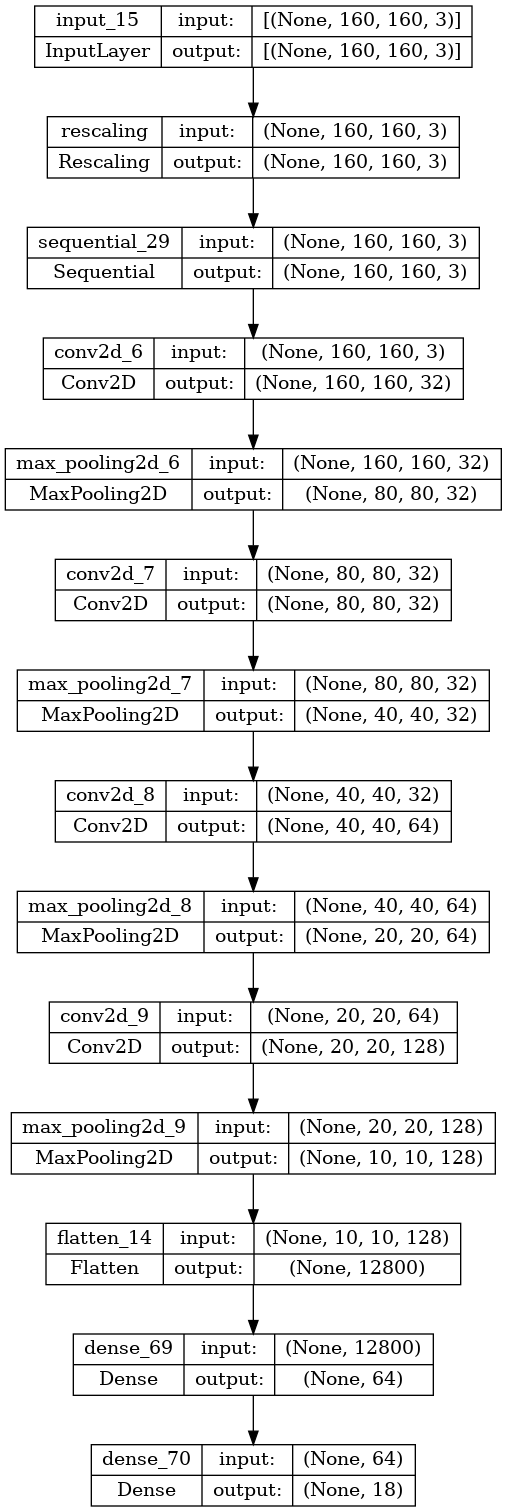

In [253]:
# plot the model architecture
plot_model(model, show_shapes= True)

In [445]:
def compile_model(model, lr, epochs=None):
    '''return a compiled model suited for the task'''
    
    #opt= Adam(learning_rate= lr, decay= lr/epochs)
    
    model.compile(optimizer=Adam(learning_rate= lr), loss= 'categorical_crossentropy', metrics=['accuracy'])
    return model

In [446]:
def train_augment(model, batch_size, epochs, patience, train_flow=None):
    """This function returns the fitted model and its train history"""
    
    # apply model regularization techniques
    MODEL= 'model_base_door'
    modelCheckpoint= ModelCheckpoint("{}.h5".format(MODEL), monitor="val_loss", verbose=0,\
                                               save_best_only=True)
    earlyStop= EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=patience)
    lreducer= ReduceLROnPlateau(monitor="val_loss",factor=0.1,patience= patience, verbose=2
                            ,mode="min", min_delta=0.0001, cooldown=0, min_lr=0)
    
    # fit the model
    history = model.fit(X_train_hood,
                        y_train_hood,
                      batch_size=batch_size,
                      steps_per_epoch= int(len(X_train_hood)/batch_size),
                      epochs = epochs,
                      callbacks = [modelCheckpoint, earlyStop, lreducer],
                      validation_data = (X_val_hood, y_val_hood))

    return model, history

In [695]:
# train the base model
model= base_model()
compiled_model= compile_model(model, lr= 1e-3, epochs= 50)
model, history= train_augment(compiled_model, batch_size= 64, epochs= 50, patience= 10)
model.save('./baseModel_hood')

In [462]:
# train the transfer learning model
model= transferLearn_model()
compiled_model= compile_model(model, lr= 1e-4, epochs= 50)
model, history= train_augment(compiled_model, batch_size= 32, epochs= 50, patience= 10)
model.save('./transferLearn_model_hood')

Epoch 1/50


36/36 [==============================] - 283s 6s/step - loss: 1.7474 - accuracy: 0.3550 - val_loss: 1.0879 - val_accuracy: 0.6104 - lr: 1.0000e-04
Epoch 2/50
36/36 [==============================] - 173s 5s/step - loss: 1.3514 - accuracy: 0.5022 - val_loss: 0.9621 - val_accuracy: 0.6223 - lr: 1.0000e-04
Epoch 3/50
36/36 [==============================] - 170s 5s/step - loss: 1.2154 - accuracy: 0.5266 - val_loss: 0.8546 - val_accuracy: 0.6523 - lr: 1.0000e-04
Epoch 4/50
36/36 [==============================] - 154s 4s/step - loss: 1.1902 - accuracy: 0.5327 - val_loss: 0.8904 - val_accuracy: 0.6529 - lr: 1.0000e-04
Epoch 5/50
36/36 [==============================] - 165s 5s/step - loss: 1.0331 - accuracy: 0.5763 - val_loss: 0.8139 - val_accuracy: 0.6873 - lr: 1.0000e-04
Epoch 6/50
36/36 [==============================] - 171s 5s/step - loss: 0.9789 - accuracy: 0.6234 - val_loss: 0.7831 - val_accuracy: 0.6867 - lr: 1.0000e-04
Epoch 7/50
36/36 [==============================] - 182s 5s/ste

INFO:tensorflow:Assets written to: ./transferLearn_model_hood/assets


INFO:tensorflow:Assets written to: ./transferLearn_model_hood/assets


## Alternative Way for more Augmentation

In [692]:
X_train_hood= X_train_hood / 255.

In [693]:
# apply augmentation to batches of images and store them in memory
train_datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = (0.8, 1.2)
)

train_datagen.fit(X_train_hood)

train_flow = train_datagen.flow(X_train_hood, shuffle= False, batch_size = 1)

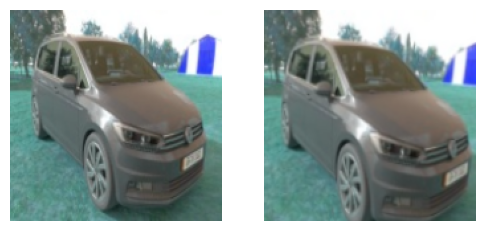

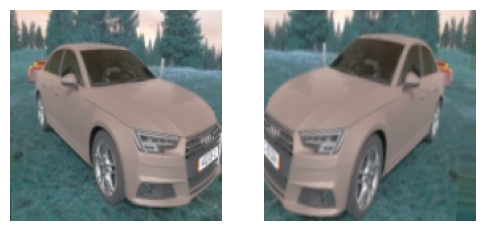

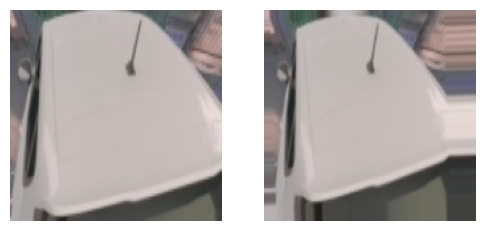

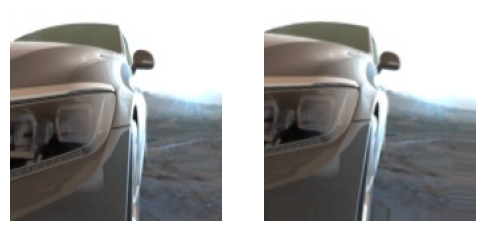

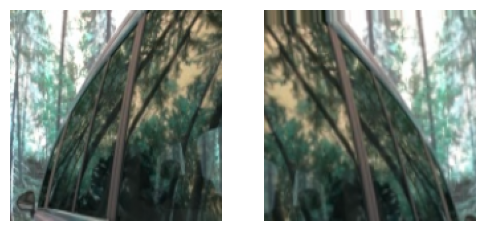

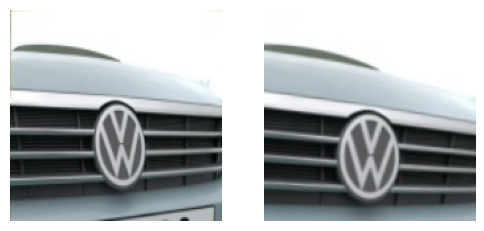

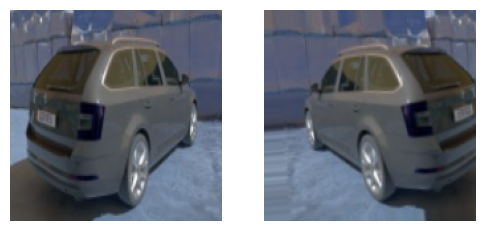

In [694]:
# show augmented images alongside original ones
for i, (raw_img, aug_img) in enumerate(zip(X_train_hood, train_flow)):
    _,(ax1, ax2)= plt.subplots(1,2, figsize=(6,3))
    ax1.imshow(raw_img)
    ax2.imshow(aug_img[0])
    ax1.axis('off')
    ax2.axis('off')
    plt.show();
    
    if i > 5:
        break

## Model Evaluation

In [592]:
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay

In [464]:
# plot the model training history
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

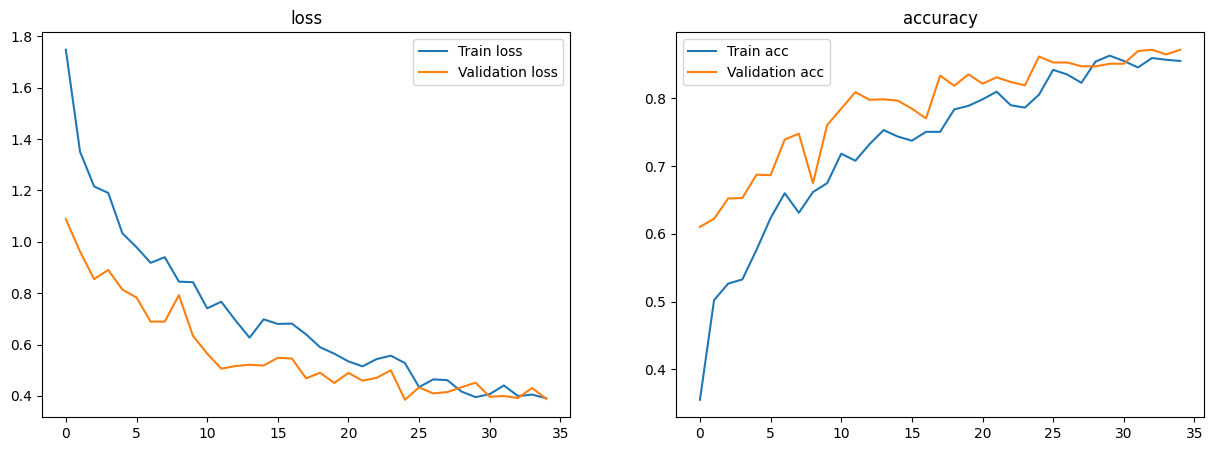

In [465]:
plot_history(history)

In [571]:
# prepare testing data
split_hood= 'data/split_hood2/'
X_test_hood, y_test_hood= create_dataset(split_hood + 'test')
X_test_hood, y_test_hood= shuffle(X_test_hood, y_test_hood)

In [573]:
# scale pixels of test data according to the trained model
X_test_hood= resnet50.preprocess_input(X_test_hood).astype(float)
y_test_hood= y_test_hood.astype(float)

In [572]:
X_test_hood.shape, y_test_hood.shape

((89, 160, 160, 3), (89,))

In [471]:
num_classes_hood= len(np.unique(y_test_hood, return_counts=False))
num_classes_hood

6

In [574]:
# put the labels in categorical vectors
y_test_hood= to_categorical(y_test_hood, num_classes= num_classes_hood)
y_test_hood.shape

(89, 6)

In [575]:
# load the saved model
model_path= './transferLearn_model_hood'
loaded_model= tf.keras.models.load_model(model_path)

In [576]:
# the test accuracy is low since we specified the test data to be only 5% of the total amount, we wanted to save 
# most of data for training, we could have split data as (0.6, 0.2, 0.2) to have enough for testing
metrics= loaded_model.evaluate(X_test_hood, y_test_hood, return_dict=True)
metrics['loss'], metrics['accuracy']

3/3 [==============================] - 7s 2s/step - loss: 1.1566 - accuracy: 0.6292


(1.1566205024719238, 0.6292135119438171)

In [577]:
y_pred_hood= loaded_model.predict(X_test_hood)

3/3 [==============================] - 4s 996ms/step


In [580]:
# the rmetrics are bad for classes 3,4 due to lack of sample data
print(classification_report(y_test_hood, y_pred_hood))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        20
           1       0.64      0.60      0.62        15
           2       0.45      0.45      0.45        11
           3       0.67      0.22      0.33         9
           4       0.85      0.55      0.67        20
           5       0.61      0.79      0.69        14

   micro avg       0.68      0.63      0.65        89
   macro avg       0.67      0.59      0.60        89
weighted avg       0.69      0.63      0.64        89
 samples avg       0.63      0.63      0.63        89



In [587]:
# show the confusion matrix, focus on how many true positives and true negatives are captured compared to false 
# positives and false negatives for each class -- again we could have saved more samples for testing

labels= [str(i) for i in range(0,6)]
conf_mat= {}
for label in range(len(labels)):
    #print(label)
    y_test_label= y_test_hood[:,label]
    #print(y_test_label)
    y_pred_label= y_pred_hood[:, label]
    conf_mat[labels[label]]= confusion_matrix(y_pred= y_pred_label, y_true= y_test_label)
for label, matrix in conf_mat.items():
    print('confusion matrix for label {}:'.format(label))
    print(matrix)
    print()

confusion matrix for label 0:
[[64  5]
 [ 2 18]]

confusion matrix for label 1:
[[69  5]
 [ 6  9]]

confusion matrix for label 2:
[[72  6]
 [ 6  5]]

confusion matrix for label 3:
[[79  1]
 [ 7  2]]

confusion matrix for label 4:
[[67  2]
 [ 9 11]]

confusion matrix for label 5:
[[68  7]
 [ 3 11]]



taking images from class data/split_hood2/test/0
loading image from data/split_hood2/test/0/798fed8b-4b87-4277-986e-15d44d216b45.jpg
1/1 [==============================] - 0s 109ms/step


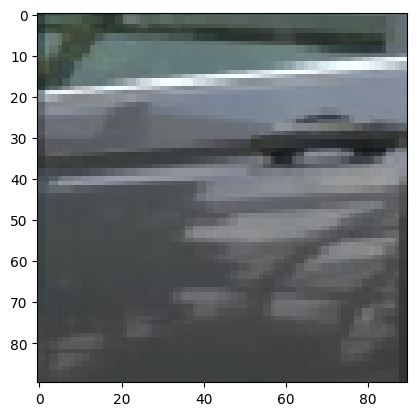

predicted label: 0
loading image from data/split_hood2/test/0/76330abe-d737-41b0-9128-09097bb5ff66.jpg
1/1 [==============================] - 0s 110ms/step


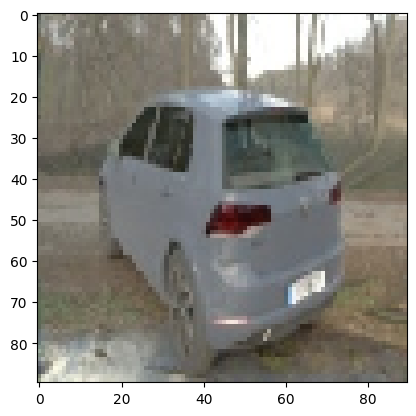

predicted label: 0
loading image from data/split_hood2/test/0/42413e83-f909-409b-a851-65d8757b98ff.jpg
1/1 [==============================] - 0s 110ms/step


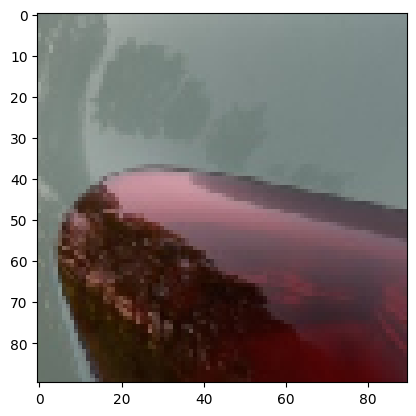

predicted label: 0
loading image from data/split_hood2/test/0/f266a182-0a6d-43b8-8467-0bff40501e67.jpg
1/1 [==============================] - 0s 145ms/step


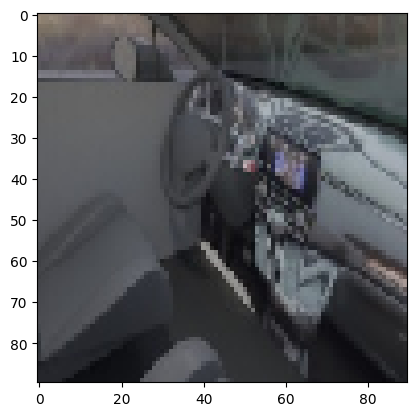

predicted label: 0
loading image from data/split_hood2/test/0/75b997a9-79c3-4365-bdc5-3e1ae9ff93b3.jpg
1/1 [==============================] - 0s 157ms/step


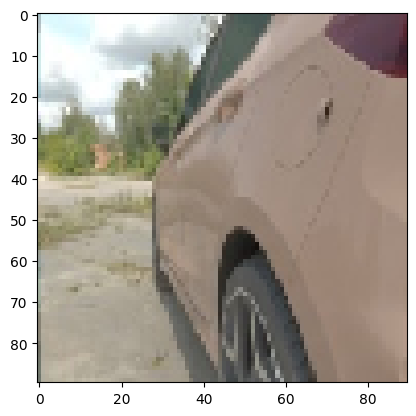

predicted label: 0
taking images from class data/split_hood2/test/2
loading image from data/split_hood2/test/2/e4c790d4-61d3-4273-a313-d688f72f1fc2.jpg
1/1 [==============================] - 0s 116ms/step


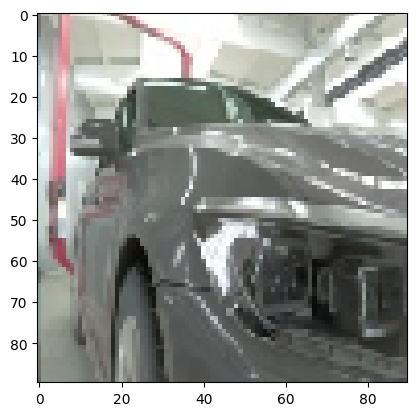

predicted label: 2
loading image from data/split_hood2/test/2/b7ce657a-38cd-4567-9efb-e2ac148031b0.jpg
1/1 [==============================] - 0s 111ms/step


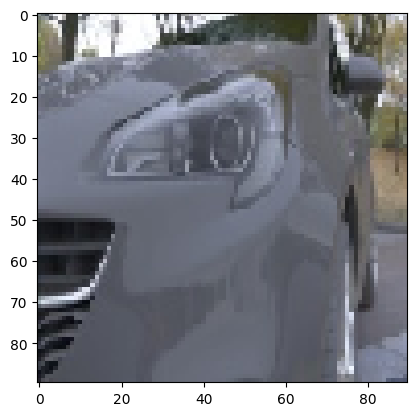

predicted label: 2
loading image from data/split_hood2/test/2/f655566e-8af7-4bdc-883d-ace76b37a2b9.jpg
1/1 [==============================] - 0s 142ms/step


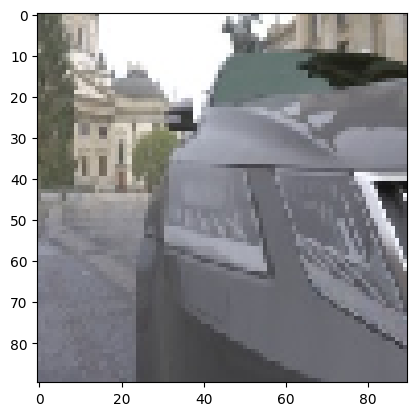

predicted label: 0
loading image from data/split_hood2/test/2/7c2ca6ee-3fdd-47cb-8b0b-f5198ce61658.jpg
1/1 [==============================] - 0s 113ms/step


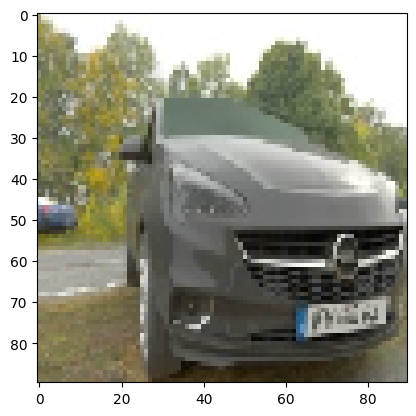

predicted label: 2
loading image from data/split_hood2/test/2/c8615397-fa62-4670-997a-fd8d458ef262.jpg
1/1 [==============================] - 0s 116ms/step


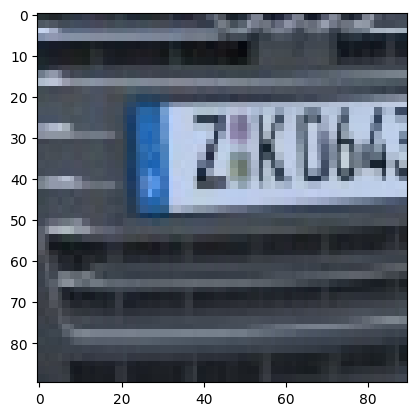

predicted label: 1
taking images from class data/split_hood2/test/5
loading image from data/split_hood2/test/5/8e52ca8f-9943-469d-8e48-b6e2d20989f4.jpg
1/1 [==============================] - 0s 117ms/step


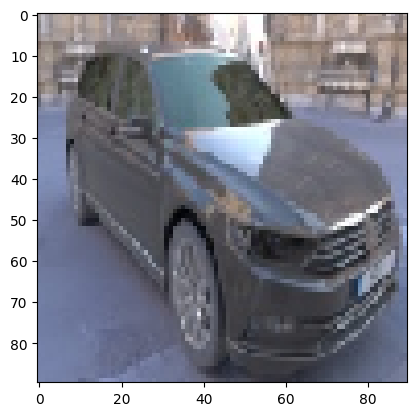

predicted label: 5
loading image from data/split_hood2/test/5/5041f3fc-a39e-4326-85ef-5b08e890ebaa.jpg
1/1 [==============================] - 0s 113ms/step


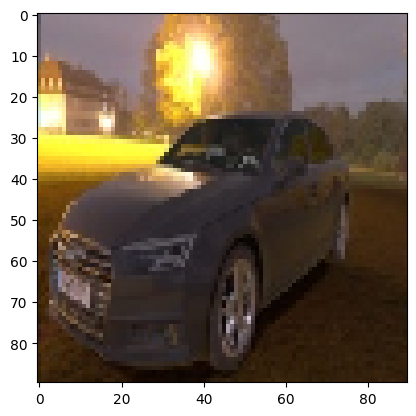

predicted label: 4
loading image from data/split_hood2/test/5/9592fea8-4d83-44f3-ab02-abecf80d77fb.jpg
1/1 [==============================] - 0s 112ms/step


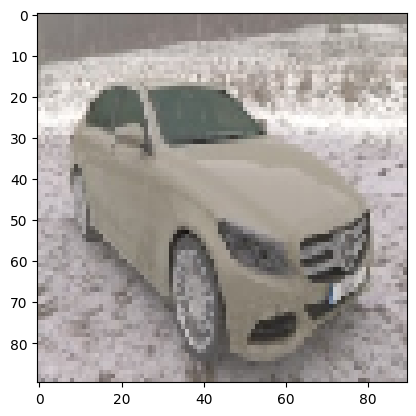

predicted label: 5
loading image from data/split_hood2/test/5/ec58b988-fffd-414d-b973-16004a19b974.jpg
1/1 [==============================] - 0s 112ms/step


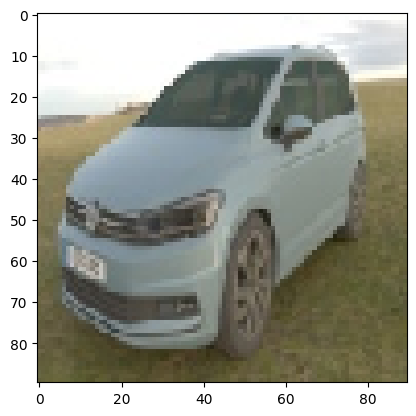

predicted label: 4
loading image from data/split_hood2/test/5/881c6101-5cde-4932-8095-5d76e195d9af.jpg
1/1 [==============================] - 0s 173ms/step


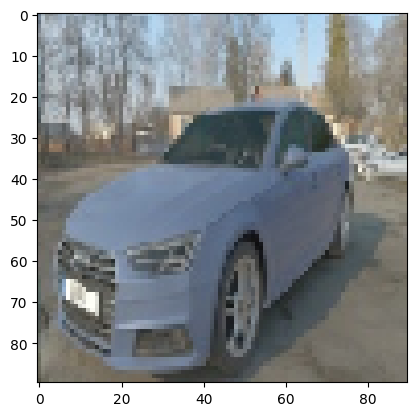

predicted label: 5
taking images from class data/split_hood2/test/4
loading image from data/split_hood2/test/4/aee25c46-6a6e-4c2c-b77a-b6f44bd830f5.jpg
1/1 [==============================] - 0s 107ms/step


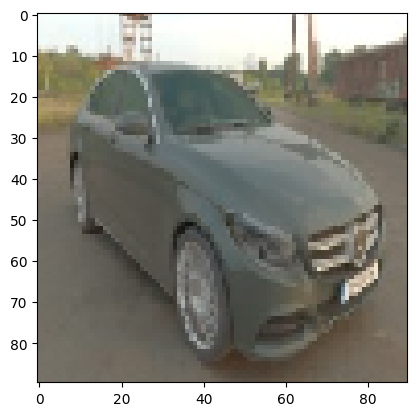

predicted label: 5
loading image from data/split_hood2/test/4/dff9dc86-29dd-4faf-bf0e-baca3a04f5f2.jpg
1/1 [==============================] - 0s 113ms/step


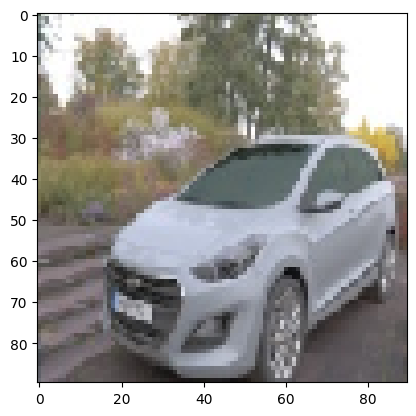

predicted label: 4
loading image from data/split_hood2/test/4/2a0faf9b-821b-4a72-9e9a-6137002f604f.jpg
1/1 [==============================] - 0s 118ms/step


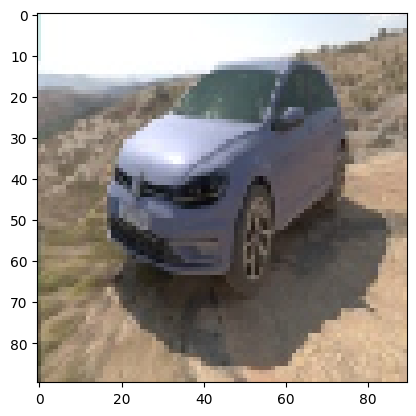

predicted label: 4
loading image from data/split_hood2/test/4/cca98eaf-60aa-42a1-ba29-e6b5881de1ce.jpg
1/1 [==============================] - 0s 111ms/step


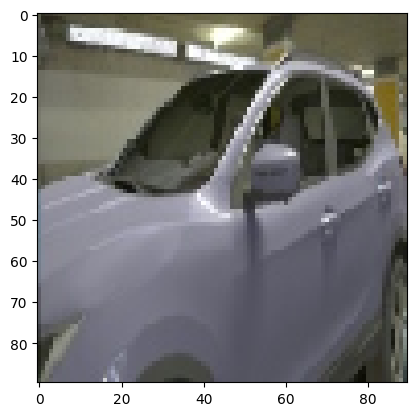

predicted label: 5
loading image from data/split_hood2/test/4/6a65c58d-62bb-4226-8987-31e308ef4ad7.jpg
1/1 [==============================] - 0s 110ms/step


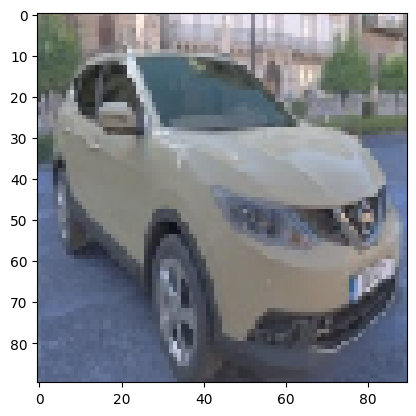

predicted label: 4
taking images from class data/split_hood2/test/3
loading image from data/split_hood2/test/3/900fc2ff-33ec-4e9f-88a6-28d5706f8f40.jpg
1/1 [==============================] - 0s 110ms/step


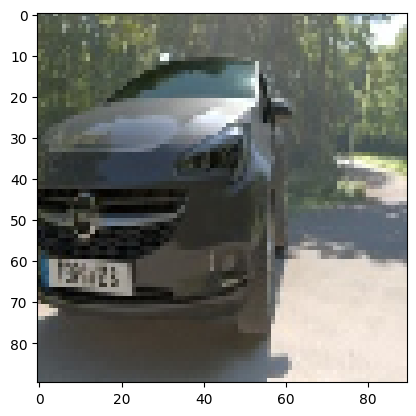

predicted label: 2
loading image from data/split_hood2/test/3/85807492-3d0d-4d7e-ae82-9250e5c850d0.jpg
1/1 [==============================] - 0s 122ms/step


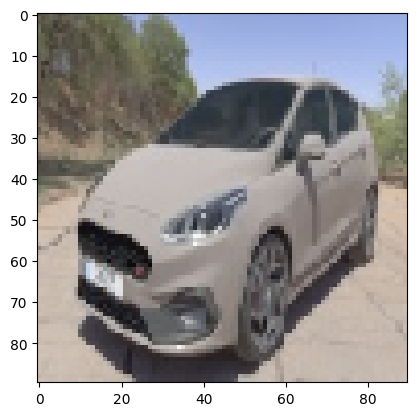

predicted label: 3
loading image from data/split_hood2/test/3/d111e965-6afd-4a56-af2a-8f873bd0a708.jpg
1/1 [==============================] - 0s 117ms/step


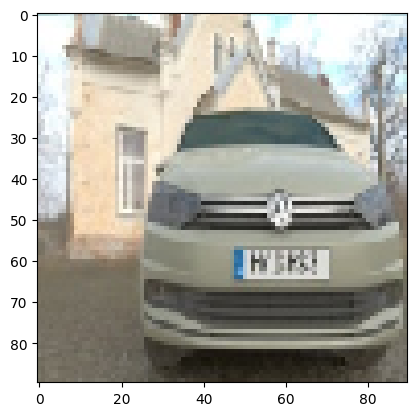

predicted label: 3
loading image from data/split_hood2/test/3/985beebd-9dbe-4d2e-a599-96820986c0c0.jpg
1/1 [==============================] - 0s 161ms/step


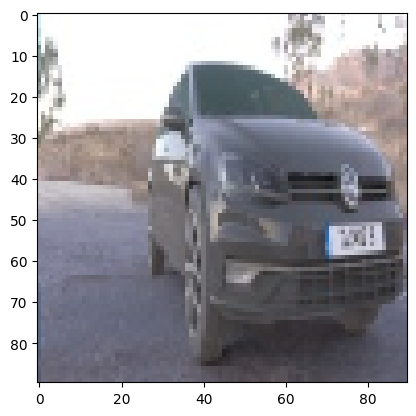

predicted label: 2
loading image from data/split_hood2/test/3/f7954c75-9881-45fd-a389-51b6d9390789.jpg
1/1 [==============================] - 0s 112ms/step


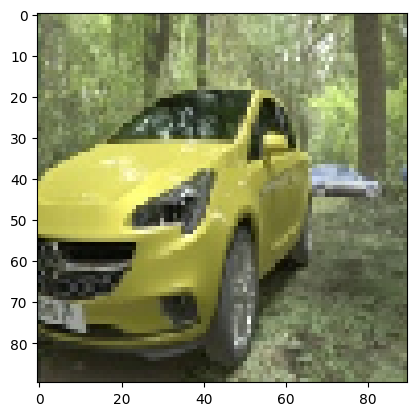

predicted label: 4
taking images from class data/split_hood2/test/1
loading image from data/split_hood2/test/1/a6ced7a6-b6f1-45b6-8c75-da35bc1bcdf5.jpg
1/1 [==============================] - 0s 111ms/step


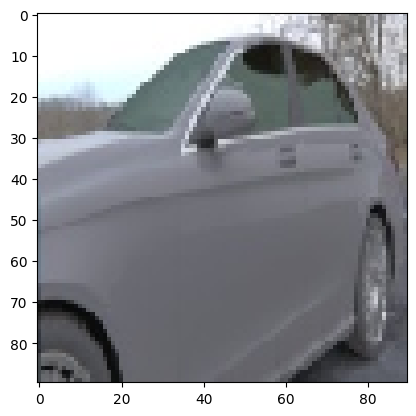

predicted label: 1
loading image from data/split_hood2/test/1/939e9e5d-deba-45e8-9f7a-e4175baa72e3.jpg
1/1 [==============================] - 0s 110ms/step


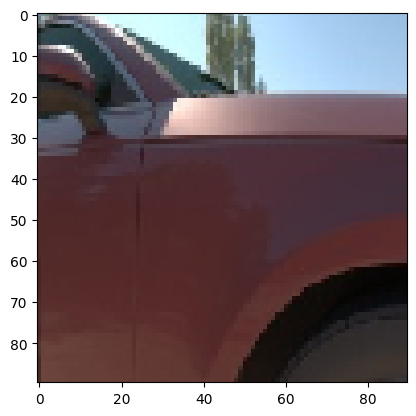

predicted label: 1
loading image from data/split_hood2/test/1/59632284-7f06-49cc-a8a8-1b855fe3e23e.jpg
1/1 [==============================] - 0s 149ms/step


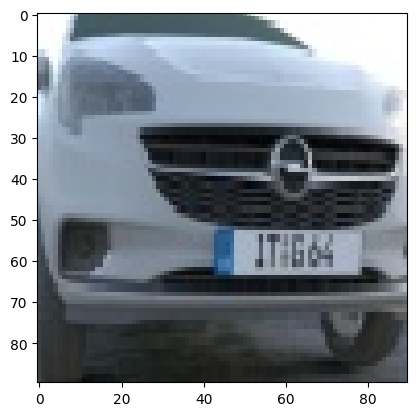

predicted label: 1
loading image from data/split_hood2/test/1/a7279e04-b4cb-488e-a703-3f6fa1172b42.jpg
1/1 [==============================] - 0s 134ms/step


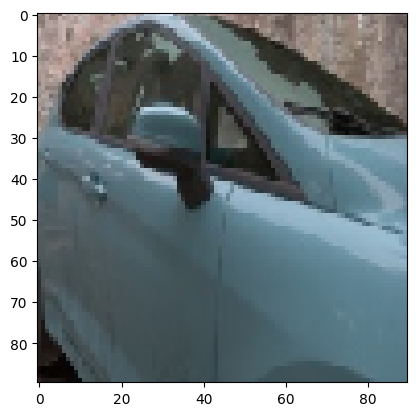

predicted label: 1
loading image from data/split_hood2/test/1/ad92052b-209b-4271-a297-b113f248fb3f.jpg
1/1 [==============================] - 0s 113ms/step


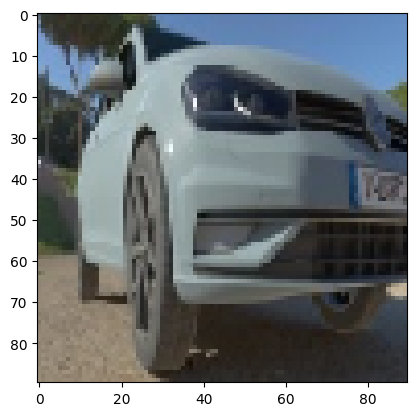

predicted label: 1


In [599]:
# show testing images from each class with corresponding true and predicted labels
for f in os.listdir(split_hood + '/test'):
    subfolders= os.path.join(split_hood, 'test',f)
    if os.path.isdir(subfolders):
        files = [file for file in os.listdir(subfolders) if os.path.isfile(os.path.join(subfolders, file))]
        # Select random images
        random_images = random.sample(files, min(5, len(files)))
        print(f'taking images from {subfolders}'); print()
        for img in random_images:
            #print(f'loading image from {os.path.join(subfolders, img)}')
            loaded_img = image.load_img(os.path.join(subfolders, img), target_size=(90, 90))
            test_img= cv2.imread(os.path.join(subfolders, img), cv2.COLOR_BGR2RGB)
            test_img= cv2.resize(test_img, (160,160))
            img_array = image.img_to_array(test_img)

            img_batch = np.expand_dims(img_array, axis=0)

            img_preprocessed = preprocess_input(img_batch)

            prediction = loaded_model.predict(img_preprocessed)
            prediction= np.argmax(prediction, axis=1)
            plt.imshow(loaded_img)
            plt.show()
            print(f'predicted label: {prediction[0]}')

## Draft (Extra Coding) – Approach2: Combined Model

In [353]:
df.filename

0       66ee2d88-f403-4821-a370-8a3d72e200f9.jpg
1       bf7e237e-f12b-4ffc-8d79-6855cc35ea06.jpg
2       4c297488-c81f-464d-92bf-1c408333a912.jpg
3       6c95ad0b-fda6-42a8-a33d-b430073e1dcd.jpg
4       bd806d94-4c2e-4cd2-8e02-5eaba7c7c63e.jpg
                          ...                   
3995    41c7b718-5142-44a4-928f-4f19ee35bfcf.jpg
3996    4e4a9fae-d6c7-4b00-ac36-3e32c12b7b7d.jpg
3997    4a447715-eebe-4c43-a5d4-069d418cd9b6.jpg
3998    ddfc3aec-1f34-49a8-973b-a7e38b017e0b.jpg
3999    fb5dea44-0590-4bb1-a0b4-4e4b704ff3a7.jpg
Name: filename, Length: 4000, dtype: object

In [321]:
df_hood= df.groupby(['perspective_score_hood'])['filename'].agg(list)\
.reset_index().rename(columns={'filename':'filename_hood'})
df_hood.head()

perspective_score_hood                                      filename_hood
0                    0.00  [bf7e237e-f12b-4ffc-8d79-6855cc35ea06.jpg, 4c2...
1                    0.01         [bbf72ca0-a526-4109-b321-0484473484e0.jpg]
2                    0.02  [a37ca0f5-e490-453f-bff3-ee462bc0321e.jpg, 3a7...
3                    0.03  [2e613c49-0cf1-4fba-8a7f-4a53f165ca23.jpg, e0f...
4                    0.04  [caf77965-6b50-485c-9027-27ff3f3159b4.jpg, b69...

In [322]:
df_door= df.groupby(['perspective_score_backdoor_left'])['filename'].agg(list)\
.reset_index().rename(columns={'filename':'filename_door'})
df_hood.shape, df_door.shape

((93, 2), (92, 2))

In [323]:
df_combined= pd.concat([df_hood, df_door], axis=1)
df_combined.head()

perspective_score_hood                                      filename_hood  perspective_score_backdoor_left                                      filename_door
0                    0.00  [bf7e237e-f12b-4ffc-8d79-6855cc35ea06.jpg, 4c2...                             0.00  [352f6431-9a7d-4422-bac8-5167174d59bc.jpg, d58...
1                    0.01         [bbf72ca0-a526-4109-b321-0484473484e0.jpg]                             0.04         [e211cb17-a02d-499c-9532-2c8c98f6aaa7.jpg]
2                    0.02  [a37ca0f5-e490-453f-bff3-ee462bc0321e.jpg, 3a7...                             0.05         [5c9e8bd3-39ad-4655-9671-6842366afbd9.jpg]
3                    0.03  [2e613c49-0cf1-4fba-8a7f-4a53f165ca23.jpg, e0f...                             0.06  [66021aed-4fef-4554-aaf4-81ff9f75dfb4.jpg, 4f2...
4                    0.04  [caf77965-6b50-485c-9027-27ff3f3159b4.jpg, b69...                             0.07  [427d5603-2698-4530-b1bc-8478b9dfae02.jpg, 0c9...

In [332]:
df_combined[df_combined['perspective_score_backdoor_left'].isnull()]

perspective_score_hood                                      filename_hood  perspective_score_backdoor_left filename_door
92                    0.92  [2d617fee-8203-49d5-84ab-78bb4872f008.jpg, 84a...                              NaN           NaN

In [333]:
df_combined.dropna(inplace=True)
df_combined.isnull().sum()

perspective_score_hood             0
filename_hood                      0
perspective_score_backdoor_left    0
filename_door                      0
dtype: int64

In [334]:
df_combined.shape

(92, 4)

In [338]:
def move_files(files, min_count):
    # Ensure max_count is within the bounds of the list
    min_count = min(min_count, len(files))
    
    # Move files to a new column up to max_count
    return files[min_count:]

min_count = 4

# Apply the move_files function to the 'filename' list column
df_filtered= df_combined.copy()
df_filtered['files_filtered'] = df_filtered['filename'].apply(lambda files: \
                                    move_files(files, min_count))

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   filename                         4000 non-null   object 
 1   perspective_score_hood           4000 non-null   float64
 2   perspective_score_backdoor_left  4000 non-null   float64
dtypes: float64(2), object(1)
memory usage: 93.9+ KB


In [12]:
base_dir= 'data/original_data/imgs'

def create_features_labels(base_dir):
    images=[]
    labels_hood=[]
    labels_door=[]

    IMG_WIDTH=160
    IMG_HEIGHT=160
    for img in df.filename:
        img_path= os.path.join(base_dir, img)
        image= cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH))
        images.append(image)
    for label_hood, label_door in zip(df.perspective_score_hood.values, df.perspective_score_backdoor_left.values):
        labels_hood.append(label_hood)
        labels_door.append(label_door)
    
    return np.array(images), np.array(labels_hood), np.array(labels_door) 

In [13]:
features, labels_hood, labels_door = create_features_labels(base_dir)

In [14]:
features.shape, labels_hood.shape, labels_door.shape

((4000, 160, 160, 3), (4000,), (4000,))

/home/maly/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

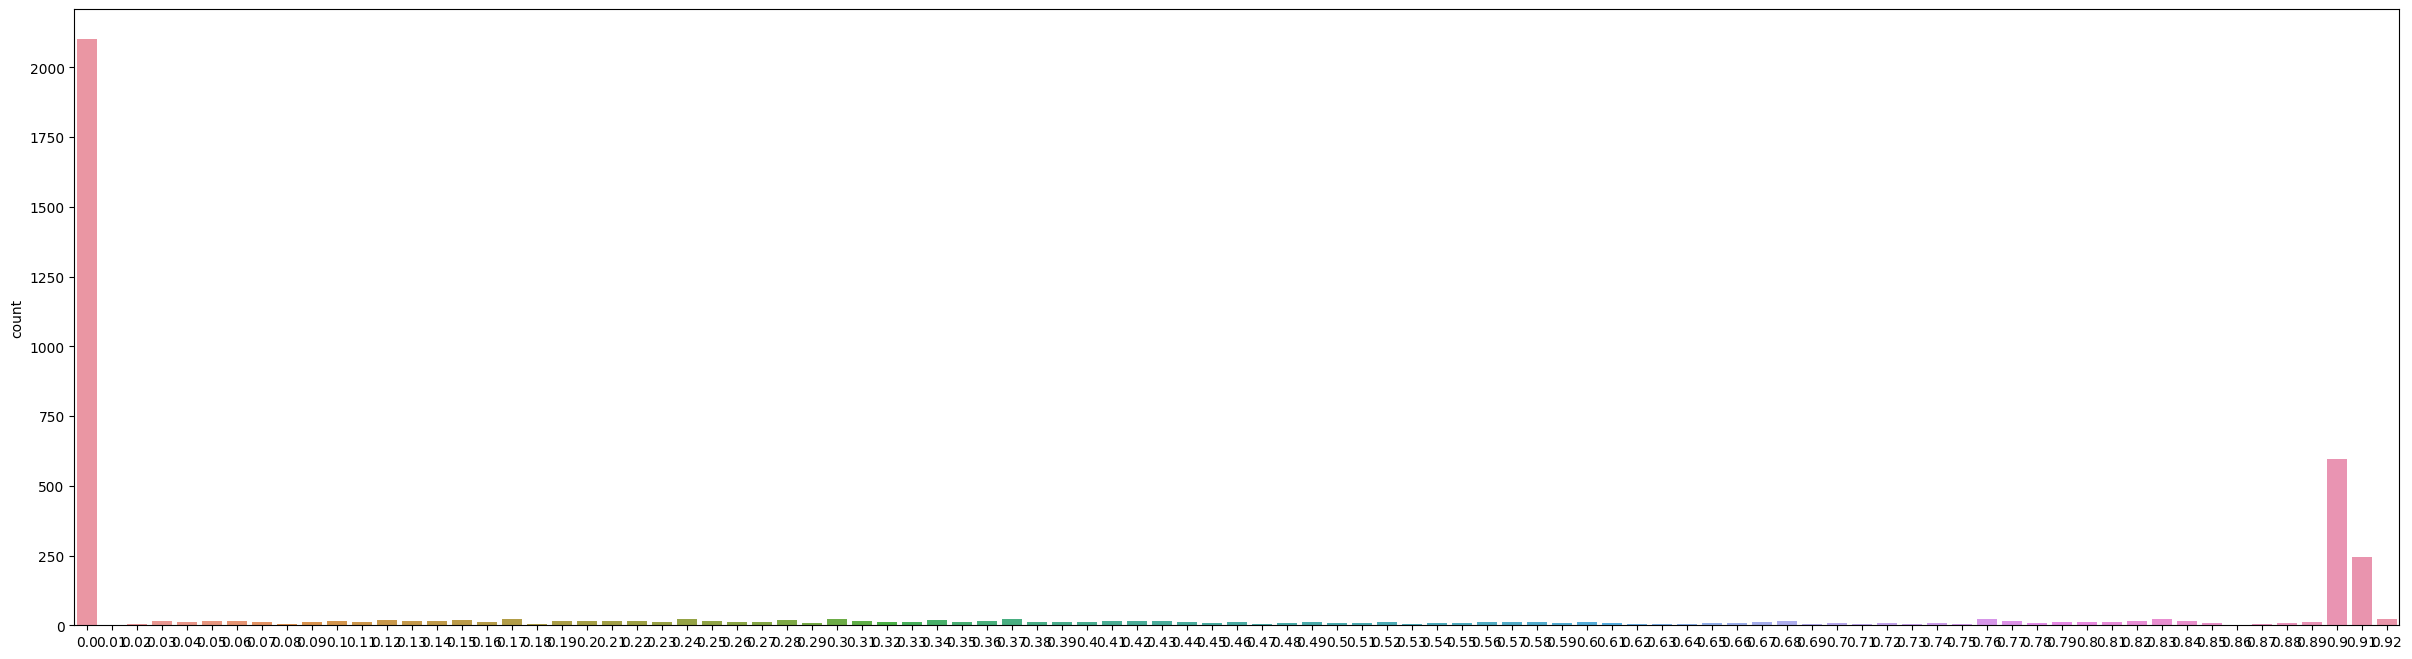

In [19]:
plt.figure(figsize=(30,8))
sns.countplot(labels_hood)

/home/maly/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

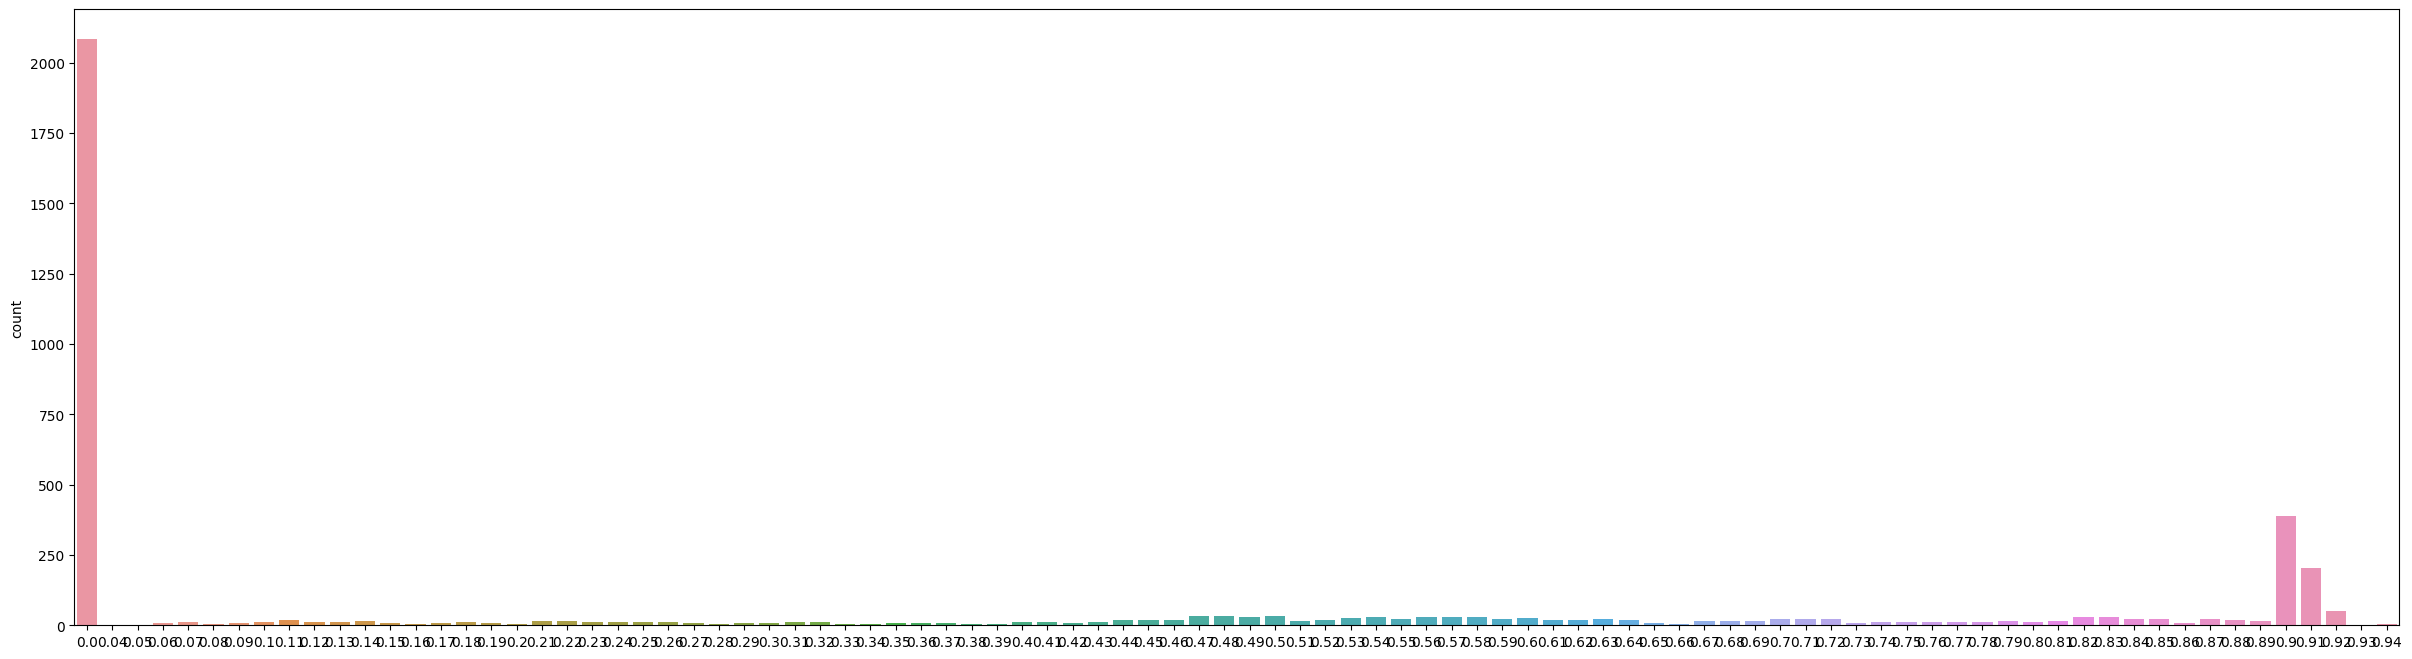

In [20]:
plt.figure(figsize=(30,8))
sns.countplot(labels_door)

In [22]:
X_train, X_test, y_train_hood, y_test_hood, y_train_door, y_test_door= train_test_split(features, labels_hood, \
                                                    labels_door, test_size= 0.20, random_state=42)

In [23]:
X_train.shape, X_test.shape, y_train_hood.shape, y_test_hood.shape, y_train_door.shape, y_test_door.shape

((3200, 160, 160, 3), (800, 160, 160, 3), (3200,), (800,), (3200,), (800,))

In [24]:
X_train, X_val, y_train_hood, y_val_hood, y_train_door, y_val_door = train_test_split(X_train, y_train_hood,\
                                        y_train_door, test_size=0.20, random_state=42)

In [25]:
X_train.shape, X_val.shape, y_train_hood.shape, y_val_hood.shape, y_train_door.shape, y_val_door.shape

((2560, 160, 160, 3), (640, 160, 160, 3), (2560,), (640,), (2560,), (640,))

In [117]:
over = SMOTE(sampling_strategy= 'auto')
under= RandomUnderSampler(sampling_strategy= 'majority')
steps= [('o', over), ('u', under)]
pipeline= Pipeline(steps= steps)

In [28]:
pipeline

Pipeline(steps=[('o', SMOTE(n_jobs=-1, sampling_strategy=0.3)),
                ('u', RandomUnderSampler(sampling_strategy=0.3))])

In [113]:
y_train_door.shape

(2560,)

In [68]:
num_classes= len(pd.Series(y_train_hood).unique())
y_train_cat= to_categorical(y_train_hood, num_classes= num_classes)

In [115]:
num_classes_door= len(pd.Series(y_train_door).unique())
#num_classes_door
y_train_door_cat= to_categorical(y_train_door, num_classes= num_classes_door)

In [75]:
y_train_cat.shape

(2560, 93)

In [101]:
X_train_balance, y_train_hood_balance= under.fit_resample(X_train.reshape(len(X_train),160*160*3)\
                        ,y_train_cat)

In [119]:
X_train_balance, y_train_door_balance= under.fit_resample(X_train.reshape(len(X_train),160*160*3)\
                        ,y_train_door_cat)

In [110]:
X_train_balance.shape, y_train_hood_balance.reshape(-1,1).shape

((1214, 76800), (112902, 1))

In [120]:
X_train_balance.shape, y_train_door_balance.reshape(-1,1).shape

((1228, 76800), (111748, 1))

In [ ]:
#Ref: https://github.com/keras-team/keras/issues/13081
# we dont need it for integer labels

def to_categorical(y,num_classes):
    ''' Converts a class vector of dtype float or int to binary class matrix.
    
    E.g. for use with categorical_crossentropy.
    
    # Arguments
        y: class vector to be converted into a matrix
            (floar or int).
        num_classes: total number of classes
            (total number of unique entries of y)
    # Returns
        A binary matrix representation of the input. The classes axis
        is placed last. 
    '''
    uniques = np.unique(y)
    Binary_Matrix = np.zeros([y.shape[0],num_classes])

    
    for idx_uniques,value_uniques in enumerate(uniques):
        for idx_class,value_class in enumerate(y):
            if value_uniques == value_class:
                Binary_Matrix[idx_class,idx_uniques]=1
                
    return Binary_Matrix

# Or for string labels
#pd.get_dummies(y_train, dtype= float).to_numpy()

In [ ]:
def initialize_model():
    '''instanciate and return the CNN architecture of your choice with less than 150,000 params'''
    # hood modelling
    input_hood= layers.Input(X_train_hood[0,:,:].shape) 
    x_hood= layers.Conv2D(16, (3,3), activation='relu', padding='same')(input_hood)
    x_hood= layers.MaxPool2D(2,2)(x_hood)

    x_hood= layers.Conv2D(32, (3,3), activation='relu', padding='same')(x_hood)
    x_hood= layers.MaxPool2D(2,2)(x_hood)

    x_hood= layers.Conv2D(64, (2,2), activation='relu', padding='same')(x_hood)
    x_hood= layers.MaxPool2D(2,2)(x_hood)

    x_hood= layers.Flatten()(x_hood)
    x_hood= Model(inputs= input_hood, outputs= x_hood)
        
    # door modelling
    input_door= layers.Input(X_train_door[0,:,:].shape) 
    x_door= layers.Conv2D(16, (3,3), activation='relu', padding='same')(input_door)
    x_door= layers.MaxPool2D(2,2)(x_door)

    x_door= layers.Conv2D(32, (3,3), activation='relu', padding='same')(x_door)
    x_door= layers.MaxPool2D(2,2)(x_door)

    x_door= layers.Conv2D(64, (2,2), activation='relu', padding='same')(x_door)
    x_door= layers.MaxPool2D(2,2)(x_door)

    x_door= layers.Flatten()(x_door)
    x_door= Model(inputs= input_door, outputs= x_door)
    
    merge= layers.concatenate([x_hood.output, x_door.output])
    
    last= layers.Dense(64, activation='relu')(merge)
    
    out_hood= layers.Dense(num_classes_hood, activation='softmax')(last)
    out_door= layers.Dense(num_classes_door, activation='softmax')(last)
    
    # combine the two models
    model = Model(inputs= [x_hood.input, x_door.input], outputs= [out_hood, out_door])

    return model

In [ ]:
epochs= 2
batch_size= 32
lr= 1e-3

def compile_model(model):
    '''return a compiled model suited for the CIFAR-10 task'''
    losses= {
        'categorical_hood':'categorical_crossentropy',
        'categorical_door':'categorical_crossentropy'
    }
    
    lossWeights= {
        'categorical_hood':1.0,
        'categorical_door':1.0
    }
    
    opt= Adam(learning_rate= lr, decay= lr/epochs)
    
    model.compile(optimizer=opt, loss= losses, loss_weights= lossWeights, metrics=['accuracy'])
    return model

In [ ]:
compiled_model= compile_model(model) 
compiled_model.fit(x= [X_train_hood, X_train_door], y= [y_train_hood, y_train_door], \
                   validation_data=([X_val_hood, X_val_door], [y_val_hood, y_val_door]),\
                    epochs= epochs, batch_size= batch_size, verbose=2)